Hello! For my project I will be finding whether shooting percentages are more important for scoring than non shooting statistics. To find this, I will data scrape https://www.basketball-reference.com/ for data frames on individual NBA athlets, finding the correlations of certain statistics  Since I was little, basketball has been my favorite sport and one of the things that brought me the most joy in life; therefore, it only felt right to incorporate basketball into this project. In addition to shooting splits, I will calculate other statistics to explain why the correlation between shooting percentages and high level is so strong. 

Down below, I have started m project by importing the packages I need to compile my dataframes.

In [66]:
#imports for Project2
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt
import seaborn as sns
 

After I have imported the packages, I will begin to scrape my data. As you will see, I have scraped the stats of NBA teams' complete rosters from the 2018 & 2019 - 2022 & 2023 seasons. From these dataframes, I plan to calculate and analyze statistics, such as confidence intervals, correlations, and linear regression models, that will bring me closer to answering my experiment question.

In [67]:
#Boston Celtics 
bos_23 = """ Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Jayson Tatum,24,74,74,36.9,9.8,21.1,.466,3.2,9.3,.350,6.6,11.8,.558,.543,7.2,8.4,.854,1.1,7.7,8.8,4.6,1.1,0.7,2.9,2.2,30.1
2,Jaylen Brown,26,67,67,35.9,10.1,20.6,.491,2.4,7.3,.335,7.7,13.4,.576,.550,3.9,5.1,.765,1.2,5.7,6.9,3.5,1.1,0.4,2.9,2.6,26.6
3,Marcus Smart,28,61,61,32.1,4.1,9.9,.415,1.9,5.6,.336,2.2,4.3,.519,.511,1.4,1.9,.746,0.8,2.4,3.1,6.3,1.5,0.4,2.3,2.8,11.5
4,Al Horford,36,63,63,30.5,3.6,7.6,.476,2.3,5.2,.446,1.3,2.4,.539,.627,0.2,0.3,.714,1.2,5.0,6.2,3.0,0.5,1.0,0.6,1.9,9.8
5,Derrick White,28,82,70,28.3,4.3,9.2,.462,1.8,4.8,.381,2.5,4.5,.548,.560,2.0,2.3,.875,0.6,2.9,3.6,3.9,0.7,0.9,1.2,2.2,12.4
6,Malcolm Brogdon,30,67,0,26.0,5.3,10.9,.484,2.0,4.4,.444,3.3,6.5,.510,.574,2.4,2.7,.870,0.6,3.6,4.2,3.7,0.7,0.3,1.5,1.6,14.9
7,Grant Williams,24,79,23,25.9,2.7,6.0,.454,1.5,3.7,.395,1.3,2.3,.546,.575,1.2,1.5,.770,1.1,3.5,4.6,1.7,0.5,0.4,1.0,2.4,8.1
8,Robert Williams,25,35,20,23.5,3.6,4.9,.747,0.0,0.0,.000,3.6,4.8,.751,.747,0.7,1.2,.610,3.0,5.4,8.3,1.4,0.6,1.4,1.0,1.9,8.0
9,Mike Muscala,31,20,4,16.2,2.1,4.5,.472,1.3,3.3,.385,0.9,1.2,.708,.612,0.5,0.7,.692,0.7,2.7,3.4,0.6,0.2,0.3,0.5,1.4,5.9
10,Sam Hauser,25,80,8,16.1,2.3,5.0,.455,1.8,4.2,.418,0.5,0.8,.656,.631,0.2,0.2,.706,0.4,2.1,2.6,0.9,0.4,0.3,0.4,1.2,6.4
11,Blake Griffin,33,41,16,13.9,1.5,3.2,.485,0.6,1.6,.348,1.0,1.6,.625,.573,0.5,0.8,.656,1.1,2.6,3.8,1.5,0.3,0.2,0.5,1.8,4.1
12,Payton Pritchard,25,48,3,13.4,2.1,5.1,.412,1.2,3.2,.364,0.9,1.9,.495,.527,0.3,0.3,.750,0.5,1.3,1.8,1.3,0.3,0.0,0.8,0.8,5.6
13,Luke Kornet,27,69,0,11.7,1.6,2.5,.665,0.0,0.2,.231,1.6,2.3,.701,.674,0.5,0.6,.821,1.2,1.6,2.9,0.8,0.2,0.7,0.4,1.2,3.8
14,Justin Champagnie,21,2,0,11.5,1.0,6.0,.167,0.5,2.5,.200,0.5,3.5,.143,.208,0.0,0.0,,1.0,1.0,2.0,1.5,0.5,0.0,0.0,0.5,2.5
15,Mfiondu Kabengele,25,4,0,9.0,0.5,1.8,.286,0.0,0.8,.000,0.5,1.0,.500,.286,0.5,0.5,1.000,1.3,1.3,2.5,0.0,0.5,0.0,0.3,0.8,1.5
16,Noah Vonleh,27,23,1,7.4,0.5,1.0,.458,0.0,0.2,.250,0.4,0.9,.500,.479,0.1,0.1,1.000,0.8,1.3,2.1,0.3,0.1,0.3,0.5,1.5,1.1
17,JD Davison,20,12,0,5.5,0.7,1.6,.421,0.2,0.6,.286,0.5,1.0,.500,.474,0.1,0.2,.500,0.2,0.6,0.8,0.9,0.2,0.2,0.3,0.4,1.6
18,Justin Jackson,27,23,0,4.7,0.3,1.2,.259,0.2,0.9,.250,0.1,0.3,.286,.352,0.0,0.1,.500,0.1,0.7,0.7,0.4,0.2,0.2,0.1,0.3,0.9 """
bos_22 = """Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Jayson Tatum,23,76,76,35.9,9.3,20.6,.453,3.0,8.6,.353,6.3,12.0,.524,.526,5.3,6.2,.853,1.1,6.9,8.0,4.4,1.0,0.6,2.9,2.3,26.9
2,Jaylen Brown,25,66,66,33.6,8.7,18.4,.473,2.5,7.0,.358,6.2,11.4,.544,.541,3.7,4.8,.758,0.8,5.3,6.1,3.5,1.1,0.3,2.7,2.5,23.6
3,Marcus Smart,27,71,71,32.3,4.2,10.1,.418,1.7,5.1,.331,2.5,5.0,.506,.501,2.0,2.5,.793,0.6,3.2,3.8,5.9,1.7,0.3,2.2,2.3,12.1
4,Robert Williams,24,61,61,29.6,4.4,6.0,.736,0.0,0.0,.000,4.4,6.0,.738,.736,1.1,1.5,.722,3.9,5.7,9.6,2.0,0.9,2.2,1.0,2.2,10.0
5,Dennis Schröder,28,49,25,29.2,5.2,11.9,.440,1.4,3.9,.349,3.9,8.0,.485,.497,2.5,3.0,.848,0.6,2.8,3.3,4.2,0.8,0.1,2.1,2.4,14.4
6,Al Horford,35,69,69,29.1,3.9,8.2,.467,1.3,3.8,.336,2.6,4.4,.582,.546,1.2,1.4,.842,1.6,6.1,7.7,3.4,0.7,1.3,0.9,1.9,10.2
7,Derrick White,27,26,4,27.4,3.6,8.8,.409,1.3,4.3,.306,2.3,4.6,.504,.483,2.5,2.9,.853,0.5,2.9,3.4,3.5,0.6,0.6,1.2,2.2,11.0
8,Josh Richardson,28,44,0,24.7,3.5,7.8,.443,1.4,3.5,.397,2.0,4.3,.481,.534,1.4,1.6,.859,0.6,2.3,2.8,1.5,0.8,0.5,0.9,1.9,9.7
9,Grant Williams,23,77,21,24.4,2.7,5.6,.475,1.4,3.4,.411,1.3,2.3,.569,.597,1.1,1.2,.905,0.8,2.7,3.6,1.0,0.5,0.7,0.8,2.4,7.8
10,Daniel Theis,29,21,6,18.7,3.2,5.3,.598,0.5,1.3,.357,2.7,4.0,.679,.643,1.0,1.5,.688,1.3,3.4,4.7,1.0,0.4,0.7,0.7,2.3,7.9
11,Romeo Langford,22,44,5,16.5,1.8,4.2,.429,0.7,1.9,.349,1.1,2.3,.495,.508,0.5,0.8,.588,0.7,1.7,2.4,0.4,0.5,0.4,0.4,1.0,4.7
12,Payton Pritchard,24,71,2,14.1,2.3,5.3,.429,1.4,3.5,.412,0.8,1.8,.461,.564,0.3,0.3,1.000,0.5,1.4,1.9,2.0,0.4,0.1,0.6,0.9,6.2
13,Enes Freedom,29,35,1,11.7,1.5,2.8,.526,0.1,0.1,.400,1.4,2.6,.533,.536,0.7,0.8,.857,1.7,2.8,4.6,0.2,0.1,0.4,0.6,1.2,3.7
14,Aaron Nesmith,22,52,3,11.0,1.4,3.5,.396,0.6,2.2,.270,0.8,1.3,.612,.481,0.4,0.5,.808,0.3,1.4,1.7,0.4,0.4,0.1,0.6,1.3,3.8
15,Jabari Parker,26,12,0,9.3,1.5,3.2,.474,0.7,1.3,.500,0.8,1.8,.455,.579,0.8,0.8,1.000,0.4,1.9,2.3,0.5,0.3,0.1,0.7,1.1,4.4
16,Luke Kornet,26,12,0,7.1,1.0,1.8,.571,0.0,0.3,.000,1.0,1.4,.706,.571,0.2,0.3,.667,0.8,1.3,2.1,0.7,0.3,0.2,0.0,0.6,2.2
17,Sam Hauser,24,26,0,6.1,0.9,1.9,.460,0.7,1.7,.432,0.2,0.2,.667,.650,0.0,0.0,,0.2,0.9,1.1,0.4,0.0,0.1,0.1,0.3,2.5
18,Juancho Hernangómez,26,18,0,5.3,0.3,1.5,.185,0.2,1.0,.167,0.1,0.5,.222,.241,0.3,0.5,.667,0.5,0.9,1.4,0.2,0.2,0.1,0.3,0.4,1.1
19,Matt Ryan,24,1,0,5.0,1.0,5.0,.200,1.0,5.0,.200,0.0,0.0,,.300,0.0,0.0,,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0
20,Brodric Thomas,25,12,0,5.0,0.7,1.5,.444,0.2,0.8,.222,0.5,0.8,.667,.500,0.3,0.4,.600,0.2,0.7,0.8,0.9,0.1,0.1,0.5,0.6,1.8
21,Juwan Morgan,24,1,0,4.0,0.0,0.0,,0.0,0.0,,0.0,0.0,,,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22,Malik Fitts,24,8,0,3.5,0.8,1.3,.600,0.4,0.8,.500,0.4,0.5,.750,.750,0.0,0.0,,0.3,0.6,0.9,0.6,0.0,0.0,0.0,0.1,1.9
23,Bruno Fernando,23,20,0,2.9,0.4,0.7,.500,0.1,0.1,1.000,0.3,0.7,.462,.536,0.2,0.3,.800,0.4,0.4,0.8,0.2,0.0,0.2,0.3,0.3,1.0
24,Nik Stauskas,28,6,0,2.5,0.3,1.0,.333,0.3,1.0,.333,0.0,0.0,,.500,0.2,0.3,.500,0.0,0.0,0.0,0.2,0.0,0.0,0.2,0.0,1.2
25,C.J. Miles,34,1,0,2.0,0.0,0.0,,0.0,0.0,,0.0,0.0,,,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
26,Kelan Martin,26,3,0,2.0,0.0,1.0,.000,0.0,0.3,.000,0.0,0.7,.000,.000,0.0,0.0,,0.3,0.3,0.7,0.0,0.0,0.0,0.0,0.0,0.0
27,Joe Johnson,40,1,0,2.0,1.0,1.0,1.000,0.0,0.0,,1.0,1.0,1.000,1.000,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
28,Justin Jackson,26,1,0,2.0,0.0,1.0,.000,0.0,0.0,,0.0,1.0,.000,.000,2.0,2.0,1.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0"""
bos_21 = """
Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Jayson Tatum,23,76,76,35.9,9.3,20.6,.453,3.0,8.6,.353,6.3,12.0,.524,.526,5.3,6.2,.853,1.1,6.9,8.0,4.4,1.0,0.6,2.9,2.3,26.9
2,Jaylen Brown,25,66,66,33.6,8.7,18.4,.473,2.5,7.0,.358,6.2,11.4,.544,.541,3.7,4.8,.758,0.8,5.3,6.1,3.5,1.1,0.3,2.7,2.5,23.6
3,Marcus Smart,27,71,71,32.3,4.2,10.1,.418,1.7,5.1,.331,2.5,5.0,.506,.501,2.0,2.5,.793,0.6,3.2,3.8,5.9,1.7,0.3,2.2,2.3,12.1
4,Robert Williams,24,61,61,29.6,4.4,6.0,.736,0.0,0.0,.000,4.4,6.0,.738,.736,1.1,1.5,.722,3.9,5.7,9.6,2.0,0.9,2.2,1.0,2.2,10.0
5,Dennis Schröder,28,49,25,29.2,5.2,11.9,.440,1.4,3.9,.349,3.9,8.0,.485,.497,2.5,3.0,.848,0.6,2.8,3.3,4.2,0.8,0.1,2.1,2.4,14.4
6,Al Horford,35,69,69,29.1,3.9,8.2,.467,1.3,3.8,.336,2.6,4.4,.582,.546,1.2,1.4,.842,1.6,6.1,7.7,3.4,0.7,1.3,0.9,1.9,10.2
7,Derrick White,27,26,4,27.4,3.6,8.8,.409,1.3,4.3,.306,2.3,4.6,.504,.483,2.5,2.9,.853,0.5,2.9,3.4,3.5,0.6,0.6,1.2,2.2,11.0
8,Josh Richardson,28,44,0,24.7,3.5,7.8,.443,1.4,3.5,.397,2.0,4.3,.481,.534,1.4,1.6,.859,0.6,2.3,2.8,1.5,0.8,0.5,0.9,1.9,9.7
9,Grant Williams,23,77,21,24.4,2.7,5.6,.475,1.4,3.4,.411,1.3,2.3,.569,.597,1.1,1.2,.905,0.8,2.7,3.6,1.0,0.5,0.7,0.8,2.4,7.8
10,Daniel Theis,29,21,6,18.7,3.2,5.3,.598,0.5,1.3,.357,2.7,4.0,.679,.643,1.0,1.5,.688,1.3,3.4,4.7,1.0,0.4,0.7,0.7,2.3,7.9
11,Romeo Langford,22,44,5,16.5,1.8,4.2,.429,0.7,1.9,.349,1.1,2.3,.495,.508,0.5,0.8,.588,0.7,1.7,2.4,0.4,0.5,0.4,0.4,1.0,4.7
12,Payton Pritchard,24,71,2,14.1,2.3,5.3,.429,1.4,3.5,.412,0.8,1.8,.461,.564,0.3,0.3,1.000,0.5,1.4,1.9,2.0,0.4,0.1,0.6,0.9,6.2
13,Enes Freedom,29,35,1,11.7,1.5,2.8,.526,0.1,0.1,.400,1.4,2.6,.533,.536,0.7,0.8,.857,1.7,2.8,4.6,0.2,0.1,0.4,0.6,1.2,3.7
14,Aaron Nesmith,22,52,3,11.0,1.4,3.5,.396,0.6,2.2,.270,0.8,1.3,.612,.481,0.4,0.5,.808,0.3,1.4,1.7,0.4,0.4,0.1,0.6,1.3,3.8
15,Jabari Parker,26,12,0,9.3,1.5,3.2,.474,0.7,1.3,.500,0.8,1.8,.455,.579,0.8,0.8,1.000,0.4,1.9,2.3,0.5,0.3,0.1,0.7,1.1,4.4
16,Luke Kornet,26,12,0,7.1,1.0,1.8,.571,0.0,0.3,.000,1.0,1.4,.706,.571,0.2,0.3,.667,0.8,1.3,2.1,0.7,0.3,0.2,0.0,0.6,2.2
17,Sam Hauser,24,26,0,6.1,0.9,1.9,.460,0.7,1.7,.432,0.2,0.2,.667,.650,0.0,0.0,,0.2,0.9,1.1,0.4,0.0,0.1,0.1,0.3,2.5
18,Juancho Hernangómez,26,18,0,5.3,0.3,1.5,.185,0.2,1.0,.167,0.1,0.5,.222,.241,0.3,0.5,.667,0.5,0.9,1.4,0.2,0.2,0.1,0.3,0.4,1.1
19,Matt Ryan,24,1,0,5.0,1.0,5.0,.200,1.0,5.0,.200,0.0,0.0,,.300,0.0,0.0,,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0
20,Brodric Thomas,25,12,0,5.0,0.7,1.5,.444,0.2,0.8,.222,0.5,0.8,.667,.500,0.3,0.4,.600,0.2,0.7,0.8,0.9,0.1,0.1,0.5,0.6,1.8
21,Juwan Morgan,24,1,0,4.0,0.0,0.0,,0.0,0.0,,0.0,0.0,,,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22,Malik Fitts,24,8,0,3.5,0.8,1.3,.600,0.4,0.8,.500,0.4,0.5,.750,.750,0.0,0.0,,0.3,0.6,0.9,0.6,0.0,0.0,0.0,0.1,1.9
23,Bruno Fernando,23,20,0,2.9,0.4,0.7,.500,0.1,0.1,1.000,0.3,0.7,.462,.536,0.2,0.3,.800,0.4,0.4,0.8,0.2,0.0,0.2,0.3,0.3,1.0
24,Nik Stauskas,28,6,0,2.5,0.3,1.0,.333,0.3,1.0,.333,0.0,0.0,,.500,0.2,0.3,.500,0.0,0.0,0.0,0.2,0.0,0.0,0.2,0.0,1.2
25,C.J. Miles,34,1,0,2.0,0.0,0.0,,0.0,0.0,,0.0,0.0,,,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
26,Kelan Martin,26,3,0,2.0,0.0,1.0,.000,0.0,0.3,.000,0.0,0.7,.000,.000,0.0,0.0,,0.3,0.3,0.7,0.0,0.0,0.0,0.0,0.0,0.0
27,Joe Johnson,40,1,0,2.0,1.0,1.0,1.000,0.0,0.0,,1.0,1.0,1.000,1.000,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
28,Justin Jackson,26,1,0,2.0,0.0,1.0,.000,0.0,0.0,,0.0,1.0,.000,.000,2.0,2.0,1.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
"""
bos_20 = """Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Jayson Tatum,22,64,64,35.8,9.5,20.6,.459,2.9,7.6,.386,6.5,13.0,.502,.530,4.6,5.3,.868,0.8,6.6,7.4,4.3,1.2,0.5,2.7,1.9,26.4
2,Jaylen Brown,24,58,58,34.5,9.3,19.2,.484,2.8,7.1,.397,6.5,12.1,.536,.558,3.3,4.3,.764,1.2,4.8,6.0,3.4,1.2,0.6,2.7,2.9,24.7
3,Marcus Smart,26,48,45,32.9,4.2,10.6,.398,1.9,5.9,.330,2.3,4.8,.482,.489,2.7,3.4,.790,0.8,2.7,3.5,5.7,1.5,0.5,2.0,2.6,13.1
4,Kemba Walker,30,43,43,31.8,6.6,15.7,.420,3.0,8.2,.360,3.7,7.5,.486,.514,3.1,3.5,.899,0.4,3.6,4.0,4.9,1.1,0.3,2.0,1.4,19.3
5,Evan Fournier,28,16,10,29.5,4.8,10.8,.448,2.8,5.9,.463,2.1,4.8,.429,.576,0.6,0.9,.714,0.3,3.0,3.3,3.1,1.3,0.6,1.2,2.6,13.0
6,Daniel Theis,28,42,37,24.5,3.8,6.9,.552,0.8,2.3,.347,3.0,4.6,.653,.609,1.1,1.6,.687,1.3,4.0,5.2,1.6,0.6,1.0,1.0,2.9,9.5
7,Tristan Thompson,29,54,43,23.8,3.1,6.0,.518,0.0,0.1,.000,3.1,6.0,.523,.518,1.3,2.2,.592,3.1,5.0,8.1,1.2,0.4,0.6,1.1,2.2,7.6
8,Payton Pritchard,23,66,4,19.2,2.8,6.3,.440,1.5,3.8,.411,1.2,2.6,.482,.562,0.6,0.7,.889,0.5,1.9,2.4,1.8,0.6,0.1,0.8,1.6,7.7
9,Robert Williams,23,52,13,18.9,3.6,5.0,.721,0.0,0.0,.000,3.6,4.9,.727,.721,0.9,1.4,.616,2.6,4.3,6.9,1.8,0.8,1.8,1.0,2.0,8.0
10,Jeff Teague,32,34,5,18.1,2.3,5.5,.415,0.8,1.6,.464,1.5,3.9,.394,.484,1.5,1.8,.836,0.3,1.4,1.7,2.1,0.8,0.2,1.1,1.3,6.9
11,Grant Williams,22,63,9,18.1,1.7,3.9,.437,0.8,2.0,.372,1.0,1.9,.508,.534,0.5,0.8,.588,0.8,2.1,2.8,1.0,0.5,0.4,0.9,2.6,4.7
12,Semi Ojeleye,26,56,15,17.0,1.6,3.9,.403,1.0,2.8,.367,0.6,1.1,.492,.534,0.4,0.6,.750,0.6,2.1,2.6,0.7,0.3,0.0,0.4,1.0,4.6
13,Romeo Langford,21,18,4,15.7,1.2,3.3,.356,0.3,1.0,.278,0.9,2.3,.390,.398,0.5,0.7,.750,0.7,1.3,1.9,0.7,0.3,0.3,0.6,1.3,3.1
14,Aaron Nesmith,21,46,1,14.5,1.7,3.9,.438,0.9,2.3,.370,0.8,1.5,.543,.551,0.5,0.6,.786,0.6,2.2,2.8,0.5,0.3,0.2,0.5,1.9,4.7
15,Luke Kornet,25,18,2,14.1,1.9,4.1,.473,0.5,2.0,.250,1.4,2.1,.684,.534,0.1,0.1,.500,0.7,2.2,2.9,1.1,0.1,1.4,0.3,1.1,4.4
16,Jabari Parker,25,10,0,13.8,2.6,4.8,.542,0.2,1.0,.200,2.4,3.8,.632,.563,1.0,1.3,.769,0.9,2.7,3.6,1.0,0.1,0.4,0.7,0.9,6.4
17,Javonte Green,27,25,2,13.8,1.6,2.8,.549,0.3,0.9,.318,1.3,2.0,.653,.599,0.8,1.2,.667,0.8,1.3,2.1,0.4,0.7,0.1,0.5,1.3,4.2
18,Tremont Waters,23,26,3,9.2,1.3,3.2,.405,0.6,1.5,.395,0.7,1.8,.413,.494,0.6,0.7,.941,0.2,0.6,0.8,2.4,0.6,0.0,1.0,0.7,3.8
19,Carsen Edwards,22,31,1,8.9,1.5,3.6,.423,0.6,2.0,.286,0.9,1.5,.604,.505,0.4,0.4,.846,0.1,0.7,0.8,0.5,0.2,0.0,0.2,0.8,4.0
20,Tacko Fall,25,19,0,7.2,1.1,1.5,.724,0.0,0.0,,1.1,1.5,.724,.724,0.3,0.8,.333,0.8,1.9,2.7,0.2,0.1,1.1,0.3,1.2,2.5
21,Moritz Wagner,23,9,1,6.8,0.4,1.6,.286,0.2,0.7,.333,0.2,0.9,.250,.357,0.1,0.2,.500,0.3,1.8,2.1,0.7,0.0,0.1,1.0,1.1,1.2"""
bos_19 = """ 
Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Jayson Tatum,21,66,66,34.3,8.4,18.6,.450,2.9,7.1,.403,5.5,11.5,.480,.527,3.8,4.7,.812,1.0,6.0,7.0,3.0,1.4,0.9,2.3,2.1,23.4
2,Jaylen Brown,23,57,57,33.9,7.5,15.6,.481,2.3,5.9,.382,5.2,9.6,.543,.554,3.1,4.3,.724,1.1,5.3,6.4,2.1,1.1,0.4,2.2,2.9,20.3
3,Gordon Hayward,29,52,52,33.5,6.7,13.5,.500,1.6,4.3,.383,5.1,9.2,.554,.561,2.4,2.8,.855,1.1,5.6,6.7,4.1,0.7,0.4,1.8,1.8,17.5
4,Marcus Smart,25,60,40,32.0,4.3,11.4,.375,2.3,6.6,.347,2.0,4.8,.415,.476,2.1,2.5,.836,0.7,3.1,3.8,4.9,1.7,0.5,1.7,2.7,12.9
5,Kemba Walker,29,56,56,31.1,6.8,15.9,.425,3.2,8.4,.381,3.5,7.4,.476,.526,3.7,4.3,.864,0.6,3.2,3.9,4.8,0.9,0.5,2.1,1.6,20.4
6,Daniel Theis,27,65,64,24.1,3.7,6.6,.566,0.5,1.5,.333,3.2,5.1,.633,.603,1.3,1.8,.763,2.2,4.4,6.6,1.7,0.6,1.3,0.8,3.4,9.2
7,Brad Wanamaker,30,71,1,19.3,2.3,5.1,.448,0.5,1.4,.363,1.8,3.7,.481,.499,1.8,1.9,.926,0.3,1.7,2.0,2.5,0.9,0.2,1.1,1.9,6.9
8,Enes Freedom,27,58,7,16.9,3.4,6.0,.572,0.0,0.1,.143,3.4,5.9,.581,.573,1.2,1.7,.707,2.8,4.6,7.4,1.0,0.4,0.7,1.0,1.7,8.1
9,Grant Williams,21,69,5,15.1,1.3,3.1,.412,0.3,1.4,.250,0.9,1.7,.548,.469,0.6,0.8,.722,0.9,1.7,2.6,1.0,0.4,0.5,0.7,2.4,3.4
10,Semi Ojeleye,25,69,6,14.7,1.2,2.8,.408,0.7,1.8,.378,0.5,1.0,.464,.531,0.4,0.5,.875,0.4,1.7,2.1,0.5,0.3,0.1,0.3,1.2,3.4
11,Robert Williams,22,29,1,13.4,2.2,3.0,.727,0.0,0.0,,2.2,3.0,.727,.727,0.8,1.2,.647,1.4,3.0,4.4,0.9,0.8,1.2,0.7,1.8,5.2
12,Romeo Langford,20,32,2,11.6,0.9,2.5,.350,0.2,0.8,.185,0.7,1.7,.434,.381,0.6,0.8,.720,0.5,0.8,1.3,0.4,0.3,0.3,0.3,1.0,2.5
13,Tremont Waters,22,11,1,10.8,1.3,4.5,.286,0.4,2.2,.167,0.9,2.3,.400,.327,0.7,0.7,1.000,0.0,1.1,1.1,1.5,0.9,0.2,1.4,1.2,3.6
14,Javonte Green,26,48,2,9.8,1.3,2.6,.500,0.2,0.7,.273,1.1,1.9,.581,.536,0.6,0.9,.667,0.5,1.4,1.9,0.5,0.5,0.2,0.5,0.9,3.4
15,Carsen Edwards,21,37,0,9.5,1.1,3.5,.328,0.6,2.1,.316,0.5,1.4,.346,.422,0.4,0.5,.684,0.2,1.1,1.3,0.6,0.3,0.1,0.4,0.9,3.3
16,Vincent Poirier,26,22,0,5.9,0.8,1.6,.472,0.0,0.1,.500,0.7,1.5,.471,.486,0.3,0.3,.857,0.6,1.4,2.0,0.4,0.1,0.4,0.4,1.1,1.9
17,Tacko Fall,24,7,0,4.7,1.6,2.0,.786,0.0,0.0,,1.6,2.0,.786,.786,0.1,0.4,.333,0.1,2.0,2.1,0.1,0.1,0.6,0.4,1.0,3.3"""

# Use StringIO to convert the text data to a file-like object
bos_23_txt = StringIO(bos_23)
bos_22_txt = StringIO(bos_22)
bos_21_txt = StringIO(bos_21)
bos_20_txt = StringIO(bos_20)
bos_19_txt = StringIO(bos_19)

# Read the data into a DataFrame
df_bos_23 = pd.read_csv(bos_23_txt)
df_bos_22 = pd.read_csv(bos_22_txt)
df_bos_21 = pd.read_csv(bos_21_txt)
df_bos_20 = pd.read_csv(bos_20_txt)
df_bos_19 = pd.read_csv(bos_19_txt)

In [68]:
#Boston Celtics main DF
# Add a new column "year" to each DataFrame
df_bos_23['year'] = 2023
df_bos_22['year'] = 2022
df_bos_21['year'] = 2021
df_bos_20['year'] = 2020
df_bos_19['year'] = 2019

# Add columns "wins" and "losses" to each DataFrame
df_bos_23['wins'] = 57
df_bos_22['wins'] = 51
df_bos_21['wins'] = 36
df_bos_20['wins'] = 48
df_bos_19['wins'] = 49

df_bos_23['losses'] = 25
df_bos_22['losses'] = 31
df_bos_21['losses'] = 36
df_bos_20['losses'] = 24
df_bos_19['losses'] = 33

# Add column "win_pct" to each DataFrame
df_bos_23['win_pct'] = df_bos_23['wins'] / (df_bos_23['wins'] + df_bos_23['losses'])
df_bos_22['win_pct'] = df_bos_22['wins'] / (df_bos_22['wins'] + df_bos_22['losses'])
df_bos_21['win_pct'] = df_bos_21['wins'] / (df_bos_21['wins'] + df_bos_21['losses'])
df_bos_20['win_pct'] = df_bos_20['wins'] / (df_bos_20['wins'] + df_bos_20['losses'])
df_bos_19['win_pct'] = df_bos_19['wins'] / (df_bos_19['wins'] + df_bos_19['losses'])

# Concatenate the DataFrames
bos_combined_df = pd.concat([df_bos_23, df_bos_22, df_bos_21, df_bos_20, df_bos_19], ignore_index=True)

bos_combined_df


,Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,...,STL,BLK,TOV,PF,PTS,year,wins,losses,win_pct,Rk
0,1.0,Jayson Tatum,24,74,74,36.9,9.8,21.1,0.466,3.2,...,1.1,0.7,2.9,2.2,30.1,2023,57,25,0.695122,NaN
1,2.0,Jaylen Brown,26,67,67,35.9,10.1,20.6,0.491,2.4,...,1.1,0.4,2.9,2.6,26.6,2023,57,25,0.695122,NaN
2,3.0,Marcus Smart,28,61,61,32.1,4.1,9.9,0.415,1.9,...,1.5,0.4,2.3,2.8,11.5,2023,57,25,0.695122,NaN
3,4.0,Al Horford,36,63,63,30.5,3.6,7.6,0.476,2.3,...,0.5,1.0,0.6,1.9,9.8,2023,57,25,0.695122,NaN
4,5.0,Derrick White,28,82,70,28.3,4.3,9.2,0.462,1.8,...,0.7,0.9,1.2,2.2,12.4,2023,57,25,0.695122,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,NaN,Tremont Waters,22,11,1,10.8,1.3,4.5,0.286,0.4,...,0.9,0.2,1.4,1.2,3.6,2019,49,33,0.597561,13.0
108,NaN,Javonte Green,26,48,2,9.8,1.3,2.6,0.500,0.2,...,0.5,0.2,0.5,0.9,3.4,2019,49,33,0.597561,14.0
109,NaN,Carsen Edwards,21,37,0,9.5,1.1,3.5,0.328,0.6,...,0.3,0.1,0.4,0.9,3.3,2019,49,33,0.597561,15.0
110,NaN,Vincent Poirier,26,22,0,5.9,0.8,1.6,0.472,0.0,...,0.1,0.4,0.4,1.1,1.9,2019,49,33,0.597561,16.0


In [69]:

#Philedelphia 76ers
phi_23 = """Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,James Harden,33,58,58,36.8,6.4,14.5,.441,2.8,7.2,.385,3.6,7.3,.495,.536,5.4,6.2,.867,0.7,5.4,6.1,10.7,1.2,0.5,3.4,1.9,21.0
2,Joel Embiid,28,66,66,34.6,11.0,20.1,.548,1.0,3.0,.330,10.0,17.1,.587,.573,10.0,11.7,.857,1.7,8.4,10.2,4.2,1.0,1.7,3.4,3.1,33.1
3,Tyrese Maxey,22,60,41,33.6,7.3,15.2,.481,2.7,6.2,.434,4.7,9.1,.513,.568,3.0,3.6,.845,0.4,2.6,2.9,3.5,0.8,0.1,1.3,2.2,20.3
4,Tobias Harris,30,74,74,32.9,5.7,11.4,.501,1.7,4.4,.389,4.0,7.0,.570,.575,1.5,1.7,.876,0.9,4.8,5.7,2.5,0.9,0.5,1.2,2.0,14.7
5,Louis King,23,1,0,29.0,8.0,13.0,.615,4.0,8.0,.500,4.0,5.0,.800,.769,0.0,1.0,.000,2.0,2.0,4.0,2.0,1.0,0.0,2.0,4.0,20.0
6,De'Anthony Melton,24,77,58,27.9,3.6,8.5,.425,2.0,5.2,.390,1.6,3.2,.484,.546,0.9,1.1,.793,0.9,3.2,4.1,2.6,1.6,0.5,1.3,2.5,10.1
7,P.J. Tucker,37,75,75,25.6,1.3,3.0,.427,0.7,1.9,.393,0.5,1.1,.482,.549,0.3,0.3,.826,1.3,2.7,3.9,0.8,0.5,0.2,0.6,2.4,3.5
8,Shake Milton,26,76,11,20.6,3.2,6.6,.479,0.7,1.9,.378,2.4,4.7,.521,.535,1.3,1.5,.853,0.5,2.0,2.5,3.2,0.3,0.2,1.2,1.6,8.4
9,Mac McClung,24,2,0,20.5,4.5,10.0,.450,2.0,5.5,.364,2.5,4.5,.556,.550,1.5,2.5,.600,1.5,3.5,5.0,4.5,0.0,0.0,1.5,1.5,12.5
10,Georges Niang,29,78,1,19.4,2.8,6.4,.442,2.0,4.9,.401,0.9,1.5,.576,.596,0.5,0.6,.867,0.2,2.1,2.4,1.0,0.4,0.2,0.7,1.9,8.2
11,Jalen McDaniels,25,24,3,17.5,2.5,5.1,.488,0.5,1.3,.400,2.0,3.9,.516,.537,1.2,1.4,.824,0.8,2.4,3.2,0.8,0.7,0.2,0.5,2.1,6.7
12,Danuel House Jr.,29,56,5,14.4,1.7,3.5,.472,0.7,2.0,.336,1.0,1.6,.644,.566,0.8,1.1,.750,0.2,1.5,1.7,0.8,0.3,0.2,0.5,1.2,4.8
13,Matisse Thybulle,25,49,6,12.1,1.0,2.4,.431,0.4,1.3,.333,0.6,1.1,.547,.522,0.2,0.2,.750,0.4,0.9,1.3,0.5,0.9,0.3,0.2,1.3,2.7
14,Montrezl Harrell,29,57,7,11.9,2.2,3.7,.598,0.0,0.1,.000,2.2,3.6,.616,.598,1.2,1.8,.693,1.2,1.6,2.8,0.6,0.3,0.4,0.6,1.3,5.6
15,Paul Reed,23,69,2,10.9,1.8,3.0,.593,0.0,0.1,.167,1.8,2.9,.606,.596,0.6,0.7,.745,1.6,2.2,3.8,0.4,0.7,0.7,0.7,1.8,4.2
16,Dewayne Dedmon,33,8,1,9.5,1.6,2.8,.591,0.1,0.3,.500,1.5,2.5,.600,.614,0.1,0.6,.200,0.8,2.4,3.1,1.3,0.3,0.6,0.8,1.8,3.5
17,Furkan Korkmaz,25,37,0,9.5,1.3,3.0,.432,0.5,1.2,.391,0.8,1.8,.462,.514,0.7,1.0,.722,0.2,1.0,1.1,0.6,0.3,0.1,0.6,0.5,3.8
18,Jaden Springer,20,16,2,5.6,1.1,2.2,.486,0.1,0.3,.400,0.9,1.9,.500,.514,0.4,0.5,.750,0.4,0.5,0.9,0.5,0.4,0.2,0.2,0.9,2.6
19,Saben Lee,23,2,0,5.0,1.5,2.0,.750,0.0,0.5,.000,1.5,1.5,1.000,.750,0.0,0.0,,0.0,0.0,0.0,1.0,0.5,0.0,1.5,0.5,3.0
20,Julian Champagnie,21,2,0,3.5,0.0,1.0,.000,0.0,0.5,.000,0.0,0.5,.000,.000,0.0,0.0,,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0
21,Michael Foster Jr.,20,1,0,1.0,0.0,0.0,,0.0,0.0,,0.0,0.0,,,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""
phi_22 = """Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,James Harden,32,21,21,37.7,5.5,13.6,.402,2.2,6.7,.326,3.3,6.9,.476,.483,7.9,8.9,.892,0.6,6.5,7.1,10.5,1.2,0.2,3.4,2.3,21.0
2,Tyrese Maxey,21,75,74,35.3,6.4,13.3,.485,1.8,4.1,.427,4.7,9.1,.512,.552,2.8,3.3,.866,0.3,2.9,3.2,4.3,0.7,0.4,1.2,2.1,17.5
3,Seth Curry,31,45,45,34.8,5.7,11.7,.485,2.2,5.6,.400,3.5,6.2,.561,.580,1.4,1.6,.877,0.4,3.0,3.4,4.0,0.8,0.2,1.9,2.2,15.0
4,Tobias Harris,29,73,73,34.8,6.8,14.0,.482,1.4,3.8,.367,5.4,10.2,.525,.532,2.3,2.8,.842,1.1,5.7,6.8,3.5,0.6,0.6,1.6,2.2,17.2
5,Joel Embiid,27,68,68,33.8,9.8,19.6,.499,1.4,3.7,.371,8.4,15.9,.529,.534,9.6,11.8,.814,2.1,9.6,11.7,4.2,1.1,1.5,3.1,2.7,30.6
6,Matisse Thybulle,24,66,50,25.5,2.3,4.5,.500,0.7,2.2,.313,1.6,2.4,.673,.575,0.5,0.7,.791,0.6,1.7,2.3,1.1,1.7,1.1,0.6,2.4,5.7
7,Georges Niang,28,76,7,22.8,3.2,7.4,.437,2.1,5.1,.403,1.2,2.3,.511,.575,0.7,0.8,.881,0.3,2.3,2.7,1.3,0.4,0.2,0.8,2.5,9.2
8,Danny Green,34,62,28,21.8,2.0,5.2,.394,1.7,4.4,.380,0.4,0.8,.469,.555,0.2,0.2,.786,0.5,2.0,2.5,1.0,1.0,0.6,0.7,1.7,5.9
9,Shake Milton,25,55,6,21.4,3.1,7.3,.429,0.8,2.4,.323,2.4,4.9,.481,.483,1.1,1.3,.836,0.5,2.0,2.6,2.5,0.5,0.3,0.8,1.8,8.2
10,Furkan Korkmaz,24,67,19,21.1,2.7,7.0,.387,1.1,4.0,.289,1.6,3.0,.515,.469,1.0,1.3,.810,0.3,2.3,2.6,1.9,0.5,0.1,0.7,0.9,7.6
11,Andre Drummond,28,49,12,18.4,2.6,4.9,.538,0.0,0.0,.000,2.6,4.8,.542,.538,0.9,1.7,.512,2.8,6.1,8.8,2.0,1.1,0.9,1.6,2.5,6.1
12,DeAndre Jordan,33,16,1,13.4,2.0,3.4,.593,0.0,0.0,,2.0,3.4,.593,.593,0.6,0.9,.714,2.0,3.8,5.8,0.5,0.1,0.6,1.0,1.3,4.6
13,Tyler Johnson,29,3,0,12.7,1.3,3.3,.400,1.0,2.3,.429,0.3,1.0,.333,.550,0.0,0.0,,0.3,1.7,2.0,0.7,0.3,0.3,0.3,1.3,3.7
14,Paul Millsap,36,9,1,11.8,1.4,3.3,.433,0.2,0.9,.250,1.2,2.4,.500,.467,0.6,0.8,.714,1.3,1.4,2.8,0.6,0.6,0.2,0.9,2.1,3.7
15,Isaiah Joe,22,55,1,11.1,1.1,3.2,.350,0.8,2.5,.333,0.3,0.8,.405,.477,0.5,0.6,.935,0.1,0.9,1.0,0.6,0.3,0.1,0.3,0.9,3.6
16,Charlie Brown Jr.,24,19,2,8.5,0.5,1.8,.265,0.1,0.5,.111,0.4,1.3,.320,.279,0.5,0.5,.900,0.7,0.9,1.6,0.3,0.4,0.2,0.3,0.8,1.5
17,Paul Reed,22,38,2,7.9,1.4,2.5,.563,0.1,0.2,.250,1.4,2.3,.591,.573,0.2,0.4,.429,1.2,1.3,2.4,0.4,0.9,0.4,0.3,1.5,3.1
18,Charles Bassey,21,23,0,7.3,1.3,2.0,.638,0.0,0.2,.000,1.3,1.9,.698,.638,0.4,0.5,.750,1.0,1.7,2.7,0.3,0.2,0.7,0.3,1.4,3.0
19,Myles Powell,24,11,0,4.7,0.5,1.5,.294,0.1,0.5,.167,0.4,1.0,.364,.324,0.2,0.2,1.000,0.1,0.5,0.5,0.3,0.1,0.0,0.3,0.7,1.2
20,Braxton Key,24,2,0,3.0,0.5,1.0,.500,0.0,0.5,.000,0.5,0.5,1.000,.500,0.0,0.0,,0.5,0.5,1.0,0.5,0.5,0.0,1.0,0.5,1.0
21,Willie Cauley-Stein,28,2,0,3.0,0.0,0.0,,0.0,0.0,,0.0,0.0,,,0.0,0.0,,0.0,1.0,1.0,0.5,0.0,0.0,0.0,1.0,0.0
22,Jaden Springer,19,2,0,3.0,0.5,0.5,1.000,0.0,0.0,,0.5,0.5,1.000,1.000,0.0,0.0,,0.5,0.5,1.0,0.0,0.0,1.0,0.5,0.0,1.0
23,Aaron Henry,22,6,0,2.8,0.2,0.8,.200,0.0,0.2,.000,0.2,0.7,.250,.200,0.0,0.0,,0.0,0.2,0.2,0.0,0.0,0.3,0.3,0.3,0.3"""
phi_21 = """ 
Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Tobias Harris,28,62,62,32.5,7.6,14.9,.512,1.3,3.4,.394,6.3,11.5,.546,.556,2.9,3.3,.892,1.0,5.8,6.8,3.5,0.9,0.8,1.7,1.9,19.5
2,Ben Simmons,24,58,58,32.4,5.6,10.1,.557,0.1,0.2,.300,5.6,9.9,.562,.560,3.0,4.9,.613,1.6,5.6,7.2,6.9,1.6,0.6,3.0,2.9,14.3
3,Joel Embiid,26,51,51,31.1,9.0,17.6,.513,1.1,3.0,.377,7.9,14.6,.541,.545,9.2,10.7,.859,2.2,8.4,10.6,2.8,1.0,1.4,3.1,2.4,28.5
4,Seth Curry,30,57,57,28.7,4.5,9.7,.467,2.2,4.9,.450,2.3,4.8,.485,.582,1.2,1.4,.896,0.2,2.2,2.4,2.7,0.8,0.1,1.1,1.7,12.5
5,Danny Green,33,69,69,28.0,3.2,7.9,.412,2.5,6.3,.405,0.7,1.6,.438,.573,0.4,0.6,.775,0.8,3.0,3.8,1.7,1.3,0.8,1.0,1.8,9.5
6,Shake Milton,24,63,4,23.2,4.8,10.6,.450,1.1,3.2,.350,3.6,7.4,.494,.503,2.3,2.8,.830,0.5,1.8,2.3,3.1,0.6,0.3,1.6,2.1,13.0
7,Matisse Thybulle,23,65,8,20.0,1.6,3.7,.420,0.7,2.2,.301,0.9,1.5,.590,.508,0.1,0.3,.444,0.5,1.4,1.9,1.0,1.6,1.1,0.5,2.0,3.9
8,Furkan Korkmaz,23,55,11,19.3,3.1,7.7,.401,1.8,4.9,.375,1.3,2.8,.445,.520,1.1,1.5,.732,0.3,1.7,2.1,1.5,0.9,0.2,0.8,1.2,9.1
9,George Hill,34,16,3,18.9,2.1,4.8,.442,0.6,1.4,.391,1.6,3.4,.463,.500,1.2,1.6,.760,0.5,1.5,2.0,1.9,0.7,0.2,1.2,1.2,6.0
10,Dwight Howard,35,69,6,17.3,2.6,4.4,.587,0.1,0.3,.250,2.5,4.1,.611,.596,1.8,3.0,.576,2.8,5.7,8.4,0.9,0.4,0.9,1.6,2.9,7.0
11,Mike Scott,32,51,12,16.7,1.5,4.1,.360,1.0,3.0,.342,0.5,1.1,.411,.486,0.2,0.2,.667,0.2,2.1,2.4,0.8,0.5,0.3,0.4,1.4,4.2
12,Dakota Mathias,25,8,2,15.4,2.4,6.0,.396,1.0,3.3,.308,1.4,2.8,.500,.479,0.3,0.8,.333,0.1,0.8,0.9,1.6,0.1,0.4,0.1,0.9,6.0
13,Tyrese Maxey,20,61,8,15.3,3.2,7.0,.462,0.5,1.7,.301,2.7,5.3,.512,.498,1.0,1.1,.871,0.2,1.5,1.7,2.0,0.4,0.2,0.7,1.3,8.0
14,Tony Bradley,23,20,8,14.4,2.6,3.8,.680,0.0,0.1,.000,2.6,3.7,.689,.680,0.4,0.6,.636,2.0,3.3,5.2,0.9,0.3,0.7,0.3,1.4,5.5
15,Isaiah Joe,21,41,1,9.3,1.2,3.2,.361,1.0,2.6,.368,0.2,0.7,.333,.508,0.4,0.6,.750,0.1,0.7,0.9,0.5,0.3,0.1,0.3,0.8,3.7
16,Anthony Tolliver,35,11,0,9.0,0.4,1.5,.235,0.4,1.3,.286,0.0,0.3,.000,.353,0.5,0.5,.833,0.3,0.6,0.9,0.2,0.3,0.2,0.3,0.6,1.5
17,Ignas Brazdeikis,22,1,0,8.0,0.0,3.0,.000,0.0,1.0,.000,0.0,2.0,.000,.000,0.0,0.0,,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
18,Paul Reed,21,26,0,6.8,1.6,3.0,.538,0.0,0.2,.000,1.6,2.8,.583,.538,0.2,0.3,.500,1.2,1.2,2.3,0.5,0.4,0.5,0.5,1.1,3.4
19,Gary Clark,26,2,0,6.5,0.0,0.5,.000,0.0,0.0,,0.0,0.5,.000,.000,0.0,0.0,,0.0,1.0,1.0,0.5,0.5,0.0,0.0,0.5,0.0
20,Rayjon Tucker,23,14,0,4.9,0.6,1.3,.500,0.1,0.5,.286,0.5,0.8,.636,.556,1.0,1.4,.737,0.1,0.7,0.8,0.4,0.1,0.0,0.3,0.6,2.4
21,Mason Jones,22,6,0,4.5,0.8,1.5,.556,0.2,0.3,.500,0.7,1.2,.571,.611,0.8,1.2,.714,0.5,0.2,0.7,0.5,0.2,0.0,0.2,0.3,2.7
22,Vincent Poirier,27,10,0,3.9,0.3,1.2,.250,0.0,0.1,.000,0.3,1.1,.273,.250,0.2,0.6,.333,0.6,0.8,1.4,0.2,0.0,0.3,0.4,0.8,0.8
23,Terrance Ferguson,22,13,0,3.8,0.1,0.5,.143,0.0,0.4,.000,0.1,0.2,.500,.143,0.0,0.0,,0.0,0.1,0.1,0.2,0.1,0.0,0.3,0.5,0.2"""
phi_20 = """Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Ben Simmons,23,57,57,35.4,6.6,11.4,.580,0.0,0.1,.286,6.5,11.2,.583,.581,3.2,5.2,.621,2.0,5.8,7.8,8.0,2.1,0.6,3.5,3.3,16.4
2,Tobias Harris,27,72,72,34.3,7.7,16.3,.471,1.8,5.0,.367,5.9,11.3,.517,.527,2.4,3.0,.806,1.0,5.9,6.9,3.2,0.7,0.6,1.4,2.3,19.6
3,Josh Richardson,26,55,53,30.8,5.1,11.7,.430,1.5,4.5,.341,3.5,7.2,.486,.496,2.1,2.6,.809,0.7,2.4,3.2,2.9,0.9,0.7,1.9,2.5,13.7
4,Al Horford,33,67,61,30.2,4.8,10.6,.450,1.5,4.2,.350,3.3,6.4,.516,.520,0.9,1.2,.763,1.5,5.3,6.8,4.0,0.8,0.9,1.2,2.1,11.9
5,Joel Embiid,25,51,51,29.5,7.5,15.7,.477,1.1,3.4,.331,6.4,12.3,.517,.512,6.9,8.5,.807,2.8,8.9,11.6,3.0,0.9,1.3,3.1,3.4,23.0
6,Furkan Korkmaz,22,72,12,21.7,3.4,7.8,.430,2.0,4.9,.402,1.4,2.9,.478,.557,1.1,1.4,.755,0.3,2.1,2.3,1.1,0.6,0.2,0.8,1.4,9.8
7,Alec Burks,28,18,1,20.2,4.3,9.3,.461,1.8,4.3,.416,2.5,5.0,.500,.557,1.9,2.3,.829,0.6,2.5,3.1,2.1,0.7,0.0,0.8,1.2,12.2
8,Shake Milton,23,40,24,20.1,3.4,6.9,.484,1.5,3.4,.430,1.9,3.6,.535,.588,1.3,1.6,.785,0.4,1.8,2.2,2.6,0.5,0.2,1.2,2.3,9.4
9,Matisse Thybulle,22,65,14,19.8,1.7,4.1,.423,0.9,2.4,.357,0.9,1.7,.519,.528,0.4,0.6,.610,0.7,1.0,1.6,1.2,1.4,0.7,0.8,2.2,4.7
10,Glenn Robinson III,26,14,4,19.3,3.1,6.1,.518,0.6,1.9,.333,2.5,4.1,.603,.571,0.8,0.9,.917,1.1,2.1,3.1,0.8,0.6,0.1,0.4,1.3,7.7
11,Mike Scott,31,68,11,17.8,2.2,5.1,.426,1.2,3.2,.369,1.0,2.0,.519,.540,0.4,0.5,.811,1.0,2.7,3.6,0.8,0.3,0.1,0.4,1.4,6.0
12,James Ennis III,29,49,0,15.8,2.0,4.6,.442,0.8,2.2,.349,1.3,2.4,.525,.524,1.0,1.2,.787,1.0,2.1,3.1,0.8,0.5,0.3,0.6,1.7,5.8
13,Trey Burke,27,25,0,13.2,2.4,5.1,.465,0.6,1.5,.421,1.7,3.6,.483,.528,0.5,0.7,.722,0.6,0.8,1.4,2.1,0.3,0.0,0.5,0.8,5.9
14,Raul Neto,27,54,3,12.4,1.9,4.1,.455,0.6,1.6,.386,1.2,2.5,.500,.532,0.7,0.9,.830,0.2,0.9,1.1,1.8,0.4,0.1,0.9,0.9,5.1
15,Kyle O'Quinn,29,29,2,10.8,1.4,2.9,.494,0.2,0.9,.259,1.2,2.0,.603,.535,0.4,0.7,.550,1.2,2.8,4.0,1.8,0.2,0.8,0.7,1.3,3.5
16,Norvel Pelle,26,24,0,9.7,1.0,2.0,.521,0.0,0.0,.000,1.0,2.0,.532,.521,0.3,0.6,.500,0.8,2.2,3.0,0.3,0.1,1.3,0.8,2.3,2.4
17,Marial Shayok,24,4,0,7.0,0.8,3.0,.250,0.5,1.5,.333,0.3,1.5,.167,.333,0.8,1.0,.750,0.3,1.5,1.8,0.3,0.0,0.3,0.8,1.0,2.8
18,Zhaire Smith,20,7,0,4.6,0.4,1.6,.273,0.0,0.4,.000,0.4,1.1,.375,.273,0.3,0.6,.500,0.0,0.3,0.3,0.3,0.4,0.0,0.3,0.6,1.1
19,Jonah Bolden,24,4,0,3.5,0.5,0.8,.667,0.0,0.3,.000,0.5,0.5,1.000,.667,0.0,0.5,.000,0.0,0.3,0.3,0.0,0.3,0.0,0.5,1.0,1.0"""
phi_19 = """ 
Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Tobias Harris,26,27,27,35.0,6.9,14.8,.469,1.6,5.0,.326,5.3,9.8,.542,.524,2.7,3.3,.841,1.2,6.7,7.9,2.9,0.4,0.5,1.6,2.3,18.2
2,Ben Simmons,22,79,79,34.2,6.8,12.2,.563,0.0,0.1,.000,6.8,12.1,.566,.563,3.3,5.4,.600,2.2,6.6,8.8,7.7,1.4,0.8,3.5,2.6,16.9
3,Robert Covington,28,13,13,33.8,3.8,9.0,.427,2.3,5.9,.390,1.5,3.1,.500,.556,1.3,1.8,.739,0.5,4.6,5.2,1.1,1.8,1.8,1.7,3.5,11.3
4,Joel Embiid,24,64,64,33.7,9.1,18.7,.484,1.2,4.1,.300,7.8,14.6,.535,.517,8.2,10.1,.804,2.5,11.1,13.6,3.7,0.7,1.9,3.5,3.3,27.5
5,Jimmy Butler,29,55,55,33.2,6.3,13.6,.461,0.9,2.7,.338,5.3,10.9,.491,.494,4.8,5.5,.868,1.9,3.4,5.3,4.0,1.8,0.5,1.5,1.7,18.2
6,JJ Redick,34,76,63,31.3,5.9,13.5,.440,3.2,8.0,.397,2.8,5.6,.502,.557,3.0,3.4,.894,0.3,2.2,2.4,2.7,0.4,0.2,1.3,1.7,18.1
7,Dario Šarić,24,13,13,30.5,3.7,10.2,.364,1.6,5.4,.300,2.1,4.8,.435,.443,2.1,2.3,.900,1.6,5.0,6.6,2.0,0.3,0.2,1.9,3.0,11.1
8,Wilson Chandler,31,36,32,26.4,2.5,5.8,.440,1.3,3.3,.390,1.3,2.5,.506,.551,0.4,0.5,.722,1.2,3.4,4.7,2.0,0.6,0.5,1.1,2.6,6.7
9,Mike Scott,30,27,3,24.0,2.8,7.0,.400,1.8,4.4,.412,1.0,2.6,.380,.529,0.4,0.6,.667,0.7,3.1,3.8,0.8,0.3,0.2,0.6,2.5,7.8
10,Markelle Fultz,20,19,15,22.5,3.4,8.2,.419,0.2,0.7,.286,3.2,7.4,.433,.432,1.1,1.9,.568,1.4,2.3,3.7,3.1,0.9,0.3,1.3,2.7,8.2
11,Mike Muscala,27,47,6,22.1,2.3,5.9,.392,1.4,4.2,.342,0.9,1.7,.519,.514,1.3,1.6,.818,1.1,3.2,4.3,1.3,0.4,0.6,0.9,2.4,7.4
12,Landry Shamet,21,54,4,20.5,2.8,6.4,.441,1.8,4.5,.404,1.0,1.9,.529,.584,0.8,1.0,.815,0.3,1.2,1.4,1.1,0.4,0.1,0.5,2.0,8.3
13,Corey Brewer,32,7,3,20.0,2.9,7.0,.408,0.6,2.0,.286,2.3,5.0,.457,.449,1.3,1.9,.692,0.6,1.9,2.4,1.4,1.7,0.3,1.1,2.3,7.6
14,T.J. McConnell,26,76,3,19.3,2.9,5.5,.525,0.2,0.6,.333,2.7,5.0,.546,.542,0.4,0.5,.784,0.4,1.9,2.3,3.4,1.0,0.2,1.2,1.4,6.4
15,Zhaire Smith,19,6,2,18.5,2.3,5.7,.412,1.0,2.7,.375,1.3,3.0,.444,.500,1.0,1.3,.750,0.5,1.7,2.2,1.7,0.3,0.3,1.0,1.3,6.7
16,Greg Monroe,28,3,0,17.3,5.0,7.7,.652,0.3,0.3,1.000,4.7,7.3,.636,.674,3.3,3.7,.909,1.3,3.0,4.3,2.3,0.3,0.0,0.3,1.7,13.7
17,James Ennis III,28,18,2,15.6,1.9,4.6,.410,0.6,2.0,.306,1.3,2.6,.489,.476,0.9,1.3,.696,1.3,2.3,3.6,0.8,0.2,0.4,0.6,2.2,5.3
18,Jonathon Simmons,29,15,0,14.6,1.9,4.3,.453,0.6,1.4,.429,1.3,2.9,.465,.523,1.1,1.7,.640,0.3,1.5,1.7,2.2,0.7,0.1,0.8,1.4,5.5
19,Jonah Bolden,23,44,10,14.5,1.8,3.7,.494,0.8,2.2,.354,1.0,1.5,.697,.599,0.3,0.6,.481,1.1,2.7,3.8,0.9,0.4,0.9,0.8,2.3,4.7
20,Furkan Korkmaz,21,48,7,14.1,2.0,5.1,.400,1.0,3.0,.326,1.1,2.1,.505,.496,0.8,0.9,.818,0.3,1.9,2.2,1.1,0.6,0.0,0.5,1.3,5.8
21,Boban Marjanović,30,22,3,13.9,3.4,5.5,.625,0.2,0.4,.500,3.2,5.1,.634,.642,1.2,1.6,.722,1.5,3.7,5.1,1.5,0.2,0.5,1.0,1.5,8.2
22,Shake Milton,22,20,0,13.4,1.7,4.4,.391,0.7,2.2,.318,1.0,2.2,.465,.471,0.3,0.4,.714,0.5,1.3,1.8,0.9,0.4,0.4,0.3,1.5,4.4
23,Amir Johnson,31,51,6,10.4,1.5,3.1,.503,0.2,0.8,.300,1.3,2.3,.573,.541,0.6,0.8,.756,0.9,2.0,2.9,1.2,0.3,0.3,0.9,1.9,3.9
24,Haywood Highsmith,22,5,0,8.0,0.8,2.0,.400,0.2,1.0,.200,0.6,1.0,.600,.450,0.0,0.4,.000,0.0,1.0,1.0,0.4,0.2,0.0,0.2,0.2,1.8
25,Justin Patton,21,3,0,7.0,0.7,2.3,.286,0.0,0.7,.000,0.7,1.7,.400,.286,0.3,0.7,.500,0.7,1.3,2.0,1.0,0.7,0.0,0.0,1.7,1.7
26,Demetrius Jackson,24,6,0,6.5,1.3,2.5,.533,0.3,1.0,.333,1.0,1.5,.667,.600,0.7,0.7,1.000,0.3,0.2,0.5,0.8,0.3,0.0,0.2,0.7,3.7"""


# Use StringIO to convert the text data to a file-like object
phi_23_txt = StringIO(phi_23)
phi_22_txt = StringIO(phi_22)
phi_21_txt = StringIO(phi_21)
phi_20_txt = StringIO(phi_20)
phi_19_txt = StringIO(phi_19)

# Read the data into a DataFrame
df_phi_23 = pd.read_csv(phi_23_txt)
df_phi_22 = pd.read_csv(phi_22_txt)
df_phi_21 = pd.read_csv(phi_21_txt)
df_phi_20 = pd.read_csv(phi_20_txt)
df_phi_19 = pd.read_csv(phi_19_txt)


In [70]:
import pandas as pd

# Add a new column "year" to each DataFrame
df_phi_23['year'] = 2023
df_phi_22['year'] = 2022
df_phi_21['year'] = 2021
df_phi_20['year'] = 2020
df_phi_19['year'] = 2019

# Add columns "wins" and "losses" to each DataFrame
df_phi_23['wins'] = 54
df_phi_22['wins'] = 51
df_phi_21['wins'] = 49
df_phi_20['wins'] = 43
df_phi_19['wins'] = 51

df_phi_23['losses'] = 28
df_phi_22['losses'] = 31
df_phi_21['losses'] = 23
df_phi_20['losses'] = 30
df_phi_19['losses'] = 31

# Add column "win_pct" to each DataFrame
df_phi_23['win_pct'] = df_phi_23['wins'] / (df_phi_23['wins'] + df_phi_23['losses'])
df_phi_22['win_pct'] = df_phi_22['wins'] / (df_phi_22['wins'] + df_phi_22['losses'])
df_phi_21['win_pct'] = df_phi_21['wins'] / (df_phi_21['wins'] + df_phi_21['losses'])
df_phi_20['win_pct'] = df_phi_20['wins'] / (df_phi_20['wins'] + df_phi_20['losses'])
df_phi_19['win_pct'] = df_phi_19['wins'] / (df_phi_19['wins'] + df_phi_19['losses'])

# Concatenate the DataFrames
phi_combined_df = pd.concat([df_phi_23, df_phi_22, df_phi_21, df_phi_20, df_phi_19], ignore_index=True)

phi_combined_df



,Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,...,AST,STL,BLK,TOV,PF,PTS,year,wins,losses,win_pct
0,1,James Harden,33,58,58,36.8,6.4,14.5,0.441,2.8,...,10.7,1.2,0.5,3.4,1.9,21.0,2023,54,28,0.658537
1,2,Joel Embiid,28,66,66,34.6,11.0,20.1,0.548,1.0,...,4.2,1.0,1.7,3.4,3.1,33.1,2023,54,28,0.658537
2,3,Tyrese Maxey,22,60,41,33.6,7.3,15.2,0.481,2.7,...,3.5,0.8,0.1,1.3,2.2,20.3,2023,54,28,0.658537
3,4,Tobias Harris,30,74,74,32.9,5.7,11.4,0.501,1.7,...,2.5,0.9,0.5,1.2,2.0,14.7,2023,54,28,0.658537
4,5,Louis King,23,1,0,29.0,8.0,13.0,0.615,4.0,...,2.0,1.0,0.0,2.0,4.0,20.0,2023,54,28,0.658537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,22,Shake Milton,22,20,0,13.4,1.7,4.4,0.391,0.7,...,0.9,0.4,0.4,0.3,1.5,4.4,2019,51,31,0.621951
108,23,Amir Johnson,31,51,6,10.4,1.5,3.1,0.503,0.2,...,1.2,0.3,0.3,0.9,1.9,3.9,2019,51,31,0.621951
109,24,Haywood Highsmith,22,5,0,8.0,0.8,2.0,0.400,0.2,...,0.4,0.2,0.0,0.2,0.2,1.8,2019,51,31,0.621951
110,25,Justin Patton,21,3,0,7.0,0.7,2.3,0.286,0.0,...,1.0,0.7,0.0,0.0,1.7,1.7,2019,51,31,0.621951


In [71]:
#Toronto Raptors
tor_23 = """ 
Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Pascal Siakam,28,71,71,37.4,8.9,18.5,.480,1.3,4.0,.324,7.6,14.5,.523,.515,5.2,6.7,.774,1.8,6.0,7.8,5.8,0.9,0.5,2.4,3.2,24.2
2,Fred VanVleet,28,69,69,36.7,6.3,16.1,.393,3.0,8.8,.342,3.3,7.3,.455,.486,3.7,4.1,.898,0.4,3.6,4.1,7.2,1.8,0.6,2.0,2.8,19.3
3,OG Anunoby,25,67,67,35.6,6.3,13.2,.476,2.1,5.5,.387,4.2,7.7,.539,.556,2.1,2.5,.838,1.4,3.5,5.0,2.0,1.9,0.7,2.0,3.0,16.8
4,Scottie Barnes,21,77,76,34.8,6.0,13.2,.456,0.8,2.9,.281,5.2,10.3,.505,.487,2.5,3.2,.772,2.3,4.3,6.6,4.8,1.1,0.8,2.0,2.2,15.3
5,Gary Trent Jr.,24,66,44,32.1,6.1,14.2,.433,2.5,6.8,.369,3.6,7.3,.493,.522,2.6,3.1,.839,0.5,2.2,2.6,1.6,1.6,0.2,0.8,1.5,17.4
6,Jakob Poeltl,27,26,25,27.2,5.8,8.8,.652,0.0,0.0,,5.8,8.8,.652,.652,1.6,2.8,.569,3.2,5.9,9.1,2.2,1.2,1.3,1.1,3.0,13.1
7,Precious Achiuwa,23,55,12,20.7,3.6,7.3,.485,0.5,2.0,.269,3.0,5.4,.564,.521,1.6,2.3,.702,1.8,4.1,6.0,0.9,0.6,0.5,1.1,1.9,9.2
8,Chris Boucher,30,76,0,20.0,3.4,7.0,.493,0.8,2.5,.328,2.6,4.5,.585,.552,1.7,2.2,.762,2.1,3.5,5.5,0.4,0.6,0.8,0.5,1.9,9.4
9,Otto Porter Jr.,29,8,2,18.3,1.9,3.8,.500,0.8,2.1,.353,1.1,1.6,.692,.600,1.0,1.0,1.000,0.8,1.6,2.4,1.0,1.4,0.0,0.5,0.9,5.5
10,Thaddeus Young,34,54,9,14.7,2.0,3.7,.545,0.1,0.6,.176,1.9,3.0,.622,.561,0.3,0.5,.692,1.3,1.8,3.1,1.4,1.0,0.1,0.8,1.6,4.4
11,Juancho Hernangómez,27,42,10,14.6,1.1,2.7,.421,0.4,1.6,.254,0.7,1.1,.660,.496,0.2,0.4,.563,0.6,2.3,2.9,0.6,0.4,0.1,0.4,1.0,2.9
12,Christian Koloko,22,58,19,13.8,1.2,2.6,.480,0.0,0.2,.083,1.2,2.4,.514,.483,0.6,1.0,.627,1.4,1.5,2.9,0.5,0.4,1.0,0.3,2.2,3.1
13,Will Barton,32,16,2,13.2,1.8,4.9,.354,0.9,2.6,.333,0.9,2.3,.378,.443,0.1,0.1,1.000,0.3,1.3,1.6,1.1,0.7,0.2,0.2,1.1,4.5
14,Malachi Flynn,24,53,2,13.0,1.6,4.6,.360,0.9,2.5,.353,0.8,2.1,.367,.457,0.5,0.6,.758,0.3,1.2,1.4,1.3,0.4,0.1,0.5,1.2,4.6
15,Jeff Dowtin,25,25,0,10.4,1.0,2.3,.439,0.2,0.6,.313,0.8,1.6,.488,.482,0.2,0.4,.667,0.2,0.7,0.9,1.2,0.4,0.1,0.2,0.5,2.4
16,Dalano Banton,23,31,2,9.0,1.8,4.2,.423,0.5,1.6,.294,1.3,2.5,.506,.481,0.5,0.8,.708,0.4,1.1,1.5,1.2,0.4,0.4,0.6,1.1,4.6
17,Khem Birch,30,20,0,8.1,1.0,1.6,.594,0.1,0.1,.500,0.9,1.5,.600,.609,0.2,0.3,.800,0.4,0.9,1.3,0.4,0.3,0.3,0.4,1.2,2.2
18,Joe Wieskamp,23,9,0,5.6,0.3,1.6,.214,0.3,1.3,.250,0.0,0.2,.000,.321,0.0,0.0,,0.0,0.4,0.4,0.3,0.0,0.0,0.1,0.3,1.0
19,Ron Harper Jr.,22,9,0,5.3,0.9,1.8,.500,0.3,1.0,.333,0.6,0.8,.714,.594,0.1,0.1,1.000,0.3,0.4,0.8,0.4,0.0,0.1,0.0,0.3,2.2
20,Justin Champagnie,21,3,0,3.7,1.0,1.0,1.000,0.0,0.0,,1.0,1.0,1.000,1.000,0.0,0.0,,0.3,1.0,1.3,0.3,0.0,0.0,0.0,0.3,2.0
"""
tor_22 = """ 
Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Fred VanVleet,27,65,65,37.9,6.8,16.9,.403,3.7,9.9,.377,3.1,7.0,.440,.513,3.0,3.4,.874,0.7,3.8,4.4,6.7,1.7,0.5,2.6,2.5,20.3
2,Pascal Siakam,27,68,68,37.9,8.8,17.8,.494,1.1,3.2,.344,7.7,14.5,.527,.525,4.2,5.6,.749,1.9,6.6,8.5,5.3,1.3,0.6,2.7,3.3,22.8
3,OG Anunoby,24,48,48,36.0,6.4,14.5,.443,2.4,6.6,.363,4.0,7.9,.511,.526,1.9,2.5,.754,1.5,4.0,5.5,2.6,1.5,0.5,1.7,2.7,17.1
4,Scottie Barnes,20,74,74,35.4,6.2,12.6,.492,0.8,2.6,.301,5.4,10.0,.543,.524,2.1,2.9,.735,2.6,4.9,7.5,3.5,1.1,0.7,1.8,2.6,15.3
5,Gary Trent Jr.,23,70,69,35.0,6.4,15.5,.414,3.0,7.8,.383,3.4,7.7,.445,.511,2.5,2.9,.853,0.4,2.4,2.7,2.0,1.7,0.3,1.0,2.1,18.3
6,Juwan Morgan,24,1,0,27.0,2.0,3.0,.667,1.0,2.0,.500,1.0,1.0,1.000,.833,0.0,0.0,,2.0,2.0,4.0,1.0,0.0,0.0,0.0,3.0,5.0
7,Precious Achiuwa,22,73,28,23.6,3.6,8.3,.439,0.8,2.1,.359,2.9,6.1,.468,.486,1.1,1.8,.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1
8,Chris Boucher,29,80,9,21.1,3.4,7.2,.464,0.9,2.9,.297,2.5,4.4,.575,.523,1.9,2.4,.777,2.2,3.9,6.2,0.3,0.6,0.9,0.5,2.2,9.4
9,Tremont Waters,24,2,0,21.0,1.5,6.0,.250,1.0,4.5,.222,0.5,1.5,.333,.333,0.0,0.0,,0.0,2.0,2.0,3.5,2.0,0.0,2.0,1.0,4.0
10,Thaddeus Young,33,26,0,18.3,2.6,5.5,.465,0.7,1.7,.395,1.9,3.9,.495,.524,0.5,1.0,.481,1.5,2.9,4.4,1.7,1.2,0.4,0.8,1.7,6.3
11,Goran Dragić,35,5,2,18.0,2.6,6.8,.382,0.8,2.8,.286,1.8,4.0,.450,.441,2.0,2.0,1.000,0.4,2.4,2.8,1.8,1.0,0.2,0.2,1.6,8.0
12,Khem Birch,29,55,28,18.0,1.8,3.6,.485,0.0,0.3,.000,1.8,3.4,.522,.485,1.0,1.3,.746,2.2,2.1,4.3,1.0,0.5,0.5,0.5,1.9,4.5
13,D.J. Wilson,25,4,1,13.5,2.8,3.8,.733,0.0,0.5,.000,2.8,3.3,.846,.733,2.0,2.5,.800,0.3,3.8,4.0,1.3,1.3,0.3,0.5,1.5,7.5
14,Svi Mykhailiuk,24,56,5,12.8,1.6,4.2,.389,0.7,2.4,.306,0.9,1.8,.500,.476,0.6,0.7,.865,0.4,1.3,1.6,0.8,0.5,0.1,0.6,1.0,4.6
15,Malachi Flynn,23,44,5,12.2,1.6,4.2,.393,0.7,2.0,.333,1.0,2.1,.452,.475,0.3,0.5,.625,0.2,1.2,1.4,1.6,0.5,0.1,0.3,1.0,4.3
16,Armoni Brooks,23,13,3,11.8,0.8,2.9,.289,0.8,2.8,.278,0.1,0.2,.500,.421,0.2,0.2,1.000,0.6,1.1,1.7,1.0,0.5,0.2,0.3,1.1,2.6
17,Yuta Watanabe,27,38,4,11.7,1.5,3.6,.406,0.7,2.1,.342,0.8,1.6,.492,.504,0.6,1.1,.600,0.5,1.9,2.4,0.6,0.3,0.4,0.5,1.0,4.3
18,Dalano Banton,22,64,1,10.9,1.3,3.2,.411,0.2,0.8,.255,1.1,2.4,.464,.443,0.4,0.7,.591,0.6,1.3,1.9,1.5,0.4,0.2,0.8,1.1,3.2
19,Daniel Oturu,22,3,0,9.0,1.0,2.0,.500,0.0,0.3,.000,1.0,1.7,.600,.500,1.0,1.7,.600,0.3,1.3,1.7,0.0,0.0,0.7,0.0,0.3,3.0
20,Justin Champagnie,20,36,0,7.8,0.9,1.9,.463,0.3,0.8,.357,0.6,1.1,.538,.537,0.3,0.3,1.000,1.0,1.0,2.0,0.3,0.2,0.1,0.2,0.9,2.3
21,Isaac Bonga,22,15,0,4.6,0.2,0.9,.231,0.1,0.3,.250,0.1,0.6,.222,.269,0.3,0.5,.625,0.3,0.2,0.5,0.3,0.5,0.1,0.1,0.7,0.8
22,David Johnson,20,2,0,1.0,0.0,0.5,.000,0.0,0.5,.000,0.0,0.0,,.000,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23,Sam Dekker,27,1,0,1.0,0.0,0.0,,0.0,0.0,,0.0,0.0,,,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0"""
tor_21 = """Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Fred VanVleet,26,52,52,36.5,6.5,16.7,.389,3.3,9.2,.366,3.2,7.6,.416,.489,3.3,3.7,.885,0.6,3.6,4.2,6.3,1.7,0.7,1.8,2.3,19.6
2,Pascal Siakam,26,56,56,35.8,7.8,17.2,.455,1.3,4.4,.297,6.5,12.8,.509,.493,4.4,5.4,.827,1.7,5.5,7.2,4.5,1.1,0.7,2.3,3.1,21.4
3,Kyle Lowry,34,46,46,34.8,5.7,13.0,.436,2.8,7.2,.396,2.8,5.8,.487,.546,3.0,3.5,.875,0.8,4.6,5.4,7.3,1.0,0.3,2.7,3.1,17.2
4,OG Anunoby,23,43,43,33.3,5.8,12.1,.480,2.4,6.1,.398,3.4,6.0,.562,.580,1.9,2.4,.784,1.3,4.3,5.5,2.2,1.5,0.7,1.7,2.7,15.9
5,Gary Trent Jr.,22,17,15,31.8,6.1,15.4,.395,2.6,7.3,.355,3.5,8.1,.431,.479,1.5,1.8,.806,0.4,3.2,3.6,1.3,1.1,0.2,0.7,1.7,16.2
6,Khem Birch,28,19,17,30.4,5.0,9.0,.556,0.5,1.6,.290,4.5,7.4,.614,.582,1.5,2.3,.636,3.0,4.6,7.6,1.9,0.8,1.2,1.1,2.4,11.9
7,Norman Powell,27,42,31,30.4,6.7,13.5,.498,2.8,6.4,.439,3.9,7.1,.552,.602,3.4,3.9,.865,0.5,2.5,3.0,1.8,1.1,0.2,1.8,2.3,19.6
8,Chris Boucher,28,60,14,24.2,4.8,9.3,.514,1.5,3.9,.383,3.3,5.4,.609,.595,2.5,3.2,.788,2.0,4.8,6.7,1.1,0.6,1.9,0.8,2.8,13.6
9,Malachi Flynn,22,47,14,19.7,2.7,7.2,.374,1.1,3.6,.321,1.6,3.7,.424,.453,1.0,1.2,.804,0.2,2.3,2.5,2.9,0.8,0.1,0.9,1.4,7.5
10,Freddie Gillespie,23,20,2,19.6,2.2,4.2,.524,0.0,0.0,,2.2,4.2,.524,.524,1.2,1.7,.697,2.1,2.8,4.9,0.5,0.7,1.0,0.6,2.2,5.6
11,DeAndre' Bembry,26,51,12,19.1,2.3,4.5,.513,0.3,1.0,.264,2.0,3.4,.589,.544,0.9,1.3,.682,0.6,2.2,2.9,2.1,1.0,0.4,1.4,1.7,5.7
12,Henry Ellenson,24,2,0,19.0,2.5,7.0,.357,1.0,4.5,.222,1.5,2.5,.600,.429,1.5,2.0,.750,1.5,4.5,6.0,2.5,0.0,0.0,0.0,3.5,7.5
13,Aron Baynes,34,53,31,18.5,2.5,5.7,.441,0.5,1.9,.262,2.0,3.8,.532,.485,0.5,0.8,.707,1.6,3.5,5.2,0.9,0.3,0.4,0.9,2.2,6.1
14,Stanley Johnson,24,61,13,16.5,1.5,3.8,.382,0.7,2.2,.328,0.7,1.6,.458,.479,0.7,0.9,.800,0.5,2.0,2.5,1.5,0.9,0.3,0.9,1.9,4.4
15,Terence Davis,23,34,4,14.5,2.6,6.2,.414,1.3,3.6,.361,1.3,2.6,.489,.519,0.5,0.5,.889,0.3,1.7,1.9,1.1,0.5,0.2,0.9,1.4,6.9
16,Yuta Watanabe,26,50,4,14.5,1.6,3.6,.439,0.7,1.8,.400,0.9,1.8,.478,.539,0.5,0.6,.828,0.7,2.5,3.2,0.8,0.5,0.4,0.4,1.1,4.4
17,Jalen Harris,22,13,2,13.2,2.8,5.5,.500,1.3,2.8,.472,1.5,2.8,.528,.618,0.5,0.7,.778,0.2,1.2,1.4,1.3,0.6,0.0,1.1,1.2,7.4
18,Rodney Hood,28,17,0,12.7,1.2,3.5,.356,0.5,1.7,.310,0.7,1.8,.400,.432,0.9,0.9,.938,0.3,1.5,1.8,0.4,0.2,0.2,0.3,0.9,3.9
19,Paul Watson,26,27,2,11.0,1.4,3.0,.463,1.1,2.4,.469,0.3,0.7,.444,.646,0.2,0.3,.625,0.1,1.5,1.7,0.6,0.2,0.1,0.3,1.3,4.1
20,Alex Len,27,7,2,10.9,0.7,1.4,.500,0.4,0.9,.500,0.3,0.6,.500,.650,0.4,0.9,.500,0.0,1.6,1.6,0.4,0.1,0.9,1.1,1.4,2.3
21,Matt Thomas,26,26,0,7.4,0.9,2.4,.387,0.7,1.6,.415,0.3,0.8,.333,.524,0.2,0.3,.857,0.1,0.7,0.8,0.3,0.1,0.0,0.2,0.4,2.7
22,Patrick McCaw,25,5,0,6.6,0.2,0.2,1.000,0.0,0.0,,0.2,0.2,1.000,1.000,0.6,0.6,1.000,0.2,0.4,0.6,0.8,0.4,0.0,0.0,1.2,1.0
"""
tor_20 = """ 
Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Kyle Lowry,33,58,58,36.2,5.8,13.8,.416,2.8,8.0,.352,2.9,5.8,.504,.518,5.1,5.9,.857,0.6,4.5,5.0,7.5,1.4,0.4,3.1,3.3,19.4
2,Fred VanVleet,25,54,54,35.7,5.9,14.3,.413,2.7,6.9,.390,3.2,7.4,.434,.507,3.1,3.7,.848,0.3,3.4,3.8,6.6,1.9,0.3,2.2,2.4,17.6
3,Pascal Siakam,25,60,60,35.2,8.3,18.4,.453,2.2,6.1,.359,6.2,12.3,.499,.512,4.0,5.1,.792,1.1,6.3,7.3,3.5,1.0,0.9,2.5,2.8,22.9
4,OG Anunoby,22,69,68,29.9,4.1,8.2,.505,1.3,3.3,.390,2.9,4.9,.583,.584,1.0,1.5,.706,1.2,4.1,5.3,1.6,1.4,0.7,1.1,2.4,10.6
5,Norman Powell,26,52,26,28.4,5.7,11.5,.495,2.1,5.3,.399,3.6,6.3,.575,.586,2.5,2.9,.843,0.5,3.2,3.7,1.8,1.2,0.4,1.5,2.1,16.0
6,Serge Ibaka,30,55,27,27.0,6.2,12.2,.512,1.3,3.3,.385,5.0,8.9,.559,.564,1.6,2.3,.718,2.1,6.1,8.2,1.4,0.5,0.8,2.0,2.8,15.4
7,Marc Gasol,35,44,43,26.4,2.7,6.3,.427,1.3,3.4,.385,1.4,3.0,.473,.529,0.8,1.1,.735,0.7,5.5,6.3,3.3,0.8,0.9,1.3,2.8,7.5
8,Patrick McCaw,24,37,12,24.5,1.8,4.4,.414,0.6,1.9,.324,1.2,2.5,.484,.485,0.4,0.5,.722,0.5,1.8,2.3,2.1,1.1,0.1,0.8,1.6,4.6
9,Rondae Hollis-Jefferson,25,60,6,18.7,2.6,5.5,.471,0.1,0.4,.130,2.5,5.1,.497,.476,1.8,2.4,.734,1.8,2.9,4.7,1.8,0.8,0.4,1.0,1.9,7.0
10,Terence Davis,22,72,4,16.8,2.8,6.1,.456,1.3,3.4,.388,1.5,2.7,.541,.564,0.7,0.8,.864,0.7,2.6,3.3,1.6,0.5,0.2,1.1,1.7,7.5
11,Chris Boucher,27,62,0,13.2,2.3,4.8,.472,0.6,1.9,.322,1.7,2.9,.569,.535,1.5,1.9,.784,1.7,2.7,4.5,0.4,0.4,1.0,0.5,1.8,6.6
12,Matt Thomas,25,41,1,10.7,1.8,3.7,.487,1.1,2.4,.475,0.6,1.2,.510,.643,0.2,0.3,.750,0.2,1.3,1.5,0.5,0.2,0.0,0.4,0.9,4.9
13,Paul Watson,25,8,0,8.8,1.3,2.4,.526,0.5,1.1,.444,0.8,1.3,.600,.632,0.9,1.1,.778,0.3,1.6,1.9,0.6,0.4,0.1,0.4,0.5,3.9
14,Oshae Brissett,21,19,0,7.1,0.7,1.9,.361,0.2,0.8,.200,0.5,1.1,.476,.403,0.4,0.5,.800,0.5,0.9,1.4,0.4,0.2,0.1,0.4,0.9,1.9
15,Stanley Johnson,23,25,0,6.0,0.9,2.4,.373,0.3,1.0,.292,0.6,1.4,.429,.432,0.4,0.6,.563,0.3,1.2,1.5,0.8,0.2,0.2,0.6,0.6,2.4
16,Malcolm Miller,26,28,1,5.8,0.4,1.0,.414,0.3,0.8,.364,0.1,0.3,.571,.552,0.1,0.3,.375,0.1,0.5,0.6,0.4,0.2,0.1,0.1,0.6,1.3
17,Dewan Hernandez,23,6,0,4.7,0.8,2.3,.357,0.2,0.3,.500,0.7,2.0,.333,.393,0.5,0.8,.600,0.8,1.5,2.3,0.5,0.2,0.0,0.5,1.0,2.3
18,Shamorie Ponds,21,4,0,2.8,0.8,1.3,.600,0.3,0.5,.500,0.5,0.8,.667,.700,0.5,0.5,1.000,0.0,0.3,0.3,0.5,0.0,0.3,0.0,0.5,2.3"""
tor_19 = """ 
Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Kawhi Leonard,27,60,60,34.0,9.3,18.8,.496,1.9,5.0,.371,7.5,13.8,.542,.546,6.1,7.1,.854,1.3,6.0,7.3,3.3,1.8,0.4,2.0,1.5,26.6
2,Kyle Lowry,32,65,65,34.0,4.7,11.4,.411,2.4,7.0,.347,2.3,4.4,.514,.518,2.5,3.0,.830,0.6,4.2,4.8,8.7,1.4,0.5,2.8,2.6,14.2
3,Pascal Siakam,24,80,79,31.9,6.5,11.8,.549,1.0,2.7,.369,5.5,9.1,.602,.591,3.0,3.8,.785,1.6,5.3,6.9,3.1,0.9,0.7,1.9,3.0,16.9
4,Danny Green,31,80,80,27.7,3.7,7.9,.465,2.5,5.4,.455,1.2,2.4,.487,.622,0.5,0.6,.841,0.8,3.2,4.0,1.6,0.9,0.7,0.9,2.1,10.3
5,Fred VanVleet,24,64,28,27.5,3.8,9.4,.410,1.8,4.6,.378,2.1,4.8,.441,.503,1.5,1.8,.843,0.3,2.3,2.6,4.8,0.9,0.3,1.3,1.7,11.0
6,Serge Ibaka,29,74,51,27.2,6.3,11.9,.529,0.7,2.3,.290,5.6,9.6,.586,.557,1.8,2.4,.763,2.1,6.0,8.1,1.3,0.4,1.4,1.5,2.9,15.0
7,Marc Gasol,34,26,19,24.9,3.3,7.2,.465,0.9,2.0,.442,2.5,5.2,.474,.527,1.5,2.0,.769,0.9,5.7,6.6,3.9,0.9,0.9,1.4,2.7,9.1
8,OG Anunoby,21,67,6,20.2,2.7,6.0,.453,1.0,3.0,.332,1.7,3.0,.574,.536,0.5,0.9,.581,0.9,2.1,2.9,0.7,0.7,0.3,0.8,2.1,7.0
9,Jeremy Lin,30,23,3,18.8,2.5,6.7,.374,0.5,2.4,.200,2.0,4.3,.470,.410,1.5,1.8,.810,0.3,2.3,2.6,2.2,0.4,0.3,1.1,2.1,7.0
10,Jonas Valančiūnas,26,30,10,18.8,5.0,8.6,.575,0.3,1.0,.300,4.7,7.6,.611,.593,2.6,3.1,.819,1.8,5.4,7.2,1.0,0.4,0.8,1.3,2.7,12.8
11,Norman Powell,25,60,3,18.8,3.2,6.7,.483,1.1,2.8,.400,2.1,3.8,.543,.568,1.0,1.3,.827,0.3,2.1,2.3,1.5,0.7,0.2,1.1,1.6,8.6
12,Delon Wright,26,49,2,18.3,2.6,6.0,.433,0.6,1.8,.333,2.0,4.1,.478,.485,1.1,1.2,.869,0.8,1.8,2.6,2.2,0.9,0.3,0.8,1.1,6.9
13,C.J. Miles,31,40,1,14.1,1.8,5.2,.340,1.1,3.4,.314,0.7,1.7,.391,.444,0.9,1.1,.795,0.3,1.4,1.7,0.6,0.5,0.3,0.5,1.6,5.5
14,Patrick McCaw,23,26,1,13.2,0.9,2.1,.444,0.3,0.9,.333,0.6,1.2,.533,.519,0.5,0.6,.867,0.3,1.5,1.7,1.0,0.8,0.1,0.5,1.4,2.7
15,Jodie Meeks,31,8,0,13.0,2.6,4.9,.538,1.0,2.3,.444,1.6,2.6,.619,.641,0.1,0.1,1.000,0.1,1.4,1.5,1.0,0.1,0.1,0.3,0.6,6.4
16,Greg Monroe,28,38,2,11.1,1.9,4.2,.460,0.0,0.1,.000,1.9,4.1,.471,.460,0.9,1.6,.574,1.6,2.5,4.1,0.4,0.3,0.2,0.8,1.6,4.8
17,Eric Moreland,27,4,0,9.5,0.8,1.8,.429,0.3,0.3,1.000,0.5,1.5,.333,.500,0.0,0.0,,1.0,3.3,4.3,1.0,0.3,0.3,1.3,2.0,1.8
18,Lorenzo Brown,28,26,0,8.2,0.9,2.7,.324,0.2,1.1,.214,0.7,1.7,.395,.366,0.1,0.1,1.000,0.2,1.0,1.2,1.1,0.5,0.2,0.6,0.8,2.1
19,Malcolm Miller,25,10,0,6.7,1.1,2.6,.423,1.0,2.1,.476,0.1,0.5,.200,.615,0.3,0.4,.750,0.1,0.4,0.5,0.1,0.1,0.1,0.1,0.5,3.5
20,Chris Boucher,26,28,0,5.8,1.2,2.7,.447,0.4,1.3,.324,0.8,1.4,.564,.526,0.5,0.5,.867,0.6,1.4,2.0,0.1,0.2,0.9,0.3,1.1,3.3
21,Malachi Richardson,23,22,0,4.7,0.4,1.3,.310,0.4,1.1,.320,0.0,0.2,.250,.448,0.2,0.2,.800,0.1,0.5,0.6,0.0,0.0,0.0,0.4,0.6,1.4
22,Jordan Loyd,25,12,0,4.6,0.7,1.5,.444,0.3,0.7,.500,0.3,0.8,.400,.556,0.8,0.9,.818,0.1,0.7,0.8,0.5,0.0,0.0,0.2,0.4,2.4"""

# Create StringIO objects for each variable
tor_23_txt = StringIO(tor_23)
tor_22_txt = StringIO(tor_22)
tor_21_txt = StringIO(tor_21)
tor_20_txt = StringIO(tor_20)
tor_19_txt = StringIO(tor_19)

# Read the data into DataFrames
df_tor_23 = pd.read_csv(tor_23_txt)
df_tor_22 = pd.read_csv(tor_22_txt)
df_tor_21 = pd.read_csv(tor_21_txt)
df_tor_20 = pd.read_csv(tor_20_txt)
df_tor_19 = pd.read_csv(tor_19_txt)

In [72]:

# Add a new column "year" to each DataFrame
df_tor_23['year'] = 2023
df_tor_22['year'] = 2022
df_tor_21['year'] = 2021
df_tor_20['year'] = 2020
df_tor_19['year'] = 2019

# Add columns "wins" and "losses" to each DataFrame
df_tor_23['wins'] = 41
df_tor_22['wins'] = 48
df_tor_21['wins'] = 27
df_tor_20['wins'] = 53
df_tor_19['wins'] = 58

df_tor_23['losses'] = 41
df_tor_22['losses'] = 34
df_tor_21['losses'] = 45
df_tor_20['losses'] = 19
df_tor_19['losses'] = 24

# Add column "win_pct" to each DataFrame
df_tor_23['win_pct'] = df_tor_23['wins'] / (df_tor_23['wins'] + df_tor_23['losses'])
df_tor_22['win_pct'] = df_tor_22['wins'] / (df_tor_22['wins'] + df_tor_22['losses'])
df_tor_21['win_pct'] = df_tor_21['wins'] / (df_tor_21['wins'] + df_tor_21['losses'])
df_tor_20['win_pct'] = df_tor_20['wins'] / (df_tor_20['wins'] + df_tor_20['losses'])
df_tor_19['win_pct'] = df_tor_19['wins'] / (df_tor_19['wins'] + df_tor_19['losses'])

# Concatenate the DataFrames
tor_combined_df = pd.concat([df_tor_23, df_tor_22, df_tor_21, df_tor_20, df_tor_19], ignore_index=True)

# Print the combined DataFrame
tor_combined_df


,Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,...,AST,STL,BLK,TOV,PF,PTS,year,wins,losses,win_pct
0,1,Pascal Siakam,28,71,71,37.4,8.9,18.5,0.480,1.3,...,5.8,0.9,0.5,2.4,3.2,24.2,2023,41,41,0.500000
1,2,Fred VanVleet,28,69,69,36.7,6.3,16.1,0.393,3.0,...,7.2,1.8,0.6,2.0,2.8,19.3,2023,41,41,0.500000
2,3,OG Anunoby,25,67,67,35.6,6.3,13.2,0.476,2.1,...,2.0,1.9,0.7,2.0,3.0,16.8,2023,41,41,0.500000
3,4,Scottie Barnes,21,77,76,34.8,6.0,13.2,0.456,0.8,...,4.8,1.1,0.8,2.0,2.2,15.3,2023,41,41,0.500000
4,5,Gary Trent Jr.,24,66,44,32.1,6.1,14.2,0.433,2.5,...,1.6,1.6,0.2,0.8,1.5,17.4,2023,41,41,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,18,Lorenzo Brown,28,26,0,8.2,0.9,2.7,0.324,0.2,...,1.1,0.5,0.2,0.6,0.8,2.1,2019,58,24,0.707317
101,19,Malcolm Miller,25,10,0,6.7,1.1,2.6,0.423,1.0,...,0.1,0.1,0.1,0.1,0.5,3.5,2019,58,24,0.707317
102,20,Chris Boucher,26,28,0,5.8,1.2,2.7,0.447,0.4,...,0.1,0.2,0.9,0.3,1.1,3.3,2019,58,24,0.707317
103,21,Malachi Richardson,23,22,0,4.7,0.4,1.3,0.310,0.4,...,0.0,0.0,0.0,0.4,0.6,1.4,2019,58,24,0.707317


In [73]:
#Minnesota Timberwolves

min_23 = """ 
Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Anthony Edwards,21,79,79,36.0,8.9,19.5,.459,2.7,7.3,.369,6.3,12.2,.513,.528,4.0,5.3,.756,0.6,5.2,5.8,4.4,1.6,0.7,3.3,2.4,24.6
2,Karl-Anthony Towns,27,29,29,33.0,7.3,14.8,.495,2.1,5.7,.366,5.2,9.1,.576,.565,4.1,4.7,.874,1.7,6.5,8.1,4.8,0.7,0.6,3.0,3.8,20.8
3,D'Angelo Russell,26,54,54,32.9,6.3,13.5,.465,2.7,7.0,.391,3.5,6.4,.546,.567,2.6,3.1,.856,0.5,2.5,3.1,6.2,1.1,0.4,2.7,2.2,17.9
4,Mike Conley,35,24,24,31.4,4.5,9.8,.460,2.4,5.8,.420,2.1,4.0,.515,.583,2.6,3.0,.863,0.7,2.5,3.1,5.0,1.2,0.2,1.2,1.9,14.0
5,Rudy Gobert,30,70,70,30.7,5.1,7.8,.659,0.0,0.0,.000,5.1,7.8,.663,.659,3.1,4.9,.644,3.3,8.3,11.6,1.2,0.8,1.4,1.7,3.0,13.4
6,Jaden McDaniels,22,79,79,30.6,4.7,9.1,.517,1.4,3.4,.398,3.3,5.7,.588,.591,1.3,1.8,.736,1.2,2.7,3.9,1.9,0.9,1.0,1.4,3.4,12.1
7,Kyle Anderson,29,69,46,28.4,3.7,7.2,.509,0.6,1.5,.410,3.0,5.7,.536,.553,1.4,2.0,.735,1.0,4.4,5.3,4.9,1.1,0.9,1.5,2.1,9.4
8,Taurean Prince,28,54,4,22.1,3.3,7.0,.467,1.4,3.6,.381,1.9,3.4,.557,.565,1.2,1.4,.844,0.3,2.2,2.4,1.6,0.5,0.3,1.3,2.3,9.1
9,Austin Rivers,30,52,10,19.5,1.8,4.0,.435,0.8,2.4,.350,0.9,1.7,.558,.538,0.6,0.8,.769,0.1,1.5,1.6,1.4,0.5,0.1,0.4,1.5,4.9
10,Jaylen Nowell,23,65,2,19.3,4.3,9.6,.448,1.0,3.6,.289,3.3,6.0,.542,.502,1.2,1.5,.778,0.6,2.1,2.6,2.0,0.6,0.1,1.0,1.6,10.8
11,Naz Reid,23,68,11,18.4,4.6,8.5,.537,1.1,3.2,.346,3.5,5.3,.653,.602,1.3,1.9,.677,1.1,3.8,4.9,1.1,0.6,0.8,1.4,2.6,11.5
12,Jordan McLaughlin,26,43,0,15.8,1.4,3.4,.421,0.6,1.8,.308,0.9,1.6,.552,.503,0.3,0.4,.833,0.3,1.1,1.4,3.4,0.7,0.1,0.8,0.7,3.7
13,Nickeil Alexander-Walker,24,23,0,15.5,2.1,5.4,.384,1.1,3.1,.361,1.0,2.3,.415,.488,0.6,0.9,.619,0.3,1.5,1.8,1.4,0.3,0.3,0.4,1.3,5.9
14,Bryn Forbes,29,25,0,10.7,1.2,3.3,.361,0.6,1.8,.304,0.6,1.5,.432,.446,0.6,0.6,1.000,0.2,0.4,0.6,0.7,0.3,0.1,0.5,0.9,3.6
15,Luka Garza,24,28,0,8.7,2.3,4.1,.543,0.5,1.4,.359,1.8,2.8,.636,.603,1.5,1.9,.788,1.2,1.1,2.3,0.6,0.1,0.1,0.5,1.5,6.5
16,Matt Ryan,25,22,0,8.2,1.1,2.7,.424,0.9,2.2,.388,0.3,0.5,.600,.585,0.3,0.3,.857,0.1,0.5,0.5,0.5,0.1,0.0,0.2,0.6,3.4
17,Nathan Knight,25,38,0,7.7,1.2,2.1,.568,0.2,0.6,.364,1.0,1.6,.644,.617,1.0,1.5,.684,0.6,0.9,1.5,0.3,0.3,0.2,0.6,1.1,3.7
18,Josh Minott,20,15,0,6.4,1.2,2.4,.500,0.1,0.4,.333,1.1,2.0,.533,.528,0.5,0.5,1.000,0.3,1.3,1.7,0.3,0.3,0.4,0.2,0.7,3.1
19,Wendell Moore Jr.,21,29,2,5.3,0.6,1.5,.419,0.1,0.6,.118,0.6,0.9,.615,.442,0.1,0.2,.800,0.1,0.5,0.6,0.6,0.3,0.2,0.3,0.4,1.4
20,A.J. Lawson,22,1,0,2.0,1.0,1.0,1.000,0.0,0.0,,1.0,1.0,1.000,1.000,0.0,0.0,,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0"""
min_22 = """Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Anthony Edwards,20,72,72,34.3,7.6,17.3,.441,3.0,8.4,.357,4.6,8.9,.519,.527,3.1,3.9,.786,0.9,3.9,4.8,3.8,1.5,0.6,2.6,2.3,21.3
2,Karl-Anthony Towns,26,74,74,33.5,8.7,16.4,.529,2.0,4.9,.410,6.6,11.5,.580,.591,5.2,6.3,.822,2.6,7.2,9.8,3.6,1.0,1.1,3.1,3.6,24.6
3,D'Angelo Russell,25,65,65,32.0,6.2,15.0,.411,2.7,8.0,.340,3.5,7.0,.492,.502,3.0,3.7,.825,0.4,2.9,3.3,7.1,1.0,0.3,2.5,2.0,18.1
4,Jaden McDaniels,21,70,31,25.8,3.6,7.9,.460,1.1,3.6,.317,2.5,4.3,.579,.532,0.8,1.0,.803,1.1,3.1,4.2,1.1,0.7,0.8,1.1,3.2,9.2
5,Patrick Beverley,33,58,54,25.4,3.1,7.5,.406,1.4,4.2,.343,1.6,3.3,.485,.501,1.7,2.3,.722,1.1,3.1,4.1,4.6,1.2,0.9,1.3,3.0,9.2
6,Jarred Vanderbilt,22,74,67,25.4,2.9,4.9,.587,0.0,0.2,.143,2.8,4.7,.605,.590,1.2,1.8,.656,2.9,5.5,8.4,1.3,1.3,0.6,1.0,2.4,6.9
7,Malik Beasley,25,79,18,25.0,4.2,10.8,.391,3.0,8.1,.377,1.2,2.7,.432,.532,0.6,0.8,.817,0.3,2.5,2.9,1.5,0.5,0.2,0.5,1.1,12.1
8,Greg Monroe,31,4,0,20.3,3.3,5.5,.591,0.0,0.0,,3.3,5.5,.591,.591,0.8,1.8,.429,1.5,4.5,6.0,4.0,1.0,1.5,1.8,2.3,7.3
9,Taurean Prince,27,69,8,17.1,2.6,5.7,.454,1.2,3.3,.376,1.3,2.3,.565,.564,0.9,1.2,.756,0.4,2.1,2.5,1.0,0.7,0.3,0.8,1.7,7.3
10,Naz Reid,22,77,6,15.8,3.0,6.2,.489,0.7,2.2,.343,2.3,4.0,.568,.549,1.5,1.9,.765,1.3,2.6,3.9,0.9,0.5,0.9,1.1,2.2,8.3
11,Jaylen Nowell,22,62,1,15.7,3.2,6.7,.475,1.0,2.6,.394,2.1,4.1,.526,.551,1.2,1.5,.783,0.4,1.6,2.0,2.1,0.4,0.2,0.6,1.2,8.5
12,Jordan McLaughlin,25,62,3,14.5,1.4,3.2,.440,0.4,1.4,.318,1.0,1.9,.530,.508,0.5,0.6,.750,0.4,1.2,1.5,2.9,0.9,0.2,0.6,0.9,3.8
13,Josh Okogie,23,49,6,10.5,0.9,2.1,.404,0.3,1.0,.298,0.6,1.2,.491,.471,0.7,1.0,.686,0.6,0.8,1.4,0.5,0.5,0.2,0.5,1.1,2.7
14,Nathan Knight,24,37,2,7.2,1.2,2.4,.511,0.1,0.4,.308,1.1,2.0,.547,.534,1.2,1.6,.733,0.9,1.4,2.3,0.6,0.2,0.2,0.5,1.1,3.7
15,Leandro Bolmaro,21,35,2,6.9,0.5,1.5,.315,0.1,0.5,.278,0.3,1.0,.333,.361,0.3,0.4,.846,0.5,0.8,1.2,0.6,0.2,0.0,0.4,0.7,1.4
16,Jake Layman,27,34,1,6.8,0.9,2.1,.411,0.2,1.0,.229,0.6,1.1,.579,.466,0.4,0.5,.722,0.2,0.9,1.1,0.3,0.2,0.1,0.3,0.4,2.4
17,McKinley Wright IV,23,5,0,3.8,0.4,0.6,.667,0.2,0.4,.500,0.2,0.2,1.000,.833,0.0,0.0,,0.0,0.0,0.0,0.6,0.0,0.0,0.2,0.2,1.0
18,Chris Silva,25,1,0,3.0,0.0,0.0,,0.0,0.0,,0.0,0.0,,,0.0,0.0,,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Totals"""
min_21 = """Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Karl-Anthony Towns,25,50,50,33.8,8.5,17.5,.486,2.4,6.3,.387,6.1,11.2,.541,.555,5.3,6.2,.859,2.7,7.9,10.6,4.5,0.8,1.1,3.2,3.7,24.8
2,Malik Beasley,24,37,36,32.8,7.1,16.2,.440,3.5,8.7,.399,3.7,7.5,.487,.547,1.8,2.2,.850,0.8,3.6,4.4,2.4,0.8,0.2,1.6,1.7,19.6
3,Anthony Edwards,19,72,55,32.1,7.0,16.8,.417,2.4,7.2,.329,4.6,9.6,.483,.488,2.9,3.8,.776,0.8,3.8,4.7,2.9,1.1,0.5,2.2,1.8,19.3
4,D'Angelo Russell,24,42,26,28.5,6.7,15.5,.431,2.9,7.4,.387,3.8,8.1,.471,.523,2.7,3.5,.765,0.4,2.3,2.6,5.8,1.1,0.4,2.7,1.6,19.0
5,Ricky Rubio,30,68,51,26.1,2.8,7.3,.388,1.0,3.1,.308,1.9,4.2,.447,.454,1.9,2.2,.867,0.4,2.9,3.3,6.4,1.4,0.1,1.6,2.0,8.6
6,Jaden McDaniels,20,63,27,24.0,2.6,5.8,.447,1.1,3.1,.364,1.5,2.7,.544,.545,0.4,0.7,.600,0.8,2.9,3.7,1.1,0.6,1.0,0.7,2.7,6.8
7,Josh Okogie,22,59,37,20.3,1.7,4.3,.402,0.5,1.8,.269,1.2,2.5,.500,.459,1.4,1.8,.769,1.1,1.6,2.6,1.1,0.9,0.5,0.7,2.1,5.4
8,Naz Reid,21,70,15,19.2,4.3,8.3,.523,0.9,2.5,.351,3.5,5.8,.597,.576,1.6,2.4,.693,1.2,3.4,4.6,1.0,0.5,1.1,1.0,2.6,11.2
9,Jordan McLaughlin,24,51,2,18.4,2.0,4.7,.413,0.6,1.8,.359,1.3,2.9,.447,.481,0.5,0.6,.767,0.4,1.7,2.1,3.8,1.0,0.1,1.0,0.9,5.0
10,Jaylen Nowell,21,42,0,18.1,3.4,8.0,.424,1.2,3.6,.333,2.2,4.4,.497,.499,1.1,1.3,.818,0.5,1.8,2.3,1.5,0.5,0.3,0.7,1.7,9.0
11,Jarred Vanderbilt,21,64,30,17.8,2.2,3.7,.606,0.0,0.1,.200,2.2,3.6,.615,.608,0.9,1.6,.559,1.8,3.9,5.8,1.2,1.0,0.7,0.8,1.9,5.4
12,Juancho Hernangómez,25,52,6,17.3,2.5,5.8,.435,1.1,3.2,.327,1.4,2.5,.573,.527,1.2,1.9,.619,0.9,3.1,3.9,0.7,0.4,0.1,0.5,1.0,7.2
13,Jarrett Culver,21,34,7,14.7,2.0,4.9,.411,0.4,1.6,.245,1.6,3.4,.487,.449,0.9,1.4,.604,1.0,2.1,3.1,0.7,0.5,0.3,0.8,1.7,5.3
14,Jake Layman,26,45,11,13.9,2.0,4.1,.495,0.5,1.7,.295,1.5,2.4,.642,.557,0.6,0.8,.703,0.3,1.2,1.5,0.6,0.6,0.4,0.6,1.0,5.1
15,Ed Davis,31,23,7,13.0,0.8,1.9,.432,0.0,0.0,,0.8,1.9,.432,.432,0.4,0.5,.833,2.0,3.0,5.0,0.9,0.6,0.6,0.3,2.4,2.1
16,Ashton Hagans,21,2,0,2.0,0.0,0.0,,0.0,0.0,,0.0,0.0,,,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0"""
min_20 = """Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Andrew Wiggins,24,42,42,34.6,8.4,18.8,.444,2.2,6.5,.331,6.2,12.3,.505,.502,3.5,4.9,.720,1.1,4.1,5.2,3.7,0.7,0.9,2.5,2.4,22.4
2,Karl-Anthony Towns,24,35,35,33.9,9.0,17.8,.508,3.3,7.9,.412,5.8,9.9,.586,.600,5.1,6.5,.796,2.7,8.1,10.8,4.4,0.9,1.2,3.1,3.3,26.5
3,Malik Beasley,23,14,14,33.1,7.9,16.6,.472,3.5,8.2,.426,4.4,8.4,.517,.577,1.5,2.0,.750,0.6,4.4,5.1,1.9,0.6,0.1,1.5,1.9,20.7
4,D'Angelo Russell,23,12,12,32.7,7.3,17.6,.412,3.2,9.2,.345,4.1,8.4,.485,.502,4.0,4.6,.873,0.3,4.3,4.6,6.6,1.4,0.3,3.8,1.8,21.7
5,Robert Covington,29,48,47,29.4,4.5,10.3,.435,2.3,6.5,.346,2.3,3.8,.587,.544,1.6,2.0,.798,0.8,5.2,6.0,1.2,1.7,0.9,1.5,3.1,12.8
6,Juancho Hernangómez,24,14,14,29.4,4.4,9.8,.453,2.1,4.9,.420,2.4,4.9,.485,.558,2.0,3.3,.609,1.4,5.9,7.3,1.3,1.0,0.3,1.0,2.5,12.9
7,Jeff Teague,31,34,13,27.8,4.3,9.5,.448,1.0,2.6,.379,3.3,7.0,.473,.498,3.7,4.2,.868,0.4,2.1,2.6,6.1,0.7,0.4,2.2,2.1,13.2
8,Josh Okogie,21,62,28,25.0,2.7,6.4,.427,0.7,2.5,.266,2.1,3.9,.529,.479,2.5,3.1,.796,1.4,2.9,4.3,1.6,1.1,0.4,1.4,2.2,8.6
9,James Johnson,32,14,1,24.1,4.6,9.1,.500,1.2,3.3,.370,3.4,5.9,.573,.566,1.6,2.4,.676,1.2,3.5,4.7,3.8,1.4,1.4,2.4,3.3,12.0
10,Jarrett Culver,20,63,35,23.9,3.7,9.0,.404,1.0,3.5,.299,2.6,5.5,.471,.462,0.9,1.9,.462,1.1,2.3,3.4,1.7,0.9,0.6,1.3,2.0,9.2
11,Shabazz Napier,28,36,22,23.8,3.2,7.9,.403,1.3,4.4,.296,1.9,3.4,.540,.486,2.0,2.4,.818,0.5,2.6,3.1,5.2,1.1,0.2,2.1,1.7,9.6
12,Jake Layman,25,23,2,22.0,3.5,7.8,.453,1.0,3.1,.333,2.5,4.7,.533,.520,1.0,1.4,.750,0.7,1.7,2.5,0.7,0.7,0.4,1.0,2.0,9.1
13,Treveon Graham,26,33,20,20.1,1.9,5.3,.354,0.6,2.5,.241,1.3,2.8,.457,.411,0.8,1.1,.730,0.9,2.2,3.0,0.9,0.5,0.1,0.6,2.0,5.2
14,Jordan McLaughlin,23,30,2,19.7,2.9,5.9,.489,1.0,2.5,.382,1.9,3.4,.569,.570,0.9,1.3,.667,0.2,1.4,1.6,4.2,1.1,0.1,1.0,1.0,7.6
15,Keita Bates-Diop,24,37,0,17.5,2.4,5.6,.422,0.8,2.5,.330,1.5,3.0,.500,.498,1.2,1.8,.708,0.6,2.4,3.0,0.8,0.5,0.5,0.4,1.0,6.8
16,Gorgui Dieng,30,46,17,16.9,2.7,6.0,.448,1.0,2.6,.383,1.7,3.4,.497,.531,1.0,1.3,.797,1.6,4.0,5.6,1.3,0.8,0.9,1.0,1.9,7.4
17,Naz Reid,20,30,11,16.5,3.3,8.1,.412,1.1,3.2,.330,2.3,4.9,.466,.477,1.2,1.8,.698,1.1,3.0,4.1,1.2,0.6,0.7,0.7,2.8,9.0
18,Kelan Martin,24,31,4,16.0,2.3,5.8,.392,0.8,3.1,.260,1.5,2.7,.541,.461,1.0,1.0,.968,0.4,2.7,3.1,0.7,0.2,0.3,0.6,1.6,6.4
19,Allen Crabbe,27,9,0,14.6,1.2,3.8,.324,0.7,2.9,.231,0.6,0.9,.625,.412,0.1,0.2,.500,0.1,1.2,1.3,0.6,0.0,0.0,0.6,1.2,3.2
20,Noah Vonleh,24,29,1,12.0,1.6,3.0,.547,0.1,0.5,.143,1.6,2.5,.625,.558,0.8,1.0,.821,1.2,2.8,4.0,0.9,0.4,0.2,0.7,1.2,4.1
21,Jaylen Nowell,20,15,0,10.1,1.3,3.5,.358,0.2,1.7,.115,1.1,1.8,.593,.387,1.1,1.1,.941,0.2,0.7,0.9,1.3,0.2,0.1,0.2,0.7,3.8
22,Jordan Bell,25,27,0,8.7,1.2,2.2,.533,0.1,0.3,.222,1.1,1.9,.588,.550,0.6,1.1,.586,1.0,1.9,2.9,0.5,0.1,0.4,0.7,0.6,3.1
23,Jarred Vanderbilt,20,2,0,2.5,0.0,0.5,.000,0.0,0.5,.000,0.0,0.0,,.000,1.0,1.0,1.000,0.0,0.5,0.5,0.0,0.0,0.0,0.0,0.0,1.0
24,Jacob Evans,22,2,0,2.0,0.0,0.5,.000,0.0,0.5,.000,0.0,0.0,,.000,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0"""
min_19= """Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Jimmy Butler,29,10,10,36.1,7.4,15.7,.471,1.7,4.5,.378,5.7,11.2,.509,.525,4.8,6.1,.787,1.6,3.6,5.2,4.3,2.4,1.0,1.4,1.8,21.3
2,Andrew Wiggins,23,73,73,34.8,6.8,16.6,.412,1.6,4.8,.339,5.2,11.8,.441,.461,2.8,4.1,.699,1.1,3.7,4.8,2.5,1.0,0.7,1.9,2.1,18.1
3,Robert Covington,28,22,22,34.7,4.8,11.1,.433,2.5,6.7,.372,2.3,4.4,.526,.545,2.3,3.0,.773,1.0,4.8,5.7,1.5,2.3,1.1,1.1,3.7,14.5
4,Karl-Anthony Towns,23,77,77,33.1,8.8,17.1,.518,1.8,4.6,.400,7.0,12.5,.562,.572,4.9,5.8,.836,3.4,9.0,12.4,3.4,0.9,1.6,3.1,3.8,24.4
5,Jeff Teague,30,42,41,30.1,4.2,9.9,.423,0.8,2.5,.333,3.4,7.4,.453,.465,2.9,3.6,.804,0.4,2.1,2.5,8.2,1.0,0.4,2.3,2.1,12.1
6,Derrick Rose,30,51,13,27.3,7.1,14.8,.482,1.1,2.9,.370,6.1,11.9,.509,.518,2.7,3.1,.856,0.6,2.1,2.7,4.3,0.6,0.2,1.6,1.1,18.0
7,Taj Gibson,33,70,57,24.1,4.3,7.7,.566,0.2,0.5,.324,4.2,7.2,.583,.576,1.9,2.5,.757,2.5,4.1,6.5,1.2,0.8,0.6,1.0,2.7,10.8
8,Dario Šarić,24,68,28,23.9,3.8,8.3,.454,1.4,3.7,.383,2.3,4.6,.511,.540,1.5,1.8,.875,1.5,3.9,5.5,1.5,0.6,0.1,1.1,2.1,10.5
9,Josh Okogie,20,74,52,23.7,2.6,6.9,.386,0.8,2.9,.279,1.8,4.0,.464,.445,1.6,2.2,.728,0.6,2.4,2.9,1.2,1.2,0.4,0.9,2.2,7.7
10,Tyus Jones,22,68,23,22.9,2.7,6.6,.415,0.6,1.9,.317,2.1,4.7,.453,.460,0.9,1.0,.841,0.3,1.6,2.0,4.8,1.2,0.1,0.7,1.1,6.9
11,Jerryd Bayless,30,34,6,19.3,2.4,6.8,.357,0.9,2.9,.296,1.6,3.9,.402,.420,0.5,0.8,.571,0.3,1.5,1.8,3.5,0.5,0.1,0.9,1.6,6.1
12,Luol Deng,33,22,2,17.8,2.7,5.4,.500,0.6,2.0,.318,2.0,3.4,.608,.559,1.1,1.6,.714,0.9,2.4,3.3,0.8,0.7,0.4,0.6,1.1,7.1
13,Keita Bates-Diop,23,30,3,16.8,2.0,4.7,.423,0.4,1.7,.250,1.6,3.0,.522,.468,0.6,0.9,.643,0.5,2.2,2.8,0.6,0.6,0.5,0.5,1.0,5.0
14,Anthony Tolliver,33,65,0,16.6,1.5,4.0,.382,1.2,3.3,.377,0.3,0.7,.409,.539,0.7,0.9,.783,0.2,2.5,2.7,0.7,0.3,0.3,0.6,1.4,5.0
15,Cameron Reynolds,23,19,0,13.6,1.7,4.1,.423,1.1,2.7,.412,0.6,1.4,.444,.558,0.4,0.5,.889,0.2,1.4,1.6,0.7,0.3,0.1,0.3,1.4,5.0
16,Gorgui Dieng,29,76,2,13.6,2.5,5.0,.501,0.3,0.7,.339,2.2,4.2,.530,.527,1.2,1.4,.830,1.1,3.0,4.1,0.9,0.6,0.5,0.8,1.8,6.4
17,Isaiah Canaan,27,7,1,13.6,1.6,4.1,.379,1.0,2.7,.368,0.6,1.4,.400,.500,0.6,0.6,1.000,0.0,0.7,0.7,2.7,0.3,0.1,0.6,0.6,4.7
18,Mitch Creek,26,1,0,12.0,3.0,6.0,.500,0.0,1.0,.000,3.0,5.0,.600,.500,0.0,0.0,,1.0,1.0,2.0,1.0,1.0,0.0,1.0,0.0,6.0
19,C.J. Williams,28,15,0,8.5,1.1,2.3,.486,0.3,1.1,.313,0.8,1.3,.632,.557,0.0,0.1,.000,0.1,0.5,0.5,0.8,0.4,0.0,0.3,1.1,2.6
20,Jared Terrell,23,14,0,7.9,0.9,2.8,.308,0.3,1.2,.235,0.6,1.6,.364,.359,0.2,0.4,.500,0.1,0.4,0.4,0.9,0.2,0.1,0.7,1.1,2.2
21,James Nunnally,28,13,0,4.9,0.7,1.6,.429,0.4,1.0,.385,0.3,0.6,.500,.548,0.3,0.3,1.000,0.0,0.3,0.3,0.4,0.1,0.0,0.1,0.3,2.1"""

# Create StringIO objects for each variable
min_23_txt = StringIO(min_23)
min_22_txt = StringIO(min_22)
min_21_txt = StringIO(min_21)
min_20_txt = StringIO(min_20)
min_19_txt = StringIO(min_19)

# Read the data into DataFrames
df_min_23 = pd.read_csv(min_23_txt)
df_min_22 = pd.read_csv(min_22_txt)
df_min_21 = pd.read_csv(min_21_txt)
df_min_20 = pd.read_csv(min_20_txt)
df_min_19 = pd.read_csv(min_19_txt)


In [74]:
# Minnesota Timberwolves comibined DF

# Add a new column "year" to each DataFrame
df_min_23['year'] = 2023
df_min_22['year'] = 2022
df_min_21['year'] = 2021
df_min_20['year'] = 2020
df_min_19['year'] = 2019

# Add columns "wins" and "losses" to each DataFrame
df_min_23['wins'] = 42
df_min_22['wins'] = 46
df_min_21['wins'] = 23
df_min_20['wins'] = 19
df_min_19['wins'] = 36

df_min_23['losses'] = 40
df_min_22['losses'] = 36
df_min_21['losses'] = 49
df_min_20['losses'] = 45
df_min_19['losses'] = 46

# Add column "win_pct" to each DataFrame
df_min_23['win_pct'] = df_min_23['wins'] / (df_min_23['wins'] + df_min_23['losses'])
df_min_22['win_pct'] = df_min_22['wins'] / (df_min_22['wins'] + df_min_22['losses'])
df_min_21['win_pct'] = df_min_21['wins'] / (df_min_21['wins'] + df_min_21['losses'])
df_min_20['win_pct'] = df_min_20['wins'] / (df_min_20['wins'] + df_min_20['losses'])
df_min_19['win_pct'] = df_min_19['wins'] / (df_min_19['wins'] + df_min_19['losses'])

# Concatenate the DataFrames
min_combined_df = pd.concat([df_min_23, df_min_22, df_min_21, df_min_20, df_min_19], ignore_index=True)

# Print the combined DataFrame
min_combined_df


,Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,...,AST,STL,BLK,TOV,PF,PTS,year,wins,losses,win_pct
0,1,Anthony Edwards,21.0,79.0,79.0,36.0,8.9,19.5,0.459,2.7,...,4.4,1.6,0.7,3.3,2.4,24.6,2023,42,40,0.512195
1,2,Karl-Anthony Towns,27.0,29.0,29.0,33.0,7.3,14.8,0.495,2.1,...,4.8,0.7,0.6,3.0,3.8,20.8,2023,42,40,0.512195
2,3,D'Angelo Russell,26.0,54.0,54.0,32.9,6.3,13.5,0.465,2.7,...,6.2,1.1,0.4,2.7,2.2,17.9,2023,42,40,0.512195
3,4,Mike Conley,35.0,24.0,24.0,31.4,4.5,9.8,0.460,2.4,...,5.0,1.2,0.2,1.2,1.9,14.0,2023,42,40,0.512195
4,5,Rudy Gobert,30.0,70.0,70.0,30.7,5.1,7.8,0.659,0.0,...,1.2,0.8,1.4,1.7,3.0,13.4,2023,42,40,0.512195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,17,Isaiah Canaan,27.0,7.0,1.0,13.6,1.6,4.1,0.379,1.0,...,2.7,0.3,0.1,0.6,0.6,4.7,2019,36,46,0.439024
96,18,Mitch Creek,26.0,1.0,0.0,12.0,3.0,6.0,0.500,0.0,...,1.0,1.0,0.0,1.0,0.0,6.0,2019,36,46,0.439024
97,19,C.J. Williams,28.0,15.0,0.0,8.5,1.1,2.3,0.486,0.3,...,0.8,0.4,0.0,0.3,1.1,2.6,2019,36,46,0.439024
98,20,Jared Terrell,23.0,14.0,0.0,7.9,0.9,2.8,0.308,0.3,...,0.9,0.2,0.1,0.7,1.1,2.2,2019,36,46,0.439024


In [75]:
mil_23 = """Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Jrue Holiday,32,67,65,32.6,7.3,15.3,.479,2.4,6.1,.384,5.0,9.1,.542,.556,2.3,2.6,.859,1.2,3.9,5.1,7.4,1.2,0.4,2.9,1.7,19.3
2,Giannis Antetokounmpo,28,63,63,32.1,11.2,20.3,.553,0.7,2.7,.275,10.5,17.6,.596,.572,7.9,12.3,.645,2.2,9.6,11.8,5.7,0.8,0.8,3.9,3.1,31.1
3,Brook Lopez,34,78,78,30.4,6.1,11.5,.531,1.7,4.7,.374,4.4,6.9,.637,.606,1.9,2.4,.784,2.0,4.7,6.7,1.3,0.5,2.5,1.4,2.6,15.9
4,Grayson Allen,27,72,70,27.4,3.4,7.7,.440,2.0,5.1,.399,1.4,2.7,.518,.571,1.6,1.8,.905,0.8,2.4,3.3,2.3,0.9,0.2,1.0,1.6,10.4
5,Bobby Portis,27,70,22,26.0,5.7,11.5,.496,1.4,3.7,.370,4.3,7.8,.555,.555,1.4,1.8,.768,2.2,7.4,9.6,1.5,0.4,0.2,1.2,1.6,14.1
6,Khris Middleton,31,33,19,24.3,5.4,12.3,.436,1.5,4.9,.315,3.8,7.4,.516,.499,2.8,3.1,.902,0.8,3.4,4.2,4.9,0.7,0.2,2.2,2.1,15.1
7,Pat Connaughton,30,61,33,23.7,2.7,6.9,.392,1.8,5.3,.339,0.9,1.6,.566,.521,0.4,0.7,.659,0.8,3.8,4.6,1.3,0.6,0.2,0.5,1.1,7.6
8,Joe Ingles,35,46,0,22.7,2.3,5.4,.435,1.8,4.4,.409,0.5,1.0,.556,.603,0.4,0.5,.857,0.3,2.5,2.8,3.3,0.7,0.1,1.2,1.6,6.9
9,Jevon Carter,27,81,39,22.3,3.0,7.0,.423,1.8,4.2,.421,1.2,2.8,.425,.549,0.4,0.5,.816,0.4,2.1,2.5,2.4,0.8,0.4,1.0,2.0,8.0
10,George Hill,36,35,0,19.1,1.7,3.8,.447,0.7,2.1,.311,1.0,1.7,.621,.534,1.0,1.3,.739,0.4,1.5,1.9,2.5,0.5,0.1,0.8,1.2,5.0
11,Jae Crowder,32,18,3,18.9,2.5,5.2,.479,1.3,3.1,.436,1.2,2.2,.538,.606,0.6,0.7,.833,0.9,2.9,3.8,1.5,0.7,0.3,0.4,1.5,6.9
12,Wesley Matthews,36,52,0,15.8,1.1,3.1,.363,0.8,2.4,.315,0.4,0.7,.528,.484,0.5,0.5,.857,0.7,1.5,2.2,0.7,0.4,0.3,0.3,1.4,3.4
13,Jordan Nwora,24,38,3,15.7,2.0,5.2,.386,1.1,2.7,.392,0.9,2.5,.379,.487,1.0,1.1,.860,0.8,2.3,3.1,1.0,0.3,0.2,0.9,0.9,6.0
14,MarJon Beauchamp,22,52,11,13.5,1.8,4.7,.395,0.9,2.7,.331,0.9,1.9,.485,.492,0.5,0.7,.730,0.7,1.5,2.2,0.7,0.4,0.1,0.9,1.4,5.1
15,Meyers Leonard,30,9,2,12.7,1.6,3.2,.483,0.8,2.0,.389,0.8,1.2,.636,.603,0.9,1.0,.889,1.3,2.4,3.8,0.1,0.2,0.0,0.7,1.8,4.8
16,Lindell Wigginton,24,7,1,12.4,2.6,5.3,.486,0.9,2.6,.333,1.7,2.7,.632,.568,1.1,1.3,.889,0.0,1.0,1.0,2.0,0.0,0.3,1.7,1.0,7.1
17,Goran Dragić,36,7,0,11.9,2.0,5.1,.389,1.0,2.4,.412,1.0,2.7,.368,.486,0.6,0.6,1.000,0.4,1.3,1.7,1.7,0.3,0.0,1.0,0.3,5.6
18,Serge Ibaka,33,16,0,11.6,1.6,3.4,.481,0.4,1.1,.333,1.3,2.3,.556,.537,0.5,0.8,.615,0.9,1.8,2.8,0.3,0.1,0.4,0.7,1.4,4.1
19,A.J. Green,23,35,1,9.9,1.5,3.6,.424,1.3,3.0,.419,0.3,0.6,.450,.600,0.1,0.1,1.000,0.2,1.1,1.3,0.6,0.2,0.0,0.3,0.9,4.4
20,Sandro Mamukelashvili,23,24,0,9.0,0.8,2.4,.328,0.3,1.3,.219,0.5,1.1,.462,.388,0.5,0.8,.667,0.8,1.6,2.3,0.7,0.2,0.2,0.4,0.8,2.4
21,Thanasis Antetokounmpo,30,37,0,5.6,0.5,1.2,.435,0.0,0.2,.000,0.5,1.0,.526,.435,0.3,0.6,.500,0.4,0.8,1.2,0.4,0.1,0.1,0.3,0.6,1.4"""
mil_23 = """"""

In [76]:
#Utah Jazz


uta_23 = """Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Lauri Markkanen,25,66,66,34.4,8.7,17.3,.499,3.0,7.7,.391,5.6,9.6,.585,.586,5.3,6.0,.875,2.0,6.7,8.6,1.9,0.6,0.6,1.9,2.1,25.6
2,Jordan Clarkson,30,61,61,32.6,7.5,16.9,.444,2.5,7.5,.338,5.0,9.4,.530,.519,3.3,4.0,.816,1.2,2.9,4.0,4.4,0.5,0.2,3.0,2.0,20.8
3,Mike Conley,35,43,42,29.7,3.6,8.7,.408,1.8,5.0,.362,1.8,3.8,.469,.511,1.8,2.2,.813,0.4,2.1,2.5,7.7,1.0,0.2,1.7,2.2,10.7
4,Kelly Olynyk,31,68,68,28.6,4.1,8.2,.499,1.4,3.5,.394,2.7,4.7,.576,.583,2.9,3.4,.853,1.2,5.0,6.2,3.7,0.9,0.5,2.5,3.4,12.5
5,Malik Beasley,26,55,13,26.8,4.8,12.2,.396,3.1,8.6,.359,1.7,3.6,.485,.522,0.7,0.8,.841,0.5,3.1,3.6,1.7,0.8,0.1,1.1,1.4,13.4
6,Kris Dunn,28,22,3,25.8,5.3,9.8,.537,0.8,1.6,.472,4.5,8.2,.550,.576,1.9,2.4,.774,0.4,4.1,4.5,5.6,1.1,0.5,1.6,2.6,13.2
7,Jarred Vanderbilt,23,52,41,24.1,3.3,6.0,.556,0.4,1.1,.333,3.0,4.9,.606,.587,1.3,2.0,.657,2.3,5.5,7.9,2.7,1.0,0.3,1.3,2.6,8.3
8,Collin Sexton,24,48,15,23.9,4.9,9.8,.506,1.0,2.5,.393,3.9,7.2,.546,.558,3.4,4.1,.819,0.8,1.4,2.2,2.9,0.6,0.1,1.8,2.3,14.3
9,Luka Šamanić,23,7,4,23.0,3.7,8.1,.456,1.1,4.4,.258,2.6,3.7,.692,.526,1.3,1.9,.692,0.0,4.3,4.3,2.1,0.9,0.3,1.4,2.4,9.9
10,Walker Kessler,21,74,40,23.0,4.0,5.6,.720,0.0,0.0,.333,4.0,5.6,.723,.721,1.1,2.1,.516,3.1,5.3,8.4,0.9,0.4,2.3,0.8,2.3,9.2
11,Ochai Agbaji,22,59,22,20.5,2.8,6.5,.427,1.4,3.9,.355,1.4,2.7,.532,.532,0.9,1.2,.812,0.7,1.3,2.1,1.1,0.3,0.3,0.7,1.7,7.9
12,Talen Horton-Tucker,22,65,20,20.2,4.0,9.4,.419,0.9,3.1,.286,3.1,6.3,.485,.467,1.9,2.6,.750,0.6,2.6,3.2,3.8,0.6,0.4,1.9,1.7,10.7
13,Damian Jones,27,19,0,15.8,1.8,2.6,.714,0.5,0.7,.714,1.3,1.8,.714,.816,0.4,0.5,.778,1.3,2.3,3.5,0.6,0.3,0.5,0.7,2.0,4.6
14,Juan Toscano-Anderson,29,22,2,15.2,1.4,3.5,.403,0.2,1.0,.174,1.2,2.5,.500,.429,0.4,0.4,.889,0.6,2.2,2.9,1.8,0.3,0.1,0.8,1.5,3.4
15,Simone Fontecchio,27,52,6,14.7,2.2,6.0,.369,1.2,3.7,.330,1.0,2.3,.430,.470,0.7,0.8,.795,0.6,1.1,1.7,0.8,0.3,0.2,0.8,1.2,6.3
16,Nickeil Alexander-Walker,24,36,3,14.7,2.3,4.7,.488,1.0,2.4,.402,1.3,2.3,.578,.591,0.8,1.1,.692,0.2,1.4,1.6,2.1,0.7,0.4,1.3,1.6,6.3
17,Rudy Gay,36,56,0,14.6,1.9,5.1,.380,0.6,2.3,.254,1.4,2.8,.484,.437,0.8,0.9,.857,0.6,2.3,2.9,1.0,0.3,0.3,0.7,1.2,5.2
18,Johnny Juzang,21,18,0,12.9,1.9,5.8,.337,0.8,3.5,.238,1.1,2.3,.488,.409,0.1,0.2,.500,0.4,1.7,2.2,0.4,0.2,0.2,0.2,0.7,4.8
19,Udoka Azubuike,23,36,4,10.0,1.6,2.0,.819,0.0,0.0,,1.6,2.0,.819,.819,0.2,0.6,.350,0.9,2.4,3.3,0.3,0.2,0.4,0.5,0.9,3.5
20,Jarrell Brantley,26,4,0,9.8,2.0,3.5,.571,1.0,2.3,.444,1.0,1.3,.800,.714,0.5,0.5,1.000,0.3,1.3,1.5,0.8,0.0,0.5,0.5,0.8,5.5
21,Micah Potter,24,7,0,7.4,1.4,2.1,.667,0.6,1.0,.571,0.9,1.1,.750,.800,0.0,0.0,,0.4,1.9,2.3,0.6,0.1,0.0,0.3,0.7,3.4
22,Frank Jackson,24,1,0,5.0,0.0,3.0,.000,0.0,1.0,.000,0.0,2.0,.000,.000,0.0,0.0,,1.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
23,Leandro Bolmaro,22,14,0,4.9,0.2,1.4,.150,0.0,0.3,.000,0.2,1.1,.188,.150,0.0,0.0,,0.3,0.2,0.5,0.5,0.2,0.1,0.5,0.7,0.4"""
uta_22 = """Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Donovan Mitchell,25,67,67,33.8,9.2,20.5,.448,3.5,9.8,.355,5.7,10.8,.533,.533,4.0,4.7,.853,0.8,3.4,4.2,5.3,1.5,0.2,3.0,2.4,25.9
2,Rudy Gobert,29,66,66,32.1,5.5,7.7,.713,0.0,0.1,.000,5.5,7.6,.718,.713,4.6,6.7,.690,3.7,11.0,14.7,1.1,0.7,2.1,1.8,2.7,15.6
3,Royce O'Neale,28,77,77,31.2,2.6,5.8,.457,1.5,4.0,.389,1.1,1.8,.609,.591,0.6,0.7,.804,0.8,3.9,4.8,2.5,1.1,0.4,1.0,2.4,7.4
4,Bojan Bogdanović,32,69,69,30.9,6.1,13.4,.455,2.6,6.8,.387,3.5,6.7,.524,.552,3.2,3.8,.858,0.8,3.4,4.3,1.7,0.5,0.0,1.7,1.7,18.1
5,Mike Conley,34,72,72,28.6,4.8,11.0,.435,2.3,5.8,.408,2.4,5.2,.464,.542,1.8,2.3,.796,0.7,2.4,3.0,5.3,1.3,0.3,1.7,2.0,13.7
6,Jordan Clarkson,29,79,1,27.1,5.9,14.1,.419,2.4,7.6,.318,3.5,6.5,.535,.504,1.8,2.2,.828,0.8,2.6,3.5,2.5,0.8,0.2,1.6,1.9,16.0
7,Joe Ingles,34,45,15,24.9,2.6,6.3,.404,1.7,5.0,.347,0.8,1.3,.617,.540,0.4,0.5,.773,0.3,2.6,2.9,3.5,0.5,0.1,1.0,1.8,7.2
8,Danuel House Jr.,28,25,6,19.6,2.2,4.9,.447,1.4,3.3,.415,0.8,1.6,.512,.585,1.1,1.6,.692,0.6,2.2,2.7,1.0,0.6,0.5,0.6,1.4,6.8
9,Rudy Gay,35,55,1,18.9,2.9,6.9,.414,1.3,3.7,.345,1.6,3.2,.494,.507,1.1,1.4,.785,1.0,3.4,4.4,1.0,0.5,0.3,0.9,1.7,8.1
10,Hassan Whiteside,32,65,8,17.9,3.3,5.1,.652,0.0,0.0,,3.3,5.1,.652,.652,1.6,2.6,.623,2.6,5.0,7.6,0.4,0.3,1.6,0.8,2.8,8.2
11,Juancho Hernangómez,26,17,9,17.5,2.2,4.3,.507,1.2,2.8,.438,0.9,1.5,.640,.651,0.6,1.2,.476,0.9,2.6,3.5,0.8,0.5,0.4,0.5,1.1,6.2
12,Trent Forrest,23,60,6,12.8,1.3,2.6,.490,0.1,0.5,.185,1.2,2.1,.555,.506,0.6,0.8,.792,0.4,1.3,1.7,1.8,0.5,0.1,0.8,0.7,3.3
13,Eric Paschall,25,58,3,12.7,2.0,4.1,.485,0.7,1.9,.370,1.3,2.2,.583,.570,1.1,1.5,.767,0.5,1.3,1.8,0.6,0.2,0.1,0.5,0.9,5.8
14,Udoka Azubuike,22,17,6,11.5,2.2,2.9,.755,0.0,0.0,,2.2,2.9,.755,.755,0.4,0.6,.545,1.1,3.1,4.2,0.0,0.1,0.6,0.7,1.5,4.7
15,Nickeil Alexander-Walker,23,15,2,9.9,1.1,3.2,.333,0.7,2.2,.303,0.4,1.0,.400,.438,0.7,0.8,.917,0.1,1.5,1.5,1.1,0.3,0.3,0.5,1.0,3.5
16,Denzel Valentine,28,2,0,9.0,1.0,2.0,.500,0.5,1.5,.333,0.5,0.5,1.000,.625,0.0,0.0,,0.0,2.0,2.0,0.0,0.5,0.0,1.0,1.5,2.5
17,Greg Monroe,31,3,0,8.7,1.3,1.7,.800,0.0,0.0,,1.3,1.7,.800,.800,1.3,2.3,.571,2.0,1.0,3.0,1.0,0.0,0.3,0.0,2.0,4.0
18,Jared Butler,21,42,1,8.6,1.5,3.6,.404,0.7,2.1,.318,0.8,1.5,.524,.497,0.3,0.4,.688,0.1,1.0,1.1,1.5,0.4,0.2,0.8,1.1,3.8
19,Elijah Hughes,23,14,1,8.0,1.1,2.6,.417,0.7,2.0,.357,0.4,0.6,.625,.556,0.2,0.2,1.000,0.1,1.1,1.2,0.4,0.3,0.1,0.5,0.5,3.1
20,Norvel Pelle,28,3,0,6.3,1.0,1.7,.600,0.0,0.0,,1.0,1.7,.600,.600,0.0,0.0,,1.0,1.0,2.0,0.0,0.0,0.3,0.7,0.3,2.0
21,Malik Fitts,24,7,0,5.0,0.3,1.3,.222,0.3,0.6,.500,0.0,0.7,.000,.333,0.0,0.0,,0.0,1.4,1.4,0.0,0.0,0.0,0.3,0.4,0.9
22,Zylan Cheatham,26,1,0,5.0,0.0,3.0,.000,0.0,2.0,.000,0.0,1.0,.000,.000,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23,Xavier Sneed,24,7,0,4.4,0.3,1.1,.250,0.1,0.9,.167,0.1,0.3,.500,.313,0.0,0.0,,0.1,0.4,0.6,0.1,0.0,0.0,0.0,0.0,0.7
24,Miye Oni,24,16,0,2.8,0.1,0.6,.222,0.1,0.5,.125,0.1,0.1,1.000,.278,0.0,0.1,.000,0.1,0.4,0.4,0.3,0.0,0.0,0.1,0.4,0.3
"""
uta_21 = """Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Donovan Mitchell,24,53,53,33.4,9.0,20.6,.438,3.4,8.7,.386,5.7,11.9,.476,.520,5.0,6.0,.845,0.9,3.5,4.4,5.2,1.0,0.3,2.8,2.2,26.4
2,Royce O'Neale,27,71,71,31.6,2.5,5.5,.444,1.5,3.9,.385,1.0,1.6,.586,.580,0.5,0.6,.848,1.2,5.6,6.8,2.5,0.8,0.5,1.2,2.6,7.0
3,Bojan Bogdanović,31,72,72,30.8,5.6,12.8,.439,2.5,6.4,.390,3.1,6.4,.487,.536,3.2,3.7,.879,0.6,3.3,3.9,1.9,0.6,0.1,1.8,1.6,17.0
4,Rudy Gobert,28,71,71,30.8,5.5,8.2,.675,0.0,0.1,.000,5.5,8.1,.680,.675,3.3,5.3,.623,3.4,10.1,13.5,1.3,0.6,2.7,1.7,2.3,14.3
5,Mike Conley,33,51,51,29.4,5.6,12.5,.444,2.7,6.6,.412,2.9,6.0,.479,.552,2.4,2.8,.852,0.7,2.8,3.5,6.0,1.4,0.2,1.9,1.9,16.2
6,Joe Ingles,33,67,30,27.9,4.1,8.4,.489,2.7,6.1,.451,1.4,2.3,.590,.652,1.1,1.3,.844,0.4,3.2,3.6,4.7,0.7,0.2,1.7,1.8,12.1
7,Jordan Clarkson,28,68,1,26.7,6.7,15.8,.425,3.1,8.8,.347,3.7,7.0,.523,.522,1.9,2.1,.896,0.7,3.3,4.0,2.5,0.9,0.1,1.7,1.6,18.4
8,Georges Niang,27,72,10,16.0,2.5,5.6,.437,1.7,4.1,.425,0.7,1.6,.469,.590,0.3,0.3,.957,0.4,2.1,2.4,0.8,0.3,0.1,0.7,1.6,6.9
9,Derrick Favors,29,68,0,15.3,2.3,3.6,.638,0.0,0.0,.000,2.3,3.5,.643,.638,0.9,1.2,.738,2.0,3.5,5.5,0.6,0.5,1.0,0.5,2.1,5.4
10,Trent Forrest,22,30,0,10.1,1.1,2.4,.451,0.2,0.9,.192,0.9,1.5,.600,.486,0.6,0.6,1.000,0.4,1.1,1.5,1.5,0.3,0.1,0.7,0.7,2.9
11,Miye Oni,23,54,0,9.6,0.6,1.8,.354,0.6,1.6,.341,0.1,0.2,.455,.505,0.1,0.1,.833,0.4,1.1,1.6,0.5,0.2,0.1,0.3,1.1,1.9
12,Ersan İlyasova,33,17,1,8.7,1.2,3.2,.389,1.1,2.4,.439,0.2,0.8,.231,.556,0.3,0.3,1.000,0.4,1.3,1.7,0.2,0.6,0.2,0.5,1.7,3.8
13,Matt Thomas,26,19,0,7.1,1.4,3.4,.400,0.5,2.1,.256,0.8,1.4,.615,.477,0.3,0.4,.857,0.2,1.0,1.2,0.5,0.1,0.0,0.4,0.4,3.6
14,Juwan Morgan,23,29,0,5.1,0.5,1.0,.467,0.1,0.4,.308,0.3,0.6,.588,.533,0.1,0.2,.429,0.3,0.7,1.0,0.3,0.1,0.0,0.1,0.7,1.2
15,Jarrell Brantley,24,28,0,4.9,0.9,1.9,.481,0.4,1.0,.429,0.5,0.9,.542,.596,0.1,0.1,1.000,0.3,0.6,1.0,0.5,0.3,0.1,0.3,0.6,2.3
16,Udoka Azubuike,21,15,0,3.8,0.3,0.6,.444,0.0,0.0,,0.3,0.6,.444,.444,0.5,0.7,.800,0.3,0.6,0.9,0.0,0.1,0.3,0.2,0.6,1.1
17,Elijah Hughes,22,18,0,3.6,0.6,1.7,.333,0.4,1.3,.348,0.1,0.4,.286,.467,0.2,0.2,.750,0.1,0.4,0.5,0.3,0.1,0.1,0.3,0.1,1.7
18,Shaquille Harrison,27,17,0,3.3,0.4,1.2,.300,0.0,0.1,.000,0.4,1.1,.333,.300,0.3,0.4,.833,0.2,0.4,0.5,0.5,0.1,0.0,0.3,0.2,1.0"""
uta_20 = """ 
Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Rudy Gobert,27,68,68,34.3,5.7,8.2,.693,0.0,0.0,,5.7,8.2,.693,.693,3.7,5.9,.630,3.4,10.1,13.5,1.5,0.8,2.0,1.9,3.2,15.1
2,Donovan Mitchell,23,69,69,34.3,8.7,19.4,.449,2.5,6.9,.366,6.2,12.6,.494,.513,4.0,4.7,.863,0.8,3.6,4.4,4.3,1.0,0.2,2.7,2.5,24.0
3,Bojan Bogdanović,30,63,63,33.1,6.6,14.8,.447,3.0,7.3,.414,3.6,7.6,.479,.548,4.0,4.4,.903,0.6,3.5,4.1,2.1,0.5,0.1,2.5,1.7,20.2
4,Joe Ingles,32,72,45,29.7,3.4,7.7,.445,2.0,4.9,.399,1.5,2.8,.525,.572,1.0,1.3,.787,0.4,3.5,3.9,5.2,0.9,0.2,2.0,2.1,9.8
5,Mike Conley,32,47,41,29.0,4.9,12.1,.409,2.0,5.4,.375,2.9,6.6,.437,.494,2.4,3.0,.827,0.7,2.5,3.2,4.4,0.8,0.1,2.0,2.2,14.4
6,Royce O'Neale,26,71,62,28.9,2.2,5.1,.433,1.3,3.4,.377,0.9,1.7,.545,.559,0.6,0.8,.764,0.4,5.1,5.5,2.5,0.8,0.5,0.9,2.8,6.3
7,Jordan Clarkson,27,42,2,24.7,6.0,12.9,.462,2.2,6.0,.366,3.7,6.8,.547,.548,1.5,1.9,.785,0.7,2.1,2.8,1.6,0.7,0.2,1.4,1.8,15.6
8,Jeff Green,33,30,2,18.4,2.5,6.5,.385,1.1,3.5,.327,1.4,3.0,.451,.472,1.6,2.1,.778,0.5,2.2,2.7,0.7,0.4,0.3,0.9,1.5,7.8
9,Emmanuel Mudiay,23,54,2,15.7,2.8,6.1,.462,0.6,1.6,.345,2.2,4.4,.504,.508,1.2,1.5,.759,0.3,2.0,2.3,2.1,0.4,0.2,1.4,1.3,7.3
10,Georges Niang,26,66,1,14.0,2.1,4.9,.438,1.4,3.4,.400,0.8,1.5,.526,.578,0.3,0.4,.833,0.2,1.7,1.9,0.7,0.3,0.1,0.5,1.1,5.9
11,Tony Bradley,22,58,3,11.4,2.2,3.3,.667,0.1,0.1,1.000,2.1,3.2,.661,.675,0.5,0.8,.652,1.9,2.7,4.6,0.4,0.2,0.6,0.5,2.0,4.9
12,Justin Wright-Foreman,22,4,0,11.3,1.8,5.0,.350,0.5,2.5,.200,1.3,2.5,.500,.400,0.8,1.0,.750,0.0,1.3,1.3,1.8,0.5,0.0,0.8,1.3,4.8
13,Miye Oni,22,10,1,10.9,1.2,3.2,.375,0.7,1.9,.368,0.5,1.3,.385,.484,0.4,0.5,.800,0.5,1.2,1.7,0.4,0.4,0.2,0.4,0.9,3.5
14,Ed Davis,30,28,1,10.8,0.8,1.6,.478,0.0,0.0,,0.8,1.6,.478,.478,0.3,0.5,.500,1.3,2.5,3.8,0.4,0.4,0.3,0.5,2.2,1.8
15,Jarrell Brantley,23,9,0,10.7,1.1,3.1,.357,0.3,1.4,.231,0.8,1.7,.467,.411,0.1,0.2,.500,0.2,2.0,2.2,1.2,0.3,0.6,0.8,0.8,2.7
16,Rayjon Tucker,22,20,0,8.1,1.0,2.2,.465,0.2,0.9,.176,0.9,1.3,.654,.500,1.0,1.2,.826,0.2,0.9,1.0,0.3,0.1,0.1,0.4,0.5,3.1
17,Dante Exum,24,11,0,7.5,0.9,2.1,.435,0.2,0.5,.333,0.7,1.5,.471,.478,0.2,0.2,1.000,0.3,0.8,1.1,0.6,0.1,0.2,0.9,0.7,2.2
18,Juwan Morgan,22,21,0,6.4,0.7,1.2,.577,0.1,0.4,.375,0.6,0.9,.667,.635,0.1,0.2,.750,0.5,0.9,1.4,0.3,0.0,0.1,0.3,0.9,1.7
19,Nigel Williams-Goss,25,10,0,5.0,0.5,1.6,.313,0.2,0.7,.286,0.3,0.9,.333,.375,0.2,0.2,1.000,0.2,0.4,0.6,0.6,0.3,0.1,0.3,0.6,1.4
20,Stanton Kidd,27,4,0,3.8,0.0,0.8,.000,0.0,0.3,.000,0.0,0.5,.000,.000,0.0,0.0,,0.0,0.8,0.8,0.3,0.0,0.0,0.5,0.8,0.0"""
uta_19 = """ 
Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Donovan Mitchell,22,77,77,33.7,8.6,19.9,.432,2.4,6.7,.362,6.1,13.1,.468,.493,4.1,5.1,.806,0.8,3.3,4.1,4.2,1.4,0.4,2.8,2.7,23.8
2,Rudy Gobert,26,81,80,31.8,5.9,8.8,.669,0.0,0.0,,5.9,8.8,.669,.669,4.1,6.4,.636,3.8,9.0,12.9,2.0,0.8,2.3,1.6,2.9,15.9
3,Joe Ingles,31,82,82,31.3,4.4,9.8,.448,2.3,5.9,.391,2.1,3.9,.533,.565,1.1,1.5,.707,0.4,3.6,4.0,5.7,1.2,0.2,2.4,2.2,12.1
4,Ricky Rubio,28,68,67,27.9,4.3,10.7,.404,1.2,3.7,.311,3.2,7.0,.454,.458,2.9,3.4,.855,0.5,3.1,3.6,6.1,1.3,0.1,2.6,2.6,12.7
5,Jae Crowder,28,80,11,27.1,4.0,10.0,.399,2.2,6.5,.331,1.8,3.4,.527,.508,1.8,2.5,.721,0.8,4.1,4.8,1.7,0.8,0.4,1.1,2.1,11.9
6,Derrick Favors,27,76,70,23.2,4.8,8.1,.586,0.2,1.0,.218,4.6,7.1,.640,.600,2.0,3.0,.675,2.7,4.6,7.4,1.2,0.7,1.4,1.1,2.1,11.8
7,Royce O'Neale,25,82,16,20.4,2.0,4.2,.475,0.8,2.1,.386,1.2,2.0,.569,.574,0.4,0.5,.762,0.3,3.2,3.5,1.5,0.7,0.3,0.9,2.1,5.2
8,Kyle Korver,37,54,0,20.1,3.1,7.5,.408,2.1,5.4,.384,1.0,2.1,.469,.547,0.9,1.1,.825,0.2,2.3,2.5,1.2,0.4,0.2,0.8,1.6,9.1
9,Alec Burks,27,17,0,15.8,2.8,6.7,.412,0.9,2.5,.372,1.8,4.2,.437,.482,1.9,2.2,.868,0.1,1.5,1.6,1.2,0.4,0.2,0.9,1.3,8.4
10,Dante Exum,23,42,1,15.8,2.4,5.7,.419,0.4,1.5,.290,2.0,4.3,.464,.456,1.6,2.0,.791,0.4,1.2,1.6,2.6,0.3,0.1,1.2,1.6,6.9
11,Raul Neto,26,37,1,12.8,2.0,4.4,.460,0.5,1.6,.333,1.5,2.7,.535,.522,0.8,0.9,.848,0.2,1.5,1.7,2.5,0.4,0.1,0.9,1.3,5.3
12,Thabo Sefolosha,34,50,2,12.2,1.4,3.0,.477,0.7,1.6,.436,0.7,1.4,.521,.591,0.3,0.4,.636,0.2,2.3,2.5,0.5,0.9,0.1,0.5,0.8,3.8
13,Tony Bradley,21,3,0,12.0,2.7,5.3,.500,0.0,0.0,,2.7,5.3,.500,.500,0.3,0.7,.500,3.0,2.0,5.0,0.3,0.7,0.7,1.0,2.0,5.7
14,Grayson Allen,23,38,2,10.9,1.8,4.7,.376,0.8,2.6,.323,0.9,2.1,.443,.466,1.2,1.6,.750,0.1,0.5,0.6,0.7,0.2,0.2,0.9,1.2,5.6
15,Georges Niang,25,59,0,8.7,1.5,3.1,.475,0.7,1.8,.410,0.7,1.3,.566,.594,0.3,0.4,.833,0.2,1.3,1.5,0.6,0.2,0.1,0.4,1.0,4.0
16,Ekpe Udoh,31,51,1,6.3,1.0,1.4,.694,0.0,0.0,,1.0,1.4,.694,.694,0.4,0.6,.633,0.5,1.2,1.8,0.5,0.2,0.6,0.3,0.7,2.3
17,Naz Mitrou-Long,25,14,0,6.0,0.4,1.4,.300,0.1,0.8,.182,0.3,0.6,.444,.350,0.1,0.1,1.000,0.1,0.4,0.4,1.1,0.1,0.1,0.6,0.7,1.1
18,Tyler Cavanaugh,24,11,0,3.5,0.3,0.9,.300,0.1,0.5,.200,0.2,0.5,.400,.350,0.2,0.2,1.000,0.3,0.5,0.7,0.1,0.0,0.0,0.1,0.3,0.8"""

# Create StringIO objects for each variable
uta_23_txt = StringIO(uta_23)
uta_22_txt = StringIO(uta_22)
uta_21_txt = StringIO(uta_21)
uta_20_txt = StringIO(uta_20)
uta_19_txt = StringIO(uta_19)

# Read the data into DataFrames
df_uta_23 = pd.read_csv(uta_23_txt)
df_uta_22 = pd.read_csv(uta_22_txt)
df_uta_21 = pd.read_csv(uta_21_txt)
df_uta_20 = pd.read_csv(uta_20_txt)
df_uta_19 = pd.read_csv(uta_19_txt)


In [77]:
#Utah Jazz combined DF
# Add a new column "year" to each DataFrame
df_uta_23['year'] = 2023
df_uta_22['year'] = 2022
df_uta_21['year'] = 2021
df_uta_20['year'] = 2020
df_uta_19['year'] = 2019

# Add columns "wins" and "losses" to each DataFrame
df_uta_23['wins'] = 37
df_uta_22['wins'] = 49
df_uta_21['wins'] = 52
df_uta_20['wins'] = 44
df_uta_19['wins'] = 50

df_uta_23['losses'] = 45
df_uta_22['losses'] = 33
df_uta_21['losses'] = 20
df_uta_20['losses'] = 28
df_uta_19['losses'] = 32

# Add column "win_pct" to each DataFrame
df_uta_23['win_pct'] = df_uta_23['wins'] / (df_uta_23['wins'] + df_uta_23['losses'])
df_uta_22['win_pct'] = df_uta_22['wins'] / (df_uta_22['wins'] + df_uta_22['losses'])
df_uta_21['win_pct'] = df_uta_21['wins'] / (df_uta_21['wins'] + df_uta_21['losses'])
df_uta_20['win_pct'] = df_uta_20['wins'] / (df_uta_20['wins'] + df_uta_20['losses'])
df_uta_19['win_pct'] = df_uta_19['wins'] / (df_uta_19['wins'] + df_uta_19['losses'])

# Concatenate the DataFrames
uta_combined_df = pd.concat([df_uta_23, df_uta_22, df_uta_21, df_uta_20, df_uta_19], ignore_index=True)

# Print the combined DataFrame
uta_combined_df


,Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,...,AST,STL,BLK,TOV,PF,PTS,year,wins,losses,win_pct
0,1,Lauri Markkanen,25,66,66,34.4,8.7,17.3,0.499,3.0,...,1.9,0.6,0.6,1.9,2.1,25.6,2023,37,45,0.451220
1,2,Jordan Clarkson,30,61,61,32.6,7.5,16.9,0.444,2.5,...,4.4,0.5,0.2,3.0,2.0,20.8,2023,37,45,0.451220
2,3,Mike Conley,35,43,42,29.7,3.6,8.7,0.408,1.8,...,7.7,1.0,0.2,1.7,2.2,10.7,2023,37,45,0.451220
3,4,Kelly Olynyk,31,68,68,28.6,4.1,8.2,0.499,1.4,...,3.7,0.9,0.5,2.5,3.4,12.5,2023,37,45,0.451220
4,5,Malik Beasley,26,55,13,26.8,4.8,12.2,0.396,3.1,...,1.7,0.8,0.1,1.1,1.4,13.4,2023,37,45,0.451220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,14,Grayson Allen,23,38,2,10.9,1.8,4.7,0.376,0.8,...,0.7,0.2,0.2,0.9,1.2,5.6,2019,50,32,0.609756
99,15,Georges Niang,25,59,0,8.7,1.5,3.1,0.475,0.7,...,0.6,0.2,0.1,0.4,1.0,4.0,2019,50,32,0.609756
100,16,Ekpe Udoh,31,51,1,6.3,1.0,1.4,0.694,0.0,...,0.5,0.2,0.6,0.3,0.7,2.3,2019,50,32,0.609756
101,17,Naz Mitrou-Long,25,14,0,6.0,0.4,1.4,0.300,0.1,...,1.1,0.1,0.1,0.6,0.7,1.1,2019,50,32,0.609756


In [78]:
# Portland Trailblazers
por_23 = """ 
Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Damian Lillard,32,58,58,36.3,9.6,20.7,.463,4.2,11.3,.371,5.4,9.4,.574,.564,8.8,9.6,.914,0.8,4.0,4.8,7.3,0.9,0.3,3.3,1.9,32.2
2,Jerami Grant,28,63,63,35.7,6.9,14.5,.475,2.3,5.7,.401,4.6,8.8,.523,.554,4.4,5.4,.813,0.8,3.7,4.5,2.4,0.8,0.8,1.8,2.4,20.5
3,Anfernee Simons,23,62,62,35.0,7.5,16.9,.447,3.4,9.1,.377,4.1,7.8,.528,.548,2.6,2.9,.894,0.3,2.3,2.6,4.1,0.7,0.2,2.1,2.3,21.1
4,Josh Hart,27,51,51,33.4,3.6,7.1,.504,0.7,2.2,.304,2.9,4.9,.594,.551,1.7,2.3,.731,1.9,6.3,8.2,3.9,1.1,0.2,1.5,2.6,9.5
5,Skylar Mays,25,6,6,31.5,5.7,11.3,.500,2.0,4.3,.462,3.7,7.0,.524,.588,2.0,2.2,.923,0.3,2.8,3.2,8.3,1.0,0.2,1.7,1.8,15.3
6,Matisse Thybulle,25,22,22,27.7,2.7,6.2,.438,1.5,3.9,.388,1.2,2.4,.519,.558,0.5,0.7,.625,0.9,2.6,3.5,1.4,1.7,0.8,0.7,2.2,7.4
7,Cam Reddish,23,20,12,27.6,3.9,8.8,.443,1.4,4.4,.318,2.5,4.4,.568,.523,1.8,2.1,.833,0.6,2.3,2.9,1.9,1.2,0.3,1.6,2.0,11.0
8,Justise Winslow,26,29,11,26.8,2.8,6.8,.409,0.5,1.6,.311,2.3,5.3,.438,.444,0.7,1.0,.714,1.7,3.3,5.0,3.4,1.0,0.4,1.5,3.1,6.8
9,Jusuf Nurkić,28,52,52,26.8,5.0,9.7,.519,0.8,2.3,.361,4.2,7.4,.567,.561,2.4,3.7,.661,2.2,6.9,9.1,2.9,0.8,0.8,2.3,3.6,13.3
10,Jeenathan Williams,23,5,4,25.4,4.8,7.8,.615,0.6,1.6,.375,4.2,6.2,.677,.654,0.4,0.6,.667,2.0,1.0,3.0,2.0,0.6,0.4,0.8,2.6,10.6
11,Shaquille Harrison,29,5,0,24.0,3.0,7.2,.417,0.6,2.0,.300,2.4,5.2,.462,.458,2.2,3.0,.733,0.2,4.2,4.4,6.0,2.2,0.4,1.2,2.4,8.8
12,Justin Minaya,23,4,0,22.3,1.8,5.8,.304,0.8,3.0,.250,1.0,2.8,.364,.370,0.0,0.3,.000,0.8,3.0,3.8,1.0,0.5,1.3,1.0,2.3,4.3
13,Shaedon Sharpe,19,80,15,22.2,3.8,8.1,.472,1.3,3.5,.360,2.6,4.6,.559,.551,0.9,1.3,.714,0.8,2.2,3.0,1.2,0.5,0.3,1.0,1.7,9.9
14,Chance Comanche,26,1,0,21.0,3.0,5.0,.600,0.0,0.0,,3.0,5.0,.600,.600,1.0,4.0,.250,2.0,1.0,3.0,0.0,0.0,1.0,0.0,0.0,7.0
15,Drew Eubanks,25,78,28,20.3,2.7,4.3,.641,0.1,0.2,.389,2.7,4.1,.655,.651,1.1,1.6,.664,1.7,3.7,5.4,1.3,0.5,1.3,0.9,2.2,6.6
16,Trendon Watford,22,62,12,19.1,2.9,5.2,.560,0.4,1.0,.391,2.5,4.2,.602,.599,1.2,1.6,.720,0.7,3.2,3.8,2.1,0.5,0.2,1.1,1.9,7.4
17,Nassir Little,22,54,4,18.1,2.5,5.6,.442,1.1,2.9,.367,1.4,2.7,.524,.538,0.6,0.9,.717,0.5,2.1,2.6,0.9,0.4,0.4,0.7,1.2,6.6
18,Kevin Knox,23,21,4,17.1,3.2,7.3,.444,1.0,3.3,.314,2.2,4.0,.554,.516,1.0,1.3,.741,0.7,2.6,3.3,0.9,0.5,0.0,0.9,1.0,8.5
19,Gary Payton II,30,15,1,17.0,1.6,2.7,.585,0.6,1.1,.529,1.0,1.6,.625,.695,0.3,0.3,1.000,0.7,1.9,2.6,1.5,1.1,0.1,0.8,1.9,4.1
20,Ryan Arcidiacono,28,9,4,16.2,0.9,3.6,.250,0.8,2.2,.350,0.1,1.3,.083,.359,0.0,0.0,,0.0,1.2,1.2,2.3,0.3,0.0,0.7,1.6,2.6
21,John Butler,20,19,1,11.6,0.9,2.8,.321,0.4,1.8,.229,0.5,0.9,.500,.396,0.2,0.2,.750,0.2,0.7,0.9,0.6,0.4,0.5,0.1,1.2,2.4
22,Jabari Walker,20,56,0,11.1,1.5,3.5,.419,0.3,1.0,.286,1.2,2.5,.472,.460,0.6,0.8,.756,0.9,1.5,2.3,0.6,0.2,0.2,0.5,1.2,3.9
23,Keon Johnson,20,40,0,10.4,1.7,4.5,.376,0.7,2.0,.346,1.0,2.4,.402,.455,0.7,1.0,.659,0.3,0.8,1.1,1.5,0.5,0.2,1.1,1.1,4.7
24,Greg Brown III,21,16,0,5.8,0.7,1.8,.393,0.1,0.4,.143,0.6,1.3,.476,.411,0.3,0.8,.417,0.1,1.1,1.2,0.2,0.3,0.3,0.4,0.8,1.8"""
por_22 = """Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Damian Lillard,31,29,29,36.4,7.7,19.0,.402,3.2,9.8,.324,4.5,9.2,.485,.486,5.5,6.2,.878,0.4,3.7,4.1,7.3,0.6,0.4,2.9,1.3,24.0
2,CJ McCollum,30,36,36,35.2,8.1,18.5,.436,3.1,8.0,.384,5.0,10.4,.476,.520,1.3,1.9,.706,0.9,3.3,4.3,4.5,1.0,0.6,1.9,2.1,20.5
3,Norman Powell,28,40,39,33.3,6.2,13.6,.456,2.3,5.7,.406,3.9,7.8,.492,.542,4.0,5.0,.803,0.4,2.9,3.3,2.1,1.0,0.4,1.6,2.3,18.7
4,Josh Hart,26,13,13,32.1,7.1,14.1,.503,2.4,6.4,.373,4.7,7.7,.610,.587,3.4,4.4,.772,0.7,4.7,5.4,4.3,1.2,0.2,2.5,2.5,19.9
5,Robert Covington,31,48,40,29.8,2.7,7.0,.381,1.6,4.8,.343,1.0,2.2,.462,.499,0.6,0.8,.833,0.9,4.9,5.7,1.4,1.5,1.3,1.2,2.8,7.6
6,Drew Eubanks,24,22,22,29.5,6.2,9.6,.646,0.2,0.7,.267,6.0,9.0,.675,.656,1.8,2.3,.784,3.0,5.5,8.5,1.6,0.8,0.5,1.6,2.8,14.5
7,Anfernee Simons,22,57,30,29.5,6.2,14.0,.443,3.1,7.8,.405,3.1,6.2,.490,.555,1.8,2.0,.888,0.5,2.2,2.6,3.9,0.5,0.1,2.0,1.9,17.3
8,Jusuf Nurkić,27,56,56,28.2,5.7,10.7,.535,0.3,1.0,.268,5.5,9.7,.563,.548,3.3,4.8,.690,3.0,8.1,11.1,2.8,1.1,0.6,2.6,3.4,15.0
9,Justise Winslow,25,11,10,26.8,4.3,10.5,.405,0.9,3.4,.270,3.4,7.2,.468,.448,1.3,2.3,.560,1.8,4.5,6.3,2.9,1.3,0.6,1.1,1.9,10.7
10,Brandon Williams,22,24,16,26.7,4.4,11.8,.372,1.3,4.4,.292,3.1,7.3,.420,.427,2.8,4.0,.701,0.8,2.3,3.1,3.9,1.0,0.4,2.4,2.2,12.9
11,Nassir Little,21,42,23,25.9,3.5,7.5,.460,1.2,3.7,.331,2.2,3.8,.584,.541,1.6,2.2,.734,1.4,4.2,5.6,1.3,0.6,0.9,1.0,2.0,9.8
12,Keon Johnson,19,22,12,25.5,3.6,10.0,.357,1.4,4.0,.348,2.2,6.0,.364,.428,1.1,1.4,.833,0.8,1.9,2.7,2.9,1.0,0.5,1.8,2.2,9.7
13,Kris Dunn,27,14,3,24.0,3.1,7.3,.431,0.1,0.8,.091,3.1,6.5,.473,.436,1.2,1.3,.944,0.6,2.9,3.5,5.6,1.6,0.2,2.3,2.7,7.6
14,Larry Nance Jr.,29,37,11,23.2,2.8,5.4,.515,0.5,1.7,.306,2.2,3.7,.610,.563,0.9,1.3,.653,1.6,4.1,5.6,2.0,1.0,0.4,0.7,1.8,6.9
15,CJ Elleby,21,58,28,20.2,2.1,5.3,.393,0.6,2.2,.294,1.4,3.1,.462,.453,1.0,1.4,.714,1.1,2.8,3.9,1.5,0.6,0.3,1.0,2.0,5.8
16,Ben McLemore,28,64,6,20.1,3.4,8.4,.401,2.4,6.5,.362,1.0,1.9,.533,.541,1.1,1.4,.818,0.2,1.4,1.6,0.9,0.6,0.2,0.9,1.6,10.2
17,Reggie Perry,21,9,1,19.7,4.3,8.7,.500,0.3,1.8,.188,4.0,6.9,.581,.519,1.0,1.7,.600,1.7,3.4,5.1,1.3,1.0,0.7,1.2,3.3,10.0
18,Trendon Watford,21,48,10,18.1,3.0,5.6,.532,0.2,0.8,.237,2.8,4.8,.581,.549,1.5,2.0,.755,1.2,3.0,4.1,1.7,0.5,0.6,0.9,2.4,7.6
19,Didi Louzada,22,7,1,17.4,1.7,4.3,.400,1.3,2.9,.450,0.4,1.4,.300,.550,0.3,0.3,1.000,0.4,1.7,2.1,0.6,0.3,0.3,0.7,1.9,5.0
20,Dennis Smith Jr.,24,37,4,17.2,2.1,5.1,.418,0.2,0.7,.222,2.0,4.4,.451,.434,1.1,1.7,.656,0.5,1.8,2.4,3.6,1.2,0.3,1.4,1.4,5.6
21,Cameron McGriff,24,3,0,15.3,1.7,4.7,.357,0.7,2.0,.333,1.0,2.7,.375,.429,0.7,0.7,1.000,2.0,3.0,5.0,1.0,0.0,0.3,0.0,2.3,4.7
22,Elijah Hughes,23,22,3,14.6,1.5,4.9,.296,0.7,3.0,.224,0.8,1.9,.415,.366,0.2,0.3,.667,0.2,1.7,1.9,0.7,0.5,0.3,0.5,1.5,3.8
23,Tony Snell,30,38,10,14.4,0.9,2.6,.371,0.6,2.0,.320,0.3,0.6,.545,.495,0.1,0.1,1.000,0.3,1.6,1.9,0.5,0.2,0.2,0.3,1.2,2.6
24,Greg Brown III,20,48,6,13.3,1.7,4.0,.426,0.4,1.3,.311,1.3,2.7,.481,.476,0.9,1.4,.677,0.8,2.0,2.8,0.7,0.5,0.5,0.8,1.9,4.7
25,Cody Zeller,29,27,0,13.1,1.9,3.3,.567,0.0,0.1,.000,1.9,3.2,.593,.567,1.4,1.8,.776,1.9,2.8,4.6,0.8,0.3,0.2,0.7,2.1,5.2
26,Keljin Blevins,26,31,1,11.3,1.1,3.6,.306,0.7,2.3,.292,0.4,1.3,.333,.401,0.2,0.4,.545,0.5,0.9,1.5,0.6,0.4,0.0,0.5,0.9,3.1
27,Jarron Cumberland,24,3,0,4.0,0.3,0.7,.500,0.0,0.3,.000,0.3,0.3,1.000,.500,0.0,0.0,,0.3,0.7,1.0,0.3,0.0,0.0,0.0,0.7,0.7"""
por_21 = """Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Damian Lillard,30,67,67,35.8,9.0,19.9,.451,4.1,10.5,.391,4.9,9.4,.519,.554,6.7,7.2,.928,0.5,3.7,4.2,7.5,0.9,0.3,3.0,1.5,28.8
2,Norman Powell,27,27,27,34.4,5.8,13.0,.443,2.0,5.4,.361,3.8,7.6,.502,.518,3.5,4.0,.880,0.9,2.4,3.3,1.9,1.3,0.4,1.6,2.3,17.0
3,CJ McCollum,29,47,47,34.0,8.6,18.8,.458,3.6,8.9,.402,5.0,9.9,.509,.554,2.3,2.8,.812,0.6,3.3,3.9,4.7,0.9,0.4,1.4,1.9,23.1
4,Robert Covington,30,70,70,32.0,2.9,7.3,.401,1.9,5.1,.379,1.0,2.2,.451,.533,0.7,0.9,.806,0.9,5.8,6.7,1.7,1.4,1.2,0.9,2.8,8.5
5,Gary Trent Jr.,22,41,23,30.8,5.3,12.8,.414,3.0,7.4,.397,2.3,5.3,.438,.530,1.4,1.8,.773,0.5,1.7,2.2,1.4,0.9,0.1,0.8,1.5,15.0
6,Carmelo Anthony,36,69,3,24.5,4.7,11.3,.421,1.9,4.7,.409,2.8,6.6,.429,.506,2.0,2.2,.890,0.5,2.6,3.1,1.5,0.7,0.6,0.9,2.1,13.4
7,Enes Freedom,28,72,35,24.4,4.7,7.8,.604,0.0,0.1,.250,4.7,7.7,.607,.605,1.8,2.3,.774,3.9,7.1,11.0,1.2,0.5,0.7,1.1,2.3,11.2
8,Jusuf Nurkić,26,37,37,23.8,4.6,9.0,.514,0.3,0.8,.400,4.3,8.2,.525,.532,1.9,3.1,.619,2.3,6.6,9.0,3.4,1.0,1.1,2.0,2.8,11.5
9,Derrick Jones Jr.,23,58,43,22.7,2.5,5.2,.484,0.7,2.3,.316,1.8,2.9,.619,.554,1.0,1.6,.648,1.3,2.2,3.5,0.8,0.6,0.9,0.6,2.2,6.8
10,Rodney Hood,28,38,5,19.1,1.9,5.3,.363,0.7,2.2,.298,1.3,3.1,.410,.425,0.2,0.3,.750,0.5,1.4,1.9,1.2,0.5,0.1,0.8,1.6,4.7
11,Anfernee Simons,21,64,0,17.3,2.6,6.3,.419,1.9,4.4,.426,0.8,1.9,.403,.569,0.7,0.9,.807,0.2,2.0,2.2,1.4,0.3,0.1,0.7,1.5,7.8
12,Nassir Little,20,48,2,13.3,1.6,3.5,.467,0.6,1.7,.350,1.0,1.8,.575,.551,0.8,0.9,.800,0.7,2.0,2.7,0.5,0.1,0.3,0.4,1.1,4.6
13,Rondae Hollis-Jefferson,26,11,1,9.7,0.8,1.6,.500,0.0,0.1,.000,0.8,1.5,.529,.500,0.8,1.5,.563,1.0,1.4,2.4,1.2,0.2,0.4,0.2,1.4,2.5
14,Harry Giles,22,38,0,9.2,1.1,2.6,.433,0.2,0.6,.348,0.9,1.9,.459,.474,0.4,0.7,.593,0.8,2.7,3.5,0.8,0.2,0.3,0.5,1.4,2.8
15,CJ Elleby,20,30,0,6.4,0.8,2.2,.379,0.2,1.1,.206,0.6,1.1,.563,.432,0.4,0.5,.733,0.4,0.7,1.1,0.3,0.2,0.1,0.2,0.9,2.3
16,T.J. Leaf,23,7,0,5.0,0.7,1.4,.500,0.0,0.0,,0.7,1.4,.500,.500,0.3,0.3,1.000,0.0,0.7,0.7,0.1,0.3,0.1,0.3,0.1,1.7
17,Keljin Blevins,25,17,0,4.4,0.3,1.2,.250,0.1,0.5,.250,0.2,0.7,.250,.300,0.0,0.0,,0.2,0.4,0.6,0.2,0.1,0.0,0.3,0.5,0.7
"""
por_20 = """Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Damian Lillard,29,66,66,37.5,9.5,20.4,.463,4.1,10.2,.401,5.4,10.2,.524,.563,7.0,7.8,.888,0.5,3.8,4.3,8.0,1.1,0.3,2.9,1.7,30.0
2,CJ McCollum,28,70,70,36.5,8.7,19.4,.451,2.8,7.3,.379,6.0,12.1,.494,.522,2.0,2.6,.757,0.7,3.6,4.2,4.4,0.8,0.6,1.8,2.6,22.2
3,Trevor Ariza,34,21,21,33.4,3.7,7.6,.491,1.6,4.0,.400,2.1,3.5,.595,.597,2.0,2.2,.872,0.6,4.1,4.8,2.0,1.6,0.4,1.3,2.3,11.0
4,Carmelo Anthony,35,58,58,32.8,5.8,13.5,.430,1.5,3.9,.385,4.3,9.6,.448,.485,2.3,2.8,.845,1.2,5.1,6.3,1.5,0.8,0.5,1.7,2.9,15.4
5,Jusuf Nurkić,25,8,8,31.6,6.8,13.6,.495,0.3,1.3,.200,6.5,12.4,.525,.505,3.9,4.4,.886,2.9,7.4,10.3,4.0,1.4,2.0,2.4,4.9,17.6
6,Hassan Whiteside,30,67,61,30.0,6.5,10.5,.621,0.1,0.1,.571,6.4,10.4,.622,.624,2.4,3.6,.686,3.9,9.7,13.5,1.2,0.4,2.9,1.8,2.9,15.5
7,Rodney Hood,27,21,21,29.5,4.1,8.2,.506,1.7,3.4,.493,2.5,4.8,.515,.608,1.0,1.3,.778,0.5,3.0,3.4,1.5,0.8,0.2,0.9,2.2,11.0
8,Zach Collins,22,11,11,26.4,2.9,6.2,.471,0.6,1.7,.368,2.3,4.5,.510,.522,0.5,0.7,.750,2.3,4.0,6.3,1.5,0.5,0.5,1.3,3.3,7.0
9,Kent Bazemore,30,43,21,25.8,2.6,7.6,.347,1.3,4.0,.327,1.3,3.6,.368,.433,1.3,1.7,.806,0.3,3.7,4.0,1.4,1.0,0.7,1.4,2.8,7.9
10,Gary Trent Jr.,21,61,8,21.8,3.2,7.2,.444,1.8,4.4,.418,1.4,2.8,.486,.571,0.6,0.7,.822,0.4,1.2,1.6,1.0,0.8,0.3,0.3,1.5,8.9
11,Anfernee Simons,20,70,4,20.7,3.1,7.7,.399,1.1,3.2,.332,2.0,4.4,.448,.469,1.1,1.3,.826,0.4,1.8,2.2,1.4,0.4,0.1,0.9,1.9,8.3
12,Skal Labissière,23,33,1,17.2,2.5,4.5,.551,0.1,0.4,.231,2.4,4.1,.582,.561,0.8,1.0,.758,2.0,3.2,5.1,1.3,0.2,0.9,0.9,2.7,5.8
13,Anthony Tolliver,34,33,9,16.8,1.3,3.5,.368,0.9,2.7,.337,0.4,0.8,.464,.496,0.4,0.6,.684,0.8,2.5,3.3,0.9,0.2,0.3,0.6,1.6,3.9
14,Mario Hezonja,24,53,4,16.4,1.7,4.1,.422,0.5,1.5,.308,1.3,2.6,.486,.477,0.9,1.1,.814,0.6,2.9,3.5,0.9,0.7,0.2,0.8,2.0,4.8
15,Caleb Swanigan,22,20,1,13.3,1.3,2.2,.605,0.0,0.1,.000,1.3,2.1,.634,.605,0.4,0.8,.533,1.3,3.4,4.7,1.5,0.1,0.3,1.6,2.7,3.0
16,Nassir Little,19,48,5,11.9,1.4,3.1,.430,0.3,1.2,.237,1.1,1.9,.554,.477,0.6,0.9,.636,0.6,1.6,2.3,0.5,0.3,0.3,0.3,1.5,3.6
17,Wenyen Gabriel,22,19,1,9.2,0.8,1.6,.484,0.3,0.6,.417,0.5,1.0,.526,.565,0.5,0.6,.750,0.9,1.3,2.2,0.3,0.4,0.3,0.6,1.7,2.3
18,Jaylen Hoard,20,13,0,7.9,1.2,2.5,.469,0.0,0.2,.000,1.2,2.2,.517,.469,0.6,1.0,.615,1.1,1.4,2.5,0.3,0.4,0.0,0.3,0.9,2.9
19,Moses Brown,20,9,0,3.7,0.4,1.1,.400,0.0,0.0,,0.4,1.1,.400,.400,0.3,0.9,.375,0.3,1.2,1.6,0.1,0.1,0.1,0.3,0.8,1.2"""
por_19 = """ 
Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Damian Lillard,28,80,80,35.5,8.5,19.2,.444,3.0,8.0,.369,5.6,11.1,.499,.522,5.9,6.4,.912,0.9,3.8,4.6,6.9,1.1,0.4,2.7,1.9,25.8
2,CJ McCollum,27,70,70,33.9,8.2,17.8,.459,2.4,6.4,.375,5.8,11.4,.506,.527,2.3,2.7,.828,0.9,3.1,4.0,3.0,0.8,0.4,1.5,2.5,21.0
3,Al-Farouq Aminu,28,81,81,28.3,3.2,7.3,.433,1.2,3.5,.343,2.0,3.9,.514,.514,1.9,2.1,.867,1.4,6.1,7.5,1.3,0.8,0.4,0.9,1.8,9.4
4,Jusuf Nurkić,24,72,72,27.4,5.8,11.5,.508,0.0,0.4,.103,5.8,11.1,.523,.510,3.9,5.1,.773,3.4,7.0,10.4,3.2,1.0,1.4,2.3,3.5,15.6
5,Rodney Hood,26,27,4,24.4,3.6,8.0,.452,1.1,3.1,.345,2.6,4.9,.519,.518,1.2,1.5,.805,0.3,1.4,1.7,1.3,0.8,0.3,0.7,1.7,9.6
6,Maurice Harkless,25,60,53,23.6,3.2,6.5,.487,0.6,2.0,.275,2.6,4.5,.582,.530,0.8,1.2,.671,1.3,3.2,4.5,1.2,1.1,0.9,0.8,2.7,7.7
7,Enes Freedom,26,23,8,22.3,5.4,9.3,.577,0.1,0.5,.250,5.3,8.8,.596,.584,2.2,3.0,.735,3.7,4.9,8.6,1.4,0.6,0.4,1.7,2.7,13.1
8,Evan Turner,30,73,2,22.0,2.8,6.1,.460,0.2,0.7,.212,2.6,5.4,.494,.473,1.0,1.5,.708,0.5,4.0,4.5,3.9,0.5,0.2,1.6,1.5,6.8
9,Seth Curry,28,74,2,18.9,2.9,6.3,.456,1.5,3.4,.450,1.3,2.9,.463,.577,0.6,0.7,.846,0.4,1.3,1.6,0.9,0.5,0.2,0.8,1.3,7.9
10,Jake Layman,24,71,33,18.7,3.0,6.0,.509,0.8,2.5,.326,2.2,3.4,.646,.579,0.7,1.0,.704,0.8,2.3,3.1,0.7,0.4,0.4,0.6,1.6,7.6
11,Zach Collins,21,77,0,17.6,2.5,5.2,.473,0.5,1.6,.331,1.9,3.6,.534,.523,1.2,1.6,.746,1.4,2.8,4.2,0.9,0.3,0.9,1.0,2.3,6.6
12,Nik Stauskas,25,44,0,15.3,2.2,5.2,.419,1.0,2.8,.344,1.2,2.4,.510,.513,0.7,0.8,.889,0.2,1.6,1.8,1.4,0.3,0.1,0.9,0.7,6.1
13,Meyers Leonard,26,61,2,14.4,2.2,4.0,.545,0.8,1.8,.450,1.3,2.1,.626,.649,0.7,0.8,.843,0.8,3.0,3.8,1.2,0.2,0.1,0.7,1.7,5.9
14,Caleb Swanigan,21,18,0,8.1,0.8,2.4,.318,0.1,0.3,.200,0.7,2.2,.333,.330,0.3,0.4,.857,0.7,2.2,2.9,0.4,0.2,0.0,0.9,1.2,1.9
15,Gary Trent Jr.,20,15,1,7.4,1.1,3.3,.320,0.3,1.4,.238,0.7,1.9,.379,.370,0.2,0.5,.429,0.1,0.7,0.7,0.3,0.1,0.1,0.3,0.3,2.7
16,Anfernee Simons,19,20,1,7.1,1.4,3.2,.444,0.5,1.5,.345,0.9,1.7,.529,.524,0.5,0.8,.563,0.2,0.5,0.7,0.7,0.1,0.0,0.6,0.5,3.8
17,Skal Labissière,22,9,1,7.0,1.4,2.1,.684,0.2,0.2,1.000,1.2,1.9,.647,.737,0.3,0.7,.500,0.6,1.6,2.1,0.6,0.3,0.3,0.4,0.9,3.4
18,Wade Baldwin,22,16,0,5.9,0.6,2.1,.303,0.1,0.6,.222,0.5,1.5,.333,.333,0.5,0.7,.727,0.1,0.8,0.9,0.8,0.1,0.1,0.9,0.7,1.9"""

# Create StringIO objects for each variable
por_23_txt = StringIO(por_23)
por_22_txt = StringIO(por_22)
por_21_txt = StringIO(por_21)
por_20_txt = StringIO(por_20)
por_19_txt = StringIO(por_19)

# Read the data into DataFrames
df_por_23 = pd.read_csv(por_23_txt)
df_por_22 = pd.read_csv(por_22_txt)
df_por_21 = pd.read_csv(por_21_txt)
df_por_20 = pd.read_csv(por_20_txt)
df_por_19 = pd.read_csv(por_19_txt)


In [79]:
#Portland Trailblazers combined DF
# Add a new column "year" to each DataFrame
df_por_23['year'] = 2023
df_por_22['year'] = 2022
df_por_21['year'] = 2021
df_por_20['year'] = 2020
df_por_19['year'] = 2019

# Add columns "wins" and "losses" to each DataFrame
df_por_23['wins'] = 33
df_por_22['wins'] = 27
df_por_21['wins'] = 42
df_por_20['wins'] = 35
df_por_19['wins'] = 53

df_por_23['losses'] = 49
df_por_22['losses'] = 55
df_por_21['losses'] = 30
df_por_20['losses'] = 39
df_por_19['losses'] = 29

# Add column "win_pct" to each DataFrame
df_por_23['win_pct'] = df_por_23['wins'] / (df_por_23['wins'] + df_por_23['losses'])
df_por_22['win_pct'] = df_por_22['wins'] / (df_por_22['wins'] + df_por_22['losses'])
df_por_21['win_pct'] = df_por_21['wins'] / (df_por_21['wins'] + df_por_21['losses'])
df_por_20['win_pct'] = df_por_20['wins'] / (df_por_20['wins'] + df_por_20['losses'])
df_por_19['win_pct'] = df_por_19['wins'] / (df_por_19['wins'] + df_por_19['losses'])

# Concatenate the DataFrames
por_combined_df = pd.concat([df_por_23, df_por_22, df_por_21, df_por_20, df_por_19], ignore_index=True)

# Print the combined DataFrame
por_combined_df


,Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,...,AST,STL,BLK,TOV,PF,PTS,year,wins,losses,win_pct
0,1,Damian Lillard,32,58,58,36.3,9.6,20.7,0.463,4.2,...,7.3,0.9,0.3,3.3,1.9,32.2,2023,33,49,0.402439
1,2,Jerami Grant,28,63,63,35.7,6.9,14.5,0.475,2.3,...,2.4,0.8,0.8,1.8,2.4,20.5,2023,33,49,0.402439
2,3,Anfernee Simons,23,62,62,35.0,7.5,16.9,0.447,3.4,...,4.1,0.7,0.2,2.1,2.3,21.1,2023,33,49,0.402439
3,4,Josh Hart,27,51,51,33.4,3.6,7.1,0.504,0.7,...,3.9,1.1,0.2,1.5,2.6,9.5,2023,33,49,0.402439
4,5,Skylar Mays,25,6,6,31.5,5.7,11.3,0.500,2.0,...,8.3,1.0,0.2,1.7,1.8,15.3,2023,33,49,0.402439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,14,Caleb Swanigan,21,18,0,8.1,0.8,2.4,0.318,0.1,...,0.4,0.2,0.0,0.9,1.2,1.9,2019,53,29,0.646341
101,15,Gary Trent Jr.,20,15,1,7.4,1.1,3.3,0.320,0.3,...,0.3,0.1,0.1,0.3,0.3,2.7,2019,53,29,0.646341
102,16,Anfernee Simons,19,20,1,7.1,1.4,3.2,0.444,0.5,...,0.7,0.1,0.0,0.6,0.5,3.8,2019,53,29,0.646341
103,17,Skal Labissière,22,9,1,7.0,1.4,2.1,0.684,0.2,...,0.6,0.3,0.3,0.4,0.9,3.4,2019,53,29,0.646341


In [80]:
# New York Knicks
nyk_23 = """Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Julius Randle,28,77,77,35.5,8.5,18.6,.459,2.8,8.3,.343,5.7,10.3,.553,.536,5.2,6.9,.757,1.8,8.1,10.0,4.1,0.6,0.3,2.8,3.0,25.1
2,Jalen Brunson,26,68,68,35.0,8.6,17.6,.491,2.0,4.7,.416,6.7,12.8,.519,.547,4.8,5.8,.829,0.6,3.0,3.5,6.2,0.9,0.2,2.1,2.2,24.0
3,RJ Barrett,22,73,73,33.9,7.0,16.1,.434,1.7,5.3,.310,5.3,10.8,.495,.485,4.0,5.4,.740,0.8,4.2,5.0,2.8,0.4,0.2,2.2,2.5,19.6
4,Josh Hart,27,25,1,30.0,3.7,6.3,.586,1.1,2.1,.519,2.6,4.2,.619,.672,1.8,2.3,.789,1.9,5.2,7.0,3.6,1.4,0.5,1.5,2.5,10.2
5,Quentin Grimes,22,71,66,29.9,4.0,8.5,.468,2.2,5.7,.386,1.8,2.7,.641,.599,1.1,1.4,.796,0.7,2.5,3.2,2.1,0.7,0.4,1.0,2.5,11.3
6,Immanuel Quickley,23,81,21,28.9,5.2,11.6,.448,2.1,5.6,.370,3.1,6.0,.521,.537,2.5,3.1,.819,0.7,3.4,4.2,3.4,1.0,0.2,1.2,2.0,14.9
7,Mitchell Robinson,24,59,58,27.0,3.2,4.7,.671,0.0,0.0,,3.2,4.7,.671,.671,1.0,2.1,.484,4.5,4.9,9.4,0.9,0.9,1.8,0.7,2.7,7.4
8,Cam Reddish,23,20,8,21.9,3.1,6.8,.449,0.9,2.8,.304,2.2,4.0,.550,.511,1.5,1.7,.879,0.4,1.2,1.6,1.0,0.8,0.4,0.8,1.6,8.4
9,Isaiah Hartenstein,24,82,8,19.8,2.1,4.0,.535,0.1,0.5,.216,2.0,3.5,.576,.547,0.6,0.9,.676,2.5,4.0,6.5,1.2,0.6,0.8,0.8,2.6,5.0
10,Evan Fournier,30,27,7,17.0,2.1,6.1,.337,1.3,4.2,.307,0.8,1.9,.404,.443,0.7,0.8,.857,0.1,1.7,1.8,1.3,0.6,0.1,0.8,1.7,6.1
11,Obi Toppin,24,67,5,15.7,2.8,6.3,.446,1.3,3.7,.344,1.5,2.6,.593,.548,0.6,0.7,.809,0.4,2.4,2.8,1.0,0.3,0.2,0.6,1.0,7.4
12,Jericho Sims,24,52,16,15.6,1.6,2.1,.776,0.0,0.0,.000,1.6,2.0,.783,.776,0.2,0.3,.750,1.9,2.8,4.7,0.5,0.3,0.5,0.5,1.8,3.4
13,Derrick Rose,34,27,0,12.5,2.3,5.9,.384,0.7,2.3,.302,1.6,3.6,.438,.443,0.4,0.4,.917,0.3,1.2,1.5,1.7,0.3,0.2,0.8,0.7,5.6
14,Miles McBride,22,64,2,11.9,1.2,3.4,.358,0.6,2.1,.299,0.6,1.3,.457,.451,0.4,0.7,.667,0.2,0.6,0.8,1.1,0.6,0.1,0.4,0.9,3.5
15,Svi Mykhailiuk,25,13,0,3.1,0.5,0.9,.500,0.5,0.8,.600,0.0,0.2,.000,.750,0.2,0.4,.600,0.0,0.5,0.5,0.1,0.1,0.0,0.2,0.1,1.6
16,Trevor Keels,19,3,0,2.7,0.3,1.3,.250,0.3,1.3,.250,0.0,0.0,,.375,0.0,0.0,,0.0,0.7,0.7,0.0,0.0,0.0,0.0,0.0,1.0
17,Ryan Arcidiacono,28,11,0,2.4,0.1,0.5,.200,0.1,0.3,.333,0.0,0.2,.000,.300,0.0,0.0,,0.0,0.4,0.4,0.2,0.2,0.0,0.1,0.3,0.3"""
nyk_22 = """Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Julius Randle,27,72,72,35.3,7.1,17.3,.411,1.7,5.4,.308,5.4,11.9,.458,.459,4.2,5.6,.756,1.7,8.2,9.9,5.1,0.7,0.5,3.4,2.8,20.1
2,RJ Barrett,21,70,70,34.5,7.0,17.1,.408,2.0,5.8,.342,5.0,11.3,.442,.466,4.1,5.8,.714,0.9,4.9,5.8,3.0,0.6,0.2,2.2,2.0,20.0
3,Evan Fournier,29,80,80,29.5,5.0,12.1,.417,3.0,7.7,.389,2.0,4.3,.465,.541,1.0,1.4,.708,0.4,2.2,2.6,2.1,1.0,0.3,1.3,2.3,14.1
4,Alec Burks,30,81,44,28.6,3.5,9.0,.391,1.9,4.8,.404,1.6,4.2,.378,.499,2.7,3.3,.822,0.6,4.3,4.9,3.0,1.0,0.3,1.1,2.7,11.7
5,Mitchell Robinson,23,72,62,25.7,3.6,4.8,.761,0.0,0.0,,3.6,4.8,.761,.761,1.2,2.5,.486,4.1,4.5,8.6,0.5,0.8,1.8,0.8,2.7,8.5
6,Kemba Walker,31,37,37,25.6,4.0,10.0,.403,2.0,5.4,.367,2.1,4.6,.444,.501,1.6,1.9,.845,0.4,2.6,3.0,3.5,0.7,0.2,1.3,1.0,11.6
7,Derrick Rose,33,26,4,24.5,4.7,10.5,.445,1.4,3.5,.402,3.3,7.0,.467,.513,1.2,1.2,.968,0.8,2.2,3.0,4.0,0.8,0.5,1.5,0.6,12.0
8,Immanuel Quickley,22,78,3,23.1,3.6,9.3,.392,1.8,5.1,.346,1.9,4.2,.448,.487,2.3,2.6,.881,0.4,2.8,3.2,3.5,0.7,0.0,1.3,2.1,11.3
9,Nerlens Noel,27,25,11,22.5,1.3,2.4,.533,0.0,0.1,.000,1.3,2.3,.561,.533,0.8,1.2,.700,1.9,3.7,5.6,0.9,1.2,1.2,0.8,2.7,3.4
10,Taj Gibson,36,52,4,18.2,1.7,3.2,.518,0.3,0.7,.395,1.4,2.5,.555,.563,0.8,1.0,.808,1.7,2.7,4.4,0.6,0.4,0.8,0.5,2.6,4.4
11,Quentin Grimes,21,46,6,17.1,2.1,5.1,.404,1.6,4.1,.381,0.5,1.0,.500,.557,0.3,0.4,.684,0.5,1.5,2.0,1.0,0.7,0.2,0.6,1.6,6.0
12,Obi Toppin,23,72,10,17.1,3.5,6.6,.531,0.7,2.3,.308,2.8,4.2,.655,.586,1.3,1.7,.758,1.0,2.8,3.7,1.1,0.3,0.5,0.8,1.4,9.0
13,Cam Reddish,22,15,0,14.3,1.8,4.3,.415,0.5,2.1,.258,1.3,2.3,.559,.477,1.9,2.1,.906,0.3,1.1,1.4,0.7,0.8,0.3,0.9,1.0,6.1
14,Jericho Sims,23,41,5,13.5,1.0,1.3,.722,0.0,0.0,,1.0,1.3,.722,.722,0.3,0.7,.414,1.5,2.6,4.1,0.5,0.3,0.5,0.5,1.6,2.2
15,Damyean Dotson,27,2,0,10.5,1.0,2.0,.500,0.0,0.5,.000,1.0,1.5,.667,.500,0.0,0.0,,0.0,1.0,1.0,0.5,0.0,0.0,0.0,0.0,2.0
16,Miles McBride,21,40,2,9.3,0.8,2.7,.296,0.4,1.7,.250,0.4,1.0,.375,.375,0.2,0.3,.667,0.1,1.0,1.1,1.0,0.4,0.0,0.1,1.1,2.2
17,Kevin Knox,22,13,0,8.5,1.2,3.1,.375,0.8,2.2,.357,0.4,0.9,.417,.500,0.5,0.8,.700,0.6,1.1,1.7,0.2,0.2,0.1,0.4,0.4,3.6
18,Ryan Arcidiacono,27,10,0,7.6,0.6,1.2,.500,0.4,0.9,.444,0.2,0.3,.667,.667,0.0,0.0,,0.0,0.8,0.8,0.4,0.1,0.0,0.3,0.5,1.6
19,Wayne Selden,27,3,0,6.3,0.3,1.3,.250,0.3,0.7,.500,0.0,0.7,.000,.375,0.7,1.3,.500,0.0,0.3,0.3,0.3,0.0,0.0,0.0,0.3,1.7
20,Feron Hunt,22,2,0,4.0,0.0,1.0,.000,0.0,0.0,,0.0,1.0,.000,.000,0.0,0.0,,0.5,0.0,0.5,0.5,0.5,0.0,0.5,0.5,0.0
21,Danuel House Jr.,28,1,0,3.0,0.0,1.0,.000,0.0,1.0,.000,0.0,0.0,,.000,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22,Matt Mooney,25,1,0,2.0,0.0,1.0,.000,0.0,1.0,.000,0.0,0.0,,.000,0.0,0.0,,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
23,Tyler Hall,24,1,0,2.0,0.0,0.0,,0.0,0.0,,0.0,0.0,,,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""
nyk_21 = """ 
Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Julius Randle,27,72,72,35.3,7.1,17.3,.411,1.7,5.4,.308,5.4,11.9,.458,.459,4.2,5.6,.756,1.7,8.2,9.9,5.1,0.7,0.5,3.4,2.8,20.1
2,RJ Barrett,21,70,70,34.5,7.0,17.1,.408,2.0,5.8,.342,5.0,11.3,.442,.466,4.1,5.8,.714,0.9,4.9,5.8,3.0,0.6,0.2,2.2,2.0,20.0
3,Evan Fournier,29,80,80,29.5,5.0,12.1,.417,3.0,7.7,.389,2.0,4.3,.465,.541,1.0,1.4,.708,0.4,2.2,2.6,2.1,1.0,0.3,1.3,2.3,14.1
4,Alec Burks,30,81,44,28.6,3.5,9.0,.391,1.9,4.8,.404,1.6,4.2,.378,.499,2.7,3.3,.822,0.6,4.3,4.9,3.0,1.0,0.3,1.1,2.7,11.7
5,Mitchell Robinson,23,72,62,25.7,3.6,4.8,.761,0.0,0.0,,3.6,4.8,.761,.761,1.2,2.5,.486,4.1,4.5,8.6,0.5,0.8,1.8,0.8,2.7,8.5
6,Kemba Walker,31,37,37,25.6,4.0,10.0,.403,2.0,5.4,.367,2.1,4.6,.444,.501,1.6,1.9,.845,0.4,2.6,3.0,3.5,0.7,0.2,1.3,1.0,11.6
7,Derrick Rose,33,26,4,24.5,4.7,10.5,.445,1.4,3.5,.402,3.3,7.0,.467,.513,1.2,1.2,.968,0.8,2.2,3.0,4.0,0.8,0.5,1.5,0.6,12.0
8,Immanuel Quickley,22,78,3,23.1,3.6,9.3,.392,1.8,5.1,.346,1.9,4.2,.448,.487,2.3,2.6,.881,0.4,2.8,3.2,3.5,0.7,0.0,1.3,2.1,11.3
9,Nerlens Noel,27,25,11,22.5,1.3,2.4,.533,0.0,0.1,.000,1.3,2.3,.561,.533,0.8,1.2,.700,1.9,3.7,5.6,0.9,1.2,1.2,0.8,2.7,3.4
10,Taj Gibson,36,52,4,18.2,1.7,3.2,.518,0.3,0.7,.395,1.4,2.5,.555,.563,0.8,1.0,.808,1.7,2.7,4.4,0.6,0.4,0.8,0.5,2.6,4.4
11,Quentin Grimes,21,46,6,17.1,2.1,5.1,.404,1.6,4.1,.381,0.5,1.0,.500,.557,0.3,0.4,.684,0.5,1.5,2.0,1.0,0.7,0.2,0.6,1.6,6.0
12,Obi Toppin,23,72,10,17.1,3.5,6.6,.531,0.7,2.3,.308,2.8,4.2,.655,.586,1.3,1.7,.758,1.0,2.8,3.7,1.1,0.3,0.5,0.8,1.4,9.0
13,Cam Reddish,22,15,0,14.3,1.8,4.3,.415,0.5,2.1,.258,1.3,2.3,.559,.477,1.9,2.1,.906,0.3,1.1,1.4,0.7,0.8,0.3,0.9,1.0,6.1
14,Jericho Sims,23,41,5,13.5,1.0,1.3,.722,0.0,0.0,,1.0,1.3,.722,.722,0.3,0.7,.414,1.5,2.6,4.1,0.5,0.3,0.5,0.5,1.6,2.2
15,Damyean Dotson,27,2,0,10.5,1.0,2.0,.500,0.0,0.5,.000,1.0,1.5,.667,.500,0.0,0.0,,0.0,1.0,1.0,0.5,0.0,0.0,0.0,0.0,2.0
16,Miles McBride,21,40,2,9.3,0.8,2.7,.296,0.4,1.7,.250,0.4,1.0,.375,.375,0.2,0.3,.667,0.1,1.0,1.1,1.0,0.4,0.0,0.1,1.1,2.2
17,Kevin Knox,22,13,0,8.5,1.2,3.1,.375,0.8,2.2,.357,0.4,0.9,.417,.500,0.5,0.8,.700,0.6,1.1,1.7,0.2,0.2,0.1,0.4,0.4,3.6
18,Ryan Arcidiacono,27,10,0,7.6,0.6,1.2,.500,0.4,0.9,.444,0.2,0.3,.667,.667,0.0,0.0,,0.0,0.8,0.8,0.4,0.1,0.0,0.3,0.5,1.6
19,Wayne Selden,27,3,0,6.3,0.3,1.3,.250,0.3,0.7,.500,0.0,0.7,.000,.375,0.7,1.3,.500,0.0,0.3,0.3,0.3,0.0,0.0,0.0,0.3,1.7
20,Feron Hunt,22,2,0,4.0,0.0,1.0,.000,0.0,0.0,,0.0,1.0,.000,.000,0.0,0.0,,0.5,0.0,0.5,0.5,0.5,0.0,0.5,0.5,0.0
21,Danuel House Jr.,28,1,0,3.0,0.0,1.0,.000,0.0,1.0,.000,0.0,0.0,,.000,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22,Matt Mooney,25,1,0,2.0,0.0,1.0,.000,0.0,1.0,.000,0.0,0.0,,.000,0.0,0.0,,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
23,Tyler Hall,24,1,0,2.0,0.0,0.0,,0.0,0.0,,0.0,0.0,,,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0"""
nyk_20 = """Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Julius Randle,26,71,71,37.6,8.5,18.6,.456,2.3,5.5,.411,6.2,13.1,.474,.516,4.9,6.0,.811,1.2,9.0,10.2,6.0,0.9,0.3,3.4,3.2,24.1
2,RJ Barrett,20,72,72,34.9,6.5,14.7,.441,1.7,4.3,.401,4.8,10.4,.457,.499,2.9,3.8,.746,0.9,4.8,5.8,3.0,0.7,0.3,1.9,2.6,17.6
3,Reggie Bullock,29,65,64,30.0,3.8,8.6,.442,2.5,6.1,.410,1.3,2.5,.521,.587,0.8,0.8,.909,0.2,3.2,3.4,1.5,0.8,0.2,0.7,2.2,10.9
4,Mitchell Robinson,22,31,29,27.5,3.7,5.7,.653,0.0,0.0,,3.7,5.7,.653,.653,0.8,1.7,.491,3.6,4.5,8.1,0.5,1.1,1.5,0.8,2.8,8.3
5,Derrick Rose,32,35,3,26.8,5.9,12.2,.487,1.1,2.6,.411,4.9,9.6,.507,.530,1.9,2.2,.883,0.4,2.5,2.9,4.2,0.9,0.4,1.4,1.1,14.9
6,Alec Burks,29,49,5,25.6,4.3,10.2,.420,2.1,5.0,.415,2.2,5.2,.425,.522,2.1,2.4,.856,0.4,4.2,4.6,2.2,0.6,0.3,1.0,2.1,12.7
7,Nerlens Noel,26,64,41,24.2,2.1,3.5,.614,0.0,0.0,.000,2.1,3.4,.623,.614,0.8,1.1,.714,2.2,4.2,6.4,0.7,1.1,2.2,1.0,2.8,5.1
8,Elfrid Payton,26,63,63,23.6,4.3,9.9,.432,0.4,1.6,.286,3.8,8.3,.460,.455,1.2,1.7,.682,1.0,2.4,3.4,3.2,0.7,0.1,1.6,1.8,10.1
9,Austin Rivers,28,21,2,21.0,2.8,6.4,.430,1.3,3.7,.364,1.4,2.8,.517,.533,0.5,0.7,.714,0.2,2.0,2.2,2.0,0.6,0.0,1.0,1.5,7.3
10,Taj Gibson,35,45,3,20.8,2.2,3.5,.627,0.1,0.3,.200,2.1,3.2,.671,.636,0.9,1.2,.727,2.2,3.4,5.6,0.8,0.7,1.1,0.5,2.2,5.4
11,Immanuel Quickley,21,64,3,19.4,3.6,9.1,.395,1.8,4.7,.389,1.7,4.3,.401,.497,2.4,2.7,.891,0.4,1.8,2.1,2.0,0.5,0.2,0.9,1.8,11.4
12,Obi Toppin,22,62,0,11.0,1.7,3.4,.498,0.4,1.4,.306,1.3,2.0,.629,.560,0.3,0.4,.731,0.4,1.8,2.2,0.5,0.3,0.2,0.4,0.9,4.1
13,Kevin Knox,21,42,0,11.0,1.3,3.4,.392,0.8,2.1,.393,0.5,1.3,.389,.514,0.4,0.5,.800,0.2,1.2,1.5,0.5,0.3,0.1,0.4,0.9,3.9
14,Frank Ntilikina,22,33,4,9.8,0.9,2.4,.367,0.7,1.5,.479,0.2,0.9,.194,.513,0.2,0.5,.444,0.2,0.8,0.9,0.6,0.5,0.1,0.3,1.4,2.7
15,Dennis Smith Jr.,23,3,0,9.3,0.7,3.3,.200,0.0,1.3,.000,0.7,2.0,.333,.200,1.7,2.0,.833,0.0,0.7,0.7,1.0,1.0,0.0,0.3,1.3,3.0
16,Norvel Pelle,27,9,0,5.8,0.6,0.8,.714,0.0,0.0,,0.6,0.8,.714,.714,0.1,0.2,.500,0.2,1.0,1.2,0.1,0.1,0.7,0.0,0.4,1.2
17,Theo Pinson,25,17,0,2.0,0.1,0.5,.111,0.0,0.5,.000,0.1,0.1,1.000,.111,0.0,0.0,,0.0,0.3,0.3,0.1,0.0,0.0,0.1,0.2,0.1
18,Jared Harper,23,8,0,2.0,0.0,0.5,.000,0.0,0.1,.000,0.0,0.4,.000,.000,0.4,0.5,.750,0.0,0.3,0.3,0.1,0.0,0.0,0.4,0.1,0.4
19,Ignas Brazdeikis,22,4,0,1.8,0.0,0.3,.000,0.0,0.0,,0.0,0.3,.000,.000,0.5,0.5,1.000,0.3,0.3,0.5,0.3,0.0,0.0,0.3,0.0,0.5"""
nyk_19 = """Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Julius Randle,26,71,71,37.6,8.5,18.6,.456,2.3,5.5,.411,6.2,13.1,.474,.516,4.9,6.0,.811,1.2,9.0,10.2,6.0,0.9,0.3,3.4,3.2,24.1
2,RJ Barrett,20,72,72,34.9,6.5,14.7,.441,1.7,4.3,.401,4.8,10.4,.457,.499,2.9,3.8,.746,0.9,4.8,5.8,3.0,0.7,0.3,1.9,2.6,17.6
3,Reggie Bullock,29,65,64,30.0,3.8,8.6,.442,2.5,6.1,.410,1.3,2.5,.521,.587,0.8,0.8,.909,0.2,3.2,3.4,1.5,0.8,0.2,0.7,2.2,10.9
4,Mitchell Robinson,22,31,29,27.5,3.7,5.7,.653,0.0,0.0,,3.7,5.7,.653,.653,0.8,1.7,.491,3.6,4.5,8.1,0.5,1.1,1.5,0.8,2.8,8.3
5,Derrick Rose,32,35,3,26.8,5.9,12.2,.487,1.1,2.6,.411,4.9,9.6,.507,.530,1.9,2.2,.883,0.4,2.5,2.9,4.2,0.9,0.4,1.4,1.1,14.9
6,Alec Burks,29,49,5,25.6,4.3,10.2,.420,2.1,5.0,.415,2.2,5.2,.425,.522,2.1,2.4,.856,0.4,4.2,4.6,2.2,0.6,0.3,1.0,2.1,12.7
7,Nerlens Noel,26,64,41,24.2,2.1,3.5,.614,0.0,0.0,.000,2.1,3.4,.623,.614,0.8,1.1,.714,2.2,4.2,6.4,0.7,1.1,2.2,1.0,2.8,5.1
8,Elfrid Payton,26,63,63,23.6,4.3,9.9,.432,0.4,1.6,.286,3.8,8.3,.460,.455,1.2,1.7,.682,1.0,2.4,3.4,3.2,0.7,0.1,1.6,1.8,10.1
9,Austin Rivers,28,21,2,21.0,2.8,6.4,.430,1.3,3.7,.364,1.4,2.8,.517,.533,0.5,0.7,.714,0.2,2.0,2.2,2.0,0.6,0.0,1.0,1.5,7.3
10,Taj Gibson,35,45,3,20.8,2.2,3.5,.627,0.1,0.3,.200,2.1,3.2,.671,.636,0.9,1.2,.727,2.2,3.4,5.6,0.8,0.7,1.1,0.5,2.2,5.4
11,Immanuel Quickley,21,64,3,19.4,3.6,9.1,.395,1.8,4.7,.389,1.7,4.3,.401,.497,2.4,2.7,.891,0.4,1.8,2.1,2.0,0.5,0.2,0.9,1.8,11.4
12,Obi Toppin,22,62,0,11.0,1.7,3.4,.498,0.4,1.4,.306,1.3,2.0,.629,.560,0.3,0.4,.731,0.4,1.8,2.2,0.5,0.3,0.2,0.4,0.9,4.1
13,Kevin Knox,21,42,0,11.0,1.3,3.4,.392,0.8,2.1,.393,0.5,1.3,.389,.514,0.4,0.5,.800,0.2,1.2,1.5,0.5,0.3,0.1,0.4,0.9,3.9
14,Frank Ntilikina,22,33,4,9.8,0.9,2.4,.367,0.7,1.5,.479,0.2,0.9,.194,.513,0.2,0.5,.444,0.2,0.8,0.9,0.6,0.5,0.1,0.3,1.4,2.7
15,Dennis Smith Jr.,23,3,0,9.3,0.7,3.3,.200,0.0,1.3,.000,0.7,2.0,.333,.200,1.7,2.0,.833,0.0,0.7,0.7,1.0,1.0,0.0,0.3,1.3,3.0
16,Norvel Pelle,27,9,0,5.8,0.6,0.8,.714,0.0,0.0,,0.6,0.8,.714,.714,0.1,0.2,.500,0.2,1.0,1.2,0.1,0.1,0.7,0.0,0.4,1.2
17,Theo Pinson,25,17,0,2.0,0.1,0.5,.111,0.0,0.5,.000,0.1,0.1,1.000,.111,0.0,0.0,,0.0,0.3,0.3,0.1,0.0,0.0,0.1,0.2,0.1
18,Jared Harper,23,8,0,2.0,0.0,0.5,.000,0.0,0.1,.000,0.0,0.4,.000,.000,0.4,0.5,.750,0.0,0.3,0.3,0.1,0.0,0.0,0.4,0.1,0.4
19,Ignas Brazdeikis,22,4,0,1.8,0.0,0.3,.000,0.0,0.0,,0.0,0.3,.000,.000,0.5,0.5,1.000,0.3,0.3,0.5,0.3,0.0,0.0,0.3,0.0,0.5"""

# Create StringIO objects for each variable
nyk_23_txt = StringIO(nyk_23)
nyk_22_txt = StringIO(nyk_22)
nyk_21_txt = StringIO(nyk_21)
nyk_20_txt = StringIO(nyk_20)
nyk_19_txt = StringIO(nyk_19)

# Read the data into DataFrames
df_nyk_23 = pd.read_csv(nyk_23_txt)
df_nyk_22 = pd.read_csv(nyk_22_txt)
df_nyk_21 = pd.read_csv(nyk_21_txt)
df_nyk_20 = pd.read_csv(nyk_20_txt)
df_nyk_19 = pd.read_csv(nyk_19_txt)


In [81]:
#New York Knicks combined DF

# Add a new column "year" to each DataFrame
df_nyk_23['year'] = 2023
df_nyk_22['year'] = 2022
df_nyk_21['year'] = 2021
df_nyk_20['year'] = 2020
df_nyk_19['year'] = 2019

# Add columns "wins" and "losses" to each DataFrame
df_nyk_23['wins'] = 47
df_nyk_22['wins'] = 37
df_nyk_21['wins'] = 41
df_nyk_20['wins'] = 21
df_nyk_19['wins'] = 17

df_nyk_23['losses'] = 35
df_nyk_22['losses'] = 45
df_nyk_21['losses'] = 31
df_nyk_20['losses'] = 45
df_nyk_19['losses'] = 65

# Add column "win_pct" to each DataFrame
df_nyk_23['win_pct'] = df_nyk_23['wins'] / (df_nyk_23['wins'] + df_nyk_23['losses'])
df_nyk_22['win_pct'] = df_nyk_22['wins'] / (df_nyk_22['wins'] + df_nyk_22['losses'])
df_nyk_21['win_pct'] = df_nyk_21['wins'] / (df_nyk_21['wins'] + df_nyk_21['losses'])
df_nyk_20['win_pct'] = df_nyk_20['wins'] / (df_nyk_20['wins'] + df_nyk_20['losses'])
df_nyk_19['win_pct'] = df_nyk_19['wins'] / (df_nyk_19['wins'] + df_nyk_19['losses'])

# Concatenate the DataFrames
nyk_combined_df = pd.concat([df_nyk_23, df_nyk_22, df_nyk_21, df_nyk_20, df_nyk_19], ignore_index=True)

# Print the combined DataFrame
nyk_combined_df


,Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,...,AST,STL,BLK,TOV,PF,PTS,year,wins,losses,win_pct
0,1,Julius Randle,28,77,77,35.5,8.5,18.6,0.459,2.8,...,4.1,0.6,0.3,2.8,3.0,25.1,2023,47,35,0.573171
1,2,Jalen Brunson,26,68,68,35.0,8.6,17.6,0.491,2.0,...,6.2,0.9,0.2,2.1,2.2,24.0,2023,47,35,0.573171
2,3,RJ Barrett,22,73,73,33.9,7.0,16.1,0.434,1.7,...,2.8,0.4,0.2,2.2,2.5,19.6,2023,47,35,0.573171
3,4,Josh Hart,27,25,1,30.0,3.7,6.3,0.586,1.1,...,3.6,1.4,0.5,1.5,2.5,10.2,2023,47,35,0.573171
4,5,Quentin Grimes,22,71,66,29.9,4.0,8.5,0.468,2.2,...,2.1,0.7,0.4,1.0,2.5,11.3,2023,47,35,0.573171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,15,Dennis Smith Jr.,23,3,0,9.3,0.7,3.3,0.200,0.0,...,1.0,1.0,0.0,0.3,1.3,3.0,2019,17,65,0.207317
97,16,Norvel Pelle,27,9,0,5.8,0.6,0.8,0.714,0.0,...,0.1,0.1,0.7,0.0,0.4,1.2,2019,17,65,0.207317
98,17,Theo Pinson,25,17,0,2.0,0.1,0.5,0.111,0.0,...,0.1,0.0,0.0,0.1,0.2,0.1,2019,17,65,0.207317
99,18,Jared Harper,23,8,0,2.0,0.0,0.5,0.000,0.0,...,0.1,0.0,0.0,0.4,0.1,0.4,2019,17,65,0.207317


In [82]:
#Brooklyn Nets 
bkn_23 = """Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Kyrie Irving,30,40,40,37.0,10.0,20.5,.486,3.3,8.7,.374,6.7,11.8,.569,.565,4.0,4.5,.883,1.0,4.2,5.1,5.3,1.0,0.8,2.3,2.7,27.1
2,Kevin Durant,34,39,39,36.0,10.5,18.8,.559,1.8,4.8,.376,8.7,14.0,.622,.607,6.8,7.3,.934,0.4,6.4,6.7,5.3,0.8,1.5,3.5,2.4,29.7
3,Spencer Dinwiddie,29,26,26,35.3,5.5,13.7,.404,1.7,5.7,.289,3.9,8.0,.488,.465,3.8,4.7,.797,0.3,3.8,4.1,9.1,1.1,0.3,2.1,2.4,16.5
4,RaiQuan Gray,23,1,0,35.0,6.0,12.0,.500,2.0,5.0,.400,4.0,7.0,.571,.583,2.0,2.0,1.000,3.0,6.0,9.0,7.0,0.0,1.0,4.0,5.0,16.0
5,Mikal Bridges,26,27,27,34.2,8.9,18.6,.475,2.5,6.7,.376,6.3,11.9,.531,.543,5.9,6.6,.894,0.9,3.6,4.5,2.7,1.0,0.6,1.8,1.6,26.1
6,Royce O'Neale,29,76,53,31.7,3.0,7.8,.386,2.1,5.5,.389,0.9,2.3,.379,.524,0.7,0.9,.725,0.7,4.3,5.1,3.7,0.9,0.6,1.5,3.1,8.8
7,Cameron Johnson,26,25,25,30.8,5.6,12.0,.468,2.3,6.2,.372,3.3,5.8,.572,.565,3.0,3.5,.851,0.8,4.0,4.8,2.1,1.4,0.3,1.1,2.2,16.6
8,Nic Claxton,23,76,76,29.9,5.4,7.7,.705,0.0,0.0,.000,5.4,7.7,.708,.705,1.8,3.2,.541,2.4,6.8,9.2,1.9,0.9,2.5,1.3,2.8,12.6
9,Dorian Finney-Smith,29,26,26,27.7,2.6,7.3,.351,1.4,4.7,.306,1.2,2.7,.429,.448,0.6,0.7,.789,1.8,3.1,4.9,1.6,0.7,0.6,1.0,2.5,7.2
10,Ben Simmons,26,42,33,26.3,3.2,5.6,.566,0.0,0.0,.000,3.2,5.5,.571,.566,0.6,1.4,.439,1.0,5.3,6.3,6.1,1.3,0.6,2.3,3.3,6.9
11,Joe Harris,31,74,33,20.6,2.7,5.9,.457,1.9,4.5,.426,0.8,1.4,.551,.618,0.2,0.4,.643,0.3,1.9,2.2,1.4,0.5,0.2,0.6,1.9,7.6
12,Seth Curry,32,61,7,19.9,3.4,7.4,.463,1.5,3.8,.405,1.9,3.6,.525,.568,0.8,0.9,.927,0.2,1.4,1.6,1.6,0.6,0.1,0.8,1.6,9.2
13,T.J. Warren,29,26,0,18.8,3.9,7.7,.510,0.6,1.8,.333,3.3,5.8,.566,.550,1.0,1.3,.818,0.5,2.3,2.8,1.1,0.6,0.3,0.7,1.7,9.5
14,Cam Thomas,21,57,4,16.6,3.5,8.0,.441,0.9,2.3,.383,2.6,5.7,.464,.497,2.6,3.1,.868,0.1,1.5,1.7,1.4,0.4,0.1,1.1,1.0,10.6
15,Yuta Watanabe,28,58,1,16.0,2.0,4.0,.491,1.0,2.3,.444,0.9,1.7,.557,.621,0.6,0.8,.723,0.5,1.9,2.4,0.8,0.4,0.3,0.4,1.4,5.6
16,Nerlens Noel,28,3,1,14.3,0.3,2.0,.167,0.0,0.0,,0.3,2.0,.167,.167,0.3,0.7,.500,1.0,2.0,3.0,1.0,1.0,0.3,1.7,2.3,1.0
17,Patty Mills,34,40,2,14.2,2.2,5.2,.411,1.2,3.4,.366,0.9,1.9,.493,.529,0.6,0.8,.833,0.2,0.9,1.1,1.4,0.4,0.1,0.8,0.8,6.2
18,Edmond Sumner,27,53,12,13.9,2.3,5.1,.461,0.6,1.6,.356,1.8,3.4,.511,.519,1.9,2.0,.917,0.2,1.2,1.5,1.3,0.6,0.2,0.9,1.6,7.1
19,Day'Ron Sharpe,21,48,3,11.5,1.9,3.6,.544,0.1,0.2,.545,1.8,3.3,.544,.561,0.7,1.1,.636,2.1,2.1,4.2,0.8,0.3,0.7,0.9,1.9,4.7
20,Markieff Morris,33,27,1,10.6,1.2,3.0,.402,0.7,1.8,.408,0.5,1.2,.394,.524,0.4,0.4,1.000,0.5,1.7,2.2,0.9,0.3,0.2,0.5,1.2,3.6
21,David Duke Jr.,23,23,0,9.9,1.6,3.4,.462,0.0,0.5,.083,1.5,2.9,.530,.468,0.5,0.7,.706,0.5,0.8,1.3,0.9,0.4,0.0,0.8,1.3,3.7
22,Dru Smith,25,10,0,9.1,1.3,3.1,.419,0.4,1.3,.308,0.9,1.8,.500,.484,0.3,0.3,1.000,0.1,1.4,1.5,1.7,0.6,0.1,0.2,1.3,3.3
23,Kessler Edwards,22,14,1,5.6,0.4,1.7,.250,0.1,0.9,.167,0.3,0.9,.333,.292,0.1,0.1,.500,0.4,0.6,1.0,0.1,0.2,0.1,0.3,0.2,1.1
24,Alondes Williams,23,1,0,5.0,0.0,0.0,,0.0,0.0,,0.0,0.0,,,0.0,0.0,,0.0,1.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0
25,Moses Brown,23,2,0,3.0,0.0,0.0,,0.0,0.0,,0.0,0.0,,,0.0,0.0,,0.0,0.0,0.0,0.0,0.5,0.0,0.5,0.5,0.0
"""
bkn_22 = """ 
Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Kyrie Irving,29,29,29,37.6,10.0,21.2,.469,3.4,8.2,.418,6.5,13.0,.501,.550,4.1,4.4,.915,0.6,3.8,4.4,5.8,1.4,0.6,2.5,2.8,27.4
2,Kevin Durant,33,55,55,37.2,10.5,20.3,.518,2.1,5.5,.383,8.4,14.8,.568,.570,6.8,7.4,.910,0.5,6.9,7.4,6.4,0.9,0.9,3.5,2.1,29.9
3,James Harden,32,44,44,37.0,6.6,16.0,.414,2.3,7.0,.332,4.3,9.1,.476,.486,6.9,8.0,.869,1.0,7.0,8.0,10.2,1.3,0.7,4.8,2.4,22.5
4,Joe Harris,30,14,14,30.2,4.0,8.9,.452,2.9,6.3,.466,1.1,2.6,.417,.617,0.4,0.4,.833,0.4,3.6,4.0,1.0,0.5,0.1,1.1,2.2,11.3
5,Seth Curry,31,19,19,29.9,5.5,11.1,.493,3.1,6.5,.468,2.4,4.6,.529,.630,0.9,1.1,.857,0.2,2.4,2.6,2.6,0.9,0.2,1.3,2.5,14.9
6,Patty Mills,33,81,48,29.0,4.0,9.8,.408,2.8,7.0,.400,1.2,2.8,.429,.551,0.6,0.7,.814,0.2,1.7,1.9,2.3,0.6,0.2,0.9,1.4,11.4
7,Goran Dragić,35,16,6,25.5,2.8,7.3,.376,0.8,3.1,.245,2.0,4.3,.471,.427,1.1,1.4,.739,0.7,2.5,3.2,4.8,0.9,0.2,2.1,2.3,7.3
8,Bruce Brown,25,72,45,24.6,3.6,7.0,.506,0.5,1.3,.404,3.0,5.7,.529,.543,1.3,1.8,.758,1.4,3.4,4.8,2.1,1.1,0.7,0.8,2.4,9.0
9,LaMarcus Aldridge,36,47,12,22.3,5.4,9.7,.550,0.3,1.0,.304,5.1,8.8,.578,.566,1.9,2.2,.873,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9
10,Andre Drummond,28,24,24,22.3,5.0,8.1,.610,0.0,0.0,.000,5.0,8.1,.613,.610,1.8,3.4,.537,3.9,6.4,10.3,1.4,0.9,1.0,1.5,3.0,11.8
11,Nic Claxton,22,47,19,20.7,3.8,5.6,.674,0.0,0.0,,3.8,5.6,.674,.674,1.1,2.0,.581,1.9,3.7,5.6,0.9,0.5,1.1,0.8,2.3,8.7
12,Kessler Edwards,21,48,23,20.6,2.3,5.6,.412,1.0,2.8,.353,1.3,2.7,.473,.502,0.3,0.4,.842,0.9,2.7,3.6,0.6,0.6,0.5,0.9,1.8,5.9
13,DeAndre' Bembry,27,48,20,19.8,2.5,4.4,.568,0.3,0.8,.417,2.2,3.7,.599,.603,0.4,0.7,.600,0.8,2.4,3.2,1.3,1.0,0.5,0.6,2.2,5.8
14,James Johnson,34,62,10,19.2,2.3,5.0,.469,0.4,1.4,.271,2.0,3.6,.545,.507,0.5,0.9,.527,0.8,2.6,3.5,2.1,0.5,0.5,0.8,2.6,5.5
15,Cam Thomas,20,67,2,17.6,3.3,7.5,.433,0.7,2.6,.270,2.6,4.9,.520,.480,1.3,1.6,.829,0.2,2.2,2.4,1.2,0.5,0.1,0.8,1.0,8.5
16,Blake Griffin,32,56,24,17.1,2.4,5.6,.425,0.7,2.6,.262,1.7,3.0,.565,.486,1.0,1.4,.724,1.1,3.0,4.1,1.9,0.5,0.3,0.6,1.7,6.4
17,David Duke Jr.,22,22,7,15.5,1.8,4.9,.361,0.4,1.7,.243,1.4,3.2,.423,.403,0.8,1.0,.810,1.4,1.7,3.0,0.8,0.6,0.3,0.4,1.6,4.7
18,Langston Galloway,30,4,0,14.5,1.3,3.3,.385,0.5,2.0,.250,0.8,1.3,.600,.462,0.0,0.0,,0.3,1.8,2.0,1.3,0.0,0.0,1.3,1.3,3.0
19,Day'Ron Sharpe,20,32,8,12.2,2.7,4.7,.577,0.1,0.2,.286,2.6,4.4,.592,.584,0.8,1.3,.585,2.5,2.5,5.0,0.5,0.3,0.5,0.9,1.9,6.2
20,Jevon Carter,26,46,1,12.0,1.3,3.8,.333,0.9,2.8,.331,0.3,1.0,.340,.454,0.2,0.2,.700,0.2,1.3,1.5,1.0,0.3,0.2,0.6,1.0,3.6
21,Shaquille Harrison,28,2,0,11.5,1.0,3.0,.333,0.0,1.0,.000,1.0,2.0,.500,.333,0.0,0.0,,0.5,1.5,2.0,1.5,0.5,0.5,1.0,1.5,2.0
22,Paul Millsap,36,24,0,11.3,1.3,3.5,.376,0.3,1.1,.222,1.1,2.4,.448,.412,0.5,0.7,.706,1.2,2.5,3.7,1.0,0.2,0.5,0.5,2.0,3.4
23,James Ennis III,31,2,0,7.0,1.0,3.5,.286,0.5,1.0,.500,0.5,2.5,.200,.357,0.0,0.0,,1.0,1.5,2.5,0.0,0.5,0.5,0.0,0.0,2.5
24,Wenyen Gabriel,24,1,0,1.0,0.0,0.0,,0.0,0.0,,0.0,0.0,,,0.0,0.0,,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0"""
bkn_21 = """ 
Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,James Harden,31,36,35,36.6,7.8,16.6,.471,2.7,7.3,.366,5.2,9.4,.552,.551,6.3,7.3,.856,0.8,7.7,8.5,10.9,1.3,0.8,4.0,2.4,24.6
2,Kyrie Irving,28,54,54,34.9,10.2,20.1,.506,2.8,7.0,.402,7.4,13.1,.561,.576,3.7,4.0,.922,1.0,3.8,4.8,6.0,1.4,0.7,2.4,2.6,26.9
3,Kevin Durant,32,35,32,33.1,9.3,17.2,.537,2.4,5.4,.450,6.8,11.8,.577,.608,6.0,6.8,.882,0.4,6.7,7.1,5.6,0.7,1.3,3.4,2.0,26.9
4,Joe Harris,29,69,65,31.0,5.2,10.2,.505,3.1,6.4,.475,2.1,3.8,.555,.654,0.7,0.9,.778,0.6,3.0,3.6,1.9,0.7,0.2,0.9,2.0,14.1
5,Caris LeVert,26,12,4,27.8,7.3,16.7,.435,1.8,5.3,.349,5.4,11.4,.474,.490,2.2,2.8,.765,0.8,3.5,4.3,6.0,1.1,0.5,2.2,1.7,18.5
6,Jeff Green,34,68,38,27.0,3.8,7.8,.492,1.5,3.7,.412,2.3,4.1,.564,.590,1.8,2.4,.776,0.5,3.4,3.9,1.6,0.5,0.4,0.8,1.8,11.0
7,Jarrett Allen,22,12,5,26.7,3.7,5.4,.677,0.0,0.0,,3.7,5.4,.677,.677,3.8,5.1,.754,3.2,7.3,10.4,1.7,0.6,1.6,1.8,1.8,11.2
8,LaMarcus Aldridge,35,5,5,26.0,5.0,9.6,.521,0.8,1.0,.800,4.2,8.6,.488,.563,2.0,2.0,1.000,0.4,4.4,4.8,2.6,0.6,2.2,1.4,2.2,12.8
9,Landry Shamet,23,61,12,23.0,3.0,7.5,.408,2.1,5.5,.387,0.9,2.0,.463,.549,1.1,1.3,.846,0.2,1.7,1.8,1.6,0.5,0.2,0.8,1.5,9.3
10,Bruce Brown,24,65,37,22.3,3.6,6.5,.556,0.3,0.9,.288,3.4,5.6,.599,.576,1.3,1.8,.735,1.7,3.7,5.4,1.6,0.9,0.4,0.8,2.2,8.8
11,DeAndre Jordan,32,57,43,21.9,3.3,4.4,.763,0.0,0.0,.000,3.3,4.4,.766,.763,0.8,1.6,.500,2.1,5.4,7.5,1.6,0.3,1.1,1.5,2.0,7.5
12,Blake Griffin,31,26,10,21.5,3.6,7.3,.492,1.2,3.1,.383,2.4,4.2,.574,.574,1.7,2.1,.782,1.1,3.6,4.7,2.4,0.7,0.5,1.2,2.7,10.0
13,Spencer Dinwiddie,27,3,3,21.3,2.0,5.3,.375,0.7,2.3,.286,1.3,3.0,.444,.438,2.0,2.0,1.000,0.0,4.3,4.3,3.0,0.7,0.3,1.7,1.3,6.7
14,Nic Claxton,21,32,1,18.6,2.8,4.5,.621,0.0,0.2,.200,2.8,4.4,.636,.624,1.0,2.0,.484,1.3,3.8,5.2,0.9,0.7,1.3,0.6,2.1,6.6
15,Mike James,30,13,1,18.2,2.6,7.1,.370,0.8,2.4,.355,1.8,4.7,.377,.429,1.6,2.1,.778,0.2,2.2,2.5,4.2,0.5,0.1,1.5,0.8,7.7
16,Taurean Prince,26,12,4,18.2,2.5,6.2,.405,1.1,3.1,.351,1.4,3.1,.459,.493,2.0,2.3,.889,0.2,2.7,2.8,0.6,0.7,0.7,0.9,1.8,8.1
17,Timothé Luwawu-Cabarrot,25,58,7,18.1,2.2,6.1,.365,1.3,4.1,.314,0.9,2.0,.470,.471,0.6,0.7,.814,0.5,1.7,2.2,1.2,0.6,0.1,0.7,1.7,6.4
18,Tyler Johnson,28,39,3,17.5,1.8,4.7,.393,1.2,3.4,.364,0.6,1.3,.471,.525,0.5,0.5,.857,0.2,1.8,2.0,1.2,0.4,0.0,0.4,1.1,5.4
19,Andre Roberson,29,5,0,12.6,0.4,2.8,.143,0.2,1.6,.125,0.2,1.2,.167,.179,0.2,0.4,.500,1.4,1.6,3.0,0.8,0.6,0.2,0.4,0.8,1.2
20,Alize Johnson,24,18,0,10.5,2.2,3.8,.588,0.1,0.3,.167,2.2,3.4,.629,.596,0.7,0.7,1.000,1.5,3.5,5.0,0.8,0.3,0.3,0.5,0.9,5.2
21,Chris Chiozza,25,22,1,10.5,1.4,4.0,.352,0.6,1.9,.310,0.8,2.1,.391,.426,0.6,0.8,.765,0.1,1.0,1.1,3.0,0.3,0.3,0.7,0.9,4.0
22,Norvel Pelle,27,3,0,9.3,1.0,2.3,.429,0.0,0.0,,1.0,2.3,.429,.429,0.0,0.0,,1.0,1.3,2.3,0.0,0.0,1.0,1.0,3.0,2.0
23,Reggie Perry,20,26,0,8.1,1.2,3.0,.410,0.2,0.8,.190,1.1,2.2,.491,.436,0.4,0.5,.769,1.0,1.8,2.8,0.5,0.2,0.2,0.6,1.5,3.0
24,Iman Shumpert,30,2,0,5.5,0.5,2.0,.250,0.0,1.5,.000,0.5,0.5,1.000,.250,0.0,0.0,,0.5,0.0,0.5,0.0,0.5,0.0,0.5,0.0,1.0
25,Tyler Cook,23,4,0,4.3,0.3,0.8,.333,0.0,0.0,,0.3,0.8,.333,.333,0.0,0.0,,0.3,0.3,0.5,0.5,0.0,0.0,0.3,0.5,0.5
26,Rodions Kurucs,22,5,0,3.2,0.2,0.6,.333,0.2,0.4,.500,0.0,0.2,.000,.500,0.0,0.0,,0.0,0.6,0.6,0.4,0.0,0.0,0.0,0.2,0.6
27,Noah Vonleh,25,4,0,2.8,0.0,0.8,.000,0.0,0.5,.000,0.0,0.3,.000,.000,0.0,0.0,,0.0,0.3,0.3,0.3,0.0,0.0,0.5,0.5,0.0"""
bkn_20 = """Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Kyrie Irving,27,20,20,32.9,10.0,20.8,.478,2.8,7.1,.394,7.2,13.7,.522,.546,4.7,5.1,.922,1.1,4.1,5.2,6.4,1.4,0.5,2.6,2.7,27.4
2,Spencer Dinwiddie,26,64,49,31.2,6.6,16.0,.415,1.9,6.3,.308,4.7,9.7,.485,.476,5.4,7.0,.778,0.5,3.0,3.5,6.8,0.6,0.3,2.7,2.8,20.6
3,Joe Harris,28,69,69,30.8,5.5,11.4,.486,2.5,5.9,.424,3.0,5.5,.553,.596,0.9,1.3,.719,0.9,3.4,4.3,2.1,0.6,0.2,1.5,2.3,14.5
4,Caris LeVert,25,45,31,29.6,6.9,16.3,.425,1.8,4.9,.364,5.1,11.4,.451,.480,3.1,4.4,.711,1.1,3.1,4.2,4.4,1.2,0.2,2.6,1.8,18.7
5,Taurean Prince,25,64,61,29.0,4.3,11.5,.376,2.3,6.7,.339,2.1,4.8,.429,.475,1.1,1.4,.798,0.8,5.2,6.0,1.8,0.9,0.4,2.0,2.5,12.1
6,Garrett Temple,33,62,35,27.9,3.6,9.5,.378,2.0,6.2,.329,1.5,3.2,.473,.486,1.1,1.4,.805,0.5,3.0,3.5,2.5,0.8,0.5,1.0,1.7,10.3
7,Jarrett Allen,21,70,64,26.5,4.3,6.6,.649,0.0,0.1,.000,4.3,6.6,.658,.649,2.4,3.9,.633,3.1,6.5,9.6,1.6,0.6,1.3,1.1,2.3,11.1
8,Tyler Johnson,27,8,4,24.3,4.0,9.9,.405,1.8,4.5,.389,2.3,5.4,.419,.494,2.3,2.3,1.000,1.0,2.0,3.0,3.0,0.5,0.1,0.6,1.9,12.0
9,DeAndre Jordan,31,56,6,22.0,3.4,5.1,.666,0.0,0.0,,3.4,5.1,.666,.666,1.5,2.2,.680,2.5,7.5,10.0,1.9,0.3,0.9,1.3,2.0,8.3
10,Wilson Chandler,32,35,3,21.0,2.1,5.2,.404,1.1,3.5,.306,1.1,1.8,.597,.505,0.6,0.7,.870,0.3,3.8,4.1,1.1,0.5,0.3,1.0,2.3,5.9
11,Iman Shumpert,29,13,0,18.5,1.6,4.9,.328,0.6,2.5,.242,1.0,2.4,.419,.391,0.3,0.5,.571,0.7,1.9,2.6,0.9,0.9,0.2,0.8,1.6,4.2
12,Timothé Luwawu-Cabarrot,24,47,2,18.1,2.5,5.7,.435,1.3,3.4,.388,1.2,2.3,.505,.550,1.5,1.7,.852,0.6,2.1,2.7,0.6,0.4,0.1,0.8,2.3,7.8
13,Donta Hall,22,5,0,17.0,2.8,3.6,.778,0.0,0.0,,2.8,3.6,.778,.778,1.0,2.4,.417,1.6,3.0,4.6,0.4,0.4,1.0,0.6,2.8,6.6
14,Chris Chiozza,24,18,2,15.4,2.5,5.9,.425,1.1,3.1,.357,1.4,2.8,.500,.519,0.3,0.3,1.000,0.5,1.6,2.1,3.1,0.6,0.1,1.3,1.4,6.4
15,Rodions Kurucs,21,47,9,14.6,1.7,3.8,.446,0.7,1.9,.367,1.0,1.9,.529,.540,0.5,0.8,.632,0.5,2.4,2.9,1.1,0.5,0.1,1.0,1.9,4.6
16,Lance Thomas,31,7,4,14.0,1.1,3.3,.348,0.6,1.9,.308,0.6,1.4,.400,.435,0.6,0.6,1.000,0.3,1.6,1.9,0.9,0.0,0.0,0.9,1.6,3.4
17,David Nwaba,27,20,0,13.4,1.9,3.6,.521,0.6,1.4,.429,1.3,2.2,.581,.606,0.9,1.4,.667,0.4,1.9,2.3,0.4,0.6,0.6,0.4,1.6,5.2
18,Nic Claxton,20,15,0,12.5,1.8,3.2,.563,0.1,0.5,.143,1.7,2.7,.634,.573,0.7,1.4,.524,1.3,1.7,2.9,1.1,0.1,0.5,0.6,0.9,4.4
19,Džanan Musa,20,40,0,12.2,1.6,4.3,.372,0.5,2.0,.244,1.1,2.4,.479,.427,1.1,1.5,.750,0.5,1.6,2.2,1.1,0.4,0.0,0.9,0.8,4.8
20,Theo Pinson,24,33,0,11.1,1.4,4.7,.290,0.5,2.4,.188,0.9,2.3,.400,.339,0.5,0.5,.938,0.3,1.3,1.6,1.7,0.5,0.1,1.0,1.1,3.6
21,Jeremiah Martin,23,9,0,11.0,2.7,5.9,.453,0.6,2.0,.278,2.1,3.9,.543,.500,1.2,1.6,.786,0.1,1.0,1.1,2.0,0.8,0.2,0.4,0.8,7.1
22,Justin Anderson,26,10,1,10.7,1.0,3.8,.263,0.6,2.9,.207,0.4,0.9,.444,.342,0.2,0.4,.500,0.1,2.0,2.1,0.8,0.0,0.6,0.4,1.3,2.8
23,Jamal Crawford,39,1,0,6.0,2.0,4.0,.500,1.0,2.0,.500,1.0,2.0,.500,.625,0.0,0.0,,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,5.0
24,Henry Ellenson,23,5,0,3.0,0.2,1.4,.143,0.0,0.8,.000,0.2,0.6,.333,.143,0.0,0.0,,0.4,0.8,1.2,0.2,0.0,0.0,0.0,0.2,0.4"""
bkn_19 = """ 
Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,D'Angelo Russell,22,81,81,30.2,8.1,18.7,.434,2.9,7.8,.369,5.2,10.9,.482,.512,2.0,2.5,.780,0.7,3.2,3.9,7.0,1.2,0.2,3.1,1.7,21.1
2,Joe Harris,27,76,76,30.2,4.9,9.8,.500,2.4,5.1,.474,2.5,4.8,.528,.622,1.4,1.8,.827,0.7,3.1,3.8,2.4,0.5,0.2,1.6,2.4,13.7
3,Spencer Dinwiddie,25,68,4,28.1,5.4,12.2,.442,1.8,5.4,.335,3.6,6.7,.528,.517,4.2,5.2,.806,0.4,2.1,2.4,4.6,0.6,0.3,2.2,2.8,16.8
4,Caris LeVert,24,40,25,26.6,5.2,12.1,.429,1.2,3.9,.312,4.0,8.2,.483,.478,2.1,3.1,.691,0.9,2.9,3.8,3.9,1.1,0.4,1.7,1.9,13.7
5,Allen Crabbe,26,43,20,26.3,3.2,8.7,.367,2.3,6.0,.378,0.9,2.7,.342,.499,1.0,1.3,.732,0.4,3.1,3.4,1.1,0.5,0.3,1.1,2.4,9.6
6,Jarrett Allen,20,80,80,26.2,4.2,7.1,.590,0.1,0.6,.133,4.1,6.5,.629,.595,2.5,3.5,.709,2.4,6.0,8.4,1.4,0.5,1.5,1.3,2.3,10.9
7,DeMarre Carroll,32,67,8,25.4,3.4,8.6,.395,1.6,4.6,.342,1.8,4.0,.457,.487,2.7,3.6,.760,1.0,4.2,5.2,1.3,0.5,0.1,1.1,1.7,11.1
8,Rondae Hollis-Jefferson,24,59,21,20.9,3.4,8.3,.411,0.2,0.8,.184,3.2,7.4,.436,.420,2.0,3.1,.645,1.4,3.8,5.3,1.6,0.7,0.5,1.2,1.8,8.9
9,Jared Dudley,33,59,25,20.7,1.7,4.1,.423,0.9,2.6,.351,0.8,1.5,.545,.533,0.5,0.8,.696,0.6,2.1,2.6,1.4,0.6,0.3,0.7,2.2,4.9
10,Rodions Kurucs,20,63,46,20.5,3.2,7.1,.450,0.9,2.9,.315,2.3,4.2,.543,.514,1.1,1.5,.783,0.9,3.0,3.9,0.8,0.7,0.4,1.2,2.3,8.5
11,Treveon Graham,25,35,21,20.4,1.8,5.5,.335,1.1,3.7,.297,0.7,1.8,.413,.435,0.5,0.6,.818,0.7,2.4,3.1,1.0,0.4,0.2,0.5,1.9,5.3
12,Ed Davis,29,81,1,17.9,2.3,3.7,.616,0.0,0.0,.000,2.3,3.7,.620,.616,1.2,2.0,.617,2.7,5.9,8.6,0.8,0.4,0.4,0.8,2.8,5.8
13,Shabazz Napier,27,56,2,17.6,3.0,7.8,.389,1.4,4.1,.333,1.7,3.7,.449,.476,2.1,2.5,.833,0.3,1.5,1.8,2.6,0.7,0.3,1.2,1.2,9.4
14,Theo Pinson,23,18,0,11.7,1.4,4.1,.342,0.7,2.6,.261,0.7,1.5,.481,.425,1.1,1.2,.864,0.2,1.8,2.0,1.2,0.3,0.0,1.0,0.8,4.5
15,Kenneth Faried,29,12,0,9.8,2.1,3.5,.595,0.1,0.4,.200,2.0,3.1,.649,.607,0.8,1.3,.625,1.3,2.4,3.7,0.2,0.2,0.3,0.5,0.7,5.1
16,Mitch Creek,26,4,0,9.0,1.3,2.5,.500,0.0,0.3,.000,1.3,2.3,.556,.500,1.3,1.8,.714,1.3,1.3,2.5,1.3,0.3,0.0,0.0,0.8,3.8
17,Tahjere McCall,24,1,0,8.0,2.0,3.0,.667,0.0,1.0,.000,2.0,2.0,1.000,.667,0.0,1.0,.000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,4.0
18,Alan Williams,26,5,0,5.2,1.6,2.6,.615,0.0,0.2,.000,1.6,2.4,.667,.615,0.4,0.8,.500,0.8,3.0,3.8,0.6,0.2,0.0,0.2,0.4,3.6
19,Džanan Musa,19,9,0,4.3,1.0,2.4,.409,0.1,1.1,.100,0.9,1.3,.667,.432,0.0,0.2,.000,0.1,0.4,0.6,0.2,0.2,0.0,0.4,0.1,2.1"""

# Create StringIO objects for each variable
bkn_23_txt = StringIO(bkn_23)
bkn_22_txt = StringIO(bkn_22)
bkn_21_txt = StringIO(bkn_21)
bkn_20_txt = StringIO(bkn_20)
bkn_19_txt = StringIO(bkn_19)

# Read the data into DataFrames
df_bkn_23 = pd.read_csv(bkn_23_txt)
df_bkn_22 = pd.read_csv(bkn_22_txt)
df_bkn_21 = pd.read_csv(bkn_21_txt)
df_bkn_20 = pd.read_csv(bkn_20_txt)
df_bkn_19 = pd.read_csv(bkn_19_txt)



In [83]:
#Brooklyn Nets combined df 
import pandas as pd

# Assuming you have already created the DataFrames df_bkn_23, df_bkn_22, df_bkn_21, df_bkn_20, and df_bkn_19

# Add a new column "year" to each DataFrame
df_bkn_23['year'] = 2023
df_bkn_22['year'] = 2022
df_bkn_21['year'] = 2021
df_bkn_20['year'] = 2020
df_bkn_19['year'] = 2019

# Add columns "wins" and "losses" to each DataFrame
df_bkn_23['wins'] = 45
df_bkn_22['wins'] = 44
df_bkn_21['wins'] = 44
df_bkn_20['wins'] = 35
df_bkn_19['wins'] = 42

df_bkn_23['losses'] = 37
df_bkn_22['losses'] = 38
df_bkn_21['losses'] = 24
df_bkn_20['losses'] = 37
df_bkn_19['losses'] = 40

# Add column "win_pct" to each DataFrame
df_bkn_23['win_pct'] = df_bkn_23['wins'] / (df_bkn_23['wins'] + df_bkn_23['losses'])
df_bkn_22['win_pct'] = df_bkn_22['wins'] / (df_bkn_22['wins'] + df_bkn_22['losses'])
df_bkn_21['win_pct'] = df_bkn_21['wins'] / (df_bkn_21['wins'] + df_bkn_21['losses'])
df_bkn_20['win_pct'] = df_bkn_20['wins'] / (df_bkn_20['wins'] + df_bkn_20['losses'])
df_bkn_19['win_pct'] = df_bkn_19['wins'] / (df_bkn_19['wins'] + df_bkn_19['losses'])

# Concatenate the DataFrames
bkn_combined_df = pd.concat([df_bkn_23, df_bkn_22, df_bkn_21, df_bkn_20, df_bkn_19], ignore_index=True)

# Print the combined DataFrame
bkn_combined_df


,Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,...,AST,STL,BLK,TOV,PF,PTS,year,wins,losses,win_pct
0,1,Kyrie Irving,30,40,40,37.0,10.0,20.5,0.486,3.3,...,5.3,1.0,0.8,2.3,2.7,27.1,2023,45,37,0.548780
1,2,Kevin Durant,34,39,39,36.0,10.5,18.8,0.559,1.8,...,5.3,0.8,1.5,3.5,2.4,29.7,2023,45,37,0.548780
2,3,Spencer Dinwiddie,29,26,26,35.3,5.5,13.7,0.404,1.7,...,9.1,1.1,0.3,2.1,2.4,16.5,2023,45,37,0.548780
3,4,RaiQuan Gray,23,1,0,35.0,6.0,12.0,0.500,2.0,...,7.0,0.0,1.0,4.0,5.0,16.0,2023,45,37,0.548780
4,5,Mikal Bridges,26,27,27,34.2,8.9,18.6,0.475,2.5,...,2.7,1.0,0.6,1.8,1.6,26.1,2023,45,37,0.548780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,15,Kenneth Faried,29,12,0,9.8,2.1,3.5,0.595,0.1,...,0.2,0.2,0.3,0.5,0.7,5.1,2019,42,40,0.512195
115,16,Mitch Creek,26,4,0,9.0,1.3,2.5,0.500,0.0,...,1.3,0.3,0.0,0.0,0.8,3.8,2019,42,40,0.512195
116,17,Tahjere McCall,24,1,0,8.0,2.0,3.0,0.667,0.0,...,0.0,0.0,0.0,0.0,2.0,4.0,2019,42,40,0.512195
117,18,Alan Williams,26,5,0,5.2,1.6,2.6,0.615,0.0,...,0.6,0.2,0.0,0.2,0.4,3.6,2019,42,40,0.512195


In [84]:
okc_23 = """ 
Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Shai Gilgeous-Alexander,24,68,68,35.5,10.4,20.3,.510,0.9,2.5,.345,9.5,17.8,.533,.531,9.8,10.9,.905,0.9,4.0,4.8,5.5,1.6,1.0,2.8,2.8,31.4
2,Josh Giddey,20,76,76,31.1,7.1,14.7,.482,1.0,3.1,.325,6.1,11.6,.524,.516,1.4,1.9,.731,1.9,5.9,7.9,6.2,0.8,0.4,2.8,1.9,16.6
3,Luguentz Dort,23,74,73,30.7,4.6,11.8,.388,1.8,5.5,.330,2.8,6.3,.440,.466,2.7,3.5,.772,1.7,2.9,4.6,2.1,1.0,0.3,1.2,3.3,13.7
4,Jalen Williams,21,75,62,30.3,5.5,10.6,.521,1.0,2.7,.356,4.5,7.9,.579,.567,2.1,2.5,.812,1.1,3.4,4.5,3.3,1.4,0.5,1.6,2.5,14.1
5,Kenrich Williams,28,53,10,22.8,3.4,6.5,.517,0.9,2.5,.373,2.4,4.0,.608,.590,0.3,0.7,.436,1.8,3.1,4.9,2.0,0.8,0.3,0.6,2.1,8.0
6,Aleksej Pokusevski,21,34,25,20.6,3.2,7.3,.434,1.1,3.1,.365,2.1,4.3,.483,.510,0.6,1.0,.629,1.3,3.4,4.7,1.9,0.6,1.3,1.3,1.7,8.1
7,Isaiah Joe,23,73,10,19.1,3.1,7.0,.441,2.2,5.4,.409,0.9,1.6,.553,.599,1.1,1.4,.820,0.4,2.0,2.4,1.2,0.7,0.1,0.5,1.4,9.5
8,Jeremiah Robinson-Earl,22,43,20,18.9,2.6,5.8,.444,0.9,2.6,.333,1.7,3.2,.533,.518,0.8,1.0,.833,1.7,2.5,4.2,1.0,0.6,0.3,0.4,1.7,6.8
9,Jaylin Williams,20,49,36,18.7,2.1,4.8,.436,0.9,2.3,.407,1.1,2.5,.463,.534,0.8,1.1,.704,0.9,4.0,4.9,1.6,0.6,0.2,0.8,2.3,5.9
10,Aaron Wiggins,24,70,14,18.5,2.7,5.2,.512,0.7,1.7,.393,2.0,3.4,.573,.579,0.8,1.0,.831,1.0,2.0,3.0,1.1,0.6,0.2,0.8,1.6,6.8
11,Tre Mann,21,67,5,17.7,2.9,7.5,.393,1.2,3.8,.315,1.7,3.6,.475,.474,0.6,0.8,.764,0.4,1.9,2.3,1.8,0.6,0.2,0.9,1.5,7.7
12,Darius Bazley,22,36,1,15.4,2.0,4.4,.449,0.5,1.3,.400,1.5,3.1,.469,.506,1.0,1.8,.554,0.8,2.6,3.4,0.9,0.5,0.8,0.6,1.0,5.4
13,Ousmane Dieng,19,39,1,14.6,1.9,4.6,.420,0.7,2.5,.265,1.3,2.1,.602,.492,0.4,0.6,.652,0.5,2.2,2.7,1.2,0.4,0.2,0.7,1.1,4.9
14,Mike Muscala,31,43,5,14.5,2.1,4.7,.438,1.3,3.3,.394,0.8,1.4,.541,.576,0.7,0.9,.795,0.5,2.6,3.1,0.9,0.3,0.4,0.3,1.6,6.2
15,Dario Šarić,28,20,0,13.7,2.6,5.0,.515,0.9,2.3,.391,1.7,2.7,.623,.606,1.4,1.6,.844,0.7,2.6,3.3,0.9,0.4,0.1,1.0,1.5,7.4
16,Lindy Waters III,25,41,0,13.0,1.7,4.3,.393,1.4,4.0,.358,0.3,0.4,.750,.556,0.4,0.5,.800,0.4,1.4,1.8,0.7,0.3,0.3,0.2,1.0,5.2
17,Jared Butler,22,6,1,12.8,2.5,5.3,.469,1.2,2.3,.500,1.3,3.0,.444,.578,0.0,0.0,,0.2,0.5,0.7,1.3,0.8,0.0,0.8,0.8,6.2
18,Olivier Sarr,23,9,1,12.7,1.7,3.3,.500,0.1,0.9,.125,1.6,2.4,.636,.517,0.6,0.8,.714,1.3,2.1,3.4,0.4,0.1,0.6,0.4,1.9,4.0
19,Eugene Omoruyi,25,23,2,11.8,1.9,4.1,.468,0.3,1.3,.258,1.6,2.7,.571,.511,0.7,1.2,.607,1.0,1.3,2.3,0.5,0.6,0.0,0.7,2.0,4.9"""
okc_22 = """Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Zavier Simpson,24,4,4,43.5,4.8,13.0,.365,0.3,2.0,.125,4.5,11.0,.409,.375,1.3,1.3,1.000,0.5,4.8,5.3,7.5,1.3,1.0,2.5,3.8,11.0
2,Georgios Kalaitzakis,23,4,4,41.5,6.5,14.0,.464,2.0,5.5,.364,4.5,8.5,.529,.536,2.5,5.3,.476,0.5,2.8,3.3,3.0,2.5,0.3,4.0,2.8,17.5
3,Melvin Frazier,25,3,0,40.0,4.3,16.0,.271,0.3,7.0,.048,4.0,9.0,.444,.281,1.7,2.3,.714,1.7,2.7,4.3,0.3,0.3,0.0,1.0,2.7,10.7
4,Shai Gilgeous-Alexander,23,56,56,34.7,8.5,18.8,.453,1.6,5.3,.300,6.9,13.5,.514,.496,5.9,7.2,.810,0.7,4.3,5.0,5.9,1.3,0.8,2.8,2.5,24.5
5,Jaylen Hoard,22,7,5,34.3,6.3,12.9,.489,1.3,3.6,.360,5.0,9.3,.538,.539,0.9,2.0,.429,4.3,7.7,12.0,2.4,0.9,0.7,1.1,2.0,14.7
6,Luguentz Dort,22,51,51,32.6,5.7,14.2,.404,2.5,7.7,.332,3.2,6.6,.487,.493,3.2,3.7,.843,0.7,3.4,4.2,1.7,0.9,0.4,1.7,2.9,17.2
7,Josh Giddey,19,54,54,31.5,5.2,12.4,.419,1.0,3.9,.263,4.2,8.5,.492,.461,1.0,1.5,.709,1.8,6.0,7.8,6.4,0.9,0.4,3.2,1.6,12.5
8,Darius Bazley,21,69,53,27.9,4.0,9.4,.422,1.2,3.9,.297,2.8,5.5,.511,.484,1.7,2.5,.688,1.0,5.3,6.3,1.4,0.8,1.0,1.3,1.0,10.8
9,Aaron Wiggins,23,50,35,24.2,3.1,6.7,.463,0.8,2.8,.304,2.3,4.0,.573,.525,1.2,1.7,.729,1.0,2.5,3.6,1.4,0.6,0.2,1.1,1.9,8.3
10,Vit Krejci,21,30,8,23.0,2.3,5.6,.407,1.1,3.3,.327,1.2,2.3,.522,.503,0.6,0.7,.864,0.6,2.8,3.4,1.9,0.6,0.3,1.0,2.2,6.2
11,Tre Mann,20,60,26,22.8,3.9,9.8,.393,1.6,4.5,.360,2.2,5.3,.421,.476,1.1,1.4,.793,0.4,2.4,2.9,1.5,0.8,0.2,1.2,1.7,10.4
12,Jeremiah Robinson-Earl,21,49,36,22.2,2.7,6.6,.414,1.2,3.4,.352,1.6,3.2,.478,.503,0.8,1.1,.741,1.5,4.1,5.6,1.0,0.6,0.3,0.8,1.5,7.5
13,Kenrich Williams,27,49,0,21.9,3.0,6.5,.461,0.8,2.5,.339,2.1,4.0,.536,.525,0.6,1.1,.545,1.5,3.0,4.5,2.2,0.9,0.2,0.9,1.7,7.4
14,Isaiah Roby,23,45,28,21.1,3.7,7.2,.514,1.0,2.2,.444,2.7,5.0,.545,.582,1.7,2.6,.672,1.7,3.2,4.8,1.6,0.8,0.8,1.0,2.4,10.1
15,Aleksej Pokusevski,20,61,12,20.2,3.0,7.5,.408,0.9,3.2,.289,2.1,4.2,.498,.470,0.6,0.8,.700,1.2,4.0,5.2,2.1,0.6,0.6,1.5,1.4,7.6
16,Olivier Sarr,22,22,2,19.1,2.6,4.6,.574,0.6,1.3,.448,2.0,3.3,.625,.639,1.1,1.3,.828,1.5,2.7,4.2,0.9,0.3,0.7,1.0,2.4,7.0
17,Lindy Waters III,24,25,1,18.6,2.8,7.0,.406,2.1,5.8,.363,0.7,1.2,.621,.557,0.2,0.2,.800,0.2,2.7,2.9,1.0,0.8,0.3,0.4,1.2,8.0
18,Scotty Hopson,32,1,0,18.0,2.0,4.0,.500,0.0,1.0,.000,2.0,3.0,.667,.500,0.0,0.0,,0.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0,4.0
19,Théo Maledon,20,51,7,17.8,2.3,6.2,.375,0.9,2.9,.293,1.5,3.3,.449,.445,1.5,2.0,.790,0.4,2.2,2.6,2.2,0.6,0.2,1.3,1.3,7.1
20,Paul Watson,27,9,3,17.3,1.3,3.9,.343,0.7,2.9,.231,0.7,1.0,.667,.429,0.1,0.2,.500,0.3,2.7,3.0,0.9,0.3,0.3,0.4,1.1,3.4
21,Ty Jerome,24,48,4,16.7,2.6,6.8,.378,1.1,3.9,.290,1.5,3.0,.493,.460,0.8,1.0,.809,0.4,1.2,1.6,2.3,0.6,0.1,0.8,1.5,7.1
22,Derrick Favors,30,39,18,16.7,2.4,4.7,.516,0.1,0.4,.125,2.4,4.3,.554,.522,0.4,0.6,.640,1.5,3.2,4.7,0.6,0.4,0.3,0.2,1.6,5.3
23,Mamadi Diakite,25,13,3,14.5,1.9,3.6,.532,0.0,0.4,.000,1.9,3.2,.595,.532,0.5,0.8,.545,1.3,3.2,4.5,0.2,0.4,0.7,0.5,2.5,4.3
24,Mike Muscala,30,43,0,13.8,2.6,5.8,.456,1.6,3.8,.429,1.0,2.0,.506,.597,1.1,1.3,.842,0.5,2.5,3.0,0.5,0.4,0.6,0.3,1.3,8.0
25,Gabriel Deck,26,7,0,8.0,1.1,2.0,.571,0.3,0.6,.500,0.9,1.4,.600,.643,0.0,0.0,,0.1,0.7,0.9,0.7,0.1,0.0,0.3,0.3,2.6
26,Rob Edwards,25,2,0,5.5,0.5,2.0,.250,0.5,2.0,.250,0.0,0.0,,.375,0.0,0.0,,0.0,1.5,1.5,0.0,0.0,0.0,0.5,0.0,1.5
"""
okc_21 = """Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Shai Gilgeous-Alexander,22,35,35,33.7,8.2,16.1,.508,2.0,4.9,.418,6.2,11.3,.547,.571,5.3,6.5,.808,0.5,4.2,4.7,5.9,0.8,0.7,3.0,2.0,23.7
2,Darius Bazley,20,55,55,31.2,5.0,12.5,.396,1.5,5.2,.290,3.5,7.3,.470,.456,2.3,3.2,.702,0.9,6.3,7.2,1.8,0.5,0.5,2.2,1.1,13.7
3,Luguentz Dort,21,52,52,29.7,4.8,12.3,.387,2.2,6.3,.343,2.6,6.0,.432,.475,2.3,3.2,.744,0.7,2.9,3.6,1.7,0.9,0.4,1.5,2.6,14.0
4,Al Horford,34,28,28,27.9,5.8,12.9,.450,2.0,5.4,.368,3.8,7.4,.510,.528,0.6,0.8,.818,1.0,5.7,6.7,3.4,0.9,0.9,1.0,1.7,14.2
5,Théo Maledon,19,65,49,27.4,3.5,9.4,.368,1.6,4.8,.335,1.9,4.6,.402,.454,1.6,2.1,.748,0.4,2.9,3.2,3.5,0.9,0.2,2.2,1.9,10.1
6,George Hill,34,14,14,26.4,4.4,8.6,.508,1.6,4.1,.386,2.8,4.5,.619,.600,1.5,1.8,.840,0.6,1.5,2.1,3.1,0.9,0.1,0.9,0.9,11.8
7,Aleksej Pokusevski,19,45,28,24.2,3.1,9.1,.341,1.3,4.6,.280,1.8,4.5,.403,.412,0.7,0.9,.738,0.7,4.0,4.7,2.2,0.4,0.9,2.2,1.3,8.2
8,Ty Jerome,23,33,1,23.9,3.9,8.7,.446,2.2,5.1,.423,1.7,3.6,.479,.570,0.8,1.0,.765,0.3,2.5,2.8,3.6,0.6,0.2,1.4,1.8,10.7
9,Hamidou Diallo,22,32,5,23.8,4.5,9.3,.481,0.4,1.3,.293,4.1,8.0,.512,.502,2.6,4.1,.629,1.2,4.0,5.2,2.4,1.0,0.4,1.5,2.6,11.9
10,Isaiah Roby,22,61,34,23.4,3.4,7.0,.483,0.5,1.8,.294,2.9,5.2,.547,.520,1.4,1.9,.744,1.5,4.1,5.6,1.8,0.9,0.6,1.9,2.7,8.7
11,Svi Mykhailiuk,23,30,9,23.0,4.1,9.4,.438,1.6,4.8,.336,2.5,4.7,.543,.523,0.5,0.7,.700,0.4,2.5,3.0,1.8,0.8,0.2,1.6,1.0,10.3
12,Kenrich Williams,26,66,13,21.6,3.3,6.2,.533,0.8,1.8,.444,2.5,4.5,.568,.596,0.5,1.0,.571,1.3,2.9,4.1,2.3,0.8,0.3,1.2,2.2,8.0
13,Moses Brown,21,43,32,21.4,3.4,6.2,.545,0.0,0.0,,3.4,6.2,.545,.545,1.8,2.9,.619,3.6,5.3,8.9,0.2,0.7,1.1,1.0,2.2,8.6
14,Gabriel Deck,25,10,0,21.2,3.2,6.7,.478,0.2,1.5,.133,3.0,5.2,.577,.493,1.8,2.2,.818,1.6,2.4,4.0,2.4,0.8,0.0,0.6,0.9,8.4
15,Mike Muscala,29,35,0,18.4,3.4,7.6,.446,1.9,5.3,.370,1.5,2.4,.614,.573,0.9,1.0,.917,0.5,3.2,3.8,0.8,0.2,0.3,0.6,1.5,9.7
16,Tony Bradley,23,22,0,18.0,3.6,5.5,.656,0.0,0.1,.000,3.6,5.5,.667,.656,1.4,2.0,.705,2.1,4.0,6.1,0.9,0.4,0.8,1.2,1.5,8.7
17,Charlie Brown Jr.,23,9,1,16.9,1.4,4.8,.302,0.6,2.3,.238,0.9,2.4,.364,.360,1.0,1.1,.900,0.3,1.6,1.9,1.0,0.4,0.2,0.7,2.1,4.4
18,Jaylen Hoard,21,19,0,16.8,2.3,4.6,.500,0.0,0.6,.000,2.3,4.1,.571,.500,1.5,2.2,.683,1.1,2.3,3.4,1.3,0.7,0.3,0.9,1.0,6.1
19,Justin Jackson,25,33,3,16.5,2.6,6.4,.406,1.0,3.4,.306,1.6,3.1,.515,.486,0.9,1.1,.857,0.4,1.7,2.2,1.5,0.5,0.1,0.9,0.9,7.2
20,Josh Hall,20,21,1,16.0,1.4,4.7,.303,0.2,1.8,.108,1.2,3.0,.419,.323,1.0,2.1,.500,0.3,2.5,2.8,1.3,0.2,0.0,1.2,1.8,4.1
21,Darius Miller,30,18,0,10.9,1.2,2.7,.458,0.9,2.3,.405,0.3,0.3,.833,.635,0.7,0.7,1.000,0.1,1.2,1.3,1.2,0.7,0.3,0.4,0.7,4.1
22,Justin Robinson,23,9,0,9.8,0.8,2.3,.333,0.4,1.6,.286,0.3,0.8,.429,.429,0.3,0.6,.600,0.1,0.7,0.8,1.0,0.3,0.0,0.2,1.1,2.3"""
okc_20 = """Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Shai Gilgeous-Alexander,21,70,70,34.7,6.8,14.5,.471,1.2,3.6,.347,5.6,10.9,.512,.514,4.1,5.1,.807,0.7,5.2,5.9,3.3,1.1,0.7,1.9,1.7,19.0
2,Chris Paul,34,70,70,31.5,6.2,12.7,.489,1.6,4.3,.365,4.6,8.3,.554,.552,3.6,4.0,.907,0.4,4.6,5.0,6.7,1.6,0.2,2.3,2.3,17.6
3,Dennis Schröder,26,65,2,30.8,7.0,14.8,.469,1.9,5.0,.385,5.0,9.8,.513,.534,3.0,3.6,.839,0.3,3.3,3.6,4.0,0.7,0.2,2.6,2.2,18.9
4,Danilo Gallinari,31,62,62,29.6,5.8,13.2,.438,2.9,7.1,.405,2.9,6.1,.476,.547,4.3,4.8,.893,0.5,4.6,5.2,1.9,0.7,0.1,1.2,1.2,18.7
5,Steven Adams,26,63,63,26.7,4.5,7.6,.592,0.0,0.0,.333,4.5,7.5,.594,.593,1.9,3.2,.582,3.3,6.0,9.3,2.3,0.8,1.1,1.5,1.9,10.9
6,Luguentz Dort,20,36,28,22.8,2.4,6.1,.394,0.8,2.8,.297,1.6,3.3,.479,.463,1.2,1.5,.792,0.7,1.6,2.3,0.8,0.9,0.1,0.6,2.7,6.8
7,Terrance Ferguson,21,56,38,22.4,1.4,3.9,.355,0.9,3.0,.292,0.5,0.9,.558,.466,0.3,0.4,.750,0.4,0.9,1.3,0.9,0.5,0.3,0.6,2.8,3.9
8,Hamidou Diallo,21,46,3,19.5,2.9,6.4,.446,0.3,1.2,.281,2.5,5.2,.485,.473,0.8,1.4,.603,1.0,2.7,3.6,0.8,0.8,0.2,1.1,2.2,6.9
9,Darius Bazley,19,61,9,18.5,2.0,5.2,.394,0.8,2.3,.348,1.2,2.9,.432,.472,0.7,1.0,.694,0.5,3.5,4.0,0.7,0.4,0.7,0.7,0.9,5.6
10,Nerlens Noel,25,61,7,18.5,3.0,4.4,.684,0.0,0.0,.333,3.0,4.4,.688,.686,1.3,1.7,.755,1.5,3.4,4.9,0.9,1.0,1.5,1.1,2.7,7.4
11,Abdel Nader,26,55,6,15.8,2.2,4.8,.468,0.9,2.3,.375,1.4,2.5,.556,.559,0.9,1.2,.773,0.3,1.6,1.8,0.7,0.4,0.4,0.8,1.4,6.3
12,Andre Roberson,28,7,0,12.4,1.1,4.1,.276,0.4,2.0,.214,0.7,2.1,.333,.328,0.1,0.3,.500,1.0,2.9,3.9,0.6,0.1,0.4,0.3,1.9,2.9
13,Mike Muscala,28,47,2,12.2,1.6,4.0,.407,1.1,3.0,.378,0.5,1.0,.500,.550,0.4,0.5,.818,0.3,2.0,2.3,0.9,0.2,0.3,0.4,1.2,4.8
14,Deonte Burton,26,39,0,9.1,1.1,3.2,.344,0.3,1.4,.189,0.8,1.8,.458,.384,0.2,0.4,.571,0.2,1.3,1.5,0.4,0.2,0.3,0.5,0.9,2.7
15,Devon Hall,24,11,0,7.4,0.5,2.7,.200,0.4,1.5,.235,0.2,1.2,.154,.267,0.4,0.7,.500,0.2,0.5,0.6,1.2,0.4,0.1,0.5,0.5,1.8
16,Kevin Hervey,23,10,0,5.2,0.7,2.7,.259,0.3,2.0,.150,0.4,0.7,.571,.315,0.0,0.0,,0.1,1.1,1.2,0.5,0.1,0.1,0.0,0.4,1.7
17,Justin Patton,22,5,0,4.8,0.8,2.0,.400,0.2,0.8,.250,0.6,1.2,.500,.450,0.0,0.0,,0.2,0.8,1.0,0.4,0.0,0.0,0.4,0.8,1.8
18,Isaiah Roby,21,3,0,3.7,0.0,0.3,.000,0.0,0.0,,0.0,0.3,.000,.000,0.0,0.0,,0.0,0.7,0.7,0.0,0.0,0.0,0.3,0.3,0.0"""
okc_19 = """Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Paul George,28,77,77,36.9,9.2,21.0,.438,3.8,9.8,.386,5.4,11.1,.484,.529,5.9,7.0,.839,1.4,6.8,8.2,4.1,2.2,0.4,2.7,2.8,28.0
2,Russell Westbrook,30,73,73,36.0,8.6,20.2,.428,1.6,5.6,.290,7.0,14.5,.481,.468,4.1,6.2,.656,1.5,9.6,11.1,10.7,1.9,0.5,4.5,3.4,22.9
3,Steven Adams,25,80,80,33.4,6.0,10.1,.595,0.0,0.0,.000,6.0,10.1,.596,.595,1.8,3.7,.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
4,Jerami Grant,24,80,77,32.7,5.1,10.3,.497,1.4,3.7,.392,3.7,6.6,.555,.567,2.0,2.8,.710,1.2,4.0,5.2,1.0,0.8,1.3,0.8,2.7,13.6
5,Dennis Schröder,25,79,14,29.3,5.8,14.0,.414,1.6,4.6,.341,4.2,9.4,.450,.470,2.4,2.9,.819,0.5,3.1,3.6,4.1,0.8,0.2,2.2,2.4,15.5
6,Terrance Ferguson,20,74,74,26.1,2.5,5.8,.429,1.4,3.9,.366,1.1,1.9,.560,.552,0.5,0.7,.725,0.4,1.5,1.9,1.0,0.5,0.2,0.6,3.1,6.9
7,Álex Abrines,25,31,2,19.0,1.8,5.1,.357,1.3,4.1,.323,0.5,1.0,.500,.487,0.4,0.4,.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
8,Markieff Morris,29,24,1,16.1,2.5,6.5,.391,0.8,2.5,.339,1.7,4.0,.423,.455,0.6,0.8,.737,0.8,3.0,3.8,0.8,0.5,0.1,0.3,2.4,6.5
9,Nerlens Noel,24,77,2,13.7,2.1,3.6,.587,0.0,0.0,,2.1,3.6,.587,.587,0.7,1.0,.684,1.6,2.6,4.2,0.6,0.9,1.2,0.6,2.2,4.9
10,Patrick Patterson,29,63,5,13.7,1.3,3.5,.374,0.7,2.2,.336,0.6,1.3,.439,.479,0.3,0.5,.633,0.7,1.7,2.3,0.5,0.3,0.2,0.3,0.7,3.6
11,Raymond Felton,34,33,0,11.5,1.7,4.1,.407,0.6,1.8,.328,1.1,2.2,.473,.481,0.4,0.4,.923,0.1,0.9,1.0,1.6,0.3,0.2,0.4,0.9,4.3
12,Abdel Nader,25,61,1,11.4,1.5,3.5,.423,0.5,1.6,.320,1.0,1.9,.513,.498,0.4,0.6,.750,0.2,1.7,1.9,0.3,0.3,0.2,0.4,1.1,4.0
13,Hamidou Diallo,20,51,3,10.3,1.5,3.2,.455,0.1,0.5,.167,1.4,2.8,.504,.467,0.7,1.2,.610,0.7,1.2,1.9,0.3,0.4,0.2,0.5,1.5,3.7
14,Deonte Burton,25,32,0,7.5,1.0,2.6,.402,0.3,0.8,.296,0.8,1.7,.455,.451,0.3,0.4,.667,0.1,0.8,0.9,0.3,0.2,0.3,0.3,1.0,2.6
15,Timothé Luwawu-Cabarrot,23,21,1,5.9,0.6,2.0,.302,0.2,1.0,.227,0.4,1.0,.381,.360,0.2,0.3,.667,0.2,0.7,0.9,0.2,0.2,0.0,0.2,0.7,1.7
16,Tyler Davis,21,1,0,1.0,0.0,1.0,.000,0.0,0.0,,0.0,1.0,.000,.000,0.0,0.0,,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
17,Jawun Evans,22,1,0,1.0,0.0,1.0,.000,0.0,1.0,.000,0.0,0.0,,.000,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18,Donte Grantham,23,3,0,0.7,0.0,0.7,.000,0.0,0.7,.000,0.0,0.0,,.000,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0"""

# Assuming you have already imported pandas and created StringIO objects bkn_23, bkn_22, bkn_21, bkn_20, and bkn_19

# Create StringIO objects for each variable
okc_23_txt = StringIO(okc_23)
okc_22_txt = StringIO(okc_22)
okc_21_txt = StringIO(okc_21)
okc_20_txt = StringIO(okc_20)
okc_19_txt = StringIO(okc_19)

# Read the data into DataFrames
df_okc_23 = pd.read_csv(okc_23_txt)
df_okc_22 = pd.read_csv(okc_22_txt)
df_okc_21 = pd.read_csv(okc_21_txt)
df_okc_20 = pd.read_csv(okc_20_txt)
df_okc_19 = pd.read_csv(okc_19_txt)


In [85]:
#Oklahoma City Thunder combined df
# Add a new column "year" to each DataFrame
df_okc_23['year'] = 2023
df_okc_22['year'] = 2022
df_okc_21['year'] = 2021
df_okc_20['year'] = 2020
df_okc_19['year'] = 2019

# Add columns "wins" and "losses" to each DataFrame
df_okc_23['wins'] = 40
df_okc_22['wins'] = 24
df_okc_21['wins'] = 22
df_okc_20['wins'] = 44
df_okc_19['wins'] = 49

df_okc_23['losses'] = 42
df_okc_22['losses'] = 58
df_okc_21['losses'] = 50
df_okc_20['losses'] = 28
df_okc_19['losses'] = 33

# Add column "win_pct" to each DataFrame
df_okc_23['win_pct'] = df_okc_23['wins'] / (df_okc_23['wins'] + df_okc_23['losses'])
df_okc_22['win_pct'] = df_okc_22['wins'] / (df_okc_22['wins'] + df_okc_22['losses'])
df_okc_21['win_pct'] = df_okc_21['wins'] / (df_okc_21['wins'] + df_okc_21['losses'])
df_okc_20['win_pct'] = df_okc_20['wins'] / (df_okc_20['wins'] + df_okc_20['losses'])
df_okc_19['win_pct'] = df_okc_19['wins'] / (df_okc_19['wins'] + df_okc_19['losses'])

# Concatenate the DataFrames
okc_combined_df = pd.concat([df_okc_23, df_okc_22, df_okc_21, df_okc_20, df_okc_19], ignore_index=True)
okc_combined_df


,Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,...,AST,STL,BLK,TOV,PF,PTS,year,wins,losses,win_pct
0,1,Shai Gilgeous-Alexander,24,68,68,35.5,10.4,20.3,0.510,0.9,...,5.5,1.6,1.0,2.8,2.8,31.4,2023,40,42,0.487805
1,2,Josh Giddey,20,76,76,31.1,7.1,14.7,0.482,1.0,...,6.2,0.8,0.4,2.8,1.9,16.6,2023,40,42,0.487805
2,3,Luguentz Dort,23,74,73,30.7,4.6,11.8,0.388,1.8,...,2.1,1.0,0.3,1.2,3.3,13.7,2023,40,42,0.487805
3,4,Jalen Williams,21,75,62,30.3,5.5,10.6,0.521,1.0,...,3.3,1.4,0.5,1.6,2.5,14.1,2023,40,42,0.487805
4,5,Kenrich Williams,28,53,10,22.8,3.4,6.5,0.517,0.9,...,2.0,0.8,0.3,0.6,2.1,8.0,2023,40,42,0.487805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,14,Deonte Burton,25,32,0,7.5,1.0,2.6,0.402,0.3,...,0.3,0.2,0.3,0.3,1.0,2.6,2019,49,33,0.597561
99,15,Timothé Luwawu-Cabarrot,23,21,1,5.9,0.6,2.0,0.302,0.2,...,0.2,0.2,0.0,0.2,0.7,1.7,2019,49,33,0.597561
100,16,Tyler Davis,21,1,0,1.0,0.0,1.0,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2019,49,33,0.597561
101,17,Jawun Evans,22,1,0,1.0,0.0,1.0,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2019,49,33,0.597561


In [86]:

mil_23 = """Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Jrue Holiday,32,67,65,32.6,7.3,15.3,.479,2.4,6.1,.384,5.0,9.1,.542,.556,2.3,2.6,.859,1.2,3.9,5.1,7.4,1.2,0.4,2.9,1.7,19.3
2,Giannis Antetokounmpo,28,63,63,32.1,11.2,20.3,.553,0.7,2.7,.275,10.5,17.6,.596,.572,7.9,12.3,.645,2.2,9.6,11.8,5.7,0.8,0.8,3.9,3.1,31.1
3,Brook Lopez,34,78,78,30.4,6.1,11.5,.531,1.7,4.7,.374,4.4,6.9,.637,.606,1.9,2.4,.784,2.0,4.7,6.7,1.3,0.5,2.5,1.4,2.6,15.9
4,Grayson Allen,27,72,70,27.4,3.4,7.7,.440,2.0,5.1,.399,1.4,2.7,.518,.571,1.6,1.8,.905,0.8,2.4,3.3,2.3,0.9,0.2,1.0,1.6,10.4
5,Bobby Portis,27,70,22,26.0,5.7,11.5,.496,1.4,3.7,.370,4.3,7.8,.555,.555,1.4,1.8,.768,2.2,7.4,9.6,1.5,0.4,0.2,1.2,1.6,14.1
6,Khris Middleton,31,33,19,24.3,5.4,12.3,.436,1.5,4.9,.315,3.8,7.4,.516,.499,2.8,3.1,.902,0.8,3.4,4.2,4.9,0.7,0.2,2.2,2.1,15.1
7,Pat Connaughton,30,61,33,23.7,2.7,6.9,.392,1.8,5.3,.339,0.9,1.6,.566,.521,0.4,0.7,.659,0.8,3.8,4.6,1.3,0.6,0.2,0.5,1.1,7.6
8,Joe Ingles,35,46,0,22.7,2.3,5.4,.435,1.8,4.4,.409,0.5,1.0,.556,.603,0.4,0.5,.857,0.3,2.5,2.8,3.3,0.7,0.1,1.2,1.6,6.9
9,Jevon Carter,27,81,39,22.3,3.0,7.0,.423,1.8,4.2,.421,1.2,2.8,.425,.549,0.4,0.5,.816,0.4,2.1,2.5,2.4,0.8,0.4,1.0,2.0,8.0
10,George Hill,36,35,0,19.1,1.7,3.8,.447,0.7,2.1,.311,1.0,1.7,.621,.534,1.0,1.3,.739,0.4,1.5,1.9,2.5,0.5,0.1,0.8,1.2,5.0
11,Jae Crowder,32,18,3,18.9,2.5,5.2,.479,1.3,3.1,.436,1.2,2.2,.538,.606,0.6,0.7,.833,0.9,2.9,3.8,1.5,0.7,0.3,0.4,1.5,6.9
12,Wesley Matthews,36,52,0,15.8,1.1,3.1,.363,0.8,2.4,.315,0.4,0.7,.528,.484,0.5,0.5,.857,0.7,1.5,2.2,0.7,0.4,0.3,0.3,1.4,3.4
13,Jordan Nwora,24,38,3,15.7,2.0,5.2,.386,1.1,2.7,.392,0.9,2.5,.379,.487,1.0,1.1,.860,0.8,2.3,3.1,1.0,0.3,0.2,0.9,0.9,6.0
14,MarJon Beauchamp,22,52,11,13.5,1.8,4.7,.395,0.9,2.7,.331,0.9,1.9,.485,.492,0.5,0.7,.730,0.7,1.5,2.2,0.7,0.4,0.1,0.9,1.4,5.1
15,Meyers Leonard,30,9,2,12.7,1.6,3.2,.483,0.8,2.0,.389,0.8,1.2,.636,.603,0.9,1.0,.889,1.3,2.4,3.8,0.1,0.2,0.0,0.7,1.8,4.8
16,Lindell Wigginton,24,7,1,12.4,2.6,5.3,.486,0.9,2.6,.333,1.7,2.7,.632,.568,1.1,1.3,.889,0.0,1.0,1.0,2.0,0.0,0.3,1.7,1.0,7.1
17,Goran Dragić,36,7,0,11.9,2.0,5.1,.389,1.0,2.4,.412,1.0,2.7,.368,.486,0.6,0.6,1.000,0.4,1.3,1.7,1.7,0.3,0.0,1.0,0.3,5.6
18,Serge Ibaka,33,16,0,11.6,1.6,3.4,.481,0.4,1.1,.333,1.3,2.3,.556,.537,0.5,0.8,.615,0.9,1.8,2.8,0.3,0.1,0.4,0.7,1.4,4.1
19,A.J. Green,23,35,1,9.9,1.5,3.6,.424,1.3,3.0,.419,0.3,0.6,.450,.600,0.1,0.1,1.000,0.2,1.1,1.3,0.6,0.2,0.0,0.3,0.9,4.4
20,Sandro Mamukelashvili,23,24,0,9.0,0.8,2.4,.328,0.3,1.3,.219,0.5,1.1,.462,.388,0.5,0.8,.667,0.8,1.6,2.3,0.7,0.2,0.2,0.4,0.8,2.4
21,Thanasis Antetokounmpo,30,37,0,5.6,0.5,1.2,.435,0.0,0.2,.000,0.5,1.0,.526,.435,0.3,0.6,.500,0.4,0.8,1.2,0.4,0.1,0.1,0.3,0.6,1.4"""
mil_22 = """Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Jrue Holiday,31,67,64,33.0,7.1,14.2,.501,2.0,4.8,.411,5.2,9.4,.547,.570,2.0,2.7,.761,1.0,3.5,4.5,6.8,1.6,0.4,2.7,2.0,18.3
2,Giannis Antetokounmpo,27,67,67,32.9,10.3,18.6,.553,1.1,3.6,.293,9.2,15.0,.616,.582,8.3,11.4,.722,2.0,9.6,11.6,5.8,1.1,1.4,3.3,3.2,29.9
3,Khris Middleton,30,66,66,32.4,6.8,15.5,.443,2.5,6.6,.373,4.4,8.9,.494,.522,3.9,4.4,.890,0.6,4.8,5.4,5.4,1.2,0.3,2.9,2.4,20.1
4,Bobby Portis,26,72,59,28.2,5.8,12.1,.479,1.8,4.7,.393,3.9,7.4,.533,.555,1.2,1.6,.752,2.5,6.6,9.1,1.2,0.7,0.7,1.3,2.4,14.6
5,Grayson Allen,26,66,61,27.3,3.9,8.6,.448,2.4,5.9,.409,1.5,2.7,.533,.588,1.0,1.1,.865,0.5,2.9,3.4,1.5,0.7,0.3,0.7,1.5,11.1
6,Pat Connaughton,29,65,19,26.0,3.5,7.6,.458,2.2,5.7,.395,1.2,1.9,.643,.605,0.7,0.8,.833,0.7,3.5,4.2,1.3,0.9,0.2,0.5,1.3,9.9
7,George Hill,35,54,17,23.2,2.2,5.1,.429,0.8,2.5,.306,1.4,2.6,.546,.504,1.1,1.1,.919,0.7,2.2,2.9,2.2,0.8,0.1,0.8,1.3,6.2
8,Brook Lopez,33,13,11,22.9,4.7,10.1,.466,1.5,4.1,.358,3.2,6.0,.538,.538,1.5,1.8,.870,1.5,2.6,4.1,0.5,0.6,1.2,0.9,2.6,12.4
9,Rayjon Tucker,24,2,0,21.0,2.5,3.5,.714,1.5,1.5,1.000,1.0,2.0,.500,.929,1.0,1.5,.667,1.0,1.0,2.0,3.0,1.5,0.0,0.5,1.0,7.5
10,Wesley Matthews,35,49,14,20.4,1.8,4.5,.395,1.1,3.2,.338,0.7,1.3,.540,.516,0.4,0.6,.786,0.6,1.3,1.9,0.7,0.5,0.2,0.4,1.8,5.1
11,Donte DiVincenzo,25,17,0,20.1,2.3,6.9,.331,1.2,4.4,.284,1.1,2.6,.409,.419,1.4,1.6,.852,1.1,2.5,3.5,1.7,0.6,0.2,1.6,1.5,7.2
12,Jordan Nwora,23,62,13,19.1,3.0,7.5,.403,1.3,3.7,.348,1.7,3.8,.455,.488,0.6,0.7,.837,0.6,3.0,3.6,1.0,0.4,0.3,0.9,1.3,7.9
13,Serge Ibaka,32,19,2,17.8,2.8,5.5,.519,0.7,1.9,.351,2.2,3.5,.612,.582,0.6,0.8,.800,1.2,4.1,5.3,0.7,0.2,0.4,0.5,2.4,7.0
14,Jevon Carter,26,20,2,17.7,2.0,4.0,.506,1.2,2.2,.558,0.8,1.8,.444,.658,0.4,0.4,1.000,0.3,1.9,2.2,2.5,0.5,0.2,0.4,1.1,5.6
15,DeMarcus Cousins,31,17,5,16.9,3.2,6.9,.466,0.8,2.8,.271,2.5,4.1,.600,.521,1.8,2.2,.816,1.4,4.4,5.8,1.1,0.9,0.5,0.9,2.7,9.1
16,Langston Galloway,30,3,0,16.3,0.3,4.3,.077,0.0,2.7,.000,0.3,1.7,.200,.077,0.0,0.0,,0.7,2.7,3.3,2.3,0.3,0.0,0.3,0.7,0.7
17,Semi Ojeleye,27,20,0,15.4,0.9,3.5,.257,0.6,2.1,.268,0.4,1.5,.241,.336,0.5,0.7,.769,1.3,1.7,2.9,0.3,0.3,0.3,0.3,1.3,2.9
18,Rodney Hood,29,39,0,14.9,1.2,3.4,.351,0.6,2.1,.300,0.6,1.3,.431,.443,0.3,0.4,.929,0.3,1.4,1.7,0.8,0.3,0.1,0.2,0.7,3.3
19,Greg Monroe,31,5,0,14.0,2.2,4.4,.500,0.0,0.0,,2.2,4.4,.500,.500,1.0,1.8,.556,2.2,2.0,4.2,0.4,0.6,0.4,0.6,1.4,5.4
20,Javonte Smart,22,13,1,12.3,0.8,3.3,.256,0.3,1.4,.222,0.5,1.9,.280,.302,0.4,0.5,.833,0.3,1.2,1.5,1.1,0.3,0.2,0.7,0.8,2.4
21,Justin Robinson,24,17,0,11.6,1.1,3.4,.316,0.6,2.2,.270,0.5,1.2,.400,.404,0.1,0.1,1.000,0.1,0.6,0.8,1.2,0.5,0.0,0.6,1.0,2.8
22,Lindell Wigginton,23,19,0,10.5,1.4,3.2,.426,0.5,1.4,.346,0.9,1.8,.486,.500,1.0,1.8,.543,0.2,1.2,1.3,1.2,0.3,0.1,0.6,0.9,4.2
23,Sandro Mamukelashvili,22,41,3,9.9,1.4,2.8,.496,0.5,1.3,.423,0.9,1.5,.556,.591,0.4,0.5,.818,0.9,1.1,2.0,0.5,0.2,0.2,0.4,0.7,3.8
24,Thanasis Antetokounmpo,29,48,6,9.9,1.5,2.7,.547,0.0,0.3,.143,1.4,2.4,.596,.555,0.6,1.0,.630,0.8,1.3,2.1,0.5,0.3,0.3,0.5,1.4,3.6
25,DeAndre' Bembry,27,8,0,9.6,0.4,1.0,.375,0.0,0.0,,0.4,1.0,.375,.375,0.0,0.0,,0.5,0.9,1.4,0.8,0.3,0.0,0.1,1.1,0.8
26,Georgios Kalaitzakis,23,9,0,5.3,0.6,1.2,.455,0.2,0.4,.500,0.3,0.8,.429,.545,0.4,1.0,.444,0.4,0.4,0.9,0.0,0.1,0.1,0.4,0.9,1.8
27,Luke Kornet,26,1,0,3.0,0.0,1.0,.000,0.0,0.0,,0.0,1.0,.000,.000,0.0,0.0,,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
28,Jeff Dowtin,24,1,0,3.0,0.0,1.0,.000,0.0,1.0,.000,0.0,0.0,,.000,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29,Javin DeLaurier,23,1,0,3.0,0.0,0.0,,0.0,0.0,,0.0,0.0,,,0.0,0.0,,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0"""
mil_21 = """Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Khris Middleton,29,68,68,33.4,7.5,15.8,.476,2.2,5.4,.414,5.3,10.4,.508,.546,3.1,3.5,.898,0.8,5.2,6.0,5.4,1.1,0.1,2.6,2.4,20.4
2,Giannis Antetokounmpo,26,61,61,33.0,10.3,18.0,.569,1.1,3.6,.303,9.2,14.4,.636,.600,6.5,9.5,.685,1.6,9.4,11.0,5.9,1.2,1.2,3.4,2.8,28.1
3,Justin Jackson,25,1,0,33.0,3.0,9.0,.333,2.0,6.0,.333,1.0,3.0,.333,.444,1.0,2.0,.500,2.0,4.0,6.0,1.0,0.0,0.0,1.0,1.0,9.0
4,Jrue Holiday,30,59,56,32.3,7.0,13.9,.503,1.9,4.8,.392,5.1,9.2,.561,.570,1.8,2.3,.787,1.2,3.3,4.5,6.1,1.6,0.6,2.2,1.7,17.7
5,Elijah Bryant,25,1,0,32.0,6.0,13.0,.462,1.0,5.0,.200,5.0,8.0,.625,.500,3.0,3.0,1.000,2.0,4.0,6.0,3.0,0.0,1.0,4.0,4.0,16.0
6,Donte DiVincenzo,24,66,66,27.5,3.8,9.1,.420,2.0,5.2,.379,1.8,3.9,.475,.528,0.8,1.1,.718,1.2,4.5,5.8,3.1,1.1,0.2,1.4,1.7,10.4
7,Brook Lopez,32,70,70,27.2,4.6,9.1,.503,1.4,4.0,.338,3.2,5.1,.632,.577,1.7,2.0,.845,1.5,3.5,5.0,0.7,0.6,1.5,0.9,2.1,12.3
8,Pat Connaughton,28,69,4,22.8,2.4,5.6,.434,1.5,3.9,.371,1.0,1.7,.583,.565,0.4,0.6,.775,0.9,3.9,4.8,1.2,0.7,0.3,0.5,1.4,6.8
9,Bobby Portis,25,66,7,20.8,4.7,9.1,.523,1.1,2.4,.471,3.6,6.7,.542,.585,0.8,1.1,.740,1.9,5.2,7.1,1.1,0.8,0.4,0.8,1.7,11.4
10,P.J. Tucker,35,20,1,19.9,0.9,2.3,.391,0.7,1.7,.394,0.3,0.7,.385,.533,0.2,0.3,.600,0.9,1.9,2.8,0.8,0.5,0.1,0.4,1.7,2.6
11,Bryn Forbes,27,70,10,19.3,3.6,7.6,.473,2.2,4.9,.452,1.4,2.7,.511,.618,0.7,0.9,.770,0.2,1.4,1.6,0.6,0.3,0.0,0.6,1.1,10.0
12,D.J. Augustin,33,37,6,19.3,1.9,5.2,.370,1.3,3.5,.380,0.6,1.7,.349,.497,1.0,1.1,.900,0.3,1.1,1.4,3.0,0.5,0.0,0.9,0.9,6.1
13,Jeff Teague,32,21,2,15.9,2.1,4.6,.469,0.5,1.2,.385,1.7,3.3,.500,.521,1.8,2.1,.864,0.2,1.2,1.5,2.8,0.4,0.2,1.2,0.6,6.6
14,Torrey Craig,30,18,0,11.2,1.0,2.6,.391,0.4,1.2,.364,0.6,1.3,.417,.478,0.1,0.1,.500,0.7,1.7,2.4,0.9,0.5,0.4,0.3,1.3,2.5
15,Mamadi Diakite,24,14,1,10.1,1.1,2.9,.400,0.1,0.6,.125,1.1,2.3,.469,.413,0.8,1.0,.786,0.6,1.9,2.4,0.6,0.5,0.4,0.2,1.1,3.1
16,Thanasis Antetokounmpo,28,57,3,9.7,1.2,2.4,.489,0.1,0.5,.241,1.1,1.9,.556,.515,0.4,0.9,.510,0.9,1.2,2.2,0.8,0.4,0.2,0.8,1.3,2.9
17,Jordan Nwora,22,30,2,9.1,2.1,4.5,.459,0.9,2.1,.452,1.1,2.4,.466,.563,0.6,0.8,.760,0.3,1.7,2.0,0.2,0.5,0.2,0.8,0.7,5.7
18,D.J. Wilson,24,12,0,8.8,1.3,3.6,.372,0.8,2.3,.357,0.5,1.3,.400,.488,0.1,0.2,.500,0.3,1.8,2.1,0.3,0.1,0.3,0.3,1.1,3.6
19,Sam Merrill,24,30,2,7.8,1.1,2.4,.444,0.7,1.6,.447,0.4,0.8,.440,.590,0.1,0.1,1.000,0.2,0.8,1.0,0.7,0.3,0.0,0.3,0.6,3.0
20,Axel Toupane,28,8,1,7.6,0.5,1.4,.364,0.1,0.3,.500,0.4,1.1,.333,.409,0.6,0.9,.714,0.0,0.8,0.8,0.5,0.3,0.4,0.0,0.8,1.8
21,Rodions Kurucs,22,5,0,6.8,1.0,1.6,.625,0.6,0.8,.750,0.4,0.8,.500,.813,0.4,0.4,1.000,0.6,1.2,1.8,0.8,0.6,0.0,0.8,1.6,3.0
22,Jaylen Adams,24,7,0,2.6,0.1,1.1,.125,0.0,0.3,.000,0.1,0.9,.167,.125,0.0,0.0,,0.0,0.4,0.4,0.3,0.0,0.0,0.0,0.1,0.3"""
mil_20 = """Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Giannis Antetokounmpo,25,63,63,30.4,10.9,19.7,.553,1.4,4.7,.304,9.5,15.0,.631,.589,6.3,10.0,.633,2.2,11.4,13.6,5.6,1.0,1.0,3.7,3.1,29.5
2,Khris Middleton,28,62,59,29.9,7.6,15.3,.497,2.4,5.7,.415,5.2,9.6,.546,.575,3.4,3.7,.916,0.7,5.5,6.2,4.3,0.9,0.1,2.2,2.3,20.9
3,Eric Bledsoe,30,61,61,27.0,5.5,11.5,.475,1.2,3.5,.344,4.3,8.0,.533,.528,2.8,3.5,.790,0.7,3.9,4.6,5.4,0.9,0.4,2.4,2.1,14.9
4,Brook Lopez,31,68,67,26.7,4.3,9.9,.435,1.5,4.8,.314,2.8,5.1,.549,.511,1.9,2.2,.836,0.9,3.7,4.6,1.5,0.7,2.4,1.0,2.4,12.0
5,Wesley Matthews,33,67,67,24.4,2.5,6.3,.396,1.6,4.4,.364,0.9,1.9,.472,.524,0.8,1.0,.765,0.3,2.1,2.5,1.4,0.6,0.1,0.6,1.5,7.4
6,Donte DiVincenzo,23,66,24,23.0,3.5,7.7,.455,1.3,3.7,.336,2.3,4.0,.567,.536,1.0,1.3,.733,1.0,3.8,4.8,2.3,1.3,0.3,1.4,1.7,9.2
7,George Hill,33,59,2,21.5,3.3,6.4,.516,1.4,3.0,.460,1.9,3.4,.565,.624,1.4,1.7,.842,0.8,2.2,3.0,3.1,0.8,0.1,1.0,1.4,9.4
8,Marvin Williams,33,17,0,18.9,1.5,3.4,.439,0.7,2.3,.308,0.8,1.1,.722,.544,0.4,0.4,.857,0.9,3.5,4.4,1.1,0.6,0.5,0.5,1.9,4.0
9,Pat Connaughton,27,67,4,18.6,2.0,4.5,.455,0.8,2.5,.331,1.2,2.0,.607,.547,0.5,0.6,.775,0.9,3.3,4.2,1.6,0.4,0.5,0.8,1.0,5.4
10,Kyle Korver,38,58,1,16.6,2.2,5.1,.430,1.7,4.1,.418,0.5,1.0,.482,.599,0.6,0.7,.854,0.3,1.8,2.1,1.2,0.4,0.2,0.8,1.3,6.7
11,Ersan İlyasova,32,63,8,15.7,2.3,5.0,.466,0.8,2.2,.365,1.5,2.8,.545,.546,1.1,1.4,.828,1.0,3.8,4.8,0.8,0.4,0.3,0.5,1.5,6.6
12,Sterling Brown,24,52,1,14.8,1.8,4.9,.371,0.8,2.6,.324,1.0,2.3,.425,.457,0.6,0.8,.800,0.6,2.9,3.5,1.0,0.6,0.1,0.8,1.0,5.1
13,Robin Lopez,31,66,5,14.5,2.2,4.5,.492,0.5,1.6,.333,1.7,2.9,.577,.550,0.4,0.8,.528,0.8,1.6,2.4,0.7,0.2,0.7,1.0,1.5,5.4
14,Frank Mason III,25,9,0,13.1,2.6,5.7,.451,0.7,2.3,.286,1.9,3.3,.567,.510,1.1,1.9,.588,0.6,1.6,2.1,3.2,0.6,0.1,1.2,1.2,6.9
15,Dragan Bender,22,7,0,13.0,1.4,3.0,.476,0.6,1.3,.444,0.9,1.7,.500,.571,0.3,0.4,.667,0.0,2.9,2.9,1.3,0.0,0.7,0.7,2.3,3.7
16,D.J. Wilson,23,37,1,9.8,1.4,3.6,.394,0.5,2.0,.247,0.9,1.6,.576,.462,0.3,0.5,.611,0.3,2.2,2.5,0.7,0.1,0.1,0.5,0.9,3.6
17,Thanasis Antetokounmpo,27,20,2,6.5,1.2,2.4,.500,0.0,0.5,.000,1.2,1.9,.632,.500,0.4,0.9,.412,0.6,0.6,1.2,0.8,0.4,0.1,0.6,0.9,2.8"""
mil_19 = """Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Giannis Antetokounmpo,24,72,72,32.8,10.0,17.3,.578,0.7,2.8,.256,9.3,14.5,.641,.599,6.9,9.5,.729,2.2,10.3,12.5,5.9,1.3,1.5,3.7,3.2,27.7
2,Khris Middleton,27,77,77,31.1,6.6,14.9,.441,2.3,6.2,.378,4.2,8.8,.485,.519,2.8,3.4,.837,0.6,5.3,6.0,4.3,1.0,0.1,2.3,2.2,18.3
3,Eric Bledsoe,29,78,78,29.1,6.0,12.4,.484,1.6,4.8,.329,4.4,7.6,.582,.548,2.3,3.0,.750,1.1,3.6,4.6,5.5,1.5,0.4,2.1,2.0,15.9
4,Brook Lopez,30,81,81,28.7,4.4,9.7,.452,2.3,6.3,.365,2.1,3.4,.613,.571,1.4,1.6,.842,0.4,4.5,4.9,1.2,0.6,2.2,1.0,2.3,12.5
5,Malcolm Brogdon,26,64,64,28.6,5.9,11.7,.505,1.6,3.8,.426,4.3,7.9,.544,.575,2.2,2.4,.928,1.0,3.5,4.5,3.2,0.7,0.2,1.4,1.6,15.6
6,Nikola Mirotić,27,14,3,22.9,4.0,9.6,.415,2.2,6.2,.356,1.8,3.4,.521,.530,1.4,1.6,.870,1.0,4.4,5.4,1.4,0.7,0.6,0.8,1.5,11.6
7,Pat Connaughton,26,61,2,20.7,2.7,5.7,.466,1.1,3.3,.330,1.6,2.5,.647,.560,0.5,0.7,.725,1.0,3.2,4.2,2.0,0.5,0.4,0.5,1.3,6.9
8,George Hill,32,47,0,20.4,2.4,5.7,.428,0.7,2.7,.280,1.7,3.1,.556,.493,1.1,1.4,.815,0.6,2.0,2.6,2.1,0.9,0.1,0.7,1.4,6.8
9,D.J. Wilson,22,48,3,18.4,2.2,5.2,.414,1.0,2.6,.362,1.2,2.6,.468,.506,0.5,1.0,.553,0.9,3.7,4.6,1.1,0.4,0.4,0.7,1.8,5.8
10,Ersan İlyasova,31,67,7,18.4,2.5,5.7,.438,0.9,2.4,.363,1.6,3.3,.493,.514,0.9,1.1,.824,1.4,3.1,4.5,0.8,0.5,0.3,0.7,2.6,6.8
11,Sterling Brown,23,58,7,17.8,2.5,5.4,.465,0.9,2.5,.361,1.6,2.8,.558,.550,0.5,0.7,.690,0.5,2.7,3.2,1.4,0.4,0.1,0.8,1.5,6.4
12,Tony Snell,27,74,12,17.6,2.2,4.9,.452,1.1,2.8,.397,1.1,2.1,.522,.564,0.5,0.6,.881,0.4,1.7,2.1,0.9,0.4,0.2,0.3,1.2,6.0
13,Tim Frazier,28,12,2,17.6,2.3,5.5,.424,0.8,2.0,.417,1.5,3.5,.429,.500,0.8,1.1,.692,0.8,1.8,2.6,3.5,0.4,0.1,1.3,1.6,6.3
14,Donte DiVincenzo,22,27,0,15.2,1.9,4.6,.403,0.8,3.1,.265,1.0,1.5,.683,.492,0.3,0.4,.750,0.6,1.8,2.4,1.1,0.5,0.2,0.7,1.4,4.9
15,John Henson,28,14,0,13.4,2.2,4.8,.463,0.8,2.2,.355,1.4,2.6,.556,.545,0.4,0.7,.600,1.1,3.9,5.1,1.0,0.5,0.8,0.9,1.1,5.6
16,Bonzie Colson,23,8,2,12.3,1.6,4.9,.333,0.6,2.6,.238,1.0,2.3,.444,.397,1.0,1.1,.889,1.0,2.8,3.8,0.4,0.6,0.1,0.4,0.4,4.9
17,Thon Maker,21,35,0,11.7,1.7,3.8,.440,0.7,2.2,.333,0.9,1.6,.589,.537,0.6,1.1,.541,0.5,2.3,2.7,0.5,0.3,0.5,0.3,1.6,4.7
18,Pau Gasol,38,3,0,10.0,0.3,2.0,.167,0.3,1.0,.333,0.0,1.0,.000,.250,0.3,0.7,.500,0.0,3.3,3.3,0.7,0.0,0.3,0.7,0.3,1.3
19,Matthew Dellavedova,28,12,0,8.1,0.5,1.6,.316,0.3,0.9,.364,0.2,0.7,.250,.421,0.3,0.3,1.000,0.0,0.8,0.8,2.4,0.2,0.0,0.9,0.8,1.7
20,Isaiah Canaan,27,4,0,7.8,0.5,1.5,.333,0.5,1.3,.400,0.0,0.3,.000,.500,0.0,0.0,,0.3,0.8,1.0,0.8,0.0,0.3,0.5,0.5,1.5
21,Jaylen Morris,23,4,0,7.3,1.0,2.5,.400,0.3,0.8,.333,0.8,1.8,.429,.450,0.3,0.5,.500,0.0,1.3,1.3,1.0,0.5,0.0,0.3,0.3,2.5
22,Jason Smith,32,6,0,6.7,0.7,2.2,.308,0.5,1.5,.333,0.2,0.7,.250,.423,0.3,0.3,1.000,0.5,1.3,1.8,0.2,0.3,0.3,0.8,1.0,2.2
23,Christian Wood,23,13,0,4.8,0.9,1.9,.480,0.2,0.4,.600,0.7,1.5,.450,.540,0.8,1.2,.667,0.3,1.2,1.5,0.2,0.0,0.0,0.2,0.2,2.8
24,Trevon Duval,20,3,0,2.0,0.7,1.0,.667,0.3,0.3,1.000,0.3,0.7,.500,.833,0.0,0.0,,0.0,0.3,0.3,0.7,0.0,0.0,0.0,0.0,1.7"""

# Create StringIO objects for each variable
mil_23_txt = StringIO(mil_23)
mil_22_txt = StringIO(mil_22)
mil_21_txt = StringIO(mil_21)
mil_20_txt = StringIO(mil_20)
mil_19_txt = StringIO(mil_19)

# Read the data into DataFrames
df_mil_23 = pd.read_csv(mil_23_txt)
df_mil_22 = pd.read_csv(mil_22_txt)
df_mil_21 = pd.read_csv(mil_21_txt)
df_mil_20 = pd.read_csv(mil_20_txt)
df_mil_19 = pd.read_csv(mil_19_txt)


In [87]:

df_mil_23['year'] = 2023
df_mil_22['year'] = 2022
df_mil_21['year'] = 2021
df_mil_20['year'] = 2020
df_mil_19['year'] = 2019

# Add columns "wins" and "losses" to each DataFrame
df_mil_23['wins'] = 58
df_mil_22['wins'] = 51
df_mil_21['wins'] = 46
df_mil_20['wins'] = 56
df_mil_19['wins'] = 60

df_mil_23['losses'] = 24
df_mil_22['losses'] = 31
df_mil_21['losses'] = 26
df_mil_20['losses'] = 17
df_mil_19['losses'] = 22

# Add column "win_pct" to each DataFrame
df_mil_23['win_pct'] = df_mil_23['wins'] / (df_mil_23['wins'] + df_mil_23['losses'])
df_mil_22['win_pct'] = df_mil_22['wins'] / (df_mil_22['wins'] + df_mil_22['losses'])
df_mil_21['win_pct'] = df_mil_21['wins'] / (df_mil_21['wins'] + df_mil_21['losses'])
df_mil_20['win_pct'] = df_mil_20['wins'] / (df_mil_20['wins'] + df_mil_20['losses'])
df_mil_19['win_pct'] = df_mil_19['wins'] / (df_mil_19['wins'] + df_mil_19['losses'])

# Concatenate the DataFrames
mil_combined_df = pd.concat([df_mil_23, df_mil_22, df_mil_21, df_mil_20, df_mil_19], ignore_index=True)
mil_combined_df


,Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,...,AST,STL,BLK,TOV,PF,PTS,year,wins,losses,win_pct
0,1,Jrue Holiday,32,67,65,32.6,7.3,15.3,0.479,2.4,...,7.4,1.2,0.4,2.9,1.7,19.3,2023,58,24,0.707317
1,2,Giannis Antetokounmpo,28,63,63,32.1,11.2,20.3,0.553,0.7,...,5.7,0.8,0.8,3.9,3.1,31.1,2023,58,24,0.707317
2,3,Brook Lopez,34,78,78,30.4,6.1,11.5,0.531,1.7,...,1.3,0.5,2.5,1.4,2.6,15.9,2023,58,24,0.707317
3,4,Grayson Allen,27,72,70,27.4,3.4,7.7,0.440,2.0,...,2.3,0.9,0.2,1.0,1.6,10.4,2023,58,24,0.707317
4,5,Bobby Portis,27,70,22,26.0,5.7,11.5,0.496,1.4,...,1.5,0.4,0.2,1.2,1.6,14.1,2023,58,24,0.707317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,20,Isaiah Canaan,27,4,0,7.8,0.5,1.5,0.333,0.5,...,0.8,0.0,0.3,0.5,0.5,1.5,2019,60,22,0.731707
109,21,Jaylen Morris,23,4,0,7.3,1.0,2.5,0.400,0.3,...,1.0,0.5,0.0,0.3,0.3,2.5,2019,60,22,0.731707
110,22,Jason Smith,32,6,0,6.7,0.7,2.2,0.308,0.5,...,0.2,0.3,0.3,0.8,1.0,2.2,2019,60,22,0.731707
111,23,Christian Wood,23,13,0,4.8,0.9,1.9,0.480,0.2,...,0.2,0.0,0.0,0.2,0.2,2.8,2019,60,22,0.731707


In [88]:

cle_23 = """Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Donovan Mitchell,26,68,68,35.8,10.0,20.6,.484,3.6,9.3,.386,6.4,11.3,.566,.572,4.7,5.4,.867,0.9,3.3,4.3,4.4,1.5,0.4,2.6,2.5,28.3
2,Darius Garland,23,69,69,35.5,7.6,16.4,.462,2.4,6.0,.410,5.1,10.4,.492,.537,4.0,4.7,.863,0.4,2.3,2.7,7.8,1.2,0.1,2.9,2.1,21.6
3,Evan Mobley,21,79,79,34.4,6.6,12.0,.554,0.3,1.3,.216,6.4,10.7,.595,.566,2.6,3.8,.674,2.4,6.6,9.0,2.8,0.8,1.5,1.8,2.8,16.2
4,Jarrett Allen,24,68,68,32.6,5.9,9.2,.644,0.0,0.1,.100,5.9,9.1,.653,.645,2.4,3.3,.733,3.3,6.5,9.8,1.7,0.8,1.2,1.4,2.3,14.3
5,Caris LeVert,28,74,30,30.2,4.3,10.0,.431,1.7,4.4,.392,2.6,5.6,.462,.517,1.8,2.4,.722,0.7,3.1,3.8,3.9,1.0,0.3,1.6,2.3,12.1
6,Isaac Okoro,22,76,46,21.7,2.3,4.7,.494,0.8,2.3,.363,1.5,2.4,.617,.582,1.0,1.4,.757,0.7,1.8,2.5,1.1,0.7,0.4,0.6,2.1,6.4
7,Dean Wade,26,44,13,20.3,1.7,4.0,.412,1.0,2.9,.354,0.6,1.1,.560,.540,0.3,0.5,.652,0.5,3.0,3.4,0.8,0.6,0.5,0.4,2.0,4.7
8,Cedi Osman,27,77,2,20.1,3.1,6.9,.451,1.5,4.1,.372,1.6,2.8,.564,.560,1.0,1.4,.694,0.3,2.0,2.3,1.5,0.5,0.1,0.7,1.6,8.7
9,Kevin Love,34,41,3,20.0,2.7,7.0,.389,1.7,4.8,.354,1.0,2.2,.467,.511,1.4,1.5,.889,1.0,5.8,6.8,1.9,0.2,0.2,1.1,1.6,8.5
10,Lamar Stevens,25,62,25,18.1,2.1,4.6,.448,0.5,1.5,.316,1.6,3.1,.513,.500,0.6,0.9,.702,0.8,2.6,3.3,0.5,0.4,0.3,0.4,1.3,5.3
11,Ricky Rubio,32,33,2,17.2,1.8,5.4,.343,0.6,2.5,.256,1.2,2.9,.417,.402,0.8,1.1,.800,0.3,1.8,2.1,3.5,0.8,0.2,0.9,1.5,5.2
12,Danny Green,35,8,0,11.9,2.4,4.8,.500,1.6,3.6,.448,0.8,1.1,.667,.671,0.1,0.1,1.000,0.3,1.0,1.3,0.5,0.6,0.4,0.9,1.3,6.5
13,Sam Merrill,26,5,0,11.8,1.8,4.4,.409,1.0,3.6,.278,0.8,0.8,1.000,.523,0.4,0.4,1.000,0.0,1.8,1.8,1.0,0.8,0.0,0.0,0.6,5.0
14,Raul Neto,30,48,1,10.5,1.2,2.3,.518,0.3,0.9,.286,0.9,1.4,.662,.573,0.6,0.7,.912,0.2,0.8,1.0,1.6,0.4,0.1,0.5,1.0,3.3
15,Robin Lopez,34,37,2,8.1,1.3,2.0,.640,0.1,0.1,.500,1.2,1.9,.648,.653,0.4,0.5,.778,0.6,0.8,1.4,0.5,0.1,0.2,0.7,1.2,3.0
16,Mamadi Diakite,26,22,2,8.0,1.1,2.3,.480,0.3,1.0,.333,0.8,1.3,.586,.550,0.1,0.1,1.000,0.4,1.0,1.4,0.4,0.2,0.4,0.5,1.2,2.6
17,Isaiah Mobley,23,12,0,7.0,1.0,2.3,.429,0.3,0.7,.375,0.8,1.7,.450,.482,0.3,0.3,1.000,0.3,1.3,1.7,0.3,0.3,0.3,0.1,0.7,2.6
18,Dylan Windler,26,3,0,3.3,0.7,1.0,.667,0.3,0.7,.500,0.3,0.3,1.000,.833,0.0,0.0,,0.0,0.0,0.0,0.3,0.3,0.0,0.3,0.0,1.7"""
cle_22 = """Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Darius Garland,22,68,68,35.7,8.0,17.3,.462,2.6,6.7,.383,5.4,10.6,.512,.536,3.2,3.5,.892,0.6,2.7,3.3,8.6,1.3,0.1,3.6,1.7,21.7
2,Evan Mobley,20,69,69,33.8,6.1,12.0,.508,0.3,1.3,.250,5.8,10.7,.541,.522,2.4,3.7,.663,2.1,6.2,8.3,2.5,0.8,1.7,1.9,2.1,15.0
3,Jarrett Allen,23,56,56,32.3,6.6,9.7,.677,0.0,0.2,.100,6.6,9.6,.688,.678,2.9,4.2,.708,3.4,7.3,10.8,1.6,0.8,1.3,1.7,1.7,16.1
4,Lauri Markkanen,24,61,61,30.8,5.1,11.5,.445,2.2,6.2,.358,2.9,5.3,.548,.542,2.3,2.6,.868,1.0,4.7,5.7,1.3,0.7,0.5,0.9,2.1,14.8
5,Caris LeVert,27,19,10,29.8,5.3,12.2,.435,1.1,3.5,.313,4.2,8.7,.485,.481,1.8,2.5,.745,0.7,2.7,3.4,3.9,0.8,0.3,1.7,2.1,13.6
6,Isaac Okoro,21,67,61,29.6,3.1,6.4,.480,0.8,2.3,.350,2.3,4.1,.555,.544,1.8,2.3,.768,1.1,1.9,3.0,1.8,0.8,0.3,0.9,2.4,8.8
7,Collin Sexton,23,11,11,28.7,6.2,13.7,.450,1.0,4.1,.244,5.2,9.6,.538,.487,2.6,3.5,.744,1.2,2.1,3.3,2.1,0.9,0.0,2.8,2.3,16.0
8,Ricky Rubio,31,34,8,28.5,4.4,12.1,.363,1.7,5.1,.339,2.6,7.0,.380,.434,2.6,3.0,.854,0.4,3.7,4.1,6.6,1.4,0.2,2.6,2.2,13.1
9,Kevin Love,33,74,4,22.5,4.4,10.3,.430,2.5,6.4,.392,1.9,3.8,.493,.553,2.2,2.7,.838,1.2,6.1,7.2,2.2,0.4,0.2,1.3,1.4,13.6
10,Cedi Osman,26,66,3,22.2,3.7,8.7,.432,1.9,5.4,.357,1.8,3.2,.559,.544,1.3,2.0,.664,0.4,1.8,2.2,2.0,0.8,0.2,1.0,1.9,10.7
11,Rajon Rondo,35,21,1,19.5,2.1,5.0,.429,1.1,2.8,.397,1.0,2.2,.468,.538,0.9,1.1,.750,0.2,2.6,2.8,4.9,0.9,0.0,1.6,1.5,6.2
12,Dean Wade,25,51,28,19.2,1.9,4.3,.456,1.0,2.8,.359,0.9,1.5,.640,.574,0.4,0.6,.667,0.6,2.3,2.9,1.0,0.6,0.1,0.3,1.7,5.3
13,Lamar Stevens,24,63,13,16.1,2.5,5.1,.489,0.3,1.0,.277,2.2,4.0,.543,.517,0.8,1.2,.707,0.7,1.9,2.6,0.7,0.5,0.3,0.7,1.7,6.1
14,Justin Anderson,28,3,0,15.7,1.3,2.7,.500,0.7,2.0,.333,0.7,0.7,1.000,.625,1.0,1.3,.750,0.0,2.0,2.0,2.0,0.3,0.0,0.7,1.3,4.3
15,Brandon Goodwin,26,36,5,13.9,1.8,4.3,.416,0.5,1.5,.345,1.3,2.8,.455,.477,0.7,1.1,.632,0.4,1.5,1.9,2.5,0.7,0.0,1.0,1.1,4.8
16,Moses Brown,22,14,5,12.6,2.6,4.1,.638,0.0,0.0,,2.6,4.1,.638,.638,1.1,2.1,.552,1.6,3.6,5.3,0.0,0.3,0.5,0.4,1.8,6.4
17,Denzel Valentine,28,22,0,9.3,1.0,2.8,.371,0.8,2.0,.409,0.2,0.8,.278,.516,0.0,0.0,,0.4,1.3,1.7,0.5,0.3,0.0,0.5,0.8,2.9
18,Dylan Windler,25,50,0,9.2,0.7,2.0,.378,0.4,1.4,.300,0.3,0.6,.571,.485,0.3,0.4,.833,0.4,1.4,1.8,0.7,0.3,0.1,0.3,0.9,2.2
19,Malik Newman,24,1,0,8.0,3.0,5.0,.600,0.0,1.0,.000,3.0,4.0,.750,.600,2.0,2.0,1.000,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,8.0
20,Luke Kornet,26,2,0,7.5,0.5,2.5,.200,0.0,0.5,.000,0.5,2.0,.250,.200,1.0,1.5,.667,1.0,0.5,1.5,0.5,0.0,0.5,0.0,0.5,2.0
21,Kevin Pangos,29,24,3,6.9,0.6,1.9,.326,0.3,1.1,.231,0.4,0.8,.450,.391,0.1,0.2,.750,0.1,0.4,0.5,1.3,0.1,0.0,0.3,0.5,1.6
22,Ed Davis,32,31,3,6.5,0.4,0.5,.688,0.0,0.0,,0.4,0.5,.688,.688,0.2,0.5,.429,0.5,1.6,2.1,0.2,0.1,0.3,0.2,1.1,0.9
23,Tre Scott,25,2,0,5.5,1.5,3.0,.500,0.0,0.5,.000,1.5,2.5,.600,.500,0.0,0.0,,0.5,0.5,1.0,0.0,0.5,0.5,0.0,1.0,3.0
24,Tacko Fall,26,11,1,5.4,0.5,1.1,.417,0.0,0.0,,0.5,1.1,.417,.417,0.2,0.6,.286,0.6,1.5,2.1,0.2,0.0,0.5,0.3,0.3,1.1
25,RJ Nembhard Jr.,22,14,0,4.5,0.4,1.3,.333,0.0,0.1,.000,0.4,1.1,.375,.333,0.2,0.3,.750,0.2,0.3,0.5,0.9,0.1,0.0,0.2,0.1,1.1
26,Tim Frazier,31,2,0,4.0,0.5,1.0,.500,0.0,0.0,,0.5,1.0,.500,.500,0.0,0.0,,0.0,0.0,0.0,0.5,0.0,0.0,1.0,1.5,1.0"""
cle_21 = """Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Collin Sexton,22,60,60,35.3,8.8,18.4,.475,1.6,4.4,.371,7.1,14.0,.508,.519,5.2,6.4,.815,1.0,2.2,3.1,4.4,1.0,0.2,2.8,2.6,24.3
2,Darius Garland,21,54,50,33.1,6.7,14.9,.451,1.9,4.9,.395,4.8,9.9,.479,.517,2.1,2.4,.848,0.4,2.0,2.4,6.1,1.2,0.1,3.0,2.0,17.4
3,Isaac Okoro,20,67,67,32.4,3.5,8.3,.420,0.9,3.2,.290,2.6,5.1,.501,.476,1.7,2.3,.726,1.0,2.1,3.1,1.9,0.9,0.4,1.3,2.8,9.6
4,Larry Nance Jr.,28,35,27,31.2,3.7,7.8,.471,1.2,3.3,.360,2.5,4.5,.551,.546,0.9,1.4,.612,1.5,5.2,6.7,3.1,1.7,0.5,1.6,2.1,9.3
5,Jarrett Allen,22,51,40,30.3,5.0,8.2,.609,0.1,0.4,.316,4.9,7.8,.623,.616,3.1,4.5,.690,3.1,6.8,9.9,1.7,0.5,1.4,1.5,1.5,13.2
6,Andre Drummond,27,25,25,28.9,7.2,15.2,.474,0.0,0.3,.000,7.2,14.9,.484,.474,3.1,5.2,.597,4.0,9.4,13.5,2.6,1.6,1.2,3.2,2.8,17.5
7,Cedi Osman,25,59,26,25.6,3.7,9.9,.374,1.7,5.5,.306,2.0,4.4,.458,.458,1.3,1.6,.800,0.6,2.8,3.4,2.9,0.9,0.2,1.4,2.0,10.4
8,Kevin Love,32,25,25,24.9,4.1,10.1,.409,2.3,6.2,.365,1.8,3.8,.479,.522,1.7,2.0,.824,0.7,6.8,7.4,2.5,0.6,0.1,1.5,1.0,12.2
9,Taurean Prince,26,29,6,23.7,3.5,8.7,.399,1.7,4.1,.415,1.8,4.7,.385,.496,1.4,1.7,.837,0.6,3.1,3.7,2.4,0.7,0.5,1.2,1.9,10.1
10,Yogi Ferrell,27,2,0,20.0,4.0,10.5,.381,1.5,4.5,.333,2.5,6.0,.417,.452,0.0,1.0,.000,1.5,2.0,3.5,2.5,1.5,0.5,1.5,2.0,9.5
11,Damyean Dotson,26,46,7,19.7,2.6,6.4,.406,1.0,3.5,.289,1.6,2.9,.545,.485,0.5,0.8,.667,0.1,1.9,2.0,2.0,0.3,0.1,0.9,0.9,6.7
12,Dante Exum,25,6,3,19.3,1.7,4.3,.385,0.3,1.8,.182,1.3,2.5,.533,.423,0.2,0.3,.500,0.3,2.5,2.8,2.2,0.7,0.3,1.2,1.5,3.8
13,Dean Wade,24,63,19,19.2,2.1,4.9,.431,1.2,3.4,.366,0.9,1.6,.571,.556,0.5,0.6,.769,0.6,2.8,3.4,1.2,0.6,0.3,0.5,1.2,6.0
14,Isaiah Hartenstein,22,16,2,17.9,3.3,5.7,.582,0.1,0.4,.333,3.2,5.3,.600,.593,1.5,2.2,.686,1.6,4.4,6.0,2.5,0.5,1.2,1.4,2.8,8.3
15,Matthew Dellavedova,30,13,1,17.2,1.1,4.3,.250,0.3,1.9,.160,0.8,2.4,.323,.286,0.3,0.3,1.000,0.5,1.4,1.8,4.5,0.3,0.1,0.5,1.6,2.8
16,Dylan Windler,24,31,0,16.5,1.8,4.2,.438,0.8,2.5,.338,1.0,1.7,.585,.538,0.7,0.9,.778,0.6,2.8,3.5,1.1,0.6,0.4,1.0,1.2,5.2
17,JaVale McGee,33,33,1,15.2,3.4,6.5,.521,0.2,0.6,.250,3.2,5.9,.549,.533,1.1,1.7,.655,1.6,3.5,5.2,1.0,0.5,1.2,1.4,2.4,8.0
18,Quinn Cook,27,7,0,13.6,2.4,6.0,.405,0.9,1.9,.462,1.6,4.1,.379,.476,0.4,0.4,1.000,0.3,1.4,1.7,1.9,0.4,0.0,0.6,1.1,6.1
19,Brodric Thomas,24,28,1,13.4,1.3,3.6,.366,0.5,1.9,.283,0.8,1.7,.458,.441,0.9,1.4,.667,0.3,1.5,1.8,0.9,0.5,0.3,0.6,1.3,4.1
20,Lamar Stevens,23,40,0,12.5,1.6,3.4,.456,0.1,0.6,.160,1.5,2.8,.523,.471,0.9,1.3,.725,0.6,1.8,2.4,0.6,0.4,0.3,0.6,1.3,4.1
21,Mfiondu Kabengele,23,16,0,11.6,1.5,3.6,.421,0.6,2.0,.281,0.9,1.6,.600,.500,0.7,0.9,.786,0.7,2.2,2.9,0.8,0.4,0.6,0.6,1.1,4.3
22,Thon Maker,23,8,0,9.5,1.3,2.3,.556,0.0,0.3,.000,1.3,2.0,.625,.556,1.3,1.4,.909,1.0,1.3,2.3,0.5,0.3,0.5,0.4,0.9,3.8
23,Jeremiah Martin,24,9,0,8.3,1.0,3.7,.273,0.3,1.3,.250,0.7,2.3,.286,.318,0.1,0.6,.200,0.2,0.6,0.8,0.4,0.6,0.2,0.7,0.1,2.4
24,Anderson Varejão,38,5,0,7.2,0.8,3.2,.250,0.0,0.2,.000,0.8,3.0,.267,.250,1.0,1.8,.556,1.4,2.6,4.0,0.6,0.0,0.4,0.2,0.6,2.6
25,Marques Bolden,22,6,0,4.8,0.2,0.5,.333,0.0,0.0,,0.2,0.5,.333,.333,0.8,1.3,.625,0.5,0.5,1.0,0.0,0.3,0.3,0.3,0.0,1.2"""
cle_20 = """Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Collin Sexton,21,65,65,33.0,7.9,16.7,.472,1.5,3.9,.380,6.4,12.8,.501,.517,3.5,4.1,.846,0.9,2.2,3.1,3.0,1.0,0.1,2.4,2.2,20.8
2,Kevin Love,31,56,56,31.8,5.8,13.0,.450,2.6,7.0,.374,3.2,6.0,.537,.550,3.3,3.9,.854,1.0,8.8,9.8,3.2,0.6,0.3,2.5,1.6,17.6
3,Darius Garland,20,59,59,30.9,4.7,11.8,.401,1.8,5.0,.355,3.0,6.8,.434,.476,1.1,1.2,.875,0.5,1.4,1.9,3.9,0.7,0.1,2.6,1.6,12.3
4,Tristan Thompson,28,57,51,30.2,5.1,9.9,.512,0.2,0.4,.391,4.9,9.5,.518,.520,1.7,2.8,.615,4.0,6.2,10.1,2.1,0.6,0.9,1.8,2.2,12.0
5,Cedi Osman,24,65,65,29.4,4.1,9.4,.437,1.9,4.9,.383,2.2,4.4,.497,.538,1.0,1.4,.670,0.6,3.0,3.6,2.4,0.8,0.2,1.4,2.5,11.0
6,Andre Drummond,26,8,8,28.1,7.3,13.1,.552,0.5,1.8,.286,6.8,11.4,.593,.571,2.5,4.9,.513,3.0,8.1,11.1,1.8,1.5,1.4,3.6,3.1,17.5
7,Larry Nance Jr.,27,56,10,26.3,4.1,7.7,.531,1.0,2.8,.352,3.1,4.9,.636,.596,0.9,1.3,.676,1.9,5.4,7.3,2.2,1.0,0.4,1.1,1.6,10.1
8,Kevin Porter Jr.,19,50,3,23.2,3.7,8.4,.442,1.1,3.2,.335,2.7,5.3,.506,.505,1.5,2.0,.723,0.4,2.8,3.2,2.2,0.9,0.3,1.9,2.7,10.0
9,Jordan Clarkson,27,29,0,23.0,5.0,11.2,.442,2.0,5.5,.371,2.9,5.8,.509,.532,2.6,3.0,.884,0.7,1.7,2.4,2.4,0.6,0.3,1.3,1.1,14.6
10,Dante Exum,24,24,1,16.8,1.9,4.0,.479,0.5,1.5,.351,1.4,2.5,.559,.547,1.3,1.7,.732,0.4,1.9,2.3,1.4,0.5,0.3,0.9,1.3,5.6
11,Brandon Knight,28,16,0,15.1,1.8,5.4,.326,1.2,4.0,.297,0.6,1.4,.409,.436,0.3,0.8,.308,0.2,1.1,1.3,1.9,0.3,0.1,1.0,1.3,4.9
12,Alfonzo McKinnie,27,40,1,14.8,1.8,4.3,.427,0.4,1.6,.215,1.5,2.7,.557,.468,0.6,0.8,.710,0.9,1.9,2.8,0.4,0.6,0.2,0.7,1.8,4.6
13,Matthew Dellavedova,29,57,4,14.4,1.1,3.1,.354,0.4,1.6,.231,0.7,1.5,.488,.414,0.6,0.6,.865,0.3,1.0,1.3,3.2,0.4,0.0,1.0,1.4,3.1
14,John Henson,29,29,2,14.2,2.1,4.1,.508,0.2,1.1,.194,1.9,3.1,.618,.533,0.6,1.1,.515,1.1,2.8,3.9,1.5,0.6,1.1,0.7,1.9,5.0
15,Ante Žižić,23,22,0,10.0,1.9,3.3,.569,0.0,0.0,,1.9,3.3,.569,.569,0.6,0.9,.737,0.8,2.2,3.0,0.3,0.3,0.2,0.5,1.2,4.4
16,Dean Wade,23,12,0,5.9,0.8,1.1,.692,0.2,0.3,.500,0.6,0.8,.778,.769,0.0,0.1,.000,0.3,1.3,1.6,0.2,0.2,0.3,0.3,0.7,1.7
17,Matt Mooney,23,4,0,4.8,0.3,1.0,.250,0.0,0.5,.000,0.3,0.5,.500,.250,0.0,0.0,,0.0,0.8,0.8,0.3,0.5,0.3,0.0,0.3,0.5
18,Malik Newman,22,1,0,4.0,0.0,2.0,.000,0.0,1.0,.000,0.0,1.0,.000,.000,2.0,2.0,1.000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0
19,Tyler Cook,22,11,0,3.2,0.6,0.9,.700,0.0,0.0,,0.6,0.9,.700,.700,0.5,0.5,.833,0.4,0.5,0.9,0.1,0.1,0.0,0.1,0.4,1.7
20,Marques Bolden,21,1,0,3.0,0.0,0.0,,0.0,0.0,,0.0,0.0,,,0.0,0.0,,0.0,2.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0
21,J.P. Macura,24,1,0,1.0,0.0,0.0,,0.0,0.0,,0.0,0.0,,,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""
cle_19 = """Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Cedi Osman,23,76,75,32.2,4.7,11.1,.427,1.7,4.9,.348,3.0,6.2,.489,.504,1.9,2.4,.779,0.6,4.1,4.7,2.6,0.8,0.1,1.5,2.6,13.0
2,Collin Sexton,20,82,72,31.8,6.3,14.7,.430,1.5,3.6,.402,4.9,11.1,.440,.480,2.6,3.1,.839,0.7,2.2,2.9,3.0,0.5,0.1,2.3,2.3,16.7
3,Alec Burks,27,34,24,28.8,4.0,10.0,.400,1.3,3.5,.378,2.7,6.5,.412,.466,2.3,2.9,.806,0.8,4.7,5.5,2.9,0.7,0.5,1.4,1.8,11.6
4,Tristan Thompson,27,43,40,27.9,4.7,8.8,.529,0.0,0.0,,4.7,8.8,.529,.529,1.6,2.5,.642,4.0,6.2,10.2,2.0,0.7,0.4,1.4,2.1,10.9
5,Rodney Hood,26,45,45,27.4,4.3,10.1,.427,1.2,3.4,.362,3.1,6.7,.460,.488,2.3,2.5,.912,0.4,2.1,2.5,2.0,0.8,0.1,0.8,2.2,12.2
6,Jordan Clarkson,26,81,0,27.3,6.5,14.6,.448,1.8,5.5,.324,4.8,9.1,.524,.509,2.0,2.4,.844,1.0,2.3,3.3,2.4,0.7,0.2,1.7,1.4,16.8
7,Kevin Love,30,22,21,27.2,5.0,12.9,.385,2.4,6.7,.361,2.5,6.2,.412,.479,4.7,5.2,.904,1.5,9.4,10.9,2.2,0.3,0.2,1.9,2.5,17.0
8,Larry Nance Jr.,26,67,30,26.8,3.7,7.1,.520,0.5,1.5,.337,3.2,5.7,.567,.554,1.4,2.0,.716,2.5,5.7,8.2,3.2,1.5,0.6,1.4,2.9,9.4
9,George Hill,32,13,13,26.5,4.2,8.2,.514,1.0,2.2,.464,3.2,6.1,.532,.575,1.3,1.5,.850,0.9,1.2,2.1,2.8,0.9,0.1,1.5,2.7,10.8
10,Brandon Knight,27,27,26,22.9,3.3,7.9,.413,1.3,3.6,.371,1.9,4.3,.448,.498,0.7,0.9,.783,0.3,1.5,1.9,2.3,0.7,0.1,0.9,1.8,8.5
11,J.R. Smith,33,11,4,20.2,2.5,7.2,.342,1.1,3.5,.308,1.4,3.6,.375,.418,0.7,0.9,.800,0.0,1.6,1.6,1.9,1.0,0.3,1.0,1.7,6.7
12,Matthew Dellavedova,28,36,0,19.9,2.6,6.2,.413,1.1,3.3,.336,1.4,2.9,.500,.502,1.1,1.3,.792,0.2,1.7,1.9,4.2,0.3,0.1,1.6,1.8,7.3
13,Cameron Payne,24,9,1,19.6,3.0,6.1,.491,1.0,2.8,.360,2.0,3.3,.600,.573,1.2,1.8,.688,0.3,1.8,2.1,2.6,0.9,0.3,1.2,1.7,8.2
14,David Nwaba,26,51,14,19.3,2.5,5.1,.481,0.5,1.5,.320,2.0,3.7,.545,.527,1.1,1.7,.682,0.8,2.4,3.2,1.1,0.7,0.3,0.6,2.1,6.5
15,Sam Dekker,24,9,5,18.8,2.4,5.3,.458,0.6,1.4,.385,1.9,3.9,.486,.510,0.9,1.1,.800,1.0,2.7,3.7,1.0,1.2,0.0,0.6,1.4,6.3
16,Ante Žižić,22,59,25,18.3,3.1,5.6,.553,0.0,0.0,,3.1,5.6,.553,.553,1.6,2.2,.705,1.8,3.6,5.4,0.9,0.2,0.4,1.0,1.9,7.8
17,Patrick McCaw,23,3,0,17.7,0.7,3.0,.222,0.3,1.3,.250,0.3,1.7,.200,.278,0.0,0.0,,0.0,1.0,1.0,0.7,0.7,0.0,1.0,0.3,1.7
18,Jaron Blossomgame,25,27,4,16.3,1.7,3.9,.443,0.4,1.4,.256,1.4,2.5,.552,.491,0.4,0.5,.769,1.0,2.7,3.6,0.5,0.3,0.3,0.4,0.7,4.2
19,Kyle Korver,37,16,0,15.7,2.2,4.8,.461,1.6,3.4,.463,0.6,1.4,.455,.625,0.8,1.0,.813,0.0,1.8,1.8,1.1,0.2,0.1,1.1,1.4,6.8
20,Marquese Chriss,21,27,2,14.6,2.1,5.4,.384,0.6,2.1,.263,1.5,3.3,.461,.435,1.0,1.4,.684,1.2,3.0,4.2,0.6,0.6,0.3,0.9,2.4,5.7
21,Andrew Harrison,24,10,0,14.4,1.2,3.9,.308,0.3,1.4,.214,0.9,2.5,.360,.346,1.6,1.6,1.000,0.4,1.1,1.5,1.7,0.4,0.2,1.0,2.6,4.3
22,Nik Stauskas,25,24,0,14.3,1.7,4.5,.367,1.1,2.6,.429,0.5,1.9,.283,.491,1.0,1.2,.893,0.3,1.6,2.0,0.8,0.3,0.1,0.5,0.8,5.5
23,Jalen Jones,25,16,0,13.4,1.6,3.9,.419,0.6,1.8,.357,1.0,2.1,.471,.500,1.2,1.7,.704,0.7,1.4,2.1,0.4,0.6,0.1,0.5,1.7,5.1
24,Deng Adel,21,19,3,10.2,0.6,1.9,.306,0.3,1.2,.261,0.3,0.7,.385,.389,0.2,0.2,1.000,0.2,0.8,1.0,0.3,0.1,0.2,0.3,0.7,1.7
25,Channing Frye,35,36,6,9.5,1.2,3.3,.368,0.9,2.2,.405,0.3,1.1,.289,.504,0.3,0.4,.786,0.1,1.3,1.4,0.6,0.2,0.1,0.4,1.2,3.6
26,Kobi Simmons,21,1,0,2.0,0.0,0.0,,0.0,0.0,,0.0,0.0,,,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27,John Holland,30,1,0,1.0,0.0,0.0,,0.0,0.0,,0.0,0.0,,,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0"""

# Create StringIO objects for each variable
cle_23_txt = StringIO(cle_23)
cle_22_txt = StringIO(cle_22)
cle_21_txt = StringIO(cle_21)
cle_20_txt = StringIO(cle_20)
cle_19_txt = StringIO(cle_19)

# Read the data into DataFrames
df_cle_23 = pd.read_csv(cle_23_txt)
df_cle_22 = pd.read_csv(cle_22_txt)
df_cle_21 = pd.read_csv(cle_21_txt)
df_cle_20 = pd.read_csv(cle_20_txt)
df_cle_19 = pd.read_csv(cle_19_txt)


In [89]:

df_cle_23['year'] = 2023
df_cle_22['year'] = 2022
df_cle_21['year'] = 2021
df_cle_20['year'] = 2020
df_cle_19['year'] = 2019

# Add columns "wins" and "losses" to each DataFrame
df_cle_23['wins'] = 51
df_cle_22['wins'] = 44
df_cle_21['wins'] = 22
df_cle_20['wins'] = 19
df_cle_19['wins'] = 19

df_cle_23['losses'] = 31
df_cle_22['losses'] = 38
df_cle_21['losses'] = 50
df_cle_20['losses'] = 46
df_cle_19['losses'] = 63

# Add column "win_pct" to each DataFrame
df_cle_23['win_pct'] = df_cle_23['wins'] / (df_cle_23['wins'] + df_cle_23['losses'])
df_cle_22['win_pct'] = df_cle_22['wins'] / (df_cle_22['wins'] + df_cle_22['losses'])
df_cle_21['win_pct'] = df_cle_21['wins'] / (df_cle_21['wins'] + df_cle_21['losses'])
df_cle_20['win_pct'] = df_cle_20['wins'] / (df_cle_20['wins'] + df_cle_20['losses'])
df_cle_19['win_pct'] = df_cle_19['wins'] / (df_cle_19['wins'] + df_cle_19['losses'])

# Concatenate the DataFrames
cle_combined_df = pd.concat([df_cle_23, df_cle_22, df_cle_21, df_cle_20, df_cle_19], ignore_index=True)
cle_combined_df


,Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,...,AST,STL,BLK,TOV,PF,PTS,year,wins,losses,win_pct
0,1,Donovan Mitchell,26,68,68,35.8,10.0,20.6,0.484,3.6,...,4.4,1.5,0.4,2.6,2.5,28.3,2023,51,31,0.621951
1,2,Darius Garland,23,69,69,35.5,7.6,16.4,0.462,2.4,...,7.8,1.2,0.1,2.9,2.1,21.6,2023,51,31,0.621951
2,3,Evan Mobley,21,79,79,34.4,6.6,12.0,0.554,0.3,...,2.8,0.8,1.5,1.8,2.8,16.2,2023,51,31,0.621951
3,4,Jarrett Allen,24,68,68,32.6,5.9,9.2,0.644,0.0,...,1.7,0.8,1.2,1.4,2.3,14.3,2023,51,31,0.621951
4,5,Caris LeVert,28,74,30,30.2,4.3,10.0,0.431,1.7,...,3.9,1.0,0.3,1.6,2.3,12.1,2023,51,31,0.621951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,23,Jalen Jones,25,16,0,13.4,1.6,3.9,0.419,0.6,...,0.4,0.6,0.1,0.5,1.7,5.1,2019,19,63,0.231707
113,24,Deng Adel,21,19,3,10.2,0.6,1.9,0.306,0.3,...,0.3,0.1,0.2,0.3,0.7,1.7,2019,19,63,0.231707
114,25,Channing Frye,35,36,6,9.5,1.2,3.3,0.368,0.9,...,0.6,0.2,0.1,0.4,1.2,3.6,2019,19,63,0.231707
115,26,Kobi Simmons,21,1,0,2.0,0.0,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2019,19,63,0.231707


In [90]:

ind_23 = """Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Tyrese Haliburton,22,56,56,33.6,7.4,15.0,.490,2.9,7.2,.400,4.5,7.8,.572,.586,3.1,3.6,.871,0.6,3.1,3.7,10.4,1.6,0.4,2.5,1.2,20.7
2,Buddy Hield,30,80,73,31.0,5.9,13.0,.458,3.6,8.5,.425,2.3,4.5,.518,.596,1.3,1.6,.822,0.8,4.2,5.0,2.8,1.2,0.3,1.7,2.0,16.8
3,Myles Turner,26,62,62,29.4,6.5,11.8,.548,1.5,4.0,.373,5.0,7.8,.638,.612,3.5,4.5,.783,1.4,6.1,7.5,1.4,0.6,2.3,1.7,3.5,18.0
4,Bennedict Mathurin,20,78,17,28.5,5.3,12.2,.434,1.3,4.0,.323,4.0,8.2,.488,.487,4.8,5.8,.828,1.1,3.0,4.1,1.5,0.6,0.2,1.9,2.1,16.7
5,Andrew Nembhard,23,75,63,27.6,3.8,8.6,.441,1.2,3.5,.350,2.6,5.1,.504,.512,0.7,0.8,.790,0.5,2.2,2.7,4.5,0.9,0.2,1.7,2.4,9.5
6,Aaron Nesmith,23,73,60,24.9,3.5,8.1,.427,1.6,4.3,.366,1.9,3.8,.496,.525,1.6,1.9,.838,0.8,2.9,3.8,1.3,0.8,0.5,1.0,3.2,10.1
7,Jordan Nwora,24,24,11,24.6,4.9,10.3,.476,1.9,4.5,.422,3.0,5.8,.518,.569,1.3,1.8,.721,0.9,3.8,4.7,2.1,0.5,0.3,1.3,1.7,13.0
8,T.J. McConnell,30,75,6,20.3,3.8,6.9,.543,0.3,0.8,.441,3.4,6.2,.556,.568,0.8,0.9,.853,0.6,2.5,3.1,5.3,1.1,0.1,1.9,1.4,8.7
9,Chris Duarte,25,46,12,19.5,2.7,7.2,.369,1.2,3.8,.316,1.5,3.5,.428,.452,1.3,1.6,.847,0.4,2.1,2.5,1.4,0.5,0.2,0.9,1.4,7.9
10,Jalen Smith,22,68,31,18.8,3.6,7.5,.476,0.8,2.8,.283,2.8,4.7,.593,.530,1.5,2.0,.759,1.9,3.9,5.8,1.0,0.3,0.9,1.1,2.3,9.4
11,Gabe York,29,3,0,18.7,2.7,7.0,.381,2.0,6.0,.333,0.7,1.0,.667,.524,0.7,0.7,1.000,0.0,2.0,2.0,1.7,0.7,0.0,0.0,1.7,8.0
12,Oshae Brissett,24,65,2,16.7,1.9,4.9,.386,0.7,2.4,.310,1.2,2.5,.457,.461,1.6,2.2,.717,1.0,2.4,3.4,0.7,0.5,0.2,0.5,1.2,6.1
13,Isaiah Jackson,21,63,12,16.5,2.8,5.0,.563,0.0,0.2,.143,2.8,4.8,.582,.566,1.5,2.3,.651,1.8,2.7,4.5,0.8,0.5,1.5,0.8,2.4,7.2
14,Daniel Theis,30,7,1,15.6,3.0,6.3,.477,0.3,1.6,.182,2.7,4.7,.576,.500,0.7,1.7,.417,1.0,2.1,3.1,1.3,0.3,0.9,0.4,1.0,7.0
15,George Hill,36,11,1,15.1,1.7,3.1,.559,1.0,1.9,.524,0.7,1.2,.615,.721,0.7,0.8,.889,0.2,1.5,1.6,1.9,0.6,0.3,0.6,1.3,5.2
16,Trevelin Queen,25,7,0,10.0,1.0,4.1,.241,0.3,2.1,.133,0.7,2.0,.357,.276,0.7,0.7,1.000,1.1,1.3,2.4,0.9,0.3,0.7,1.0,0.6,3.0
17,Goga Bitadze,23,21,0,9.6,1.3,2.5,.519,0.2,0.7,.286,1.1,1.8,.605,.558,0.5,1.1,.458,1.2,1.1,2.3,0.9,0.4,0.5,0.6,1.6,3.3
18,James Johnson,35,18,1,9.0,1.2,2.7,.449,0.2,0.8,.200,1.1,1.9,.559,.480,0.2,0.4,.500,0.2,1.4,1.7,0.8,0.4,0.3,0.4,1.8,2.8
19,Terry Taylor,23,26,2,8.8,1.2,2.5,.462,0.2,0.7,.222,1.0,1.8,.553,.492,0.2,0.3,.714,0.8,0.7,1.5,0.4,0.1,0.2,0.3,0.9,2.7
20,Kendall Brown,19,6,0,6.7,0.7,1.2,.571,0.0,0.2,.000,0.7,1.0,.667,.571,0.2,0.3,.500,0.3,0.7,1.0,0.5,0.7,0.0,0.3,1.5,1.5"""
ind_22 = """Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Tyrese Haliburton,21,26,26,36.1,6.2,12.4,.502,2.2,5.3,.416,4.0,7.2,.565,.590,2.8,3.3,.849,0.8,3.5,4.3,9.6,1.8,0.6,3.2,1.9,17.5
2,Buddy Hield,29,26,26,35.6,7.0,15.6,.447,3.1,8.5,.362,3.9,7.1,.549,.546,1.2,1.3,.886,0.9,4.2,5.1,4.8,1.0,0.4,2.4,2.7,18.2
3,Domantas Sabonis,25,47,46,34.7,7.0,12.1,.580,0.7,2.3,.324,6.3,9.9,.639,.610,4.1,5.5,.740,3.3,8.8,12.1,5.0,1.0,0.5,3.0,3.1,18.9
4,Malcolm Brogdon,29,36,36,33.5,6.8,15.1,.448,1.6,5.2,.312,5.1,9.9,.518,.501,4.0,4.6,.856,0.9,4.2,5.1,5.9,0.8,0.4,2.1,2.0,19.1
5,Caris LeVert,27,39,39,31.1,7.1,15.9,.447,1.6,4.8,.323,5.6,11.1,.501,.496,2.8,3.7,.760,0.8,3.1,3.8,4.4,0.9,0.5,1.9,2.3,18.7
6,Myles Turner,25,42,42,29.4,4.8,9.4,.509,1.5,4.4,.333,3.3,5.0,.662,.587,1.9,2.5,.752,1.5,5.5,7.1,1.0,0.7,2.8,1.3,2.8,12.9
7,Justin Holiday,32,49,40,28.9,3.9,9.3,.415,2.6,6.9,.378,1.3,2.5,.516,.553,0.7,0.8,.829,0.4,2.4,2.8,1.8,0.7,0.4,1.0,2.1,11.0
8,Chris Duarte,24,55,39,28.0,4.9,11.3,.432,1.7,4.6,.369,3.2,6.7,.475,.507,1.6,2.0,.804,0.7,3.4,4.1,2.1,1.0,0.2,1.6,1.7,13.1
9,Jalen Smith,21,22,4,24.7,5.1,9.7,.531,1.4,3.8,.373,3.7,5.9,.631,.603,1.7,2.3,.760,2.1,5.5,7.6,0.8,0.4,1.0,0.9,2.0,13.4
10,T.J. McConnell,29,27,8,24.1,3.7,7.7,.481,0.4,1.2,.303,3.3,6.5,.514,.505,0.7,0.9,.826,0.7,2.6,3.3,4.9,1.1,0.4,1.1,2.0,8.5
11,Oshae Brissett,23,67,25,23.3,3.1,7.6,.411,1.2,3.5,.350,1.9,4.0,.465,.493,1.7,2.4,.695,1.6,3.7,5.3,1.1,0.7,0.4,0.8,1.7,9.1
12,Terry Taylor,22,33,7,21.6,4.1,6.7,.614,0.4,1.2,.316,3.7,5.5,.676,.641,1.1,1.5,.706,2.9,2.3,5.2,1.2,0.4,0.2,0.7,1.8,9.6
13,Justin Anderson,28,13,6,20.7,2.5,6.7,.368,1.0,4.1,.245,1.5,2.6,.559,.443,0.9,1.2,.800,0.3,2.8,3.1,2.1,0.5,0.5,0.5,1.4,6.8
14,Torrey Craig,31,51,14,20.3,2.5,5.5,.456,0.9,2.7,.333,1.6,2.8,.573,.537,0.5,0.7,.771,1.2,2.7,3.8,1.1,0.5,0.4,0.8,1.9,6.5
15,Duane Washington Jr.,21,48,7,20.2,3.6,8.9,.405,1.7,4.5,.377,1.9,4.4,.434,.500,1.0,1.3,.754,0.1,1.6,1.7,1.8,0.5,0.1,1.2,1.4,9.9
16,Lance Stephenson,31,40,1,18.6,3.6,7.8,.458,0.7,2.2,.310,2.9,5.6,.516,.502,1.6,2.0,.795,0.3,2.5,2.8,3.9,0.6,0.1,1.7,2.2,9.3
17,Keifer Sykes,28,32,11,17.7,2.2,5.9,.363,0.8,2.8,.300,1.3,3.1,.420,.434,0.5,0.5,.882,0.3,1.2,1.4,1.9,0.4,0.1,1.0,1.6,5.6
18,Tristan Thompson,30,4,0,16.5,3.3,6.0,.542,0.0,0.0,,3.3,6.0,.542,.542,0.8,2.0,.375,1.8,2.8,4.5,0.5,0.0,0.5,1.0,1.8,7.3
19,Kelan Martin,26,27,1,16.4,2.6,6.2,.417,0.8,2.7,.297,1.8,3.5,.511,.482,0.3,0.5,.692,0.6,1.4,2.0,0.8,0.5,0.3,0.5,1.3,6.3
20,Jeremy Lamb,29,39,0,15.7,2.2,5.8,.373,1.0,3.0,.333,1.2,2.8,.414,.458,1.7,2.1,.838,0.4,2.0,2.4,1.3,0.6,0.4,0.6,1.1,7.1
21,Isaiah Jackson,20,36,15,15.0,3.2,5.7,.563,0.1,0.4,.313,3.1,5.3,.584,.575,1.7,2.4,.682,1.7,2.5,4.1,0.3,0.7,1.4,1.1,2.6,8.3
22,Goga Bitadze,22,50,16,14.6,2.6,5.0,.520,0.5,1.6,.288,2.2,3.4,.628,.565,1.3,1.9,.681,1.6,2.0,3.5,1.1,0.4,0.8,0.9,2.1,7.0
23,Brad Wanamaker,32,22,1,13.3,1.2,3.3,.361,0.2,0.8,.235,1.0,2.5,.400,.389,0.9,1.0,.909,0.3,1.3,1.6,2.2,0.2,0.3,1.0,1.9,3.5
24,Gabe York,28,2,0,10.5,1.0,3.5,.286,0.5,3.0,.167,0.5,0.5,1.000,.357,1.5,2.5,.600,0.0,1.0,1.0,2.0,1.0,0.5,0.5,2.0,4.0
25,Reggie Perry,21,1,0,10.0,1.0,1.0,1.000,0.0,0.0,,1.0,1.0,1.000,1.000,0.0,0.0,,0.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,2.0
26,DeJon Jarreau,24,1,0,1.0,0.0,0.0,,0.0,0.0,,0.0,0.0,,,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27,Nate Hinton,22,2,0,1.0,0.0,0.5,.000,0.0,0.0,,0.0,0.5,.000,.000,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0
28,Ahmad Caver,25,1,0,1.0,1.0,1.0,1.000,0.0,0.0,,1.0,1.0,1.000,1.000,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0"""
ind_21 = """Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Domantas Sabonis,24,62,62,36.0,7.8,14.6,.535,0.8,2.6,.321,7.0,12.0,.582,.564,3.9,5.3,.732,2.4,9.5,12.0,6.7,1.2,0.5,3.4,3.3,20.3
2,Malcolm Brogdon,28,56,56,34.5,7.9,17.5,.453,2.6,6.7,.388,5.3,10.8,.493,.527,2.7,3.2,.864,1.0,4.2,5.3,5.9,0.9,0.3,2.1,2.0,21.2
3,Victor Oladipo,28,9,9,33.3,7.1,16.9,.421,2.8,7.7,.362,4.3,9.2,.470,.503,3.0,4.1,.730,0.1,5.6,5.7,4.2,1.7,0.2,2.0,2.6,20.0
4,Caris LeVert,26,35,35,32.9,7.8,17.5,.443,1.8,5.6,.318,6.0,12.0,.501,.493,3.4,4.2,.822,0.7,4.0,4.6,4.9,1.5,0.7,2.2,2.4,20.7
5,Myles Turner,24,47,47,31.0,4.4,9.2,.477,1.5,4.4,.335,2.9,4.8,.606,.557,2.4,3.0,.782,1.3,5.2,6.5,1.0,0.9,3.4,1.4,3.5,12.6
6,Justin Holiday,31,72,52,30.3,3.6,8.7,.413,2.4,6.3,.382,1.2,2.4,.494,.551,0.9,1.2,.788,0.4,3.1,3.6,1.7,1.0,0.6,0.8,1.9,10.5
7,T.J. Warren,27,4,4,29.3,6.8,12.8,.529,0.0,1.8,.000,6.8,11.0,.614,.529,2.0,2.5,.800,0.5,3.0,3.5,1.3,0.5,0.0,1.0,4.0,15.5
8,T.J. McConnell,28,69,3,26.0,4.0,7.1,.559,0.2,0.7,.313,3.8,6.4,.586,.574,0.5,0.7,.688,0.8,2.9,3.7,6.6,1.9,0.3,2.0,1.6,8.6
9,Oshae Brissett,22,21,16,24.7,3.5,7.2,.483,1.6,3.7,.423,1.9,3.5,.548,.593,2.4,3.1,.769,1.4,4.1,5.5,0.9,0.9,1.0,0.5,1.5,10.9
10,Doug McDermott,29,66,29,24.5,5.4,10.1,.532,1.7,4.3,.388,3.7,5.7,.641,.616,1.2,1.5,.816,0.9,2.4,3.3,1.3,0.3,0.1,0.8,1.8,13.6
11,Jeremy Lamb,28,36,8,21.3,3.3,7.7,.435,1.4,3.6,.406,1.9,4.1,.459,.529,2.0,2.1,.947,0.7,2.9,3.6,1.5,0.9,0.6,0.6,2.0,10.1
12,Aaron Holiday,24,66,8,17.8,2.6,6.6,.390,1.0,2.8,.368,1.6,3.8,.406,.467,1.0,1.3,.819,0.2,1.1,1.3,1.9,0.7,0.2,1.0,1.4,7.2
13,Edmond Sumner,25,53,24,16.2,2.8,5.3,.525,0.7,1.7,.398,2.1,3.7,.582,.587,1.3,1.6,.819,0.3,1.4,1.8,0.9,0.6,0.2,1.0,1.7,7.5
14,Goga Bitadze,21,45,3,12.5,1.8,4.3,.428,0.4,1.8,.253,1.4,2.6,.548,.479,1.0,1.4,.738,1.3,2.0,3.3,0.8,0.2,1.3,0.4,2.1,5.1
15,JaKarr Sampson,27,29,4,10.9,1.9,3.9,.496,0.1,0.5,.200,1.8,3.4,.541,.509,0.7,1.0,.655,0.9,1.7,2.7,0.1,0.1,0.5,0.5,1.8,4.6
16,Kelan Martin,25,35,0,9.2,1.8,3.9,.449,0.7,1.7,.400,1.1,2.2,.487,.536,0.3,0.3,.900,0.5,1.7,2.2,0.5,0.3,0.3,0.5,1.0,4.5
17,Amida Brimah,26,5,0,5.8,1.0,1.6,.625,0.0,0.0,,1.0,1.6,.625,.625,0.6,0.6,1.000,0.4,1.2,1.6,0.2,0.0,1.0,0.8,0.8,2.6
18,Cassius Stanley,21,24,0,3.9,0.5,1.8,.302,0.1,0.5,.231,0.4,1.3,.333,.337,0.3,0.4,.778,0.3,0.5,0.8,0.0,0.0,0.1,0.0,0.6,1.5
19,Jalen Lecque,20,4,0,3.0,0.3,2.3,.111,0.0,0.3,.000,0.3,2.0,.125,.111,0.8,0.8,1.000,0.5,0.8,1.3,0.5,0.0,0.0,0.0,0.0,1.3
20,Brian Bowen,22,6,0,2.5,0.2,0.7,.250,0.0,0.2,.000,0.2,0.5,.333,.250,0.2,0.2,1.000,0.0,0.5,0.5,0.0,0.0,0.0,0.0,0.2,0.5"""
ind_20 = """ 
Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Domantas Sabonis,23,62,62,34.8,7.4,13.7,.540,0.3,1.1,.254,7.1,12.6,.565,.550,3.5,4.8,.723,3.0,9.4,12.4,5.0,0.8,0.5,2.7,3.1,18.5
2,T.J. Warren,26,67,67,32.9,8.0,14.9,.536,1.4,3.4,.403,6.6,11.5,.575,.581,2.5,3.0,.819,1.0,3.2,4.2,1.5,1.2,0.5,1.3,2.8,19.8
3,Malcolm Brogdon,27,54,54,30.9,6.0,13.8,.438,1.4,4.3,.326,4.6,9.5,.488,.489,3.1,3.4,.892,0.9,4.0,4.9,7.1,0.6,0.2,2.4,1.8,16.5
4,Myles Turner,23,62,62,29.5,4.3,9.5,.457,1.4,4.0,.344,2.9,5.4,.540,.530,2.0,2.7,.751,1.4,5.2,6.6,1.2,0.7,2.1,1.4,2.7,12.1
5,Jeremy Lamb,27,46,42,28.1,4.7,10.4,.451,1.2,3.4,.335,3.5,7.0,.508,.506,2.0,2.4,.836,0.5,3.8,4.3,2.1,1.2,0.5,1.1,2.3,12.5
6,Victor Oladipo,27,19,16,27.8,5.1,12.9,.394,1.7,5.5,.317,3.4,7.5,.451,.461,2.5,3.1,.814,0.5,3.5,3.9,2.9,0.9,0.2,2.5,1.9,14.5
7,Justin Holiday,30,73,6,25.0,2.8,6.7,.428,1.8,4.5,.405,1.0,2.1,.477,.566,0.7,0.9,.791,0.4,2.8,3.3,1.3,1.2,0.6,0.6,1.9,8.3
8,Aaron Holiday,23,66,33,24.5,3.5,8.5,.414,1.3,3.3,.394,2.2,5.2,.427,.491,1.1,1.3,.851,0.3,2.0,2.4,3.4,0.8,0.2,1.3,1.8,9.5
9,Doug McDermott,28,69,0,19.9,3.9,7.9,.488,1.9,4.3,.435,2.0,3.7,.549,.605,0.7,0.8,.828,0.4,2.1,2.5,1.1,0.2,0.1,0.6,1.7,10.3
10,T.J. McConnell,27,71,3,18.7,3.0,5.8,.516,0.1,0.2,.294,2.9,5.5,.525,.522,0.5,0.6,.833,0.5,2.1,2.7,5.0,0.8,0.2,1.4,1.0,6.5
11,Edmond Sumner,24,31,3,14.4,2.0,4.6,.430,0.5,1.7,.264,1.5,2.9,.528,.479,0.5,0.9,.552,0.4,1.1,1.5,1.8,0.5,0.3,0.7,1.4,4.9
12,JaKarr Sampson,26,34,12,13.9,2.0,3.4,.591,0.1,0.4,.154,1.9,3.0,.647,.600,0.5,0.8,.667,0.6,2.0,2.6,0.6,0.5,0.4,0.4,1.9,4.6
13,Naz Mitrou-Long,26,5,0,9.4,1.2,3.4,.353,0.4,2.4,.167,0.8,1.0,.800,.412,0.0,0.0,,0.0,1.4,1.4,1.6,0.2,0.2,0.6,0.4,2.8
14,Goga Bitadze,20,54,2,8.7,1.3,2.8,.467,0.1,0.8,.190,1.1,2.0,.574,.493,0.4,0.6,.727,0.5,1.5,2.0,0.4,0.2,0.7,0.5,1.2,3.2
15,T.J. Leaf,22,28,1,7.9,1.3,3.1,.419,0.2,0.6,.278,1.1,2.4,.456,.448,0.3,0.6,.438,0.8,1.7,2.5,0.3,0.4,0.1,0.3,0.8,3.0
16,Alize Johnson,23,17,1,6.9,0.7,1.7,.414,0.2,0.5,.375,0.5,1.2,.429,.466,0.4,0.6,.700,0.9,1.9,2.8,0.4,0.2,0.1,0.4,0.7,2.0
17,Brian Bowen,21,6,1,5.2,0.5,1.7,.300,0.0,0.3,.000,0.5,1.3,.375,.300,0.0,0.0,,0.2,1.0,1.2,0.0,0.0,0.2,0.2,0.5,1.0"""
ind_19 = """Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Victor Oladipo,26,36,36,31.9,6.9,16.3,.423,2.1,6.0,.343,4.9,10.3,.470,.486,2.9,3.9,.730,0.6,5.0,5.6,5.2,1.7,0.3,2.3,2.0,18.8
2,Bojan Bogdanović,29,81,81,31.8,6.4,13.0,.497,2.0,4.8,.425,4.4,8.2,.538,.575,3.0,3.8,.807,0.4,3.7,4.1,2.0,0.9,0.0,1.7,1.7,18.0
3,Wesley Matthews,32,23,23,31.5,3.5,9.1,.386,2.1,5.7,.369,1.4,3.5,.413,.500,1.8,2.1,.854,0.5,2.3,2.8,2.4,0.9,0.2,1.3,2.4,10.9
4,Thaddeus Young,30,81,81,30.7,5.5,10.4,.527,0.6,1.8,.349,4.8,8.6,.564,.557,1.1,1.7,.644,2.4,4.1,6.5,2.5,1.5,0.4,1.5,2.4,12.6
5,Myles Turner,22,74,74,28.6,5.1,10.5,.487,1.0,2.6,.388,4.1,7.9,.521,.536,2.0,2.7,.736,1.4,5.8,7.2,1.6,0.8,2.7,1.4,2.6,13.3
6,Darren Collison,31,76,76,28.2,4.1,8.7,.467,1.0,2.6,.407,3.0,6.1,.492,.527,2.1,2.5,.832,0.5,2.6,3.1,6.0,1.4,0.1,1.6,1.8,11.2
7,Cory Joseph,27,82,9,25.2,2.8,6.7,.412,0.7,2.1,.322,2.1,4.6,.454,.463,0.4,0.5,.698,0.5,2.9,3.4,3.9,1.1,0.3,1.0,1.6,6.5
8,Domantas Sabonis,22,74,5,24.8,5.6,9.5,.590,0.1,0.2,.529,5.5,9.2,.592,.596,2.8,3.9,.715,2.5,6.8,9.3,2.9,0.6,0.4,2.2,3.2,14.1
9,Tyreke Evans,29,69,18,20.3,3.7,9.6,.389,1.1,3.1,.356,2.6,6.4,.405,.448,1.7,2.3,.719,0.5,2.4,2.9,2.4,0.8,0.3,1.7,1.7,10.2
10,Doug McDermott,27,77,1,17.4,2.7,5.5,.491,1.1,2.7,.408,1.6,2.8,.569,.590,0.9,1.0,.835,0.2,1.2,1.4,0.9,0.2,0.1,0.5,1.4,7.3
11,Aaron Holiday,22,50,0,12.9,2.1,5.2,.401,0.9,2.5,.339,1.2,2.7,.459,.483,0.8,1.0,.820,0.1,1.2,1.3,1.7,0.4,0.3,0.8,1.4,5.9
12,Edmond Sumner,23,23,2,9.1,1.0,2.8,.344,0.3,1.2,.259,0.7,1.6,.405,.398,0.7,1.0,.625,0.4,0.7,1.0,0.4,0.5,0.2,0.4,1.1,2.9
13,T.J. Leaf,21,58,1,9.0,1.7,3.2,.541,0.1,0.5,.258,1.6,2.6,.599,.563,0.3,0.5,.613,0.7,1.4,2.2,0.4,0.2,0.3,0.2,0.6,3.9
14,Kyle O'Quinn,28,45,3,8.2,1.5,3.0,.507,0.0,0.3,.083,1.5,2.8,.548,.511,0.4,0.5,.810,0.6,2.0,2.6,1.2,0.2,0.6,0.7,1.5,3.5
15,Davon Reed,23,10,0,4.7,0.5,1.2,.417,0.2,0.4,.500,0.3,0.8,.375,.500,0.0,0.0,,0.2,0.4,0.6,0.3,0.1,0.0,0.1,0.3,1.2
16,Alize Johnson,22,14,0,4.6,0.3,1.1,.250,0.1,0.1,.500,0.2,1.0,.214,.281,0.3,0.6,.500,0.3,1.1,1.4,0.1,0.1,0.2,0.0,0.5,0.9
17,Ike Anigbogu,20,3,0,2.0,0.0,1.0,.000,0.0,0.0,,0.0,1.0,.000,.000,0.0,0.0,,0.3,0.7,1.0,0.3,0.0,0.3,0.3,0.0,0.0"""

In [91]:
chi_23 = """Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,DeMar DeRozan,33,74,74,36.2,8.9,17.6,.504,0.6,1.9,.324,8.3,15.7,.526,.522,6.2,7.1,.872,0.5,4.2,4.6,5.1,1.1,0.5,2.1,2.5,24.5
2,Zach LaVine,27,77,77,35.9,8.7,18.0,.485,2.6,7.1,.375,6.1,11.0,.556,.558,4.7,5.6,.848,0.5,3.9,4.5,4.2,0.9,0.2,2.5,2.1,24.8
3,Nikola Vučević,32,82,82,33.5,7.3,14.0,.520,1.5,4.2,.349,5.8,9.8,.594,.573,1.6,1.9,.835,1.9,9.1,11.0,3.2,0.7,0.7,1.7,2.2,17.6
4,Patrick Williams,21,82,65,28.3,3.8,8.3,.464,1.4,3.4,.415,2.4,4.9,.498,.549,1.1,1.3,.857,1.0,3.0,4.0,1.2,0.9,0.9,1.2,1.8,10.2
5,Patrick Beverley,34,22,22,27.5,2.1,5.4,.395,1.1,3.7,.309,1.0,1.7,.579,.500,0.4,0.7,.533,0.9,4.0,4.9,3.5,1.0,0.7,0.8,2.9,5.8
6,Ayo Dosunmu,23,80,51,26.2,3.5,7.1,.493,0.7,2.4,.312,2.8,4.8,.583,.545,0.8,1.0,.805,0.6,2.2,2.8,2.6,0.8,0.3,1.2,2.3,8.6
7,Alex Caruso,28,67,36,23.5,1.9,4.3,.455,0.8,2.3,.364,1.1,2.0,.556,.551,0.9,1.1,.808,0.6,2.3,2.9,2.9,1.5,0.7,1.1,2.4,5.6
8,Coby White,22,74,2,23.4,3.6,8.0,.443,1.7,4.6,.372,1.8,3.4,.540,.551,0.8,0.9,.871,0.2,2.6,2.9,2.8,0.7,0.1,1.0,1.6,9.7
9,Goran Dragić,36,51,0,15.4,2.5,5.9,.425,0.9,2.5,.352,1.6,3.4,.480,.500,0.5,0.8,.659,0.3,1.1,1.4,2.7,0.2,0.1,1.1,1.2,6.4
10,Javonte Green,29,32,1,15.0,1.9,3.4,.565,0.4,1.1,.371,1.5,2.3,.658,.625,0.9,1.4,.667,0.8,1.9,2.8,0.7,0.8,0.7,0.6,1.6,5.2
11,Derrick Jones Jr.,25,64,0,14.0,1.8,3.6,.500,0.4,1.3,.338,1.4,2.3,.587,.559,1.0,1.3,.738,0.9,1.5,2.4,0.5,0.5,0.6,0.4,1.3,5.0
12,Andre Drummond,29,67,0,12.7,2.5,4.1,.606,0.0,0.0,.000,2.5,4.0,.613,.606,1.0,1.9,.536,2.1,4.6,6.6,0.5,0.7,0.4,1.1,1.7,6.0
13,Carlik Jones,25,7,0,8.0,0.9,2.1,.400,0.4,0.9,.500,0.4,1.3,.333,.500,0.7,1.1,.625,0.1,0.6,0.7,0.9,0.3,0.0,0.3,0.3,2.9
14,Terry Taylor,23,5,0,7.2,1.8,2.0,.900,0.2,0.2,1.000,1.6,1.8,.889,.950,0.2,0.8,.250,1.0,0.6,1.6,0.0,0.0,0.2,0.0,0.4,4.0
15,Dalen Terry,20,38,0,5.6,0.8,1.9,.444,0.2,0.7,.259,0.7,1.2,.556,.493,0.4,0.6,.667,0.3,0.7,1.0,0.6,0.3,0.1,0.2,0.6,2.2
16,Marko Simonovic,23,7,0,2.9,0.3,1.0,.286,0.1,0.6,.250,0.1,0.4,.333,.357,0.1,0.3,.500,0.1,0.1,0.3,0.0,0.0,0.0,0.0,0.7,0.9
17,Tony Bradley,25,12,0,2.8,0.5,1.0,.500,0.3,0.4,.600,0.3,0.6,.429,.625,0.3,0.3,1.000,0.1,0.8,0.9,0.1,0.1,0.1,0.1,0.2,1.6
18,Malcolm Hill,27,5,0,1.8,0.4,0.8,.500,0.2,0.6,.333,0.2,0.2,1.000,.625,0.0,0.0,,0.0,0.6,0.6,0.0,0.0,0.0,0.0,0.2,1.0"""
chi_22 = """ 
Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,DeMar DeRozan,32,76,76,36.1,10.2,20.2,.504,0.7,1.9,.352,9.5,18.3,.520,.521,6.8,7.8,.877,0.7,4.4,5.2,4.9,0.9,0.3,2.4,2.3,27.9
2,Zach LaVine,26,67,67,34.7,8.4,17.7,.476,2.8,7.1,.389,5.7,10.6,.534,.554,4.8,5.6,.853,0.3,4.3,4.6,4.5,0.6,0.3,2.6,1.8,24.4
3,Lonzo Ball,24,35,35,34.6,4.6,10.9,.423,3.1,7.4,.423,1.5,3.5,.423,.567,0.6,0.8,.750,1.0,4.4,5.4,5.1,1.8,0.9,2.3,2.4,13.0
4,Nikola Vučević,31,73,73,33.1,7.5,15.8,.473,1.4,4.5,.314,6.1,11.3,.537,.518,1.3,1.7,.760,1.9,9.1,11.0,3.2,1.0,1.0,1.9,2.5,17.6
5,Alex Caruso,27,41,18,28.0,2.5,6.2,.398,1.0,3.1,.333,1.5,3.2,.462,.480,1.4,1.8,.795,0.8,2.8,3.6,4.0,1.7,0.4,1.4,2.6,7.4
6,Coby White,21,61,17,27.5,4.6,10.6,.433,2.2,5.8,.385,2.3,4.8,.491,.539,1.3,1.5,.857,0.3,2.7,3.0,2.9,0.5,0.2,1.1,2.2,12.7
7,Ayo Dosunmu,22,77,40,27.4,3.6,6.9,.520,0.9,2.4,.376,2.7,4.5,.596,.585,0.7,1.0,.679,0.4,2.4,2.8,3.3,0.8,0.4,1.4,2.4,8.8
8,Patrick Williams,20,17,9,24.8,3.2,6.0,.529,0.9,1.7,.517,2.3,4.3,.534,.603,1.8,2.4,.732,1.0,3.1,4.1,0.9,0.5,0.5,0.9,1.6,9.0
9,Javonte Green,28,65,45,23.4,2.7,5.0,.542,0.6,1.6,.356,2.2,3.4,.625,.597,1.2,1.5,.833,1.4,2.8,4.2,0.9,1.0,0.5,0.5,2.0,7.2
10,Derrick Jones Jr.,24,51,8,17.6,2.1,3.8,.538,0.4,1.2,.328,1.7,2.6,.634,.590,1.1,1.4,.800,1.2,2.1,3.3,0.6,0.5,0.6,0.6,2.1,5.6
11,Tristan Thompson,30,23,3,16.3,2.3,4.0,.565,0.0,0.1,.000,2.3,3.9,.578,.565,1.1,2.1,.542,1.8,3.0,4.7,0.6,0.5,0.3,0.5,1.7,5.7
12,Troy Brown Jr.,22,66,7,16.0,1.6,3.9,.419,0.7,2.0,.353,0.9,1.9,.488,.510,0.3,0.4,.769,0.6,2.5,3.1,1.0,0.5,0.1,0.4,0.9,4.3
13,Alfonzo McKinnie,29,17,3,12.1,1.4,3.6,.393,0.5,1.6,.333,0.9,2.0,.441,.467,0.1,0.5,.250,0.8,1.2,1.9,0.3,0.1,0.2,0.4,1.5,3.5
14,Matt Thomas,27,40,0,11.5,1.4,3.4,.410,0.9,2.3,.385,0.5,1.1,.465,.541,0.4,0.5,.800,0.1,1.2,1.3,0.5,0.2,0.1,0.2,0.5,4.0
15,Malcolm Hill,26,16,0,10.4,1.2,2.8,.432,0.6,1.9,.323,0.6,0.8,.692,.545,0.4,0.6,.700,0.6,1.3,1.8,0.4,0.2,0.1,0.2,1.1,3.4
16,Tyler Cook,24,20,2,10.0,1.2,1.9,.605,0.0,0.0,,1.2,1.9,.605,.605,1.1,1.6,.656,0.8,1.9,2.7,0.2,0.2,0.2,0.4,1.4,3.4
17,Tony Bradley,24,55,7,10.0,1.3,2.2,.585,0.0,0.0,,1.3,2.2,.585,.585,0.3,0.5,.655,1.2,2.2,3.4,0.5,0.2,0.6,0.6,1.1,3.0
18,Devon Dotson,22,11,0,7.7,1.0,2.1,.478,0.2,0.8,.222,0.8,1.3,.643,.522,0.5,0.8,.556,0.1,0.7,0.8,1.4,0.1,0.0,0.5,1.0,2.6
19,Alize Johnson,25,16,0,7.6,0.8,1.4,.522,0.0,0.1,.000,0.8,1.3,.571,.522,0.3,0.4,.571,1.0,1.3,2.3,0.5,0.2,0.0,0.5,0.9,1.8
20,Marko Simonovic,22,9,0,3.9,0.4,1.7,.267,0.1,0.6,.200,0.3,1.1,.300,.300,0.9,1.2,.727,0.6,0.6,1.1,0.0,0.1,0.1,0.2,0.7,1.9
21,Mac McClung,23,1,0,3.0,1.0,1.0,1.000,0.0,0.0,,1.0,1.0,1.000,1.000,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0
22,Jordan Bell,27,1,0,2.0,0.0,0.0,,0.0,0.0,,0.0,0.0,,,0.0,0.0,,1.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0"""
chi_21 = """Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Zach LaVine,25,58,58,35.1,9.8,19.4,.507,3.4,8.2,.419,6.4,11.1,.571,.596,4.4,5.1,.849,0.6,4.4,5.0,4.9,0.8,0.5,3.5,2.4,27.4
2,Nikola Vučević,30,26,26,32.6,8.8,18.8,.471,2.3,5.8,.388,6.6,12.9,.509,.532,1.5,1.8,.870,2.3,9.3,11.5,3.9,0.9,0.8,1.7,2.2,21.5
3,Coby White,20,69,54,31.2,5.4,13.1,.416,2.4,6.6,.359,3.1,6.5,.473,.506,1.9,2.1,.901,0.4,3.7,4.1,4.8,0.6,0.2,2.3,2.6,15.1
4,Patrick Williams,19,71,71,27.9,3.6,7.4,.483,0.8,1.9,.391,2.8,5.5,.515,.534,1.3,1.8,.728,0.9,3.7,4.6,1.4,0.9,0.6,1.4,1.8,9.2
5,Garrett Temple,34,56,25,27.3,2.8,6.8,.415,1.2,3.6,.335,1.6,3.2,.503,.503,0.7,0.9,.800,0.5,2.3,2.9,2.2,0.8,0.5,1.0,2.3,7.6
6,Lauri Markkanen,23,51,26,25.8,4.9,10.2,.480,2.3,5.8,.402,2.6,4.4,.582,.594,1.5,1.8,.826,0.7,4.6,5.3,0.9,0.5,0.3,1.0,1.5,13.6
7,Daniel Theis,28,23,14,25.0,4.0,7.7,.522,0.7,2.5,.281,3.3,5.3,.636,.567,1.2,1.9,.651,1.7,4.2,5.9,1.8,0.7,0.6,1.1,2.0,10.0
8,Wendell Carter Jr.,21,32,25,24.8,4.0,7.9,.512,0.3,0.7,.364,3.8,7.2,.526,.528,2.6,3.5,.739,2.2,5.6,7.8,2.2,0.6,0.8,1.5,3.0,10.9
9,Thaddeus Young,32,68,23,24.3,5.4,9.7,.559,0.2,0.7,.267,5.3,9.1,.580,.568,1.0,1.7,.628,2.5,3.8,6.2,4.3,1.1,0.6,2.0,2.2,12.1
10,Tomáš Satoranský,29,58,18,22.5,2.9,5.7,.514,0.7,2.0,.356,2.2,3.6,.602,.578,1.2,1.4,.848,0.5,1.9,2.4,4.7,0.7,0.2,1.7,1.5,7.7
11,Otto Porter Jr.,27,25,6,21.6,3.6,8.1,.441,1.5,3.8,.400,2.0,4.3,.477,.535,1.2,1.5,.838,1.1,4.4,5.5,2.0,0.5,0.2,1.0,1.5,9.9
12,Troy Brown Jr.,21,13,0,18.2,2.2,4.2,.527,0.6,1.8,.333,1.6,2.4,.677,.600,0.4,0.5,.833,0.7,2.7,3.4,0.8,0.5,0.2,0.4,1.5,5.5
13,Denzel Valentine,27,62,3,16.7,2.5,6.7,.373,1.3,3.9,.331,1.2,2.8,.431,.469,0.3,0.3,.941,0.4,2.8,3.2,1.7,0.5,0.1,0.7,1.1,6.5
14,Daniel Gafford,22,31,11,12.4,1.9,2.8,.690,0.0,0.0,,1.9,2.8,.690,.690,0.9,1.3,.659,1.4,1.9,3.3,0.5,0.4,1.1,0.7,1.7,4.7
15,Al-Farouq Aminu,30,6,0,11.2,0.3,1.7,.200,0.2,1.0,.167,0.2,0.7,.250,.250,0.7,0.8,.800,0.3,2.8,3.2,0.3,0.3,0.0,0.5,1.2,1.5
16,Ryan Arcidiacono,26,44,0,10.2,1.1,2.7,.419,0.6,1.5,.373,0.5,1.1,.480,.526,0.3,0.5,.650,0.1,1.4,1.5,1.3,0.2,0.0,0.2,1.1,3.1
17,Chandler Hutchison,24,7,0,9.1,0.7,2.6,.278,0.1,0.4,.333,0.6,2.1,.267,.306,0.3,0.3,1.000,0.1,2.7,2.9,0.6,0.1,0.0,0.7,1.3,1.9
18,Javonte Green,27,16,0,8.0,0.9,1.9,.452,0.2,0.5,.375,0.7,1.4,.478,.500,0.6,0.6,1.000,0.4,0.8,1.2,0.4,0.6,0.3,0.4,0.8,2.6
19,Luke Kornet,25,13,0,7.2,0.7,2.1,.333,0.5,1.8,.261,0.2,0.3,.750,.444,0.2,0.3,.500,0.1,1.1,1.2,0.3,0.2,0.5,0.1,0.1,2.0
20,Cristiano Felício,28,18,0,4.7,0.4,0.7,.538,0.0,0.1,.000,0.4,0.6,.636,.538,0.5,0.9,.563,0.6,0.9,1.4,0.5,0.2,0.0,0.2,0.6,1.3
21,Devon Dotson,21,11,0,4.5,1.0,1.9,.524,0.1,0.6,.143,0.9,1.3,.714,.548,0.0,0.0,,0.2,0.3,0.5,0.6,0.4,0.0,0.0,0.3,2.1
22,Adam Mokoka,22,14,0,4.0,0.5,1.4,.368,0.1,0.7,.100,0.4,0.6,.667,.395,0.0,0.1,.000,0.1,0.3,0.4,0.4,0.1,0.1,0.4,0.4,1.1"""
chi_20 = """ 
Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Zach LaVine,24,60,60,34.8,9.0,20.0,.450,3.1,8.1,.380,5.9,11.9,.497,.526,4.5,5.6,.802,0.7,4.1,4.8,4.2,1.5,0.5,3.4,2.2,25.5
2,Lauri Markkanen,22,50,50,29.8,5.0,11.8,.425,2.2,6.3,.344,2.8,5.5,.518,.517,2.5,3.1,.824,1.2,5.1,6.3,1.5,0.8,0.5,1.6,1.9,14.7
3,Wendell Carter Jr.,20,43,43,29.2,4.3,8.0,.534,0.1,0.7,.207,4.1,7.3,.564,.542,2.6,3.5,.737,3.2,6.2,9.4,1.2,0.8,0.8,1.7,3.8,11.3
4,Tomáš Satoranský,28,65,64,28.9,3.6,8.5,.430,1.0,3.1,.322,2.7,5.4,.491,.488,1.6,1.9,.876,1.2,2.7,3.9,5.4,1.2,0.1,2.0,2.1,9.9
5,Coby White,19,65,1,25.8,4.8,12.2,.394,2.0,5.8,.354,2.8,6.4,.430,.478,1.6,2.0,.791,0.4,3.1,3.5,2.7,0.8,0.1,1.7,1.8,13.2
6,Kris Dunn,25,51,32,24.9,3.0,6.7,.444,0.6,2.2,.259,2.4,4.5,.535,.487,0.8,1.1,.741,0.5,3.2,3.6,3.4,2.0,0.3,1.3,3.1,7.3
7,Thaddeus Young,31,64,16,24.9,4.2,9.4,.448,1.2,3.5,.356,3.0,5.9,.501,.513,0.7,1.1,.583,1.5,3.5,4.9,1.8,1.4,0.4,1.6,2.1,10.3
8,Otto Porter Jr.,26,14,9,23.6,4.4,10.0,.443,1.7,4.4,.387,2.7,5.6,.487,.529,1.4,1.9,.704,0.9,2.5,3.4,1.8,1.1,0.4,0.8,2.2,11.9
9,Chandler Hutchison,23,28,10,18.8,2.9,6.3,.457,0.4,1.4,.316,2.4,4.9,.496,.491,1.6,2.8,.590,0.6,3.2,3.9,0.9,1.0,0.3,1.0,1.7,7.8
10,Cristiano Felício,27,22,0,17.5,1.5,2.5,.630,0.0,0.1,.000,1.5,2.4,.654,.630,0.8,1.0,.783,2.5,2.1,4.6,0.7,0.5,0.1,0.8,1.5,3.9
11,Ryan Arcidiacono,25,58,4,16.0,1.6,3.8,.409,0.9,2.4,.391,0.6,1.4,.439,.532,0.5,0.7,.711,0.3,1.6,1.9,1.7,0.5,0.1,0.6,1.7,4.5
12,Luke Kornet,24,36,14,15.5,2.3,5.2,.439,0.9,3.0,.287,1.4,2.2,.646,.521,0.6,0.8,.714,0.6,1.7,2.3,0.9,0.3,0.7,0.4,1.5,6.0
13,Daniel Gafford,21,43,7,14.2,2.2,3.1,.701,0.0,0.0,,2.2,3.1,.701,.701,0.7,1.4,.533,1.2,1.3,2.5,0.5,0.3,1.3,0.7,2.3,5.1
14,Denzel Valentine,26,36,5,13.6,2.7,6.6,.409,1.3,3.8,.336,1.4,2.8,.510,.506,0.2,0.2,.750,0.3,1.8,2.1,1.2,0.7,0.2,0.7,1.4,6.8
15,Shaquille Harrison,26,43,10,11.3,1.8,3.8,.467,0.4,1.0,.381,1.4,2.9,.496,.515,0.9,1.2,.780,0.5,1.5,2.0,1.1,0.8,0.4,0.4,1.3,4.9
16,Adam Mokoka,21,11,0,10.2,1.1,2.5,.429,0.5,1.4,.400,0.5,1.2,.462,.536,0.2,0.4,.500,0.6,0.3,0.9,0.4,0.4,0.0,0.2,1.5,2.9
17,Max Strus,23,2,0,3.0,1.0,1.5,.667,0.0,0.5,.000,1.0,1.0,1.000,.667,0.5,0.5,1.000,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.5,2.5"""
chi_19 = """Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Justin Holiday,29,38,38,34.9,4.0,10.4,.383,2.6,7.1,.359,1.4,3.3,.435,.506,1.1,1.2,.891,0.5,3.9,4.4,2.2,1.8,0.6,1.2,2.1,11.6
2,Zach LaVine,23,63,62,34.5,8.4,18.0,.467,1.9,5.1,.374,6.5,12.9,.504,.520,5.0,6.0,.832,0.6,4.0,4.7,4.5,1.0,0.4,3.4,2.2,23.7
3,Otto Porter Jr.,25,15,15,32.8,6.5,13.4,.483,2.6,5.3,.488,3.9,8.1,.479,.580,1.9,2.1,.906,0.9,4.6,5.5,2.7,1.2,0.6,1.7,1.9,17.5
4,Lauri Markkanen,21,52,51,32.3,6.6,15.3,.430,2.3,6.4,.361,4.3,8.9,.479,.506,3.3,3.8,.872,1.4,7.6,9.0,1.4,0.7,0.6,1.6,2.3,18.7
5,JaKarr Sampson,25,4,0,31.8,7.3,13.5,.537,1.3,3.5,.357,6.0,10.0,.600,.583,4.3,5.3,.810,1.3,6.8,8.0,1.0,1.0,0.8,1.0,2.0,20.0
6,Kris Dunn,24,46,44,30.2,4.7,11.0,.425,0.7,2.1,.354,3.9,8.9,.441,.458,1.2,1.5,.797,0.4,3.7,4.1,6.0,1.5,0.5,2.3,3.6,11.3
7,Walt Lemon Jr.,26,6,3,27.8,6.3,14.5,.437,0.3,0.8,.400,6.0,13.7,.439,.448,1.3,1.8,.727,0.7,3.8,4.5,5.0,1.8,0.2,1.7,2.3,14.3
8,Jabari Parker,23,39,17,26.7,5.6,11.9,.474,0.9,2.9,.325,4.7,9.0,.523,.514,2.0,2.8,.731,1.1,5.1,6.2,2.2,0.6,0.4,2.2,2.2,14.3
9,Wendell Carter Jr.,19,44,44,25.2,4.1,8.4,.485,0.1,0.7,.188,4.0,7.7,.513,.493,2.0,2.5,.795,2.0,5.0,7.0,1.8,0.6,1.3,1.5,3.5,10.3
10,Ryan Arcidiacono,24,81,32,24.2,2.3,5.2,.447,1.0,2.7,.373,1.3,2.5,.527,.544,1.1,1.3,.873,0.3,2.4,2.7,3.3,0.8,0.0,0.8,2.1,6.7
11,Bobby Portis,23,22,6,24.1,5.5,12.3,.450,1.2,3.3,.375,4.3,9.0,.477,.500,1.8,2.3,.780,2.1,5.2,7.3,1.3,0.5,0.4,1.3,2.8,14.1
12,Wayne Selden,24,43,13,22.9,3.0,7.5,.407,0.8,2.6,.315,2.2,4.9,.455,.461,1.0,1.5,.714,0.5,2.7,3.2,1.7,0.5,0.2,1.3,1.9,8.0
13,Robin Lopez,30,74,36,21.7,4.1,7.2,.568,0.1,0.4,.226,4.0,6.8,.589,.575,1.2,1.7,.724,1.9,2.0,3.9,1.2,0.1,1.1,1.3,1.7,9.5
14,Chandler Hutchison,22,44,14,20.3,2.2,4.8,.459,0.3,1.1,.280,1.9,3.6,.516,.493,0.5,0.9,.605,0.7,3.5,4.2,0.8,0.5,0.1,0.6,1.3,5.2
15,Shaquille Harrison,25,73,11,19.6,2.5,5.8,.432,0.3,1.2,.270,2.2,4.6,.475,.460,1.1,1.7,.667,0.5,2.6,3.0,1.9,1.2,0.4,0.8,1.7,6.5
16,Timothé Luwawu-Cabarrot,23,29,6,18.8,2.4,6.0,.394,1.1,3.2,.330,1.3,2.8,.469,.483,0.9,1.2,.771,0.2,2.5,2.7,0.8,0.5,0.2,0.6,2.0,6.8
17,Cameron Payne,24,31,12,17.3,2.2,5.4,.411,0.5,1.9,.271,1.7,3.5,.486,.458,0.7,0.8,.880,0.3,1.4,1.7,2.7,0.6,0.2,1.1,1.6,5.7
18,Brandon Sampson,21,14,2,15.3,2.0,4.3,.467,0.8,2.1,.379,1.2,2.2,.548,.558,0.3,0.4,.667,0.2,0.9,1.1,0.7,0.6,0.2,0.9,1.4,5.1
19,Antonio Blakeney,22,57,3,14.5,2.9,6.9,.419,0.6,1.6,.396,2.3,5.4,.426,.465,0.9,1.3,.658,0.1,1.7,1.9,0.7,0.2,0.2,0.6,0.7,7.3
20,Cristiano Felício,26,60,0,12.4,1.6,3.0,.531,0.0,0.1,.000,1.6,2.9,.543,.531,0.8,1.2,.685,1.3,2.3,3.6,0.6,0.2,0.1,0.6,1.2,4.0
21,Rawle Alkins,21,10,1,12.0,1.3,3.9,.333,0.3,1.2,.250,1.0,2.7,.370,.372,0.8,1.2,.667,1.1,1.5,2.6,1.3,0.1,0.0,0.8,0.7,3.7
22,Tyler Ulis,23,1,0,1.0,0.0,0.0,,0.0,0.0,,0.0,0.0,,,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0"""

# Create StringIO objects for each variable
ind_23_txt = StringIO(ind_23)
ind_22_txt = StringIO(ind_22)
ind_21_txt = StringIO(ind_21)
ind_20_txt = StringIO(ind_20)
ind_19_txt = StringIO(ind_19)

# Read the data into DataFrames
df_ind_23 = pd.read_csv(ind_23_txt)
df_ind_22 = pd.read_csv(ind_22_txt)
df_ind_21 = pd.read_csv(ind_21_txt)
df_ind_20 = pd.read_csv(ind_20_txt)
df_ind_19 = pd.read_csv(ind_19_txt)


In [92]:
# Assign years
df_ind_23['year'] = 2023
df_ind_22['year'] = 2022
df_ind_21['year'] = 2021
df_ind_20['year'] = 2020
df_ind_19['year'] = 2019

# Add columns "wins" and "losses"
df_ind_23['wins'] = 35
df_ind_22['wins'] = 25
df_ind_21['wins'] = 34
df_ind_20['wins'] = 45
df_ind_19['wins'] = 48

df_ind_23['losses'] = 47
df_ind_22['losses'] = 57
df_ind_21['losses'] = 38
df_ind_20['losses'] = 28
df_ind_19['losses'] = 34

# Add column "win_pct"
df_ind_23['win_pct'] = df_ind_23['wins'] / (df_ind_23['wins'] + df_ind_23['losses'])
df_ind_22['win_pct'] = df_ind_22['wins'] / (df_ind_22['wins'] + df_ind_22['losses'])
df_ind_21['win_pct'] = df_ind_21['wins'] / (df_ind_21['wins'] + df_ind_21['losses'])
df_ind_20['win_pct'] = df_ind_20['wins'] / (df_ind_20['wins'] + df_ind_20['losses'])
df_ind_19['win_pct'] = df_ind_19['wins'] / (df_ind_19['wins'] + df_ind_19['losses'])

# Concatenate the DataFrames
ind_combined_df = pd.concat([df_ind_23, df_ind_22, df_ind_21, df_ind_20, df_ind_19], ignore_index=True)
ind_combined_df


,Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,...,AST,STL,BLK,TOV,PF,PTS,year,wins,losses,win_pct
0,1,Tyrese Haliburton,22,56,56,33.6,7.4,15.0,0.490,2.9,...,10.4,1.6,0.4,2.5,1.2,20.7,2023,35,47,0.426829
1,2,Buddy Hield,30,80,73,31.0,5.9,13.0,0.458,3.6,...,2.8,1.2,0.3,1.7,2.0,16.8,2023,35,47,0.426829
2,3,Myles Turner,26,62,62,29.4,6.5,11.8,0.548,1.5,...,1.4,0.6,2.3,1.7,3.5,18.0,2023,35,47,0.426829
3,4,Bennedict Mathurin,20,78,17,28.5,5.3,12.2,0.434,1.3,...,1.5,0.6,0.2,1.9,2.1,16.7,2023,35,47,0.426829
4,5,Andrew Nembhard,23,75,63,27.6,3.8,8.6,0.441,1.2,...,4.5,0.9,0.2,1.7,2.4,9.5,2023,35,47,0.426829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,13,T.J. Leaf,21,58,1,9.0,1.7,3.2,0.541,0.1,...,0.4,0.2,0.3,0.2,0.6,3.9,2019,48,34,0.585366
98,14,Kyle O'Quinn,28,45,3,8.2,1.5,3.0,0.507,0.0,...,1.2,0.2,0.6,0.7,1.5,3.5,2019,48,34,0.585366
99,15,Davon Reed,23,10,0,4.7,0.5,1.2,0.417,0.2,...,0.3,0.1,0.0,0.1,0.3,1.2,2019,48,34,0.585366
100,16,Alize Johnson,22,14,0,4.6,0.3,1.1,0.250,0.1,...,0.1,0.1,0.2,0.0,0.5,0.9,2019,48,34,0.585366


In [93]:

det_23 = """Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Cade Cunningham,21,12,12,33.3,7.8,18.7,.415,1.4,5.1,.279,6.3,13.6,.466,.453,3.0,3.6,.837,1.0,5.2,6.2,6.0,0.8,0.6,3.3,2.8,19.9
2,Bojan Bogdanović,33,59,59,32.1,7.3,14.9,.488,2.5,6.0,.411,4.8,9.0,.539,.570,4.5,5.1,.884,0.6,3.2,3.8,2.6,0.6,0.1,2.3,1.9,21.6
3,Jaden Ivey,20,74,73,31.1,5.5,13.3,.416,1.6,4.7,.343,3.9,8.6,.457,.477,3.6,4.8,.747,1.0,2.9,3.9,5.2,0.8,0.2,3.2,3.3,16.3
4,Saddiq Bey,23,52,30,28.8,4.7,11.7,.404,1.9,5.6,.345,2.8,6.0,.460,.488,3.5,4.0,.861,1.1,3.5,4.7,1.6,1.0,0.2,1.0,1.7,14.8
5,Isaiah Stewart,21,50,47,28.3,3.9,8.8,.442,1.3,4.1,.327,2.6,4.7,.542,.518,2.2,3.0,.738,2.3,5.8,8.1,1.4,0.4,0.7,1.4,2.7,11.3
6,Killian Hayes,21,76,56,28.3,4.0,10.7,.377,1.1,3.8,.280,3.0,7.0,.429,.426,1.2,1.5,.821,0.4,2.5,2.9,6.2,1.4,0.4,2.3,2.9,10.3
7,James Wiseman,21,24,22,25.2,5.4,10.2,.531,0.1,0.8,.167,5.3,9.5,.559,.537,1.8,2.5,.712,2.3,5.8,8.1,0.7,0.2,0.8,1.5,2.9,12.7
8,Jalen Duren,19,67,31,24.9,3.9,5.9,.648,0.0,0.0,.000,3.9,5.9,.652,.648,1.4,2.3,.611,3.4,5.5,8.9,1.1,0.7,0.9,1.4,2.7,9.1
9,Marvin Bagley III,23,42,25,23.6,4.8,9.1,.529,0.5,1.6,.288,4.4,7.5,.579,.554,1.9,2.6,.750,2.2,4.2,6.4,0.9,0.5,0.7,1.1,1.9,12.0
10,Isaiah Livers,24,52,22,23.1,2.3,5.5,.417,1.4,3.9,.365,0.9,1.6,.541,.545,0.6,0.8,.821,0.5,2.2,2.8,0.8,0.5,0.5,0.6,2.0,6.7
11,Alec Burks,31,51,8,22.0,3.9,9.0,.436,1.9,4.7,.414,2.0,4.3,.459,.544,3.0,3.7,.814,0.4,2.7,3.1,2.2,0.7,0.2,1.1,1.9,12.8
12,Eugene Omoruyi,25,17,4,21.9,3.4,7.9,.425,1.0,3.4,.293,2.4,4.5,.526,.489,2.0,2.8,.723,1.2,2.2,3.5,1.0,0.8,0.2,1.1,2.6,9.7
13,Cory Joseph,31,62,2,19.8,2.4,5.7,.427,1.1,2.9,.389,1.3,2.8,.468,.527,0.9,1.2,.792,0.3,1.4,1.7,3.5,0.5,0.1,0.9,1.4,6.9
14,R.J. Hampton,21,21,3,18.5,2.5,5.9,.423,1.1,3.0,.365,1.4,2.9,.483,.516,1.2,1.9,.667,0.4,1.9,2.3,1.0,0.5,0.2,1.0,1.4,7.3
15,Hamidou Diallo,24,56,0,17.8,3.8,6.7,.573,0.1,0.4,.238,3.8,6.3,.593,.580,1.6,2.6,.588,1.0,2.4,3.5,1.0,0.9,0.3,1.3,2.2,9.3
16,Rodney McGruder,31,32,12,16.4,1.9,4.8,.408,1.3,3.0,.423,0.7,1.7,.382,.543,0.6,0.7,.818,0.6,1.7,2.3,0.9,0.5,0.0,0.3,1.2,5.7
17,Kevin Knox,23,42,1,14.1,2.0,4.3,.469,1.0,2.8,.371,1.0,1.5,.651,.589,0.6,0.8,.788,0.5,2.1,2.6,0.4,0.3,0.3,0.8,1.8,5.6
18,Jared Rhoden,23,14,0,14.1,1.2,3.1,.386,0.4,1.4,.250,0.9,1.7,.500,.443,0.4,0.4,1.000,0.8,1.9,2.6,0.3,0.3,0.1,0.2,1.6,3.2
19,Nerlens Noel,28,14,3,10.9,0.9,2.1,.400,0.1,0.1,.500,0.8,2.0,.393,.417,0.5,0.7,.700,0.5,2.1,2.6,0.5,0.9,0.6,0.6,1.8,2.3
20,Buddy Boeheim,23,10,0,9.0,0.5,2.7,.185,0.4,2.5,.160,0.1,0.2,.500,.259,0.2,0.2,1.000,0.2,0.4,0.6,0.4,0.2,0.0,0.0,0.6,1.6
21,Braxton Key,25,3,0,3.0,0.3,0.3,1.000,0.0,0.0,,0.3,0.3,1.000,1.000,0.7,0.7,1.000,0.0,0.3,0.3,0.0,0.0,0.0,0.0,0.0,1.3
22,Stanley Umude,23,1,0,2.0,0.0,1.0,.000,0.0,1.0,.000,0.0,0.0,,.000,2.0,2.0,1.000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0"""
det_22 = """ 
Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Derrick Walton,26,3,3,36.0,2.0,8.7,.231,1.0,4.3,.231,1.0,4.3,.231,.288,1.3,1.3,1.000,0.7,2.7,3.3,7.0,2.3,1.3,3.7,2.7,6.3
2,Saddiq Bey,22,82,82,33.0,5.5,13.9,.396,2.6,7.4,.346,2.9,6.4,.454,.489,2.6,3.1,.827,1.3,4.1,5.4,2.8,0.9,0.2,1.2,1.6,16.1
3,Cade Cunningham,20,64,64,32.6,6.7,16.1,.416,1.8,5.7,.314,4.9,10.4,.472,.471,2.2,2.6,.845,0.9,4.6,5.5,5.6,1.2,0.7,3.7,3.1,17.4
4,Jerami Grant,27,47,47,31.9,6.3,14.9,.426,1.9,5.4,.358,4.4,9.5,.465,.491,4.6,5.5,.838,0.6,3.5,4.1,2.4,0.9,1.0,1.8,2.3,19.2
5,Marvin Bagley III,22,18,8,27.2,6.2,11.1,.555,0.4,1.9,.229,5.7,9.2,.624,.575,1.8,3.0,.593,2.1,4.7,6.8,1.1,0.7,0.4,1.0,2.4,14.6
6,Isaiah Stewart,20,71,71,25.6,3.5,6.9,.510,0.2,0.6,.326,3.3,6.3,.529,.526,1.0,1.5,.718,3.2,5.5,8.7,1.2,0.3,1.1,1.2,3.0,8.3
7,Killian Hayes,20,66,40,25.0,2.7,7.0,.383,0.7,2.5,.263,2.0,4.4,.452,.431,0.9,1.1,.770,0.5,2.6,3.2,4.2,1.2,0.5,1.7,2.8,6.9
8,Cory Joseph,30,65,39,24.6,2.7,6.2,.445,1.0,2.4,.414,1.7,3.7,.465,.526,1.5,1.7,.885,0.4,2.2,2.7,3.6,0.6,0.3,1.3,2.3,8.0
9,Frank Jackson,23,53,7,22.0,3.7,9.1,.402,1.6,5.3,.308,2.0,3.8,.529,.491,1.6,2.0,.827,0.4,1.3,1.6,1.0,0.5,0.2,0.7,1.7,10.6
10,Hamidou Diallo,23,58,29,21.9,4.5,9.1,.496,0.4,1.6,.247,4.1,7.5,.550,.518,1.6,2.4,.650,1.2,3.6,4.8,1.3,1.2,0.3,1.0,2.5,11.0
11,Braxton Key,24,9,0,21.2,3.6,7.8,.457,0.7,2.2,.300,2.9,5.6,.520,.500,0.8,1.4,.538,1.3,4.0,5.3,1.1,1.0,1.2,1.0,2.8,8.6
12,Isaiah Livers,23,19,5,20.2,2.2,4.7,.456,1.4,3.4,.422,0.7,1.4,.538,.606,0.6,0.7,.857,0.8,2.2,3.0,1.1,0.7,0.4,0.8,1.9,6.4
13,Carsen Edwards,23,4,0,19.8,2.3,7.5,.300,1.0,4.0,.250,1.3,3.5,.357,.367,0.3,0.3,1.000,0.5,1.0,1.5,3.5,0.5,0.0,1.3,1.0,5.8
14,Trey Lyles,26,51,3,19.4,3.4,7.5,.456,0.9,2.9,.301,2.6,4.7,.550,.513,2.7,3.5,.784,1.2,3.6,4.8,1.1,0.4,0.5,1.1,1.8,10.4
15,Kelly Olynyk,30,40,1,19.1,3.2,7.2,.448,1.0,3.0,.336,2.2,4.2,.527,.517,1.7,2.2,.775,1.4,3.1,4.4,2.8,0.8,0.5,1.5,2.5,9.1
16,Justin Robinson,24,5,0,18.2,1.8,5.6,.321,1.6,4.2,.381,0.2,1.4,.143,.464,0.4,1.2,.333,0.4,1.0,1.4,1.8,0.2,0.2,1.0,1.6,5.6
17,Josh Jackson,24,39,3,18.1,2.6,6.4,.410,0.8,2.9,.265,1.9,3.5,.529,.470,1.0,1.4,.714,0.4,2.7,3.2,1.3,0.5,0.5,1.0,1.8,7.1
18,Cassius Stanley,22,9,1,17.2,2.1,5.1,.413,0.4,1.9,.235,1.7,3.2,.517,.457,1.1,1.1,1.000,0.6,1.6,2.1,0.4,0.6,0.2,0.7,1.9,5.8
19,Trayvon Palmer,27,1,0,17.0,0.0,1.0,.000,0.0,0.0,,0.0,1.0,.000,.000,0.0,0.0,,0.0,2.0,2.0,0.0,0.0,0.0,1.0,2.0,0.0
20,Saben Lee,22,37,0,16.3,1.9,4.8,.390,0.4,1.6,.233,1.5,3.2,.470,.429,1.5,1.9,.789,0.5,1.9,2.4,2.9,1.0,0.3,1.0,1.2,5.6
21,Rodney McGruder,30,51,2,14.8,1.9,4.4,.436,1.1,2.9,.397,0.8,1.5,.506,.564,0.4,0.5,.731,0.6,1.6,2.2,0.9,0.4,0.1,0.5,1.1,5.4
22,Jamorko Pickett,24,13,0,13.5,1.4,3.8,.360,1.0,3.0,.333,0.4,0.8,.455,.490,0.1,0.2,.500,0.5,2.0,2.5,0.5,0.0,0.5,0.4,0.9,3.8
23,Luka Garza,23,32,5,12.2,2.1,4.6,.449,0.5,1.5,.327,1.6,3.1,.510,.503,1.2,1.9,.623,1.8,1.3,3.1,0.6,0.3,0.2,0.6,1.7,5.8
24,Micah Potter,23,3,0,10.3,1.7,3.7,.455,0.0,0.7,.000,1.7,3.0,.556,.455,0.7,0.7,1.000,1.3,1.7,3.0,0.0,0.3,0.3,0.3,1.3,4.0
25,Cheick Diallo,25,3,0,10.3,1.0,2.7,.375,0.0,0.0,,1.0,2.7,.375,.375,1.7,2.0,.833,1.3,2.7,4.0,0.0,0.3,0.0,0.3,2.0,3.7
26,Deividas Sirvydis,21,3,0,9.0,0.3,3.3,.100,0.3,2.3,.143,0.0,1.0,.000,.150,0.0,0.0,,0.0,2.0,2.0,0.3,1.0,0.3,0.0,1.3,1.0
27,Jaysean Paige,27,1,0,7.0,0.0,3.0,.000,0.0,2.0,.000,0.0,1.0,.000,.000,0.0,0.0,,0.0,1.0,1.0,1.0,0.0,0.0,1.0,2.0,0.0
"""
det_21 = """ 
Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Jerami Grant,26,54,54,33.9,7.4,17.3,.429,2.1,6.1,.350,5.3,11.2,.473,.491,5.4,6.4,.845,0.6,4.0,4.6,2.8,0.6,1.1,2.0,2.3,22.3
2,Blake Griffin,31,20,20,31.3,4.1,11.1,.365,2.0,6.2,.315,2.1,4.9,.429,.453,2.2,3.1,.710,0.4,4.9,5.2,3.9,0.7,0.1,1.6,2.1,12.3
3,Delon Wright,28,36,31,29.2,3.8,8.1,.464,0.9,2.5,.348,2.9,5.7,.515,.517,2.0,2.5,.789,1.0,3.5,4.6,5.0,1.6,0.5,1.3,1.3,10.4
4,Saddiq Bey,21,70,53,27.3,4.0,9.9,.404,2.5,6.6,.380,1.5,3.3,.450,.530,1.8,2.1,.844,0.6,3.9,4.5,1.4,0.7,0.2,0.9,1.6,12.2
5,Mason Plumlee,30,56,56,26.8,4.2,6.8,.614,0.0,0.1,.000,4.2,6.7,.626,.614,2.0,3.0,.669,2.6,6.7,9.3,3.6,0.8,0.9,1.9,3.3,10.4
6,Cory Joseph,29,19,11,26.4,4.7,9.3,.506,0.7,2.0,.368,3.9,7.3,.543,.545,1.9,2.2,.878,0.5,2.6,3.2,5.5,1.2,0.5,1.8,2.2,12.0
7,Killian Hayes,19,26,18,25.8,2.7,7.7,.353,0.8,2.8,.278,2.0,5.0,.395,.403,0.5,0.7,.824,0.2,2.4,2.7,5.3,1.0,0.4,3.2,2.2,6.8
8,Josh Jackson,23,62,25,25.2,4.8,11.4,.419,1.2,4.1,.300,3.5,7.3,.487,.473,2.6,3.5,.729,0.9,3.2,4.1,2.3,0.9,0.8,2.3,2.9,13.4
9,Hamidou Diallo,22,20,4,23.3,4.1,8.7,.468,0.8,2.1,.390,3.3,6.6,.492,.514,2.3,3.4,.662,1.1,4.3,5.4,1.2,0.5,0.6,1.4,2.6,11.2
10,Derrick Rose,32,15,0,22.8,5.3,12.3,.429,0.9,2.6,.333,4.4,9.7,.455,.465,2.8,3.3,.840,0.4,1.5,1.9,4.2,1.2,0.3,1.9,1.1,14.2
11,Wayne Ellington,33,46,31,22.0,3.2,7.3,.441,2.5,6.0,.422,0.7,1.4,.524,.612,0.6,0.8,.800,0.3,1.6,1.8,1.5,0.4,0.2,0.7,1.3,9.6
12,Isaiah Stewart,19,68,14,21.4,3.3,6.0,.553,0.3,0.9,.333,3.0,5.1,.592,.578,0.9,1.4,.696,2.3,4.3,6.7,0.9,0.6,1.3,1.0,2.7,7.9
13,Dennis Smith Jr.,23,20,9,19.6,2.8,6.8,.415,1.0,2.7,.352,1.9,4.1,.457,.485,0.7,1.0,.700,0.6,2.1,2.7,3.7,1.0,0.7,1.3,1.7,7.3
14,Frank Jackson,22,40,6,18.5,3.4,7.3,.457,1.5,3.8,.407,1.8,3.6,.510,.561,1.5,1.9,.813,0.4,1.8,2.2,0.9,0.4,0.0,0.9,1.3,9.8
15,Svi Mykhailiuk,23,36,5,17.6,2.3,6.2,.377,1.6,4.8,.333,0.8,1.4,.519,.504,0.7,0.8,.800,0.3,1.8,2.1,1.6,0.8,0.2,1.1,0.9,6.9
16,Saben Lee,21,48,7,16.3,2.1,4.4,.471,0.2,0.5,.348,1.9,3.9,.487,.490,1.3,1.9,.685,0.4,1.6,2.0,3.6,0.7,0.3,1.1,1.6,5.6
17,Sekou Doumbouya,20,56,11,15.5,1.9,5.0,.379,0.5,2.1,.226,1.4,3.0,.485,.426,0.8,1.1,.703,0.7,1.9,2.6,0.8,0.4,0.2,0.8,1.7,5.1
18,Tyler Cook,23,28,1,15.0,2.4,3.6,.680,0.0,0.1,.500,2.4,3.5,.684,.685,0.6,1.3,.486,1.0,2.4,3.3,0.5,0.3,0.1,0.7,1.2,5.5
19,Jahlil Okafor,25,27,2,12.9,2.3,3.8,.618,0.1,0.3,.222,2.3,3.4,.656,.627,0.6,0.9,.708,0.9,1.6,2.4,0.5,0.2,0.2,0.8,1.4,5.4
20,Rodney McGruder,29,16,2,12.1,2.3,4.4,.529,0.7,1.5,.458,1.6,2.9,.565,.607,0.4,0.5,.750,0.5,0.9,1.4,1.0,0.5,0.1,0.4,0.8,5.7
21,Deividas Sirvydis,20,20,0,6.7,0.7,2.0,.350,0.5,1.4,.357,0.2,0.6,.333,.475,0.2,0.3,.500,0.0,1.5,1.5,0.3,0.1,0.0,0.3,0.5,2.1"""
det_20 = """Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Andre Drummond,26,49,48,33.8,7.3,13.9,.530,0.0,0.4,.048,7.3,13.4,.546,.531,3.0,5.2,.584,4.6,11.2,15.8,2.8,2.0,1.7,3.6,3.6,17.8
2,Luke Kennard,23,28,25,32.9,5.4,12.2,.442,2.6,6.5,.399,2.8,5.7,.491,.548,2.4,2.7,.893,0.3,3.2,3.5,4.1,0.4,0.2,1.5,2.3,15.8
3,Blake Griffin,30,18,18,28.4,4.9,13.9,.352,1.5,6.2,.243,3.4,7.7,.439,.406,4.2,5.4,.776,0.9,3.7,4.7,3.3,0.4,0.4,2.2,1.5,15.5
4,Bruce Brown,23,58,43,28.2,3.4,7.7,.443,0.6,1.7,.344,2.8,6.1,.470,.480,1.5,2.1,.739,1.1,3.7,4.7,4.0,1.1,0.5,1.7,2.8,8.9
5,Tony Snell,28,59,57,27.8,2.9,6.5,.445,1.7,4.3,.402,1.2,2.2,.531,.579,0.5,0.5,1.000,0.2,1.7,1.9,2.2,0.5,0.3,0.5,1.7,8.0
6,Reggie Jackson,29,14,10,27.2,5.4,14.1,.384,2.2,5.9,.378,3.2,8.3,.388,.462,1.9,2.4,.788,0.8,2.1,2.9,5.1,0.6,0.1,1.6,1.5,14.9
7,Derrick Rose,31,50,15,26.0,7.4,15.1,.490,0.9,2.9,.306,6.5,12.1,.535,.520,2.4,2.8,.871,0.5,1.9,2.4,5.6,0.8,0.3,2.5,1.0,18.1
8,Langston Galloway,28,66,6,25.8,3.6,8.2,.435,2.0,5.0,.399,1.6,3.2,.493,.557,1.1,1.3,.859,0.5,1.8,2.3,1.5,0.7,0.2,0.6,1.5,10.3
9,Brandon Knight,28,9,3,24.6,3.4,9.0,.383,2.9,7.4,.388,0.6,1.6,.357,.543,1.8,2.3,.762,0.1,2.2,2.3,4.2,0.6,0.1,2.4,2.2,11.6
10,Jordan McRae,28,4,0,24.5,3.5,10.8,.326,0.8,4.0,.188,2.8,6.8,.407,.360,4.0,5.5,.727,0.0,3.8,3.8,1.8,0.0,0.0,1.3,2.5,11.8
11,Svi Mykhailiuk,22,56,27,22.6,3.0,7.2,.410,2.1,5.1,.404,0.9,2.1,.425,.552,1.0,1.3,.814,0.3,1.6,1.9,1.9,0.7,0.1,1.1,1.6,9.0
12,Markieff Morris,30,44,16,22.5,4.0,8.8,.450,1.7,4.3,.397,2.3,4.5,.500,.546,1.4,1.8,.772,0.5,3.4,3.9,1.6,0.6,0.3,1.6,2.4,11.0
13,Christian Wood,24,62,12,21.4,4.6,8.2,.567,0.9,2.3,.386,3.8,5.9,.636,.620,2.9,3.9,.744,1.7,4.6,6.3,1.0,0.5,0.9,1.4,1.6,13.1
14,Sekou Doumbouya,19,38,19,19.8,2.4,6.2,.390,0.7,2.6,.286,1.7,3.6,.464,.449,0.8,1.2,.674,0.5,2.6,3.1,0.5,0.5,0.2,0.9,2.1,6.4
15,John Henson,29,11,6,17.1,3.1,4.6,.667,0.2,0.5,.400,2.9,4.2,.696,.686,0.5,1.2,.462,1.3,3.1,4.4,1.0,0.7,0.9,1.4,2.1,6.9
16,Tim Frazier,29,27,11,13.1,1.3,3.5,.362,0.4,1.1,.333,0.9,2.4,.375,.415,0.7,0.9,.792,0.3,0.9,1.2,3.4,0.5,0.1,1.3,1.6,3.6
17,Thon Maker,22,60,14,12.9,1.6,3.2,.482,0.4,1.1,.344,1.2,2.2,.550,.539,1.2,1.8,.664,0.9,1.9,2.8,0.7,0.4,0.7,0.8,1.7,4.7
18,Donta Hall,22,4,0,12.0,0.3,1.0,.250,0.0,0.0,,0.3,1.0,.250,.250,1.0,1.5,.667,1.5,2.3,3.8,0.5,0.3,0.3,0.5,2.3,1.5
19,Derrick Walton,24,3,0,8.7,0.3,1.0,.333,0.3,1.0,.333,0.0,0.0,,.500,0.0,0.0,,0.0,0.3,0.3,1.7,1.0,0.0,0.3,0.7,1.0
20,Khyri Thomas,23,8,0,7.6,0.6,2.1,.294,0.6,1.8,.357,0.0,0.4,.000,.441,0.3,0.5,.500,0.1,0.0,0.1,0.4,0.4,0.0,0.4,1.1,2.1
21,Louis King,20,10,0,6.2,0.8,2.1,.381,0.4,1.1,.364,0.4,1.0,.400,.476,0.0,0.3,.000,0.1,0.9,1.0,0.5,0.2,0.0,0.2,1.0,2.0
22,Jordan Bone,22,10,0,5.3,0.5,2.0,.250,0.2,1.0,.200,0.3,1.0,.300,.300,0.0,0.0,,0.0,0.4,0.4,0.8,0.1,0.0,0.2,0.6,1.2"""
det_19 = """Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Blake Griffin,29,75,75,35.0,8.3,17.9,.462,2.5,7.0,.362,5.7,10.9,.525,.532,5.5,7.3,.753,1.3,6.2,7.5,5.4,0.7,0.4,3.4,2.7,24.5
2,Andre Drummond,25,79,79,33.5,7.1,13.3,.533,0.1,0.5,.132,7.0,12.8,.548,.536,3.1,5.2,.590,5.4,10.2,15.6,1.4,1.7,1.7,2.2,3.4,17.3
3,Reggie Bullock,27,44,44,30.8,4.1,10.0,.413,2.6,6.7,.388,1.5,3.3,.463,.542,1.3,1.5,.875,0.5,2.3,2.8,2.5,0.5,0.1,1.2,1.8,12.1
4,Reggie Jackson,28,82,82,27.9,5.4,12.8,.421,2.1,5.7,.369,3.3,7.0,.464,.504,2.5,2.9,.864,0.5,2.1,2.6,4.2,0.7,0.1,1.8,2.5,15.4
5,Wayne Ellington,31,28,26,27.3,4.1,9.8,.421,2.9,7.8,.373,1.2,2.0,.607,.570,0.9,1.2,.758,0.3,1.9,2.1,1.5,1.1,0.1,0.9,1.9,12.0
6,Luke Kennard,22,63,10,22.8,3.6,8.3,.438,1.7,4.3,.394,1.9,4.0,.486,.540,0.8,1.0,.836,0.2,2.7,2.9,1.8,0.4,0.2,0.9,1.5,9.7
7,Ish Smith,30,56,0,22.3,3.7,8.7,.419,0.8,2.4,.326,2.9,6.3,.455,.464,0.8,1.1,.758,0.4,2.2,2.6,3.6,0.5,0.2,1.1,1.9,8.9
8,Langston Galloway,27,80,4,21.8,2.9,7.3,.388,1.7,4.8,.355,1.2,2.6,.449,.503,1.0,1.2,.844,0.6,1.5,2.1,1.1,0.5,0.1,0.3,1.7,8.4
9,Stanley Johnson,22,48,7,20.0,2.8,7.3,.381,1.1,3.8,.282,1.7,3.5,.488,.454,0.9,1.1,.804,0.5,3.1,3.6,1.3,1.0,0.3,1.1,1.9,7.5
10,Bruce Brown,22,74,56,19.6,1.7,4.2,.398,0.3,1.3,.258,1.4,3.0,.457,.436,0.6,0.8,.750,0.6,1.9,2.5,1.2,0.5,0.5,0.6,2.4,4.3
11,Thon Maker,21,29,5,19.4,1.7,4.6,.373,0.8,2.6,.307,0.9,2.0,.458,.459,1.2,1.6,.766,0.8,2.8,3.7,0.9,0.4,1.1,0.8,1.7,5.5
12,Glenn Robinson III,25,47,18,13.0,1.6,3.7,.420,0.4,1.3,.290,1.2,2.4,.491,.472,0.7,0.9,.800,0.4,1.1,1.5,0.4,0.3,0.2,0.4,1.0,4.2
13,José Calderón,37,49,0,12.9,0.9,2.4,.375,0.3,1.2,.246,0.6,1.3,.492,.433,0.2,0.2,.818,0.2,1.0,1.2,2.3,0.3,0.1,0.7,1.3,2.3
14,Zaza Pachulia,34,68,3,12.9,1.3,2.8,.440,0.0,0.1,.000,1.3,2.8,.450,.440,1.4,1.8,.782,1.5,2.4,3.9,1.3,0.5,0.3,0.8,2.2,3.9
15,Henry Ellenson,22,2,0,12.5,2.0,5.0,.400,1.0,2.0,.500,1.0,3.0,.333,.500,1.0,1.0,1.000,0.0,4.5,4.5,0.5,0.0,0.0,0.0,1.0,6.0
16,Jon Leuer,29,41,1,9.8,1.6,2.8,.584,0.0,0.3,.091,1.6,2.5,.637,.588,0.6,0.8,.742,0.7,1.7,2.4,0.3,0.3,0.1,0.6,1.5,3.8
17,Khyri Thomas,22,26,0,7.5,0.8,2.7,.319,0.4,1.3,.286,0.5,1.3,.353,.391,0.3,0.4,.636,0.2,0.6,0.8,0.3,0.3,0.2,0.2,0.8,2.3
18,Svi Mykhailiuk,21,3,0,6.7,0.7,2.7,.250,0.7,1.3,.500,0.0,1.3,.000,.375,0.0,0.0,,0.3,0.3,0.7,1.3,0.3,0.0,0.3,0.0,2.0
19,Kalin Lucas,29,1,0,6.0,0.0,1.0,.000,0.0,1.0,.000,0.0,0.0,,.000,2.0,2.0,1.000,0.0,3.0,3.0,1.0,0.0,0.0,0.0,1.0,2.0
20,Zach Lofton,26,1,0,4.0,0.0,1.0,.000,0.0,1.0,.000,0.0,0.0,,.000,0.0,0.0,,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0"""

# Create StringIO objects for each variable
det_23_txt = StringIO(det_23)
det_22_txt = StringIO(det_22)
det_21_txt = StringIO(det_21)
det_20_txt = StringIO(det_20)
det_19_txt = StringIO(det_19)

# Read the data into DataFrames
df_det_23 = pd.read_csv(det_23_txt)
df_det_22 = pd.read_csv(det_22_txt)
df_det_21 = pd.read_csv(det_21_txt)
df_det_20 = pd.read_csv(det_20_txt)
df_det_19 = pd.read_csv(det_19_txt)


In [94]:
# Assign years
df_det_23['year'] = 2023
df_det_22['year'] = 2022
df_det_21['year'] = 2021
df_det_20['year'] = 2020
df_det_19['year'] = 2019

# Add columns "wins" and "losses"
df_det_23['wins'] = 17
df_det_22['wins'] = 23
df_det_21['wins'] = 20
df_det_20['wins'] = 20
df_det_19['wins'] = 41

df_det_23['losses'] = 65
df_det_22['losses'] = 59
df_det_21['losses'] = 52
df_det_20['losses'] = 46
df_det_19['losses'] = 41

# Add column "win_pct"
df_det_23['win_pct'] = df_det_23['wins'] / (df_det_23['wins'] + df_det_23['losses'])
df_det_22['win_pct'] = df_det_22['wins'] / (df_det_22['wins'] + df_det_22['losses'])
df_det_21['win_pct'] = df_det_21['wins'] / (df_det_21['wins'] + df_det_21['losses'])
df_det_20['win_pct'] = df_det_20['wins'] / (df_det_20['wins'] + df_det_20['losses'])
df_det_19['win_pct'] = df_det_19['wins'] / (df_det_19['wins'] + df_det_19['losses'])

# Concatenate the DataFrames
det_combined_df = pd.concat([df_det_23, df_det_22, df_det_21, df_det_20, df_det_19], ignore_index=True)
det_combined_df


,Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,...,AST,STL,BLK,TOV,PF,PTS,year,wins,losses,win_pct
0,1,Cade Cunningham,21,12,12,33.3,7.8,18.7,0.415,1.4,...,6.0,0.8,0.6,3.3,2.8,19.9,2023,17,65,0.207317
1,2,Bojan Bogdanović,33,59,59,32.1,7.3,14.9,0.488,2.5,...,2.6,0.6,0.1,2.3,1.9,21.6,2023,17,65,0.207317
2,3,Jaden Ivey,20,74,73,31.1,5.5,13.3,0.416,1.6,...,5.2,0.8,0.2,3.2,3.3,16.3,2023,17,65,0.207317
3,4,Saddiq Bey,23,52,30,28.8,4.7,11.7,0.404,1.9,...,1.6,1.0,0.2,1.0,1.7,14.8,2023,17,65,0.207317
4,5,Isaiah Stewart,21,50,47,28.3,3.9,8.8,0.442,1.3,...,1.4,0.4,0.7,1.4,2.7,11.3,2023,17,65,0.207317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,16,Jon Leuer,29,41,1,9.8,1.6,2.8,0.584,0.0,...,0.3,0.3,0.1,0.6,1.5,3.8,2019,41,41,0.500000
108,17,Khyri Thomas,22,26,0,7.5,0.8,2.7,0.319,0.4,...,0.3,0.3,0.2,0.2,0.8,2.3,2019,41,41,0.500000
109,18,Svi Mykhailiuk,21,3,0,6.7,0.7,2.7,0.250,0.7,...,1.3,0.3,0.0,0.3,0.0,2.0,2019,41,41,0.500000
110,19,Kalin Lucas,29,1,0,6.0,0.0,1.0,0.000,0.0,...,1.0,0.0,0.0,0.0,1.0,2.0,2019,41,41,0.500000


In [95]:
lac_23 = """Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Kawhi Leonard,32,68,68,34.3,9.0,17.1,.525,2.1,4.9,.417,6.9,12.1,.569,.585,3.7,4.2,.885,1.2,4.9,6.1,3.6,1.6,0.9,1.8,1.4,23.7
2,James Harden,34,72,72,34.3,4.9,11.4,.428,2.6,6.8,.381,2.3,4.6,.497,.541,4.2,4.8,.878,0.5,4.7,5.1,8.5,1.1,0.8,2.6,1.8,16.6
3,Paul George,33,74,74,33.8,7.9,16.7,.471,3.3,7.9,.413,4.6,8.8,.523,.569,3.6,3.9,.907,0.5,4.7,5.2,3.5,1.5,0.5,2.1,2.7,22.6
4,Ivica Zubac,26,68,68,26.4,5.0,7.6,.649,0.0,0.0,,5.0,7.6,.649,.649,1.8,2.4,.723,2.9,6.3,9.2,1.4,0.3,1.2,1.2,2.6,11.7
5,Norman Powell,30,76,3,26.2,4.9,10.1,.486,2.2,5.1,.435,2.7,5.1,.536,.594,1.9,2.3,.831,0.2,2.4,2.6,1.1,0.6,0.3,0.9,1.8,13.9
6,Terance Mann,27,75,71,25.0,3.4,6.6,.515,0.9,2.7,.348,2.4,3.9,.633,.587,1.1,1.3,.832,1.2,2.2,3.4,1.6,0.6,0.2,0.6,1.9,8.8
7,Robert Covington,33,3,3,23.0,1.0,3.0,.333,0.7,2.7,.250,0.3,0.3,1.000,.444,0.3,0.7,.500,0.7,2.0,2.7,2.3,2.0,0.7,0.0,2.3,3.0
8,Russell Westbrook,35,68,11,22.5,4.4,9.8,.454,0.6,2.3,.273,3.8,7.5,.509,.486,1.6,2.4,.688,1.4,3.7,5.0,4.5,1.1,0.3,2.1,1.8,11.1
9,Amir Coffey,26,70,13,20.9,2.4,5.0,.472,1.0,2.6,.380,1.4,2.4,.571,.571,0.9,1.0,.859,0.4,1.7,2.1,1.1,0.6,0.2,0.5,1.5,6.6
10,Nicolas Batum,35,3,0,18.0,1.0,2.7,.375,0.7,2.3,.286,0.3,0.3,1.000,.500,0.0,0.0,,0.0,2.3,2.3,1.7,1.0,1.3,0.3,1.7,2.7
11,Daniel Theis,31,59,3,17.1,2.6,4.9,.536,0.4,1.2,.371,2.2,3.7,.589,.581,0.6,0.8,.760,1.4,2.7,4.1,1.0,0.4,0.9,0.7,2.1,6.3
12,KJ Martin,23,2,0,15.5,2.0,5.0,.400,0.5,2.5,.200,1.5,2.5,.600,.450,0.5,1.0,.500,0.5,1.0,1.5,0.5,1.0,0.5,1.0,1.5,5.0
13,P.J. Tucker,38,28,7,15.0,0.6,1.6,.356,0.4,1.1,.367,0.2,0.5,.333,.478,0.1,0.1,1.000,1.0,1.6,2.5,0.6,0.5,0.2,0.2,1.6,1.6
14,Mason Plumlee,33,46,11,14.7,1.9,3.3,.569,0.0,0.1,.000,1.9,3.2,.592,.569,1.5,2.2,.707,1.3,3.8,5.1,1.2,0.3,0.4,0.8,1.5,5.3
15,Bones Hyland,23,37,5,14.6,2.6,6.8,.386,1.2,3.6,.326,1.4,3.1,.457,.474,0.5,0.6,.783,0.1,1.4,1.5,2.5,0.7,0.1,1.2,1.4,6.9
16,Brandon Boston Jr.,22,32,0,10.8,2.0,5.0,.404,0.4,1.6,.269,1.6,3.4,.468,.447,0.7,1.0,.697,0.6,1.0,1.6,0.4,0.3,0.3,0.8,1.3,5.2
17,Kobe Brown,24,44,0,9.0,0.8,2.0,.411,0.3,1.1,.292,0.5,1.0,.548,.489,0.0,0.0,.500,0.5,1.0,1.4,0.6,0.3,0.1,0.2,1.1,2.0
18,Xavier Moon,29,14,1,8.5,1.1,3.3,.326,0.1,1.2,.118,0.9,2.1,.448,.348,0.1,0.1,.500,0.6,0.7,1.3,1.5,0.2,0.2,0.4,0.6,2.4
19,Moussa Diabaté,22,11,0,5.8,0.9,1.7,.526,0.0,0.0,,0.9,1.7,.526,.526,0.8,1.3,.643,1.4,0.8,2.2,0.4,0.5,0.1,0.2,0.4,2.6
20,Joshua Primo,21,2,0,5.0,0.5,1.5,.333,0.0,0.5,.000,0.5,1.0,.500,.333,0.0,0.0,,0.5,0.0,0.5,0.0,0.0,0.5,2.0,0.0,1.0
21,Jordan Miller,24,8,0,3.5,0.6,1.1,.556,0.1,0.3,.500,0.5,0.9,.571,.611,0.3,0.3,1.000,0.4,0.3,0.6,0.0,0.0,0.0,0.1,0.3,1.6"""
lac_22 = """Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Paul George,31,31,31,34.7,8.6,20.5,.421,2.9,8.3,.354,5.7,12.2,.467,.493,4.1,4.8,.858,0.4,6.5,6.9,5.7,2.2,0.4,4.1,2.4,24.3
2,Reggie Jackson,31,75,75,31.2,6.4,16.3,.392,2.2,6.8,.326,4.2,9.5,.439,.460,1.8,2.2,.847,0.5,3.1,3.6,4.8,0.7,0.2,2.3,2.1,16.8
3,Marcus Morris,32,54,54,29.0,5.6,12.8,.434,1.9,5.1,.367,3.7,7.7,.478,.507,2.4,2.7,.872,0.5,3.9,4.4,2.1,0.5,0.3,1.3,2.1,15.4
4,Terance Mann,25,81,33,28.6,4.1,8.5,.484,0.9,2.6,.365,3.2,6.0,.535,.539,1.6,2.0,.780,1.3,4.0,5.2,2.6,0.7,0.3,1.0,2.2,10.8
5,Luke Kennard,25,70,13,27.4,4.1,9.1,.449,2.7,6.0,.449,1.4,3.1,.449,.598,1.0,1.1,.896,0.3,3.0,3.3,2.1,0.6,0.1,0.9,1.4,11.9
6,Eric Bledsoe,32,54,29,25.2,3.6,8.7,.421,0.9,3.0,.313,2.7,5.6,.479,.475,1.6,2.2,.761,0.5,2.9,3.4,4.2,1.3,0.4,2.1,1.6,9.9
7,Norman Powell,28,5,2,25.0,6.4,12.6,.508,2.6,4.8,.542,3.8,7.8,.487,.611,6.0,7.0,.857,0.6,2.2,2.8,2.8,0.4,0.8,1.4,2.8,21.4
8,Nicolas Batum,33,59,54,24.8,3.0,6.6,.463,1.8,4.6,.400,1.2,2.0,.607,.602,0.4,0.6,.658,0.5,3.8,4.3,1.7,1.0,0.7,0.7,1.4,8.3
9,Ivica Zubac,24,76,76,24.4,4.1,6.5,.626,0.0,0.0,,4.1,6.5,.626,.626,2.2,3.0,.727,2.9,5.6,8.5,1.6,0.5,1.0,1.5,2.7,10.3
10,Amir Coffey,24,69,30,22.7,3.1,6.8,.453,1.4,3.7,.378,1.7,3.1,.542,.556,1.5,1.7,.863,0.4,2.5,2.9,1.8,0.6,0.2,0.7,1.3,9.0
11,Robert Covington,31,23,2,22.1,3.5,7.0,.500,2.1,4.7,.450,1.4,2.3,.604,.651,1.2,1.4,.848,0.8,4.3,5.1,1.0,1.3,1.2,0.7,2.5,10.4
12,Isaiah Hartenstein,23,68,0,17.9,3.4,5.4,.626,0.2,0.4,.467,3.2,4.9,.640,.645,1.3,1.9,.689,1.7,3.2,4.9,2.4,0.7,1.1,1.2,2.5,8.3
13,Serge Ibaka,32,35,10,15.4,2.7,5.5,.490,0.7,1.8,.387,2.0,3.7,.538,.552,0.6,0.8,.690,1.1,3.1,4.3,1.0,0.2,0.7,0.9,1.6,6.6
14,Brandon Boston Jr.,20,51,0,14.9,2.5,6.4,.385,0.7,2.2,.306,1.8,4.2,.425,.437,1.2,1.4,.819,0.3,1.8,2.2,1.0,0.5,0.3,0.6,0.8,6.7
15,James Ennis III,31,2,0,14.0,3.5,5.5,.636,1.0,2.0,.500,2.5,3.5,.714,.727,2.0,2.0,1.000,1.0,1.5,2.5,0.0,0.5,0.5,0.5,2.0,10.0
16,Xavier Moon,27,10,0,13.7,2.5,5.1,.490,0.5,1.4,.357,2.0,3.7,.541,.539,0.3,0.5,.600,0.2,1.2,1.4,2.4,0.7,0.3,0.6,0.9,5.8
17,Justise Winslow,25,37,1,13.0,1.7,3.8,.447,0.1,0.8,.172,1.6,3.0,.518,.465,0.7,1.1,.610,0.8,2.8,3.6,1.4,0.6,0.5,1.0,1.2,4.2
18,Semi Ojeleye,27,10,0,9.8,1.2,2.9,.414,0.4,0.9,.444,0.8,2.0,.400,.483,1.3,1.6,.813,0.2,1.4,1.6,0.4,0.2,0.1,0.4,0.4,4.1
19,Rodney Hood,29,13,0,9.8,0.9,2.0,.462,0.5,0.8,.545,0.5,1.2,.400,.577,0.3,0.4,.800,0.2,0.6,0.8,0.6,0.2,0.2,0.3,0.3,2.6
20,Keon Johnson,19,15,0,9.0,1.1,3.4,.333,0.2,0.7,.273,0.9,2.7,.350,.363,1.1,1.4,.762,0.4,1.0,1.4,0.9,0.5,0.1,0.5,1.4,3.5
21,Wenyen Gabriel,24,6,0,7.7,0.8,2.2,.385,0.3,0.8,.400,0.5,1.3,.375,.462,0.3,0.7,.500,0.8,1.5,2.3,0.3,0.2,0.3,0.5,1.8,2.3
22,Jay Scrubb,21,18,0,6.7,1.0,2.6,.391,0.3,1.2,.286,0.7,1.4,.480,.457,0.4,0.6,.700,0.1,0.8,0.9,0.4,0.2,0.2,0.4,0.5,2.7
23,Moses Wright,23,1,0,1.0,0.0,0.0,,0.0,0.0,,0.0,0.0,,,0.0,0.0,,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0"""
lac_21 = """ 
Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Kawhi Leonard,29,52,52,34.1,8.9,17.5,.512,1.9,4.9,.398,7.0,12.6,.557,.568,5.0,5.7,.885,1.1,5.4,6.5,5.2,1.6,0.4,2.0,1.6,24.8
2,Paul George,30,54,54,33.7,8.2,17.6,.467,3.2,7.7,.411,5.1,9.9,.510,.557,3.7,4.2,.868,0.8,5.8,6.6,5.2,1.1,0.4,3.3,2.4,23.3
3,Nicolas Batum,32,67,38,27.4,2.9,6.1,.464,1.6,4.1,.404,1.2,2.1,.579,.597,0.7,0.9,.828,0.7,4.0,4.7,2.2,1.0,0.6,0.8,1.5,8.1
4,Marcus Morris,31,57,29,26.4,4.8,10.2,.473,2.5,5.2,.473,2.4,5.1,.472,.592,1.3,1.6,.820,0.6,3.5,4.1,1.0,0.6,0.3,1.0,2.1,13.4
5,Serge Ibaka,31,41,39,23.3,4.5,8.9,.510,1.0,2.8,.339,3.6,6.1,.588,.563,1.0,1.3,.811,1.8,4.9,6.7,1.8,0.2,1.1,1.1,1.9,11.1
6,Reggie Jackson,30,67,43,23.0,3.9,8.7,.450,1.8,4.2,.433,2.1,4.5,.465,.554,1.0,1.2,.817,0.4,2.5,2.9,3.1,0.6,0.1,1.1,1.9,10.7
7,Patrick Beverley,32,37,34,22.5,2.5,5.9,.423,1.5,3.8,.397,1.0,2.1,.468,.550,1.0,1.2,.800,0.8,2.4,3.2,2.1,0.8,0.8,0.9,2.9,7.5
8,Ivica Zubac,23,72,33,22.3,3.6,5.5,.652,0.0,0.1,.250,3.6,5.4,.656,.654,1.9,2.4,.789,2.6,4.6,7.2,1.3,0.3,0.9,1.1,2.6,9.0
9,Lou Williams,34,42,3,21.9,4.3,10.2,.421,1.1,2.8,.378,3.2,7.4,.437,.473,2.5,2.8,.866,0.4,1.7,2.1,3.4,0.9,0.1,1.6,1.0,12.1
10,Jay Scrubb,20,4,1,21.0,3.5,9.0,.389,0.5,2.3,.222,3.0,6.8,.444,.417,1.3,1.3,1.000,0.5,3.0,3.5,0.3,1.0,0.0,1.8,1.3,8.8
11,Rajon Rondo,34,18,1,20.4,2.8,5.8,.486,1.1,2.4,.432,1.8,3.4,.525,.576,0.8,0.8,1.000,0.8,2.3,3.1,5.8,1.0,0.1,2.2,1.6,7.6
12,Luke Kennard,24,63,17,19.6,3.1,6.6,.476,1.6,3.6,.446,1.5,3.0,.511,.597,0.4,0.5,.839,0.2,2.3,2.6,1.7,0.4,0.1,0.8,1.4,8.3
13,Terance Mann,24,67,10,18.9,2.7,5.2,.509,0.6,1.4,.418,2.1,3.9,.541,.563,1.2,1.4,.830,0.8,2.8,3.6,1.6,0.4,0.2,0.6,1.9,7.0
14,Patrick Patterson,31,38,5,15.3,1.9,4.3,.436,1.1,2.9,.357,0.8,1.4,.604,.558,0.3,0.4,.765,0.5,1.5,2.0,0.8,0.4,0.2,0.3,1.2,5.2
15,DeMarcus Cousins,30,16,0,12.9,3.2,5.9,.537,0.5,1.2,.421,2.7,4.8,.566,.579,0.9,1.4,.682,1.4,3.1,4.5,1.0,0.8,0.4,1.6,2.1,7.8
16,Yogi Ferrell,27,8,0,12.0,1.5,4.5,.333,0.8,2.4,.316,0.8,2.1,.353,.417,0.9,0.9,1.000,0.3,1.3,1.5,2.1,0.5,0.3,0.0,0.9,4.6
17,Amir Coffey,23,44,1,9.0,1.0,2.3,.437,0.5,1.3,.411,0.5,1.1,.468,.549,0.6,0.9,.711,0.2,0.8,1.0,0.5,0.2,0.0,0.3,0.7,3.2
18,Daniel Oturu,21,30,0,5.4,0.7,1.7,.423,0.0,0.2,.200,0.7,1.6,.447,.433,0.3,0.4,.750,0.7,0.9,1.6,0.3,0.1,0.2,0.3,0.8,1.8
19,Mfiondu Kabengele,23,23,0,4.1,0.4,1.4,.281,0.2,0.8,.222,0.2,0.6,.357,.344,0.2,0.3,.833,0.0,0.6,0.6,0.2,0.1,0.1,0.3,0.8,1.2
20,Malik Fitts,23,3,0,3.7,0.3,1.0,.333,0.3,0.7,.500,0.0,0.3,.000,.500,0.0,0.0,,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0"""
lac_20 = """Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Kawhi Leonard,28,57,57,32.4,9.3,19.9,.470,2.2,5.7,.378,7.2,14.2,.506,.524,6.2,7.1,.886,0.9,6.1,7.1,4.9,1.8,0.6,2.6,2.0,27.1
2,Paul George,29,48,48,29.6,7.1,16.3,.439,3.3,7.9,.412,3.9,8.4,.464,.539,4.0,4.5,.876,0.5,5.2,5.7,3.9,1.4,0.4,2.6,2.4,21.5
3,Marcus Morris,30,19,19,28.9,3.9,9.2,.425,1.4,4.4,.310,2.5,4.7,.533,.500,0.9,1.2,.818,0.6,3.5,4.1,1.4,0.7,0.7,1.3,2.7,10.1
4,Lou Williams,33,65,8,28.7,6.0,14.4,.418,1.7,4.8,.352,4.3,9.6,.451,.477,4.5,5.2,.861,0.5,2.6,3.1,5.6,0.7,0.2,2.8,1.2,18.2
5,Montrezl Harrell,26,63,2,27.8,7.5,12.9,.580,0.0,0.3,.000,7.5,12.6,.593,.580,3.7,5.6,.658,2.6,4.5,7.1,1.7,0.6,1.1,1.7,2.3,18.6
6,Landry Shamet,22,53,30,27.4,3.0,7.4,.404,2.1,5.6,.375,0.9,1.8,.495,.546,1.2,1.4,.855,0.1,1.8,1.9,1.9,0.4,0.2,0.8,2.7,9.3
7,Patrick Beverley,31,51,50,26.3,2.9,6.7,.431,1.6,4.0,.388,1.3,2.6,.496,.548,0.6,0.9,.660,1.1,4.1,5.2,3.6,1.1,0.5,1.3,3.1,7.9
8,Maurice Harkless,26,50,38,22.8,2.2,4.3,.516,0.5,1.5,.370,1.7,2.9,.590,.578,0.5,0.8,.571,0.9,3.1,4.0,1.0,1.0,0.6,0.9,2.4,5.5
9,Reggie Jackson,29,17,6,21.3,3.4,7.5,.453,1.5,3.7,.413,1.9,3.8,.492,.555,1.1,1.2,.905,0.4,2.6,3.0,3.2,0.3,0.2,1.6,2.2,9.5
10,JaMychal Green,29,63,1,20.7,2.4,5.6,.429,1.5,3.8,.387,0.9,1.8,.518,.560,0.6,0.8,.750,1.2,4.9,6.2,0.8,0.5,0.4,0.9,2.8,6.8
11,Ivica Zubac,22,72,70,18.4,3.3,5.3,.613,0.0,0.0,.000,3.3,5.3,.616,.613,1.7,2.3,.747,2.7,4.8,7.5,1.1,0.2,0.9,0.8,2.3,8.3
12,Rodney McGruder,28,56,4,15.6,1.3,3.2,.398,0.4,1.6,.270,0.9,1.6,.522,.464,0.3,0.6,.559,0.5,2.2,2.7,0.6,0.5,0.1,0.4,1.3,3.3
13,Patrick Patterson,30,59,18,13.2,1.6,3.9,.408,1.1,2.9,.390,0.5,1.0,.459,.552,0.6,0.7,.814,0.6,2.0,2.6,0.7,0.1,0.1,0.4,0.9,4.9
14,Jerome Robinson,22,42,1,11.3,1.1,3.2,.338,0.5,1.6,.284,0.6,1.6,.391,.408,0.3,0.5,.579,0.1,1.3,1.4,1.1,0.3,0.2,0.6,1.3,2.9
15,Joakim Noah,34,5,0,10.0,0.8,1.6,.500,0.0,0.0,,0.8,1.6,.500,.500,1.2,1.6,.750,1.0,2.2,3.2,1.4,0.2,0.2,1.2,1.8,2.8
16,Derrick Walton,24,23,1,9.7,0.7,1.6,.472,0.4,0.9,.429,0.3,0.7,.533,.597,0.3,0.4,.778,0.1,0.6,0.7,1.0,0.2,0.0,0.2,0.8,2.2
17,Terance Mann,23,41,6,8.8,0.9,1.9,.468,0.2,0.5,.350,0.7,1.4,.508,.513,0.4,0.7,.667,0.2,1.1,1.3,1.3,0.3,0.1,0.4,1.1,2.4
18,Amir Coffey,22,18,1,8.8,1.3,3.0,.426,0.3,1.1,.316,0.9,1.9,.486,.481,0.3,0.6,.545,0.2,0.7,0.9,0.8,0.3,0.1,0.4,1.1,3.2
19,Mfiondu Kabengele,22,12,0,5.3,1.2,2.7,.438,0.8,1.7,.450,0.4,1.0,.417,.578,0.4,0.4,1.000,0.1,0.8,0.9,0.2,0.2,0.2,0.2,0.8,3.5
20,Johnathan Motley,24,13,0,3.2,0.8,1.2,.733,0.1,0.1,1.000,0.8,1.1,.714,.767,0.4,0.5,.714,0.2,0.5,0.8,0.6,0.2,0.0,0.4,0.5,2.2"""
lac_19 = """Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Tobias Harris,26,55,55,34.6,7.7,15.5,.496,2.0,4.7,.434,5.7,10.9,.523,.561,3.5,4.0,.877,0.7,7.2,7.9,2.7,0.7,0.4,2.0,2.2,20.9
2,Danilo Gallinari,30,68,68,30.3,6.0,13.0,.463,2.4,5.5,.433,3.6,7.5,.484,.554,5.4,6.0,.904,0.8,5.3,6.1,2.6,0.7,0.3,1.5,1.9,19.8
3,Avery Bradley,28,49,49,29.9,3.3,8.6,.383,1.2,3.5,.337,2.1,5.1,.415,.452,0.4,0.5,.800,0.7,2.0,2.7,2.0,0.6,0.3,1.2,2.7,8.2
4,Landry Shamet,21,25,23,27.8,3.5,8.4,.414,2.7,6.0,.450,0.8,2.4,.322,.576,1.2,1.6,.795,0.3,2.0,2.2,2.3,0.5,0.1,0.8,2.0,10.9
5,Patrick Beverley,30,78,49,27.4,2.5,6.1,.407,1.4,3.6,.397,1.1,2.5,.421,.524,1.2,1.6,.780,1.0,4.0,5.0,3.8,0.9,0.6,1.1,3.4,7.6
6,Lou Williams,32,75,1,26.6,6.5,15.2,.425,1.4,3.9,.361,5.1,11.3,.447,.471,5.7,6.5,.876,0.5,2.4,3.0,5.4,0.8,0.1,2.4,1.1,20.0
7,Shai Gilgeous-Alexander,20,82,73,26.5,4.2,8.7,.476,0.6,1.7,.367,3.5,7.0,.503,.512,1.9,2.4,.800,0.7,2.1,2.8,3.3,1.2,0.5,1.7,2.1,10.8
8,Montrezl Harrell,25,82,5,26.3,6.7,10.8,.615,0.0,0.2,.176,6.6,10.6,.623,.617,3.2,5.0,.643,2.2,4.3,6.5,2.0,0.9,1.3,1.6,3.1,16.6
9,Ivica Zubac,21,26,25,20.2,3.8,7.2,.538,0.0,0.0,,3.8,7.2,.538,.538,1.7,2.3,.733,2.3,5.3,7.7,1.5,0.4,0.9,1.4,2.5,9.4
10,JaMychal Green,28,24,2,19.6,3.3,6.8,.482,1.4,3.3,.413,1.9,3.5,.548,.582,0.7,0.9,.810,1.3,5.2,6.5,0.6,0.5,0.3,1.0,2.9,8.7
11,Garrett Temple,32,26,6,19.6,1.6,4.1,.396,0.6,2.1,.296,1.0,2.0,.500,.472,0.9,1.2,.742,0.4,2.1,2.5,1.4,1.0,0.2,0.6,2.7,4.7
12,Marcin Gortat,34,47,43,16.0,2.1,4.0,.532,0.0,0.0,,2.1,4.0,.532,.532,0.7,1.0,.729,1.4,4.1,5.6,1.4,0.1,0.5,1.1,2.0,5.0
13,Luc Mbah a Moute,32,4,0,15.3,2.0,4.5,.444,0.5,1.5,.333,1.5,3.0,.500,.500,0.5,1.3,.400,0.5,1.3,1.8,0.5,0.3,0.3,0.5,2.0,5.0
14,Wilson Chandler,31,15,1,15.1,1.5,4.4,.348,0.9,2.7,.325,0.7,1.7,.385,.447,0.3,0.5,.714,0.3,2.9,3.1,0.7,0.2,0.2,0.5,1.9,4.3
15,Mike Scott,30,52,0,14.4,1.8,4.4,.400,1.0,2.6,.391,0.8,1.9,.412,.513,0.2,0.3,.667,0.5,2.9,3.3,0.8,0.3,0.2,0.5,1.7,4.8
16,Boban Marjanović,30,36,9,10.4,2.4,3.9,.607,0.0,0.1,.000,2.4,3.8,.616,.607,2.0,2.6,.758,1.5,2.7,4.2,0.6,0.3,0.5,1.0,1.6,6.7
17,Tyrone Wallace,24,62,0,10.1,1.5,3.5,.424,0.1,0.3,.211,1.4,3.2,.444,.433,0.5,0.9,.526,0.3,1.3,1.6,0.7,0.3,0.1,0.6,1.3,3.5
18,Miloš Teodosić,31,15,0,10.0,1.1,2.7,.425,0.7,1.8,.370,0.5,0.9,.538,.550,0.3,0.5,.571,0.2,0.9,1.1,2.1,0.2,0.1,1.4,1.8,3.2
19,Jerome Robinson,21,33,0,9.7,1.3,3.3,.400,0.5,1.7,.316,0.8,1.6,.491,.482,0.2,0.3,.667,0.1,1.2,1.2,0.6,0.3,0.1,0.4,1.4,3.4
20,Ángel Delgado,24,2,0,7.5,0.5,2.5,.200,0.0,0.0,,0.5,2.5,.200,.200,0.5,1.0,.500,1.0,1.0,2.0,0.0,0.5,0.0,0.0,1.0,1.5
21,Johnathan Motley,23,22,0,7.1,1.8,3.3,.534,0.0,0.1,.000,1.8,3.2,.557,.534,1.1,1.8,.600,0.8,1.5,2.3,0.5,0.2,0.1,0.7,1.2,4.6
22,Sindarius Thornwell,24,64,1,4.9,0.3,0.8,.347,0.0,0.2,.200,0.2,0.5,.412,.378,0.4,0.5,.735,0.1,0.6,0.7,0.3,0.2,0.1,0.3,0.6,1.0"""

# Create StringIO objects for each variable
lac_23_txt = StringIO(lac_23)
lac_22_txt = StringIO(lac_22)
lac_21_txt = StringIO(lac_21)
lac_20_txt = StringIO(lac_20)
lac_19_txt = StringIO(lac_19)

# Read the data into DataFrames
df_lac_23 = pd.read_csv(lac_23_txt)
df_lac_22 = pd.read_csv(lac_22_txt)
df_lac_21 = pd.read_csv(lac_21_txt)
df_lac_20 = pd.read_csv(lac_20_txt)
df_lac_19 = pd.read_csv(lac_19_txt)


In [115]:
# Assign years
df_lac_23['year'] = 2023
df_lac_22['year'] = 2022
df_lac_21['year'] = 2021
df_lac_20['year'] = 2020
df_lac_19['year'] = 2019

# Add columns "wins" and "losses"
df_lac_23['wins'] = 44
df_lac_22['wins'] = 42
df_lac_21['wins'] = 47
df_lac_20['wins'] = 49
df_lac_19['wins'] = 48

df_lac_23['losses'] = 38
df_lac_22['losses'] = 40
df_lac_21['losses'] = 25
df_lac_20['losses'] = 23
df_lac_19['losses'] = 34

# Add column "win_pct"
df_lac_23['win_pct'] = df_lac_23['wins'] / (df_lac_23['wins'] + df_lac_23['losses'])
df_lac_22['win_pct'] = df_lac_22['wins'] / (df_lac_22['wins'] + df_lac_22['losses'])
df_lac_21['win_pct'] = df_lac_21['wins'] / (df_lac_21['wins'] + df_lac_21['losses'])
df_lac_20['win_pct'] = df_lac_20['wins'] / (df_lac_20['wins'] + df_lac_20['losses'])
df_lac_19['win_pct'] = df_lac_19['wins'] / (df_lac_19['wins'] + df_lac_19['losses'])

# Concatenate the DataFrames
lac_combined_df = pd.concat([df_lac_23, df_lac_22, df_lac_21, df_lac_20, df_lac_19], ignore_index=True)
lac_combined_df


,Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,...,AST,STL,BLK,TOV,PF,PTS,year,wins,losses,win_pct
0,1,Kawhi Leonard,32,68,68,34.3,9.0,17.1,0.525,2.1,...,3.6,1.6,0.9,1.8,1.4,23.7,2023,44,38,0.536585
1,2,James Harden,34,72,72,34.3,4.9,11.4,0.428,2.6,...,8.5,1.1,0.8,2.6,1.8,16.6,2023,44,38,0.536585
2,3,Paul George,33,74,74,33.8,7.9,16.7,0.471,3.3,...,3.5,1.5,0.5,2.1,2.7,22.6,2023,44,38,0.536585
3,4,Ivica Zubac,26,68,68,26.4,5.0,7.6,0.649,0.0,...,1.4,0.3,1.2,1.2,2.6,11.7,2023,44,38,0.536585
4,5,Norman Powell,30,76,3,26.2,4.9,10.1,0.486,2.2,...,1.1,0.6,0.3,0.9,1.8,13.9,2023,44,38,0.536585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,18,Miloš Teodosić,31,15,0,10.0,1.1,2.7,0.425,0.7,...,2.1,0.2,0.1,1.4,1.8,3.2,2019,48,34,0.585366
102,19,Jerome Robinson,21,33,0,9.7,1.3,3.3,0.400,0.5,...,0.6,0.3,0.1,0.4,1.4,3.4,2019,48,34,0.585366
103,20,Ángel Delgado,24,2,0,7.5,0.5,2.5,0.200,0.0,...,0.0,0.5,0.0,0.0,1.0,1.5,2019,48,34,0.585366
104,21,Johnathan Motley,23,22,0,7.1,1.8,3.3,0.534,0.0,...,0.5,0.2,0.1,0.7,1.2,4.6,2019,48,34,0.585366


In [116]:
phx_23 = """Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Mikal Bridges,26,56,56,36.4,6.3,13.6,.463,1.8,4.7,.387,4.5,9.0,.503,.529,2.8,3.1,.897,1.0,3.3,4.3,3.6,1.2,0.8,1.4,2.1,17.2
2,Devin Booker,26,53,53,34.6,9.9,20.1,.494,2.1,6.0,.351,7.8,14.2,.554,.546,5.8,6.8,.855,0.9,3.7,4.5,5.5,1.0,0.3,2.7,3.0,27.8
3,Kevin Durant,34,8,8,33.6,9.1,16.0,.570,2.8,5.1,.537,6.4,10.9,.586,.656,5.0,6.0,.833,0.4,6.0,6.4,3.5,0.3,1.3,2.5,0.9,26.0
4,Chris Paul,37,59,59,32.0,5.0,11.3,.440,1.7,4.4,.375,3.3,6.9,.482,.513,2.3,2.7,.831,0.5,3.8,4.3,8.9,1.5,0.4,1.9,2.1,13.9
5,Deandre Ayton,24,67,67,30.4,7.8,13.2,.589,0.1,0.4,.292,7.7,12.9,.597,.592,2.3,3.0,.760,2.6,7.4,10.0,1.7,0.6,0.8,1.8,2.8,18.0
6,Cameron Johnson,26,17,16,25.2,4.8,10.2,.474,2.6,5.8,.455,2.2,4.4,.500,.604,1.6,1.9,.818,0.8,3.0,3.8,1.5,0.9,0.4,0.6,1.7,13.9
7,Torrey Craig,32,79,60,24.7,2.9,6.3,.456,1.3,3.2,.395,1.6,3.1,.518,.556,0.4,0.6,.711,1.8,3.6,5.4,1.5,0.6,0.8,0.9,2.3,7.4
8,Damion Lee,30,74,5,20.4,2.7,6.1,.442,1.5,3.3,.445,1.2,2.8,.439,.564,1.3,1.4,.904,0.5,2.5,3.0,1.3,0.4,0.1,1.1,1.6,8.2
9,Cameron Payne,28,48,15,20.2,3.9,9.4,.415,1.4,3.9,.368,2.5,5.6,.448,.490,1.0,1.3,.766,0.3,2.0,2.2,4.5,0.7,0.2,1.7,1.8,10.3
10,Landry Shamet,25,40,9,20.2,2.8,7.5,.377,1.9,5.0,.377,1.0,2.5,.376,.502,1.1,1.3,.882,0.3,1.4,1.7,2.3,0.7,0.1,0.9,1.5,8.7
11,Josh Okogie,24,72,26,18.8,2.3,5.8,.391,0.9,2.7,.335,1.3,3.0,.442,.471,1.9,2.7,.724,1.5,2.0,3.5,1.5,0.8,0.5,0.9,1.6,7.3
12,Terrence Ross,31,21,0,18.4,3.4,7.9,.428,1.6,4.7,.347,1.8,3.2,.544,.530,0.6,0.7,.857,0.6,2.7,3.3,2.0,0.5,0.1,0.3,2.1,9.0
13,Saben Lee,23,23,1,15.8,2.0,5.1,.393,0.5,1.3,.379,1.5,3.8,.398,.440,1.8,2.5,.737,0.6,1.4,2.0,2.8,0.8,0.0,0.9,1.3,6.3
14,Ish Wainright,28,60,2,15.3,1.4,3.8,.370,1.0,2.9,.329,0.5,0.9,.500,.496,0.4,0.5,.839,0.8,1.6,2.3,0.9,0.6,0.4,0.4,2.0,4.2
15,Dario Šarić,28,37,12,14.4,2.1,4.8,.427,0.7,1.9,.391,1.3,2.9,.450,.503,1.0,1.2,.818,1.1,2.8,3.8,1.5,0.4,0.1,1.0,1.9,5.8
16,Bismack Biyombo,30,61,14,14.3,2.0,3.4,.578,0.0,0.0,,2.0,3.4,.578,.578,0.4,1.1,.357,1.5,2.8,4.3,0.9,0.3,1.4,0.8,1.9,4.3
17,Jock Landale,27,69,4,14.2,2.6,4.9,.528,0.3,1.2,.250,2.3,3.7,.621,.559,1.1,1.5,.752,1.7,2.3,4.1,1.0,0.2,0.4,0.9,1.8,6.6
18,Duane Washington Jr.,22,31,3,12.7,3.0,8.3,.367,1.3,3.6,.360,1.7,4.7,.372,.445,0.5,0.8,.667,0.1,1.1,1.2,2.0,0.2,0.1,1.1,0.7,7.9
19,T.J. Warren,29,16,0,12.3,1.9,4.4,.429,0.4,1.2,.316,1.5,3.2,.471,.471,0.1,0.1,.500,0.8,2.3,3.1,0.7,0.4,0.3,0.2,1.3,4.2
20,Darius Bazley,22,7,0,8.7,1.7,3.6,.480,0.3,1.1,.250,1.4,2.4,.588,.520,0.3,0.7,.400,0.7,1.6,2.3,0.9,0.4,0.7,0.7,1.3,4.0"""
phx_22 = """Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Mikal Bridges,25,82,82,34.8,5.6,10.5,.534,1.4,3.8,.369,4.2,6.7,.628,.601,1.6,1.9,.834,0.9,3.3,4.2,2.3,1.2,0.4,0.8,1.8,14.2
2,Devin Booker,25,68,68,34.5,9.7,20.9,.466,2.7,7.0,.383,7.0,13.9,.508,.530,4.6,5.3,.868,0.7,4.4,5.0,4.8,1.1,0.4,2.4,2.6,26.8
3,Chris Paul,36,65,65,32.9,5.6,11.3,.493,1.0,3.1,.317,4.6,8.3,.559,.536,2.6,3.1,.837,0.3,4.0,4.4,10.8,1.9,0.3,2.4,2.1,14.7
4,Deandre Ayton,23,58,58,29.5,7.6,12.0,.634,0.1,0.3,.368,7.5,11.7,.642,.639,1.8,2.4,.746,2.6,7.7,10.2,1.4,0.7,0.7,1.6,2.4,17.2
5,Jae Crowder,31,67,67,28.1,3.2,8.1,.399,1.9,5.4,.348,1.3,2.7,.503,.516,1.1,1.3,.789,0.4,4.8,5.3,1.9,1.4,0.4,0.8,2.6,9.4
6,Cameron Johnson,25,66,16,26.2,4.2,9.2,.460,2.5,5.9,.425,1.7,3.3,.523,.596,1.5,1.7,.860,0.6,3.5,4.1,1.5,0.9,0.2,0.7,1.7,12.5
7,Cameron Payne,27,58,12,22.0,4.1,10.1,.409,1.2,3.6,.336,2.9,6.5,.449,.469,1.3,1.5,.843,0.4,2.6,3.0,4.9,0.7,0.3,1.8,2.1,10.8
8,Torrey Craig,31,27,2,20.8,2.7,5.9,.450,1.1,3.6,.323,1.5,2.4,.641,.547,0.4,0.6,.706,1.0,3.3,4.3,1.2,0.8,0.6,1.0,2.1,6.9
9,Landry Shamet,24,69,14,20.8,2.8,7.0,.394,1.8,4.8,.368,1.0,2.2,.450,.521,1.0,1.2,.840,0.2,1.6,1.8,1.6,0.4,0.1,0.6,1.3,8.3
10,Frank Kaminsky,28,9,0,20.1,4.0,7.3,.545,0.6,1.7,.333,3.4,5.7,.608,.583,2.0,2.2,.900,1.2,3.3,4.6,1.4,0.9,0.8,0.6,1.6,10.6
11,Aaron Holiday,25,22,1,16.3,2.3,5.6,.411,0.7,1.6,.444,1.6,4.0,.398,.476,1.4,1.5,.939,0.7,1.8,2.5,3.4,0.8,0.0,1.3,1.5,6.8
12,JaVale McGee,34,74,17,15.8,3.9,6.2,.629,0.0,0.1,.222,3.9,6.1,.637,.631,1.4,2.0,.699,2.2,4.5,6.7,0.6,0.3,1.1,1.3,2.4,9.2
13,Bismack Biyombo,29,36,3,14.1,2.4,4.0,.593,0.0,0.0,,2.4,4.0,.593,.593,1.1,2.0,.535,1.8,2.9,4.6,0.6,0.3,0.7,0.7,1.9,5.8
14,Jalen Smith,21,29,4,13.2,2.2,4.7,.460,0.3,1.3,.231,1.9,3.4,.551,.493,1.4,1.8,.769,1.9,2.9,4.8,0.2,0.2,0.6,0.8,1.8,6.0
15,Gabriel Lundberg,27,4,0,11.0,1.3,4.8,.263,0.8,2.0,.375,0.5,2.8,.182,.342,0.0,0.0,,0.5,1.3,1.8,2.8,0.8,0.0,0.8,1.8,3.3
16,Elfrid Payton,27,50,1,11.0,1.3,3.5,.383,0.1,0.4,.222,1.3,3.1,.401,.394,0.2,0.6,.375,0.4,1.3,1.8,2.0,0.5,0.1,0.9,0.8,3.0
17,Abdel Nader,28,14,0,10.4,0.9,2.5,.343,0.3,1.0,.286,0.6,1.5,.381,.400,0.4,0.7,.600,0.3,1.6,1.9,0.5,0.6,0.3,0.8,1.4,2.4
18,Ish Wainright,27,45,0,8.0,0.9,2.3,.394,0.4,1.3,.322,0.5,1.0,.489,.486,0.2,0.3,.583,0.6,0.6,1.2,0.3,0.4,0.1,0.3,1.1,2.4
19,Emanuel Terry,25,3,0,6.0,0.0,1.7,.000,0.0,0.0,,0.0,1.7,.000,.000,0.0,0.0,,2.7,2.3,5.0,0.7,0.3,0.0,1.7,1.3,0.0
20,Justin Jackson,26,6,0,5.8,0.8,2.3,.357,0.5,1.5,.333,0.3,0.8,.400,.464,0.0,0.0,,0.2,1.0,1.2,0.3,0.0,0.0,0.2,0.5,2.2
21,M.J. Walker,23,2,0,4.0,0.0,2.0,.000,0.0,1.0,.000,0.0,1.0,.000,.000,0.0,0.0,,0.0,0.5,0.5,0.5,1.0,0.0,0.0,0.5,0.0
22,Chandler Hutchison,25,6,0,3.7,0.2,0.3,.500,0.0,0.0,,0.2,0.3,.500,.500,0.3,0.3,1.000,0.0,0.8,0.8,0.3,0.0,0.0,0.7,0.2,0.7
23,Paris Bass,26,2,0,3.5,1.0,3.0,.333,0.0,1.0,.000,1.0,2.0,.500,.333,1.0,1.0,1.000,1.0,1.0,2.0,0.0,0.5,0.0,1.0,1.0,3.0"""
phx_21 = """Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Devin Booker,24,67,67,33.9,9.3,19.2,.484,1.9,5.5,.340,7.4,13.7,.543,.533,5.1,5.9,.867,0.5,3.7,4.2,4.3,0.8,0.2,3.1,2.7,25.6
2,Mikal Bridges,24,72,72,32.6,5.0,9.3,.543,1.9,4.4,.425,3.2,4.9,.647,.643,1.5,1.8,.840,1.1,3.2,4.3,2.1,1.1,0.9,0.8,1.6,13.5
3,Chris Paul,35,70,70,31.4,6.3,12.6,.499,1.5,3.7,.395,4.8,8.9,.543,.557,2.4,2.6,.934,0.4,4.1,4.5,8.9,1.4,0.3,2.2,2.4,16.4
4,Deandre Ayton,22,69,69,30.7,6.2,10.0,.626,0.1,0.3,.200,6.2,9.7,.639,.629,1.9,2.5,.769,3.3,7.2,10.5,1.4,0.6,1.2,1.5,2.8,14.4
5,Jae Crowder,30,60,42,27.5,3.3,8.2,.404,2.5,6.3,.389,0.9,1.9,.455,.555,1.0,1.3,.760,0.5,4.2,4.7,2.1,0.8,0.5,0.9,2.1,10.1
6,Cameron Johnson,24,60,11,24.0,3.4,8.1,.420,2.0,5.6,.349,1.4,2.5,.581,.541,0.8,1.0,.847,0.6,2.8,3.3,1.4,0.6,0.3,0.7,1.4,9.6
7,Torrey Craig,30,32,8,18.8,2.8,5.7,.503,1.0,2.6,.369,1.9,3.0,.619,.588,0.5,0.6,.800,1.4,3.4,4.8,1.0,0.6,0.6,0.6,1.8,7.2
8,Cameron Payne,26,60,1,18.0,3.2,6.6,.484,1.2,2.8,.440,2.0,3.8,.515,.576,0.8,0.9,.893,0.3,2.1,2.4,3.6,0.6,0.3,1.0,1.6,8.4
9,Dario Šarić,26,50,4,17.4,3.1,6.8,.447,0.9,2.7,.348,2.1,4.1,.512,.516,1.7,2.0,.848,0.9,2.9,3.8,1.3,0.6,0.1,1.1,1.9,8.7
10,Frank Kaminsky,27,47,13,15.2,2.6,5.5,.471,0.7,1.8,.365,1.9,3.7,.523,.531,0.8,1.3,.617,0.8,3.2,4.0,1.7,0.3,0.4,0.5,1.5,6.6
11,Abdel Nader,27,24,0,14.8,2.4,4.8,.491,0.8,1.8,.419,1.6,3.0,.534,.569,1.2,1.5,.757,0.3,2.3,2.6,0.8,0.4,0.4,0.8,1.4,6.7
12,E'Twaun Moore,31,27,1,14.4,2.0,4.5,.455,0.4,1.3,.314,1.6,3.2,.512,.500,0.4,0.5,.857,0.5,1.1,1.7,1.5,0.6,0.2,0.9,1.2,4.9
13,Jevon Carter,25,60,1,12.0,1.6,3.7,.422,0.9,2.5,.371,0.6,1.2,.528,.547,0.1,0.1,.571,0.3,1.3,1.5,1.2,0.5,0.2,0.3,0.9,4.1
14,Langston Galloway,29,40,0,11.0,1.7,3.7,.449,0.9,2.1,.424,0.8,1.6,.484,.571,0.6,0.6,.957,0.2,0.9,1.1,0.7,0.2,0.0,0.3,0.6,4.8
15,Damian Jones,25,14,0,6.7,0.6,1.1,.500,0.0,0.1,.000,0.6,1.1,.533,.500,0.4,0.8,.545,0.5,0.8,1.3,0.3,0.1,0.4,0.4,1.4,1.6
16,Jalen Smith,20,27,1,5.8,0.8,1.9,.440,0.1,0.6,.235,0.7,1.2,.545,.480,0.2,0.3,.714,0.3,1.1,1.4,0.1,0.0,0.2,0.3,0.6,2.0
17,Ty-Shon Alexander,22,15,0,3.1,0.2,0.8,.250,0.1,0.6,.222,0.1,0.2,.333,.333,0.1,0.1,.500,0.1,0.5,0.7,0.4,0.0,0.1,0.2,0.1,0.6"""
phx_20 = """ 
Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Devin Booker,23,70,70,35.9,9.0,18.3,.489,2.0,5.7,.354,6.9,12.6,.549,.544,6.7,7.3,.919,0.4,3.8,4.2,6.5,0.7,0.3,3.8,3.0,26.6
2,Kelly Oubre Jr.,24,56,55,34.5,6.7,14.8,.452,1.9,5.5,.352,4.7,9.3,.511,.517,3.4,4.4,.780,1.2,5.3,6.4,1.5,1.3,0.7,1.5,3.4,18.7
3,Deandre Ayton,21,38,32,32.5,8.2,14.9,.546,0.1,0.3,.231,8.1,14.6,.553,.548,1.8,2.3,.753,3.9,7.6,11.5,1.9,0.7,1.5,2.1,3.1,18.2
4,Ricky Rubio,29,65,65,31.0,4.4,10.6,.415,1.2,3.3,.361,3.2,7.3,.439,.471,3.0,3.5,.863,0.7,4.0,4.7,8.8,1.4,0.2,2.7,2.6,13.0
5,Mikal Bridges,23,73,32,28.0,3.4,6.6,.510,1.0,2.7,.361,2.4,4.0,.610,.583,1.4,1.7,.844,0.9,3.1,4.0,1.8,1.4,0.6,1.0,2.2,9.1
6,Dario Šarić,25,66,51,24.7,3.9,8.2,.476,1.3,3.6,.357,2.6,4.6,.568,.554,1.6,1.9,.844,1.5,4.6,6.2,1.9,0.6,0.2,1.3,2.4,10.7
7,Cameron Payne,25,8,0,22.9,4.1,8.5,.485,1.9,3.6,.517,2.3,4.9,.462,.596,0.8,0.9,.857,0.5,3.4,3.9,3.0,1.0,0.3,1.4,2.5,10.9
8,Aron Baynes,33,42,28,22.2,4.4,9.1,.480,1.4,4.0,.351,3.0,5.1,.582,.558,1.3,1.8,.747,1.7,4.0,5.6,1.6,0.2,0.5,1.2,3.4,11.5
9,Cameron Johnson,23,57,9,22.0,3.1,7.1,.435,1.9,4.8,.390,1.2,2.3,.526,.565,0.8,1.0,.807,0.9,2.4,3.3,1.2,0.6,0.4,0.6,1.5,8.8
10,Frank Kaminsky,26,39,13,19.9,3.5,7.9,.450,1.1,3.2,.331,2.5,4.7,.530,.516,1.6,2.3,.678,0.9,3.6,4.5,1.9,0.4,0.3,0.9,1.9,9.7
11,Tyler Johnson,27,31,3,16.6,2.1,5.5,.380,0.8,2.7,.289,1.3,2.8,.466,.450,0.8,1.0,.750,0.3,1.4,1.7,1.6,0.4,0.3,0.8,1.4,5.7
12,Jevon Carter,24,58,2,16.3,1.7,4.2,.416,1.1,2.5,.425,0.7,1.7,.402,.543,0.4,0.5,.852,0.5,1.5,2.0,1.4,0.8,0.3,0.6,1.5,4.9
13,Elie Okobo,22,55,3,13.1,1.3,3.3,.398,0.5,1.3,.352,0.9,2.0,.427,.467,0.9,1.3,.704,0.3,1.3,1.6,2.1,0.4,0.1,0.7,1.0,4.0
14,Jonah Bolden,24,3,0,11.0,0.7,2.7,.250,0.0,1.0,.000,0.7,1.7,.400,.250,0.7,0.7,1.000,1.0,1.7,2.7,0.0,0.7,0.7,0.0,2.0,2.0
15,Ty Jerome,22,31,0,10.6,1.2,3.6,.336,0.5,1.6,.280,0.8,2.0,.381,.398,0.4,0.5,.750,0.2,1.3,1.5,1.4,0.5,0.1,0.6,0.9,3.3
16,Cheick Diallo,23,47,2,10.2,2.0,3.0,.648,0.0,0.1,.333,1.9,3.0,.655,.651,0.7,0.8,.872,0.6,2.1,2.8,0.5,0.2,0.3,0.7,1.2,4.7
17,Jalen Lecque,19,5,0,6.4,0.8,2.0,.400,0.0,0.8,.000,0.8,1.2,.667,.400,0.4,0.4,1.000,0.0,0.4,0.4,0.4,0.0,0.0,0.4,0.6,2.0
18,Tariq Owens,24,3,0,5.0,0.3,1.7,.200,0.0,0.7,.000,0.3,1.0,.333,.200,0.7,0.7,1.000,0.7,0.3,1.0,0.0,0.3,0.0,0.0,0.3,1.3
19,Jared Harper,22,3,0,2.7,0.3,1.3,.250,0.0,0.7,.000,0.3,0.7,.500,.250,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7"""
phx_19 = """ 
Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Devin Booker,22,64,64,35.0,9.2,19.6,.467,2.1,6.5,.326,7.0,13.1,.536,.521,6.1,7.1,.866,0.6,3.5,4.1,6.8,0.9,0.2,4.1,3.1,26.6
2,Trevor Ariza,33,26,26,34.0,3.3,8.7,.379,1.9,5.3,.360,1.4,3.4,.409,.489,1.4,1.7,.837,0.6,5.0,5.6,3.3,1.5,0.3,1.5,1.7,9.9
3,T.J. Warren,25,43,36,31.6,6.9,14.2,.486,1.8,4.2,.428,5.1,10.0,.510,.549,2.3,2.9,.815,0.7,3.3,4.0,1.5,1.2,0.7,1.2,2.8,18.0
4,Tyler Johnson,26,13,12,31.2,3.5,9.6,.368,1.4,4.3,.321,2.2,5.3,.406,.440,2.6,3.0,.872,1.2,2.8,4.0,4.2,1.1,0.5,1.1,1.9,11.1
5,Deandre Ayton,20,71,70,30.7,7.2,12.3,.585,0.0,0.1,.000,7.2,12.2,.588,.585,2.0,2.7,.746,3.1,7.1,10.3,1.8,0.9,0.9,1.8,2.9,16.3
6,Kelly Oubre Jr.,23,40,12,29.5,6.1,13.4,.453,1.7,5.2,.325,4.4,8.3,.532,.515,3.0,4.0,.761,1.2,3.7,4.9,1.6,1.4,1.0,1.8,2.8,16.9
7,Mikal Bridges,22,82,56,29.5,3.0,6.9,.430,1.3,3.8,.335,1.7,3.0,.548,.523,1.2,1.4,.805,0.7,2.5,3.2,2.1,1.6,0.5,0.9,2.5,8.3
8,Isaiah Canaan,27,19,15,26.5,2.7,6.8,.395,1.3,3.8,.347,1.4,3.0,.456,.492,0.8,1.1,.750,0.3,2.3,2.6,3.3,0.6,0.0,1.5,2.4,7.5
9,Josh Jackson,21,79,29,25.2,4.4,10.6,.413,0.9,2.8,.324,3.5,7.8,.445,.456,1.8,2.7,.671,0.8,3.6,4.4,2.3,0.9,0.7,2.2,2.6,11.5
10,De'Anthony Melton,20,50,31,19.7,2.0,5.1,.391,0.6,1.9,.305,1.4,3.2,.441,.447,0.4,0.6,.750,0.5,2.2,2.7,3.2,1.4,0.5,1.5,2.3,5.0
11,Jamal Crawford,38,64,0,18.9,2.7,6.8,.397,1.0,3.2,.332,1.7,3.7,.453,.474,1.5,1.7,.845,0.1,1.2,1.3,3.6,0.5,0.2,1.5,1.2,7.9
12,Ryan Anderson,30,15,8,18.5,1.3,4.0,.317,0.5,2.3,.206,0.8,1.7,.462,.375,0.7,0.9,.786,0.9,2.1,3.0,1.1,0.2,0.1,0.8,1.5,3.7
13,Elie Okobo,21,53,16,18.1,2.2,5.5,.393,0.7,2.5,.295,1.4,3.0,.475,.460,0.7,0.9,.787,0.2,1.6,1.8,2.4,0.6,0.1,1.3,2.1,5.7
14,Dragan Bender,21,46,27,18.0,1.9,4.3,.447,0.5,2.2,.218,1.4,2.1,.688,.503,0.7,1.2,.593,0.7,3.2,4.0,1.2,0.4,0.5,0.8,2.0,5.0
15,Richaun Holmes,25,70,4,16.9,3.2,5.2,.608,0.0,0.0,,3.2,5.2,.608,.608,1.8,2.5,.731,1.6,3.1,4.7,0.9,0.6,1.1,0.7,2.8,8.2
16,Troy Daniels,27,51,1,14.9,2.2,5.4,.411,1.5,3.8,.381,0.8,1.6,.481,.545,0.4,0.5,.783,0.3,1.2,1.4,0.5,0.5,0.1,0.5,1.5,6.2
17,Tyson Chandler,36,7,0,12.7,1.1,1.7,.667,0.0,0.0,,1.1,1.7,.667,.667,1.4,2.6,.556,1.0,4.6,5.6,0.9,0.3,0.1,1.0,3.0,3.7
18,Quincy Acy,28,10,0,12.3,0.4,1.8,.222,0.2,1.5,.133,0.2,0.3,.667,.278,0.7,1.0,.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7
19,Ray Spalding,21,13,3,11.3,1.9,3.6,.532,0.0,0.2,.000,1.9,3.4,.568,.532,0.3,0.9,.333,1.2,2.5,3.7,0.4,0.7,0.6,0.7,1.8,4.2
20,Jimmer Fredette,29,6,0,10.8,1.3,4.8,.276,0.0,2.2,.000,1.3,2.7,.500,.276,1.0,1.0,1.000,0.2,1.0,1.2,1.3,0.5,0.0,0.8,0.8,3.7
21,Emanuel Terry,22,2,0,10.0,2.0,3.0,.667,0.0,0.0,,2.0,3.0,.667,.667,0.5,1.0,.500,1.0,2.0,3.0,0.5,1.5,0.0,1.0,2.0,4.5
22,Jawun Evans,22,7,0,9.1,0.4,1.9,.231,0.0,0.3,.000,0.4,1.6,.273,.231,0.0,0.0,,0.1,1.6,1.7,1.4,0.4,0.0,0.9,1.1,0.9
23,George King,25,1,0,6.0,0.0,0.0,,0.0,0.0,,0.0,0.0,,,0.0,0.0,,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
24,Eric Moreland,27,1,0,5.0,0.0,0.0,,0.0,0.0,,0.0,0.0,,,0.0,0.0,,0.0,3.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0"""

In [117]:
lal_23 = """Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,LeBron James,38,55,54,35.5,11.1,22.2,.500,2.2,6.9,.321,8.9,15.3,.580,.549,4.6,5.9,.768,1.2,7.1,8.3,6.8,0.9,0.6,3.2,1.6,28.9
2,Anthony Davis,29,56,54,34.0,9.7,17.2,.563,0.3,1.3,.257,9.3,15.9,.589,.573,6.2,7.9,.784,3.5,9.1,12.5,2.6,1.1,2.0,2.2,2.6,25.9
3,D'Angelo Russell,26,17,17,30.9,6.3,13.0,.484,2.7,6.5,.414,3.6,6.5,.555,.588,2.1,2.9,.735,0.4,2.5,2.9,6.1,0.6,0.5,2.3,1.4,17.4
4,Dennis Schröder,29,66,50,30.1,4.1,9.8,.415,1.1,3.4,.329,3.0,6.4,.461,.472,3.3,3.8,.857,0.3,2.2,2.5,4.5,0.8,0.2,1.7,2.2,12.6
5,Austin Reaves,24,64,22,28.8,4.0,7.7,.529,1.3,3.4,.398,2.7,4.3,.631,.616,3.6,4.1,.864,0.5,2.5,3.0,3.4,0.5,0.3,1.5,1.7,13.0
6,Russell Westbrook,34,52,3,28.7,5.8,14.0,.417,1.2,4.1,.296,4.6,9.9,.467,.460,3.0,4.6,.655,1.1,5.0,6.2,7.5,1.0,0.4,3.5,2.3,15.9
7,Patrick Beverley,34,45,45,26.9,2.2,5.4,.402,1.2,3.5,.348,0.9,1.8,.506,.517,0.9,1.1,.780,0.5,2.6,3.1,2.6,0.9,0.6,0.9,2.8,6.4
8,Troy Brown Jr.,23,76,45,24.5,2.6,6.1,.430,1.4,3.7,.381,1.2,2.4,.505,.545,0.4,0.5,.872,0.8,3.2,4.1,1.3,0.8,0.2,0.6,1.6,7.1
9,Jarred Vanderbilt,23,26,24,24.0,2.8,5.4,.529,0.4,1.3,.303,2.5,4.1,.598,.564,1.1,1.4,.784,1.9,4.8,6.7,1.6,1.2,0.2,1.1,2.2,7.2
10,Malik Beasley,26,26,14,23.9,4.0,10.3,.392,2.5,7.2,.353,1.5,3.1,.481,.515,0.5,0.8,.619,0.3,3.0,3.3,1.2,0.8,0.0,1.2,1.2,11.1
11,Lonnie Walker IV,24,56,32,23.2,4.2,9.4,.448,1.6,4.4,.365,2.6,5.0,.522,.534,1.6,1.9,.858,0.3,1.7,1.9,1.1,0.5,0.3,0.8,1.3,11.7
12,Rui Hachimura,24,33,9,22.4,3.8,7.9,.485,0.6,2.2,.296,3.2,5.7,.556,.525,1.3,1.8,.721,1.0,3.7,4.7,0.7,0.2,0.4,0.5,1.0,9.6
13,Thomas Bryant,25,41,25,21.4,4.8,7.3,.654,0.5,1.2,.440,4.3,6.1,.697,.691,2.0,2.6,.741,1.6,5.2,6.8,0.7,0.3,0.6,0.7,1.9,12.1
14,Wenyen Gabriel,25,68,2,15.1,2.3,3.8,.596,0.1,0.5,.278,2.1,3.3,.647,.615,0.8,1.2,.619,1.7,2.5,4.2,0.5,0.4,0.5,0.7,2.1,5.5
15,Kendrick Nunn,27,39,2,13.5,2.6,6.4,.406,1.1,3.2,.325,1.6,3.2,.488,.488,0.4,0.5,.810,0.1,1.3,1.4,0.9,0.3,0.1,0.8,0.9,6.7
16,Max Christie,19,41,3,12.5,1.1,2.6,.415,0.6,1.5,.419,0.4,1.1,.409,.538,0.3,0.4,.875,0.2,1.7,1.8,0.5,0.2,0.2,0.3,0.8,3.1
17,Juan Toscano-Anderson,29,30,7,12.2,1.1,2.2,.500,0.1,0.7,.200,1.0,1.5,.630,.530,0.4,0.5,.733,0.5,1.6,2.0,0.8,0.3,0.2,0.6,1.5,2.7
18,Matt Ryan,25,12,0,10.8,1.3,4.1,.306,1.1,2.9,.371,0.2,1.2,.143,.439,0.3,0.4,.800,0.2,1.0,1.2,0.3,0.2,0.0,0.3,1.2,3.9
19,Mo Bamba,24,9,1,9.8,1.2,3.0,.407,0.6,1.8,.313,0.7,1.2,.545,.500,0.7,1.2,.545,1.2,3.3,4.6,0.4,0.1,0.6,0.9,2.1,3.7
20,Damian Jones,27,22,1,8.0,0.9,1.7,.541,0.0,0.1,.000,0.9,1.5,.588,.541,0.7,0.9,.750,0.8,1.7,2.5,0.2,0.1,0.5,0.4,0.8,2.5
21,Sterling Brown,27,4,0,6.0,0.0,1.0,.000,0.0,0.5,.000,0.0,0.5,.000,.000,0.0,0.0,,0.8,1.3,2.0,0.5,0.8,0.0,0.0,1.0,0.0
22,Cole Swider,23,7,0,5.9,0.4,1.3,.333,0.4,1.1,.375,0.0,0.1,.000,.500,0.0,0.0,,0.1,0.9,1.0,0.6,0.0,0.0,0.0,0.4,1.3
23,Scotty Pippen Jr.,22,6,0,5.3,0.7,2.0,.333,0.2,0.5,.333,0.5,1.5,.333,.375,0.8,1.5,.556,0.3,0.3,0.7,0.3,0.3,0.2,0.3,0.5,2.3
24,Davon Reed,27,8,0,3.4,0.4,0.5,.750,0.1,0.3,.500,0.3,0.3,1.000,.875,0.1,0.5,.250,0.1,0.4,0.5,0.5,0.3,0.0,0.0,0.4,1.0"""
lal_22 = """Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,LeBron James,37,56,56,37.2,11.4,21.8,.524,2.9,8.0,.359,8.6,13.8,.620,.590,4.5,6.0,.756,1.1,7.1,8.2,6.2,1.3,1.1,3.5,2.2,30.3
2,Anthony Davis,28,40,40,35.1,9.3,17.4,.532,0.3,1.8,.186,8.9,15.6,.571,.542,4.4,6.1,.713,2.7,7.2,9.9,3.1,1.2,2.3,2.1,2.4,23.2
3,Russell Westbrook,33,78,78,34.3,7.0,15.8,.444,1.0,3.4,.298,6.0,12.4,.485,.476,3.4,5.1,.667,1.4,6.0,7.4,7.1,1.0,0.3,3.8,3.0,18.5
4,Malik Monk,23,76,37,28.1,5.1,10.9,.473,2.3,5.8,.391,2.9,5.1,.568,.578,1.2,1.5,.795,0.5,2.9,3.4,2.9,0.8,0.4,1.6,1.8,13.8
5,Carmelo Anthony,37,69,3,26.0,4.6,10.5,.441,2.2,5.8,.375,2.5,4.7,.521,.544,1.9,2.3,.830,0.9,3.3,4.2,1.0,0.7,0.8,0.9,2.4,13.3
6,Isaiah Thomas,32,4,1,25.3,3.0,9.8,.308,1.3,5.5,.227,1.8,4.3,.412,.372,2.0,2.8,.727,0.3,1.8,2.0,1.5,0.0,0.5,1.3,3.0,9.3
7,Talen Horton-Tucker,21,60,19,25.2,3.7,9.0,.416,0.8,3.0,.269,2.9,5.9,.492,.462,1.7,2.1,.800,0.6,2.6,3.2,2.7,1.0,0.5,1.4,2.5,10.0
8,Austin Reaves,23,61,19,23.2,2.4,5.2,.459,0.9,2.7,.317,1.5,2.5,.616,.542,1.6,1.9,.839,0.7,2.4,3.2,1.8,0.5,0.3,0.7,1.4,7.3
9,Stanley Johnson,25,48,27,22.8,2.4,5.2,.466,0.7,2.2,.314,1.8,3.0,.575,.532,1.1,1.5,.716,0.7,2.5,3.2,1.7,0.9,0.3,0.7,2.3,6.7
10,Avery Bradley,31,62,45,22.7,2.4,5.6,.423,1.3,3.4,.390,1.1,2.3,.471,.540,0.3,0.3,.889,0.5,1.7,2.2,0.8,0.9,0.1,0.6,1.9,6.4
11,Mac McClung,23,1,0,22.0,2.0,5.0,.400,1.0,3.0,.333,1.0,2.0,.500,.500,1.0,1.0,1.000,0.0,3.0,3.0,1.0,1.0,1.0,2.0,5.0,6.0
12,Trevor Ariza,36,24,11,19.3,1.4,4.1,.333,0.8,3.1,.270,0.5,1.0,.520,.434,0.4,0.8,.556,0.4,3.0,3.4,1.1,0.5,0.3,0.5,0.8,4.0
13,Wayne Ellington,34,43,9,18.8,2.3,5.5,.414,1.9,4.9,.389,0.4,0.6,.615,.586,0.2,0.3,.818,0.2,1.6,1.8,0.7,0.5,0.1,0.4,1.0,6.7
14,D.J. Augustin,34,21,0,17.8,1.9,4.1,.453,1.4,3.2,.426,0.5,0.9,.556,.622,0.2,0.2,1.000,0.2,1.1,1.3,1.6,0.3,0.0,0.5,1.0,5.3
15,Wenyen Gabriel,24,19,5,16.4,2.6,5.1,.505,0.3,1.2,.261,2.3,3.9,.581,.536,1.2,2.0,.605,1.8,2.5,4.3,0.6,0.2,0.5,0.7,3.0,6.7
16,Dwight Howard,36,60,27,16.2,2.2,3.7,.612,0.1,0.3,.533,2.1,3.4,.618,.630,1.6,2.4,.658,2.0,4.0,5.9,0.6,0.6,0.6,0.8,1.9,6.2
17,Rajon Rondo,35,18,0,16.1,1.3,3.9,.324,0.4,1.7,.267,0.8,2.3,.366,.380,0.1,0.1,.500,0.6,2.2,2.7,3.7,0.7,0.3,1.9,1.4,3.1
18,Kent Bazemore,32,39,14,14.0,1.2,3.6,.324,0.7,2.1,.363,0.4,1.5,.271,.428,0.3,0.4,.765,0.3,1.4,1.8,0.9,0.6,0.2,0.5,1.8,3.4
19,Mason Jones,23,4,0,12.8,1.8,3.8,.467,0.3,1.0,.250,1.5,2.8,.545,.500,3.0,3.8,.800,0.3,2.3,2.5,1.0,0.5,0.0,0.3,2.0,6.8
20,DeAndre Jordan,33,32,19,12.8,1.9,2.8,.674,0.0,0.0,,1.9,2.8,.674,.674,0.4,0.8,.462,1.6,3.8,5.4,0.4,0.3,0.8,0.7,1.6,4.1
21,Darren Collison,34,3,0,12.3,0.7,2.3,.286,0.0,1.0,.000,0.7,1.3,.500,.286,0.0,0.0,,0.0,1.3,1.3,0.7,0.3,0.0,0.3,1.7,1.3
22,Chaundee Brown Jr.,23,2,0,10.5,0.5,3.5,.143,0.0,1.5,.000,0.5,2.0,.250,.143,0.0,0.0,,0.0,1.0,1.0,0.0,0.0,0.0,0.5,0.0,1.0
23,Sekou Doumbouya,21,2,0,8.0,2.5,4.0,.625,0.5,1.0,.500,2.0,3.0,.667,.688,1.5,2.0,.750,1.0,2.0,3.0,0.0,1.5,1.0,1.0,0.5,7.0
24,Jemerrio Jones,26,2,0,7.5,1.0,1.5,.667,0.0,0.0,,1.0,1.5,.667,.667,0.0,0.0,,1.0,0.5,1.5,0.0,0.5,0.0,0.0,1.0,2.0
25,Jay Huff,23,4,0,5.0,0.0,0.8,.000,0.0,0.5,.000,0.0,0.3,.000,.000,0.0,0.0,,0.3,0.8,1.0,0.3,0.3,0.3,0.3,0.3,0.0"""
lal_21 = """Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,LeBron James,36,45,45,33.4,9.4,18.3,.513,2.3,6.3,.365,7.1,12.0,.591,.576,4.0,5.7,.698,0.6,7.0,7.7,7.8,1.1,0.6,3.7,1.6,25.0
2,Anthony Davis,27,36,36,32.3,8.4,17.0,.491,0.7,2.8,.260,7.6,14.3,.536,.512,4.4,5.9,.738,1.7,6.2,7.9,3.1,1.3,1.6,2.1,1.7,21.8
3,Dennis Schröder,27,61,61,32.1,5.4,12.5,.437,1.2,3.5,.335,4.3,9.0,.476,.484,3.4,4.0,.848,0.5,3.0,3.5,5.8,1.1,0.2,2.7,2.6,15.4
4,Kyle Kuzma,25,68,32,28.7,4.9,11.1,.443,2.0,5.6,.361,2.9,5.5,.525,.533,1.0,1.4,.691,1.6,4.5,6.1,1.9,0.5,0.6,1.7,1.8,12.9
5,Kentavious Caldwell-Pope,27,67,67,28.4,3.3,7.6,.431,1.8,4.4,.410,1.5,3.2,.460,.549,1.4,1.7,.866,0.4,2.3,2.7,1.9,0.9,0.4,1.0,1.7,9.7
6,Andre Drummond,27,21,21,24.8,4.9,9.1,.531,0.0,0.0,,4.9,9.1,.531,.531,2.2,3.6,.605,3.1,7.1,10.2,1.4,1.1,1.0,2.0,3.8,11.9
7,Montrezl Harrell,27,69,1,22.9,5.4,8.7,.622,0.0,0.1,.000,5.4,8.6,.632,.622,2.6,3.7,.707,2.3,3.9,6.2,1.1,0.7,0.7,1.1,1.9,13.5
8,Alex Caruso,26,58,6,21.0,2.3,5.3,.436,0.9,2.4,.401,1.3,2.9,.464,.526,0.8,1.3,.645,0.5,2.4,2.9,2.8,1.1,0.3,1.3,1.9,6.4
9,Talen Horton-Tucker,20,65,4,20.1,3.4,7.5,.458,0.6,2.0,.282,2.9,5.5,.522,.496,1.5,2.0,.775,0.4,2.2,2.6,2.8,1.0,0.3,1.6,2.0,9.0
10,Markieff Morris,31,61,27,19.7,2.5,6.2,.405,1.1,3.4,.311,1.4,2.8,.521,.491,0.6,0.8,.720,0.8,3.6,4.4,1.2,0.4,0.3,0.9,1.7,6.7
11,Wesley Matthews,34,58,10,19.5,1.5,4.3,.353,1.1,3.4,.335,0.4,0.9,.418,.484,0.6,0.7,.854,0.3,1.3,1.6,0.9,0.7,0.3,0.4,1.4,4.8
12,Marc Gasol,36,52,42,19.1,1.7,3.7,.454,1.0,2.3,.410,0.7,1.4,.528,.582,0.7,1.0,.720,0.7,3.4,4.1,2.1,0.5,1.1,1.0,2.2,5.0
13,Ben McLemore,27,21,1,17.5,2.6,6.7,.390,2.0,5.4,.368,0.6,1.3,.481,.539,0.8,1.0,.762,0.2,1.4,1.6,0.5,0.1,0.3,0.7,1.8,8.0
14,Damian Jones,25,8,6,14.0,2.0,2.1,.941,0.0,0.0,,2.0,2.1,.941,.941,1.4,1.5,.917,1.0,2.3,3.3,0.1,0.1,0.9,0.6,2.8,5.4
15,Jared Dudley,35,12,0,6.8,0.2,0.8,.222,0.2,0.5,.333,0.0,0.3,.000,.333,0.0,0.0,,0.3,1.4,1.8,0.4,0.1,0.1,0.2,0.6,0.5
16,Alfonzo McKinnie,28,39,0,6.6,1.2,2.4,.516,0.4,1.0,.410,0.8,1.4,.593,.602,0.3,0.5,.556,0.6,0.8,1.4,0.2,0.2,0.0,0.1,0.7,3.1
17,Devontae Cacok,24,20,1,4.9,0.9,1.5,.586,0.0,0.0,,0.9,1.5,.586,.586,0.3,0.6,.455,0.6,1.0,1.6,0.1,0.3,0.2,0.3,0.4,2.0
18,Quinn Cook,27,16,0,3.9,0.8,1.6,.462,0.3,0.8,.385,0.4,0.8,.538,.558,0.3,0.3,.800,0.0,0.3,0.3,0.3,0.1,0.1,0.2,0.1,2.1
19,Kostas Antetokounmpo,23,15,0,3.7,0.2,0.7,.300,0.0,0.0,,0.2,0.7,.300,.300,0.4,0.9,.462,0.3,1.0,1.3,0.1,0.1,0.3,0.7,0.5,0.8"""
lal_20 = """Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,LeBron James,35,67,67,34.6,9.6,19.4,.493,2.2,6.3,.348,7.4,13.1,.564,.550,3.9,5.7,.693,1.0,6.9,7.8,10.2,1.2,0.5,3.9,1.8,25.3
2,Anthony Davis,26,62,62,34.4,8.9,17.7,.503,1.2,3.5,.330,7.7,14.2,.546,.536,7.2,8.5,.846,2.3,7.0,9.3,3.2,1.5,2.3,2.5,2.5,26.1
3,Kentavious Caldwell-Pope,26,69,26,25.5,3.4,7.3,.467,1.3,3.5,.385,2.1,3.9,.541,.558,1.1,1.5,.775,0.6,1.5,2.1,1.6,0.8,0.2,0.9,1.9,9.3
4,Kyle Kuzma,24,61,9,25.0,4.8,11.0,.436,1.4,4.5,.316,3.4,6.5,.518,.500,1.9,2.5,.735,0.9,3.6,4.5,1.3,0.5,0.4,1.5,2.1,12.8
5,Danny Green,32,68,68,24.8,2.9,7.0,.416,1.8,4.8,.367,1.1,2.2,.524,.542,0.5,0.7,.688,0.8,2.6,3.3,1.3,1.3,0.5,0.9,2.0,8.0
6,Avery Bradley,29,49,44,24.2,3.5,7.8,.444,1.3,3.5,.364,2.2,4.3,.510,.526,0.4,0.5,.833,0.4,2.0,2.3,1.3,0.9,0.1,1.0,2.2,8.6
7,Dion Waiters,28,7,0,23.6,4.4,10.4,.425,1.0,4.3,.233,3.4,6.1,.558,.473,2.0,2.3,.875,0.3,1.6,1.9,2.4,0.6,0.6,1.9,2.3,11.9
8,Rajon Rondo,33,48,3,20.5,2.9,6.8,.418,0.9,2.6,.328,2.0,4.2,.473,.480,0.6,0.9,.659,0.5,2.5,3.0,5.0,0.8,0.0,1.9,1.2,7.1
9,Dwight Howard,34,69,2,18.9,2.9,4.0,.729,0.0,0.1,.600,2.9,3.9,.732,.735,1.6,3.1,.514,2.5,4.9,7.3,0.7,0.4,1.1,1.2,3.2,7.5
10,Alex Caruso,25,64,2,18.4,1.9,4.5,.412,0.6,1.9,.333,1.3,2.7,.468,.481,1.1,1.5,.734,0.3,1.7,1.9,1.9,1.1,0.3,0.8,1.5,5.5
11,JaVale McGee,32,68,68,16.6,2.9,4.5,.637,0.0,0.1,.500,2.8,4.4,.640,.642,0.8,1.2,.646,1.8,3.9,5.7,0.5,0.5,1.4,0.8,2.3,6.6
12,Markieff Morris,30,14,1,14.2,2.0,4.9,.406,0.9,2.8,.333,1.1,2.1,.500,.500,0.4,0.4,.833,1.1,2.1,3.2,0.6,0.4,0.4,0.4,2.1,5.3
13,Talen Horton-Tucker,19,6,1,13.5,2.3,5.0,.467,0.7,2.2,.308,1.7,2.8,.588,.533,0.3,0.7,.500,0.3,0.8,1.2,1.0,1.3,0.2,1.0,1.7,5.7
14,J.R. Smith,34,6,0,13.2,1.2,3.7,.318,0.2,1.8,.091,1.0,1.8,.545,.341,0.3,0.3,1.000,0.0,0.8,0.8,0.5,0.2,0.0,0.7,0.8,2.8
15,Quinn Cook,26,44,1,11.5,2.1,4.9,.425,0.7,1.9,.365,1.4,2.9,.465,.498,0.3,0.3,.786,0.3,0.9,1.2,1.1,0.3,0.0,0.8,0.6,5.1
16,Troy Daniels,28,41,0,11.1,1.5,3.9,.392,1.0,2.7,.357,0.5,1.1,.478,.519,0.2,0.4,.625,0.3,0.8,1.1,0.3,0.2,0.1,0.2,0.7,4.2
17,Devontae Cacok,23,1,0,9.0,3.0,6.0,.500,0.0,0.0,,3.0,6.0,.500,.500,0.0,0.0,,2.0,3.0,5.0,1.0,0.0,0.0,0.0,0.0,6.0
18,Jared Dudley,34,45,1,8.1,0.5,1.3,.400,0.4,0.9,.429,0.1,0.4,.333,.550,0.0,0.0,1.000,0.1,1.0,1.2,0.6,0.3,0.1,0.2,0.9,1.5
19,Kostas Antetokounmpo,22,5,0,4.0,0.6,0.6,1.000,0.0,0.0,,0.6,0.6,1.000,1.000,0.2,0.4,.500,0.4,0.2,0.6,0.4,0.0,0.0,0.2,0.4,1.4
20,Zach Norvell,22,2,0,2.5,0.0,0.5,.000,0.0,0.0,,0.0,0.5,.000,.000,0.0,0.0,,0.0,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0"""
lal_19 = """Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,LeBron James,34,55,55,35.2,10.1,19.9,.510,2.0,5.9,.339,8.1,14.0,.582,.560,5.1,7.6,.665,1.0,7.4,8.5,8.3,1.3,0.6,3.6,1.7,27.4
2,Brandon Ingram,21,52,52,33.8,7.0,14.0,.497,0.6,1.8,.330,6.4,12.2,.521,.518,3.8,5.6,.675,0.8,4.3,5.1,3.0,0.5,0.6,2.5,2.9,18.3
3,Kyle Kuzma,23,70,68,33.1,7.1,15.5,.456,1.8,6.0,.303,5.3,9.5,.553,.515,2.7,3.6,.752,0.9,4.6,5.5,2.5,0.6,0.4,1.9,2.4,18.7
4,Lonzo Ball,21,47,45,30.3,3.9,9.7,.406,1.6,4.9,.329,2.3,4.9,.482,.488,0.4,1.0,.417,1.1,4.2,5.3,5.4,1.5,0.4,2.2,2.4,9.9
5,Rajon Rondo,32,46,29,29.8,3.8,9.4,.405,1.1,3.1,.359,2.7,6.3,.428,.464,0.5,0.8,.639,0.7,4.5,5.3,8.0,1.2,0.2,2.8,2.2,9.2
6,Reggie Bullock,27,19,16,27.6,3.3,8.1,.412,1.8,5.2,.343,1.5,2.8,.537,.523,0.9,1.1,.810,0.1,2.5,2.6,1.1,0.8,0.4,0.6,1.6,9.3
7,Josh Hart,23,67,22,25.6,2.8,6.9,.407,1.4,4.1,.336,1.4,2.8,.511,.506,0.8,1.2,.688,0.5,3.2,3.7,1.4,1.0,0.6,0.9,2.2,7.8
8,Kentavious Caldwell-Pope,25,82,23,24.8,4.0,9.2,.430,1.8,5.3,.347,2.1,3.9,.542,.530,1.7,1.9,.867,0.6,2.3,2.9,1.3,0.9,0.2,0.8,1.7,11.4
9,Jemerrio Jones,23,6,2,23.8,2.0,5.5,.364,0.3,1.7,.200,1.7,3.8,.435,.394,0.2,0.3,.500,2.7,5.5,8.2,2.2,1.2,0.8,0.8,1.7,4.5
10,JaVale McGee,31,75,62,22.3,5.3,8.5,.624,0.0,0.2,.083,5.3,8.4,.634,.625,1.3,2.0,.632,2.6,4.9,7.5,0.7,0.6,2.0,1.4,2.8,12.0
11,Alex Caruso,24,25,4,21.2,3.1,6.9,.445,1.0,2.0,.480,2.1,4.9,.431,.514,2.0,2.6,.797,0.8,1.9,2.7,3.1,1.0,0.4,1.7,2.2,9.2
12,Lance Stephenson,28,68,3,16.5,2.7,6.4,.426,1.1,2.9,.371,1.6,3.5,.472,.510,0.7,1.1,.685,0.5,2.7,3.2,2.1,0.6,0.1,1.3,1.6,7.2
13,Tyson Chandler,36,48,6,16.4,1.1,1.8,.609,0.0,0.0,.000,1.1,1.8,.616,.609,0.9,1.4,.594,1.8,3.8,5.6,0.6,0.4,0.5,0.7,1.9,3.1
14,Ivica Zubac,21,33,12,15.6,3.4,5.8,.580,0.0,0.0,,3.4,5.8,.580,.580,1.7,2.0,.864,1.6,3.3,4.9,0.8,0.1,0.8,1.0,2.2,8.5
15,Mike Muscala,27,17,4,15.6,2.1,4.9,.434,1.2,3.4,.368,0.9,1.5,.577,.560,0.4,0.5,.875,0.4,2.2,2.6,0.8,0.2,0.6,0.3,1.1,5.9
16,Johnathan Williams,23,24,0,15.5,2.7,4.6,.591,0.0,0.1,.000,2.7,4.5,.602,.591,1.1,2.0,.563,2.0,2.1,4.1,0.5,0.3,0.3,0.7,2.6,6.5
17,Svi Mykhailiuk,21,39,0,10.8,1.1,3.4,.333,0.7,2.2,.318,0.4,1.2,.362,.436,0.3,0.5,.600,0.2,0.7,0.9,0.8,0.3,0.0,0.5,0.6,3.3
18,Michael Beasley,30,26,2,10.7,2.9,5.9,.490,0.1,0.7,.176,2.8,5.2,.529,.500,1.1,1.5,.718,0.5,1.8,2.3,1.0,0.3,0.4,1.0,1.6,7.0
19,Moritz Wagner,21,43,5,10.4,1.7,4.0,.415,0.5,1.8,.286,1.1,2.2,.521,.480,1.0,1.2,.811,0.4,1.6,2.0,0.6,0.3,0.3,0.9,1.3,4.8
20,Isaac Bonga,19,22,0,5.5,0.2,1.5,.152,0.0,0.4,.000,0.2,1.1,.200,.152,0.4,0.7,.600,0.4,0.7,1.1,0.7,0.4,0.2,0.3,0.4,0.9
21,Scott Machado,28,4,0,4.8,1.0,1.5,.667,0.3,0.3,1.000,0.8,1.3,.600,.750,0.3,0.3,1.000,0.0,0.0,0.0,0.8,0.3,0.0,0.0,0.5,2.5
22,Andre Ingram,33,4,0,3.8,0.0,1.5,.000,0.0,0.8,.000,0.0,0.8,.000,.000,0.0,0.0,,0.3,0.3,0.5,0.0,0.3,0.0,0.3,0.0,0.0"""

In [118]:
gsw_23 = """Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Stephen Curry,34,56,56,34.7,10.0,20.2,.493,4.9,11.4,.427,5.1,8.8,.579,.614,4.6,5.0,.915,0.7,5.4,6.1,6.3,0.9,0.4,3.2,2.1,29.4
2,Klay Thompson,32,69,69,33.0,7.9,18.1,.436,4.4,10.6,.412,3.6,7.6,.470,.556,1.7,1.9,.879,0.6,3.6,4.1,2.4,0.7,0.4,1.8,1.9,21.9
3,Andrew Wiggins,27,37,37,32.2,6.8,14.3,.473,2.4,6.1,.396,4.4,8.2,.530,.557,1.2,1.9,.611,1.6,3.4,5.0,2.3,1.2,0.8,1.3,2.9,17.1
4,Draymond Green,32,73,73,31.5,3.4,6.5,.527,0.5,1.8,.305,2.9,4.7,.612,.570,1.1,1.5,.713,0.9,6.3,7.2,6.8,1.0,0.8,2.8,3.1,8.5
5,Jordan Poole,23,82,43,30.0,6.7,15.6,.430,2.6,7.8,.336,4.1,7.8,.524,.514,4.4,5.1,.870,0.4,2.4,2.7,4.5,0.8,0.3,3.1,2.6,20.4
6,Donte DiVincenzo,26,72,36,26.3,3.3,7.5,.435,2.1,5.3,.397,1.2,2.3,.525,.574,0.8,1.0,.817,1.1,3.4,4.5,3.5,1.3,0.1,1.6,1.8,9.4
7,Kevon Looney,26,82,70,23.9,3.0,4.7,.630,0.0,0.0,.000,3.0,4.7,.632,.630,1.1,1.9,.606,3.3,5.9,9.3,2.5,0.6,0.6,0.5,2.7,7.0
8,Jonathan Kuminga,20,67,16,20.8,3.9,7.4,.525,0.8,2.2,.370,3.1,5.2,.590,.579,1.3,2.1,.652,1.0,2.4,3.4,1.9,0.6,0.5,1.4,2.3,9.9
9,Anthony Lamb,25,62,4,19.3,2.4,5.1,.471,1.2,3.2,.367,1.2,1.9,.652,.588,0.7,1.0,.767,0.9,2.6,3.5,1.5,0.5,0.3,0.9,2.2,6.7
10,Ty Jerome,25,45,2,18.1,2.6,5.4,.488,0.8,2.0,.389,1.8,3.4,.546,.560,0.8,0.9,.927,0.2,1.6,1.7,3.0,0.5,0.1,0.7,1.4,6.9
11,Gary Payton II,30,7,0,16.0,2.4,4.0,.607,0.6,1.3,.444,1.9,2.7,.684,.679,0.3,0.4,.667,2.0,2.3,4.3,1.1,0.9,0.6,0.6,2.0,5.7
12,Andre Iguodala,39,8,0,14.1,0.9,1.9,.467,0.1,1.1,.111,0.8,0.8,1.000,.500,0.3,0.4,.667,0.4,1.8,2.1,2.4,0.5,0.4,1.1,1.4,2.1
13,JaMychal Green,32,57,1,14.0,2.4,4.4,.540,0.7,1.9,.378,1.6,2.5,.667,.623,0.9,1.2,.776,1.3,2.3,3.6,0.9,0.4,0.4,0.9,1.8,6.4
14,Moses Moody,20,63,3,13.0,1.7,3.6,.476,0.8,2.1,.363,0.9,1.5,.641,.584,0.6,0.8,.698,0.4,1.2,1.7,0.8,0.3,0.1,0.5,0.9,4.8
15,James Wiseman,21,21,0,12.5,2.8,4.5,.628,0.0,0.1,.500,2.8,4.4,.630,.633,1.2,1.8,.684,0.9,2.6,3.5,0.7,0.1,0.3,0.7,1.9,6.9
16,Patrick Baldwin Jr.,20,31,0,7.3,1.4,3.5,.394,1.0,2.7,.381,0.4,0.8,.440,.541,0.1,0.2,.667,0.0,1.3,1.3,0.4,0.2,0.1,0.4,0.5,3.9
17,Ryan Rollins,20,12,0,5.2,0.6,1.7,.350,0.3,0.8,.333,0.3,0.9,.364,.425,0.5,0.5,1.000,0.3,0.8,1.0,0.5,0.1,0.1,1.3,0.8,1.9
18,Lester Quinones,22,4,0,4.5,0.5,1.3,.400,0.5,1.0,.500,0.0,0.3,.000,.600,1.0,1.5,.667,0.3,0.5,0.8,0.5,0.3,0.0,1.3,0.0,2.5"""
gsw_22 = """ 
Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Stephen Curry,33,64,64,34.5,8.4,19.1,.437,4.5,11.7,.380,3.9,7.4,.527,.554,4.3,4.7,.923,0.5,4.7,5.2,6.3,1.3,0.4,3.2,2.0,25.5
2,Andrew Wiggins,26,73,73,31.9,6.5,14.0,.466,2.2,5.5,.393,4.4,8.5,.513,.543,2.0,3.2,.634,1.2,3.3,4.5,2.2,1.0,0.7,1.5,2.2,17.2
3,Jordan Poole,22,76,51,30.0,6.2,13.9,.448,2.8,7.6,.364,3.5,6.3,.550,.548,3.2,3.5,.925,0.4,3.0,3.4,4.0,0.8,0.3,2.5,2.7,18.5
4,Klay Thompson,31,32,32,29.4,7.7,17.9,.429,3.6,9.3,.385,4.1,8.7,.477,.529,1.4,1.6,.902,0.5,3.4,3.9,2.8,0.5,0.5,1.3,1.7,20.4
5,Draymond Green,31,46,44,28.9,2.9,5.6,.525,0.3,1.2,.296,2.6,4.4,.586,.556,1.3,2.0,.659,1.0,6.3,7.3,7.0,1.3,1.1,3.0,3.0,7.5
6,Otto Porter Jr.,28,63,15,22.2,3.1,6.6,.464,1.3,3.4,.370,1.8,3.2,.565,.560,0.8,1.0,.803,1.4,4.4,5.7,1.5,1.1,0.5,0.6,1.3,8.2
7,Kevon Looney,25,82,80,21.1,2.5,4.4,.571,0.0,0.0,.000,2.5,4.4,.573,.571,0.9,1.5,.600,2.5,4.7,7.3,2.0,0.6,0.6,0.8,2.6,6.0
8,Damion Lee,29,63,5,19.9,2.7,6.1,.441,1.0,3.0,.337,1.7,3.1,.541,.523,1.0,1.2,.880,0.4,2.8,3.2,1.0,0.6,0.1,0.6,1.5,7.4
9,Andre Iguodala,38,31,0,19.5,1.5,3.9,.380,0.5,2.4,.230,0.9,1.5,.617,.450,0.5,0.6,.750,0.7,2.5,3.2,3.7,0.9,0.7,0.9,1.1,4.0
10,Gary Payton II,29,71,16,17.6,3.0,4.8,.616,0.6,1.7,.358,2.4,3.2,.754,.679,0.5,0.8,.603,1.0,2.5,3.5,0.9,1.4,0.3,0.6,1.8,7.1
11,Jonathan Kuminga,19,70,12,16.9,3.4,6.6,.513,0.7,2.1,.336,2.7,4.4,.598,.567,1.9,2.7,.684,0.8,2.6,3.3,0.9,0.4,0.3,1.1,2.1,9.3
12,Nemanja Bjelica,33,71,0,16.1,2.3,4.8,.468,0.8,2.1,.362,1.5,2.7,.549,.547,0.8,1.1,.728,0.9,3.3,4.1,2.2,0.6,0.4,1.2,1.8,6.1
13,Juan Toscano-Anderson,28,73,6,13.6,1.6,3.2,.489,0.4,1.2,.322,1.2,2.0,.588,.549,0.5,1.0,.571,0.4,2.0,2.4,1.7,0.7,0.2,0.9,1.6,4.1
14,Moses Moody,19,52,11,11.7,1.5,3.5,.437,0.8,2.1,.364,0.8,1.4,.548,.546,0.5,0.7,.778,0.3,1.2,1.5,0.4,0.1,0.2,0.3,0.8,4.4
15,Chris Chiozza,26,34,1,10.9,0.7,2.4,.296,0.5,1.6,.321,0.2,0.8,.250,.401,0.1,0.1,.667,0.3,0.8,1.1,1.9,0.4,0.0,0.9,0.9,2.0
16,Jeff Dowtin,24,4,0,7.0,0.8,1.5,.500,0.0,0.3,.000,0.8,1.3,.600,.500,0.0,0.0,,0.3,1.5,1.8,0.8,0.0,0.3,0.3,0.5,1.5
17,Quinndary Weatherspoon,25,11,0,6.6,1.1,1.9,.571,0.1,0.5,.200,1.0,1.5,.688,.595,0.5,0.5,1.000,0.2,1.1,1.3,0.5,0.1,0.1,0.3,1.4,2.7"""
gsw_21 = """Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Stephen Curry,32,63,63,34.2,10.4,21.7,.482,5.3,12.7,.421,5.1,9.0,.569,.605,5.7,6.3,.916,0.5,5.0,5.5,5.8,1.2,0.1,3.4,1.9,32.0
2,Andrew Wiggins,25,71,71,33.3,7.1,14.9,.477,2.0,5.2,.380,5.1,9.7,.529,.543,2.4,3.4,.714,1.2,3.7,4.9,2.4,0.9,1.0,1.8,2.2,18.6
3,Draymond Green,30,63,63,31.5,2.7,6.0,.447,0.5,2.0,.270,2.2,4.0,.535,.492,1.1,1.4,.795,0.9,6.3,7.1,8.9,1.7,0.8,3.0,3.1,7.0
4,Kelly Oubre Jr.,25,55,50,30.7,5.8,13.2,.439,1.6,5.2,.316,4.1,8.0,.519,.501,2.2,3.2,.695,1.5,4.5,6.0,1.3,1.0,0.8,1.3,2.2,15.4
5,James Wiseman,19,39,27,21.4,4.9,9.4,.519,0.3,1.0,.316,4.6,8.5,.542,.535,1.4,2.2,.628,1.4,4.4,5.8,0.7,0.3,0.9,1.5,3.1,11.5
6,Juan Toscano-Anderson,27,53,16,20.9,2.3,3.9,.579,0.7,1.7,.402,1.6,2.2,.718,.667,0.4,0.6,.710,0.5,3.9,4.4,2.8,0.8,0.5,1.2,2.1,5.7
7,Kent Bazemore,31,67,18,19.9,2.6,5.9,.449,1.1,2.7,.408,1.5,3.1,.486,.545,0.8,1.2,.692,0.4,3.0,3.4,1.6,1.0,0.5,1.2,2.4,7.2
8,Jordan Poole,21,51,7,19.4,4.0,9.3,.432,1.9,5.4,.351,2.1,3.9,.545,.535,2.1,2.3,.882,0.3,1.5,1.8,1.9,0.5,0.2,1.0,1.7,12.0
9,Kevon Looney,24,61,34,19.0,1.8,3.2,.548,0.1,0.3,.235,1.7,3.0,.578,.558,0.5,0.8,.646,1.9,3.4,5.3,2.0,0.3,0.4,0.6,2.2,4.1
10,Damion Lee,28,57,1,18.9,2.2,4.8,.467,1.4,3.4,.397,0.9,1.4,.638,.608,0.7,0.8,.909,0.4,2.8,3.2,1.3,0.7,0.1,0.5,1.6,6.5
11,Eric Paschall,24,40,2,17.4,3.7,7.5,.497,0.5,1.4,.333,3.3,6.1,.533,.527,1.7,2.4,.713,0.7,2.5,3.2,1.3,0.3,0.2,1.1,1.7,9.5
12,Brad Wanamaker,31,39,0,16.0,1.6,4.4,.353,0.3,1.6,.213,1.2,2.9,.429,.390,1.3,1.4,.893,0.2,1.5,1.7,2.5,0.7,0.2,0.9,1.4,4.7
13,Jordan Bell,26,1,0,15.0,0.0,2.0,.000,0.0,0.0,,0.0,2.0,.000,.000,1.0,2.0,.500,1.0,4.0,5.0,2.0,0.0,2.0,1.0,2.0,1.0
14,Marquese Chriss,23,2,0,13.5,2.5,7.0,.357,0.5,2.5,.200,2.0,4.5,.444,.393,1.0,2.0,.500,1.5,5.0,6.5,1.0,0.0,1.0,1.0,1.5,6.5
15,Mychal Mulder,26,60,6,12.8,2.0,4.4,.449,1.4,3.6,.397,0.6,0.9,.667,.609,0.2,0.4,.636,0.1,0.9,1.0,0.4,0.2,0.2,0.3,0.9,5.6
16,Nico Mannion,19,30,1,12.1,1.3,3.8,.342,0.7,2.0,.367,0.6,1.8,.315,.439,0.8,0.9,.821,0.2,1.3,1.5,2.3,0.5,0.0,1.0,1.0,4.1
17,Alen Smailagić,20,15,1,5.6,0.7,1.8,.407,0.3,0.7,.400,0.5,1.1,.412,.481,0.1,0.4,.333,0.4,0.7,1.1,0.3,0.2,0.3,0.3,0.7,1.9
18,Gary Payton II,28,10,0,4.0,1.0,1.3,.769,0.2,0.4,.500,0.8,0.9,.889,.846,0.3,0.4,.750,0.2,0.9,1.1,0.1,0.6,0.1,0.1,0.8,2.5"""
gsw_20 = """ 
Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Andrew Wiggins,24,12,12,33.6,7.2,15.7,.457,1.7,4.9,.339,5.5,10.8,.512,.511,3.4,5.1,.672,1.5,3.1,4.6,3.6,1.3,1.4,2.1,2.2,19.4
2,D'Angelo Russell,23,33,33,32.1,8.3,19.2,.430,3.6,9.7,.374,4.6,9.5,.487,.524,3.4,4.4,.785,0.4,3.3,3.7,6.2,0.9,0.3,3.1,1.9,23.6
3,Glenn Robinson III,26,48,48,31.6,5.1,10.6,.481,1.4,3.5,.400,3.7,7.0,.522,.548,1.3,1.5,.851,1.4,3.3,4.7,1.8,0.9,0.3,1.0,1.7,12.9
4,Mychal Mulder,25,7,3,29.1,3.7,9.6,.388,2.3,7.4,.308,1.4,2.1,.667,.507,1.3,1.7,.750,0.4,2.9,3.3,1.1,0.3,0.1,0.7,2.9,11.0
5,Alec Burks,28,48,18,29.0,5.1,12.5,.406,1.8,4.7,.375,3.3,7.9,.424,.476,4.2,4.7,.897,0.8,3.9,4.7,3.1,1.0,0.4,1.6,2.2,16.1
6,Damion Lee,27,49,36,29.0,4.3,10.4,.417,1.7,4.9,.356,2.6,5.6,.471,.500,2.2,2.6,.873,0.7,4.2,4.9,2.7,1.0,0.1,1.4,2.4,12.7
7,Draymond Green,29,43,43,28.4,2.9,7.3,.389,0.8,3.0,.279,2.0,4.3,.465,.446,1.5,1.9,.759,0.5,5.7,6.2,6.2,1.4,0.8,2.3,2.6,8.0
8,Stephen Curry,31,5,5,27.8,6.6,16.4,.402,2.4,9.8,.245,4.2,6.6,.636,.476,5.2,5.2,1.000,0.8,4.4,5.2,6.6,1.0,0.4,3.2,2.2,20.8
9,Eric Paschall,23,60,26,27.6,5.3,10.7,.497,0.6,2.2,.287,4.7,8.5,.550,.526,2.7,3.5,.774,1.4,3.2,4.6,2.1,0.5,0.2,1.6,2.1,14.0
10,Willie Cauley-Stein,26,41,37,22.9,3.5,6.3,.560,0.0,0.0,,3.5,6.3,.560,.560,0.9,1.4,.614,1.7,4.5,6.2,1.5,1.1,1.2,0.9,2.5,7.9
11,Ky Bowman,22,45,12,22.6,3.0,7.1,.417,0.7,2.4,.308,2.2,4.8,.472,.469,0.8,0.9,.829,0.5,2.2,2.7,2.9,1.0,0.2,1.6,2.3,7.4
12,Jordan Poole,20,57,14,22.4,2.9,8.8,.333,1.3,4.6,.279,1.6,4.2,.392,.406,1.7,2.1,.798,0.2,1.9,2.1,2.4,0.6,0.2,1.3,1.6,8.8
13,Dragan Bender,22,9,3,21.7,3.4,7.9,.437,1.2,3.8,.324,2.2,4.1,.541,.514,0.9,1.2,.727,1.8,4.1,5.9,2.1,0.4,0.4,1.8,2.9,9.0
14,Juan Toscano-Anderson,26,13,6,20.9,2.2,4.8,.460,0.6,1.8,.348,1.6,3.1,.525,.524,0.2,0.4,.600,0.7,3.3,4.0,2.0,1.0,0.4,1.2,2.3,5.3
15,Marquese Chriss,22,59,21,20.3,3.6,6.5,.545,0.1,0.7,.205,3.4,5.9,.584,.556,2.0,2.6,.769,1.9,4.3,6.2,1.9,0.7,1.1,1.3,2.1,9.3
16,Omari Spellman,22,49,3,18.1,2.6,6.0,.431,0.9,2.2,.391,1.7,3.8,.454,.503,1.5,1.9,.793,1.6,2.9,4.5,1.0,0.7,0.5,1.1,1.3,7.6
17,Jacob Evans,22,27,1,15.3,1.7,4.9,.338,0.5,1.4,.342,1.2,3.5,.337,.387,0.9,1.1,.862,0.3,1.2,1.5,1.1,0.4,0.4,0.9,1.5,4.7
18,Jeremy Pargo,33,3,0,14.7,3.7,7.3,.500,1.0,2.3,.429,2.7,5.0,.533,.568,0.0,0.3,.000,0.3,0.7,1.0,2.7,0.3,0.0,1.3,2.7,8.3
19,Chasson Randle,26,3,0,13.3,0.0,1.3,.000,0.0,0.7,.000,0.0,0.7,.000,.000,1.7,2.0,.833,0.0,0.7,0.7,1.7,0.7,0.0,0.0,1.0,1.7
20,Kevon Looney,23,20,4,13.1,1.5,4.0,.367,0.1,0.7,.071,1.4,3.3,.431,.373,0.5,0.6,.750,1.4,1.9,3.3,1.0,0.6,0.3,0.6,1.7,3.4
21,Zach Norvell,22,3,0,12.0,1.0,3.7,.273,1.0,2.7,.375,0.0,1.0,.000,.409,0.3,0.3,1.000,0.0,1.7,1.7,1.0,0.7,0.0,1.0,1.3,3.3
22,Alen Smailagić,19,14,0,9.9,1.4,2.9,.500,0.2,0.9,.231,1.2,1.9,.630,.538,1.1,1.4,.842,0.7,1.2,1.9,0.9,0.2,0.3,0.8,1.0,4.2"""
gsw_19 = """ 
Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Kevin Durant,30,78,78,34.6,9.2,17.7,.521,1.8,5.0,.353,7.5,12.8,.587,.571,5.7,6.5,.885,0.4,5.9,6.4,5.9,0.7,1.1,2.9,2.0,26.0
2,Klay Thompson,28,78,78,34.0,8.4,18.0,.467,3.1,7.7,.402,5.3,10.3,.516,.553,1.7,2.0,.816,0.5,3.4,3.8,2.4,1.1,0.6,1.5,2.0,21.5
3,Stephen Curry,30,69,69,33.8,9.2,19.4,.472,5.1,11.7,.437,4.0,7.7,.525,.604,3.8,4.2,.916,0.7,4.7,5.3,5.2,1.3,0.4,2.8,2.4,27.3
4,Draymond Green,28,66,66,31.3,2.8,6.4,.445,0.7,2.5,.285,2.1,3.9,.549,.501,1.0,1.4,.692,0.9,6.4,7.3,6.9,1.4,1.1,2.6,3.0,7.4
5,DeMarcus Cousins,28,30,30,25.7,5.9,12.4,.480,0.9,3.2,.274,5.1,9.2,.551,.515,3.5,4.8,.736,1.4,6.8,8.2,3.6,1.3,1.5,2.4,3.6,16.3
6,Andre Iguodala,35,68,13,23.2,2.2,4.4,.500,0.7,2.1,.333,1.5,2.3,.652,.579,0.6,1.0,.582,0.7,3.0,3.7,3.2,0.9,0.8,0.8,1.4,5.7
7,Kevon Looney,22,80,24,18.5,2.7,4.3,.625,0.0,0.1,.100,2.7,4.2,.641,.627,0.8,1.3,.619,2.4,2.8,5.2,1.5,0.6,0.7,0.6,2.6,6.3
8,Damian Jones,23,24,22,17.1,2.2,3.1,.716,0.0,0.0,,2.2,3.1,.716,.716,1.0,1.5,.649,1.3,1.8,3.1,1.2,0.5,1.0,0.7,2.6,5.4
9,Jonas Jerebko,31,73,6,16.7,2.2,4.9,.459,0.9,2.6,.367,1.3,2.3,.563,.556,0.9,1.1,.800,1.0,3.0,3.9,1.3,0.4,0.2,0.6,1.9,6.3
10,Shaun Livingston,33,64,0,15.1,1.7,3.3,.519,0.0,0.0,.000,1.7,3.3,.524,.519,0.6,0.8,.784,0.7,1.2,1.8,1.8,0.5,0.4,0.6,1.2,4.0
11,Quinn Cook,25,74,10,14.3,2.8,5.9,.465,1.1,2.7,.405,1.7,3.2,.515,.557,0.3,0.4,.769,0.3,1.8,2.1,1.6,0.3,0.0,0.7,1.2,6.9
12,Alfonzo McKinnie,26,72,5,13.9,1.9,3.8,.487,0.6,1.6,.356,1.3,2.2,.586,.564,0.4,0.7,.563,1.1,2.3,3.4,0.4,0.3,0.2,0.4,1.9,4.7
13,Andrew Bogut,34,11,5,12.2,1.6,3.3,.500,0.0,0.0,,1.6,3.3,.500,.500,0.3,0.3,1.000,1.1,3.9,5.0,1.0,0.3,0.7,0.7,2.0,3.5
14,Damion Lee,26,32,0,11.7,1.8,4.0,.441,0.8,2.1,.397,0.9,1.8,.492,.547,0.6,0.7,.864,0.3,1.8,2.0,0.4,0.4,0.0,0.3,0.9,4.9
15,Jordan Bell,24,68,3,11.6,1.5,2.8,.516,0.0,0.0,.000,1.5,2.8,.521,.516,0.4,0.6,.610,0.8,1.9,2.7,1.1,0.3,0.8,0.6,1.2,3.3
16,Jacob Evans,21,30,1,6.8,0.6,1.8,.340,0.1,0.5,.267,0.5,1.3,.368,.377,0.0,0.0,.000,0.2,0.6,0.8,0.8,0.2,0.1,0.4,0.9,1.3
17,Marcus Derrickson,22,11,0,6.1,1.5,3.0,.485,0.9,1.8,.500,0.5,1.2,.462,.636,0.4,0.5,.800,0.7,0.5,1.2,0.1,0.0,0.1,0.3,0.8,4.2"""

In [119]:
 
lac_23 = """Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Domantas Sabonis,26,79,79,34.6,7.3,11.9,.615,0.4,1.1,.373,6.9,10.8,.639,.632,4.1,5.5,.742,3.2,9.1,12.3,7.3,0.8,0.5,2.9,3.5,19.1
2,De'Aaron Fox,25,73,73,33.4,9.3,18.2,.512,1.6,5.0,.324,7.7,13.2,.584,.557,4.7,6.0,.780,0.5,3.6,4.2,6.1,1.1,0.3,2.5,2.4,25.0
3,Harrison Barnes,30,82,82,32.5,4.6,9.6,.473,1.6,4.3,.374,3.0,5.3,.553,.556,4.3,5.0,.847,1.1,3.4,4.5,1.6,0.7,0.1,1.0,1.3,15.0
4,Keegan Murray,22,80,78,29.8,4.4,9.8,.453,2.6,6.3,.411,1.9,3.5,.527,.584,0.8,1.0,.765,1.1,3.5,4.6,1.2,0.8,0.5,0.8,2.0,12.2
5,Kevin Huerter,24,75,75,29.4,5.6,11.5,.485,2.7,6.8,.402,2.9,4.7,.604,.603,1.3,1.7,.725,0.6,2.8,3.3,2.9,1.1,0.3,1.3,2.4,15.2
6,Malik Monk,24,77,0,22.3,4.6,10.3,.448,1.9,5.2,.359,2.8,5.2,.538,.538,2.4,2.7,.889,0.4,2.2,2.6,3.9,0.6,0.3,1.9,1.6,13.5
7,Davion Mitchell,24,80,9,18.1,2.3,5.0,.454,0.8,2.5,.320,1.5,2.5,.584,.533,0.3,0.4,.806,0.2,1.1,1.3,2.3,0.6,0.2,0.8,1.4,5.6
8,Trey Lyles,27,74,0,16.9,2.5,5.5,.458,1.2,3.2,.363,1.4,2.3,.595,.565,1.4,1.7,.815,0.9,3.1,4.1,0.9,0.4,0.4,0.9,1.3,7.6
9,Kessler Edwards,22,22,3,13.9,1.4,3.1,.435,0.7,2.0,.349,0.7,1.2,.577,.543,0.5,0.6,.769,0.8,1.4,2.1,1.0,0.5,0.2,0.4,1.7,3.9
10,Terence Davis,25,64,5,13.1,2.4,5.7,.423,1.4,3.8,.366,1.0,1.9,.537,.545,0.5,0.7,.791,0.3,1.9,2.2,1.0,0.7,0.2,0.8,1.6,6.7
11,Chimezie Metu,25,66,0,10.4,2.0,3.3,.589,0.1,0.6,.237,1.8,2.7,.663,.610,0.8,1.1,.740,0.7,2.3,3.0,0.6,0.3,0.3,0.5,1.2,4.9
12,Richaun Holmes,29,42,1,8.3,1.3,2.1,.618,0.1,0.2,.625,1.2,1.9,.617,.646,0.4,0.5,.789,0.7,1.2,1.9,0.2,0.1,0.3,0.3,1.2,3.1
13,KZ Okpala,23,35,3,7.1,0.5,1.1,.421,0.2,0.6,.333,0.3,0.5,.529,.513,0.2,0.2,.875,0.2,0.8,1.0,0.4,0.2,0.2,0.2,1.1,1.3
14,Matthew Dellavedova,32,32,0,6.7,0.5,1.6,.340,0.3,0.8,.333,0.3,0.7,.348,.430,0.1,0.2,.571,0.0,0.4,0.4,1.3,0.2,0.0,0.3,0.6,1.5
15,Alex Len,29,26,2,6.2,0.6,1.2,.533,0.0,0.1,.000,0.6,1.1,.571,.533,0.4,0.6,.688,0.9,1.4,2.3,0.5,0.2,0.4,0.6,1.1,1.7
16,Neemias Queta,23,5,0,5.8,1.2,1.8,.667,0.0,0.0,,1.2,1.8,.667,.667,0.0,0.4,.000,1.0,1.2,2.2,0.2,0.0,0.4,0.2,1.4,2.4
17,PJ Dozier,26,16,0,4.9,0.6,2.1,.303,0.1,1.0,.125,0.5,1.1,.471,.333,0.0,0.0,,0.1,0.8,0.9,0.6,0.4,0.1,0.3,0.4,1.4
18,Keon Ellis,23,16,0,4.4,0.4,1.0,.438,0.4,0.8,.500,0.1,0.3,.250,.625,0.3,0.4,.571,0.3,0.3,0.5,0.4,0.3,0.1,0.1,0.6,1.5
19,Chima Moneke,27,2,0,4.0,0.5,1.0,.500,0.0,0.0,,0.5,1.0,.500,.500,0.0,1.0,.000,1.0,0.0,1.0,0.5,0.0,0.0,1.0,1.0,1.0
20,Deonte Burton,29,2,0,3.0,0.0,1.0,.000,0.0,0.5,.000,0.0,0.5,.000,.000,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0"""
lac_22 = """Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,De'Aaron Fox,24,59,59,35.3,8.7,18.5,.473,1.3,4.2,.297,7.5,14.3,.524,.506,4.4,5.9,.750,0.4,3.5,3.9,5.6,1.2,0.4,2.8,2.9,23.2
2,Tyrese Haliburton,21,51,51,34.5,5.3,11.5,.457,2.0,4.9,.413,3.2,6.5,.491,.546,1.7,2.0,.837,0.8,3.1,3.9,7.4,1.7,0.7,2.3,1.4,14.3
3,Domantas Sabonis,25,15,15,33.6,7.5,13.5,.554,0.3,1.1,.235,7.2,12.3,.584,.564,3.7,4.9,.743,3.1,9.3,12.3,5.8,0.9,0.3,3.5,3.8,18.9
4,Harrison Barnes,29,77,77,33.5,5.1,10.8,.469,1.8,4.7,.394,3.2,6.2,.525,.554,4.4,5.4,.826,1.1,4.5,5.6,2.4,0.7,0.2,1.5,1.2,16.4
5,Buddy Hield,29,55,6,28.6,4.8,12.6,.382,3.3,9.0,.368,1.5,3.6,.419,.514,1.5,1.7,.870,0.8,3.2,4.0,1.9,0.9,0.3,1.6,2.1,14.4
6,Davion Mitchell,23,75,19,27.7,4.7,11.2,.418,1.3,4.3,.316,3.3,7.0,.480,.477,0.7,1.1,.659,0.4,1.8,2.2,4.2,0.7,0.3,1.5,1.9,11.5
7,Donte DiVincenzo,25,25,1,26.6,3.2,8.7,.362,2.1,5.8,.368,1.0,3.0,.351,.484,1.9,2.2,.839,0.9,3.5,4.4,3.6,1.5,0.2,1.8,1.7,10.3
8,Justin Holiday,32,25,25,25.6,2.8,8.2,.348,2.0,5.8,.342,0.8,2.3,.362,.471,0.6,0.8,.762,0.4,1.8,2.2,1.5,0.8,0.6,0.8,2.0,8.3
9,Richaun Holmes,28,45,37,23.9,4.4,6.7,.660,0.0,0.1,.400,4.4,6.6,.664,.663,1.6,2.0,.778,2.1,5.0,7.0,1.1,0.4,0.9,1.2,2.8,10.4
10,Trey Lyles,26,24,20,22.8,3.6,7.4,.489,1.0,2.6,.365,2.7,4.8,.557,.553,2.4,2.8,.851,1.2,4.4,5.6,1.3,0.3,0.3,0.8,1.3,10.6
11,Marvin Bagley III,22,30,17,22.1,3.8,8.2,.463,0.5,2.1,.242,3.3,6.1,.538,.494,1.2,1.6,.745,2.2,4.9,7.2,0.6,0.3,0.4,0.7,1.7,9.3
12,Chimezie Metu,24,60,20,21.3,3.4,7.5,.452,1.0,3.1,.306,2.4,4.4,.555,.516,1.2,1.5,.780,0.6,5.0,5.6,1.0,0.9,0.5,1.0,1.6,8.9
13,Jeremy Lamb,29,17,0,18.9,2.8,7.0,.403,0.9,3.1,.302,1.9,3.9,.485,.471,1.3,1.5,.846,0.6,2.9,3.5,1.8,0.5,0.5,0.8,0.9,7.9
14,Maurice Harkless,28,47,24,18.4,1.8,3.9,.459,0.7,2.1,.307,1.1,1.7,.650,.544,0.4,0.6,.714,0.3,2.1,2.4,0.5,0.6,0.5,0.7,1.6,4.6
15,Damian Jones,26,56,15,18.2,3.1,4.8,.658,0.2,0.5,.345,2.9,4.2,.696,.677,1.7,2.3,.718,1.3,3.1,4.4,1.2,0.5,0.8,1.1,2.3,8.1
16,Terence Davis,24,30,11,17.9,3.8,8.9,.423,1.6,5.0,.329,2.1,3.9,.542,.515,1.2,1.5,.818,0.4,2.8,3.1,1.3,0.8,0.4,1.1,2.3,10.4
17,Alex Len,28,39,10,15.9,2.4,4.5,.534,0.2,0.5,.286,2.3,4.0,.568,.551,1.1,1.6,.651,1.3,2.8,4.1,1.2,0.3,0.6,1.1,2.6,6.0
18,Tristan Thompson,30,30,3,15.2,2.5,5.0,.503,0.0,0.0,1.000,2.5,5.0,.500,.507,1.1,2.0,.533,2.4,3.0,5.4,0.6,0.4,0.4,1.0,1.7,6.2
19,Louis King,22,10,0,10.4,1.5,4.7,.319,0.8,2.7,.296,0.7,2.0,.350,.404,0.7,1.0,.700,0.0,1.2,1.2,0.9,0.2,0.1,0.0,1.4,4.5
20,Josh Jackson,24,12,0,10.3,1.4,4.1,.347,0.3,1.4,.176,1.2,2.7,.438,.378,1.3,1.8,.714,0.3,1.2,1.5,0.4,0.4,0.3,0.8,1.4,4.3
21,Neemias Queta,22,15,0,8.0,1.1,2.5,.447,0.0,0.0,,1.1,2.5,.447,.447,0.7,1.1,.647,0.9,1.1,2.1,0.4,0.1,0.5,0.4,1.2,3.0
22,Jahmi'us Ramsey,20,19,0,7.1,1.3,3.1,.414,0.3,0.9,.278,1.0,2.1,.475,.457,0.4,0.7,.500,0.2,0.5,0.7,0.4,0.1,0.1,0.3,0.5,3.2
23,Emmanuel Mudiay,25,2,0,5.5,0.0,1.0,.000,0.0,0.0,,0.0,1.0,.000,.000,1.5,2.0,.750,0.0,0.0,0.0,2.0,0.5,0.0,0.5,0.5,1.5
24,Justin Robinson,24,3,0,5.0,0.3,2.7,.125,0.0,1.0,.000,0.3,1.7,.200,.125,0.0,0.0,,0.0,0.3,0.3,0.7,0.0,0.0,0.3,0.7,0.7
25,Robert Woodard II,22,12,0,3.5,0.2,1.3,.125,0.1,0.3,.250,0.1,1.0,.083,.156,0.2,0.2,1.000,0.4,0.5,0.9,0.3,0.1,0.1,0.1,0.3,0.6
26,Ade Murkey,24,1,0,1.0,0.0,0.0,,0.0,0.0,,0.0,0.0,,,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0"""
lac_21= """Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Harrison Barnes,28,58,58,36.2,5.5,11.1,.497,1.7,4.4,.391,3.8,6.7,.567,.575,3.4,4.1,.830,1.1,5.5,6.6,3.5,0.7,0.2,1.6,1.3,16.1
2,De'Aaron Fox,23,58,58,35.1,9.1,19.1,.477,1.8,5.5,.322,7.3,13.6,.539,.523,5.2,7.2,.719,0.6,2.9,3.5,7.2,1.5,0.5,3.0,2.9,25.2
3,Buddy Hield,28,71,71,34.3,5.7,14.0,.406,4.0,10.2,.391,1.7,3.8,.446,.548,1.2,1.5,.846,0.4,4.3,4.7,3.6,0.9,0.4,1.8,2.5,16.6
4,Tyrese Haliburton,20,58,20,30.1,5.0,10.7,.472,2.1,5.1,.409,2.9,5.6,.529,.569,0.8,1.0,.857,0.7,2.3,3.0,5.3,1.3,0.5,1.6,1.4,13.0
5,Richaun Holmes,27,61,61,29.2,6.0,9.4,.637,0.0,0.2,.182,6.0,9.2,.645,.638,2.2,2.8,.794,2.4,5.9,8.3,1.7,0.6,1.6,1.2,3.5,14.2
6,Marvin Bagley III,21,43,42,25.9,5.7,11.4,.504,0.9,2.5,.343,4.9,8.9,.550,.542,1.8,3.1,.575,2.5,4.9,7.4,1.0,0.5,0.5,1.4,2.3,14.1
7,Delon Wright,28,27,8,25.8,3.9,8.3,.462,1.2,3.1,.398,2.6,5.3,.500,.536,1.1,1.3,.833,1.0,2.9,3.9,3.6,1.6,0.4,1.3,1.1,10.0
8,Maurice Harkless,27,26,20,24.9,2.5,5.8,.421,0.7,2.8,.247,1.8,3.0,.582,.480,1.3,1.6,.805,0.4,2.5,2.9,1.4,1.1,0.6,0.7,2.8,6.9
9,Terence Davis,23,27,0,21.5,4.0,9.1,.439,2.0,5.4,.372,2.0,3.7,.535,.549,1.1,1.4,.784,0.4,2.9,3.3,1.7,1.0,0.3,1.3,1.8,11.1
10,Cory Joseph,29,44,2,21.5,2.5,5.7,.444,0.7,2.1,.330,1.8,3.5,.513,.506,0.8,1.1,.766,0.6,1.7,2.3,2.5,0.9,0.2,1.0,2.2,6.6
11,Damian Jones,25,17,4,20.1,2.7,4.1,.657,0.1,0.2,.250,2.6,3.9,.682,.664,1.5,2.1,.714,1.2,3.3,4.5,1.4,0.5,1.0,0.9,2.1,6.9
12,Nemanja Bjelica,32,26,1,16.9,2.7,5.8,.460,0.7,2.2,.293,2.0,3.5,.565,.517,1.2,1.6,.762,0.9,2.9,3.8,1.9,0.3,0.1,1.1,1.8,7.2
13,Glenn Robinson III,27,23,2,16.0,1.8,4.3,.424,0.7,1.9,.364,1.1,2.4,.473,.505,0.9,1.0,.913,0.5,1.5,2.0,0.9,0.2,0.1,0.5,1.0,5.3
14,Hassan Whiteside,31,36,4,15.2,3.5,6.2,.563,0.0,0.0,.000,3.5,6.2,.565,.563,1.1,2.2,.519,1.7,4.3,6.0,0.6,0.3,1.3,1.1,2.0,8.1
15,Louis King,21,6,1,14.2,2.8,5.7,.500,0.7,1.8,.364,2.2,3.8,.565,.559,1.0,1.0,1.000,0.8,2.2,3.0,1.5,1.2,0.5,0.7,1.5,7.3
16,Chimezie Metu,23,36,6,13.6,2.5,5.0,.508,0.4,1.0,.351,2.2,3.9,.549,.545,0.9,1.2,.721,0.9,2.3,3.1,0.8,0.4,0.5,0.8,1.6,6.3
17,DaQuan Jeffries,23,18,2,12.9,1.3,3.2,.421,0.5,1.6,.321,0.8,1.6,.517,.500,0.3,0.4,.857,0.5,1.1,1.6,0.3,0.4,0.2,0.4,1.3,3.5
18,Jabari Parker,25,3,0,9.0,1.3,2.3,.571,0.0,0.3,.000,1.3,2.0,.667,.571,0.0,0.0,,0.3,1.7,2.0,0.3,0.0,0.3,1.0,1.3,2.7
19,Justin James,24,36,0,8.6,1.4,3.1,.468,0.4,1.1,.368,1.1,2.0,.521,.532,0.6,1.0,.583,0.3,0.6,0.8,0.6,0.2,0.1,0.4,0.6,3.9
20,Kyle Guy,23,31,0,7.6,0.9,2.8,.330,0.4,1.5,.283,0.5,1.4,.381,.403,0.5,0.6,.800,0.2,1.0,1.1,1.0,0.2,0.0,0.4,0.6,2.8
21,Jahmi'us Ramsey,19,13,0,7.2,1.2,2.9,.395,0.4,1.5,.263,0.8,1.5,.526,.461,0.4,0.4,1.000,0.2,0.6,0.8,0.5,0.3,0.1,0.2,0.6,3.1
22,Norvel Pelle,27,1,0,4.0,0.0,1.0,.000,0.0,0.0,,0.0,1.0,.000,.000,3.0,4.0,.750,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,3.0
23,Robert Woodard II,21,13,0,3.5,0.6,1.5,.400,0.1,0.5,.167,0.5,1.1,.500,.425,0.2,0.6,.375,0.3,0.9,1.2,0.2,0.0,0.2,0.1,0.3,1.5
24,Chris Silva,24,4,0,2.3,0.3,0.8,.333,0.0,0.0,,0.3,0.8,.333,.333,0.0,0.0,,0.0,0.5,0.5,0.0,0.0,0.3,0.3,1.0,0.5"""
lac_20 = """Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Harrison Barnes,27,72,72,34.5,5.1,11.0,.460,1.4,3.7,.381,3.7,7.3,.501,.525,3.0,3.7,.801,1.1,3.9,4.9,2.2,0.6,0.2,1.2,1.3,14.5
2,De'Aaron Fox,22,51,49,32.0,7.7,16.0,.480,1.1,3.6,.292,6.6,12.4,.535,.513,4.7,6.7,.705,0.7,3.2,3.8,6.8,1.5,0.5,3.1,2.8,21.1
3,Buddy Hield,27,72,44,30.8,6.9,16.1,.429,3.8,9.6,.394,3.2,6.6,.479,.545,1.6,1.9,.846,0.8,3.8,4.6,3.0,0.9,0.2,2.3,2.3,19.2
4,Bogdan Bogdanović,27,61,28,29.0,5.5,12.6,.440,2.7,7.2,.372,2.8,5.3,.532,.547,1.4,1.9,.741,0.4,3.0,3.4,3.4,1.0,0.2,1.7,2.2,15.1
5,Richaun Holmes,26,44,38,28.2,5.1,7.8,.648,0.0,0.0,,5.1,7.8,.648,.648,2.1,2.7,.788,2.9,5.3,8.1,1.0,0.9,1.3,1.2,3.8,12.3
6,Nemanja Bjelica,31,72,67,27.9,4.4,9.1,.481,1.9,4.4,.419,2.5,4.6,.541,.583,1.0,1.2,.821,1.5,4.8,6.4,2.8,0.9,0.6,1.4,3.0,11.5
7,Marvin Bagley III,20,13,6,25.7,6.0,12.8,.467,0.3,1.7,.182,5.7,11.2,.510,.479,1.9,2.4,.806,2.2,5.2,7.5,0.8,0.5,0.9,1.4,3.3,14.2
8,Trevor Ariza,34,32,0,24.7,2.0,5.2,.388,1.3,3.8,.352,0.7,1.3,.488,.518,0.7,0.8,.778,0.7,3.9,4.6,1.6,1.1,0.2,0.9,2.0,6.0
9,Cory Joseph,28,72,26,24.4,2.4,5.7,.415,0.8,2.2,.352,1.6,3.5,.455,.483,0.8,1.0,.857,0.6,2.0,2.6,3.5,0.7,0.3,1.1,1.8,6.4
10,Kent Bazemore,30,25,0,23.1,3.5,8.3,.418,1.1,2.9,.384,2.4,5.4,.437,.486,2.2,3.0,.733,0.6,4.3,4.9,1.3,1.2,0.4,1.2,3.0,10.3
11,Eric Mika,25,1,0,19.0,2.0,3.0,.667,0.0,0.0,,2.0,3.0,.667,.667,2.0,2.0,1.000,2.0,5.0,7.0,0.0,0.0,0.0,0.0,5.0,6.0
12,Dewayne Dedmon,30,34,10,15.9,2.0,5.0,.404,0.4,2.1,.197,1.6,2.9,.550,.444,0.7,0.8,.821,1.4,3.6,4.9,0.4,0.4,0.8,1.4,2.7,5.1
13,Alex Len,26,15,3,15.0,2.3,3.9,.593,0.1,0.2,.667,2.2,3.7,.589,.610,1.1,1.6,.708,2.1,4.0,6.1,0.5,0.2,1.0,1.1,2.3,5.9
14,Harry Giles,21,46,17,14.5,3.0,5.5,.554,0.0,0.0,.000,3.0,5.4,.558,.554,0.8,1.1,.776,0.9,3.2,4.1,1.3,0.5,0.4,1.0,2.6,6.9
15,Jabari Parker,24,6,0,13.3,3.5,6.0,.583,0.2,0.7,.250,3.3,5.3,.625,.597,1.3,1.5,.889,1.2,2.7,3.8,1.7,0.5,0.2,0.7,1.0,8.5
16,DaQuan Jeffries,22,13,0,10.8,1.5,3.1,.500,0.4,1.4,.278,1.2,1.7,.682,.563,0.4,0.5,.833,0.2,1.2,1.4,0.5,0.3,0.1,0.2,1.5,3.8
17,Yogi Ferrell,26,50,0,10.6,1.6,3.8,.420,0.5,1.6,.304,1.1,2.2,.505,.484,0.7,0.8,.857,0.1,0.9,1.0,1.4,0.4,0.1,0.6,0.8,4.4
18,Anthony Tolliver,34,9,0,9.1,0.3,1.9,.176,0.2,1.7,.133,0.1,0.2,.500,.235,0.1,0.2,.500,0.2,1.0,1.2,0.3,0.4,0.1,0.4,0.7,1.0
19,Corey Brewer,33,5,0,6.6,0.4,0.8,.500,0.0,0.2,.000,0.4,0.6,.667,.500,0.2,0.6,.333,0.4,1.2,1.6,0.4,0.8,0.0,0.4,1.4,1.0
20,Justin James,23,36,0,6.4,1.0,2.3,.417,0.3,0.8,.310,0.7,1.5,.473,.470,0.3,0.6,.476,0.2,0.7,0.9,0.5,0.2,0.3,0.2,0.5,2.5
21,Wenyen Gabriel,22,11,0,5.5,0.5,1.5,.353,0.1,0.7,.125,0.5,0.8,.556,.382,0.5,0.9,.600,0.4,0.5,0.9,0.3,0.3,0.2,0.5,0.6,1.7
22,Kyle Guy,22,3,0,3.3,0.7,1.7,.400,0.0,1.0,.000,0.7,0.7,1.000,.400,0.0,0.0,,0.0,0.3,0.3,0.3,0.0,0.0,0.0,0.3,1.3
23,Caleb Swanigan,22,7,0,3.3,0.3,0.6,.500,0.0,0.0,,0.3,0.6,.500,.500,0.1,0.3,.500,0.3,0.7,1.0,0.3,0.1,0.3,0.9,1.1,0.7"""
lac_19 = """Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Harrison Barnes,26,28,28,33.9,5.0,11.1,.455,1.9,4.6,.408,3.1,6.4,.489,.540,2.3,2.9,.800,0.8,4.8,5.5,1.9,0.6,0.1,1.1,1.5,14.3
2,Buddy Hield,26,82,82,31.9,7.6,16.6,.458,3.4,7.9,.427,4.2,8.6,.487,.560,2.1,2.4,.886,1.3,3.7,5.0,2.5,0.7,0.4,1.8,2.5,20.7
3,De'Aaron Fox,21,81,81,31.4,6.2,13.6,.458,1.1,2.9,.371,5.2,10.7,.482,.497,3.7,5.1,.727,0.5,3.2,3.8,7.3,1.6,0.6,2.8,2.5,17.3
4,Bogdan Bogdanović,26,70,17,27.8,5.2,12.3,.418,1.9,5.3,.360,3.2,7.0,.462,.496,1.9,2.3,.827,0.6,2.9,3.5,3.8,1.0,0.2,1.7,2.0,14.1
5,Willie Cauley-Stein,25,81,81,27.3,5.1,9.1,.556,0.0,0.0,.500,5.1,9.1,.556,.557,1.7,3.1,.551,2.2,6.1,8.4,2.4,1.2,0.6,1.0,2.8,11.9
6,Iman Shumpert,28,42,40,26.2,3.2,8.3,.382,1.8,4.8,.366,1.4,3.5,.404,.489,0.8,1.0,.829,0.5,2.6,3.1,2.2,1.1,0.5,0.9,2.2,8.9
7,Marvin Bagley III,19,62,4,25.3,5.7,11.4,.504,0.5,1.5,.313,5.3,9.8,.534,.525,2.9,4.2,.691,2.6,5.0,7.6,1.0,0.5,1.0,1.6,1.9,14.9
8,Nemanja Bjelica,30,77,70,23.2,3.7,7.7,.479,1.3,3.3,.401,2.4,4.4,.539,.566,0.9,1.2,.761,1.6,4.1,5.8,1.9,0.7,0.7,1.1,2.6,9.6
9,Justin Jackson,23,52,3,20.8,2.4,5.7,.424,1.1,3.1,.346,1.3,2.6,.515,.517,0.8,1.0,.820,0.5,2.3,2.8,1.3,0.4,0.3,0.4,1.3,6.7
10,Yogi Ferrell,25,71,3,15.0,2.2,5.0,.435,0.8,2.1,.362,1.4,2.9,.488,.511,0.8,0.9,.896,0.2,1.4,1.5,1.9,0.5,0.1,0.6,0.9,5.9
11,Troy Williams,24,21,0,14.9,2.1,4.7,.449,0.7,2.1,.318,1.4,2.6,.556,.520,0.4,0.7,.600,0.6,2.2,2.8,0.5,0.5,0.4,0.4,1.8,5.3
12,Corey Brewer,32,24,0,14.7,1.4,3.1,.446,0.4,1.3,.333,1.0,1.8,.523,.514,0.9,1.3,.733,0.9,1.5,2.5,1.2,0.8,0.2,0.5,2.0,4.1
13,Harry Giles,20,58,0,14.1,3.0,6.0,.503,0.0,0.1,.000,3.0,5.9,.512,.503,1.0,1.6,.637,1.1,2.7,3.8,1.5,0.5,0.4,1.3,2.6,7.0
14,Kosta Koufos,29,42,1,12.0,1.7,3.6,.477,0.0,0.0,,1.7,3.6,.477,.477,0.2,0.6,.417,1.2,3.0,4.2,0.9,0.4,0.4,0.6,1.6,3.7
15,Frank Mason III,24,38,0,11.4,1.9,4.4,.420,0.4,1.7,.219,1.5,2.8,.543,.462,1.0,1.5,.684,0.2,1.0,1.1,2.2,0.4,0.1,0.9,0.9,5.1
16,Caleb Swanigan,21,3,0,11.0,1.3,3.0,.444,0.0,0.7,.000,1.3,2.3,.571,.444,0.0,0.7,.000,1.3,2.7,4.0,1.3,0.7,0.3,0.7,2.0,2.7
17,Alec Burks,27,13,0,9.8,0.7,1.5,.450,0.0,0.5,.000,0.7,1.1,.643,.450,0.3,0.4,.800,0.2,1.5,1.7,0.8,0.6,0.1,0.3,0.5,1.7
18,Skal Labissière,22,13,0,8.7,1.0,2.3,.433,0.3,0.8,.364,0.7,1.5,.474,.500,0.5,0.8,.545,0.3,1.5,1.8,0.5,0.2,0.2,0.5,1.6,2.8
19,Ben McLemore,25,19,0,8.3,1.3,3.4,.391,0.9,2.2,.415,0.4,1.2,.348,.523,0.4,0.6,.667,0.2,0.7,0.9,0.2,0.3,0.2,0.3,1.2,3.9
20,B.J. Johnson,23,1,0,6.0,1.0,2.0,.500,0.0,1.0,.000,1.0,1.0,1.000,.500,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0"""

In [120]:
orl_23 = """Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Paolo Banchero,20,72,72,33.8,6.7,15.6,.427,1.2,4.0,.298,5.5,11.6,.471,.465,5.5,7.4,.738,1.2,5.7,6.9,3.7,0.8,0.5,2.8,2.2,20.0
2,Franz Wagner,21,80,80,32.6,6.8,14.0,.485,1.6,4.5,.361,5.2,9.5,.544,.543,3.4,4.0,.842,0.9,3.2,4.1,3.5,1.0,0.2,2.1,2.3,18.6
3,Wendell Carter Jr.,23,57,54,29.6,5.6,10.8,.525,1.4,3.9,.356,4.2,6.8,.624,.591,2.5,3.4,.738,2.1,6.6,8.7,2.3,0.5,0.6,1.9,2.8,15.2
4,Markelle Fultz,24,60,60,29.6,5.8,11.3,.514,0.5,1.5,.310,5.4,9.9,.544,.534,1.9,2.4,.783,1.2,2.8,3.9,5.7,1.5,0.4,2.3,2.2,14.0
5,Cole Anthony,22,60,4,25.9,4.6,10.2,.454,1.3,3.4,.364,3.4,6.7,.500,.516,2.5,2.8,.894,0.8,4.0,4.8,3.9,0.6,0.5,1.5,2.6,13.0
6,Gary Harris,28,48,42,24.7,2.9,6.4,.450,2.0,4.5,.431,0.9,1.9,.494,.603,0.6,0.6,.900,0.4,1.6,2.0,1.2,0.9,0.3,0.6,1.9,8.3
7,Jalen Suggs,21,53,19,23.5,3.5,8.4,.419,1.2,3.8,.327,2.3,4.6,.496,.493,1.6,2.2,.723,1.0,2.0,3.0,2.9,1.3,0.5,1.8,2.3,9.9
8,Terrence Ross,31,42,9,22.5,3.1,7.1,.431,1.5,3.8,.381,1.6,3.3,.489,.533,0.4,0.5,.750,0.2,1.8,2.0,1.3,0.6,0.2,0.9,1.3,8.0
9,Bol Bol,23,70,33,21.5,3.7,6.8,.546,0.4,1.6,.265,3.3,5.2,.633,.577,1.2,1.5,.759,1.0,4.8,5.8,1.0,0.4,1.2,1.6,1.3,9.1
10,Moritz Wagner,25,57,18,19.5,3.5,6.9,.500,0.9,2.9,.313,2.6,4.1,.631,.564,2.7,3.2,.841,1.2,3.3,4.5,1.5,0.6,0.2,1.2,2.4,10.5
11,Chuma Okeke,24,27,8,19.2,1.6,4.5,.352,1.0,3.2,.302,0.6,1.3,.472,.459,0.6,0.8,.762,1.0,2.6,3.6,1.4,0.7,0.4,0.6,1.5,4.7
12,Mo Bamba,24,40,6,17.0,2.7,5.4,.495,1.1,2.7,.398,1.6,2.7,.594,.596,0.9,1.3,.686,1.2,3.4,4.6,1.1,0.3,1.0,0.6,2.2,7.3
13,Caleb Houstan,20,51,4,15.9,1.3,3.6,.363,0.9,2.7,.338,0.4,0.9,.435,.489,0.3,0.4,.833,0.7,1.3,1.9,0.6,0.2,0.1,0.4,1.2,3.8
14,Jay Scrubb,22,2,0,15.0,2.5,3.5,.714,1.0,1.0,1.000,1.5,2.5,.600,.857,0.5,1.0,.500,0.0,3.0,3.0,0.5,1.0,0.0,1.5,1.0,6.5
15,Goga Bitadze,23,17,1,15.0,2.5,4.3,.575,0.1,0.7,.167,2.4,3.6,.656,.589,0.7,1.1,.667,2.1,3.1,5.2,1.2,0.4,0.9,0.6,1.8,5.8
16,R.J. Hampton,21,26,0,13.9,1.9,4.4,.439,0.7,2.0,.340,1.2,2.3,.525,.518,1.2,1.4,.838,0.3,1.2,1.5,1.3,0.6,0.2,0.8,0.8,5.7
17,Kevon Harris,25,34,0,13.4,1.4,3.1,.439,0.5,1.3,.372,0.9,1.9,.484,.514,0.9,1.2,.756,0.8,1.2,2.1,0.5,0.5,0.1,0.6,1.6,4.1
18,Admiral Schofield,25,37,0,12.2,1.5,3.3,.451,0.6,2.0,.324,0.8,1.3,.646,.549,0.6,0.6,.913,0.6,1.1,1.7,0.8,0.2,0.1,0.4,1.6,4.2
19,Jonathan Isaac,25,11,0,11.3,2.0,4.8,.415,0.5,1.4,.400,1.5,3.5,.421,.472,0.5,0.8,.556,1.4,2.6,4.0,0.5,1.3,0.4,0.4,0.5,5.0
20,Michael Carter-Williams,31,4,0,11.0,1.5,3.5,.429,0.3,0.8,.333,1.3,2.8,.455,.464,1.0,1.8,.571,0.3,1.0,1.3,1.8,0.3,0.3,1.0,1.3,4.3"""
orl_22 = """Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Cole Anthony,21,65,65,31.7,5.5,14.0,.391,2.0,6.0,.338,3.5,8.0,.432,.464,3.3,3.9,.854,0.5,4.9,5.4,5.7,0.7,0.3,2.6,2.6,16.3
2,Franz Wagner,20,79,79,30.7,5.8,12.3,.468,1.2,3.4,.354,4.6,8.9,.511,.517,2.4,2.8,.863,1.1,3.4,4.5,2.9,0.9,0.4,1.5,2.1,15.2
3,Wendell Carter Jr.,22,62,61,29.9,5.8,11.0,.525,1.1,3.5,.327,4.7,7.6,.615,.576,2.3,3.3,.691,2.2,8.2,10.5,2.8,0.6,0.7,1.9,2.7,15.0
4,Devin Cannady,25,5,0,29.0,3.0,8.8,.341,3.0,7.4,.405,0.0,1.4,.000,.511,1.0,1.4,.714,0.2,1.0,1.2,2.0,1.0,0.6,1.0,1.8,10.0
5,Gary Harris,27,61,30,28.4,3.9,9.1,.434,1.9,5.0,.384,2.0,4.1,.494,.539,1.4,1.6,.874,0.6,1.4,2.0,1.8,1.0,0.1,1.0,1.8,11.1
6,Jalen Suggs,20,48,45,27.2,4.1,11.4,.361,0.9,4.1,.214,3.3,7.3,.443,.400,2.6,3.4,.773,0.5,3.0,3.6,4.4,1.2,0.4,3.0,3.0,11.8
7,Mo Bamba,23,71,69,25.7,4.2,8.7,.480,1.5,4.0,.381,2.7,4.7,.563,.566,0.8,1.0,.781,2.1,6.0,8.1,1.2,0.5,1.7,1.1,2.6,10.6
8,Chuma Okeke,23,70,20,25.0,3.1,8.2,.376,1.7,5.3,.318,1.4,2.9,.480,.478,0.8,0.9,.846,0.7,4.3,5.0,1.7,1.4,0.6,0.8,1.4,8.6
9,Terrence Ross,30,63,0,23.0,3.5,8.8,.397,1.2,4.2,.292,2.3,4.6,.493,.467,1.8,2.1,.862,0.3,2.2,2.6,1.8,0.4,0.2,1.2,1.1,10.0
10,R.J. Hampton,20,64,14,21.9,2.7,7.1,.383,1.0,2.9,.350,1.7,4.3,.405,.453,1.2,1.8,.641,0.4,2.7,3.0,2.5,0.7,0.2,1.4,1.6,7.6
11,Hassani Gravett,25,8,3,21.4,2.3,4.8,.474,1.4,3.3,.423,0.9,1.5,.583,.618,0.4,0.5,.750,0.1,2.5,2.6,2.5,0.6,0.1,1.1,1.6,6.3
12,Markelle Fultz,23,18,3,20.0,4.6,9.7,.474,0.2,0.9,.235,4.4,8.8,.500,.486,1.4,1.7,.806,0.2,2.5,2.7,5.5,1.1,0.3,2.2,1.2,10.8
13,Tim Frazier,31,10,3,20.0,1.3,4.3,.302,0.6,1.7,.353,0.7,2.6,.269,.372,0.5,0.9,.556,0.5,1.4,1.9,3.3,0.3,0.1,1.3,2.4,3.7
14,Jeff Dowtin,24,4,0,19.3,1.3,4.8,.263,0.3,1.8,.143,1.0,3.0,.333,.289,0.5,0.5,1.000,1.8,1.0,2.8,1.8,1.3,0.0,1.0,0.8,3.3
15,Robin Lopez,33,36,9,17.0,3.1,5.5,.553,0.1,0.2,.333,3.0,5.4,.560,.558,0.9,1.5,.593,1.9,1.6,3.5,1.5,0.1,0.5,1.2,1.9,7.1
16,B.J. Johnson,26,4,0,16.3,2.8,6.3,.440,1.0,2.5,.400,1.8,3.8,.467,.520,0.0,0.0,,1.5,2.3,3.8,0.0,0.0,0.3,0.0,1.0,6.5
17,Moritz Wagner,24,63,3,15.2,3.1,6.3,.497,1.0,3.2,.328,2.1,3.1,.672,.581,1.7,2.0,.806,0.7,3.0,3.7,1.4,0.3,0.2,0.9,2.0,9.0
18,Aleem Ford,24,5,0,14.8,1.2,4.0,.300,0.4,3.0,.133,0.8,1.0,.800,.350,0.0,0.0,,0.4,2.6,3.0,0.4,0.2,0.0,0.8,1.4,2.8
19,Freddie Gillespie,24,9,2,13.2,1.0,2.4,.409,0.0,0.1,.000,1.0,2.3,.429,.409,0.3,0.8,.429,1.4,2.6,4.0,0.6,0.3,1.0,0.6,2.0,2.3
20,Mychal Mulder,27,15,2,13.0,1.3,4.5,.299,0.9,3.1,.283,0.5,1.4,.333,.396,0.1,0.1,1.000,0.1,1.3,1.4,0.2,0.3,0.1,0.5,0.8,3.7
21,Ignas Brazdeikis,23,42,1,12.8,1.9,4.5,.431,0.6,2.1,.310,1.3,2.4,.535,.503,0.5,0.8,.656,0.5,1.2,1.7,0.9,0.2,0.1,0.4,1.1,5.0
22,Admiral Schofield,24,38,1,12.3,1.4,3.4,.419,0.7,2.1,.329,0.7,1.3,.560,.519,0.3,0.4,.800,0.4,1.9,2.3,0.7,0.1,0.1,0.6,1.5,3.8"""
orl_21 = """Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Nikola Vučević,30,44,44,34.1,9.9,20.6,.480,2.7,6.5,.406,7.3,14.1,.515,.545,2.1,2.5,.827,2.0,9.8,11.8,3.8,1.0,0.6,1.9,1.8,24.5
2,Evan Fournier,28,26,26,30.3,6.5,14.2,.461,2.8,7.2,.388,3.7,7.0,.536,.560,3.8,4.7,.797,0.2,2.7,2.9,3.7,1.0,0.3,2.1,2.1,19.7
3,Aaron Gordon,25,25,25,29.4,5.1,11.7,.437,1.7,4.5,.375,3.4,7.2,.475,.509,2.6,4.2,.629,1.6,5.1,6.6,4.2,0.6,0.8,2.7,2.0,14.6
4,Terrence Ross,29,46,2,29.3,5.5,13.4,.412,1.9,5.7,.337,3.6,7.7,.469,.485,2.6,3.0,.870,0.3,3.1,3.4,2.3,1.0,0.5,1.6,1.9,15.6
5,Ignas Brazdeikis,22,8,0,29.3,4.4,9.9,.443,1.4,3.4,.407,3.0,6.5,.462,.513,1.0,1.5,.667,1.3,3.9,5.1,2.0,0.5,0.4,1.4,2.8,11.1
6,Cole Anthony,20,47,34,27.1,4.7,11.7,.397,1.2,3.7,.337,3.4,8.1,.424,.449,2.3,2.8,.832,0.8,3.9,4.7,4.1,0.6,0.4,2.3,2.1,12.9
7,Markelle Fultz,22,8,8,26.9,5.1,13.0,.394,0.5,2.0,.250,4.6,11.0,.420,.413,2.1,2.4,.895,0.6,2.5,3.1,5.4,1.0,0.3,2.3,2.3,12.9
8,Wendell Carter Jr.,21,22,19,26.5,4.6,9.3,.493,0.3,1.3,.241,4.3,8.0,.534,.510,2.2,3.1,.721,2.8,6.0,8.8,1.6,0.8,0.8,1.3,2.3,11.7
9,Moritz Wagner,23,11,10,26.0,3.5,8.5,.409,1.5,3.9,.372,2.0,4.5,.440,.495,2.6,3.0,.879,1.0,3.9,4.9,1.1,0.4,0.8,1.2,3.3,11.0
10,Michael Carter-Williams,29,31,25,25.8,3.4,8.7,.389,0.5,2.0,.246,2.9,6.7,.431,.417,1.6,2.6,.613,1.3,3.2,4.5,4.2,0.8,0.5,2.2,2.6,8.8
11,Dwayne Bacon,25,72,50,25.7,4.1,10.1,.402,0.8,2.9,.285,3.2,7.2,.449,.443,2.0,2.4,.824,0.4,2.7,3.1,1.3,0.6,0.1,0.6,1.4,10.9
12,Chuma Okeke,22,45,19,25.2,3.0,7.2,.417,1.1,3.1,.348,1.9,4.1,.470,.492,0.7,0.9,.750,0.9,3.1,4.0,2.2,1.1,0.5,0.8,1.1,7.8
13,R.J. Hampton,19,26,1,25.2,4.3,9.7,.439,0.8,2.7,.319,3.4,7.1,.484,.482,1.8,2.7,.657,0.7,4.2,5.0,2.8,0.6,0.3,1.6,1.5,11.2
14,Gary Harris,26,20,19,25.0,3.5,9.5,.365,1.2,3.3,.364,2.3,6.2,.366,.429,2.1,2.4,.875,0.4,1.2,1.6,2.3,0.6,0.4,1.2,1.7,10.2
15,James Ennis III,30,41,37,24.0,2.8,5.9,.473,1.1,2.5,.433,1.7,3.4,.504,.566,1.7,2.1,.805,1.0,3.0,4.0,1.5,0.8,0.2,0.9,2.0,8.4
16,Otto Porter Jr.,27,3,0,22.0,3.0,8.3,.360,0.3,3.0,.111,2.7,5.3,.500,.380,1.7,1.7,1.000,0.0,4.7,4.7,1.7,1.3,0.0,0.0,1.3,8.0
17,Al-Farouq Aminu,30,17,14,21.6,2.1,5.2,.404,0.4,1.8,.226,1.7,3.4,.500,.444,0.8,1.0,.824,1.2,4.2,5.4,1.7,1.0,0.5,1.5,1.3,5.5
18,Sindarius Thornwell,26,7,0,20.6,1.1,3.6,.320,0.6,2.0,.286,0.6,1.6,.364,.400,0.6,0.9,.667,0.3,1.6,1.9,2.4,1.1,0.1,0.4,1.7,3.4
19,Chasson Randle,27,41,5,20.4,2.2,5.8,.388,1.1,3.2,.338,1.2,2.6,.449,.481,0.9,1.2,.792,0.2,1.8,2.0,1.8,0.5,0.1,1.1,1.6,6.5
20,Khem Birch,28,48,5,19.8,2.0,4.4,.450,0.1,0.4,.190,1.9,3.9,.479,.459,1.3,1.8,.741,2.4,2.6,5.1,1.1,0.7,0.6,0.5,1.4,5.3
21,Frank Mason III,26,4,1,19.8,2.3,6.0,.375,0.5,1.3,.400,1.8,4.8,.368,.417,1.3,1.8,.714,0.8,2.3,3.0,3.0,0.0,0.0,1.3,1.8,6.3
22,Gary Clark,26,35,11,18.2,1.1,3.7,.305,0.9,3.1,.287,0.3,0.7,.391,.424,0.2,0.3,.800,0.9,2.3,3.2,0.9,0.3,0.2,0.5,1.0,3.4
23,Mo Bamba,22,46,5,15.8,3.1,6.5,.472,0.8,2.6,.322,2.3,4.0,.568,.535,1.0,1.4,.682,1.7,4.1,5.8,0.8,0.3,1.3,0.8,1.9,8.0
24,Robert Franks,24,7,0,14.4,1.9,4.0,.464,0.7,2.1,.333,1.1,1.9,.615,.554,1.7,1.9,.923,0.9,1.1,2.0,0.7,0.4,0.4,0.3,1.1,6.1
25,Jordan Bone,23,14,0,14.0,1.6,3.9,.426,0.7,2.3,.313,0.9,1.6,.591,.519,0.0,0.0,,0.3,1.4,1.7,1.3,0.1,0.0,0.2,0.8,4.0
26,Donta Hall,23,13,0,13.8,1.9,2.7,.714,0.0,0.0,,1.9,2.7,.714,.714,1.8,2.6,.676,1.8,2.9,4.8,0.8,0.4,0.8,0.6,1.4,5.6
27,Devin Cannady,24,8,0,9.3,1.4,3.5,.393,0.8,2.0,.375,0.6,1.5,.417,.500,0.8,0.9,.857,0.0,0.6,0.6,0.1,0.6,0.1,0.3,1.1,4.3
28,Karim Mané,20,10,0,8.8,0.3,1.3,.231,0.1,0.2,.500,0.2,1.1,.182,.269,0.4,0.5,.800,0.1,1.3,1.4,0.4,0.0,0.2,0.3,1.0,1.1"""
orl_20 = """ 
Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Aaron Gordon,24,62,62,32.5,5.4,12.4,.437,1.2,3.8,.308,4.2,8.5,.494,.484,2.4,3.6,.674,1.7,5.9,7.7,3.7,0.8,0.6,1.6,2.0,14.4
2,Nikola Vučević,29,62,62,32.2,8.0,16.7,.477,1.6,4.7,.339,6.4,12.0,.531,.525,2.1,2.7,.784,2.3,8.6,10.9,3.6,0.9,0.8,1.4,2.2,19.6
3,Evan Fournier,27,66,66,31.5,6.6,14.1,.467,2.6,6.6,.399,4.0,7.5,.527,.560,2.7,3.3,.818,0.3,2.3,2.6,3.2,1.1,0.2,1.9,2.4,18.5
4,Jonathan Isaac,22,34,32,28.8,4.6,9.8,.470,0.9,2.8,.340,3.6,7.0,.521,.518,1.8,2.3,.779,1.7,5.1,6.8,1.4,1.6,2.3,1.4,2.4,11.9
5,Markelle Fultz,21,72,60,27.7,5.0,10.7,.465,0.5,1.9,.267,4.5,8.8,.507,.488,1.6,2.2,.730,0.6,2.7,3.3,5.1,1.3,0.2,2.0,2.0,12.1
6,Terrence Ross,28,69,0,27.4,4.9,12.3,.403,2.6,7.3,.351,2.4,5.0,.480,.508,2.3,2.7,.853,0.2,3.0,3.2,1.2,1.1,0.3,1.0,1.6,14.7
7,D.J. Augustin,32,57,13,24.9,3.2,8.1,.399,1.2,3.5,.348,2.0,4.6,.438,.475,2.8,3.2,.890,0.4,1.8,2.1,4.6,0.6,0.0,1.5,1.3,10.5
8,James Ennis III,29,20,18,24.5,3.0,6.7,.451,0.9,3.2,.286,2.1,3.5,.600,.519,1.6,1.9,.838,1.2,3.6,4.8,1.1,0.6,0.4,1.4,2.6,8.5
9,Al-Farouq Aminu,29,18,2,21.1,1.4,4.8,.291,0.5,2.0,.250,0.9,2.8,.320,.343,1.1,1.6,.655,1.3,3.5,4.8,1.2,1.0,0.4,0.9,1.5,4.3
10,Khem Birch,27,48,24,19.2,1.5,3.0,.510,0.0,0.0,.000,1.5,3.0,.514,.510,1.4,2.1,.653,1.9,2.7,4.6,1.0,0.4,0.5,0.6,1.9,4.4
11,Michael Carter-Williams,28,45,0,18.5,2.5,5.8,.427,0.5,1.7,.293,2.0,4.1,.481,.469,1.8,2.1,.832,1.0,2.2,3.3,2.4,1.1,0.5,1.2,1.9,7.2
12,Wes Iwundu,25,52,21,18.3,1.9,4.5,.416,0.5,1.6,.341,1.3,2.9,.457,.476,1.5,1.9,.804,0.5,2.1,2.5,1.2,0.5,0.3,0.5,1.5,5.8
13,Gary Clark,25,24,5,14.8,1.3,3.1,.419,0.9,2.5,.350,0.4,0.6,.714,.561,0.1,0.1,1.000,1.1,1.8,2.9,0.2,0.2,0.6,0.3,1.0,3.6
14,Mo Bamba,21,62,0,14.2,2.1,4.6,.462,0.6,1.7,.346,1.5,2.9,.531,.526,0.5,0.7,.674,1.6,3.3,4.9,0.7,0.4,1.4,0.7,1.9,5.4
15,B.J. Johnson,24,10,0,8.3,0.9,3.2,.281,0.3,0.9,.333,0.6,2.3,.261,.328,0.9,1.0,.900,0.3,1.2,1.5,0.3,0.3,0.0,0.6,0.3,3.0
16,Vic Law,24,8,0,7.8,0.8,2.3,.333,0.1,0.9,.143,0.6,1.4,.455,.361,0.3,0.8,.333,0.3,1.1,1.4,0.4,0.3,0.0,0.3,0.8,1.9
17,Melvin Frazier,23,19,0,6.6,0.8,1.8,.441,0.4,0.8,.500,0.4,0.9,.389,.559,0.1,0.2,.500,0.1,0.4,0.5,0.2,0.5,0.1,0.3,0.6,2.1
18,Josh Magette,30,8,0,4.8,0.6,1.9,.333,0.1,0.5,.250,0.5,1.4,.364,.367,0.1,0.3,.500,0.1,0.6,0.8,0.6,0.4,0.1,0.6,0.5,1.5
19,Amile Jefferson,26,18,0,4.1,0.3,0.8,.357,0.0,0.0,,0.3,0.8,.357,.357,0.3,0.8,.357,0.6,0.7,1.3,0.2,0.1,0.2,0.2,0.4,0.8"""
orl_19 = """Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Aaron Gordon,23,78,78,33.8,6.0,13.4,.449,1.6,4.4,.349,4.5,9.0,.499,.507,2.4,3.2,.731,1.7,5.7,7.4,3.7,0.7,0.7,2.1,2.2,16.0
2,Evan Fournier,26,81,81,31.5,5.8,13.2,.438,1.9,5.6,.340,3.9,7.6,.509,.509,1.7,2.1,.806,0.5,2.7,3.2,3.6,0.9,0.1,1.9,2.8,15.1
3,Nikola Vučević,28,80,80,31.4,8.8,16.9,.518,1.1,2.9,.364,7.7,14.0,.549,.549,2.2,2.8,.789,2.8,9.2,12.0,3.8,1.0,1.1,2.0,2.0,20.8
4,D.J. Augustin,31,81,81,28.0,3.9,8.4,.470,1.6,3.8,.421,2.3,4.5,.511,.566,2.2,2.6,.866,0.5,2.0,2.5,5.3,0.6,0.0,1.6,1.4,11.7
5,Jonathan Isaac,21,75,64,26.6,3.5,8.1,.429,1.1,3.5,.323,2.3,4.6,.510,.499,1.5,1.8,.815,1.3,4.2,5.5,1.1,0.8,1.3,1.0,1.9,9.6
6,Terrence Ross,27,81,0,26.5,5.4,12.7,.428,2.7,7.0,.383,2.8,5.7,.484,.534,1.6,1.8,.875,0.3,3.1,3.5,1.7,0.9,0.4,1.1,1.5,15.1
7,Jonathon Simmons,29,41,9,20.6,2.5,7.0,.364,0.5,2.0,.229,2.1,5.0,.419,.397,1.4,1.8,.778,0.6,1.9,2.4,2.3,0.4,0.3,1.4,1.7,6.9
8,Michael Carter-Williams,27,12,0,18.9,1.8,5.2,.339,0.3,1.6,.158,1.5,3.6,.419,.363,1.7,2.3,.741,1.3,3.4,4.8,4.1,0.9,0.8,0.8,1.8,5.4
9,Wes Iwundu,24,68,13,18.1,1.7,4.0,.412,0.4,1.2,.367,1.2,2.9,.431,.465,1.2,1.5,.816,0.5,2.2,2.7,1.1,0.4,0.3,0.6,1.8,5.0
10,Mo Bamba,20,47,1,16.3,2.5,5.2,.481,0.4,1.5,.300,2.0,3.7,.555,.525,0.8,1.3,.587,1.4,3.6,5.0,0.8,0.3,1.4,0.9,2.2,6.2
11,Jerian Grant,26,60,1,15.7,1.5,3.7,.418,0.7,1.8,.364,0.9,1.8,.473,.509,0.4,0.7,.650,0.3,1.3,1.6,2.6,0.7,0.1,0.9,1.3,4.2
12,Isaiah Briscoe,22,39,0,14.3,1.4,3.5,.399,0.3,0.9,.324,1.1,2.7,.423,.438,0.4,0.7,.577,0.1,1.8,1.9,2.2,0.3,0.1,0.8,1.7,3.5
13,Khem Birch,26,50,1,12.9,1.8,3.0,.603,0.0,0.0,.000,1.8,3.0,.607,.603,1.2,1.7,.699,1.6,2.2,3.8,0.8,0.4,0.6,0.4,1.4,4.8
14,Jarell Martin,24,42,1,7.8,1.0,2.5,.413,0.5,1.4,.351,0.5,1.1,.489,.510,0.2,0.3,.818,0.3,1.5,1.7,0.4,0.1,0.2,0.3,1.2,2.7
15,Amile Jefferson,25,12,0,5.7,0.8,1.3,.625,0.0,0.0,,0.8,1.3,.625,.625,0.6,0.7,.875,0.5,1.3,1.8,0.3,0.3,0.3,0.1,0.7,2.3
16,Melvin Frazier,22,10,0,4.4,0.7,2.1,.333,0.0,0.6,.000,0.7,1.5,.467,.333,0.1,0.4,.250,0.3,0.2,0.5,0.1,0.1,0.0,0.1,0.6,1.5
17,Troy Caupain,23,4,0,4.0,1.0,2.0,.500,0.5,0.8,.667,0.5,1.3,.400,.625,0.0,0.0,,0.3,0.5,0.8,1.0,0.3,0.0,0.0,0.0,2.5"""

In [121]:
mia_23 = """Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Tyler Herro,23,67,67,34.9,7.3,16.6,.439,3.0,8.0,.378,4.2,8.5,.497,.531,2.5,2.7,.934,0.4,5.0,5.4,4.2,0.8,0.2,2.4,1.5,20.1
2,Bam Adebayo,25,75,75,34.6,8.0,14.9,.540,0.0,0.2,.083,8.0,14.7,.545,.541,4.3,5.4,.806,2.5,6.7,9.2,3.2,1.2,0.8,2.5,2.8,20.4
3,Jimmy Butler,33,64,64,33.4,7.5,13.9,.539,0.6,1.6,.350,6.9,12.3,.564,.560,7.4,8.7,.850,2.2,3.7,5.9,5.3,1.8,0.3,1.6,1.3,22.9
4,Kyle Lowry,36,55,44,31.2,3.6,8.8,.404,1.9,5.6,.345,1.6,3.2,.509,.514,2.1,2.5,.859,0.8,3.3,4.1,5.1,1.0,0.4,1.9,2.6,11.2
5,Caleb Martin,27,71,49,29.3,3.6,7.7,.464,1.2,3.3,.356,2.4,4.4,.545,.540,1.3,1.6,.805,1.2,3.6,4.8,1.6,1.0,0.4,1.1,2.0,9.6
6,Max Strus,26,80,33,28.4,4.1,9.9,.410,2.5,7.0,.350,1.6,2.8,.559,.535,1.0,1.1,.876,0.6,2.6,3.2,2.1,0.5,0.2,0.9,2.1,11.5
7,Victor Oladipo,30,42,2,26.3,3.8,9.6,.397,1.7,5.0,.330,2.1,4.5,.471,.484,1.4,1.9,.747,0.4,2.7,3.0,3.5,1.4,0.3,2.1,2.4,10.7
8,Gabe Vincent,26,68,34,25.9,3.4,8.3,.402,1.7,5.1,.334,1.6,3.2,.512,.505,1.0,1.1,.872,0.4,1.7,2.1,2.5,0.9,0.1,1.4,2.3,9.4
9,Kevin Love,34,21,17,20.0,2.6,6.6,.388,1.4,4.8,.297,1.1,1.8,.632,.496,1.1,1.3,.857,0.8,4.9,5.7,1.9,0.4,0.2,1.1,1.5,7.7
10,Haywood Highsmith,26,54,11,17.9,1.7,4.0,.431,0.7,2.0,.339,1.0,2.0,.523,.516,0.2,0.5,.464,1.1,2.4,3.5,0.8,0.7,0.3,0.8,1.5,4.4
11,Duncan Robinson,28,42,1,16.5,2.1,5.6,.371,1.5,4.6,.328,0.6,1.1,.556,.504,0.7,0.8,.906,0.2,1.5,1.6,1.1,0.3,0.0,0.7,1.8,6.4
12,Jamaree Bouyea,23,4,0,16.3,1.5,3.3,.462,0.5,1.3,.400,1.0,2.0,.500,.538,0.3,0.5,.500,0.3,1.0,1.3,1.0,1.0,0.5,1.0,1.3,3.8
13,Cody Zeller,30,15,2,14.5,2.5,3.9,.627,0.0,0.1,.000,2.5,3.8,.649,.627,1.6,2.3,.686,1.7,2.6,4.3,0.7,0.2,0.3,0.9,2.2,6.5
14,Orlando Robinson,22,31,1,13.7,1.5,2.9,.528,0.0,0.2,.000,1.5,2.7,.566,.528,0.7,1.0,.710,1.5,2.5,4.1,0.8,0.4,0.4,0.5,1.7,3.7
15,Nikola Jović,19,15,8,13.6,1.9,4.6,.406,0.5,2.3,.229,1.3,2.3,.588,.464,1.2,1.3,.947,0.6,1.5,2.1,0.7,0.5,0.1,0.7,1.3,5.5
16,Dru Smith,25,5,1,13.4,1.0,2.8,.357,0.2,1.2,.167,0.8,1.6,.500,.393,0.0,0.0,,0.2,1.6,1.8,1.0,0.8,0.6,0.2,2.0,2.2
17,Jamal Cain,23,18,0,13.3,2.1,3.7,.561,0.4,1.1,.350,1.7,2.6,.652,.614,0.9,1.2,.773,0.8,2.1,2.9,0.7,0.6,0.1,0.3,1.2,5.4
18,Dewayne Dedmon,33,30,0,11.7,2.1,4.3,.496,0.4,1.2,.297,1.8,3.1,.576,.539,1.1,1.5,.727,0.9,2.7,3.6,0.5,0.2,0.5,0.6,2.0,5.7
19,Udonis Haslem,42,7,1,10.1,1.4,4.1,.345,0.4,1.3,.333,1.0,2.9,.350,.397,0.6,0.7,.800,0.6,1.0,1.6,0.0,0.1,0.3,0.1,1.6,3.9
20,Omer Yurtseven,24,9,0,9.2,1.8,3.0,.593,0.3,0.8,.429,1.4,2.2,.650,.648,0.6,0.7,.833,0.9,1.7,2.6,0.2,0.2,0.2,0.4,1.8,4.4
 """"
mia_22 = """Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Jimmy Butler,32,57,57,33.9,7.0,14.5,.480,0.5,2.0,.233,6.5,12.5,.520,.496,6.9,8.0,.870,1.8,4.1,5.9,5.5,1.6,0.5,2.1,1.5,21.4
2,Kyle Lowry,35,63,63,33.9,4.4,10.0,.440,2.3,6.1,.377,2.1,3.9,.539,.555,2.3,2.8,.851,0.5,4.0,4.5,7.5,1.1,0.3,2.7,2.8,13.4
3,Tyler Herro,22,66,10,32.6,7.6,17.0,.447,2.7,6.7,.399,4.9,10.3,.477,.525,2.9,3.3,.868,0.5,4.5,5.0,4.0,0.7,0.1,2.6,1.4,20.7
4,Bam Adebayo,24,56,56,32.6,7.3,13.0,.557,0.0,0.1,.000,7.3,12.9,.562,.557,4.6,6.1,.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1
5,P.J. Tucker,36,71,70,27.9,2.9,6.0,.484,1.1,2.7,.415,1.8,3.3,.540,.577,0.6,0.9,.738,1.4,4.0,5.5,2.1,0.8,0.2,0.9,2.3,7.6
6,Duncan Robinson,27,79,68,25.9,3.7,9.2,.399,2.9,7.9,.372,0.7,1.3,.569,.559,0.6,0.8,.836,0.3,2.3,2.6,1.6,0.5,0.2,0.8,2.5,10.9
7,Gabe Vincent,25,68,27,23.4,3.1,7.5,.417,1.8,4.8,.368,1.4,2.8,.500,.533,0.6,0.8,.815,0.3,1.5,1.9,3.1,0.9,0.2,1.4,2.3,8.7
8,Max Strus,25,68,16,23.3,3.7,8.3,.441,2.7,6.5,.410,1.0,1.8,.557,.602,0.6,0.8,.792,0.4,2.6,3.0,1.4,0.4,0.2,0.8,1.7,10.6
9,Caleb Martin,26,60,12,22.9,3.5,6.8,.507,1.1,2.6,.413,2.4,4.3,.565,.585,1.2,1.6,.763,1.2,2.7,3.8,1.1,1.0,0.5,0.9,1.7,9.2
10,Mychal Mulder,27,2,1,22.0,2.0,5.0,.400,2.0,4.0,.500,0.0,1.0,.000,.600,1.0,1.0,1.000,0.0,1.5,1.5,1.0,0.0,0.5,0.0,0.5,7.0
11,Victor Oladipo,29,8,1,21.6,4.4,9.1,.479,1.9,4.5,.417,2.5,4.6,.541,.582,1.8,2.4,.737,0.4,2.5,2.9,3.5,0.6,0.1,2.0,1.6,12.4
12,Markieff Morris,32,17,1,17.5,3.2,6.7,.474,0.8,2.3,.333,2.4,4.4,.547,.531,0.5,0.5,.889,1.0,1.6,2.6,1.4,0.4,0.1,1.2,1.9,7.6
13,Dewayne Dedmon,32,67,15,15.9,2.4,4.3,.566,0.3,0.7,.404,2.2,3.6,.597,.598,1.1,1.5,.750,1.6,4.2,5.8,0.7,0.4,0.6,1.0,2.6,6.3
14,Omer Yurtseven,23,56,12,12.6,2.3,4.4,.526,0.0,0.2,.091,2.3,4.2,.547,.528,0.7,1.1,.623,1.5,3.7,5.3,0.9,0.3,0.4,0.7,1.5,5.3
15,Nik Stauskas,28,2,0,12.0,1.5,4.0,.375,1.0,2.0,.500,0.5,2.0,.250,.500,1.5,2.0,.750,0.5,1.0,1.5,0.5,0.0,0.0,0.0,0.5,5.5
16,KZ Okpala,22,21,0,11.6,1.4,3.3,.435,0.4,1.2,.346,1.0,2.0,.488,.500,0.4,0.5,.727,0.5,1.4,2.0,0.7,0.2,0.3,0.2,1.2,3.7
17,Marcus Garrett,23,12,0,10.7,0.4,1.8,.238,0.1,0.3,.250,0.3,1.4,.235,.262,0.2,0.4,.400,0.8,1.2,1.9,0.6,0.4,0.3,0.2,1.3,1.1
18,Javonte Smart,22,4,0,10.0,2.0,4.3,.471,1.0,2.3,.444,1.0,2.0,.500,.588,0.0,0.0,,0.3,1.0,1.3,0.5,0.5,0.3,0.5,0.3,5.0
19,Chris Silva,25,9,0,9.8,0.9,1.7,.533,0.0,0.0,,0.9,1.7,.533,.533,1.1,1.3,.833,1.4,2.4,3.9,0.8,0.0,0.1,0.9,2.2,2.9
20,Kyle Guy,24,19,0,9.8,1.4,3.4,.400,0.7,2.1,.350,0.6,1.3,.480,.508,0.4,0.6,.667,0.2,0.7,0.9,0.9,0.4,0.1,0.7,0.6,3.9
21,Haywood Highsmith,25,19,1,8.6,0.8,2.4,.348,0.5,1.5,.321,0.4,0.9,.389,.446,0.1,0.3,.400,0.5,0.8,1.4,0.3,0.1,0.2,0.2,0.7,2.3
22,Udonis Haslem,41,13,0,6.4,1.1,2.4,.452,0.1,0.3,.250,1.0,2.1,.481,.468,0.2,0.2,1.000,0.3,1.6,1.9,0.3,0.1,0.1,0.4,1.2,2.5"""
mia_21 = """Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Jimmy Butler,31,52,52,33.6,7.0,14.2,.497,0.5,2.0,.245,6.6,12.2,.538,.514,6.9,8.0,.863,1.8,5.1,6.9,7.1,2.1,0.3,2.1,1.4,21.5
2,Bam Adebayo,23,64,64,33.5,7.1,12.5,.570,0.0,0.1,.250,7.1,12.4,.573,.571,4.4,5.5,.799,2.2,6.7,9.0,5.4,1.2,1.0,2.6,2.3,18.7
3,Duncan Robinson,26,72,72,31.4,4.4,10.0,.439,3.5,8.5,.408,0.9,1.4,.625,.614,0.9,1.0,.827,0.1,3.4,3.5,1.8,0.6,0.3,1.1,2.5,13.1
4,Tyler Herro,21,54,15,30.3,5.7,12.9,.439,2.0,5.5,.360,3.7,7.4,.498,.516,1.7,2.2,.803,0.5,4.5,5.0,3.4,0.6,0.3,1.9,1.3,15.1
5,Kendrick Nunn,25,56,44,29.5,5.7,11.8,.485,2.2,5.7,.381,3.5,6.0,.583,.578,1.0,1.1,.933,0.4,2.8,3.2,2.6,0.9,0.3,1.4,1.9,14.6
6,Trevor Ariza,35,30,27,28.0,3.3,8.0,.411,1.7,4.8,.350,1.6,3.3,.500,.515,1.1,1.5,.773,0.9,3.9,4.8,1.8,1.0,0.6,0.7,1.8,9.4
7,Victor Oladipo,28,4,4,27.8,4.0,10.8,.372,1.0,4.3,.235,3.0,6.5,.462,.419,3.0,4.5,.667,0.8,2.8,3.5,3.5,1.8,0.5,3.5,3.3,12.0
8,Kelly Olynyk,29,43,38,26.9,3.8,8.7,.431,1.8,5.7,.317,2.0,3.1,.639,.533,0.7,0.9,.775,1.0,5.0,6.1,2.1,0.9,0.6,1.3,2.9,10.0
9,Goran Dragić,34,50,11,26.7,4.8,11.1,.432,1.8,4.9,.373,3.0,6.2,.479,.514,2.0,2.4,.828,0.5,2.9,3.4,4.4,0.7,0.2,2.4,2.3,13.4
10,Andre Iguodala,37,63,5,21.3,1.5,3.9,.383,1.0,2.9,.330,0.6,1.0,.530,.504,0.4,0.6,.658,0.6,2.9,3.5,2.3,0.9,0.6,1.1,1.4,4.4
11,Avery Bradley,30,10,1,21.1,3.1,6.6,.470,1.6,3.8,.421,1.5,2.8,.536,.591,0.7,0.9,.778,0.2,1.6,1.8,1.4,0.7,0.1,0.9,2.6,8.5
12,Nemanja Bjelica,32,11,2,14.2,1.8,4.2,.435,0.9,2.5,.370,0.9,1.7,.526,.543,0.5,0.8,.556,0.5,2.0,2.5,1.8,0.6,0.3,0.5,1.8,5.0
13,Gabe Vincent,24,50,7,13.1,1.8,4.7,.378,0.9,3.0,.309,0.8,1.7,.500,.476,0.4,0.5,.870,0.2,0.9,1.1,1.3,0.4,0.0,0.7,1.6,4.8
14,Dewayne Dedmon,31,16,0,13.1,2.9,4.1,.708,0.1,0.3,.200,2.8,3.8,.750,.715,1.3,1.7,.741,1.8,3.6,5.4,0.8,0.6,0.4,0.8,2.3,7.1
15,Max Strus,24,39,0,13.0,2.2,4.8,.455,1.3,3.8,.338,0.9,1.0,.897,.588,0.4,0.6,.667,0.1,0.9,1.1,0.6,0.3,0.1,0.2,1.1,6.1
16,KZ Okpala,21,37,9,12.1,1.0,2.6,.375,0.3,1.4,.240,0.6,1.2,.522,.438,0.2,0.4,.533,0.6,1.3,1.8,0.5,0.3,0.3,0.4,1.6,2.5
17,Precious Achiuwa,21,61,4,12.1,2.0,3.7,.544,0.0,0.0,.000,2.0,3.7,.546,.544,0.9,1.8,.509,1.2,2.2,3.4,0.5,0.3,0.5,0.7,1.5,5.0
18,Maurice Harkless,27,11,3,11.3,0.5,1.2,.385,0.5,1.0,.455,0.0,0.2,.000,.577,0.0,0.2,.000,0.2,1.0,1.2,0.6,0.2,0.4,0.3,1.3,1.4
19,Meyers Leonard,28,3,2,9.7,1.0,2.3,.429,1.0,2.3,.429,0.0,0.0,,.643,0.3,0.7,.500,0.0,2.3,2.3,0.7,0.0,0.0,0.7,1.7,3.3
20,Chris Silva,24,11,0,7.5,0.8,1.2,.692,0.1,0.1,1.000,0.7,1.1,.667,.731,1.0,1.4,.733,0.6,1.6,2.3,0.5,0.1,0.5,0.8,1.8,2.7
21,Udonis Haslem,40,1,0,3.0,2.0,2.0,1.000,0.0,0.0,,2.0,2.0,1.000,1.000,0.0,0.0,,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0"""
mia_20 = """Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Jimmy Butler,30,58,58,33.8,5.9,13.1,.455,0.5,2.1,.244,5.4,11.0,.495,.474,7.6,9.1,.834,1.8,4.8,6.7,6.0,1.8,0.6,2.2,1.4,19.9
2,Bam Adebayo,22,72,72,33.6,6.1,11.0,.557,0.0,0.2,.143,6.1,10.8,.564,.558,3.7,5.3,.691,2.4,7.8,10.2,5.1,1.1,1.3,2.8,2.5,15.9
3,Justise Winslow,23,11,5,32.0,4.5,11.7,.388,0.5,2.5,.222,4.0,9.3,.431,.411,1.6,2.5,.667,1.5,5.2,6.6,4.0,0.6,0.5,2.2,3.5,11.3
4,Duncan Robinson,25,73,68,29.7,4.4,9.4,.470,3.7,8.3,.446,0.7,1.1,.654,.667,0.9,1.0,.931,0.1,3.0,3.2,1.4,0.5,0.3,1.0,2.6,13.5
5,Kendrick Nunn,24,67,67,29.3,6.0,13.6,.439,2.0,5.8,.350,3.9,7.8,.505,.514,1.3,1.5,.850,0.3,2.4,2.7,3.3,0.8,0.2,1.7,2.3,15.3
6,Goran Dragić,33,59,3,28.2,5.4,12.3,.441,2.1,5.7,.367,3.3,6.5,.505,.526,3.2,4.2,.776,0.5,2.7,3.2,5.1,0.7,0.2,2.4,2.1,16.2
7,Jae Crowder,29,20,8,27.7,4.0,8.2,.482,2.9,6.4,.445,1.1,1.8,.611,.655,1.1,1.5,.733,0.6,4.8,5.4,1.8,1.3,0.5,0.8,2.9,11.9
8,Tyler Herro,20,55,8,27.4,4.9,11.5,.428,2.1,5.4,.389,2.8,6.1,.462,.520,1.6,1.8,.870,0.3,3.8,4.1,2.2,0.6,0.2,1.6,1.4,13.5
9,Derrick Jones Jr.,22,59,16,23.3,3.1,5.9,.527,0.6,2.2,.280,2.5,3.7,.677,.580,1.6,2.1,.772,1.1,2.8,3.9,1.1,1.0,0.6,0.5,2.2,8.5
10,Meyers Leonard,27,51,49,20.3,2.3,4.6,.509,1.0,2.5,.414,1.3,2.1,.623,.622,0.4,0.5,.643,0.6,4.5,5.1,1.1,0.3,0.3,0.8,2.1,6.1
11,Andre Iguodala,36,21,0,19.9,1.8,4.2,.432,0.7,2.2,.298,1.1,2.0,.585,.511,0.3,0.7,.400,0.8,2.9,3.7,2.4,0.7,1.0,1.2,1.7,4.6
12,Kelly Olynyk,28,67,9,19.4,2.7,5.9,.462,1.4,3.5,.406,1.3,2.4,.543,.582,1.3,1.5,.860,0.7,3.9,4.6,1.7,0.7,0.3,1.1,2.6,8.2
13,Solomon Hill,28,11,1,17.0,1.3,4.1,.311,0.6,2.2,.292,0.6,1.9,.333,.389,1.3,1.5,.875,0.5,1.5,1.9,0.9,1.1,0.5,1.0,1.1,4.5
14,James Johnson,32,18,0,15.6,2.2,4.8,.448,0.9,2.5,.356,1.3,2.3,.548,.540,0.4,0.8,.571,0.4,2.4,2.9,1.2,0.3,0.7,0.8,1.9,5.7
15,Dion Waiters,28,3,0,14.0,3.3,8.7,.385,2.7,5.7,.471,0.7,3.0,.222,.538,0.0,0.3,.000,0.0,3.7,3.7,1.0,0.0,0.7,1.0,1.7,9.3
16,Udonis Haslem,39,4,1,11.0,1.0,2.8,.364,0.3,0.8,.333,0.8,2.0,.375,.409,0.8,1.0,.750,0.3,3.8,4.0,0.3,0.0,0.0,0.3,1.5,3.0
17,Gabe Vincent,23,9,0,9.2,0.9,4.1,.216,0.7,3.0,.222,0.2,1.1,.200,.297,0.0,0.0,,0.0,0.6,0.6,0.7,0.6,0.0,0.1,0.7,2.4
18,Chris Silva,23,44,0,7.9,1.1,1.8,.615,0.0,0.1,.000,1.1,1.7,.640,.615,0.8,1.3,.673,1.4,1.5,2.9,0.5,0.2,0.5,0.7,1.9,3.0
19,Kyle Alexander,23,2,0,6.5,0.5,1.0,.500,0.0,0.0,,0.5,1.0,.500,.500,0.0,0.0,,1.0,0.5,1.5,0.0,0.0,0.0,0.5,0.5,1.0
20,KZ Okpala,20,5,0,5.2,0.6,1.0,.600,0.0,0.2,.000,0.6,0.8,.750,.600,0.2,0.4,.500,0.2,0.8,1.0,0.2,0.4,0.2,0.2,0.4,1.4
21,Daryl Macon,24,4,0,3.5,0.3,0.8,.333,0.3,0.5,.500,0.0,0.3,.000,.500,0.0,0.0,,0.0,0.0,0.0,0.3,0.0,0.0,0.5,0.3,0.8"""
mia_19 = """Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Josh Richardson,25,73,73,34.8,5.8,14.1,.412,2.2,6.3,.357,3.5,7.8,.458,.492,2.7,3.2,.861,0.7,2.9,3.6,4.1,1.1,0.5,1.5,2.7,16.6
2,Justise Winslow,22,66,52,29.7,4.9,11.3,.433,1.5,3.9,.375,3.5,7.5,.462,.497,1.3,2.1,.628,1.0,4.4,5.4,4.3,1.1,0.3,2.2,2.7,12.6
3,Goran Dragić,32,36,22,27.5,5.0,12.0,.413,1.6,4.6,.348,3.4,7.5,.454,.479,2.2,2.8,.782,0.6,2.5,3.1,4.8,0.8,0.1,2.0,2.3,13.7
4,Dwyane Wade,37,72,2,26.2,5.8,13.3,.433,1.2,3.6,.330,4.6,9.7,.472,.478,2.3,3.2,.708,1.0,3.0,4.0,4.2,0.8,0.5,2.3,1.6,15.0
5,Dion Waiters,27,44,28,25.9,4.5,10.9,.414,2.5,6.6,.377,2.0,4.3,.471,.528,0.5,1.0,.500,0.2,2.5,2.6,2.8,0.7,0.2,1.5,1.6,12.0
6,Tyler Johnson,26,44,10,25.5,3.9,9.1,.426,1.6,4.6,.353,2.3,4.5,.503,.516,1.4,2.0,.693,0.4,2.3,2.8,2.5,0.9,0.5,1.4,1.6,10.8
7,Rodney McGruder,27,66,45,23.5,2.8,7.0,.403,1.2,3.4,.351,1.6,3.6,.453,.489,0.8,1.1,.722,0.9,2.7,3.6,1.7,0.5,0.2,1.0,1.7,7.6
8,Bam Adebayo,21,82,28,23.3,3.4,5.9,.576,0.0,0.2,.200,3.4,5.7,.588,.579,2.0,2.8,.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9
9,Hassan Whiteside,29,72,53,23.3,5.4,9.4,.571,0.0,0.2,.125,5.4,9.2,.581,.572,1.5,3.4,.449,3.6,7.8,11.3,0.8,0.6,1.9,1.3,2.7,12.3
10,Kelly Olynyk,27,79,36,22.9,3.3,7.1,.463,1.4,4.0,.354,1.9,3.1,.604,.563,1.9,2.3,.822,0.9,3.8,4.7,1.8,0.7,0.5,1.4,2.3,10.0
11,Wayne Ellington,31,25,12,21.3,2.8,7.4,.375,2.3,6.2,.368,0.5,1.2,.414,.530,0.6,0.6,.875,0.2,1.6,1.9,1.2,1.0,0.1,0.6,1.6,8.4
12,James Johnson,31,55,33,21.2,3.0,6.9,.433,0.9,2.7,.336,2.1,4.2,.496,.499,0.9,1.3,.714,0.4,2.8,3.2,2.5,0.6,0.5,1.3,2.1,7.8
13,Derrick Jones Jr.,21,60,14,19.2,2.7,5.4,.494,0.5,1.5,.308,2.2,3.9,.567,.537,1.2,2.0,.607,1.6,2.4,4.0,0.6,0.8,0.7,0.7,2.1,7.0
14,Duncan Robinson,24,15,1,10.7,1.2,3.1,.391,0.7,2.3,.286,0.5,0.7,.727,.500,0.3,0.4,.667,0.1,1.1,1.3,0.3,0.3,0.0,0.3,0.7,3.3
15,Udonis Haslem,38,10,1,7.4,1.1,3.3,.333,0.0,1.2,.000,1.1,2.1,.524,.333,0.3,0.4,.750,0.3,2.4,2.7,0.2,0.0,0.0,0.3,0.9,2.5
16,Yante Maten,22,2,0,6.5,0.5,2.0,.250,0.0,0.5,.000,0.5,1.5,.333,.250,0.0,0.0,,0.5,1.0,1.5,0.0,0.5,0.0,0.0,0.0,1.0
17,Ryan Anderson,30,10,0,4.4,0.2,0.9,.222,0.2,0.6,.333,0.0,0.3,.000,.333,0.1,0.2,.500,0.4,0.5,0.9,0.2,0.1,0.0,0.2,0.2,0.7
18,Emanuel Terry,22,1,0,3.0,0.0,1.0,.000,0.0,0.0,,0.0,1.0,.000,.000,1.0,2.0,.500,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0"""

SyntaxError: EOL while scanning string literal (2753519779.py, line 22)

In [122]:

atl_23 = """Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Dejounte Murray,26,74,74,36.4,8.3,17.8,.464,1.8,5.2,.344,6.5,12.6,.514,.514,2.1,2.6,.832,0.7,4.5,5.3,6.1,1.5,0.3,2.2,1.4,20.5
2,Trae Young,24,73,73,34.8,8.2,19.0,.429,2.1,6.3,.335,6.1,12.7,.476,.485,7.8,8.8,.886,0.8,2.2,3.0,10.2,1.1,0.1,4.1,1.4,26.2
3,De'Andre Hunter,25,67,67,31.7,5.7,12.3,.461,1.5,4.3,.350,4.2,8.0,.521,.522,2.6,3.1,.826,0.7,3.6,4.2,1.4,0.5,0.3,1.2,3.0,15.4
4,John Collins,25,71,71,30.0,5.1,10.0,.508,1.0,3.4,.292,4.1,6.6,.619,.557,2.0,2.5,.803,1.1,5.4,6.5,1.2,0.6,1.0,1.1,3.1,13.1
5,Bogdan Bogdanović,30,54,9,27.9,5.1,11.3,.447,2.7,6.7,.406,2.4,4.6,.506,.566,1.2,1.4,.831,0.4,2.6,3.1,2.8,0.8,0.3,1.2,1.6,14.0
6,Clint Capela,28,65,63,26.6,5.4,8.2,.653,0.0,0.0,.000,5.4,8.2,.654,.653,1.2,2.0,.603,4.0,7.1,11.0,0.9,0.7,1.2,0.8,2.1,12.0
7,Saddiq Bey,23,25,7,25.2,4.3,9.2,.470,2.0,5.0,.400,2.3,4.2,.552,.578,1.0,1.2,.862,1.6,3.2,4.8,1.4,0.8,0.0,0.7,1.5,11.6
8,Onyeka Okongwu,22,80,18,23.1,4.0,6.2,.638,0.1,0.2,.308,3.9,6.1,.647,.642,1.9,2.5,.781,2.7,4.5,7.2,1.0,0.7,1.3,1.0,3.1,9.9
9,AJ Griffin,19,72,12,19.5,3.4,7.4,.465,1.4,3.6,.390,2.0,3.8,.536,.560,0.6,0.7,.894,0.5,1.6,2.1,1.0,0.6,0.2,0.6,1.2,8.9
10,Jalen Johnson,21,70,6,14.9,2.3,4.6,.491,0.4,1.5,.288,1.8,3.1,.587,.537,0.7,1.1,.628,0.7,3.3,4.0,1.2,0.5,0.5,0.6,1.6,5.6
11,Justin Holiday,33,28,0,14.7,1.7,4.5,.384,1.1,3.1,.345,0.6,1.4,.474,.504,0.0,0.0,,0.1,0.8,0.8,0.9,0.2,0.4,0.4,1.3,4.5
12,Jarrett Culver,23,10,1,13.7,1.7,4.3,.395,0.1,1.2,.083,1.6,3.1,.516,.407,0.9,1.3,.692,1.0,2.8,3.8,0.6,0.6,0.2,0.7,1.4,4.4
13,Aaron Holiday,26,63,6,13.4,1.5,3.5,.418,0.6,1.4,.409,0.9,2.1,.424,.500,0.4,0.5,.844,0.4,0.8,1.2,1.4,0.6,0.2,0.6,1.3,3.9
14,Trent Forrest,24,23,3,12.0,1.1,2.6,.417,0.0,0.1,.000,1.1,2.5,.431,.417,0.1,0.1,.667,0.2,1.4,1.6,1.7,0.3,0.1,0.7,0.7,2.3
15,Garrison Mathews,26,9,0,9.3,1.4,3.4,.419,1.1,2.8,.400,0.3,0.7,.500,.581,0.8,0.9,.875,0.1,1.1,1.2,0.3,0.1,0.1,0.1,0.7,4.8
16,Frank Kaminsky,29,26,0,6.8,1.0,1.7,.568,0.4,0.9,.478,0.5,0.8,.667,.693,0.4,0.5,.833,0.1,1.3,1.4,0.8,0.2,0.0,0.3,0.8,2.7
17,Vit Krejci,22,29,0,5.7,0.5,1.3,.405,0.2,0.7,.238,0.3,0.6,.625,.473,0.0,0.1,.500,0.2,0.7,0.9,0.6,0.2,0.0,0.2,0.6,1.2
18,Bruno Fernando,24,8,0,5.1,1.4,2.4,.579,0.0,0.4,.000,1.4,2.0,.688,.579,0.6,0.8,.833,0.8,1.1,1.9,0.1,0.0,0.4,0.6,0.8,3.4
19,Tyrese Martin,23,16,0,4.1,0.6,1.4,.391,0.1,0.4,.143,0.5,1.0,.500,.413,0.1,0.1,1.000,0.3,0.4,0.8,0.1,0.1,0.0,0.1,0.1,1.3
20,Donovan Williams,21,2,0,2.0,1.0,2.5,.400,0.0,1.0,.000,1.0,1.5,.667,.400,0.0,0.0,,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0"""
atl_22 = """Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Trae Young,23,76,76,34.9,9.4,20.3,.460,3.1,8.0,.382,6.3,12.3,.512,.536,6.6,7.3,.904,0.7,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4
2,John Collins,24,54,53,30.8,6.3,11.9,.526,1.2,3.3,.364,5.1,8.7,.588,.576,2.5,3.1,.793,1.7,6.1,7.8,1.8,0.6,1.0,1.1,3.0,16.2
3,De'Andre Hunter,24,53,52,29.8,4.8,10.8,.442,1.4,3.7,.379,3.4,7.2,.474,.506,2.4,3.1,.765,0.5,2.8,3.3,1.3,0.7,0.4,1.3,2.9,13.4
4,Kevin Huerter,23,74,60,29.6,4.7,10.3,.454,2.2,5.6,.389,2.5,4.7,.530,.559,0.6,0.7,.808,0.4,3.0,3.4,2.7,0.7,0.4,1.2,2.5,12.1
5,Bogdan Bogdanović,29,63,27,29.3,5.4,12.6,.431,2.7,7.3,.368,2.7,5.3,.516,.537,1.5,1.8,.843,0.5,3.5,4.0,3.1,1.1,0.2,1.1,2.1,15.1
6,Chaundee Brown Jr.,23,3,2,27.7,3.0,8.3,.360,2.0,5.0,.400,1.0,3.3,.300,.480,1.7,2.0,.833,0.3,4.3,4.7,1.3,0.7,0.0,0.0,2.3,9.7
7,Clint Capela,27,74,73,27.6,5.0,8.2,.613,0.0,0.0,.000,5.0,8.1,.614,.613,1.1,2.3,.473,3.8,8.1,11.9,1.2,0.7,1.3,0.6,2.2,11.1
8,Wes Iwundu,27,3,1,27.3,2.7,6.0,.444,1.0,1.7,.600,1.7,4.3,.385,.528,1.0,1.3,.750,1.0,3.3,4.3,0.0,0.3,0.0,0.3,2.7,7.3
9,Danilo Gallinari,33,66,18,25.3,3.9,9.0,.434,1.7,4.5,.381,2.2,4.6,.485,.528,2.1,2.4,.904,0.5,4.1,4.7,1.5,0.4,0.2,0.6,1.4,11.7
10,Cam Reddish,22,34,7,23.4,4.1,10.1,.402,1.7,4.5,.379,2.4,5.6,.421,.487,2.1,2.4,.900,0.6,1.9,2.5,1.1,1.0,0.3,1.3,1.3,11.9
11,Cameron Oliver,25,2,0,21.5,5.0,7.5,.667,0.5,1.5,.333,4.5,6.0,.750,.700,1.0,1.5,.667,1.0,2.0,3.0,1.5,0.5,0.5,0.0,2.5,11.5
12,Onyeka Okongwu,21,48,6,20.7,3.3,4.7,.690,0.0,0.0,,3.3,4.7,.690,.690,1.7,2.3,.727,2.4,3.5,5.9,1.1,0.6,1.3,0.9,3.1,8.2
13,Delon Wright,29,77,8,18.9,1.6,3.5,.454,0.6,1.5,.379,1.0,2.0,.510,.535,0.7,0.8,.857,0.6,2.2,2.9,2.4,1.2,0.2,0.6,0.7,4.4
14,Malcolm Hill,26,3,0,15.3,1.7,2.7,.625,1.0,1.7,.600,0.7,1.0,.667,.813,1.3,1.3,1.000,0.7,1.3,2.0,0.3,1.3,0.3,0.0,2.3,5.7
15,Lou Williams,35,56,0,14.3,2.2,5.7,.391,0.7,1.8,.363,1.6,3.9,.404,.448,1.2,1.4,.859,0.3,1.3,1.6,1.9,0.5,0.1,0.8,0.9,6.3
16,Timothé Luwawu-Cabarrot,26,52,18,13.2,1.4,3.6,.398,0.8,2.3,.361,0.6,1.2,.469,.516,0.7,0.8,.854,0.3,1.3,1.6,0.8,0.3,0.1,0.4,1.5,4.4
17,Lance Stephenson,31,6,0,11.7,0.8,2.2,.385,0.0,0.5,.000,0.8,1.7,.500,.385,0.2,0.3,.500,0.2,2.3,2.5,1.8,0.0,0.0,0.7,1.3,1.8
18,Solomon Hill,30,13,1,10.7,0.2,1.5,.150,0.2,1.0,.154,0.1,0.5,.143,.200,0.0,0.0,,0.5,1.3,1.8,0.9,0.3,0.2,0.1,1.2,0.6
19,Gorgui Dieng,32,44,3,8.4,1.2,2.5,.473,0.7,1.5,.426,0.5,1.0,.545,.603,0.4,0.6,.731,0.7,2.0,2.8,0.8,0.3,0.3,0.5,1.2,3.5
20,Skylar Mays,24,28,5,7.9,1.1,2.3,.500,0.3,0.9,.320,0.9,1.4,.615,.563,0.3,0.3,.889,0.2,0.7,0.9,0.6,0.3,0.0,0.4,0.3,2.9
21,Kevin Knox,22,17,0,6.5,0.9,2.6,.356,0.3,1.5,.192,0.6,1.1,.579,.411,0.5,0.7,.750,0.4,0.9,1.3,0.4,0.1,0.1,0.1,0.8,2.7
22,Jalen Johnson,20,22,0,5.5,1.0,1.9,.537,0.1,0.6,.231,0.9,1.3,.679,.573,0.2,0.3,.714,0.1,1.1,1.2,0.1,0.1,0.1,0.4,0.4,2.4
23,Cat Barber,27,3,0,4.3,0.0,1.3,.000,0.0,0.0,,0.0,1.3,.000,.000,0.0,1.3,.000,0.3,0.7,1.0,1.0,0.0,0.0,0.3,0.3,0.0
24,Sharife Cooper,20,13,0,3.0,0.2,1.1,.214,0.1,0.5,.167,0.2,0.6,.250,.250,0.0,0.0,,0.0,0.4,0.4,0.4,0.0,0.0,0.4,0.1,0.5"""
atl_21 = """Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Trae Young,22,63,63,33.7,7.7,17.7,.438,2.2,6.3,.343,5.6,11.3,.491,.499,7.7,8.7,.886,0.6,3.3,3.9,9.4,0.8,0.2,4.1,1.8,25.3
2,Kevin Huerter,22,69,49,30.8,4.6,10.6,.432,2.0,5.6,.363,2.6,5.0,.510,.528,0.7,0.9,.781,0.6,2.8,3.3,3.5,1.2,0.3,1.1,2.4,11.9
3,Clint Capela,26,63,63,30.1,6.6,11.0,.594,0.0,0.0,,6.6,11.0,.594,.594,2.1,3.6,.573,4.7,9.6,14.3,0.8,0.7,2.0,1.2,2.3,15.2
4,Bogdan Bogdanović,28,44,27,29.7,6.1,12.8,.473,3.3,7.6,.438,2.8,5.3,.522,.602,0.9,1.0,.909,0.5,3.2,3.6,3.3,1.1,0.3,1.2,2.3,16.4
5,De'Andre Hunter,23,23,19,29.5,5.2,10.8,.484,1.3,4.1,.326,3.9,6.7,.582,.546,3.2,3.7,.859,0.7,4.0,4.8,1.9,0.8,0.5,1.3,2.6,15.0
6,John Collins,23,63,63,29.3,6.8,12.2,.556,1.3,3.3,.399,5.5,8.9,.615,.610,2.7,3.2,.833,1.9,5.5,7.4,1.2,0.5,1.0,1.3,3.1,17.6
7,Cam Reddish,21,26,21,28.8,3.7,10.1,.365,1.3,4.8,.262,2.4,5.3,.460,.428,2.6,3.2,.817,0.8,3.2,4.0,1.3,1.3,0.3,1.3,2.6,11.2
8,Danilo Gallinari,32,51,4,24.0,4.0,9.3,.434,2.0,5.0,.406,2.0,4.3,.466,.542,3.2,3.4,.925,0.3,3.8,4.1,1.5,0.6,0.2,0.8,2.1,13.3
9,Solomon Hill,29,71,16,21.3,1.5,4.2,.359,1.0,3.0,.321,0.5,1.2,.453,.473,0.5,0.6,.761,0.6,2.4,3.0,1.1,0.7,0.2,0.6,1.6,4.5
10,Tony Snell,29,47,23,21.1,1.9,3.6,.515,1.3,2.3,.569,0.6,1.3,.419,.696,0.2,0.2,1.000,0.4,2.0,2.4,1.3,0.3,0.2,0.4,1.6,5.3
11,Lou Williams,34,24,1,21.0,3.5,9.0,.389,1.0,2.3,.444,2.5,6.8,.370,.444,2.0,2.3,.870,0.3,1.8,2.1,3.4,0.3,0.1,1.8,0.8,10.0
12,Rajon Rondo,34,27,2,14.9,1.6,4.1,.400,0.6,1.7,.378,1.0,2.4,.415,.477,0.0,0.1,.500,0.1,1.9,2.0,3.5,0.7,0.1,1.4,0.9,3.9
13,Brandon Goodwin,25,47,5,13.2,1.8,4.7,.377,0.7,2.2,.311,1.1,2.6,.433,.448,0.6,0.9,.651,0.2,1.3,1.5,2.0,0.4,0.0,0.8,0.9,4.9
14,Onyeka Okongwu,20,50,4,12.0,1.9,3.0,.644,0.0,0.1,.000,1.9,2.9,.658,.644,0.7,1.1,.632,1.2,2.0,3.3,0.4,0.5,0.7,0.6,2.0,4.6
15,Kris Dunn,26,4,0,11.3,0.3,3.0,.083,0.0,0.5,.000,0.3,2.5,.100,.083,0.8,1.0,.750,0.0,1.5,1.5,0.5,0.5,0.5,0.8,2.5,1.3
16,Nathan Knight,23,33,0,8.5,1.1,3.0,.370,0.2,1.0,.182,0.9,2.0,.463,.400,1.3,1.7,.800,0.8,1.4,2.2,0.2,0.3,0.3,0.5,0.7,3.8
17,Skylar Mays,23,33,0,8.2,1.3,3.0,.449,0.4,1.2,.350,0.9,1.8,.517,.520,0.7,0.8,.880,0.3,0.8,1.1,0.9,0.4,0.1,0.3,0.5,3.8
18,Bruno Fernando,22,33,0,6.8,0.5,1.3,.409,0.0,0.1,.000,0.5,1.3,.429,.409,0.5,0.7,.682,0.5,1.9,2.4,0.3,0.1,0.1,0.6,0.7,1.5"""
atl_20 = """Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Trae Young,21,60,60,35.3,9.1,20.8,.437,3.4,9.5,.361,5.7,11.4,.501,.519,8.0,9.3,.860,0.5,3.7,4.3,9.3,1.1,0.1,4.8,1.7,29.6
2,John Collins,22,41,41,33.2,8.6,14.8,.583,1.4,3.6,.401,7.2,11.2,.642,.632,2.9,3.7,.800,2.8,7.3,10.1,1.5,0.8,1.6,1.8,3.4,21.6
3,De'Andre Hunter,22,63,62,32.0,4.4,10.8,.410,1.7,4.8,.355,2.7,6.0,.454,.489,1.7,2.3,.764,0.7,3.8,4.5,1.8,0.7,0.3,1.6,2.9,12.3
4,Kevin Huerter,21,56,48,31.4,4.5,10.9,.413,2.3,6.0,.380,2.2,4.9,.453,.517,0.9,1.1,.828,0.6,3.4,4.1,3.8,0.9,0.5,1.6,2.5,12.2
5,Cam Reddish,20,58,34,26.7,3.7,9.6,.384,1.4,4.3,.332,2.2,5.2,.428,.459,1.7,2.2,.802,0.6,3.1,3.7,1.5,1.1,0.5,1.7,2.3,10.5
6,Jabari Parker,24,32,23,26.2,6.2,12.3,.504,1.0,3.6,.270,5.2,8.7,.601,.543,1.7,2.3,.736,1.7,4.3,6.0,1.8,1.3,0.5,1.9,2.9,15.0
7,Dewayne Dedmon,30,10,8,23.3,3.3,8.4,.393,0.8,3.6,.222,2.5,4.8,.521,.440,0.7,0.8,.875,1.4,6.8,8.2,0.7,1.0,1.5,1.0,4.0,8.1
8,DeAndre' Bembry,25,43,4,21.3,2.4,5.3,.456,0.3,1.5,.231,2.1,3.8,.546,.489,0.6,1.1,.542,0.8,2.7,3.5,1.9,1.3,0.4,1.4,2.0,5.8
9,Jeff Teague,31,25,4,20.8,2.7,6.6,.412,0.4,1.2,.333,2.3,5.4,.430,.442,1.9,2.1,.887,0.5,1.7,2.2,4.0,0.8,0.2,1.6,1.4,7.7
10,Allen Crabbe,27,28,1,18.6,1.9,5.1,.364,1.1,3.3,.323,0.8,1.8,.440,.469,0.3,0.4,.750,0.4,2.0,2.3,1.0,0.5,0.1,0.4,1.3,5.1
11,Alex Len,26,40,9,18.6,3.6,6.5,.546,0.4,1.4,.250,3.2,5.1,.627,.573,1.3,2.0,.630,1.7,4.0,5.8,1.1,0.5,0.8,1.0,2.3,8.7
12,Damian Jones,24,55,27,16.1,2.2,3.2,.680,0.0,0.2,.222,2.2,3.1,.704,.685,1.1,1.5,.738,1.3,2.4,3.7,0.6,0.5,0.7,0.5,2.7,5.6
13,Vince Carter,43,60,0,14.6,1.8,5.1,.352,1.0,3.4,.302,0.8,1.7,.451,.452,0.4,0.5,.793,0.3,1.8,2.1,0.8,0.4,0.4,0.6,1.5,5.0
14,Evan Turner,31,19,0,13.2,1.3,3.5,.373,0.0,0.3,.000,1.3,3.3,.403,.373,0.6,0.7,.857,0.4,1.6,2.0,2.0,0.5,0.4,1.4,1.1,3.3
15,Bruno Fernando,21,56,13,12.7,1.8,3.6,.518,0.1,0.7,.135,1.8,2.9,.605,.530,0.5,0.9,.569,1.2,2.3,3.5,0.9,0.3,0.3,0.8,1.9,4.3
16,Brandon Goodwin,24,34,1,12.6,2.2,5.6,.400,0.8,2.6,.299,1.5,3.0,.485,.468,0.8,0.9,.933,0.3,1.8,2.1,1.5,0.4,0.1,0.9,1.3,6.1
17,Treveon Graham,26,22,0,12.1,1.1,3.0,.373,0.6,1.7,.351,0.5,1.4,.400,.470,0.4,0.9,.474,1.0,1.3,2.3,0.7,0.3,0.2,0.5,1.6,3.3
18,Tyrone Wallace,25,14,0,11.4,1.0,3.1,.318,0.1,1.1,.067,0.9,2.1,.448,.330,0.8,1.2,.647,0.2,1.4,1.6,0.9,0.5,0.1,0.7,1.4,2.9
19,Chandler Parsons,31,5,0,10.8,1.0,3.6,.278,0.8,2.8,.286,0.2,0.8,.250,.389,0.0,0.0,,0.2,1.2,1.4,0.6,0.8,0.2,0.6,0.6,2.8
20,Paul Watson,25,2,0,8.5,0.0,3.5,.000,0.0,1.5,.000,0.0,2.0,.000,.000,0.0,0.0,,0.0,1.0,1.0,1.5,0.5,0.0,0.0,0.5,0.0
21,Charlie Brown Jr.,22,10,0,4.0,0.6,1.9,.316,0.3,0.9,.333,0.3,1.0,.300,.395,0.5,0.5,1.000,0.2,0.2,0.4,0.2,0.2,0.2,0.3,0.3,2.0"""
atl_19 = """ 
Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Trae Young,20,81,81,30.9,6.5,15.5,.418,1.9,6.0,.324,4.6,9.6,.477,.480,4.2,5.1,.829,0.8,2.9,3.7,8.1,0.9,0.2,3.8,1.7,19.1
2,John Collins,21,61,59,30.0,7.6,13.6,.560,0.9,2.6,.348,6.7,11.0,.609,.593,3.3,4.4,.763,3.6,6.2,9.8,2.0,0.4,0.6,2.0,3.3,19.5
3,Taurean Prince,24,55,47,28.2,4.8,10.8,.441,2.2,5.7,.390,2.5,5.1,.498,.545,1.7,2.1,.819,0.4,3.2,3.6,2.1,1.0,0.3,1.8,2.6,13.5
4,Kevin Huerter,20,75,59,27.3,3.7,8.8,.419,1.8,4.7,.385,1.9,4.1,.457,.522,0.5,0.7,.732,0.8,2.5,3.3,2.9,0.9,0.3,1.5,2.1,9.7
5,Dewayne Dedmon,29,64,52,25.1,4.0,8.2,.492,1.3,3.4,.382,2.8,4.8,.570,.571,1.4,1.8,.814,1.6,5.9,7.5,1.4,1.1,1.1,1.3,3.3,10.8
6,Kent Bazemore,29,67,35,24.5,4.1,10.3,.402,1.4,4.5,.320,2.7,5.8,.465,.472,1.9,2.6,.726,0.6,3.3,3.9,2.3,1.3,0.6,1.8,2.5,11.6
7,DeAndre' Bembry,24,82,15,23.5,3.4,7.5,.446,0.6,2.1,.289,2.7,5.4,.508,.487,1.1,1.7,.640,0.7,3.7,4.4,2.5,1.3,0.5,1.7,2.3,8.4
8,Alex Len,25,77,31,20.1,4.2,8.4,.494,1.0,2.6,.363,3.2,5.8,.554,.551,1.8,2.8,.648,2.1,3.5,5.5,1.1,0.4,0.9,1.3,2.6,11.1
9,Jeremy Lin,30,51,1,19.7,3.5,7.6,.466,0.9,2.6,.333,2.7,5.0,.535,.523,2.8,3.3,.845,0.3,2.0,2.3,3.5,0.7,0.1,1.9,1.9,10.7
10,Vince Carter,42,76,9,17.5,2.6,6.2,.419,1.6,4.2,.389,1.0,2.0,.480,.550,0.6,0.9,.712,0.4,2.1,2.6,1.1,0.6,0.4,0.6,1.9,7.4
11,Omari Spellman,21,46,11,17.5,2.1,5.3,.402,1.0,2.8,.344,1.2,2.5,.466,.492,0.7,1.0,.711,1.6,2.7,4.2,1.0,0.6,0.5,0.7,1.5,5.9
12,Alex Poythress,25,21,1,14.5,1.9,3.9,.494,0.4,1.1,.391,1.5,2.8,.534,.549,0.9,1.4,.621,1.4,2.2,3.6,0.8,0.2,0.5,0.6,2.2,5.1
13,Deyonta Davis,22,9,0,13.1,1.7,2.4,.682,0.0,0.1,.000,1.7,2.3,.714,.682,0.7,1.1,.600,1.1,2.9,4.0,0.6,0.3,0.6,0.3,1.3,4.0
14,Jaylen Adams,22,34,1,12.6,1.1,3.2,.345,0.7,2.2,.338,0.4,1.1,.361,.459,0.2,0.3,.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2
15,Isaac Humphries,21,5,1,11.2,1.2,4.2,.286,0.6,2.2,.273,0.6,2.0,.300,.357,0.0,0.0,,0.8,1.4,2.2,0.0,0.2,0.0,0.0,1.4,3.0
16,Daniel Hamilton,23,19,3,10.7,1.2,3.2,.383,0.4,1.2,.348,0.8,1.9,.405,.450,0.2,0.3,.500,0.5,1.9,2.5,1.2,0.3,0.1,0.8,1.0,3.0
17,Justin Anderson,25,48,4,9.6,1.3,3.3,.408,0.5,1.6,.312,0.8,1.7,.500,.484,0.5,0.7,.743,0.5,1.3,1.8,0.5,0.5,0.3,0.5,1.0,3.7
18,Miles Plumlee,30,18,0,9.6,1.8,2.7,.667,0.0,0.0,,1.8,2.7,.667,.667,0.9,1.7,.533,0.9,1.3,2.2,0.9,0.3,0.2,0.6,0.8,4.4
19,Tyler Dorsey,22,27,0,9.3,1.2,3.3,.360,0.4,1.4,.256,0.8,1.9,.440,.416,0.6,1.0,.615,0.3,1.3,1.6,0.6,0.3,0.0,0.4,0.7,3.3
20,B.J. Johnson,23,6,0,7.2,1.3,2.7,.500,0.5,1.0,.500,0.8,1.7,.500,.594,0.3,0.3,1.000,0.3,1.0,1.3,0.0,0.3,0.0,0.3,0.5,3.5
21,Tyler Zeller,29,2,0,5.5,0.0,1.0,.000,0.0,0.5,.000,0.0,0.5,.000,.000,0.0,0.0,,1.0,2.0,3.0,0.5,0.0,0.0,0.0,2.0,0.0
22,Jordan Sibert,26,1,0,4.0,1.0,1.0,1.000,1.0,1.0,1.000,0.0,0.0,,1.500,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0"""

In [123]:
cha_23 = """Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Terry Rozier,28,63,63,35.3,7.8,18.9,.415,2.6,8.0,.327,5.2,10.8,.480,.484,2.8,3.5,.809,0.8,3.3,4.1,5.1,1.2,0.3,2.1,1.9,21.1
2,LaMelo Ball,21,36,36,35.2,8.2,20.0,.411,4.0,10.6,.376,4.2,9.4,.450,.510,2.8,3.4,.836,1.2,5.3,6.4,8.4,1.3,0.3,3.6,3.3,23.3
3,P.J. Washington,24,73,73,32.6,5.9,13.4,.444,2.0,5.9,.348,3.9,7.5,.518,.520,1.7,2.4,.730,1.0,3.9,4.9,2.4,0.9,1.1,1.5,2.6,15.7
4,Kelly Oubre Jr.,27,48,40,32.3,7.4,17.1,.431,2.3,7.1,.319,5.1,10.0,.510,.497,3.3,4.3,.760,1.4,3.8,5.2,1.1,1.4,0.4,1.3,2.9,20.3
5,Gordon Hayward,32,50,50,31.5,5.5,11.6,.475,1.0,3.2,.325,4.5,8.4,.532,.520,2.6,3.2,.811,0.7,3.6,4.3,4.1,0.8,0.2,2.0,1.4,14.7
6,Mason Plumlee,32,56,56,28.5,4.7,7.1,.669,0.0,0.0,,4.7,7.1,.669,.669,2.8,4.6,.605,3.3,6.3,9.7,3.7,0.6,0.6,1.6,2.9,12.2
7,Jalen McDaniels,25,56,21,26.7,3.9,8.8,.447,1.2,3.6,.322,2.8,5.2,.534,.513,1.6,1.9,.846,0.8,4.0,4.8,2.0,1.2,0.5,1.4,2.8,10.6
8,Dennis Smith Jr.,25,54,15,25.7,3.4,8.4,.412,0.4,2.1,.216,3.0,6.3,.475,.438,1.4,2.0,.736,0.5,2.6,3.1,4.8,1.4,0.5,1.5,2.3,8.8
9,Svi Mykhailiuk,25,19,8,22.5,3.7,8.5,.441,1.9,4.7,.404,1.8,3.8,.486,.553,1.2,1.8,.676,0.8,1.6,2.4,2.7,0.7,0.2,1.2,1.2,10.6
10,Théo Maledon,21,44,7,19.4,2.3,5.8,.402,0.6,2.2,.295,1.7,3.6,.465,.457,1.4,1.7,.851,0.3,2.5,2.8,3.5,0.8,0.3,1.3,1.4,6.7
11,Mark Williams,21,43,17,19.3,3.7,5.8,.637,0.0,0.0,,3.7,5.8,.637,.637,1.6,2.3,.691,2.2,4.9,7.1,0.4,0.7,1.0,0.9,2.2,9.0
12,Cody Martin,27,7,0,19.1,2.0,5.1,.389,0.4,2.0,.214,1.6,3.1,.500,.431,0.6,1.0,.571,1.1,2.3,3.4,1.6,0.6,0.1,0.3,1.9,5.0
13,Nick Richards,25,65,9,18.7,3.0,4.8,.629,0.0,0.0,1.000,3.0,4.8,.628,.631,2.1,2.8,.749,2.3,4.1,6.4,0.6,0.2,1.1,0.9,2.4,8.2
14,Bryce McGowens,20,46,7,17.1,1.7,4.4,.396,0.6,1.7,.325,1.2,2.7,.443,.460,1.3,1.7,.750,0.4,1.6,2.0,1.2,0.3,0.1,0.9,1.0,5.3
15,James Bouknight,22,34,0,15.1,2.0,5.7,.358,1.0,3.2,.303,1.1,2.5,.429,.443,0.6,0.9,.667,0.2,1.9,2.1,1.2,0.4,0.1,0.9,1.4,5.6
16,JT Thor,20,69,8,14.0,1.4,3.4,.399,0.6,1.8,.317,0.8,1.7,.487,.481,0.5,0.7,.702,0.5,1.7,2.2,0.5,0.3,0.3,0.6,1.0,3.8
17,Xavier Sneed,25,4,0,12.0,1.3,2.5,.500,0.8,1.5,.500,0.5,1.0,.500,.650,1.0,1.0,1.000,0.0,1.3,1.3,1.3,0.0,0.3,0.8,1.8,4.3
18,Kai Jones,22,46,0,12.0,1.5,2.6,.558,0.1,0.4,.211,1.4,2.2,.624,.575,0.4,0.6,.731,0.8,1.9,2.7,0.3,0.4,0.7,0.7,1.4,3.4
19,Kobi Simmons,25,5,0,5.6,0.2,1.2,.167,0.2,1.0,.200,0.0,0.2,.000,.250,0.4,0.4,1.000,0.2,0.6,0.8,1.0,0.0,0.4,0.2,0.0,1.0"""
cha_22 = """Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Miles Bridges,23,80,80,35.5,7.5,15.2,.491,1.9,5.8,.331,5.5,9.4,.590,.554,3.3,4.2,.802,1.1,5.9,7.0,3.8,0.9,0.8,1.9,2.4,20.2
2,Terry Rozier,27,73,73,33.7,7.1,16.0,.444,3.0,8.1,.374,4.1,7.9,.516,.539,2.1,2.4,.852,0.8,3.5,4.3,4.5,1.3,0.3,1.3,1.6,19.3
3,LaMelo Ball,20,75,75,32.3,7.2,16.7,.429,2.9,7.5,.389,4.2,9.2,.462,.517,2.8,3.2,.872,1.4,5.2,6.7,7.6,1.6,0.4,3.3,3.2,20.1
4,Gordon Hayward,31,49,48,31.9,5.8,12.6,.459,1.8,4.5,.391,4.0,8.1,.496,.528,2.6,3.0,.846,0.8,3.8,4.6,3.6,1.0,0.4,1.7,1.7,15.9
5,P.J. Washington,23,65,28,27.2,3.8,8.2,.470,1.7,4.6,.365,2.2,3.6,.606,.573,0.9,1.2,.716,1.3,3.9,5.2,2.3,0.9,0.9,1.3,2.3,10.3
6,Cody Martin,26,71,11,26.3,2.9,6.0,.482,0.9,2.2,.384,2.0,3.7,.542,.554,1.1,1.5,.701,1.2,2.9,4.0,2.5,1.2,0.5,0.9,1.6,7.7
7,Kelly Oubre Jr.,26,76,13,26.3,5.4,12.3,.440,2.5,7.3,.345,2.9,5.0,.578,.542,1.7,2.5,.667,1.0,2.9,4.0,1.1,1.0,0.4,0.9,2.5,15.0
8,Mason Plumlee,31,73,73,24.6,2.8,4.4,.641,0.0,0.0,.000,2.8,4.4,.645,.641,0.9,2.3,.392,2.4,5.3,7.7,3.1,0.8,0.7,1.4,3.1,6.5
9,Montrezl Harrell,28,25,0,21.0,4.4,6.9,.645,0.0,0.1,.000,4.4,6.8,.653,.645,2.5,3.6,.692,2.1,2.8,4.9,2.0,0.4,0.5,0.9,2.0,11.4
10,Jalen McDaniels,24,55,2,16.3,2.2,4.6,.484,0.7,2.0,.380,1.5,2.7,.562,.565,1.0,1.3,.736,0.7,2.4,3.1,1.1,0.5,0.4,0.7,1.7,6.2
11,Ish Smith,33,37,1,13.8,2.0,5.0,.395,0.3,0.7,.400,1.7,4.3,.394,.422,0.3,0.5,.632,0.3,1.2,1.5,2.6,0.5,0.3,1.0,0.9,4.5
12,Isaiah Thomas,32,17,0,12.9,3.1,7.1,.433,1.4,3.4,.397,1.7,3.6,.468,.529,0.8,0.9,.933,0.2,1.1,1.2,1.4,0.4,0.2,0.6,1.3,8.3
13,James Bouknight,21,31,0,9.8,1.6,4.5,.348,0.5,1.6,.347,1.0,3.0,.348,.408,0.9,1.0,.871,0.7,1.0,1.7,0.8,0.2,0.0,0.5,0.9,4.6
14,JT Thor,19,33,0,7.9,0.7,1.7,.436,0.2,0.8,.259,0.5,0.8,.607,.500,0.4,0.6,.600,0.3,1.0,1.3,0.6,0.2,0.3,0.3,0.8,2.0
15,Nick Richards,24,50,5,7.3,1.2,1.8,.667,0.0,0.0,,1.2,1.8,.667,.667,0.6,0.9,.698,0.7,1.0,1.7,0.3,0.2,0.4,0.5,1.0,3.0
16,Vernon Carey Jr.,20,4,1,4.3,0.8,1.5,.500,0.0,0.0,,0.8,1.5,.500,.500,0.5,0.8,.667,0.8,0.5,1.3,0.0,0.3,0.0,0.3,0.3,2.0
17,Scottie Lewis,21,2,0,3.5,0.0,0.0,,0.0,0.0,,0.0,0.0,,,0.5,1.0,.500,0.0,0.0,0.0,0.5,0.5,0.0,0.0,0.0,0.5
18,Kai Jones,21,21,0,3.0,0.4,0.7,.643,0.0,0.1,.500,0.4,0.6,.667,.679,0.1,0.4,.375,0.1,0.4,0.5,0.2,0.0,0.1,0.3,0.4,1.0
19,Arnoldas Kulboka,24,2,0,2.5,0.0,0.5,.000,0.0,0.5,.000,0.0,0.0,,.000,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0"""
cha_21 = """ 
Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Terry Rozier,26,69,69,34.5,7.4,16.4,.450,3.2,8.3,.389,4.2,8.2,.512,.548,2.4,2.9,.817,0.7,3.7,4.4,4.2,1.3,0.4,1.9,1.7,20.4
2,Gordon Hayward,30,44,44,34.0,7.1,15.0,.473,1.9,4.7,.415,5.1,10.3,.499,.537,3.5,4.2,.843,0.8,5.0,5.9,4.1,1.2,0.3,2.1,1.7,19.6
3,P.J. Washington,22,64,61,30.5,4.7,10.7,.440,1.8,4.5,.386,3.0,6.2,.480,.522,1.7,2.3,.745,1.5,5.1,6.5,2.5,1.1,1.2,2.0,2.7,12.9
4,Devonte' Graham,25,55,44,30.2,4.6,12.2,.377,3.3,8.7,.375,1.3,3.5,.380,.510,2.4,2.9,.842,0.4,2.3,2.7,5.4,0.9,0.1,1.5,1.4,14.8
5,Miles Bridges,22,66,19,29.3,4.7,9.4,.503,1.8,4.4,.400,3.0,5.0,.593,.596,1.5,1.7,.867,1.2,4.8,6.0,2.2,0.7,0.8,1.6,2.2,12.7
6,LaMelo Ball,19,51,31,28.8,5.7,13.2,.436,1.8,5.1,.352,3.9,8.1,.489,.504,2.5,3.2,.758,1.2,4.7,5.9,6.1,1.6,0.4,2.8,2.7,15.7
7,Cody Zeller,28,48,21,20.9,3.8,6.8,.559,0.1,0.6,.143,3.7,6.2,.598,.565,1.8,2.5,.714,2.5,4.4,6.8,1.8,0.6,0.4,1.1,2.5,9.4
8,Malik Monk,22,42,0,20.9,4.1,9.5,.434,2.0,5.0,.401,2.1,4.5,.471,.540,1.4,1.7,.819,0.3,2.1,2.4,2.1,0.5,0.1,1.3,1.1,11.7
9,Bismack Biyombo,28,66,36,20.4,2.2,3.7,.587,0.0,0.0,.000,2.2,3.7,.589,.587,0.7,1.6,.448,2.1,3.2,5.3,1.2,0.3,1.1,1.1,2.1,5.0
10,Brad Wanamaker,31,22,0,19.5,2.5,5.7,.429,0.1,1.1,.125,2.3,4.6,.500,.440,1.8,2.0,.889,0.5,1.3,1.8,3.4,0.8,0.2,1.5,1.8,6.9
11,Jalen McDaniels,23,47,18,19.2,2.8,6.0,.468,0.7,2.2,.333,2.1,3.8,.547,.530,1.0,1.4,.703,1.0,2.6,3.6,1.1,0.6,0.4,1.0,2.0,7.4
12,Cody Martin,25,52,10,16.3,1.6,3.6,.441,0.3,1.1,.276,1.3,2.5,.515,.484,0.5,0.8,.581,1.0,2.1,3.1,1.7,0.7,0.2,0.8,1.0,4.0
13,Caleb Martin,25,53,3,15.4,1.8,4.8,.375,0.6,2.4,.248,1.2,2.5,.496,.436,0.8,1.2,.641,0.6,2.1,2.7,1.3,0.7,0.2,0.6,1.2,5.0
14,Vernon Carey Jr.,19,19,4,6.1,0.9,1.9,.500,0.1,0.4,.143,0.9,1.5,.586,.514,0.5,0.6,.818,0.3,1.1,1.4,0.1,0.1,0.3,0.3,0.7,2.4
15,Grant Riller,23,7,0,3.9,1.1,1.7,.667,0.3,0.6,.500,0.9,1.1,.750,.750,0.0,0.0,,0.0,0.1,0.1,0.4,0.1,0.0,0.1,0.0,2.6
16,Nate Darling,22,7,0,3.7,0.3,1.0,.286,0.3,1.0,.286,0.0,0.0,,.429,0.4,0.4,1.000,0.1,0.0,0.1,0.1,0.0,0.1,0.1,0.1,1.3
17,Nick Richards,23,18,0,3.5,0.2,0.5,.444,0.0,0.1,.000,0.2,0.4,.500,.444,0.4,0.6,.636,0.2,0.4,0.6,0.1,0.0,0.0,0.2,0.4,0.8"""
cha_20 = """Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Devonte' Graham,24,63,53,35.1,5.8,15.3,.382,3.5,9.3,.373,2.4,6.0,.397,.495,3.0,3.7,.820,0.7,2.7,3.4,7.5,1.0,0.2,2.9,1.8,18.2
2,Terry Rozier,25,63,63,34.3,6.3,14.9,.423,2.7,6.7,.407,3.6,8.2,.436,.514,2.6,3.0,.874,0.8,3.6,4.4,4.1,1.0,0.2,2.2,2.0,18.0
3,Miles Bridges,21,65,64,30.7,4.9,11.6,.424,1.5,4.6,.330,3.4,7.0,.486,.489,1.6,2.0,.809,1.4,4.2,5.6,1.8,0.6,0.7,1.5,2.0,13.0
4,P.J. Washington,21,58,57,30.3,4.6,10.2,.455,1.5,4.0,.374,3.1,6.2,.507,.528,1.5,2.3,.647,1.0,4.4,5.4,2.1,0.9,0.8,1.6,2.7,12.2
5,Cody Zeller,27,58,39,23.1,4.3,8.3,.524,0.3,1.3,.240,4.0,7.0,.577,.543,2.1,3.1,.682,2.8,4.3,7.1,1.5,0.7,0.4,1.3,2.4,11.1
6,Nicolas Batum,31,22,3,23.0,1.3,3.7,.346,0.6,2.2,.286,0.6,1.5,.438,.432,0.4,0.5,.900,1.1,3.4,4.5,3.0,0.8,0.4,1.0,1.9,3.6
7,Malik Monk,21,55,1,21.3,3.9,8.9,.434,1.1,3.7,.284,2.8,5.2,.542,.494,1.5,1.8,.820,0.5,2.4,2.9,2.1,0.5,0.3,1.4,1.3,10.3
8,Marvin Williams,33,41,1,19.7,2.3,5.1,.448,1.1,2.9,.376,1.2,2.3,.538,.552,1.0,1.2,.860,0.4,2.3,2.7,1.0,0.6,0.5,0.6,1.7,6.7
9,Bismack Biyombo,27,53,29,19.4,2.8,5.2,.543,0.0,0.0,,2.8,5.2,.543,.543,1.7,2.8,.603,2.3,3.5,5.8,0.9,0.2,0.9,0.9,2.2,7.4
10,Cody Martin,24,48,3,18.8,1.9,4.3,.430,0.4,1.6,.234,1.5,2.7,.546,.473,0.9,1.4,.646,0.8,2.5,3.3,2.0,0.8,0.2,0.9,1.6,5.0
11,Jalen McDaniels,22,16,0,18.3,2.1,4.4,.471,0.6,1.5,.375,1.5,2.9,.522,.536,0.9,1.1,.824,0.9,3.1,4.1,0.8,0.5,0.2,0.7,2.3,5.6
12,Dwayne Bacon,24,39,11,17.6,2.2,6.3,.348,0.5,1.7,.284,1.7,4.5,.373,.387,0.9,1.4,.660,0.4,2.2,2.6,1.3,0.6,0.1,0.9,1.3,5.7
13,Caleb Martin,24,18,1,17.6,2.1,4.7,.440,1.1,2.1,.541,0.9,2.6,.362,.560,0.9,1.2,.810,0.6,1.6,2.1,1.3,0.7,0.4,0.8,1.8,6.2
14,Michael Kidd-Gilchrist,26,12,0,13.3,1.5,4.4,.340,0.4,1.4,.294,1.1,3.0,.361,.387,0.6,0.8,.778,0.8,2.2,2.9,0.8,0.0,0.3,0.6,1.5,4.0
15,Willy Hernangómez,25,31,0,12.1,2.4,4.5,.532,0.2,0.7,.227,2.2,3.8,.590,.550,1.2,1.9,.627,1.4,2.9,4.3,0.9,0.3,0.2,1.0,1.0,6.1
16,Joe Chealey,24,4,0,8.3,0.0,1.8,.000,0.0,1.0,.000,0.0,0.8,.000,.000,0.5,0.5,1.000,0.0,0.0,0.0,0.3,1.0,0.0,0.5,0.5,0.5"""
cha_19 = """Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Kemba Walker,28,82,82,34.9,8.9,20.5,.434,3.2,8.9,.356,5.7,11.6,.494,.511,4.6,5.5,.844,0.6,3.8,4.4,5.9,1.2,0.4,2.6,1.6,25.6
2,Nicolas Batum,30,75,72,31.4,3.4,7.5,.450,1.5,4.0,.389,1.8,3.5,.519,.553,1.0,1.2,.865,0.9,4.3,5.2,3.3,0.9,0.6,1.6,1.9,9.3
3,Jeremy Lamb,26,79,55,28.5,5.5,12.4,.440,1.5,4.2,.348,4.0,8.2,.487,.499,2.9,3.3,.888,0.8,4.7,5.5,2.2,1.1,0.4,1.0,1.8,15.3
4,Marvin Williams,32,75,75,28.4,3.7,8.7,.422,1.9,5.1,.366,1.8,3.6,.500,.529,0.9,1.1,.767,1.0,4.4,5.4,1.2,0.9,0.8,0.6,2.1,10.1
5,Cody Zeller,26,49,47,25.4,3.9,7.0,.551,0.1,0.4,.273,3.8,6.6,.570,.559,2.3,2.9,.787,2.2,4.6,6.8,2.1,0.8,0.8,1.3,3.3,10.1
6,Miles Bridges,20,80,25,21.2,3.0,6.4,.464,0.8,2.5,.325,2.2,3.9,.553,.527,0.7,1.0,.753,0.8,3.2,4.0,1.2,0.7,0.6,0.6,1.4,7.5
7,Michael Kidd-Gilchrist,25,64,3,18.4,2.5,5.2,.476,0.3,0.7,.340,2.2,4.5,.498,.500,1.5,1.9,.772,1.4,2.5,3.8,1.0,0.5,0.6,0.7,2.4,6.7
8,Tony Parker,36,56,0,17.9,3.8,8.3,.460,0.2,0.9,.255,3.6,7.4,.485,.474,1.6,2.2,.734,0.3,1.2,1.5,3.7,0.4,0.1,1.3,0.9,9.5
9,Dwayne Bacon,23,43,13,17.7,2.8,6.0,.475,0.9,2.0,.437,2.0,4.0,.494,.549,0.8,1.1,.739,0.2,1.9,2.1,1.1,0.3,0.1,0.4,1.7,7.3
10,Malik Monk,20,73,0,17.2,3.1,8.0,.387,1.5,4.5,.330,1.6,3.5,.461,.480,1.2,1.4,.882,0.2,1.7,1.9,1.6,0.5,0.3,1.2,1.5,8.9
11,Frank Kaminsky,25,47,0,16.1,2.9,6.3,.463,1.1,3.0,.360,1.9,3.4,.553,.547,1.7,2.3,.738,0.8,2.6,3.5,1.3,0.3,0.3,0.9,1.4,8.6
12,Devonte' Graham,23,46,3,14.7,1.6,4.7,.343,0.7,2.6,.281,0.9,2.1,.421,.421,0.8,1.0,.761,0.2,1.2,1.4,2.6,0.5,0.0,0.7,1.0,4.7
13,Bismack Biyombo,26,54,32,14.5,1.6,2.9,.571,0.0,0.0,,1.6,2.9,.571,.571,1.1,1.7,.637,1.5,3.1,4.6,0.6,0.2,0.8,0.6,1.9,4.4
14,Willy Hernangómez,24,58,3,14.0,2.6,5.1,.519,0.3,0.7,.385,2.4,4.4,.539,.544,1.7,2.5,.694,2.0,3.3,5.4,1.0,0.3,0.3,1.0,1.7,7.3
15,Shelvin Mack,28,4,0,10.5,0.5,3.5,.143,0.0,0.5,.000,0.5,3.0,.167,.143,1.3,2.3,.556,0.0,0.5,0.5,0.3,0.5,0.0,1.0,0.8,2.3
16,J.P. Macura,23,2,0,8.5,1.5,4.5,.333,0.0,2.0,.000,1.5,2.5,.600,.333,0.0,0.0,,0.0,1.5,1.5,1.0,0.0,0.0,0.0,0.0,3.0
17,Joe Chealey,23,1,0,8.0,1.0,3.0,.333,0.0,0.0,,1.0,3.0,.333,.333,0.0,0.0,,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0"""

In [124]:

was_23 = """Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Kyle Kuzma,27,64,64,35.0,8.0,17.8,.448,2.5,7.5,.333,5.5,10.3,.533,.518,2.7,3.7,.730,0.9,6.4,7.2,3.7,0.6,0.5,3.0,2.3,21.2
2,Bradley Beal,29,50,50,33.5,8.9,17.6,.506,1.6,4.4,.365,7.3,13.2,.552,.551,3.8,4.6,.842,0.8,3.1,3.9,5.4,0.9,0.7,2.9,2.1,23.2
3,Kristaps Porziņģis,27,65,65,32.6,7.8,15.7,.498,2.1,5.5,.385,5.7,10.2,.559,.565,5.4,6.4,.851,1.8,6.6,8.4,2.7,0.9,1.5,2.1,3.0,23.2
4,Corey Kispert,23,74,45,28.3,3.9,7.9,.497,2.2,5.2,.424,1.7,2.7,.637,.637,1.0,1.2,.852,0.4,2.4,2.8,1.2,0.4,0.1,0.7,1.3,11.1
5,Monte Morris,27,62,61,27.3,4.0,8.3,.480,1.3,3.3,.382,2.7,5.0,.543,.555,1.0,1.2,.831,0.4,3.0,3.4,5.3,0.7,0.2,1.0,1.2,10.3
6,Deni Avdija,22,76,40,26.6,3.3,7.6,.437,0.9,3.1,.297,2.4,4.6,.530,.497,1.6,2.2,.739,1.0,5.4,6.4,2.8,0.9,0.4,1.6,2.8,9.2
7,Delon Wright,30,50,14,24.4,2.8,5.8,.474,0.8,2.4,.345,1.9,3.4,.564,.545,1.0,1.2,.867,1.2,2.4,3.6,3.9,1.8,0.3,0.9,1.2,7.4
8,Rui Hachimura,24,30,0,24.3,5.3,10.8,.488,1.0,3.0,.337,4.3,7.8,.545,.534,1.5,1.9,.759,0.6,3.6,4.3,1.2,0.4,0.4,1.2,1.3,13.0
9,Daniel Gafford,24,78,47,20.6,3.7,5.1,.732,0.0,0.0,,3.7,5.1,.732,.732,1.6,2.4,.679,2.1,3.5,5.6,1.1,0.4,1.3,1.1,2.4,9.0
10,Will Barton,32,40,0,19.6,2.8,7.1,.386,1.3,3.5,.377,1.5,3.7,.395,.477,0.9,1.1,.778,0.3,2.5,2.8,2.4,0.4,0.3,1.1,1.0,7.7
11,Jordan Goodwin,24,62,7,17.8,2.5,5.7,.448,0.6,1.9,.322,1.9,3.8,.511,.501,0.9,1.1,.768,0.9,2.4,3.3,2.7,0.9,0.4,0.9,1.5,6.6
12,Johnny Davis,20,28,5,15.1,2.4,6.1,.386,0.6,2.5,.243,1.8,3.6,.485,.436,0.5,1.0,.519,0.4,2.0,2.3,1.0,0.4,0.3,0.6,1.7,5.8
13,Quenton Jackson,24,9,0,15.0,2.1,4.7,.452,0.1,1.3,.083,2.0,3.3,.600,.464,1.9,2.4,.773,0.2,0.7,0.9,1.7,0.4,0.1,0.4,1.1,6.2
14,Kendrick Nunn,27,31,0,14.1,2.9,6.4,.447,1.2,3.1,.392,1.6,3.3,.500,.543,0.6,0.6,.900,0.3,1.4,1.7,1.8,0.5,0.1,1.1,1.0,7.5
15,Jay Huff,24,7,0,13.6,2.1,3.6,.600,0.9,1.7,.500,1.3,1.9,.692,.720,2.1,2.3,.938,0.9,2.1,3.0,1.4,0.4,0.6,0.7,2.1,7.3
16,Xavier Cooks,27,10,1,12.6,1.7,2.8,.607,0.0,0.1,.000,1.7,2.7,.630,.607,0.4,1.0,.400,1.6,2.2,3.8,0.6,0.6,0.4,0.8,1.3,3.8
17,Anthony Gill,30,59,8,10.6,1.2,2.2,.538,0.1,0.5,.138,1.1,1.7,.650,.553,0.8,1.1,.731,0.6,1.1,1.7,0.6,0.1,0.2,0.3,1.2,3.3
18,Isaiah Todd,21,6,1,10.2,0.5,3.2,.158,0.2,1.7,.100,0.3,1.5,.222,.184,0.3,0.3,1.000,0.3,1.7,2.0,0.7,0.2,0.0,0.3,0.7,1.5
19,Taj Gibson,37,49,2,9.8,1.3,2.6,.520,0.2,0.5,.333,1.2,2.1,.564,.552,0.6,0.9,.714,0.7,1.2,1.9,0.7,0.3,0.2,0.5,1.7,3.4
20,Devon Dotson,23,6,0,8.8,0.2,1.7,.100,0.2,0.7,.250,0.0,1.0,.000,.150,0.0,0.0,,1.0,0.7,1.7,1.3,0.8,0.0,0.5,1.5,0.5
21,Jamaree Bouyea,23,1,0,6.0,0.0,1.0,.000,0.0,1.0,.000,0.0,0.0,,.000,0.0,0.0,,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
22,Jordan Schakel,24,2,0,3.0,0.5,1.0,.500,0.5,0.5,1.000,0.0,0.5,.000,.750,0.0,0.0,,0.0,0.0,0.0,0.5,0.5,0.0,0.0,0.5,1.5
23,Vernon Carey Jr.,21,11,0,2.5,0.2,0.7,.250,0.0,0.0,,0.2,0.7,.250,.250,0.2,0.2,1.000,0.3,0.7,1.0,0.3,0.2,0.2,0.2,0.5,0.5"""
was_22 = """ 
Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Bradley Beal,28,40,40,36.0,8.7,19.3,.451,1.6,5.3,.300,7.1,14.0,.508,.492,4.2,5.1,.833,1.0,3.8,4.7,6.6,0.9,0.4,3.4,2.4,23.2
2,Kyle Kuzma,26,66,66,33.4,6.4,14.2,.452,1.9,5.7,.341,4.5,8.5,.526,.520,2.4,3.3,.712,1.1,7.4,8.5,3.5,0.6,0.9,2.6,1.9,17.1
3,Kentavious Caldwell-Pope,28,77,77,30.2,4.7,10.8,.435,2.1,5.3,.390,2.6,5.5,.480,.531,1.8,2.0,.890,0.5,2.9,3.4,1.9,1.1,0.3,1.3,1.8,13.2
4,Spencer Dinwiddie,28,44,44,30.2,4.2,11.2,.376,1.6,5.1,.310,2.6,6.0,.432,.447,2.6,3.3,.811,0.8,3.9,4.7,5.8,0.6,0.2,1.7,2.4,12.6
5,Kristaps Porziņģis,26,17,17,28.2,7.2,15.2,.475,1.7,4.6,.367,5.5,10.6,.522,.531,5.9,6.8,.871,2.2,6.6,8.8,2.9,0.7,1.5,1.6,2.9,22.1
6,Brad Wanamaker,32,1,1,27.0,2.0,5.0,.400,0.0,0.0,,2.0,5.0,.400,.400,3.0,3.0,1.000,0.0,4.0,4.0,7.0,2.0,0.0,0.0,3.0,7.0
7,Montrezl Harrell,28,46,3,24.3,5.4,8.3,.645,0.1,0.3,.267,5.3,8.0,.660,.650,3.2,4.5,.727,2.1,4.6,6.7,2.1,0.4,0.7,1.1,1.9,14.1
8,Deni Avdija,21,82,8,24.2,3.0,7.1,.432,1.0,3.2,.317,2.0,3.9,.525,.503,1.3,1.7,.757,0.6,4.5,5.2,2.0,0.7,0.5,1.1,2.3,8.4
9,Corey Kispert,22,77,36,23.4,3.0,6.7,.455,1.5,4.2,.350,1.6,2.5,.629,.564,0.7,0.8,.871,0.7,2.0,2.7,1.1,0.5,0.3,0.6,1.2,8.2
10,Rui Hachimura,23,42,13,22.5,4.5,9.1,.491,1.3,2.9,.447,3.1,6.1,.512,.563,1.1,1.6,.697,0.6,3.2,3.8,1.1,0.5,0.2,0.8,1.3,11.3
11,Ish Smith,33,28,0,22.0,4.0,8.8,.457,0.5,1.5,.357,3.5,7.3,.478,.488,0.1,0.2,.600,0.5,2.5,3.0,5.2,1.0,0.5,1.5,1.6,8.6
12,Daniel Gafford,23,72,53,20.1,4.0,5.7,.693,0.0,0.0,.000,4.0,5.7,.695,.693,1.5,2.1,.699,2.2,3.5,5.7,0.9,0.4,1.4,0.9,2.4,9.4
13,Raul Neto,29,70,19,19.6,2.9,6.3,.463,0.5,1.7,.292,2.4,4.6,.526,.502,1.2,1.5,.769,0.2,1.7,1.9,3.1,0.8,0.0,1.1,1.5,7.5
14,Tomáš Satoranský,30,22,10,18.9,1.8,3.8,.476,0.3,1.0,.273,1.5,2.8,.548,.512,1.0,1.1,.840,0.4,2.4,2.8,4.9,0.7,0.2,1.0,1.7,4.9
15,Thomas Bryant,24,27,9,16.3,2.9,5.5,.520,0.4,1.6,.286,2.4,3.9,.613,.561,1.3,1.5,.875,1.0,3.0,4.0,0.9,0.2,0.8,0.7,1.6,7.4
16,Aaron Holiday,25,41,14,16.2,2.4,5.2,.467,0.6,1.6,.343,1.9,3.6,.524,.521,0.7,0.9,.800,0.2,1.4,1.6,1.9,0.6,0.2,1.0,1.5,6.1
17,Dāvis Bertāns,29,34,0,14.7,1.8,5.0,.351,1.4,4.2,.319,0.4,0.8,.519,.485,0.8,0.9,.933,0.2,1.6,1.8,0.5,0.3,0.2,0.4,1.6,5.7
18,Anthony Gill,29,44,0,10.5,1.4,2.5,.569,0.3,0.6,.538,1.1,1.9,.578,.633,1.0,1.2,.808,0.8,1.2,1.9,0.6,0.1,0.3,0.4,1.3,4.1
19,Greg Monroe,31,2,0,9.0,2.0,4.0,.500,0.0,0.0,,2.0,4.0,.500,.500,0.0,0.0,,3.5,1.5,5.0,0.5,0.5,0.5,1.0,1.0,4.0
20,Vernon Carey Jr.,20,3,0,9.0,1.3,2.3,.571,0.0,0.0,,1.3,2.3,.571,.571,1.3,3.3,.400,1.7,0.7,2.3,0.0,0.3,0.3,0.7,1.0,4.0
21,Tremont Waters,24,1,0,8.0,1.0,2.0,.500,0.0,0.0,,1.0,2.0,.500,.500,0.0,0.0,,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0
22,Jordan Schakel,23,4,0,7.5,0.3,2.8,.091,0.3,1.5,.167,0.0,1.3,.000,.136,0.5,0.5,1.000,0.5,1.5,2.0,0.0,0.3,0.0,0.3,0.0,1.3
23,Craig Sword,28,3,0,6.3,1.0,1.3,.750,0.0,0.3,.000,1.0,1.0,1.000,.750,0.0,0.0,,0.0,0.0,0.0,0.3,1.3,0.0,0.3,2.3,2.0
24,Isaiah Todd,20,12,0,6.2,0.6,2.2,.269,0.3,1.3,.250,0.3,0.8,.300,.346,0.2,0.5,.333,0.3,0.8,1.0,0.3,0.3,0.2,0.3,0.3,1.7
25,Alize Johnson,25,3,0,6.0,0.7,2.0,.333,0.0,0.7,.000,0.7,1.3,.500,.333,0.0,0.3,.000,1.7,2.3,4.0,0.0,0.0,0.0,1.0,0.0,1.3
26,Cassius Winston,23,7,0,5.6,0.6,1.6,.364,0.3,0.9,.333,0.3,0.7,.400,.455,0.6,0.6,1.000,0.0,0.1,0.1,1.0,0.0,0.0,0.4,1.3,2.0
27,Jordan Goodwin,23,2,0,3.0,0.0,1.5,.000,0.0,0.5,.000,0.0,1.0,.000,.000,0.0,0.0,,0.0,0.5,0.5,0.0,0.0,0.0,0.0,0.5,0.0
28,Jaime Echenique,24,1,0,3.0,0.0,0.0,,0.0,0.0,,0.0,0.0,,,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29,Joel Ayayi,21,7,0,2.9,0.1,0.9,.167,0.0,0.1,.000,0.1,0.7,.200,.167,0.0,0.0,,0.1,0.3,0.4,0.6,0.0,0.0,0.0,0.0,0.3"""
was_21 = """ 
Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Russell Westbrook,32,65,65,36.4,8.4,19.0,.439,1.3,4.2,.315,7.0,14.8,.475,.474,4.2,6.4,.656,1.7,9.9,11.5,11.7,1.4,0.4,4.8,2.9,22.2
2,Bradley Beal,27,60,60,35.8,11.2,23.0,.485,2.2,6.2,.349,9.0,16.8,.535,.532,6.8,7.7,.889,1.2,3.5,4.7,4.4,1.2,0.4,3.1,2.3,31.3
3,Rui Hachimura,22,57,57,31.5,5.4,11.4,.478,0.8,2.4,.328,4.6,9.0,.519,.513,2.2,2.8,.770,0.9,4.6,5.5,1.4,0.8,0.1,1.2,2.1,13.8
4,Thomas Bryant,23,10,10,27.1,5.9,9.1,.648,0.9,2.1,.429,5.0,7.0,.714,.698,1.6,2.4,.667,1.8,4.3,6.1,1.5,0.4,0.8,1.1,3.1,14.3
5,Dāvis Bertāns,28,57,7,25.7,3.4,8.4,.404,3.0,7.5,.395,0.4,0.9,.480,.581,1.8,2.0,.870,0.3,2.6,2.9,0.9,0.6,0.2,0.6,2.4,11.5
6,Deni Avdija,20,54,32,23.3,2.4,5.8,.417,1.0,3.1,.315,1.4,2.7,.535,.502,0.5,0.8,.644,0.4,4.4,4.9,1.2,0.6,0.3,0.6,2.6,6.3
7,Raul Neto,28,64,22,21.9,3.3,7.0,.468,1.0,2.6,.390,2.3,4.4,.512,.539,1.2,1.3,.882,0.4,2.0,2.4,2.3,1.1,0.1,0.8,1.7,8.7
8,Ish Smith,32,44,1,21.0,2.9,6.8,.434,0.4,1.1,.367,2.5,5.6,.448,.465,0.4,0.8,.576,0.5,2.9,3.4,3.9,0.7,0.3,0.9,1.4,6.7
9,Robin Lopez,32,71,9,19.1,3.8,6.0,.633,0.1,0.3,.278,3.7,5.7,.649,.639,1.4,1.9,.723,2.0,1.8,3.8,0.8,0.2,0.6,1.1,1.5,9.0
10,Jerome Robinson,23,17,6,17.9,1.6,5.6,.295,0.6,2.5,.262,1.0,3.1,.321,.353,0.9,1.2,.800,0.2,2.0,2.2,1.5,0.7,0.4,1.1,1.8,4.9
11,Daniel Gafford,22,23,0,17.7,4.1,6.0,.681,0.0,0.0,,4.1,6.0,.681,.681,2.0,2.9,.672,2.2,3.4,5.6,0.5,0.7,1.8,0.8,1.9,10.1
12,Garrison Mathews,24,64,24,16.2,1.5,3.7,.409,1.2,3.1,.384,0.3,0.6,.538,.570,1.3,1.5,.884,0.3,1.1,1.4,0.4,0.5,0.1,0.2,1.7,5.5
13,Alex Len,27,57,40,15.8,2.9,4.7,.619,0.1,0.3,.263,2.8,4.4,.647,.629,1.2,1.9,.636,1.4,3.0,4.4,0.8,0.3,1.0,0.8,2.1,7.1
14,Chandler Hutchison,24,18,1,15.7,1.9,4.7,.400,0.4,1.1,.368,1.5,3.7,.409,.441,1.1,1.3,.826,0.3,2.9,3.2,0.7,0.6,0.3,0.8,1.3,5.2
15,Moritz Wagner,23,25,13,15.0,2.5,4.9,.508,0.5,1.7,.310,2.0,3.2,.613,.561,1.6,2.1,.788,0.5,2.4,2.9,1.3,0.9,0.3,0.8,2.5,7.1
16,Troy Brown Jr.,21,21,0,13.7,1.6,4.2,.371,0.7,2.2,.304,0.9,2.0,.442,.449,0.5,0.7,.667,0.5,2.4,2.9,0.9,0.1,0.2,0.8,1.4,4.3
17,Jordan Bell,26,5,1,13.4,1.4,4.0,.350,0.0,0.4,.000,1.4,3.6,.389,.350,0.0,0.0,,1.2,2.6,3.8,1.0,0.6,0.6,0.6,1.0,2.8
18,Isaac Bonga,21,40,8,10.8,0.8,2.0,.370,0.3,1.2,.277,0.4,0.9,.500,.451,0.1,0.2,.625,0.5,1.2,1.7,0.6,0.3,0.2,0.6,1.6,2.0
19,Anthony Gill,28,26,4,8.4,1.2,2.3,.500,0.3,0.9,.292,0.9,1.4,.639,.558,0.5,0.6,.813,0.6,1.3,2.0,0.4,0.4,0.2,0.3,1.0,3.1
20,Anžejs Pasečņiks,25,1,0,6.0,0.0,1.0,.000,0.0,1.0,.000,0.0,0.0,,.000,0.0,0.0,,1.0,0.0,1.0,1.0,0.0,0.0,5.0,2.0,0.0
21,Cassius Winston,22,22,0,4.5,0.6,1.5,.424,0.4,0.8,.471,0.3,0.7,.375,.545,0.2,0.3,.833,0.0,0.4,0.4,0.5,0.1,0.0,0.2,0.4,1.9"""
was_20 = """Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Bradley Beal,26,57,57,36.0,10.4,22.9,.455,3.0,8.4,.353,7.4,14.4,.515,.520,6.8,8.0,.842,0.9,3.3,4.2,6.1,1.2,0.4,3.4,2.2,30.5
2,Rui Hachimura,21,48,48,30.1,5.3,11.4,.466,0.5,1.8,.287,4.8,9.5,.500,.489,2.4,2.9,.829,1.6,4.5,6.1,1.8,0.8,0.2,1.1,2.2,13.5
3,Dāvis Bertāns,27,54,4,29.3,4.9,11.3,.434,3.7,8.7,.424,1.2,2.6,.471,.598,1.9,2.3,.852,0.6,3.9,4.5,1.7,0.7,0.6,1.1,2.6,15.4
4,Ish Smith,31,68,23,26.3,4.5,10.1,.447,0.9,2.5,.367,3.6,7.6,.473,.492,0.9,1.3,.721,0.4,2.8,3.2,4.9,0.9,0.4,1.4,1.6,10.9
5,Troy Brown Jr.,20,69,22,25.8,4.0,9.0,.439,0.9,2.6,.341,3.1,6.4,.479,.488,1.6,2.0,.784,1.1,4.4,5.6,2.6,1.2,0.1,1.1,1.9,10.4
6,Thomas Bryant,22,46,36,24.9,5.3,9.1,.581,0.8,2.0,.407,4.5,7.1,.630,.626,1.9,2.5,.741,2.1,5.1,7.2,1.8,0.5,1.1,1.2,2.2,13.2
7,Shabazz Napier,28,20,10,24.4,3.7,8.7,.428,1.5,4.1,.358,2.3,4.6,.489,.512,2.7,3.3,.831,0.5,2.0,2.4,3.8,1.5,0.2,2.6,2.0,11.6
8,Jerome Robinson,22,21,5,24.0,3.3,8.3,.397,1.4,4.1,.349,1.9,4.2,.443,.483,1.4,1.8,.763,0.4,2.9,3.3,2.0,0.7,0.4,1.1,2.7,9.4
9,Isaiah Thomas,30,40,37,23.1,4.4,10.7,.408,2.0,4.7,.413,2.4,5.9,.405,.500,1.6,1.9,.816,0.3,1.4,1.7,3.7,0.3,0.2,1.9,1.9,12.2
10,Jordan McRae,28,29,4,22.6,4.6,10.9,.420,1.4,3.7,.377,3.2,7.3,.441,.483,2.2,2.9,.771,0.6,3.0,3.6,2.8,0.7,0.5,1.3,2.1,12.8
11,Ian Mahinmi,33,38,35,21.3,2.7,5.5,.495,0.1,0.7,.192,2.6,4.8,.538,.507,1.8,3.0,.619,2.1,3.7,5.7,1.3,0.8,1.2,1.2,3.0,7.4
12,Isaac Bonga,20,66,49,18.9,1.8,3.5,.504,0.4,1.1,.352,1.4,2.5,.571,.558,1.0,1.3,.812,1.1,2.3,3.4,1.2,0.7,0.3,0.9,2.4,5.0
13,Moritz Wagner,22,45,5,18.6,3.2,5.9,.545,0.6,1.8,.313,2.7,4.1,.645,.592,1.7,2.1,.821,1.2,3.6,4.9,1.2,0.6,0.4,1.5,3.4,8.7
14,Anžejs Pasečņiks,24,27,0,16.2,2.3,4.3,.526,0.0,0.1,.000,2.3,4.2,.540,.526,1.3,2.1,.586,1.6,2.4,4.0,0.7,0.3,0.4,0.9,2.8,5.8
15,C.J. Miles,32,10,0,16.1,1.9,5.9,.322,1.1,3.5,.314,0.8,2.4,.333,.415,1.5,2.0,.750,0.4,0.8,1.2,1.2,1.0,0.4,0.4,1.4,6.4
16,Gary Payton II,27,29,17,14.9,1.7,4.0,.414,0.4,1.6,.283,1.2,2.4,.500,.470,0.1,0.3,.500,0.9,1.9,2.8,1.7,1.1,0.2,0.7,1.9,3.9
17,Jerian Grant,27,6,0,13.3,1.7,4.5,.370,0.3,1.3,.250,1.3,3.2,.421,.407,0.8,1.2,.714,0.3,0.7,1.0,1.5,0.2,0.2,0.5,1.8,4.5
18,Jarrod Uthoff,26,3,0,13.0,2.0,3.7,.545,1.0,1.7,.600,1.0,2.0,.500,.682,0.0,0.0,,0.3,1.3,1.7,0.0,0.0,0.0,0.0,0.3,5.0
19,Garrison Mathews,23,18,0,12.6,1.3,3.1,.429,1.1,2.6,.413,0.3,0.6,.500,.598,1.7,1.9,.912,0.3,1.0,1.3,0.6,0.4,0.1,0.4,1.8,5.4
20,Chris Chiozza,24,10,0,12.3,1.0,3.4,.294,0.7,1.6,.438,0.3,1.8,.167,.397,0.0,0.0,,0.0,1.5,1.5,2.8,1.0,0.2,0.9,1.2,2.7
21,Johnathan Williams,24,15,6,12.0,1.3,2.3,.559,0.0,0.1,.000,1.3,2.1,.594,.559,0.5,0.9,.538,1.6,2.7,4.3,0.5,0.1,0.5,0.3,1.1,3.0
22,Admiral Schofield,22,33,2,11.2,1.1,2.8,.380,0.6,1.8,.311,0.5,0.9,.516,.484,0.3,0.5,.667,0.2,1.2,1.4,0.5,0.2,0.1,0.2,1.5,3.0
23,Justin Robinson,22,9,0,5.4,0.6,1.3,.417,0.3,0.6,.600,0.2,0.8,.286,.542,0.0,0.0,,0.1,0.4,0.6,0.8,0.0,0.1,0.3,0.2,1.4"""
was_19 = """Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Bradley Beal,25,82,82,36.9,9.3,19.6,.475,2.5,7.3,.351,6.8,12.4,.548,.540,4.4,5.5,.808,1.1,3.9,5.0,5.5,1.5,0.7,2.7,2.8,25.6
2,John Wall,28,32,32,34.5,7.7,17.3,.444,1.6,5.3,.302,6.1,12.0,.507,.490,3.8,5.5,.697,0.5,3.2,3.6,8.7,1.5,0.9,3.8,2.2,20.7
3,Trevor Ariza,33,43,43,34.1,4.8,11.8,.409,2.2,6.9,.322,2.6,5.0,.528,.502,2.2,2.8,.777,0.8,4.5,5.3,3.8,1.2,0.3,1.6,2.0,14.1
4,Otto Porter Jr.,25,41,28,29.0,4.9,10.8,.457,1.6,4.3,.369,3.3,6.5,.515,.531,1.2,1.6,.766,1.0,4.7,5.6,2.0,1.6,0.5,1.0,1.9,12.6
5,Bobby Portis,23,28,22,27.4,5.6,12.8,.440,1.7,4.3,.403,3.9,8.5,.458,.507,1.4,1.7,.809,2.3,6.4,8.6,1.5,0.9,0.4,1.6,3.0,14.3
6,Jabari Parker,23,25,0,27.3,6.0,11.4,.523,1.0,3.2,.296,5.0,8.2,.613,.565,2.1,3.0,.684,1.5,5.7,7.2,2.7,0.9,0.6,2.7,2.3,15.0
7,Jeff Green,32,77,44,27.2,4.2,8.9,.475,1.4,4.2,.347,2.8,4.8,.586,.555,2.4,2.7,.888,0.7,3.3,4.0,1.8,0.6,0.5,1.3,2.1,12.3
8,Tomáš Satoranský,27,80,54,27.1,3.2,6.6,.485,0.8,2.0,.395,2.4,4.6,.524,.545,1.6,2.0,.819,1.0,2.5,3.5,5.0,1.0,0.2,1.5,2.2,8.9
9,Markieff Morris,29,34,15,26.0,4.2,9.6,.436,1.4,4.2,.333,2.8,5.4,.516,.509,1.7,2.1,.781,1.2,3.9,5.1,1.8,0.7,0.6,1.4,3.4,11.5
10,Kelly Oubre Jr.,23,29,7,26.0,4.6,10.5,.433,1.4,4.6,.311,3.1,6.0,.526,.500,2.3,2.9,.800,0.8,3.6,4.4,0.7,0.9,0.7,1.0,2.4,12.9
11,Dwight Howard,33,9,9,25.6,4.8,7.7,.623,0.0,0.0,,4.8,7.7,.623,.623,3.2,5.3,.604,2.7,6.6,9.2,0.4,0.8,0.4,1.8,3.8,12.8
12,Austin Rivers,26,29,2,23.6,2.6,6.7,.392,1.1,3.7,.311,1.5,3.0,.489,.477,0.9,1.6,.543,0.3,2.1,2.4,2.0,0.6,0.3,1.2,2.5,7.2
13,Thomas Bryant,21,72,53,20.8,4.3,7.0,.616,0.5,1.4,.333,3.8,5.6,.685,.648,1.5,1.9,.781,1.6,4.7,6.3,1.3,0.3,0.9,0.8,1.8,10.5
14,Sam Dekker,24,38,0,16.3,2.6,5.5,.471,0.4,1.3,.286,2.2,4.2,.528,.505,0.5,0.9,.556,1.2,1.9,3.0,1.0,0.7,0.2,0.5,0.9,6.1
15,Chasson Randle,25,49,2,15.2,1.9,4.4,.419,0.9,2.3,.400,0.9,2.1,.441,.525,0.9,1.3,.694,0.2,0.9,1.1,2.0,0.5,0.1,0.9,1.9,5.5
16,Ian Mahinmi,32,34,6,14.6,1.4,3.1,.452,0.1,0.5,.188,1.3,2.6,.500,.466,1.2,1.8,.689,1.4,2.4,3.8,0.7,0.7,0.5,0.6,2.5,4.1
17,Troy Brown Jr.,19,52,10,14.0,1.9,4.5,.415,0.4,1.3,.319,1.4,3.2,.455,.462,0.6,0.9,.681,0.7,2.1,2.8,1.5,0.4,0.1,0.6,1.1,4.8
18,Devin Robinson,23,7,0,13.6,2.7,4.6,.594,0.0,0.3,.000,2.7,4.3,.633,.594,1.3,2.0,.643,0.9,2.0,2.9,0.9,0.6,0.9,0.3,1.6,6.7
19,Wesley Johnson,31,12,0,13.1,0.8,3.3,.250,0.5,2.2,.231,0.3,1.2,.286,.325,0.6,0.8,.700,0.2,1.3,1.5,0.6,0.2,0.4,0.5,1.5,2.8
20,Jordan McRae,27,27,0,12.3,2.3,4.8,.469,0.4,1.3,.286,1.9,3.5,.537,.508,1.0,1.3,.800,0.2,1.3,1.5,1.1,0.5,0.3,0.6,1.0,5.9
21,Ron Baker,25,4,0,11.3,0.0,1.0,.000,0.0,1.0,.000,0.0,0.0,,.000,0.0,0.0,,0.0,1.0,1.0,0.5,0.3,0.3,0.5,0.5,0.0
22,Jason Smith,32,12,1,10.8,1.3,3.1,.405,0.3,0.8,.400,0.9,2.3,.407,.459,0.8,1.0,.833,0.9,2.2,3.1,1.0,0.1,0.4,0.6,1.8,3.7
23,Gary Payton II,26,3,0,5.3,1.7,2.7,.625,0.3,0.7,.500,1.3,2.0,.667,.688,0.0,0.0,,0.3,0.3,0.7,1.3,1.0,0.3,0.3,0.7,3.7
24,John Jenkins,27,4,0,3.5,0.5,0.5,1.000,0.5,0.5,1.000,0.0,0.0,,1.500,0.0,0.0,,0.0,0.3,0.3,0.3,0.0,0.0,0.0,0.0,1.5
25,Okaro White,26,3,0,2.0,0.0,0.7,.000,0.0,0.7,.000,0.0,0.0,,.000,0.0,0.0,,0.3,0.3,0.7,0.0,0.0,0.0,0.0,0.0,0.0"""

In [125]:
mav_23 = """Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Kyrie Irving,30,20,20,38.2,9.8,19.2,.510,2.9,7.4,.392,6.9,11.8,.585,.586,4.5,4.7,.947,1.1,4.0,5.0,6.0,1.3,0.6,1.9,2.8,27.0
2,Luka Dončić,23,66,66,36.2,10.9,22.0,.496,2.8,8.2,.342,8.1,13.8,.588,.560,7.8,10.5,.742,0.8,7.8,8.6,8.0,1.4,0.5,3.6,2.5,32.4
3,Spencer Dinwiddie,29,53,53,34.1,6.0,13.1,.455,2.6,6.4,.405,3.4,6.7,.504,.555,3.2,3.9,.821,0.4,2.7,3.1,5.3,0.7,0.3,1.7,2.3,17.7
4,Dorian Finney-Smith,29,40,40,32.2,3.2,7.8,.416,1.9,5.4,.355,1.3,2.3,.559,.540,0.8,1.0,.750,1.7,3.0,4.7,1.5,1.0,0.5,0.9,2.0,9.1
5,Reggie Bullock,31,78,55,30.3,2.5,6.0,.409,1.9,5.1,.380,0.5,0.9,.562,.569,0.3,0.5,.703,0.4,3.2,3.6,1.4,0.7,0.2,0.5,2.1,7.2
6,Tim Hardaway Jr.,30,71,45,30.3,4.8,11.9,.401,3.0,7.7,.385,1.8,4.2,.431,.527,1.8,2.3,.770,0.3,3.2,3.5,1.8,0.7,0.2,0.8,1.7,14.4
7,Christian Wood,27,67,17,25.9,5.9,11.5,.515,1.6,4.2,.376,4.3,7.3,.594,.583,3.2,4.2,.772,1.3,6.0,7.3,1.8,0.4,1.1,1.8,2.5,16.6
8,Josh Green,22,60,21,25.7,3.4,6.4,.537,1.1,2.8,.402,2.3,3.6,.643,.626,1.1,1.6,.723,0.9,2.1,3.0,1.7,0.7,0.1,1.2,2.6,9.1
9,Maxi Kleber,31,37,5,25.1,2.1,4.6,.456,1.1,3.0,.348,1.0,1.5,.667,.571,0.7,1.0,.711,0.8,2.8,3.6,1.4,0.3,0.8,0.7,2.3,5.9
10,Dwight Powell,31,76,64,19.2,2.6,3.5,.732,0.0,0.1,.000,2.6,3.5,.746,.732,1.5,2.2,.667,2.0,2.2,4.1,0.9,0.6,0.3,0.9,2.8,6.7
11,Justin Holiday,33,18,2,16.4,1.6,4.4,.367,0.9,3.1,.286,0.7,1.3,.565,.468,0.3,0.4,.625,0.2,1.6,1.8,0.9,0.8,0.5,0.6,1.7,4.4
12,Kemba Walker,32,9,1,16.0,2.7,6.3,.421,0.8,3.1,.250,1.9,3.2,.586,.482,1.9,2.3,.810,0.3,1.4,1.8,2.1,0.2,0.2,0.4,1.2,8.0
13,Jaden Hardy,20,48,5,14.8,3.0,6.9,.438,1.3,3.3,.404,1.7,3.7,.469,.533,1.4,1.6,.823,0.2,1.6,1.9,1.4,0.4,0.1,1.0,1.3,8.8
14,Frank Ntilikina,24,47,5,12.9,1.0,2.8,.364,0.4,1.4,.254,0.7,1.4,.477,.428,0.5,0.7,.667,0.1,1.2,1.3,1.2,0.3,0.1,0.6,1.4,2.9
15,McKinley Wright IV,24,27,1,12.4,1.7,3.6,.469,0.3,1.0,.321,1.4,2.6,.529,.515,0.5,0.7,.684,0.3,1.4,1.7,2.1,0.3,0.2,0.7,0.9,4.2
16,Dāvis Bertāns,30,45,1,10.9,1.5,3.6,.431,1.2,3.1,.390,0.3,0.4,.737,.603,0.3,0.3,.867,0.2,1.0,1.2,0.5,0.2,0.2,0.2,1.2,4.6
17,Markieff Morris,33,8,1,8.8,1.8,4.1,.424,1.0,2.8,.364,0.8,1.4,.545,.545,0.0,0.0,,0.0,1.5,1.5,0.8,0.1,0.0,0.5,1.9,4.5
18,JaVale McGee,35,42,7,8.5,1.9,3.0,.640,0.0,0.1,.400,1.9,2.9,.650,.648,0.6,1.0,.585,0.7,1.8,2.5,0.3,0.1,0.6,0.9,1.3,4.4
19,Theo Pinson,27,40,1,8.1,0.8,2.2,.356,0.6,1.6,.355,0.2,0.6,.360,.483,0.3,0.3,.846,0.3,1.3,1.6,1.2,0.2,0.0,0.3,0.9,2.4
20,A.J. Lawson,22,14,0,7.6,1.5,3.1,.488,0.7,1.8,.400,0.8,1.3,.611,.605,0.1,0.6,.250,0.4,1.0,1.4,0.1,0.1,0.0,0.2,0.7,3.9
21,Facundo Campazzo,31,8,0,6.5,0.4,1.6,.231,0.4,1.4,.273,0.0,0.3,.000,.346,0.1,0.3,.500,0.0,0.3,0.3,1.1,0.8,0.0,0.4,0.4,1.3
22,Chris Silva,26,1,0,3.0,1.0,1.0,1.000,0.0,0.0,,1.0,1.0,1.000,1.000,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0
23,Tyler Dorsey,26,3,0,2.7,1.3,1.7,.800,0.3,0.7,.500,1.0,1.0,1.000,.900,0.0,0.0,,0.3,0.3,0.7,0.0,0.0,0.0,0.0,0.0,3.0"""
mav_22 = """Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Luka Dončić,22,65,65,35.4,9.9,21.6,.457,3.1,8.8,.353,6.8,12.8,.528,.529,5.6,7.5,.744,0.9,8.3,9.1,8.7,1.2,0.6,4.5,2.2,28.4
2,Dorian Finney-Smith,28,80,80,33.1,4.1,8.7,.471,2.2,5.4,.395,1.9,3.2,.599,.595,0.7,1.0,.675,1.5,3.2,4.7,1.9,1.1,0.5,1.0,2.3,11.0
3,Jalen Brunson,25,79,61,31.9,6.4,12.8,.502,1.2,3.2,.373,5.2,9.6,.545,.549,2.3,2.7,.840,0.5,3.4,3.9,4.8,0.8,0.0,1.6,1.9,16.3
4,Tim Hardaway Jr.,29,42,20,29.6,5.0,12.6,.394,2.4,7.2,.336,2.5,5.4,.473,.491,1.9,2.5,.757,0.3,3.4,3.7,2.2,0.9,0.1,0.8,1.8,14.2
5,Kristaps Porziņģis,26,34,34,29.5,6.7,14.9,.451,1.4,5.1,.283,5.3,9.9,.537,.499,4.3,5.0,.865,1.9,5.8,7.7,2.0,0.7,1.7,1.6,2.6,19.2
6,Spencer Dinwiddie,28,23,7,28.3,5.3,10.6,.498,1.8,4.5,.404,3.4,6.0,.568,.584,3.4,4.7,.725,0.4,2.7,3.1,3.9,0.7,0.3,1.3,1.9,15.8
7,Reggie Bullock,30,68,37,28.0,3.0,7.4,.401,2.1,5.8,.360,0.9,1.6,.550,.542,0.6,0.7,.833,0.5,3.1,3.5,1.2,0.6,0.2,0.6,1.6,8.6
8,Maxi Kleber,30,59,21,24.6,2.4,6.0,.398,1.4,4.3,.325,1.0,1.7,.586,.516,0.8,1.1,.708,1.2,4.7,5.9,1.2,0.5,1.0,0.8,2.3,7.0
9,Dwight Powell,30,82,71,21.9,3.3,4.9,.671,0.2,0.5,.351,3.1,4.4,.703,.687,2.0,2.6,.783,2.1,2.8,4.9,1.2,0.5,0.5,0.8,2.7,8.7
10,Josh Green,21,67,3,15.5,1.9,3.8,.508,0.4,1.2,.359,1.5,2.7,.573,.563,0.5,0.7,.689,0.8,1.6,2.4,1.2,0.7,0.2,0.7,1.7,4.8
11,Dāvis Bertāns,29,22,0,13.9,1.8,4.7,.375,1.4,3.9,.360,0.4,0.8,.444,.524,0.4,0.5,.800,0.3,2.3,2.5,0.7,0.3,0.3,0.2,1.4,5.3
12,Isaiah Thomas,32,1,0,13.0,3.0,8.0,.375,0.0,3.0,.000,3.0,5.0,.600,.375,0.0,0.0,,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0
13,Brandon Knight,30,5,0,13.0,2.0,5.0,.400,0.8,3.4,.235,1.2,1.6,.750,.480,1.6,1.6,1.000,0.0,1.6,1.6,1.6,0.2,0.0,0.8,1.0,6.4
14,Sterling Brown,26,49,3,12.8,1.2,3.2,.381,0.6,1.9,.304,0.6,1.3,.492,.471,0.3,0.3,.933,0.5,2.5,3.0,0.7,0.3,0.1,0.5,1.1,3.3
15,Frank Ntilikina,23,58,5,11.8,1.5,3.8,.399,0.7,1.9,.342,0.9,1.9,.455,.484,0.4,0.4,.960,0.2,1.2,1.4,1.2,0.5,0.1,0.5,1.1,4.1
16,Trey Burke,29,42,0,10.5,2.0,5.1,.391,0.6,2.0,.317,1.4,3.2,.436,.451,0.5,0.5,.870,0.1,0.7,0.8,1.4,0.3,0.0,0.6,0.9,5.1
17,Marquese Chriss,24,34,0,10.2,1.8,3.9,.463,0.2,0.7,.320,1.6,3.2,.495,.493,0.6,1.0,.667,1.0,2.1,3.0,0.5,0.4,0.4,0.5,1.9,4.5
18,Willie Cauley-Stein,28,18,2,9.8,0.9,1.9,.457,0.1,0.1,.500,0.8,1.8,.455,.471,0.1,0.1,.500,0.7,1.4,2.1,0.5,0.3,0.2,0.4,0.9,1.9
19,Theo Pinson,26,19,0,7.8,0.7,2.1,.359,0.5,1.6,.333,0.2,0.5,.444,.487,0.5,0.5,1.000,0.1,1.0,1.1,0.9,0.3,0.1,0.3,0.6,2.5
20,Moses Brown,22,26,1,6.5,1.0,1.9,.540,0.0,0.0,,1.0,1.9,.540,.540,1.0,1.7,.628,0.6,1.7,2.3,0.0,0.1,0.3,0.5,1.1,3.1
21,Carlik Jones,24,3,0,6.3,0.0,2.3,.000,0.0,0.3,.000,0.0,2.0,.000,.000,0.7,0.7,1.000,0.3,0.7,1.0,1.7,0.3,0.0,1.0,0.0,0.7
22,Boban Marjanović,33,23,0,5.6,1.8,3.0,.600,0.0,0.2,.250,1.8,2.9,.621,.607,0.6,1.0,.591,0.3,1.3,1.7,0.1,0.0,0.1,0.7,1.0,4.3
23,Charlie Brown Jr.,24,3,0,5.0,0.3,1.7,.200,0.0,1.0,.000,0.3,0.7,.500,.200,0.0,0.0,,0.0,0.3,0.3,0.3,0.7,0.3,0.0,0.7,0.7
24,George King,28,4,0,4.8,0.0,1.3,.000,0.0,1.0,.000,0.0,0.3,.000,.000,0.3,0.5,.500,0.0,1.3,1.3,0.0,0.0,0.0,0.3,1.0,0.3
25,Eugene Omoruyi,24,4,0,4.5,0.5,1.3,.400,0.3,0.5,.500,0.3,0.8,.333,.500,0.5,1.0,.500,0.5,1.3,1.8,0.5,0.0,0.0,0.0,0.5,1.8
26,Moses Wright,23,3,0,4.3,0.3,1.3,.250,0.0,0.3,.000,0.3,1.0,.333,.250,1.0,1.0,1.000,0.3,0.7,1.0,0.3,0.0,0.3,0.0,0.0,1.7
27,JaQuori McLaughlin,24,4,0,2.8,0.0,0.5,.000,0.0,0.3,.000,0.0,0.3,.000,.000,0.0,0.0,,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.3,0.0"""
mav_21 = """Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Luka Dončić,21,66,66,34.3,9.8,20.5,.479,2.9,8.3,.350,6.9,12.2,.567,.550,5.2,7.1,.730,0.8,7.2,8.0,8.6,1.0,0.5,4.3,2.3,27.7
2,Dorian Finney-Smith,27,60,60,32.0,3.7,7.8,.472,2.0,5.0,.394,1.7,2.7,.616,.600,0.5,0.7,.756,1.6,3.8,5.4,1.7,0.9,0.4,0.8,2.3,9.8
3,Kristaps Porziņģis,25,43,43,30.9,7.6,15.9,.476,2.3,6.0,.376,5.3,9.9,.536,.547,2.7,3.2,.855,1.9,7.0,8.9,1.6,0.5,1.3,1.2,2.7,20.1
4,Josh Richardson,27,59,56,30.3,4.5,10.5,.427,1.5,4.5,.330,3.0,5.9,.501,.498,1.7,1.8,.917,0.9,2.4,3.3,2.6,1.0,0.4,1.3,2.2,12.1
5,Tim Hardaway Jr.,28,70,31,28.4,5.8,13.0,.447,3.0,7.6,.391,2.9,5.5,.524,.560,2.0,2.5,.816,0.3,3.0,3.3,1.8,0.4,0.2,0.9,1.6,16.6
6,Maxi Kleber,29,50,40,26.8,2.3,5.5,.422,1.7,4.2,.410,0.6,1.3,.460,.580,0.7,0.7,.919,0.9,4.3,5.2,1.4,0.5,0.7,0.6,2.1,7.1
7,Jalen Brunson,24,68,12,25.0,4.8,9.2,.523,1.2,2.9,.405,3.6,6.3,.578,.588,1.8,2.2,.795,0.4,3.0,3.4,3.5,0.5,0.0,1.2,1.6,12.6
8,James Johnson,33,29,1,17.4,2.3,5.0,.462,0.5,2.1,.250,1.8,2.9,.612,.514,0.6,1.0,.586,0.5,2.5,3.0,1.7,0.8,0.8,0.9,2.0,5.7
9,Willie Cauley-Stein,27,53,16,17.1,2.2,3.4,.632,0.0,0.2,.091,2.2,3.2,.667,.635,0.9,1.5,.628,1.2,3.2,4.5,0.7,0.4,0.8,0.5,2.4,5.3
10,Dwight Powell,29,58,19,16.7,2.1,3.3,.619,0.1,0.4,.238,2.0,3.0,.665,.631,1.7,2.1,.782,1.4,2.7,4.0,1.1,0.6,0.5,0.7,2.3,5.9
11,Trey Burke,28,62,1,14.7,2.4,5.7,.428,0.9,2.6,.354,1.5,3.0,.492,.510,0.8,0.9,.895,0.2,0.7,0.9,1.3,0.6,0.1,0.5,1.0,6.6
12,Nicolò Melli,30,23,4,14.1,1.3,3.6,.378,0.7,2.1,.333,0.7,1.5,.441,.476,0.6,0.8,.722,0.7,2.1,2.8,0.8,0.2,0.1,0.2,1.3,4.0
13,Wes Iwundu,26,23,3,12.5,0.7,2.3,.327,0.1,1.0,.130,0.6,1.3,.483,.356,0.5,0.6,.857,0.3,1.7,1.9,0.4,0.4,0.1,0.3,1.1,2.1
14,Josh Green,20,39,5,11.4,1.1,2.4,.452,0.1,0.6,.160,1.0,1.7,.559,.473,0.3,0.6,.565,0.7,1.3,2.0,0.7,0.4,0.1,0.4,0.9,2.6
15,JJ Redick,36,13,0,11.3,1.5,4.1,.358,1.2,2.9,.395,0.3,1.2,.267,.500,0.3,0.4,.800,0.1,0.8,0.9,0.8,0.2,0.1,0.8,1.0,4.4
16,Boban Marjanović,32,33,3,8.2,1.9,3.7,.508,0.0,0.2,.125,1.8,3.5,.535,.512,0.9,1.2,.816,1.4,2.5,3.9,0.3,0.1,0.2,0.4,0.9,4.7
17,Tyrell Terry,20,11,0,5.1,0.5,1.5,.313,0.0,0.6,.000,0.5,0.8,.556,.313,0.1,0.3,.333,0.0,0.5,0.5,0.5,0.5,0.0,0.2,0.2,1.0
18,Nate Hinton,21,21,0,4.4,0.7,2.0,.357,0.2,0.9,.211,0.5,1.1,.478,.405,0.3,0.5,.700,0.0,0.4,0.4,0.4,0.3,0.1,0.2,0.4,2.0
19,Tyler Bey,22,18,0,3.9,0.4,1.2,.318,0.1,0.2,.250,0.3,1.0,.333,.341,0.2,0.3,.600,0.4,0.6,1.1,0.2,0.0,0.1,0.2,0.3,1.0"""
mav_20 = """Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Luka Dončić,20,61,61,33.6,9.5,20.6,.463,2.8,8.9,.316,6.7,11.7,.574,.531,7.0,9.2,.758,1.3,8.1,9.4,8.8,1.0,0.2,4.3,2.5,28.8
2,Kristaps Porziņģis,24,57,57,31.8,7.0,16.4,.427,2.5,7.1,.352,4.5,9.3,.484,.503,4.0,5.0,.799,1.8,7.7,9.5,1.8,0.7,2.0,1.6,3.2,20.4
3,Dorian Finney-Smith,26,71,68,29.9,3.4,7.4,.466,1.6,4.3,.376,1.8,3.1,.589,.575,1.1,1.5,.722,2.0,3.7,5.7,1.6,0.6,0.5,1.0,2.5,9.5
4,Tim Hardaway Jr.,27,71,58,29.5,5.4,12.5,.434,2.9,7.2,.398,2.5,5.2,.485,.550,2.1,2.6,.819,0.4,2.9,3.3,1.9,0.6,0.1,1.0,1.8,15.8
5,Dwight Powell,28,40,37,26.5,3.7,5.7,.638,0.3,1.0,.256,3.4,4.8,.716,.659,1.9,2.8,.667,1.9,3.8,5.7,1.5,0.9,0.6,0.9,2.6,9.4
6,Maxi Kleber,28,74,21,25.5,3.2,6.9,.461,1.6,4.3,.373,1.6,2.6,.605,.577,1.1,1.3,.849,1.5,3.7,5.2,1.2,0.3,1.1,0.8,2.4,9.1
7,Seth Curry,29,64,25,24.6,4.4,9.0,.495,2.3,5.0,.452,2.2,4.0,.549,.621,1.3,1.5,.825,0.4,1.8,2.3,1.9,0.6,0.1,1.0,1.8,12.4
8,Trey Burke,27,8,1,23.9,4.4,10.3,.427,2.0,4.6,.432,2.4,5.6,.422,.524,1.3,1.4,.909,0.1,1.8,1.9,3.8,1.1,0.1,1.1,1.5,12.0
9,Delon Wright,27,73,5,21.5,2.6,5.6,.462,0.6,1.7,.370,2.0,3.9,.504,.519,1.1,1.4,.770,1.0,2.9,3.8,3.3,1.2,0.3,1.0,1.3,6.9
10,Jalen Brunson,23,57,16,17.9,3.2,6.8,.466,0.8,2.1,.358,2.4,4.7,.515,.522,1.1,1.3,.813,0.4,2.0,2.4,3.3,0.4,0.1,1.2,1.3,8.2
11,Justin Jackson,24,65,3,16.1,2.1,5.2,.396,0.7,2.5,.294,1.3,2.7,.489,.466,0.6,0.8,.840,0.4,2.0,2.4,0.8,0.2,0.2,0.2,1.1,5.5
12,J.J. Barea,35,29,6,15.5,2.9,7.1,.411,1.1,2.9,.376,1.8,4.2,.434,.488,0.7,0.8,.909,0.3,1.5,1.8,3.9,0.2,0.1,1.3,0.9,7.7
13,Courtney Lee,34,24,9,14.4,1.7,3.4,.488,0.9,2.0,.447,0.8,1.5,.543,.616,0.3,0.3,.857,0.3,1.0,1.3,0.5,0.8,0.3,0.5,1.4,4.5
14,Willie Cauley-Stein,26,13,2,12.1,2.4,3.5,.689,0.0,0.1,.000,2.4,3.4,.705,.689,0.4,0.7,.556,1.0,3.6,4.6,0.8,0.3,0.8,0.4,1.5,5.2
15,Ryan Broekhoff,29,17,1,10.6,1.3,3.5,.373,1.2,3.0,.392,0.1,0.5,.250,.542,0.4,0.5,.875,0.3,2.2,2.5,0.6,0.3,0.2,0.4,0.9,4.2
16,Boban Marjanović,31,44,5,9.6,2.8,4.8,.573,0.1,0.4,.235,2.7,4.4,.603,.583,1.0,1.3,.754,1.5,3.0,4.5,0.5,0.2,0.2,0.7,1.3,6.6
17,Michael Kidd-Gilchrist,26,13,0,9.3,0.3,1.0,.308,0.0,0.2,.000,0.3,0.8,.400,.308,0.3,0.4,.800,0.4,2.1,2.5,0.3,0.2,0.2,0.7,1.5,0.9
18,Josh Reaves,22,4,0,7.0,0.8,2.3,.333,0.0,0.5,.000,0.8,1.8,.429,.333,0.5,0.5,1.000,0.3,0.5,0.8,0.8,0.0,0.0,0.0,1.3,2.0
19,Antonius Cleveland,25,11,0,4.2,0.4,1.3,.286,0.0,0.3,.000,0.4,1.0,.364,.286,0.3,0.5,.600,0.2,0.5,0.6,0.1,0.1,0.3,0.2,0.7,1.0"""
mav_19 = """Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Harrison Barnes,26,49,49,32.3,5.9,14.6,.404,2.5,6.3,.389,3.4,8.3,.416,.489,3.4,4.0,.833,0.7,3.5,4.2,1.3,0.7,0.2,1.4,1.6,17.7
2,Luka Dončić,19,72,72,32.2,7.0,16.5,.427,2.3,7.1,.327,4.7,9.3,.503,.497,4.8,6.7,.713,1.2,6.6,7.8,6.0,1.1,0.3,3.4,1.9,21.2
3,DeAndre Jordan,30,50,50,31.1,4.2,6.5,.644,0.0,0.0,,4.2,6.5,.644,.644,2.7,4.0,.682,3.2,10.5,13.7,2.0,0.7,1.1,2.2,2.5,11.0
4,Wesley Matthews,32,44,44,29.8,4.4,10.7,.414,2.3,6.0,.380,2.1,4.7,.456,.520,2.0,2.5,.791,0.5,1.9,2.3,2.3,0.8,0.3,1.3,2.3,13.1
5,Tim Hardaway Jr.,26,19,17,29.4,5.7,14.1,.404,2.4,7.4,.321,3.3,6.7,.496,.489,1.7,2.3,.767,0.4,2.8,3.2,1.9,0.6,0.1,1.3,1.8,15.5
6,Dennis Smith Jr.,21,32,32,28.4,4.9,11.2,.440,1.3,3.9,.344,3.6,7.3,.491,.500,1.8,2.6,.695,0.6,2.5,3.0,4.3,1.3,0.3,3.1,2.6,12.9
7,Dorian Finney-Smith,25,81,26,24.5,2.8,6.5,.432,1.0,3.1,.311,1.8,3.4,.544,.507,0.9,1.3,.709,1.7,3.1,4.8,1.2,0.9,0.4,0.9,2.3,7.5
8,Jalen Brunson,22,73,38,21.8,3.6,7.7,.467,0.9,2.5,.348,2.8,5.3,.523,.523,1.2,1.6,.725,0.3,2.0,2.3,3.2,0.5,0.1,1.2,1.7,9.3
9,Dwight Powell,27,77,22,21.6,3.8,6.3,.597,0.5,1.6,.307,3.3,4.7,.699,.637,2.5,3.3,.772,1.8,3.5,5.3,1.5,0.6,0.6,0.9,2.6,10.6
10,Maxi Kleber,27,71,18,21.2,2.5,5.4,.453,1.1,3.1,.353,1.4,2.4,.583,.553,0.8,1.0,.784,1.3,3.4,4.6,1.0,0.5,1.1,0.8,2.0,6.8
11,J.J. Barea,34,38,0,19.8,4.2,10.1,.418,1.0,3.4,.297,3.2,6.8,.479,.468,1.4,2.1,.705,0.3,2.2,2.5,5.6,0.6,0.0,1.9,1.3,10.9
12,Justin Jackson,23,29,11,18.3,3.2,6.6,.484,1.1,3.0,.372,2.1,3.6,.577,.568,0.7,1.0,.724,0.7,1.6,2.3,1.0,0.3,0.0,0.2,1.1,8.2
13,Trey Burke,26,25,1,17.4,3.5,7.6,.463,1.0,2.9,.356,2.5,4.7,.530,.532,1.6,2.0,.837,0.5,1.0,1.5,2.6,0.5,0.1,0.8,1.0,9.7
14,Devin Harris,35,68,2,15.8,1.9,5.1,.380,0.9,2.9,.310,1.0,2.2,.476,.470,1.5,2.0,.761,0.2,1.5,1.6,1.8,0.5,0.2,0.8,2.0,6.3
15,Dirk Nowitzki,40,51,20,15.6,2.6,7.4,.359,1.3,4.0,.312,1.4,3.4,.415,.444,0.8,1.0,.780,0.1,3.0,3.1,0.7,0.2,0.4,0.4,1.5,7.3
16,Courtney Lee,33,22,4,12.2,1.5,3.7,.390,0.5,1.8,.282,1.0,2.0,.488,.457,0.2,0.3,.714,0.1,1.1,1.2,1.0,0.6,0.0,0.4,0.9,3.6
17,Daryl Macon,23,8,0,11.3,1.3,3.4,.370,0.6,1.4,.455,0.6,2.0,.313,.463,0.5,0.9,.571,0.3,1.3,1.5,0.9,0.1,0.0,0.8,1.0,3.6
18,Salah Mejri,32,36,4,11.1,1.5,3.1,.491,0.3,0.9,.324,1.2,2.2,.564,.540,0.6,0.9,.625,1.0,2.6,3.6,1.0,0.3,0.7,0.6,1.5,3.9
19,Ryan Broekhoff,28,42,0,10.8,1.4,3.0,.452,0.9,2.2,.409,0.5,0.8,.576,.603,0.4,0.5,.789,0.2,1.3,1.5,0.5,0.1,0.1,0.4,0.8,4.0
20,Kostas Antetokounmpo,21,2,0,5.5,0.0,1.5,.000,0.0,0.0,,0.0,1.5,.000,.000,1.0,2.0,.500,0.0,0.5,0.5,0.0,1.0,0.0,0.5,0.0,1.0
21,Ray Spalding,21,1,0,1.0,0.0,0.0,,0.0,0.0,,0.0,0.0,,,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0"""

In [126]:

nop_23 = """Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,CJ McCollum,31,75,75,35.3,7.8,17.9,.437,2.8,7.2,.389,5.0,10.7,.469,.515,2.4,3.2,.769,0.7,3.6,4.4,5.7,0.9,0.5,2.4,2.0,20.9
2,Brandon Ingram,25,45,45,34.2,9.0,18.6,.484,1.4,3.6,.390,7.6,14.9,.507,.522,5.3,6.0,.882,0.5,5.0,5.5,5.8,0.7,0.4,3.3,2.6,24.7
3,Zion Williamson,22,29,29,33.0,9.8,16.2,.608,0.2,0.7,.368,9.6,15.5,.618,.615,6.1,8.6,.714,2.0,5.0,7.0,4.6,1.1,0.6,3.4,2.2,26.0
4,Trey Murphy III,22,79,65,31.0,4.9,10.1,.484,2.6,6.3,.406,2.3,3.8,.611,.610,2.2,2.4,.905,0.7,2.8,3.6,1.4,1.1,0.5,0.8,2.0,14.5
5,Herbert Jones,24,66,66,29.6,3.6,7.6,.469,0.8,2.5,.335,2.7,5.1,.536,.525,1.9,2.4,.764,1.5,2.6,4.1,2.5,1.6,0.6,1.3,3.2,9.8
6,Jonas Valančiūnas,30,79,79,24.9,5.6,10.3,.547,0.5,1.4,.349,5.2,8.9,.577,.570,2.3,2.8,.826,2.8,7.3,10.2,1.8,0.3,0.7,2.0,3.1,14.1
7,Naji Marshall,25,77,21,23.3,3.2,7.4,.433,0.9,2.8,.303,2.4,4.6,.513,.490,1.8,2.3,.789,0.6,3.0,3.6,2.5,0.7,0.2,1.3,1.5,9.1
8,Josh Richardson,29,23,4,23.2,2.7,6.4,.419,1.4,3.7,.384,1.3,2.7,.468,.530,0.7,0.9,.762,0.5,2.0,2.4,1.6,1.3,0.4,1.0,2.0,7.5
9,Jose Alvarado,24,61,10,21.5,3.3,8.0,.411,1.4,4.0,.336,1.9,4.0,.488,.496,1.1,1.3,.813,0.5,1.9,2.3,3.0,1.1,0.2,1.3,2.0,9.0
10,Larry Nance Jr.,30,65,1,21.2,2.9,4.7,.610,0.2,0.6,.333,2.6,4.0,.654,.633,0.8,1.2,.696,1.6,3.8,5.4,1.8,0.9,0.6,0.6,2.0,6.8
11,Dyson Daniels,19,59,11,17.7,1.5,3.5,.418,0.5,1.5,.314,1.0,2.1,.492,.483,0.4,0.7,.650,0.6,2.6,3.2,2.3,0.7,0.2,1.0,1.7,3.8
12,Devonte' Graham,27,53,0,15.3,1.6,4.4,.368,1.2,3.6,.347,0.4,0.8,.463,.511,0.8,1.1,.746,0.2,1.1,1.4,2.2,0.6,0.2,0.5,0.9,5.3
13,Jaxson Hayes,22,47,2,13.0,1.8,3.3,.551,0.1,0.6,.103,1.8,2.7,.654,.561,1.2,1.8,.699,0.8,2.0,2.8,0.7,0.4,0.4,0.7,1.4,5.0
14,Willy Hernangómez,28,38,2,12.1,2.3,4.4,.527,0.1,0.3,.273,2.3,4.2,.544,.536,2.1,2.7,.779,1.5,3.2,4.7,0.9,0.4,0.3,1.0,1.7,6.9
15,Kira Lewis Jr.,21,25,0,9.4,1.6,3.5,.455,0.6,1.4,.441,1.0,2.2,.463,.540,0.8,0.9,.864,0.2,1.1,1.3,0.9,0.4,0.1,0.4,1.0,4.6
16,Garrett Temple,36,25,0,6.5,0.7,1.8,.400,0.4,1.0,.423,0.3,0.8,.368,.522,0.1,0.2,.750,0.2,0.5,0.7,0.5,0.4,0.1,0.2,0.6,2.0
17,Dereon Seabron,22,5,0,2.4,0.4,1.0,.400,0.0,0.0,,0.4,1.0,.400,.400,0.0,0.0,,0.2,0.0,0.2,0.0,0.0,0.0,0.0,0.2,0.8"""
nop_22 = """Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Brandon Ingram,24,55,55,34.0,8.2,17.9,.461,1.3,4.1,.327,6.9,13.8,.501,.498,4.8,5.9,.826,0.6,5.2,5.8,5.6,0.6,0.5,2.7,2.2,22.7
2,CJ McCollum,30,26,26,33.8,9.5,19.2,.493,2.7,6.9,.394,6.7,12.3,.549,.564,2.6,3.9,.667,0.7,3.7,4.5,5.8,1.3,0.0,2.2,1.7,24.3
3,Josh Hart,26,41,40,33.5,4.8,9.4,.505,1.0,3.2,.323,3.7,6.2,.598,.560,2.8,3.8,.753,1.3,6.5,7.8,4.1,1.1,0.3,2.0,2.9,13.4
4,Jonas Valančiūnas,29,74,74,30.3,6.9,12.7,.544,0.8,2.1,.361,6.1,10.5,.581,.574,3.2,3.9,.820,3.1,8.3,11.4,2.6,0.6,0.8,2.4,3.3,17.8
5,Herbert Jones,23,78,69,29.9,3.5,7.4,.476,0.7,2.2,.337,2.8,5.2,.533,.525,1.8,2.1,.840,1.3,2.5,3.8,2.1,1.7,0.8,1.3,3.1,9.5
6,Devonte' Graham,26,76,63,28.4,3.9,10.7,.363,2.5,7.4,.341,1.4,3.3,.413,.481,1.6,1.8,.843,0.5,1.8,2.3,4.2,0.9,0.2,1.4,1.3,11.9
7,Nickeil Alexander-Walker,23,50,19,26.3,4.7,12.6,.375,1.9,6.1,.311,2.8,6.5,.434,.450,1.4,1.9,.722,0.7,2.6,3.3,2.8,0.8,0.4,1.7,1.8,12.8
8,Larry Nance Jr.,29,9,0,20.2,3.0,5.4,.551,0.4,0.9,.500,2.6,4.6,.561,.592,0.9,0.9,1.000,1.6,2.8,4.3,0.9,0.6,0.8,1.1,1.9,7.3
9,Jaxson Hayes,21,70,28,20.0,3.5,5.7,.616,0.3,0.8,.351,3.2,4.9,.660,.641,2.1,2.7,.766,1.6,2.9,4.5,0.6,0.5,0.8,0.8,2.2,9.3
10,Garrett Temple,35,59,16,18.6,1.9,5.0,.376,1.0,3.1,.319,0.9,1.9,.473,.476,0.5,0.7,.683,0.5,1.9,2.4,1.3,0.7,0.4,0.7,1.4,5.2
11,Tony Snell,30,15,2,18.5,2.2,4.9,.446,1.4,3.5,.396,0.8,1.4,.571,.588,0.1,0.1,1.000,0.3,1.7,2.1,0.5,0.5,0.1,0.5,1.7,5.9
12,Willy Hernangómez,27,50,8,16.8,3.4,6.5,.520,0.1,0.2,.333,3.3,6.3,.527,.526,2.2,2.8,.773,2.9,3.9,6.8,1.3,0.4,0.4,1.0,1.9,9.1
13,Jose Alvarado,23,54,1,15.4,2.4,5.4,.446,0.6,2.0,.291,1.8,3.4,.538,.500,0.7,1.0,.679,0.5,1.4,1.9,2.8,1.3,0.1,0.7,1.4,6.1
14,Tomáš Satoranský,30,32,3,15.0,1.0,3.3,.299,0.2,1.0,.161,0.8,2.4,.355,.322,0.6,0.8,.760,0.6,1.4,2.0,2.4,0.4,0.0,0.7,1.0,2.8
15,Kira Lewis Jr.,20,24,0,14.2,2.5,6.1,.404,0.5,2.4,.224,1.9,3.7,.523,.449,0.4,0.5,.833,0.4,1.3,1.6,2.0,0.5,0.0,1.1,0.7,5.9
16,Trey Murphy III,21,62,1,13.9,1.8,4.5,.394,1.1,3.0,.382,0.6,1.5,.418,.522,0.7,0.8,.882,0.8,1.6,2.4,0.6,0.4,0.1,0.3,1.0,5.4
17,Naji Marshall,24,55,4,13.4,2.0,4.9,.405,0.4,1.9,.200,1.6,3.0,.537,.444,1.3,1.7,.796,0.7,1.9,2.6,1.1,0.6,0.1,0.8,1.3,5.7
18,Tyrone Wallace,27,6,0,12.5,1.2,3.3,.350,0.3,1.3,.250,0.8,2.0,.417,.400,0.2,0.8,.200,0.0,1.3,1.3,0.2,0.5,0.2,0.3,1.2,2.8
19,Gary Clark,27,38,1,9.9,0.9,2.3,.375,0.7,1.8,.400,0.1,0.5,.278,.534,0.2,0.3,.700,0.6,1.8,2.4,0.5,0.3,0.2,0.3,0.5,2.7
20,Jared Harper,24,5,0,8.6,2.8,5.2,.538,1.0,2.4,.417,1.8,2.8,.643,.635,0.8,0.8,1.000,0.4,0.0,0.4,2.8,0.8,0.2,0.4,1.0,7.4
21,Alize Johnson,25,4,0,7.0,0.8,2.5,.300,0.0,0.0,,0.8,2.5,.300,.300,0.8,1.0,.750,1.8,1.5,3.3,0.3,0.5,0.0,0.3,0.8,2.3
22,Didi Louzada,22,2,0,3.5,0.0,1.5,.000,0.0,1.5,.000,0.0,0.0,,.000,0.0,0.0,,1.0,0.0,1.0,0.5,0.0,0.0,0.0,0.0,0.0"""
nop_21 = """Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Brandon Ingram,23,61,61,34.3,8.4,18.0,.466,2.3,6.1,.381,6.1,11.9,.510,.531,4.6,5.2,.878,0.6,4.3,4.9,4.9,0.7,0.6,2.5,2.0,23.8
2,Zion Williamson,20,61,61,33.2,10.4,17.0,.611,0.2,0.6,.294,10.2,16.4,.622,.616,6.0,8.7,.698,2.7,4.5,7.2,3.7,0.9,0.6,2.7,2.2,27.0
3,Lonzo Ball,23,55,55,31.8,5.3,12.7,.414,3.1,8.3,.378,2.1,4.5,.482,.537,0.9,1.2,.781,0.6,4.2,4.8,5.7,1.5,0.6,2.2,1.9,14.6
4,Eric Bledsoe,31,71,70,29.7,4.3,10.3,.421,1.7,5.0,.341,2.6,5.3,.496,.503,1.9,2.7,.687,0.4,3.0,3.4,3.8,0.8,0.3,1.6,1.6,12.2
5,Josh Hart,25,47,4,28.7,3.2,7.3,.439,1.3,4.1,.326,1.9,3.2,.583,.531,1.5,1.9,.775,1.1,6.9,8.0,2.3,0.8,0.3,1.0,2.4,9.2
6,Steven Adams,27,58,58,27.7,3.3,5.3,.614,0.0,0.1,.000,3.3,5.3,.620,.614,1.0,2.3,.444,3.7,5.2,8.9,1.9,0.9,0.7,1.3,1.9,7.6
7,James Johnson,33,22,11,24.5,3.6,8.3,.434,0.7,2.7,.267,2.9,5.5,.516,.478,1.3,2.1,.596,0.8,3.3,4.1,2.2,0.8,0.9,1.3,2.8,9.2
8,Naji Marshall,23,32,10,21.9,2.6,6.5,.392,0.9,2.6,.349,1.7,3.9,.421,.462,1.7,2.3,.707,0.5,4.2,4.6,2.8,0.8,0.3,1.2,1.8,7.7
9,Nickeil Alexander-Walker,22,46,13,21.9,4.2,10.0,.419,1.7,4.8,.347,2.5,5.2,.485,.502,1.0,1.4,.727,0.3,2.8,3.1,2.2,1.0,0.5,1.5,1.9,11.0
10,Didi Louzada,21,3,0,18.7,1.0,4.3,.231,0.7,2.7,.250,0.3,1.7,.200,.308,0.0,0.0,,0.3,0.7,1.0,1.0,0.7,0.0,1.0,1.7,2.7
11,JJ Redick,36,31,0,18.6,2.8,6.9,.407,1.6,4.5,.364,1.2,2.4,.486,.526,1.5,1.5,.957,0.1,1.6,1.7,1.3,0.3,0.1,0.8,1.2,8.7
12,Willy Hernangómez,26,47,12,18.0,3.2,5.7,.563,0.0,0.2,.100,3.2,5.5,.581,.565,1.3,2.0,.667,2.5,4.6,7.1,1.1,0.5,0.5,0.7,1.4,7.8
13,Kira Lewis Jr.,19,54,0,16.7,2.4,6.2,.386,0.7,2.2,.333,1.7,4.0,.415,.445,0.8,0.9,.843,0.2,1.1,1.3,2.3,0.7,0.2,0.6,1.6,6.4
14,Jaxson Hayes,20,60,3,16.1,2.9,4.7,.625,0.1,0.2,.429,2.8,4.4,.635,.636,1.6,2.0,.775,1.5,2.8,4.3,0.6,0.4,0.6,0.7,1.7,7.5
15,Isaiah Thomas,31,3,0,16.0,3.0,9.0,.333,1.0,4.0,.250,2.0,5.0,.400,.389,0.7,0.7,1.000,0.3,1.0,1.3,1.7,0.3,0.0,2.0,1.0,7.7
16,Wes Iwundu,26,18,1,13.9,0.9,2.8,.340,0.1,1.0,.111,0.8,1.8,.469,.360,0.8,0.9,.824,0.5,2.1,2.6,0.4,0.3,0.1,0.7,1.3,2.8
17,Wenyen Gabriel,23,21,0,11.5,1.1,2.9,.400,0.6,1.5,.406,0.5,1.3,.393,.508,0.5,0.8,.647,1.0,1.6,2.6,0.5,0.4,0.4,0.7,1.5,3.4
18,Nicolò Melli,30,22,0,11.0,0.7,2.7,.254,0.3,1.7,.189,0.4,1.0,.364,.314,0.3,0.3,.857,0.5,2.0,2.6,1.1,0.4,0.0,0.3,1.3,2.0
19,James Nunnally,30,9,0,5.3,0.6,1.4,.385,0.4,1.3,.333,0.1,0.1,1.000,.538,0.1,0.2,.500,0.2,0.8,1.0,0.3,0.0,0.0,0.2,0.1,1.7
20,Sindarius Thornwell,26,14,1,5.2,0.5,1.5,.333,0.2,0.6,.333,0.3,0.9,.333,.405,0.0,0.1,.000,0.1,0.3,0.4,0.3,0.4,0.1,0.3,0.2,1.2
21,Will Magnay,22,1,0,3.0,0.0,1.0,.000,0.0,1.0,.000,0.0,0.0,,.000,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0"""
nop_20 = """Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Jrue Holiday,29,61,61,34.7,7.5,16.5,.455,2.0,5.7,.353,5.5,10.8,.509,.516,2.1,3.0,.709,1.3,3.5,4.8,6.7,1.6,0.8,3.0,2.4,19.1
2,Brandon Ingram,22,62,62,33.9,8.2,17.7,.463,2.4,6.2,.391,5.8,11.5,.501,.531,5.0,5.9,.851,0.8,5.3,6.1,4.2,1.0,0.6,3.0,2.9,23.8
3,Lonzo Ball,22,63,54,32.1,4.4,10.9,.403,2.3,6.3,.375,2.0,4.6,.442,.511,0.7,1.2,.566,1.1,5.0,6.1,7.0,1.4,0.6,3.1,2.0,11.8
4,Zion Williamson,19,24,24,27.8,8.8,15.0,.583,0.3,0.6,.429,8.5,14.4,.590,.592,4.8,7.4,.640,2.7,3.6,6.3,2.1,0.7,0.4,2.5,1.8,22.5
5,Josh Hart,24,65,16,27.0,3.5,8.2,.423,1.9,5.4,.342,1.6,2.7,.584,.537,1.3,1.8,.739,0.9,5.6,6.5,1.7,1.0,0.4,1.2,2.5,10.1
6,JJ Redick,35,60,36,26.4,4.8,10.5,.453,3.0,6.6,.453,1.8,3.9,.453,.596,2.8,3.1,.892,0.2,2.4,2.5,2.0,0.3,0.2,1.3,1.6,15.3
7,Derrick Favors,28,51,49,24.4,4.1,6.6,.617,0.0,0.1,.143,4.1,6.5,.627,.618,0.8,1.4,.563,3.2,6.6,9.8,1.6,0.6,0.9,1.1,2.1,9.0
8,Kenrich Williams,25,39,18,21.3,1.3,3.8,.347,0.6,2.5,.258,0.7,1.3,.520,.432,0.2,0.7,.346,1.3,3.5,4.8,1.5,0.7,0.5,0.6,2.3,3.5
9,E'Twaun Moore,30,56,6,18.2,3.3,7.8,.426,1.1,3.0,.377,2.2,4.8,.456,.498,0.6,0.8,.689,0.6,1.8,2.3,1.4,0.6,0.2,0.7,1.4,8.3
10,Sindarius Thornwell,25,2,0,17.5,3.0,5.5,.545,1.0,2.0,.500,2.0,3.5,.571,.636,1.0,2.0,.500,0.0,2.0,2.0,2.0,0.5,0.5,1.0,1.0,8.0
11,Nicolò Melli,29,60,8,17.4,2.3,5.4,.421,1.2,3.4,.335,1.1,2.0,.573,.528,0.9,1.2,.740,0.6,2.4,3.0,1.4,0.6,0.4,0.8,2.1,6.6
12,Jaxson Hayes,19,64,14,16.9,2.7,4.0,.672,0.0,0.1,.250,2.7,4.0,.678,.674,1.9,3.0,.647,1.5,2.5,4.0,0.9,0.4,0.9,0.8,2.5,7.4
13,Jahlil Okafor,24,30,9,15.6,3.4,5.4,.623,0.0,0.1,.333,3.3,5.3,.629,.627,1.3,2.1,.645,1.6,2.6,4.2,1.2,0.2,0.7,1.3,2.2,8.1
14,Frank Jackson,21,59,2,13.5,2.3,5.6,.405,0.8,2.4,.326,1.5,3.2,.465,.476,0.9,1.3,.747,0.4,1.0,1.4,1.0,0.3,0.1,0.8,1.3,6.3
15,Zylan Cheatham,24,4,0,12.8,1.5,2.3,.667,0.0,0.3,.000,1.5,2.0,.750,.667,0.0,0.0,,0.8,1.5,2.3,0.8,0.3,0.3,1.0,2.5,3.0
16,Nickeil Alexander-Walker,21,47,1,12.6,2.1,5.7,.368,1.0,2.8,.346,1.1,2.8,.391,.455,0.5,0.8,.676,0.2,1.6,1.8,1.9,0.4,0.2,1.1,1.2,5.7
17,Josh Gray,26,2,0,11.5,0.5,1.0,.500,0.0,0.0,,0.5,1.0,.500,.500,0.0,0.0,,0.5,0.5,1.0,1.0,0.0,0.0,2.5,0.5,1.0"""
nop_19 = """Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Jrue Holiday,28,67,67,35.9,8.2,17.3,.472,1.8,5.4,.325,6.4,11.9,.539,.523,3.1,4.0,.768,1.1,3.9,5.0,7.7,1.6,0.8,3.1,2.2,21.2
2,Anthony Davis,25,56,56,33.0,9.5,18.3,.517,0.9,2.6,.331,8.6,15.7,.547,.540,6.1,7.7,.794,3.1,8.9,12.0,3.9,1.6,2.4,2.0,2.4,25.9
3,Julius Randle,24,73,49,30.6,7.8,14.9,.524,0.9,2.7,.344,6.9,12.2,.564,.555,4.9,6.7,.731,2.2,6.5,8.7,3.1,0.7,0.6,2.8,3.4,21.4
4,Elfrid Payton,24,42,42,29.8,4.3,9.8,.434,0.8,2.5,.314,3.5,7.3,.476,.475,1.3,1.8,.743,1.2,4.1,5.2,7.6,1.0,0.4,2.7,1.9,10.6
5,Nikola Mirotić,27,32,22,28.9,5.7,12.7,.447,2.7,7.2,.368,3.0,5.5,.551,.552,2.7,3.2,.842,1.4,6.8,8.3,1.1,0.7,0.8,1.2,2.7,16.7
6,E'Twaun Moore,29,53,36,27.6,4.8,10.0,.481,1.4,3.3,.432,3.4,6.7,.506,.553,0.8,1.1,.763,0.7,1.7,2.4,1.9,0.8,0.2,1.1,2.1,11.9
7,Darius Miller,28,69,15,25.5,2.7,7.0,.390,1.9,5.3,.365,0.8,1.7,.467,.528,0.8,1.0,.789,0.2,1.7,1.9,2.1,0.6,0.3,0.9,2.4,8.2
8,Christian Wood,23,8,2,23.6,6.1,11.5,.533,0.8,2.6,.286,5.4,8.9,.606,.565,3.9,5.1,.756,1.6,6.3,7.9,0.8,0.9,1.3,1.8,1.8,16.9
9,Kenrich Williams,24,46,29,23.5,2.3,6.1,.384,1.1,3.4,.333,1.2,2.7,.447,.477,0.3,0.4,.684,1.2,3.6,4.8,1.8,1.0,0.4,0.8,2.1,6.1
10,Solomon Hill,27,44,15,20.0,1.5,4.0,.382,0.7,2.3,.317,0.8,1.8,.468,.472,0.5,0.7,.719,0.8,2.3,3.0,1.3,0.5,0.2,0.7,1.8,4.3
11,Tim Frazier,28,47,17,19.3,1.9,4.1,.451,0.6,1.6,.351,1.3,2.5,.517,.521,0.7,0.9,.780,0.7,2.2,2.9,4.4,0.5,0.1,1.3,2.0,5.0
12,Frank Jackson,20,61,16,19.2,3.2,7.3,.434,0.9,2.8,.314,2.3,4.6,.507,.493,0.9,1.2,.740,0.4,1.8,2.2,1.1,0.4,0.0,0.8,1.5,8.1
13,Ian Clark,27,60,6,16.2,2.5,6.4,.394,1.1,3.4,.327,1.4,3.0,.470,.480,0.6,0.6,.892,0.2,1.3,1.5,1.6,0.4,0.1,1.0,1.6,6.7
14,Jahlil Okafor,23,59,24,15.8,3.6,6.1,.586,0.0,0.1,.200,3.6,6.1,.591,.587,1.0,1.5,.663,1.4,3.3,4.7,0.7,0.3,0.7,0.9,1.6,8.2
15,Wesley Johnson,31,26,13,14.5,1.3,3.4,.398,0.7,1.9,.380,0.6,1.5,.421,.506,0.2,0.3,.667,0.4,1.7,2.1,0.6,0.5,0.3,0.5,1.7,3.7
16,Cheick Diallo,22,64,1,14.0,2.6,4.2,.620,0.0,0.1,.250,2.6,4.2,.625,.622,0.8,1.0,.746,1.2,4.0,5.2,0.5,0.5,0.5,0.8,1.8,6.0
17,Dairis Bertāns,29,12,0,13.9,1.0,3.9,.255,0.8,2.8,.294,0.2,1.1,.154,.362,0.0,0.0,,0.2,0.6,0.8,0.8,0.1,0.0,0.2,0.6,2.8
18,Stanley Johnson,22,18,0,13.7,2.1,5.1,.418,0.6,1.9,.324,1.5,3.2,.474,.478,0.5,0.7,.692,0.5,1.8,2.3,1.6,0.7,0.1,1.4,1.2,5.3
19,Jason Smith,32,2,0,10.0,1.0,4.5,.222,1.0,3.5,.286,0.0,1.0,.000,.333,1.0,1.0,1.000,1.0,1.0,2.0,0.5,0.0,0.0,0.5,1.5,4.0
20,Andrew Harrison,24,6,0,6.3,0.5,2.0,.250,0.3,1.7,.200,0.2,0.3,.500,.333,0.2,0.3,.500,0.3,0.5,0.8,1.2,0.0,0.0,0.3,1.2,1.5"""

In [127]:

hou_23 = """Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Kevin Porter Jr.,22,59,59,34.3,6.6,15.0,.442,2.4,6.5,.366,4.2,8.5,.501,.522,3.5,4.5,.784,1.3,4.0,5.3,5.7,1.4,0.3,3.2,2.6,19.2
2,Jalen Green,20,76,76,34.2,7.4,17.9,.416,2.5,7.3,.338,5.0,10.6,.471,.485,4.8,6.1,.786,0.6,3.2,3.7,3.7,0.8,0.2,2.6,1.7,22.1
3,Jabari Smith Jr.,19,79,79,31.0,4.6,11.3,.408,1.5,4.9,.307,3.1,6.3,.487,.475,2.1,2.6,.786,1.5,5.7,7.2,1.3,0.5,0.9,1.3,2.9,12.8
4,Eric Gordon,34,47,47,30.2,4.5,10.2,.439,1.8,5.2,.347,2.7,5.0,.536,.528,2.3,2.9,.815,0.3,1.8,2.1,2.9,0.6,0.4,1.8,1.0,13.1
5,Alperen Sengun,20,75,72,28.9,5.9,10.7,.553,0.3,0.8,.333,5.6,9.9,.570,.565,2.7,3.8,.715,3.2,5.8,9.0,3.9,0.9,0.9,2.6,3.4,14.8
6,KJ Martin,22,82,49,28.0,5.0,8.8,.569,0.8,2.6,.315,4.2,6.1,.679,.617,1.8,2.7,.680,1.5,4.0,5.5,1.5,0.5,0.4,1.1,1.8,12.7
7,Jae'Sean Tate,27,31,7,21.8,3.5,7.4,.480,0.4,1.5,.283,3.1,5.9,.530,.509,1.6,2.2,.725,1.3,2.5,3.8,2.7,0.7,0.2,1.5,3.4,9.1
8,Tari Eason,21,82,5,21.5,3.6,8.0,.448,0.7,2.1,.343,2.9,6.0,.486,.493,1.3,1.8,.752,2.4,3.7,6.0,1.1,1.2,0.6,1.2,2.3,9.3
9,Daishen Nix,20,57,7,16.0,1.4,4.2,.342,0.7,2.5,.286,0.7,1.7,.423,.426,0.4,0.6,.667,0.3,1.4,1.7,2.3,0.5,0.1,1.5,1.0,4.0
10,TyTy Washington Jr.,21,31,2,14.0,1.9,5.2,.363,0.6,2.6,.238,1.3,2.6,.488,.422,0.3,0.6,.556,0.1,1.4,1.5,1.5,0.5,0.1,0.5,0.9,4.7
11,Garrison Mathews,26,45,0,13.4,1.3,3.8,.353,1.2,3.4,.342,0.2,0.3,.467,.509,0.9,1.0,.911,0.2,1.2,1.4,0.5,0.5,0.1,0.4,1.2,4.8
12,Usman Garuba,20,75,1,12.9,1.1,2.4,.486,0.3,0.8,.407,0.8,1.6,.525,.554,0.4,0.6,.617,1.6,2.5,4.1,0.9,0.6,0.4,0.6,1.8,3.0
13,Josh Christopher,21,64,2,12.3,2.4,5.1,.465,0.3,1.4,.236,2.1,3.8,.550,.497,0.7,0.9,.750,0.3,0.8,1.1,1.1,0.5,0.2,0.9,0.9,5.8
14,Bruno Fernando,24,31,4,11.7,1.5,3.0,.516,0.0,0.0,.000,1.5,3.0,.522,.516,1.0,1.4,.682,1.5,2.4,3.9,1.0,0.2,1.0,0.6,2.2,4.1
15,Darius Days,23,4,0,6.3,1.3,3.0,.417,0.8,2.5,.300,0.5,0.5,1.000,.542,0.5,0.5,1.000,0.3,1.3,1.5,0.3,0.0,0.3,0.0,0.5,3.8
16,Frank Kaminsky,29,10,0,5.9,0.6,1.9,.316,0.2,1.0,.200,0.4,0.9,.444,.368,0.4,0.4,1.000,0.4,1.2,1.6,1.1,0.1,0.3,0.0,0.1,1.8
17,Trevor Hudgins,23,5,0,5.6,0.4,1.8,.222,0.4,1.6,.250,0.0,0.2,.000,.333,0.6,0.6,1.000,0.0,0.0,0.0,0.6,0.0,0.0,0.2,0.2,1.8
18,Boban Marjanović,34,31,0,5.5,1.3,1.9,.683,0.0,0.0,.000,1.3,1.9,.695,.683,0.6,0.9,.741,0.6,1.3,1.9,0.3,0.2,0.1,0.5,0.3,3.3"""
hou_22 = """Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Jalen Green,19,67,67,31.9,6.1,14.2,.426,2.3,6.8,.343,3.7,7.4,.502,.508,2.8,3.5,.797,0.5,2.9,3.4,2.6,0.7,0.3,2.0,1.5,17.3
2,Kevin Porter Jr.,21,61,61,31.3,5.5,13.2,.415,2.5,6.8,.375,3.0,6.5,.456,.511,2.0,3.2,.642,0.7,3.7,4.4,6.2,1.1,0.4,3.1,2.6,15.6
3,Christian Wood,26,68,67,30.8,6.5,12.9,.501,1.9,4.9,.390,4.5,8.0,.570,.576,3.0,4.9,.623,1.6,8.5,10.1,2.3,0.8,1.0,1.9,2.5,17.9
4,Eric Gordon,33,57,46,29.3,4.7,9.9,.475,2.2,5.3,.412,2.5,4.6,.548,.585,1.8,2.4,.778,0.3,1.7,2.0,2.7,0.5,0.3,1.9,1.1,13.4
5,Dennis Schröder,28,15,4,26.9,3.7,9.3,.393,1.3,3.9,.328,2.4,5.5,.439,.461,2.3,2.6,.872,0.4,2.9,3.3,5.9,0.8,0.2,2.6,2.5,10.9
6,Jae'Sean Tate,26,78,77,26.4,4.7,9.3,.498,0.8,2.6,.312,3.8,6.8,.569,.541,1.7,2.4,.707,1.7,3.7,5.4,2.8,0.9,0.5,1.8,3.7,11.8
7,Garrison Mathews,25,65,33,26.3,2.8,7.1,.399,2.1,5.9,.360,0.7,1.2,.600,.550,2.2,2.8,.794,0.5,2.4,2.9,1.0,0.9,0.4,0.6,2.6,10.0
8,Daniel Theis,29,26,21,22.5,3.2,6.9,.469,0.9,3.0,.291,2.3,3.8,.610,.534,1.0,1.5,.675,1.2,3.8,5.0,0.8,0.4,0.7,1.2,2.4,8.4
9,KJ Martin,21,79,2,21.0,3.5,6.6,.533,0.8,2.1,.357,2.8,4.5,.617,.591,1.0,1.6,.634,1.0,2.7,3.8,1.3,0.4,0.5,0.8,1.4,8.8
10,Alperen Sengun,19,72,13,20.7,3.5,7.3,.474,0.4,1.6,.248,3.1,5.7,.539,.502,2.3,3.2,.711,1.9,3.5,5.5,2.6,0.8,0.9,2.0,3.0,9.6
11,Josh Christopher,20,74,2,18.0,3.0,6.8,.448,0.8,2.6,.296,2.3,4.2,.540,.504,1.1,1.5,.735,0.7,1.8,2.5,2.0,0.9,0.2,1.5,1.3,7.9
12,Armoni Brooks,23,41,8,16.8,2.1,6.1,.347,1.6,5.2,.300,0.6,0.9,.605,.474,0.4,0.5,.842,0.3,1.7,2.0,1.2,0.5,0.2,0.6,1.5,6.2
13,D.J. Augustin,34,34,2,15.0,1.6,4.0,.404,1.1,2.8,.406,0.5,1.2,.400,.548,1.0,1.1,.868,0.2,1.0,1.2,2.2,0.3,0.0,1.3,0.5,5.4
14,Danuel House Jr.,28,16,1,14.6,1.6,4.6,.338,0.6,2.1,.294,0.9,2.5,.375,.405,1.1,1.2,.895,0.3,2.4,2.7,1.2,0.3,0.3,1.1,1.0,4.8
15,David Nwaba,29,46,4,13.2,1.8,3.8,.483,0.3,1.1,.306,1.5,2.8,.551,.526,1.0,1.5,.716,0.9,2.4,3.3,0.8,0.6,0.4,0.5,1.2,5.1
16,Daishen Nix,19,24,0,10.9,1.1,2.8,.403,0.3,1.1,.269,0.8,1.7,.488,.455,0.7,1.3,.533,0.3,1.1,1.4,1.7,0.6,0.0,1.1,0.9,3.2
17,Usman Garuba,19,24,2,10.0,0.8,1.8,.432,0.2,0.8,.250,0.6,1.0,.583,.489,0.2,0.3,.714,0.9,2.6,3.5,0.7,0.4,0.5,0.3,1.2,2.0
18,Bruno Fernando,23,10,0,9.4,2.9,4.1,.707,0.0,0.1,.000,2.9,4.0,.725,.707,1.1,1.9,.579,1.1,2.9,4.0,0.3,0.1,0.8,0.9,1.8,6.9
19,Trevelin Queen,24,10,0,7.4,1.5,3.3,.455,0.9,2.4,.375,0.6,0.9,.667,.591,0.4,0.4,1.000,0.7,0.9,1.6,0.4,0.5,0.1,0.7,0.6,4.3"""
hou_21 = """Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,James Harden,31,8,8,36.3,7.5,16.9,.444,3.1,9.0,.347,4.4,7.9,.556,.537,6.6,7.5,.883,0.6,4.5,5.1,10.4,0.9,0.8,4.3,1.8,24.8
2,Victor Oladipo,28,20,20,33.5,7.8,19.1,.407,2.5,7.7,.320,5.3,11.4,.465,.471,3.3,4.2,.783,0.4,4.4,4.8,5.0,1.2,0.5,2.6,2.3,21.2
3,Christian Wood,25,41,41,32.3,8.0,15.6,.514,1.9,5.0,.374,6.1,10.6,.581,.574,3.0,4.8,.631,1.9,7.8,9.6,1.7,0.8,1.2,2.0,2.1,21.0
4,John Wall,30,40,40,32.2,7.3,18.2,.404,2.0,6.2,.317,5.4,11.9,.449,.458,4.0,5.3,.749,0.4,2.8,3.2,6.9,1.1,0.8,3.5,1.2,20.6
5,Kevin Porter Jr.,20,26,23,32.1,6.0,14.1,.425,1.9,6.2,.311,4.1,7.9,.515,.493,2.7,3.6,.734,0.8,3.0,3.8,6.3,0.7,0.3,3.5,2.3,16.6
6,Kelly Olynyk,29,27,24,31.1,6.5,11.9,.545,1.8,4.6,.392,4.7,7.3,.643,.621,4.2,5.0,.844,1.6,6.9,8.4,4.1,1.4,0.6,2.6,3.1,19.0
7,Khyri Thomas,24,5,2,30.6,6.4,13.2,.485,1.8,5.4,.333,4.6,7.8,.590,.553,1.8,1.8,1.000,1.4,2.2,3.6,5.0,1.8,1.2,1.2,1.6,16.4
8,P.J. Tucker,35,32,32,30.0,1.5,4.1,.366,0.8,2.7,.314,0.7,1.4,.467,.469,0.6,0.7,.783,1.0,3.6,4.6,1.4,0.9,0.6,1.0,2.8,4.4
9,Eric Gordon,32,27,13,29.2,5.9,13.6,.433,2.6,7.8,.329,3.3,5.8,.573,.527,3.5,4.2,.825,0.3,1.9,2.1,2.6,0.5,0.5,1.9,1.6,17.8
10,Jae'Sean Tate,25,70,58,29.2,4.5,8.9,.506,0.9,2.8,.308,3.7,6.1,.595,.554,1.5,2.1,.694,1.9,3.5,5.3,2.5,1.2,0.5,1.4,3.2,11.3
11,Armoni Brooks,22,20,5,26.0,3.9,9.6,.406,3.0,7.9,.382,0.9,1.8,.514,.563,0.4,0.6,.583,0.5,2.9,3.4,1.5,0.6,0.3,1.1,1.7,11.2
12,Danuel House Jr.,27,36,23,25.9,3.1,7.6,.404,1.5,4.3,.346,1.6,3.2,.483,.504,1.1,1.8,.651,0.5,3.2,3.7,1.9,0.6,0.4,1.0,1.9,8.8
13,Sterling Brown,25,51,14,24.1,2.9,6.6,.448,1.8,4.2,.423,1.2,2.4,.492,.584,0.5,0.6,.806,0.7,3.6,4.4,1.4,0.7,0.2,0.8,1.9,8.2
14,KJ Martin,20,45,8,23.7,3.6,7.1,.509,0.8,2.1,.365,2.8,4.9,.572,.564,1.3,1.9,.714,1.6,3.8,5.4,1.1,0.7,0.9,0.8,2.0,9.3
15,Avery Bradley,30,17,5,23.0,1.9,6.2,.314,1.0,3.7,.270,0.9,2.5,.381,.395,0.3,0.4,.833,0.4,1.9,2.3,1.9,0.8,0.1,1.1,1.7,5.2
16,David Nwaba,28,30,9,22.6,3.5,7.3,.486,0.6,2.1,.270,3.0,5.2,.574,.525,1.6,2.3,.691,1.3,2.6,3.9,1.0,1.0,0.7,0.6,2.0,9.2
17,Cameron Oliver,24,4,0,21.8,4.8,8.3,.576,1.0,3.3,.308,3.8,5.0,.750,.636,0.3,1.0,.250,1.3,4.0,5.3,1.3,0.5,1.0,0.8,2.8,10.8
18,D.J. Augustin,33,20,6,20.8,3.2,7.6,.424,1.7,4.4,.386,1.5,3.2,.476,.536,2.5,2.7,.907,0.5,1.8,2.2,3.9,0.4,0.0,1.6,1.2,10.6
19,DeMarcus Cousins,30,25,11,20.2,3.2,8.4,.376,1.6,4.6,.336,1.6,3.8,.426,.469,1.8,2.4,.746,1.2,6.4,7.6,2.4,0.8,0.7,1.6,3.0,9.6
20,DaQuan Jeffries,23,13,3,20.1,2.0,4.8,.413,0.8,3.0,.282,1.2,1.8,.625,.500,0.1,0.1,1.000,0.8,2.5,3.2,1.2,0.6,0.5,0.5,1.9,4.9
21,Justin Patton,23,13,6,19.0,2.2,5.4,.414,0.7,2.6,.265,1.5,2.8,.556,.479,0.2,0.3,.750,1.1,2.7,3.8,1.1,0.9,1.1,0.3,2.6,5.4
22,Anthony Lamb,23,24,3,17.3,1.9,4.9,.390,1.0,3.0,.324,1.0,2.0,.489,.487,0.8,0.9,.857,1.1,1.8,2.9,1.0,0.3,0.2,0.8,1.4,5.5
23,Cameron Reynolds,25,2,0,17.0,2.5,8.0,.313,1.5,6.0,.250,1.0,2.0,.500,.406,0.0,0.0,,1.0,1.5,2.5,1.0,0.0,0.0,0.0,1.0,6.5
24,Ben McLemore,27,32,4,16.8,2.5,7.0,.357,1.7,5.2,.331,0.8,1.8,.431,.480,0.7,1.0,.719,0.3,1.7,2.1,0.9,0.6,0.1,0.9,1.6,7.4
25,D.J. Wilson,24,23,1,14.3,2.3,5.4,.416,0.9,2.6,.339,1.4,2.9,.485,.496,0.7,1.0,.696,0.7,3.0,3.8,0.9,0.4,0.5,0.8,1.3,6.1
26,Mason Jones,22,26,1,11.8,1.8,4.4,.412,0.9,2.5,.359,0.9,1.9,.480,.513,1.3,2.2,.614,0.2,1.8,2.0,1.5,0.2,0.0,1.1,0.8,5.8
27,Ray Spalding,23,2,0,9.5,1.0,2.0,.500,0.0,0.5,.000,1.0,1.5,.667,.500,0.0,1.0,.000,1.0,1.0,2.0,0.0,0.0,1.0,1.5,1.5,2.0
28,Rodions Kurucs,22,11,0,6.8,0.5,1.9,.238,0.2,1.4,.133,0.3,0.5,.500,.286,0.1,0.2,.500,0.2,0.8,1.0,0.4,0.5,0.4,0.8,0.6,1.2
29,Brodric Thomas,24,4,0,6.0,0.5,1.8,.286,0.3,1.5,.167,0.3,0.3,1.000,.357,1.3,1.8,.714,0.3,0.8,1.0,1.0,0.3,0.3,1.0,1.3,2.5
30,Bruno Caboclo,25,6,0,6.0,1.3,2.8,.471,0.0,0.8,.000,1.3,2.0,.667,.471,0.2,0.3,.500,0.5,1.8,2.3,0.2,0.0,0.3,0.7,1.0,2.8"""
hou_20 = """Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,James Harden,30,68,68,36.5,9.9,22.3,.444,4.4,12.4,.355,5.5,9.9,.556,.543,10.2,11.8,.865,1.0,5.5,6.6,7.5,1.8,0.9,4.5,3.3,34.3
2,Russell Westbrook,31,57,57,35.9,10.6,22.5,.472,1.0,3.7,.258,9.6,18.7,.514,.493,5.1,6.7,.763,1.8,6.2,7.9,7.0,1.6,0.4,4.5,3.5,27.2
3,P.J. Tucker,34,72,72,34.3,2.5,5.9,.415,1.5,4.2,.358,1.0,1.8,.551,.541,0.5,0.7,.813,1.6,5.1,6.6,1.6,1.1,0.5,1.0,3.2,6.9
4,Robert Covington,29,22,21,33.0,4.0,10.3,.392,2.4,7.6,.315,1.6,2.7,.610,.509,1.1,1.4,.800,1.2,6.8,8.0,1.5,1.6,2.2,1.4,3.3,11.6
5,Clint Capela,25,39,39,32.8,6.3,9.9,.629,0.0,0.0,,6.3,9.9,.629,.629,1.4,2.7,.529,4.3,9.5,13.8,1.2,0.8,1.8,1.6,2.6,13.9
6,Danuel House Jr.,26,63,52,30.4,3.7,8.6,.427,2.0,5.6,.363,1.6,2.9,.549,.546,1.2,1.4,.811,0.9,3.3,4.2,1.3,1.1,0.5,0.9,2.1,10.5
7,Eric Gordon,31,36,15,28.2,4.8,12.9,.369,2.7,8.4,.317,2.1,4.4,.469,.473,2.3,3.0,.766,0.3,1.7,2.0,1.5,0.6,0.4,1.2,1.9,14.4
8,Austin Rivers,27,68,4,23.4,3.1,7.4,.421,1.4,4.0,.356,1.7,3.4,.498,.517,1.1,1.6,.703,0.4,2.2,2.6,1.7,0.7,0.1,0.7,1.9,8.8
9,Ben McLemore,26,71,23,22.8,3.4,7.7,.444,2.5,6.4,.400,0.9,1.3,.656,.610,0.7,0.9,.746,0.3,1.9,2.2,0.8,0.6,0.2,0.7,2.2,10.1
10,Jeff Green,33,18,2,22.6,4.7,8.3,.564,1.6,4.4,.354,3.1,3.9,.800,.658,1.3,1.6,.857,0.6,2.3,2.9,1.7,0.8,0.5,0.8,2.4,12.2
11,DeMarre Carroll,33,9,0,17.2,1.8,4.1,.432,0.6,2.2,.250,1.2,1.9,.647,.500,1.9,2.4,.773,0.6,2.1,2.7,1.6,0.7,0.3,0.8,1.3,6.0
12,Gary Clark,25,18,0,11.8,1.3,3.3,.390,1.0,2.8,.353,0.3,0.4,.625,.542,0.3,0.4,.857,0.6,1.6,2.2,0.7,0.1,0.4,0.1,1.2,3.9
13,Isaiah Hartenstein,21,23,2,11.6,1.9,2.9,.657,0.0,0.2,.000,1.9,2.7,.710,.657,0.8,1.2,.679,1.3,2.7,3.9,0.8,0.4,0.5,0.7,1.8,4.7
14,Michael Frazier,25,13,0,11.2,0.5,2.2,.241,0.3,1.8,.174,0.2,0.5,.500,.310,0.7,1.1,.643,0.1,0.7,0.8,0.2,0.2,0.0,0.4,1.7,2.1
15,Thabo Sefolosha,35,41,0,10.6,0.9,2.2,.407,0.4,1.3,.278,0.5,0.9,.595,.489,0.1,0.2,.375,0.5,1.8,2.3,0.6,0.6,0.3,0.4,1.0,2.2
16,Chris Clemons,22,33,0,8.8,1.7,4.3,.401,1.1,3.2,.346,0.6,1.1,.571,.532,0.3,0.3,.909,0.1,0.8,0.9,0.8,0.3,0.2,0.6,0.8,4.9
17,Tyson Chandler,37,26,5,8.4,0.5,0.7,.778,0.0,0.0,,0.5,0.7,.778,.778,0.2,0.5,.462,1.0,1.6,2.5,0.2,0.2,0.3,0.3,1.2,1.3
18,Luc Mbah a Moute,33,3,0,8.3,0.7,1.7,.400,0.0,0.7,.000,0.7,1.0,.667,.400,0.3,0.7,.500,0.3,0.3,0.7,0.0,0.7,0.0,0.3,0.0,1.7
19,Ryan Anderson,31,2,0,7.0,1.0,3.5,.286,0.5,2.5,.200,0.5,1.0,.500,.357,0.0,0.0,,0.0,3.5,3.5,1.0,0.5,0.0,0.5,0.5,2.5
20,William Howard,26,2,0,6.5,0.0,2.0,.000,0.0,2.0,.000,0.0,0.0,,.000,0.0,0.0,,0.0,1.0,1.0,0.5,0.0,0.0,0.5,0.5,0.0
21,Bruno Caboclo,24,8,0,6.5,1.3,2.5,.500,0.3,1.0,.250,1.0,1.5,.667,.550,0.8,0.8,1.000,0.8,1.3,2.0,0.3,0.6,0.6,0.8,1.0,3.5"""
hou_19 = """Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,James Harden,29,78,78,36.8,10.8,24.5,.442,4.8,13.2,.368,6.0,11.3,.528,.541,9.7,11.0,.879,0.8,5.8,6.6,7.5,2.0,0.7,5.0,3.1,36.1
2,P.J. Tucker,33,82,82,34.2,2.5,6.4,.396,1.8,4.7,.377,0.7,1.7,.449,.535,0.5,0.7,.695,1.5,4.4,5.8,1.2,1.6,0.5,0.8,3.1,7.3
3,Clint Capela,24,67,67,33.6,7.1,10.9,.648,0.0,0.0,,7.1,10.9,.648,.648,2.5,3.9,.636,4.4,8.2,12.7,1.4,0.7,1.5,1.4,2.5,16.6
4,Chris Paul,33,58,58,32.0,5.2,12.4,.419,2.2,6.1,.358,3.0,6.3,.479,.508,3.0,3.5,.862,0.6,3.9,4.6,8.2,2.0,0.3,2.6,2.5,15.6
5,Eric Gordon,30,68,53,31.7,5.6,13.8,.409,3.2,8.8,.360,2.5,5.0,.497,.525,1.8,2.2,.783,0.3,1.9,2.2,1.9,0.6,0.4,1.3,2.1,16.2
6,Carmelo Anthony,34,10,2,29.4,4.9,12.1,.405,2.1,6.4,.328,2.8,5.7,.491,.492,1.5,2.2,.682,0.9,4.5,5.4,0.5,0.4,0.7,0.8,3.2,13.4
7,Austin Rivers,26,47,13,28.6,3.3,8.0,.413,1.5,4.7,.321,1.8,3.3,.541,.507,0.5,1.0,.510,0.3,1.6,1.9,2.3,0.6,0.3,0.7,2.9,8.7
8,Danuel House Jr.,25,39,13,25.1,3.0,6.5,.468,1.9,4.6,.416,1.1,1.9,.595,.615,1.4,1.8,.789,0.6,2.9,3.6,1.0,0.5,0.3,0.9,2.1,9.4
9,Kenneth Faried,29,25,13,24.4,5.2,8.9,.587,0.3,0.8,.350,5.0,8.1,.611,.603,2.2,3.3,.651,3.3,5.0,8.2,0.7,0.6,0.8,1.1,3.0,12.9
10,James Ennis III,28,40,25,23.7,2.6,5.3,.493,1.1,3.0,.367,1.5,2.3,.659,.597,1.1,1.5,.724,0.9,2.0,2.9,0.7,1.0,0.4,0.6,2.8,7.4
11,Gerald Green,33,73,0,20.2,3.2,7.9,.400,2.1,6.0,.354,1.0,1.9,.547,.535,0.8,0.9,.838,0.4,2.1,2.5,0.5,0.5,0.4,0.8,1.7,9.2
12,Iman Shumpert,28,20,1,19.1,1.7,4.9,.347,1.1,3.6,.296,0.7,1.4,.481,.454,0.1,0.2,.500,0.4,2.3,2.7,1.1,0.6,0.2,0.6,1.8,4.6
13,James Nunnally,28,2,0,19.0,1.5,6.5,.231,1.5,6.0,.250,0.0,0.5,.000,.346,0.0,0.0,,0.0,0.5,0.5,1.0,0.0,0.0,0.0,3.0,4.5
14,Nenê,36,42,2,13.0,1.4,2.8,.517,0.0,0.1,.000,1.4,2.7,.531,.517,0.7,1.1,.660,0.8,2.1,2.9,0.6,0.4,0.4,0.3,2.1,3.6
15,Gary Clark,24,51,2,12.6,1.0,3.0,.331,0.8,2.7,.297,0.2,0.3,.692,.467,0.1,0.1,1.000,0.5,1.8,2.3,0.4,0.4,0.5,0.1,0.9,2.9
16,Brandon Knight,27,12,0,9.8,0.9,3.9,.234,0.4,2.7,.156,0.5,1.3,.400,.287,0.8,0.9,.818,0.1,0.7,0.8,0.8,0.2,0.0,0.4,1.2,3.0
17,Michael Carter-Williams,27,16,1,9.1,1.6,3.8,.410,0.4,1.2,.368,1.1,2.6,.429,.467,0.8,1.6,.462,0.2,0.6,0.8,1.3,0.6,0.4,0.6,1.7,4.3
18,Vince Edwards,22,2,0,8.0,0.5,2.0,.250,0.5,2.0,.250,0.0,0.0,,.375,0.0,0.0,,0.5,0.5,1.0,0.0,0.0,0.0,0.0,0.0,1.5
19,Isaiah Hartenstein,20,28,0,7.9,0.7,1.5,.488,0.1,0.2,.333,0.6,1.3,.514,.512,0.4,0.5,.786,0.8,0.9,1.7,0.5,0.3,0.4,0.5,2.0,1.9
20,Marquese Chriss,21,16,0,6.5,0.7,2.1,.324,0.1,0.9,.067,0.6,1.2,.526,.338,0.4,0.4,.857,0.4,1.3,1.8,0.4,0.1,0.3,0.8,1.1,1.8
21,Chris Chiozza,23,7,0,4.7,0.3,1.1,.250,0.3,0.7,.400,0.0,0.4,.000,.375,0.0,0.0,,0.1,0.4,0.6,0.6,0.1,0.1,0.1,0.3,0.9
22,Terrence Jones,27,2,0,2.5,0.5,2.0,.250,0.0,1.0,.000,0.5,1.0,.500,.250,0.0,0.5,.000,0.0,2.0,2.0,0.0,0.0,0.0,0.5,0.5,1.0
23,Zhou Qi,23,1,0,1.0,1.0,1.0,1.000,0.0,0.0,,1.0,1.0,1.000,1.000,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0"""

In [128]:
mem_23 = """ 
Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Jacob Gilyard,24,1,0,41.0,1.0,3.0,.333,1.0,3.0,.333,0.0,0.0,,.500,0.0,0.0,,0.0,4.0,4.0,7.0,3.0,0.0,2.0,3.0,3.0
2,Ja Morant,23,61,59,31.9,9.3,19.9,.466,1.5,4.9,.307,7.8,15.0,.519,.504,6.1,8.1,.748,1.0,4.9,5.9,8.1,1.1,0.3,3.4,1.6,26.2
3,Desmond Bane,24,58,58,31.7,7.8,16.2,.479,2.9,7.0,.408,4.9,9.2,.534,.568,3.1,3.5,.883,0.7,4.3,5.0,4.4,1.0,0.4,2.2,2.6,21.5
4,Dillon Brooks,27,73,73,30.3,5.4,13.6,.396,2.0,6.0,.326,3.4,7.6,.451,.468,1.6,2.1,.779,0.6,2.7,3.3,2.6,0.9,0.2,1.4,3.3,14.3
5,Jaren Jackson Jr.,23,63,63,28.4,6.6,13.0,.506,1.6,4.5,.355,5.0,8.6,.585,.567,3.8,4.9,.788,1.7,5.0,6.8,1.0,1.0,3.0,1.7,3.6,18.6
6,Steven Adams,29,42,42,27.0,3.7,6.3,.597,0.0,0.0,.000,3.7,6.2,.599,.597,1.1,3.1,.364,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6
7,Luke Kennard,26,24,3,24.6,3.8,7.1,.526,3.1,5.7,.540,0.7,1.4,.471,.743,0.8,0.8,.947,0.4,2.8,3.1,2.3,0.5,0.0,0.7,1.5,11.3
8,Tyus Jones,26,80,22,24.3,3.9,8.9,.438,1.5,4.1,.371,2.4,4.8,.495,.523,1.0,1.3,.800,0.4,2.2,2.5,5.2,1.0,0.1,0.9,0.4,10.3
9,Santi Aldama,22,77,20,21.8,3.2,6.8,.470,1.2,3.5,.353,2.0,3.4,.591,.560,1.4,1.9,.750,1.1,3.7,4.8,1.3,0.6,0.6,0.8,1.9,9.0
10,John Konchar,26,72,23,20.8,1.9,4.4,.431,0.8,2.5,.339,1.1,2.0,.545,.525,0.4,0.5,.778,0.9,3.4,4.3,1.4,1.1,0.3,0.5,1.6,5.1
11,Brandon Clarke,26,56,8,19.5,4.1,6.2,.656,0.0,0.1,.167,4.1,6.1,.665,.658,1.8,2.4,.723,1.6,3.9,5.5,1.3,0.6,0.7,1.0,2.3,10.0
12,Xavier Tillman Sr.,24,61,29,19.3,3.1,5.0,.614,0.1,0.2,.267,3.0,4.8,.632,.621,0.8,1.5,.551,2.0,3.0,5.0,1.6,1.0,0.5,0.7,1.6,7.0
13,David Roddy,21,70,4,18.0,2.6,6.0,.429,0.9,3.0,.307,1.6,3.0,.553,.506,0.6,0.9,.631,0.7,2.0,2.8,0.8,0.4,0.3,0.8,1.5,6.7
14,Ziaire Williams,21,37,4,15.2,2.3,5.3,.429,0.7,2.6,.258,1.6,2.7,.596,.492,0.5,0.6,.773,0.4,1.7,2.1,0.9,0.4,0.2,1.0,1.6,5.7
15,Danny Green,35,3,0,14.3,1.0,3.7,.273,1.0,2.7,.375,0.0,1.0,.000,.409,0.0,0.0,,0.3,1.0,1.3,0.7,0.3,0.0,1.0,2.0,3.0
16,Jake LaRavia,21,35,0,11.8,1.1,2.7,.389,0.7,2.0,.338,0.4,0.7,.542,.516,0.2,0.3,.778,0.5,1.3,1.8,0.6,0.3,0.1,0.5,1.4,3.0
17,Kennedy Chandler,20,36,0,7.8,1.0,2.3,.422,0.1,0.4,.133,0.9,1.9,.485,.434,0.2,0.4,.462,0.3,0.8,1.1,1.6,0.3,0.1,0.5,0.4,2.2
18,Kenneth Lofton Jr.,20,24,1,7.3,2.0,3.9,.527,0.3,0.7,.353,1.8,3.2,.566,.559,0.7,1.1,.593,0.8,1.3,2.1,0.8,0.2,0.1,0.5,1.2,5.0
19,Vince Williams Jr.,22,15,1,7.0,0.8,2.7,.300,0.3,1.9,.143,0.5,0.8,.667,.350,0.1,0.1,1.000,0.3,0.7,1.0,0.3,0.4,0.1,0.3,0.8,2.0"""
mem_23 = """Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Ja Morant,22,57,57,33.1,10.2,20.6,.493,1.5,4.5,.344,8.6,16.2,.534,.530,5.5,7.3,.761,1.4,4.4,5.7,6.7,1.2,0.4,3.4,1.5,27.4
2,Desmond Bane,23,76,76,29.8,6.7,14.5,.461,3.0,6.9,.436,3.7,7.6,.484,.565,1.8,2.0,.903,0.6,3.8,4.4,2.7,1.2,0.4,1.5,2.6,18.2
3,Dillon Brooks,26,32,31,27.7,7.1,16.4,.432,1.4,4.7,.309,5.7,11.8,.480,.475,2.8,3.3,.849,0.9,2.3,3.2,2.8,1.1,0.3,1.6,3.3,18.4
4,Jaren Jackson Jr.,22,78,78,27.3,5.5,13.3,.415,1.6,5.1,.319,3.9,8.1,.476,.477,3.6,4.4,.823,1.5,4.3,5.8,1.1,0.9,2.3,1.7,3.5,16.3
5,Steven Adams,28,76,75,26.3,2.8,5.1,.547,0.0,0.0,.000,2.8,5.0,.548,.547,1.4,2.6,.543,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9
6,De'Anthony Melton,23,73,15,22.7,3.8,9.5,.404,1.9,5.1,.374,1.9,4.4,.440,.504,1.2,1.6,.750,0.9,3.6,4.5,2.7,1.4,0.5,1.5,1.8,10.8
7,Ziaire Williams,20,62,31,21.7,3.1,6.8,.450,1.2,3.9,.314,1.9,2.9,.632,.540,0.7,0.9,.782,0.4,1.7,2.1,1.0,0.6,0.2,0.7,1.8,8.1
8,Kyle Anderson,28,69,11,21.5,3.0,6.8,.446,0.5,1.6,.330,2.5,5.2,.481,.484,1.0,1.5,.638,1.0,4.3,5.3,2.7,1.1,0.7,1.0,1.6,7.6
9,Tyus Jones,25,73,23,21.2,3.4,7.6,.451,1.1,2.8,.390,2.3,4.8,.487,.524,0.7,0.9,.818,0.2,2.2,2.4,4.4,0.9,0.0,0.6,0.4,8.7
10,Brandon Clarke,25,64,1,19.5,4.5,7.0,.644,0.1,0.3,.227,4.4,6.6,.666,.650,1.3,2.0,.654,2.1,3.2,5.3,1.3,0.6,1.1,0.5,1.9,10.4
11,John Konchar,25,72,7,17.9,1.9,3.6,.515,0.7,1.8,.413,1.2,1.9,.610,.615,0.4,0.7,.551,1.2,3.4,4.6,1.5,0.6,0.3,0.4,1.3,4.8
12,Xavier Tillman Sr.,23,53,2,13.2,1.8,4.1,.454,0.2,0.9,.204,1.7,3.2,.527,.477,0.9,1.3,.648,1.2,1.8,3.0,1.2,0.9,0.3,0.6,1.2,4.8
13,Killian Tillie,23,36,3,12.8,1.2,3.5,.339,0.8,2.4,.314,0.4,1.1,.390,.445,0.1,0.2,.625,0.6,1.1,1.7,0.6,0.6,0.4,0.4,1.6,3.3
14,Santi Aldama,21,32,0,11.3,1.7,4.1,.402,0.2,1.5,.125,1.5,2.6,.560,.424,0.6,1.0,.625,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1
15,Sam Merrill,25,6,0,9.7,1.3,4.0,.333,1.2,3.8,.304,0.2,0.2,1.000,.479,0.3,0.7,.500,0.2,1.0,1.2,0.7,0.0,0.0,0.3,0.5,4.2
16,Jarrett Culver,22,37,0,9.1,1.4,3.6,.378,0.3,1.3,.255,1.1,2.4,.443,.422,0.4,0.9,.471,0.4,0.9,1.3,0.9,0.5,0.1,0.5,1.1,3.5
17,Yves Pons,22,12,0,5.9,0.4,1.3,.313,0.3,0.8,.333,0.2,0.6,.286,.406,0.0,0.2,.000,0.4,0.6,1.0,0.1,0.1,0.3,0.1,0.5,1.1
18,Shaq Buchanan,25,2,0,5.0,0.5,2.0,.250,0.0,1.0,.000,0.5,1.0,.500,.250,0.0,0.0,,0.5,0.5,1.0,1.0,0.5,0.0,1.0,0.5,1.0
19,Xavier Sneed,24,2,0,4.0,0.0,1.0,.000,0.0,1.0,.000,0.0,0.0,,.000,0.0,0.0,,0.5,0.5,1.0,0.0,0.0,0.0,0.0,1.0,0.0
20,DaQuan Jeffries,24,3,0,3.0,0.3,0.7,.500,0.0,0.3,.000,0.3,0.3,1.000,.500,0.0,0.0,,0.0,0.7,0.7,0.3,0.0,0.0,0.0,0.3,0.7
21,Dakota Mathias,26,6,0,2.7,0.3,1.0,.333,0.3,1.0,.333,0.0,0.0,,.500,0.0,0.0,,0.0,0.3,0.3,0.2,0.2,0.0,0.0,0.2,1.0
22,Jon Teske,24,3,0,2.7,0.0,0.3,.000,0.0,0.0,,0.0,0.3,.000,.000,0.0,0.7,.000,0.0,0.7,0.7,0.3,0.3,0.0,0.0,0.3,0.0
23,Tyrell Terry,21,2,0,1.5,0.5,0.5,1.000,0.0,0.0,,0.5,0.5,1.000,1.000,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,1.0"""
mem_23 = """Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Ja Morant,21,63,63,32.6,6.8,15.2,.449,1.2,3.8,.303,5.7,11.4,.499,.487,4.3,5.9,.728,0.9,3.1,4.0,7.4,0.9,0.2,3.2,1.4,19.1
2,Dillon Brooks,25,67,67,29.8,6.4,15.4,.419,1.9,5.6,.344,4.5,9.8,.461,.481,2.4,2.9,.815,0.8,2.1,2.9,2.3,1.2,0.4,1.8,3.5,17.2
3,Jonas Valančiūnas,28,62,61,28.3,7.1,12.0,.592,0.3,0.9,.368,6.8,11.1,.611,.606,2.5,3.3,.773,4.1,8.4,12.5,1.8,0.6,0.9,1.6,2.9,17.1
4,Kyle Anderson,27,69,69,27.3,4.5,9.5,.468,1.4,3.8,.360,3.1,5.8,.539,.540,2.1,2.7,.783,0.8,5.0,5.7,3.6,1.2,0.8,1.2,1.7,12.4
5,Grayson Allen,25,50,38,25.2,3.5,8.3,.418,2.1,5.5,.391,1.3,2.8,.471,.547,1.6,1.8,.868,0.4,2.8,3.2,2.2,0.9,0.2,1.0,1.4,10.6
6,Brandon Clarke,24,59,16,24.0,4.3,8.4,.517,0.3,1.3,.260,4.0,7.1,.565,.537,1.3,1.9,.690,1.6,3.9,5.6,1.6,1.0,0.9,0.6,1.4,10.3
7,Jaren Jackson Jr.,21,11,4,23.5,4.8,11.4,.424,1.5,5.5,.283,3.3,5.9,.554,.492,3.2,3.8,.833,1.5,4.1,5.6,1.1,1.1,1.6,1.4,3.8,14.4
8,Desmond Bane,22,68,17,22.3,3.4,7.3,.469,1.7,4.0,.432,1.7,3.4,.513,.586,0.6,0.7,.816,0.5,2.6,3.1,1.7,0.6,0.2,0.9,1.8,9.2
9,De'Anthony Melton,22,52,1,20.1,3.3,7.6,.438,1.7,4.1,.412,1.6,3.5,.467,.548,0.8,1.0,.804,0.6,2.5,3.1,2.5,1.2,0.6,1.3,1.6,9.1
10,Justise Winslow,24,26,1,19.5,2.8,8.1,.352,0.4,2.1,.185,2.5,6.0,.410,.376,0.8,1.3,.571,0.7,3.8,4.5,1.9,0.6,0.5,1.4,1.8,6.8
11,Xavier Tillman Sr.,22,59,12,18.4,2.8,5.1,.559,0.4,1.1,.338,2.5,4.0,.620,.595,0.6,0.9,.642,1.3,3.1,4.3,1.3,0.7,0.6,0.8,2.0,6.6
12,Tyus Jones,24,70,9,17.5,2.5,5.9,.431,0.6,2.0,.321,1.9,3.9,.487,.485,0.6,0.6,.911,0.3,1.7,2.0,3.7,0.9,0.1,0.7,0.4,6.3
13,Gorgui Dieng,31,22,1,16.9,2.5,4.9,.519,1.0,2.2,.479,1.5,2.7,.550,.625,1.7,2.0,.884,1.3,3.2,4.5,1.3,0.8,0.6,1.0,1.7,7.9
14,John Konchar,24,43,0,13.4,1.6,3.2,.500,0.5,1.3,.375,1.1,1.9,.585,.576,0.6,0.7,.833,0.8,2.2,3.0,1.1,0.7,0.2,0.4,0.9,4.3
15,Tim Frazier,30,5,0,12.4,0.6,4.0,.150,0.0,1.6,.000,0.6,2.4,.250,.150,0.4,1.2,.333,0.0,1.6,1.6,3.2,0.4,0.2,0.8,1.4,1.6
16,Killian Tillie,22,18,1,10.1,1.1,3.2,.333,0.6,1.8,.303,0.5,1.3,.375,.421,0.5,0.6,.818,0.3,1.0,1.3,0.4,0.3,0.4,0.1,1.1,3.2
17,Sean McDermott,24,18,0,8.8,0.7,1.8,.394,0.3,1.2,.227,0.4,0.6,.727,.470,0.4,0.4,1.000,0.3,0.7,1.1,0.2,0.1,0.2,0.2,0.4,2.2
18,Jontay Porter,21,11,0,4.9,0.7,1.4,.533,0.3,0.7,.375,0.5,0.6,.714,.633,0.3,0.5,.600,0.4,0.9,1.3,0.1,0.3,0.1,0.6,1.1,2.0"""
mem_23 = """Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Ja Morant,20,67,67,31.0,6.7,14.0,.477,0.9,2.7,.335,5.8,11.3,.511,.509,3.6,4.6,.776,0.8,3.1,3.9,7.3,0.9,0.3,3.3,1.6,17.8
2,Jae Crowder,29,45,45,29.4,3.3,8.9,.368,1.7,5.9,.293,1.5,3.0,.519,.466,1.7,2.1,.789,0.9,5.3,6.2,2.8,1.0,0.3,1.2,1.9,9.9
3,Dillon Brooks,24,73,73,28.9,6.0,14.6,.407,2.0,5.6,.358,3.9,9.0,.438,.476,2.2,2.8,.808,0.9,2.4,3.3,2.1,0.9,0.4,1.7,3.8,16.2
4,Jaren Jackson Jr.,20,57,57,28.5,6.2,13.2,.469,2.5,6.5,.394,3.6,6.8,.540,.565,2.4,3.3,.747,1.0,3.6,4.6,1.4,0.7,1.6,1.7,4.1,17.4
5,Jonas Valančiūnas,27,70,70,26.4,6.2,10.6,.585,0.5,1.3,.352,5.7,9.3,.617,.606,2.1,2.9,.740,3.0,8.2,11.3,1.9,0.4,1.1,1.8,2.6,14.9
6,Brandon Clarke,23,58,4,22.4,5.1,8.3,.618,0.4,1.1,.359,4.7,7.2,.658,.642,1.5,1.9,.759,1.6,4.4,5.9,1.4,0.6,0.8,0.9,1.7,12.1
7,Kyle Anderson,26,67,28,19.9,2.3,4.9,.474,0.4,1.3,.282,2.0,3.7,.541,.511,0.8,1.2,.667,0.9,3.4,4.3,2.4,0.8,0.6,1.0,1.7,5.8
8,De'Anthony Melton,21,60,8,19.5,2.7,6.7,.401,0.7,2.3,.286,2.0,4.4,.464,.451,1.6,2.0,.769,0.7,3.0,3.7,2.9,1.3,0.3,1.4,1.8,7.6
9,Tyus Jones,23,65,6,19.0,3.0,6.6,.459,0.7,1.9,.379,2.3,4.7,.492,.514,0.7,0.9,.741,0.1,1.4,1.6,4.4,0.9,0.1,0.8,0.7,7.4
10,Grayson Allen,24,38,0,18.9,3.1,6.6,.466,1.5,3.7,.404,1.6,2.9,.545,.580,1.0,1.2,.867,0.2,2.0,2.2,1.4,0.3,0.1,0.9,1.4,8.7
11,Solomon Hill,28,48,3,18.8,2.0,4.9,.412,1.2,3.1,.381,0.8,1.8,.465,.532,0.5,0.8,.684,0.5,2.5,3.0,2.0,0.6,0.1,0.8,1.5,5.7
12,Gorgui Dieng,30,17,0,18.7,2.5,5.1,.483,0.5,1.9,.250,2.0,3.2,.618,.529,1.8,2.5,.738,1.1,4.7,5.8,0.9,0.8,1.0,0.9,2.1,7.2
13,Anthony Tolliver,34,13,4,18.2,1.5,3.7,.396,1.3,3.2,.415,0.2,0.5,.286,.573,0.5,0.6,.875,0.4,2.2,2.5,0.8,0.5,0.1,0.7,1.1,4.8
14,Josh Jackson,22,22,0,17.3,3.2,7.2,.440,1.0,3.3,.319,2.1,4.0,.540,.513,1.6,2.3,.700,0.5,2.5,3.0,1.6,0.8,0.4,1.3,1.8,9.0
15,Marko Gudurić,24,44,0,11.0,1.4,3.6,.395,0.6,1.9,.301,0.8,1.7,.500,.475,0.5,0.6,.923,0.3,1.3,1.7,1.0,0.3,0.2,0.8,0.8,3.9
16,Jordan Bell,25,2,0,10.5,1.5,3.5,.429,1.0,1.5,.667,0.5,2.0,.250,.571,1.0,1.0,1.000,1.0,0.5,1.5,1.0,0.5,0.0,1.5,1.0,5.0
17,John Konchar,23,19,0,9.5,1.3,1.9,.649,0.3,0.5,.500,1.0,1.4,.704,.716,0.1,0.1,.500,0.9,1.5,2.5,1.2,0.4,0.2,0.4,0.4,2.8
18,Bruno Caboclo,24,22,0,8.7,1.3,3.1,.406,0.2,1.1,.160,1.1,2.0,.545,.435,0.1,0.1,.667,0.8,1.2,2.0,0.5,0.5,0.5,0.3,1.0,2.8
19,Dusty Hannahs,26,2,0,6.5,2.0,4.5,.444,1.0,1.5,.667,1.0,3.0,.333,.556,1.0,1.0,1.000,0.0,0.5,0.5,0.0,0.0,0.0,0.0,0.5,6.0
20,Yuta Watanabe,25,18,0,5.8,0.8,1.9,.441,0.2,0.4,.375,0.7,1.4,.462,.485,0.2,0.4,.375,0.4,0.7,1.1,0.3,0.3,0.1,0.1,0.5,2.0
21,Jarrod Uthoff,26,4,0,3.5,0.3,1.8,.143,0.0,1.0,.000,0.3,0.8,.333,.143,0.5,0.5,1.000,0.3,0.0,0.3,0.0,0.3,0.0,0.0,0.3,1.0"""
mem_23 = """Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Marc Gasol,34,53,53,33.7,5.7,12.9,.444,1.4,4.2,.344,4.3,8.7,.491,.499,2.9,3.8,.756,1.1,7.5,8.6,4.7,1.1,1.2,2.2,2.8,15.7
2,Mike Conley,31,70,70,33.5,7.0,16.0,.438,2.2,6.1,.364,4.8,9.9,.483,.507,4.9,5.8,.845,0.6,2.8,3.4,6.4,1.3,0.3,1.9,1.8,21.1
3,Avery Bradley,28,14,14,31.6,6.2,13.4,.463,2.0,5.2,.384,4.2,8.2,.513,.537,1.6,1.8,.920,0.6,2.6,3.1,4.0,1.0,0.0,2.0,2.4,16.1
4,Garrett Temple,32,49,49,31.2,3.4,7.9,.429,1.5,4.3,.352,1.9,3.6,.520,.525,1.2,1.6,.750,0.4,2.7,3.1,1.4,1.0,0.5,1.1,2.7,9.4
5,Delon Wright,26,26,11,30.8,4.4,10.2,.434,0.8,3.0,.256,3.7,7.2,.508,.472,2.5,3.4,.742,1.1,4.3,5.4,5.3,1.6,0.6,1.5,1.9,12.2
6,Kyle Anderson,25,43,40,29.8,3.5,6.4,.543,0.2,0.8,.265,3.3,5.6,.583,.560,0.9,1.5,.578,1.1,4.7,5.8,3.0,1.3,0.9,1.3,2.6,8.0
7,Justin Holiday,29,44,39,29.1,3.4,8.7,.389,1.5,4.4,.333,1.9,4.3,.447,.474,1.2,1.4,.900,0.6,2.9,3.5,1.4,1.2,0.3,1.3,1.9,9.5
8,Jonas Valančiūnas,26,19,17,27.7,8.0,14.7,.545,0.3,0.9,.278,7.7,13.7,.563,.554,3.7,4.8,.769,2.7,7.9,10.7,2.2,0.3,1.6,2.7,3.4,19.9
9,Jaren Jackson Jr.,19,58,56,26.1,5.1,10.2,.506,0.9,2.4,.359,4.3,7.7,.553,.549,2.6,3.4,.766,1.3,3.4,4.7,1.1,0.9,1.4,1.7,3.8,13.8
10,Bruno Caboclo,23,34,19,23.5,2.8,6.6,.427,1.4,3.8,.369,1.4,2.8,.505,.533,1.2,1.5,.840,1.2,3.4,4.6,1.5,0.4,1.0,1.1,2.4,8.3
11,Shelvin Mack,28,53,3,22.7,3.0,7.3,.414,0.9,2.4,.359,2.2,4.9,.441,.473,1.0,1.4,.707,0.3,1.6,1.9,3.4,0.8,0.1,1.2,1.5,7.9
12,C.J. Miles,31,13,0,22.6,3.2,8.1,.400,1.8,5.1,.364,1.4,3.0,.462,.514,1.0,1.1,.929,0.1,2.0,2.1,1.1,0.6,0.4,0.7,1.3,9.3
13,JaMychal Green,28,41,4,22.0,3.7,7.6,.484,0.9,2.3,.396,2.8,5.3,.523,.545,1.5,2.0,.788,1.8,4.4,6.1,0.9,0.8,0.6,1.6,3.0,9.8
14,Tyler Dorsey,22,21,11,21.3,3.6,8.3,.429,1.6,4.4,.366,2.0,3.9,.500,.526,1.0,1.7,.629,0.9,2.5,3.3,1.9,0.3,0.0,0.8,1.6,9.8
15,Tyler Zeller,29,4,1,20.5,4.0,7.0,.571,0.0,0.0,,4.0,7.0,.571,.571,3.5,4.5,.778,2.3,2.3,4.5,0.8,0.3,0.8,1.0,4.0,11.5
16,Chandler Parsons,30,25,3,19.8,2.7,7.3,.374,1.2,3.8,.309,1.6,3.5,.443,.453,0.9,1.0,.880,0.2,2.6,2.8,1.7,0.8,0.2,1.3,1.8,7.5
17,Dillon Brooks,23,18,0,18.3,2.7,6.8,.402,0.8,2.2,.375,1.9,4.6,.415,.463,1.2,1.7,.733,0.5,1.2,1.7,0.9,0.6,0.2,1.1,2.8,7.5
18,Joakim Noah,33,42,1,16.5,2.6,5.1,.516,0.0,0.0,.000,2.6,5.0,.519,.516,1.9,2.6,.716,1.4,4.3,5.7,2.1,0.5,0.7,1.2,2.3,7.1
19,Jevon Carter,23,39,3,14.8,1.4,4.7,.303,0.9,2.6,.333,0.6,2.1,.265,.395,0.7,0.8,.813,0.4,1.3,1.7,1.8,0.7,0.3,0.8,1.4,4.4
20,Ivan Rabb,21,49,13,14.7,2.4,4.3,.547,0.1,0.3,.200,2.3,4.0,.574,.554,1.0,1.4,.710,1.4,2.8,4.2,1.1,0.3,0.3,0.7,1.8,5.8
21,Omri Casspi,30,36,0,14.4,2.4,4.5,.534,0.4,1.2,.349,2.0,3.3,.602,.581,1.1,1.6,.672,0.5,2.7,3.2,0.7,0.6,0.3,0.6,1.0,6.3
22,Wayne Selden,24,32,0,14.2,2.0,5.0,.404,0.6,2.0,.317,1.4,3.1,.459,.466,0.7,0.9,.759,0.5,0.9,1.4,1.1,0.3,0.2,0.7,1.5,5.4
23,Julian Washburn,27,18,3,14.1,0.9,2.7,.333,0.3,1.3,.208,0.6,1.3,.458,.385,0.2,0.2,.750,0.4,1.8,2.3,0.8,0.7,0.1,0.4,0.9,2.2
24,MarShon Brooks,30,29,0,13.3,2.6,5.8,.450,0.5,1.9,.278,2.1,4.0,.530,.494,0.8,1.1,.697,0.4,1.1,1.6,0.9,0.3,0.1,0.7,1.1,6.6
25,Dusty Hannahs,25,2,0,13.0,1.5,6.0,.250,0.0,2.5,.000,1.5,3.5,.429,.250,1.0,1.0,1.000,0.0,0.5,0.5,2.5,0.5,0.0,0.5,0.5,4.0
26,Yuta Watanabe,24,15,0,11.6,1.0,3.4,.294,0.1,1.1,.125,0.9,2.3,.371,.314,0.5,0.7,.700,0.3,1.8,2.1,0.5,0.3,0.1,0.4,0.7,2.6
27,D.J. Stephens,28,1,0,7.0,1.0,2.0,.500,0.0,0.0,,1.0,2.0,.500,.500,0.0,0.0,,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0
28,Andrew Harrison,24,1,0,5.0,1.0,2.0,.500,0.0,1.0,.000,1.0,1.0,1.000,.500,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0"""

In [129]:

sas_23 = """Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Keldon Johnson,23,63,63,32.7,8.0,17.7,.452,2.1,6.5,.329,5.9,11.2,.523,.512,3.9,5.2,.749,0.9,4.2,5.0,2.9,0.7,0.2,2.1,2.0,22.0
2,Devin Vassell,22,38,32,31.0,6.9,15.7,.439,2.7,7.0,.387,4.2,8.7,.480,.525,2.1,2.6,.780,0.2,3.7,3.9,3.6,1.1,0.4,1.5,1.5,18.5
3,Tre Jones,23,68,65,29.2,5.0,10.9,.459,0.7,2.3,.285,4.4,8.6,.506,.489,2.2,2.5,.860,0.8,2.8,3.6,6.6,1.3,0.1,1.6,1.4,12.9
4,Devonte' Graham,27,20,8,26.4,3.8,10.0,.380,2.7,7.4,.358,1.2,2.6,.442,.513,2.7,3.6,.750,0.4,2.2,2.5,4.0,0.8,0.3,1.3,1.6,13.0
5,Jakob Poeltl,27,46,46,26.1,5.2,8.4,.616,0.0,0.0,.000,5.2,8.4,.618,.616,1.7,2.8,.605,3.3,5.7,9.0,3.1,0.8,1.1,2.1,2.6,12.1
6,Jeremy Sochan,19,56,53,26.0,4.5,9.9,.453,0.6,2.4,.246,3.9,7.5,.519,.483,1.4,2.1,.698,1.7,3.6,5.3,2.5,0.8,0.4,1.7,2.5,11.0
7,Josh Richardson,29,42,6,23.7,4.2,9.7,.436,1.8,4.9,.357,2.5,4.7,.518,.527,1.3,1.4,.883,0.7,2.1,2.8,3.3,1.0,0.3,1.5,1.7,11.5
8,Malaki Branham,19,66,32,23.5,4.1,9.3,.440,1.2,3.9,.302,2.9,5.4,.539,.503,0.9,1.1,.829,0.4,2.3,2.7,1.9,0.5,0.1,1.2,1.7,10.2
9,Joshua Primo,20,4,0,23.3,2.3,6.5,.346,0.8,3.0,.250,1.5,3.5,.429,.404,1.8,2.3,.778,0.5,2.8,3.3,4.5,0.3,0.5,2.8,2.0,7.0
10,Sandro Mamukelashvili,23,19,7,23.3,4.1,9.1,.453,1.2,3.5,.343,2.9,5.5,.524,.520,1.4,2.1,.692,2.7,4.1,6.8,2.4,0.5,0.4,1.4,1.7,10.8
11,Zach Collins,25,63,26,22.9,4.5,8.7,.518,0.9,2.3,.374,3.6,6.4,.571,.568,1.7,2.3,.761,1.8,4.5,6.4,2.9,0.6,0.8,2.0,3.2,11.6
12,Keita Bates-Diop,27,67,42,21.7,3.5,6.9,.508,0.8,2.1,.394,2.7,4.8,.557,.568,1.8,2.2,.793,1.0,2.7,3.7,1.5,0.7,0.3,0.8,0.9,9.7
13,Julian Champagnie,21,15,3,20.9,3.9,8.5,.461,2.2,5.4,.407,1.7,3.1,.553,.590,0.9,1.1,.824,0.7,3.3,4.0,0.7,0.3,0.3,0.7,1.7,11.0
14,Doug McDermott,31,64,0,20.5,3.7,8.2,.457,1.9,4.7,.413,1.8,3.5,.516,.575,0.8,1.1,.757,0.4,1.8,2.2,1.4,0.2,0.1,0.9,1.8,10.2
15,Romeo Langford,23,43,21,19.6,2.8,6.0,.467,0.4,1.4,.262,2.4,4.6,.530,.498,0.9,1.3,.696,1.3,1.3,2.7,1.2,0.6,0.3,0.7,1.6,6.9
16,Blake Wesley,19,37,1,18.1,1.9,5.8,.321,0.5,1.4,.385,1.3,4.4,.301,.367,0.7,1.2,.591,0.3,1.9,2.2,2.7,0.7,0.1,1.8,1.8,5.0
17,Stanley Johnson,26,30,0,15.6,2.2,4.1,.533,0.6,1.3,.450,1.6,2.7,.573,.607,0.9,1.3,.667,0.7,2.4,3.2,2.2,0.5,0.2,1.1,1.6,5.8
18,Dominick Barlow,19,28,0,14.6,1.6,3.1,.535,0.0,0.1,.000,1.6,2.9,.561,.535,0.6,0.9,.720,1.6,2.0,3.6,0.9,0.4,0.7,0.5,2.0,3.9
19,Charles Bassey,22,35,2,14.5,2.5,3.9,.644,0.1,0.2,.375,2.4,3.6,.661,.656,0.6,1.1,.595,2.1,3.4,5.5,1.3,0.5,0.9,1.2,2.1,5.7
20,Gorgui Dieng,33,31,1,11.5,1.5,3.8,.385,0.7,2.4,.280,0.8,1.4,.571,.474,0.3,0.4,.769,0.9,2.6,3.5,1.7,0.1,0.5,1.0,1.8,3.9
21,Isaiah Roby,24,42,2,11.3,1.6,3.7,.432,0.4,1.4,.300,1.2,2.3,.516,.490,0.5,1.0,.488,0.5,2.0,2.5,0.9,0.4,0.2,0.7,1.3,4.1
22,Jordan Hall,21,9,0,9.2,1.0,3.1,.321,0.3,1.7,.200,0.7,1.4,.462,.375,0.8,1.0,.778,0.3,1.0,1.3,1.2,0.1,0.0,0.8,0.7,3.1
23,Alize Johnson,26,4,0,7.5,0.8,1.5,.500,0.0,0.5,.000,0.8,1.0,.750,.500,0.3,0.5,.500,0.5,2.0,2.5,0.3,0.3,0.0,1.0,0.8,1.8"""
sas_22 = """Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Dejounte Murray,25,68,68,34.8,8.4,18.3,.462,1.4,4.3,.327,7.0,13.9,.504,.500,2.9,3.6,.794,1.2,7.1,8.3,9.2,2.0,0.3,2.6,2.0,21.1
2,Keldon Johnson,22,75,74,31.9,6.3,13.5,.466,2.1,5.3,.398,4.2,8.2,.510,.545,2.4,3.1,.756,1.1,5.0,6.1,2.1,0.8,0.2,1.2,2.0,17.0
3,Derrick White,27,49,48,30.3,5.0,11.6,.426,1.7,5.3,.314,3.3,6.4,.519,.497,2.8,3.3,.869,0.5,3.0,3.5,5.6,1.0,0.9,1.8,2.4,14.4
4,Jakob Poeltl,26,68,67,29.0,6.0,9.8,.618,0.0,0.0,1.000,6.0,9.7,.618,.619,1.4,2.8,.495,3.9,5.5,9.3,2.8,0.7,1.7,1.6,3.1,13.5
5,Devin Vassell,21,71,32,27.3,4.6,10.8,.427,1.9,5.4,.361,2.7,5.4,.492,.516,1.2,1.4,.838,0.6,3.7,4.3,1.9,1.1,0.6,0.8,2.0,12.3
6,Josh Richardson,28,21,7,24.4,3.9,9.1,.429,1.9,4.3,.444,2.0,4.8,.416,.534,1.7,1.8,.946,0.8,2.1,2.9,2.3,1.0,0.3,1.3,1.6,11.4
7,Doug McDermott,30,51,51,24.0,4.2,9.1,.462,2.1,5.0,.422,2.1,4.1,.512,.578,0.8,1.0,.784,0.4,1.9,2.3,1.3,0.3,0.1,0.8,1.5,11.3
8,Lonnie Walker IV,23,70,6,23.0,4.4,10.9,.407,1.6,5.0,.314,2.9,5.9,.487,.480,1.7,2.1,.784,0.3,2.3,2.6,2.2,0.6,0.3,1.0,1.4,12.1
9,Joshua Primo,19,50,16,19.3,2.0,5.4,.374,0.8,2.7,.307,1.2,2.7,.444,.452,0.9,1.2,.746,0.6,1.6,2.3,1.6,0.4,0.5,1.1,1.6,5.8
10,Zach Collins,24,28,4,17.9,2.7,5.5,.490,0.5,1.5,.341,2.2,4.1,.544,.535,1.9,2.3,.800,1.6,3.8,5.5,2.2,0.5,0.8,1.6,2.4,7.8
11,Tyler Johnson,29,3,0,17.7,0.7,3.3,.200,0.7,2.0,.333,0.0,1.3,.000,.300,0.0,0.0,,0.7,1.3,2.0,1.7,0.7,0.7,0.3,1.0,2.0
12,Bryn Forbes,28,40,1,16.9,3.2,7.4,.432,1.6,3.8,.417,1.6,3.6,.448,.539,1.1,1.2,.898,0.1,1.5,1.6,1.0,0.4,0.1,0.8,1.1,9.1
13,Tre Jones,22,69,11,16.6,2.4,4.9,.490,0.1,0.7,.196,2.3,4.2,.542,.504,1.0,1.3,.780,0.4,1.8,2.2,3.4,0.6,0.1,0.7,1.1,6.0
14,Keita Bates-Diop,26,59,14,16.2,2.3,4.5,.517,0.3,0.9,.309,2.0,3.5,.572,.549,0.8,1.0,.754,1.1,2.9,3.9,0.7,0.5,0.2,0.8,1.0,5.7
15,Thaddeus Young,33,26,1,14.2,2.8,4.9,.578,0.0,0.2,.000,2.8,4.7,.602,.578,0.4,0.8,.455,1.5,2.0,3.6,2.3,0.9,0.3,1.2,1.5,6.1
16,Drew Eubanks,24,49,9,12.1,1.7,3.2,.528,0.0,0.2,.125,1.7,3.1,.550,.531,1.2,1.6,.747,1.3,2.7,4.0,1.0,0.3,0.6,0.9,1.2,4.7
17,Jock Landale,26,54,1,10.9,1.9,3.8,.495,0.5,1.6,.326,1.3,2.1,.626,.566,0.6,0.8,.829,1.2,1.4,2.6,0.8,0.2,0.3,0.6,1.0,4.9
18,Romeo Langford,22,4,0,10.8,1.0,1.8,.571,0.0,0.5,.000,1.0,1.3,.800,.571,0.8,2.0,.375,0.0,1.0,1.0,0.5,0.3,0.0,0.0,0.3,2.8
19,Juancho Hernangómez,26,5,0,10.2,0.4,1.2,.333,0.0,0.6,.000,0.4,0.6,.667,.333,0.6,0.8,.750,0.8,2.2,3.0,0.6,0.2,0.2,0.4,0.0,1.4
20,Tomáš Satoranský,30,1,0,9.0,0.0,0.0,,0.0,0.0,,0.0,0.0,,,3.0,4.0,.750,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0
21,Devontae Cacok,25,15,0,8.1,1.4,2.1,.677,0.0,0.0,,1.4,2.1,.677,.677,0.3,0.5,.571,0.5,2.3,2.8,0.4,0.5,0.5,0.2,1.1,3.1
22,Joe Wieskamp,22,29,0,7.1,0.7,1.9,.357,0.5,1.5,.326,0.2,0.4,.462,.482,0.2,0.4,.538,0.1,0.3,0.5,0.3,0.1,0.1,0.1,0.5,2.1
23,Jaylen Morris,26,3,0,5.3,0.0,2.0,.000,0.0,0.7,.000,0.0,1.3,.000,.000,0.7,1.3,.500,0.0,0.7,0.7,0.7,0.0,0.0,0.3,0.7,0.7
24,Anthony Lamb,24,2,0,4.0,0.0,1.0,.000,0.0,1.0,.000,0.0,0.0,,.000,0.0,0.0,,0.0,0.5,0.5,1.0,0.0,0.0,0.0,0.0,0.0"""
sas_21 = """Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,DeMar DeRozan,31,61,61,33.7,7.5,15.1,.495,0.3,1.2,.257,7.1,13.9,.515,.505,6.3,7.2,.880,0.7,3.6,4.2,6.9,0.9,0.2,2.0,2.1,21.6
2,Dejounte Murray,24,67,67,31.9,6.6,14.5,.453,0.9,3.0,.317,5.6,11.6,.488,.485,1.6,2.0,.791,0.9,6.2,7.1,5.4,1.5,0.1,1.7,2.0,15.7
3,Derrick White,26,36,32,29.6,5.2,12.6,.411,2.3,6.8,.346,2.8,5.8,.486,.503,2.7,3.2,.851,0.4,2.6,3.0,3.5,0.7,1.0,1.3,2.5,15.4
4,Keldon Johnson,21,69,67,28.5,4.9,10.2,.479,0.9,2.6,.331,4.0,7.6,.531,.522,2.1,2.8,.740,1.3,4.6,6.0,1.8,0.6,0.3,1.1,2.1,12.8
5,Jakob Poeltl,25,69,51,26.7,3.8,6.2,.616,0.0,0.0,,3.8,6.2,.616,.616,0.9,1.8,.508,3.2,4.8,7.9,1.9,0.7,1.8,1.2,2.5,8.6
6,LaMarcus Aldridge,35,21,18,25.9,5.5,11.8,.464,1.3,3.6,.360,4.2,8.2,.509,.518,1.5,1.8,.838,0.8,3.7,4.5,1.7,0.4,0.9,1.0,1.7,13.7
7,Lonnie Walker IV,22,60,38,25.4,4.3,10.2,.420,1.7,4.7,.355,2.6,5.5,.477,.502,1.0,1.2,.814,0.2,2.4,2.6,1.7,0.5,0.3,1.1,1.7,11.2
8,Patty Mills,32,68,1,24.8,3.7,9.0,.412,2.4,6.3,.375,1.3,2.7,.500,.544,1.0,1.1,.910,0.3,1.4,1.7,2.4,0.6,0.0,1.0,1.2,10.8
9,Rudy Gay,34,63,1,21.6,4.2,10.0,.420,1.7,4.4,.381,2.5,5.6,.451,.505,1.3,1.6,.804,0.7,4.1,4.8,1.4,0.7,0.6,1.0,1.8,11.4
10,Devin Vassell,20,62,7,17.0,2.0,4.9,.406,0.8,2.4,.347,1.1,2.5,.464,.492,0.7,0.8,.843,0.4,2.4,2.8,0.9,0.7,0.3,0.4,1.4,5.5
11,Trey Lyles,25,23,9,15.6,1.9,3.9,.478,0.6,1.7,.350,1.3,2.2,.580,.556,0.7,1.0,.652,0.4,3.3,3.7,0.6,0.3,0.0,0.3,0.6,5.0
12,Drew Eubanks,23,54,3,14.0,2.1,3.8,.566,0.0,0.0,1.000,2.1,3.8,.562,.571,1.4,2.0,.726,1.4,3.1,4.5,0.8,0.3,0.9,0.8,1.6,5.8
13,Gorgui Dieng,31,16,0,11.3,1.8,3.4,.527,0.4,1.4,.318,1.4,2.1,.667,.591,1.3,1.5,.833,0.8,1.9,2.6,1.2,0.6,0.1,0.6,1.1,5.3
14,Luka Šamanić,21,33,4,9.3,1.4,3.2,.448,0.4,1.3,.279,1.1,1.9,.565,.505,0.5,0.9,.552,0.5,1.6,2.1,0.5,0.2,0.2,0.6,1.3,3.7
15,Keita Bates-Diop,25,30,0,8.2,1.0,2.2,.448,0.2,0.6,.294,0.8,1.7,.500,.485,0.5,0.7,.667,0.3,1.3,1.6,0.4,0.4,0.2,0.2,0.4,2.6
16,Tre Jones,21,37,1,7.3,1.0,2.1,.474,0.1,0.1,.600,0.9,2.0,.466,.494,0.5,0.5,.895,0.2,0.4,0.6,1.1,0.2,0.0,0.4,0.4,2.5
17,Quinndary Weatherspoon,24,20,0,6.1,0.8,1.8,.457,0.1,0.3,.167,0.8,1.5,.517,.471,0.7,0.8,.813,0.2,0.4,0.6,0.4,0.4,0.1,0.5,0.9,2.3
18,Cameron Reynolds,25,3,0,2.0,0.3,0.7,.500,0.0,0.0,,0.3,0.7,.500,.500,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7"""
sas_20 = """ 
Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,DeMar DeRozan,30,68,68,34.1,8.2,15.4,.531,0.1,0.5,.257,8.1,14.9,.540,.535,5.6,6.6,.845,0.6,4.9,5.5,5.6,1.0,0.3,2.4,2.6,22.1
2,LaMarcus Aldridge,34,53,53,33.1,7.4,15.0,.493,1.2,3.0,.389,6.2,12.0,.519,.532,3.0,3.6,.827,1.9,5.5,7.4,2.4,0.7,1.6,1.4,2.4,18.9
3,Dejounte Murray,23,66,58,25.6,4.5,9.7,.462,0.6,1.7,.369,3.8,8.0,.481,.494,1.4,1.7,.798,1.0,4.8,5.8,4.1,1.7,0.3,1.9,2.2,10.9
4,Bryn Forbes,26,63,62,25.1,3.8,9.2,.417,2.3,6.0,.388,1.5,3.2,.470,.544,1.2,1.4,.833,0.2,1.8,2.0,1.7,0.5,0.0,0.9,1.8,11.2
5,Derrick White,25,68,20,24.7,3.7,8.1,.458,1.2,3.2,.366,2.6,4.9,.518,.530,2.6,3.1,.853,0.5,2.8,3.3,3.5,0.6,0.9,1.3,2.2,11.3
6,Patty Mills,31,66,1,22.5,3.9,9.1,.431,2.3,6.1,.382,1.6,3.0,.533,.560,1.5,1.7,.866,0.3,1.3,1.6,1.8,0.8,0.1,0.8,1.6,11.6
7,Rudy Gay,33,67,5,21.8,4.0,8.9,.446,1.1,3.3,.336,2.9,5.6,.511,.508,1.8,2.0,.882,0.9,4.5,5.4,1.7,0.5,0.5,1.3,1.5,10.8
8,Trey Lyles,24,63,53,20.2,2.4,5.4,.446,1.0,2.7,.387,1.4,2.8,.503,.541,0.5,0.7,.733,1.1,4.6,5.7,1.1,0.4,0.4,0.6,1.6,6.4
9,Keldon Johnson,20,17,1,17.7,3.1,5.2,.596,0.8,1.3,.591,2.4,3.9,.597,.669,2.1,2.6,.795,0.6,2.8,3.4,0.9,0.8,0.1,0.8,1.6,9.1
10,Jakob Poeltl,24,66,18,17.7,2.5,4.0,.624,0.0,0.0,,2.5,4.0,.624,.624,0.6,1.3,.465,2.0,3.7,5.7,1.8,0.6,1.4,0.8,1.9,5.6
11,Lonnie Walker IV,21,61,12,16.2,2.5,5.9,.426,0.7,1.7,.406,1.8,4.2,.434,.483,0.7,1.0,.721,0.4,1.9,2.3,1.1,0.5,0.2,0.7,1.3,6.4
12,Luka Šamanić,20,3,1,16.0,1.7,5.3,.313,1.0,2.7,.375,0.7,2.7,.250,.406,1.0,1.3,.750,0.3,3.0,3.3,2.0,0.0,0.7,0.7,2.0,5.3
13,Marco Belinelli,33,57,0,15.5,2.2,5.5,.392,1.2,3.1,.376,1.0,2.4,.412,.498,0.8,1.0,.828,0.1,1.6,1.7,1.2,0.2,0.0,0.3,0.8,6.3
14,Drew Eubanks,22,22,3,12.4,2.0,3.0,.642,0.0,0.0,1.000,1.9,3.0,.636,.649,0.9,1.2,.769,1.3,2.6,3.9,0.7,0.2,0.8,1.0,1.7,4.9
15,DeMarre Carroll,33,15,0,9.0,0.6,1.9,.310,0.2,0.9,.231,0.4,1.1,.375,.362,0.8,1.3,.600,0.5,1.6,2.1,0.7,0.1,0.1,0.7,1.3,2.2
16,Quinndary Weatherspoon,23,11,0,7.1,0.5,1.5,.294,0.1,0.5,.200,0.4,1.1,.333,.324,0.1,0.2,.500,0.1,0.5,0.6,1.0,0.3,0.1,0.5,0.7,1.1
17,Chimezie Metu,22,18,0,5.8,1.3,2.3,.571,0.0,0.1,.000,1.3,2.2,.600,.571,0.6,0.7,.769,0.7,1.2,1.8,0.6,0.2,0.3,0.6,0.4,3.2
18,Tyler Zeller,30,2,0,2.0,0.5,2.0,.250,0.0,0.0,,0.5,2.0,.250,.250,0.0,0.0,,1.5,0.5,2.0,0.0,0.0,0.0,0.0,0.0,1.0"""
sas_19 = """Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,DeMar DeRozan,29,77,77,34.9,8.2,17.1,.481,0.1,0.6,.156,8.1,16.5,.492,.483,4.8,5.7,.830,0.7,5.3,6.0,6.2,1.1,0.5,2.6,2.3,21.2
2,LaMarcus Aldridge,33,81,81,33.2,8.4,16.3,.519,0.1,0.5,.238,8.3,15.8,.528,.522,4.3,5.1,.847,3.1,6.1,9.2,2.4,0.5,1.3,1.8,2.2,21.3
3,Bryn Forbes,25,82,81,28.0,4.4,9.6,.456,2.1,5.0,.426,2.3,4.6,.489,.568,0.8,1.0,.885,0.2,2.7,2.9,2.1,0.5,0.0,1.0,1.9,11.8
4,Rudy Gay,32,69,51,26.7,5.4,10.8,.504,1.1,2.7,.402,4.4,8.1,.537,.554,1.7,2.1,.816,0.9,5.9,6.8,2.6,0.8,0.5,1.7,2.3,13.7
5,Derrick White,24,67,55,25.8,3.9,8.1,.479,0.7,2.1,.338,3.2,6.0,.529,.523,1.4,1.8,.772,0.5,3.2,3.7,3.9,1.0,0.7,1.4,2.2,9.9
6,Patty Mills,30,82,1,23.3,3.4,8.1,.425,1.9,4.9,.394,1.5,3.2,.475,.545,1.1,1.3,.854,0.3,1.9,2.2,3.0,0.6,0.1,1.1,1.6,9.9
7,Marco Belinelli,32,79,1,23.0,3.6,8.7,.413,1.9,5.0,.372,1.7,3.7,.468,.520,1.4,1.6,.903,0.2,2.3,2.5,1.7,0.4,0.1,0.9,1.5,10.5
8,Dāvis Bertāns,26,76,12,21.5,2.7,6.0,.450,1.9,4.4,.429,0.8,1.5,.513,.610,0.7,0.8,.883,0.3,3.2,3.5,1.3,0.5,0.4,0.6,1.8,8.0
9,Jakob Poeltl,23,77,24,16.5,2.4,3.8,.645,0.0,0.0,,2.4,3.8,.645,.645,0.6,1.2,.533,2.3,3.0,5.3,1.2,0.4,0.9,0.6,1.6,5.5
10,Dante Cunningham,31,64,21,14.5,1.2,2.5,.475,0.5,1.0,.462,0.7,1.5,.484,.570,0.2,0.3,.778,0.8,2.2,2.9,0.8,0.4,0.2,0.3,1.1,3.0
11,Pau Gasol,38,27,6,12.2,1.5,3.3,.466,0.2,0.4,.500,1.3,2.9,.462,.494,1.0,1.4,.711,0.8,3.9,4.7,1.9,0.2,0.5,0.5,1.0,4.2
12,Lonnie Walker IV,20,17,0,6.9,0.9,2.7,.348,0.3,0.8,.385,0.6,1.9,.333,.402,0.5,0.6,.800,0.0,1.0,1.0,0.5,0.4,0.2,0.2,0.4,2.6
13,Quincy Pondexter,30,53,0,5.5,0.5,1.1,.500,0.1,0.3,.333,0.4,0.8,.575,.552,0.6,0.8,.810,0.2,0.7,0.9,0.5,0.2,0.0,0.2,0.5,1.8
14,Chimezie Metu,21,29,0,5.0,0.7,2.0,.328,0.0,0.1,.000,0.7,1.9,.339,.328,0.4,0.6,.765,0.3,0.9,1.2,0.4,0.2,0.1,0.5,0.5,1.8
15,Drew Eubanks,21,23,0,4.9,0.7,1.1,.577,0.0,0.0,,0.7,1.1,.577,.577,0.5,0.6,.846,0.3,1.2,1.5,0.3,0.1,0.2,0.3,0.5,1.8
16,Donatas Motiejūnas,28,3,0,4.3,1.0,2.0,.500,0.0,0.0,,1.0,2.0,.500,.500,0.0,0.7,.000,0.7,0.3,1.0,0.3,0.0,0.3,1.0,2.0,2.0"""

In [130]:
bos_combined_df['team'] = "Celtics"
bkn_combined_df['team'] = "Nets"
phi_combined_df['team'] = "76ers"
okc_combined_df['team'] = "Thunder"
tor_combined_df['team'] = "Raptors"
min_combined_df['team'] = "Timberwolves"
uta_combined_df['team'] = "Jazz"
por_combined_df['team'] = "Trail Blazers"
nyk_combined_df['team'] = "Knicks"
mil_combined_df['team'] = "Bucks"
lac_combined_df['team'] = "Clippers"
cle_combined_df['team'] = "Cavaliers"
det_combined_df['team'] = "Pistons"
ind_combined_df['team'] = "Pacers"


In the NBA, 3 point shooting has almost become the most important facet of the game; however, there is no denying the importance of being able to get the ball close to the hoop and finishing around the rim. Therefore, I will be finding the correlation between an player having elite 3 point shooting and points per game compared to the correlation of elite inside/ mid-range scoring and points per game. This will help us draw a conclusion as to what is more important for high level scoring. To do this, I will first need to clean my data set by adding and deleting certain columns that will give me a dataset with only statistics that will help me towards my conclusion.

In [131]:
# Concatenate all the DataFrames into one big DataFrame
nba_combined_df = pd.concat([bos_combined_df, bkn_combined_df, phi_combined_df, okc_combined_df, tor_combined_df, min_combined_df, uta_combined_df, por_combined_df, nyk_combined_df,mil_combined_df,
lac_combined_df,
cle_combined_df,
det_combined_df,
ind_combined_df], ignore_index=True)
nba_combined_df["3P Made"] = round(nba_combined_df["3P%"] * (nba_combined_df["3PA"] * nba_combined_df["G"]))
nba_combined_df["2P Made"] = round(nba_combined_df["2P%"] * (nba_combined_df["2PA"] * nba_combined_df["G"]))
nba_combined_df["FG Made"] = round(nba_combined_df["FG%"] * (nba_combined_df["FGA"] * nba_combined_df["G"]))
nba_combined_df["PCT G Played"] = (nba_combined_df["G"] / (nba_combined_df["wins"] + nba_combined_df["losses"]))
nba_controlled_df = nba_combined_df[
    ((nba_combined_df["3P Made"] >= 82) |
     (nba_combined_df["FG Made"] >= 300)) &
    (nba_combined_df["PCT G Played"] >= 0.7)
]
nba_controlled_df.drop(columns=[' Rk','3PA','MP','GS','G','2PA','FGA','eFG%','PCT G Played', 'FG Made', '3P Made', '2P Made', 'Rk','FT','FTA','ORB','DRB','wins','losses','FG'],inplace=True)
nba_controlled_df



/var/folders/85/89txm54n5njfp03xfr8f0qm40000gn/T/ipykernel_54902/1841892558.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nba_controlled_df.drop(columns=[' Rk','3PA','MP','GS','G','2PA','FGA','eFG%','PCT G Played', 'FG Made', '3P Made', '2P Made', 'Rk','FT','FTA','ORB','DRB','wins','losses','FG'],inplace=True)


,Player,Age,FG%,3P,3P%,2P,2P%,FT%,TRB,AST,STL,BLK,TOV,PF,PTS,year,win_pct,team
0,Jayson Tatum,24.0,0.466,3.2,0.350,6.6,0.558,0.854,8.8,4.6,1.1,0.7,2.9,2.2,30.1,2023,0.695122,Celtics
1,Jaylen Brown,26.0,0.491,2.4,0.335,7.7,0.576,0.765,6.9,3.5,1.1,0.4,2.9,2.6,26.6,2023,0.695122,Celtics
2,Marcus Smart,28.0,0.415,1.9,0.336,2.2,0.519,0.746,3.1,6.3,1.5,0.4,2.3,2.8,11.5,2023,0.695122,Celtics
3,Al Horford,36.0,0.476,2.3,0.446,1.3,0.539,0.714,6.2,3.0,0.5,1.0,0.6,1.9,9.8,2023,0.695122,Celtics
4,Derrick White,28.0,0.462,1.8,0.381,2.5,0.548,0.875,3.6,3.9,0.7,0.9,1.2,2.2,12.4,2023,0.695122,Celtics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1496,Thaddeus Young,30.0,0.527,0.6,0.349,4.8,0.564,0.644,6.5,2.5,1.5,0.4,1.5,2.4,12.6,2019,0.585366,Pacers
1497,Myles Turner,22.0,0.487,1.0,0.388,4.1,0.521,0.736,7.2,1.6,0.8,2.7,1.4,2.6,13.3,2019,0.585366,Pacers
1498,Darren Collison,31.0,0.467,1.0,0.407,3.0,0.492,0.832,3.1,6.0,1.4,0.1,1.6,1.8,11.2,2019,0.585366,Pacers
1500,Domantas Sabonis,22.0,0.590,0.1,0.529,5.5,0.592,0.715,9.3,2.9,0.6,0.4,2.2,3.2,14.1,2019,0.585366,Pacers


I cleaned my dataset using the conditionals the NBA uses for its awards system regarding 3 pointers and field goals. This is why I have eliminated anyone who played less than 70 percent of their games along with players who have made less than 300 field goals or not made 82 thres in that season. After I have cleaned my dataset, it is time for the fun! I will now use this dataset to develop my project and create my data visualation.

The correlation between  PPG and 3P percentage is: -0.08560368724622029


Text(0.5, 1.0, 'Correlation between PPG and 3P%')

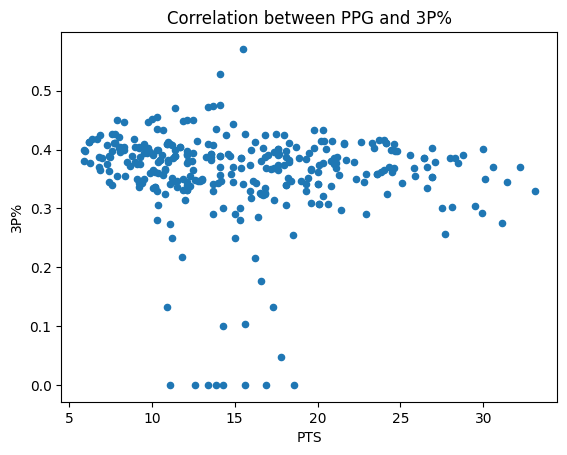

In [132]:
ppg_3pt_corr = nba_controlled_df["PTS"].corr(nba_controlled_df["3P%"])
print("The correlation between  PPG and 3P percentage is: " + str(ppg_3pt_corr))
nba_controlled_df.plot.scatter(x = "PTS", y="3P%")
plt.title("Correlation between PPG and 3P%")

As seen here, suprisingly enough, the correlation between 3P% and points per game much lower than expected. I had predicted that the correlation between a good 3P% and PPG would be higher than 0.5 to almost 0.75, although this would make sense because there are players in this dataset who do not shoot even a three per game, lowing the correlation. Another factor could be that the players who dont score many points in NBA games tend to take higher percentage shots because they are not forced to make shots off the dribble like players who score 20+ ppg.

The correlation between PPG and 2P percentage is: 0.07890391482119867


Text(0.5, 1.0, 'Correlation between PPG and 2P%')

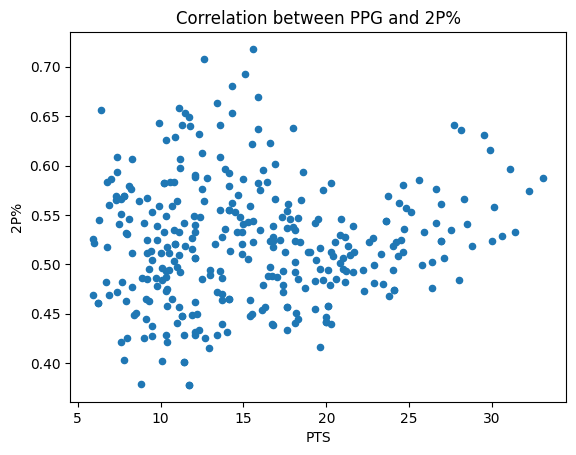

In [133]:
ppg_2pt_corr = nba_controlled_df["PTS"].corr(nba_controlled_df["2P%"])
print("The correlation between PPG and 2P percentage is: " + str(ppg_2pt_corr))
nba_controlled_df.plot.scatter(x = "PTS", y="2P%")
plt.title("Correlation between PPG and 2P%")

This correlation would make sense because it has a better controlled group than the 3pt shooters graph. Let's see how these correlations change when I completely isolate only 3pt and 2pt shooting, disregarding the 70% games played.

The correlation between PPG and an isolated 3P percentage is: -0.1410238307758961


Text(0.5, 1.0, 'Correlation between PPG and isolated 3P%')

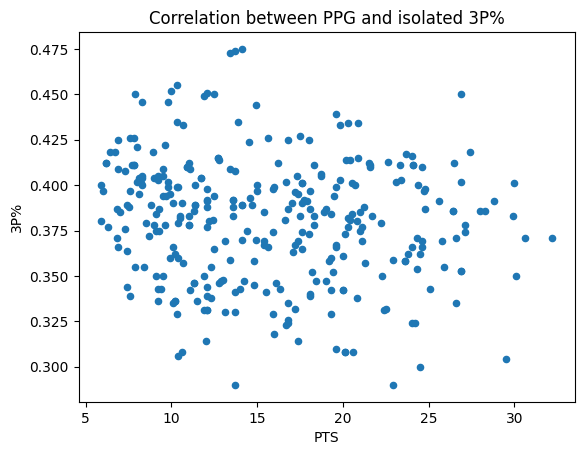

In [134]:
isolated_3pt_df = nba_combined_df[
    (nba_combined_df["3P Made"] >= 82)
]
isolated_3pt_corr = isolated_3pt_df["PTS"].corr(isolated_3pt_df["3P%"])
print("The correlation between PPG and an isolated 3P percentage is: " + str(isolated_3pt_corr))
isolated_3pt_df.plot.scatter(x = "PTS", y="3P%")
plt.title("Correlation between PPG and isolated 3P%")

The correlation between PPG and an isolated 2P percentage is: -0.2643875887985963


Text(0.5, 1.0, 'Correlation between PPG and isolated 2P%')

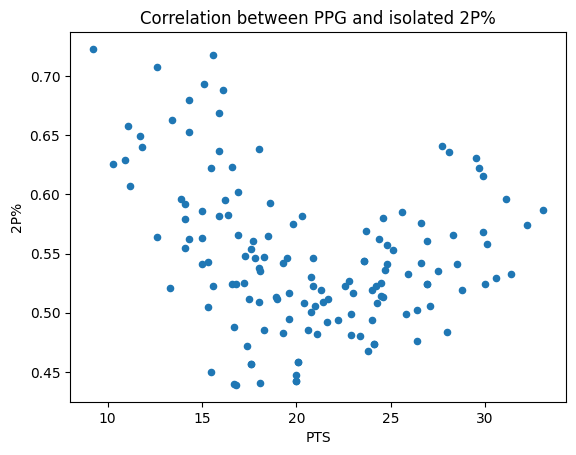

In [135]:
isolated_2pt_df = nba_combined_df[
    (nba_combined_df["2P Made"] >= 300)
]
isolated_2pt_corr = isolated_2pt_df["PTS"].corr(isolated_2pt_df["2P%"])
print("The correlation between PPG and an isolated 2P percentage is: " + str(isolated_2pt_corr))
isolated_2pt_df.plot.scatter(x = "PTS", y="2P%")
plt.title("Correlation between PPG and isolated 2P%")

Now this is truly exciting to look at because after we have isolated the data we see the 100% shooters, who were outliers, fade away. Now we are able to see the true residuals of 2P% and 3P% to PPG. Although this alone was exciting, I am now intrigued and want to find if there are other non-shooting statistics that relate to high level scoring. First, let us see the correlation between a complete FG% and PPG. We should expect to finally see a postive correlation as this percentage will be tracked using enough players and the correct league conditions.

The correlation between PPG and FG percentage is: 0.2017415325114344


Text(0.5, 1.0, 'Correlation between PPG and FG%')

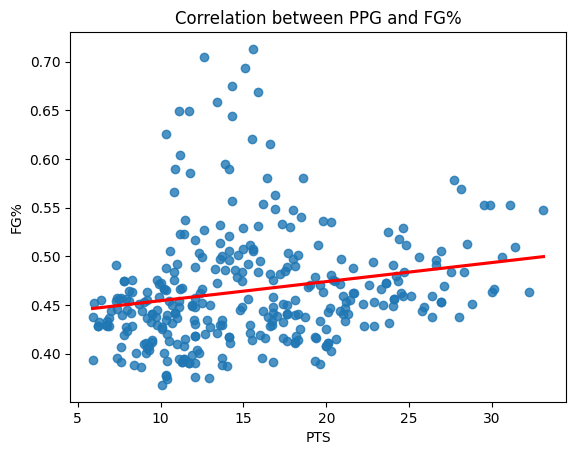

In [136]:
fg_corr = nba_controlled_df["PTS"].corr(nba_controlled_df["FG%"])
print("The correlation between PPG and FG percentage is: " + str(fg_corr))
sns.regplot(data=nba_controlled_df, x="PTS", y="FG%", ci=None, line_kws={'color':'red'})
plt.title("Correlation between PPG and FG%")


Now let us find the correlation between some non-offensive stats to prove or disprove our claim that 3P% and 2P% will have the highest correlations with ppg. We will now create a dataframe that ensures all players found will have played in at least 70% of games that season, then we will find and analyze the corelations between ppg and non shooting stats. I wonder if it is possible for there to be a better correlation, negative or positive, with non shooting statistics than direct shooting statistics such as 2P%, FG%, and 3P%. To find out if this is true, we will now plot linear regression graphs for multiple non shooting statistics and analyze their correlations to PPG.

The correlation between PPG and turnovers is: 0.839711711686923


Text(0.5, 1.0, 'Correlation between PPG and Turnovers')

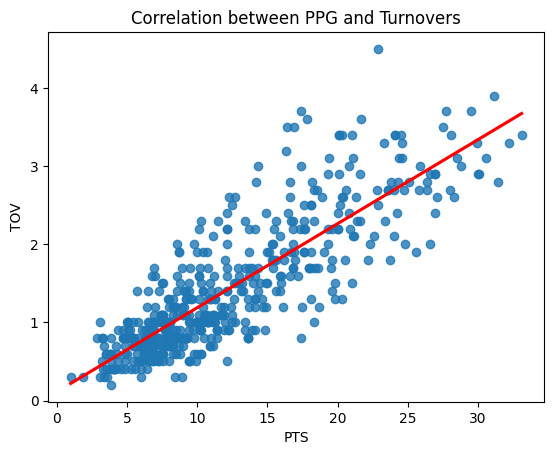

In [137]:
nba_controlled_other_df = nba_combined_df[(nba_combined_df["PCT G Played"] >= 0.7)]
turnover_corr = nba_controlled_other_df["PTS"].corr(nba_controlled_other_df["TOV"])
print("The correlation between PPG and turnovers is: " + str(turnover_corr))
sns.regplot(data=nba_controlled_other_df, x="PTS", y="TOV", ci=None, line_kws={'color':'red'})
plt.title("Correlation between PPG and Turnovers")


The correlation between PPG and asists is: 0.6454356860885105


Text(0.5, 1.0, 'Correlation between PPG and assists')

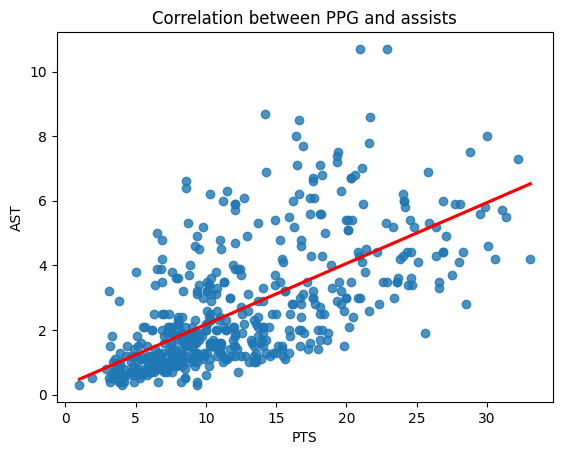

In [138]:
asisst_corr = nba_controlled_other_df["PTS"].corr(nba_controlled_other_df["AST"])
print("The correlation between PPG and asists is: " + str(asisst_corr))
sns.regplot(data=nba_controlled_other_df, x="PTS", y="AST", ci=None, line_kws={'color':'red'})
plt.title("Correlation between PPG and assists")

The correlation between PPG and steals is: 0.48381137215955783


Text(0.5, 1.0, 'Correlation between PPG and steals')

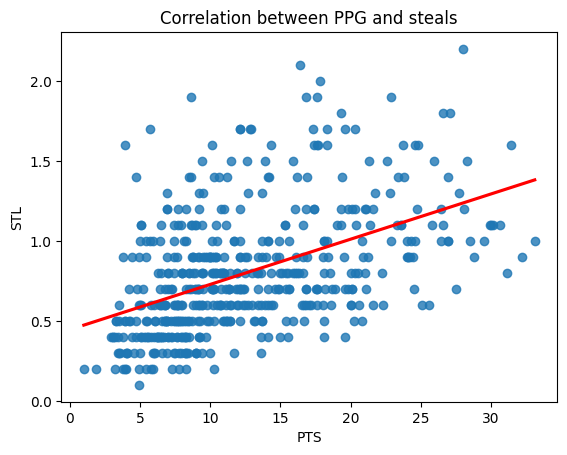

In [139]:
steal_corr = nba_controlled_other_df["PTS"].corr(nba_controlled_other_df["STL"])
print("The correlation between PPG and steals is: " + str(steal_corr))
sns.regplot(data=nba_controlled_other_df, x="PTS", y="STL", ci=None, line_kws={'color':'red'})
plt.title("Correlation between PPG and steals")

The correlation between PPG and player age is: 0.0752461200309862


Text(0.5, 1.0, 'Correlation between PPG and player age')

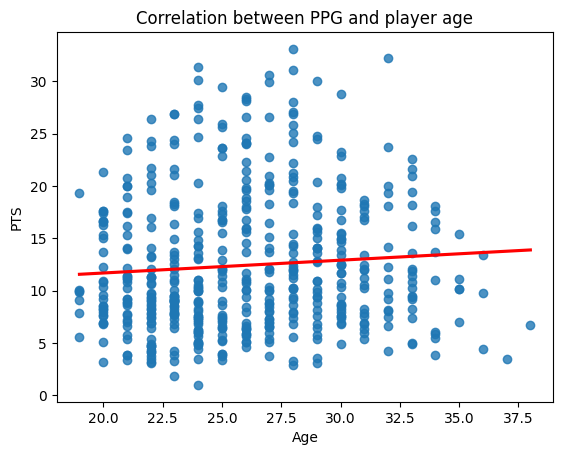

In [140]:
age_corr = nba_controlled_other_df["PTS"].corr(nba_controlled_other_df["Age"])
print("The correlation between PPG and player age is: " + str(age_corr))
sns.regplot(data=nba_controlled_other_df, x="Age", y="PTS", ci=None, line_kws={'color':'red'})
plt.title("Correlation between PPG and player age")

I have played and watched basketball for as long as I have been able to walk, yet did it ever cross my mind that steals, turnover, and assists would have a higher correlation with points per game than actual shooting percentages. This has made me realize how well professional star players and role players understand their job on the floor. To explain, role players normally score less points than star players, but will make up for it on the defensive end. In the same light, star players tend to play lighter defense because they carry such a heavy weight on the offensive end. I always knew this was the case; however, I would have never guessed to this degree. We have caculated over a 0.75 correlation between turnovers and ppg. This means that ppg has a higher strength with turnovers than field goal percentage.

After completing this project I am mostly happy with the fact that I chose to analyze what I did. It was a very enjoyable experience and overall improved my data analytic skills. I also feel that I have a greater knowledge for what is to come in the work life as a future data scientist and hopefully machine learner. I look forward to doing something like this again in the future and am glad I got to experience this now.